In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu
from suite3d import file_utils as flu

In [6]:
job_params = {    
    'notch_filt' :     None,
    'n_ch_tif' : 26,
    'convert_plane_ids_to_channel_ids' : False,
    
    'n_init_files' :   1,
    'init_file_pool' : None,
    'init_file_sample_method': 'random',
    
    'subtract_crosstalk' : True,
    'override_crosstalk' : 0.36,
    'crosstalk_n_planes' : 4, 
    
    'nonrigid' : True,
    'smooth_sigma' : 1.15,
    'maxregshift' : 0.15,
    'reg_filter_pcorr' : 1,
    'generate_sample_registered_bins' : False,

    'dtype' : n.float32,
    'tif_batch_size' : 1,
}



In [7]:
subjects_dir =   '/mnt/zortex-subjects/'
expt_info = { 
    'subject':         'AH012',
    'date' :          '2024-06-14',
    'expnum' :         [1,2,3,5],}

tifs, si_params, exp_str = flu.find_exp(subjects_dir, **expt_info, verbose=False)

job_params['fs'] = si_params['vol_rate']

savedir = os.path.join('/mnt/md0/runs', expt_info['subject'], expt_info['date'])
os.makedirs(savedir, exist_ok=True)

# Create the job
job = Job('/mnt/md0/runs',exp_str, tifs = tifs,
          params=job_params, create=True, overwrite=True, verbosity = 100)



Loading job directory for AH012_2024-06-14_1-2-3-5 in /mnt/md0/runs
      Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/registered_fused_data
      Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/summary
      Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/iters
   Loading default params
      Updating param notch_filt
      Updating param n_ch_tif
      Updating param convert_plane_ids_to_channel_ids
      Updating param n_init_files
      Updating param init_file_pool
      Updating param init_file_sample_method
      Updating param subtract_crosstalk
      Updating param override_crosstalk
      Updating param crosstalk_n_planes
      Updating param nonrigid
      Updating param smooth_sigma
      Updating param maxregshift
      Updating param reg_filter_pcorr
      Updating param generate_sample_registered_bins
      Updating param dtype
      Updating param tif_batch_size
      Updating param fs
   Updated main params file


   Saved a copy of params at /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/summary
   Updated main params file
Launching initial pass
Saving summary to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/summary/summary.npy
   Loading init tifs with 26 channels
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00005.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00002.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00001.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00009.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00008.tif
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00019.tif
   Loaded 6 files, total 12.87 GB
   Selecting 400 random frames from the init tif files
   Loaded movie with 400 frames and shape 16, 1000, 720
      Enforcing positivity in mean image
   Subtracti

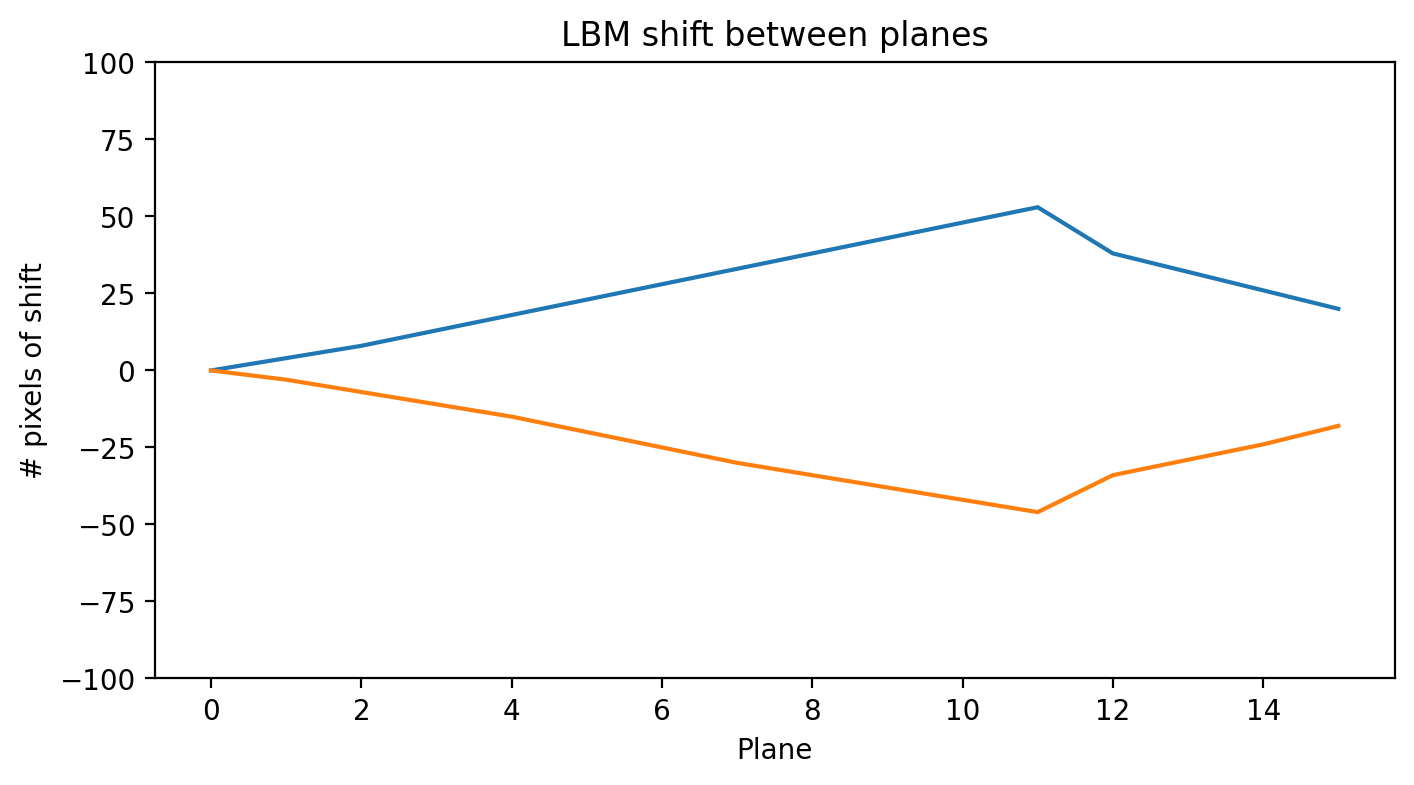

In [8]:
job.params['planes'] = n.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22,  1,  3,
         5,  7])
job.params['3d_reg'] = True
job.params['fuse_shift_override'] = 8
job.params['init_n_frames'] = 400
job.params['override_crosstalk'] = 0.36
job.params['cavity_size'] = 12
job.verbosity = 100
job.params['n_init_files'] = 6
job.run_init_pass()

In [9]:
summary = job.load_summary()

In [10]:
init_mov = n.load(summary['init_mov_path'])

In [11]:
from suite3d import quality_metrics

In [12]:
job.register_gpu_3d()

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/registered_fused_data
      Updating self.dirs tag registered_fused_data
   Overriding fuse shift value to 8
   Not clipping frames for registration
Will analyze 23 tifs in 23 batches
   Enforcing positivity
   Launching IO thread
               [Thread] Loading batch 0 

         Memory at batch 0.  Total Used: 190.671 GB, Virtual Available: 328.210 GB, Virtual Used: 174.985 GB, Swap Used: 015.686 GB
Loading Batch 0 of 22
                  [Thread] Before load 0 
Total Used: 190.671 GB, Virtual Available: 328.210 GB, Virtual Used: 174.985 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00001.tif


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 0 ready to join after 19.50 sec 

                  [Thread] After load 0 
Total Used: 192.829 GB, Virtual Available: 326.052 GB, Virtual Used: 177.143 GB, Swap Used: 015.686 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 192.829 GB, Virtual Available: 326.052 GB, Virtual Used: 177.143 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 194.978 GB, Virtual Available: 323.903 GB, Virtual Used: 179.293 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 192.836 GB, Virtual Available: 326.045 GB, Virtual Used: 177.150 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 1 

                  [Thread] Before load 1 
Total Used: 192.836 GB, Virtual Available: 326.045 GB, Virtual Used: 177.150 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 192.836 GB, Virtu

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 1 ready to join after 21.13 sec 

                  [Thread] After load 1 
Total Used: 202.202 GB, Virtual Available: 316.679 GB, Virtual Used: 186.517 GB, Swap Used: 015.686 GB
   Batch 1 IO thread joined
         Memory after IO thread joinTotal Used: 202.202 GB, Virtual Available: 316.679 GB, Virtual Used: 186.517 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.739 GB, Virtual Available: 319.142 GB, Virtual Used: 184.053 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.585 GB, Virtual Available: 321.295 GB, Virtual Used: 181.900 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 2 

         After IO thread launch:Total Used: 197.585 GB, Virtual Available: 321.295 GB, Virtual Used: 181.900 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 2 ready to join after 20.97 sec 

                  [Thread] After load 2 
Total Used: 202.249 GB, Virtual Available: 316.632 GB, Virtual Used: 186.564 GB, Swap Used: 015.686 GB
   Batch 2 IO thread joined
         Memory after IO thread joinTotal Used: 202.249 GB, Virtual Available: 316.632 GB, Virtual Used: 186.564 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.788 GB, Virtual Available: 319.093 GB, Virtual Used: 184.102 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.640 GB, Virtual Available: 321.240 GB, Virtual Used: 181.955 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 3 

         After IO thread launch:Total Used: 197.640 GB, Virtual Available: 321.240 GB, Virtual Used: 181.955 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 3 ready to join after 19.80 sec 

                  [Thread] After load 3 
Total Used: 202.278 GB, Virtual Available: 316.603 GB, Virtual Used: 186.592 GB, Swap Used: 015.686 GB
   Batch 3 IO thread joined
         Memory after IO thread joinTotal Used: 202.278 GB, Virtual Available: 316.603 GB, Virtual Used: 186.592 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.817 GB, Virtual Available: 319.064 GB, Virtual Used: 184.131 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.669 GB, Virtual Available: 321.212 GB, Virtual Used: 181.984 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 4 

         After IO thread launch:Total Used: 197.669 GB, Virtual Available: 321.212 GB, Virtual Used: 181.984 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 4 ready to join after 20.02 sec 

                  [Thread] After load 4 
Total Used: 202.308 GB, Virtual Available: 316.573 GB, Virtual Used: 186.622 GB, Swap Used: 015.686 GB
   Batch 4 IO thread joined
         Memory after IO thread joinTotal Used: 202.308 GB, Virtual Available: 316.573 GB, Virtual Used: 186.622 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.843 GB, Virtual Available: 319.038 GB, Virtual Used: 184.157 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.693 GB, Virtual Available: 321.188 GB, Virtual Used: 182.008 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 5 

         After IO thread launch:Total Used: 197.693 GB, Virtual Available: 321.188 GB, Virtual Used: 182.008 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 5 ready to join after 21.05 sec 

                  [Thread] After load 5 
Total Used: 202.272 GB, Virtual Available: 316.609 GB, Virtual Used: 186.587 GB, Swap Used: 015.686 GB
   Batch 5 IO thread joined
         Memory after IO thread joinTotal Used: 202.272 GB, Virtual Available: 316.609 GB, Virtual Used: 186.587 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.810 GB, Virtual Available: 319.070 GB, Virtual Used: 184.125 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.661 GB, Virtual Available: 321.220 GB, Virtual Used: 181.976 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 6 

         After IO thread launch:Total Used: 197.661 GB, Virtual Available: 321.220 GB, Virtual Used: 181.976 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 6 ready to join after 21.45 sec 

                  [Thread] After load 6 
Total Used: 202.286 GB, Virtual Available: 316.595 GB, Virtual Used: 186.601 GB, Swap Used: 015.686 GB
   Batch 6 IO thread joined
         Memory after IO thread joinTotal Used: 202.286 GB, Virtual Available: 316.595 GB, Virtual Used: 186.601 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.820 GB, Virtual Available: 319.060 GB, Virtual Used: 184.135 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.671 GB, Virtual Available: 321.209 GB, Virtual Used: 181.986 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 7 

         After IO thread launch:Total Used: 197.671 GB, Virtual Available: 321.209 GB, Virtual Used: 181.986 GB, Swap Used: 015.686 GB
                  [Thread] Before load 7 
Total Used: 197.671 GB, Virtu

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 7 ready to join after 19.92 sec 

                  [Thread] After load 7 
Total Used: 202.283 GB, Virtual Available: 316.598 GB, Virtual Used: 186.598 GB, Swap Used: 015.686 GB
   Batch 7 IO thread joined
         Memory after IO thread joinTotal Used: 202.283 GB, Virtual Available: 316.598 GB, Virtual Used: 186.598 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.822 GB, Virtual Available: 319.059 GB, Virtual Used: 184.136 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.668 GB, Virtual Available: 321.213 GB, Virtual Used: 181.983 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 8 

         After IO thread launch:Total Used: 197.668 GB, Virtual Available: 321.213 GB, Virtual Used: 181.983 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [Thre

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 8 ready to join after 20.18 sec 

                  [Thread] After load 8 
Total Used: 202.378 GB, Virtual Available: 316.503 GB, Virtual Used: 186.692 GB, Swap Used: 015.686 GB
   Batch 8 IO thread joined
         Memory after IO thread joinTotal Used: 202.378 GB, Virtual Available: 316.503 GB, Virtual Used: 186.692 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.915 GB, Virtual Available: 318.965 GB, Virtual Used: 184.230 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.759 GB, Virtual Available: 321.121 GB, Virtual Used: 182.074 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 9 

         After IO thread launch:Total Used: 197.759 GB, Virtual Available: 321.121 GB, Virtual Used: 182.074 GB, Swap Used: 015.686 GB
                  [Thread] Before load 9 
Total Used: 197.759 GB, Virtu

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 9 ready to join after 21.29 sec 

                  [Thread] After load 9 
Total Used: 202.271 GB, Virtual Available: 316.610 GB, Virtual Used: 186.586 GB, Swap Used: 015.686 GB
   Batch 9 IO thread joined
         Memory after IO thread joinTotal Used: 202.271 GB, Virtual Available: 316.610 GB, Virtual Used: 186.586 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.810 GB, Virtual Available: 319.071 GB, Virtual Used: 184.124 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.662 GB, Virtual Available: 321.218 GB, Virtual Used: 181.977 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 10 

                  [Thread] Before load 10 
Total Used: 197.662 GB, Virtual Available: 321.218 GB, Virtual Used: 181.977 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 197.662 GB, Vir

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 10 ready to join after 21.33 sec 

                  [Thread] After load 10 
Total Used: 202.268 GB, Virtual Available: 316.613 GB, Virtual Used: 186.583 GB, Swap Used: 015.686 GB
   Batch 10 IO thread joined
         Memory after IO thread joinTotal Used: 202.268 GB, Virtual Available: 316.613 GB, Virtual Used: 186.583 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.802 GB, Virtual Available: 319.079 GB, Virtual Used: 184.117 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.655 GB, Virtual Available: 321.226 GB, Virtual Used: 181.969 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 11 

         After IO thread launch:Total Used: 197.655 GB, Virtual Available: 321.226 GB, Virtual Used: 181.969 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 11 ready to join after 21.31 sec 

                  [Thread] After load 11 
Total Used: 202.288 GB, Virtual Available: 316.592 GB, Virtual Used: 186.603 GB, Swap Used: 015.686 GB
   Batch 11 IO thread joined
         Memory after IO thread joinTotal Used: 202.288 GB, Virtual Available: 316.592 GB, Virtual Used: 186.603 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.827 GB, Virtual Available: 319.054 GB, Virtual Used: 184.141 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.674 GB, Virtual Available: 321.207 GB, Virtual Used: 181.988 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 12 

         After IO thread launch:Total Used: 197.674 GB, Virtual Available: 321.207 GB, Virtual Used: 181.988 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

/home/ali/packages/s2p-lbm/suite3d/quality_metrics.py:41: RuntimeWarning: invalid value encountered in divide
  dff = df / fs.mean(axis=1,keepdims=True)
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


         After full batch saving:Total Used: 202.981 GB, Virtual Available: 315.900 GB, Virtual Used: 187.295 GB, Swap Used: 015.686 GB
         Memory at batch 12. Total Used: 202.981 GB, Virtual Available: 315.900 GB, Virtual Used: 187.296 GB, Swap Used: 015.686 GB
Loading Batch 12 of 22


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 12 ready to join after 21.14 sec 

                  [Thread] After load 12 
Total Used: 202.294 GB, Virtual Available: 316.587 GB, Virtual Used: 186.608 GB, Swap Used: 015.686 GB
   Batch 12 IO thread joined
         Memory after IO thread joinTotal Used: 202.294 GB, Virtual Available: 316.587 GB, Virtual Used: 186.608 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.831 GB, Virtual Available: 319.050 GB, Virtual Used: 184.145 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.678 GB, Virtual Available: 321.203 GB, Virtual Used: 181.992 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 13 

                  [Thread] Before load 13 
Total Used: 197.678 GB, Virtual Available: 321.203 GB, Virtual Used: 181.992 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 197.678 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 13 ready to join after 20.91 sec 

                  [Thread] After load 13 
Total Used: 202.218 GB, Virtual Available: 316.663 GB, Virtual Used: 186.532 GB, Swap Used: 015.686 GB
   Batch 13 IO thread joined
         Memory after IO thread joinTotal Used: 202.218 GB, Virtual Available: 316.663 GB, Virtual Used: 186.532 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.756 GB, Virtual Available: 319.124 GB, Virtual Used: 184.071 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.607 GB, Virtual Available: 321.274 GB, Virtual Used: 181.922 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 14 

                  [Thread] Before load 14 
Total Used: 197.607 GB, Virtual Available: 321.274 GB, Virtual Used: 181.922 GB, Swap Used: 015.686 GB
      Loading /mnt/zortex-subjects/AH012/2024-06-14/1/20

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 14 ready to join after 20.87 sec 

                  [Thread] After load 14 
Total Used: 202.278 GB, Virtual Available: 316.603 GB, Virtual Used: 186.593 GB, Swap Used: 015.686 GB
   Batch 14 IO thread joined
         Memory after IO thread joinTotal Used: 202.278 GB, Virtual Available: 316.603 GB, Virtual Used: 186.593 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.811 GB, Virtual Available: 319.070 GB, Virtual Used: 184.126 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.657 GB, Virtual Available: 321.223 GB, Virtual Used: 181.972 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 15 

                  [Thread] Before load 15 
Total Used: 197.657 GB, Virtual Available: 321.223 GB, Virtual Used: 181.972 GB, Swap Used: 015.686 GB
         After IO thread launch:Total Used: 197.657 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 15 ready to join after 20.73 sec 

                  [Thread] After load 15 
Total Used: 202.274 GB, Virtual Available: 316.607 GB, Virtual Used: 186.589 GB, Swap Used: 015.686 GB
   Batch 15 IO thread joined
         Memory after IO thread joinTotal Used: 202.274 GB, Virtual Available: 316.607 GB, Virtual Used: 186.589 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.804 GB, Virtual Available: 319.077 GB, Virtual Used: 184.118 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.654 GB, Virtual Available: 321.227 GB, Virtual Used: 181.969 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 16 

         After IO thread launch:Total Used: 197.654 GB, Virtual Available: 321.227 GB, Virtual Used: 181.969 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 16 ready to join after 20.87 sec 

                  [Thread] After load 16 
Total Used: 202.286 GB, Virtual Available: 316.595 GB, Virtual Used: 186.600 GB, Swap Used: 015.686 GB
   Batch 16 IO thread joined
         Memory after IO thread joinTotal Used: 202.286 GB, Virtual Available: 316.595 GB, Virtual Used: 186.600 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.821 GB, Virtual Available: 319.060 GB, Virtual Used: 184.135 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.670 GB, Virtual Available: 321.211 GB, Virtual Used: 181.984 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 17 

         After IO thread launch:Total Used: 197.670 GB, Virtual Available: 321.211 GB, Virtual Used: 181.984 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 17 ready to join after 21.24 sec 

                  [Thread] After load 17 
Total Used: 202.228 GB, Virtual Available: 316.653 GB, Virtual Used: 186.542 GB, Swap Used: 015.686 GB
   Batch 17 IO thread joined
         Memory after IO thread joinTotal Used: 202.228 GB, Virtual Available: 316.653 GB, Virtual Used: 186.542 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.765 GB, Virtual Available: 319.116 GB, Virtual Used: 184.079 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.611 GB, Virtual Available: 321.270 GB, Virtual Used: 181.926 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 18 

         After IO thread launch:Total Used: 197.611 GB, Virtual Available: 321.270 GB, Virtual Used: 181.926 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 18 ready to join after 21.93 sec 

                  [Thread] After load 18 
Total Used: 202.031 GB, Virtual Available: 316.850 GB, Virtual Used: 186.345 GB, Swap Used: 015.686 GB
   Batch 18 IO thread joined
         Memory after IO thread joinTotal Used: 202.031 GB, Virtual Available: 316.850 GB, Virtual Used: 186.345 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.560 GB, Virtual Available: 319.321 GB, Virtual Used: 183.874 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.409 GB, Virtual Available: 321.472 GB, Virtual Used: 181.723 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 19 

         After IO thread launch:Total Used: 197.409 GB, Virtual Available: 321.472 GB, Virtual Used: 181.723 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 19 ready to join after 21.32 sec 

                  [Thread] After load 19 
Total Used: 202.187 GB, Virtual Available: 316.694 GB, Virtual Used: 186.501 GB, Swap Used: 015.686 GB
   Batch 19 IO thread joined
         Memory after IO thread joinTotal Used: 202.187 GB, Virtual Available: 316.694 GB, Virtual Used: 186.501 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.724 GB, Virtual Available: 319.157 GB, Virtual Used: 184.039 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.571 GB, Virtual Available: 321.310 GB, Virtual Used: 181.885 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 20 

         After IO thread launch:Total Used: 197.571 GB, Virtual Available: 321.310 GB, Virtual Used: 181.885 GB, Swap Used: 015.686 GB
                  [Thread] Before load 20 
Total Used: 197.571 GB, 

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 20 ready to join after 20.74 sec 

                  [Thread] After load 20 
Total Used: 202.260 GB, Virtual Available: 316.620 GB, Virtual Used: 186.575 GB, Swap Used: 015.686 GB
   Batch 20 IO thread joined
         Memory after IO thread joinTotal Used: 202.260 GB, Virtual Available: 316.620 GB, Virtual Used: 186.575 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.799 GB, Virtual Available: 319.082 GB, Virtual Used: 184.113 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.652 GB, Virtual Available: 321.229 GB, Virtual Used: 181.966 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 21 

         After IO thread launch:Total Used: 197.652 GB, Virtual Available: 321.229 GB, Virtual Used: 181.966 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 21 ready to join after 20.54 sec 

                  [Thread] After load 21 
Total Used: 202.230 GB, Virtual Available: 316.651 GB, Virtual Used: 186.544 GB, Swap Used: 015.686 GB
   Batch 21 IO thread joined
         Memory after IO thread joinTotal Used: 202.230 GB, Virtual Available: 316.651 GB, Virtual Used: 186.544 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.807 GB, Virtual Available: 319.074 GB, Virtual Used: 184.121 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.638 GB, Virtual Available: 321.243 GB, Virtual Used: 181.953 GB, Swap Used: 015.686 GB
   Launching IO thread for next batch
               [Thread] Loading batch 22 

         After IO thread launch:Total Used: 197.641 GB, Virtual Available: 321.240 GB, Virtual Used: 181.956 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
                  [

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid st

   Loaded 1 files, total 2.15 GB
               [Thread] Thread for batch 22 ready to join after 20.76 sec 

                  [Thread] After load 22 
Total Used: 202.337 GB, Virtual Available: 316.544 GB, Virtual Used: 186.651 GB, Swap Used: 015.686 GB
   Batch 22 IO thread joined
         Memory after IO thread joinTotal Used: 202.337 GB, Virtual Available: 316.544 GB, Virtual Used: 186.651 GB, Swap Used: 015.686 GB
         Memory after movie copied from threadTotal Used: 199.870 GB, Virtual Available: 319.010 GB, Virtual Used: 184.185 GB, Swap Used: 015.686 GB
         Memory after thread memory clearedTotal Used: 197.717 GB, Virtual Available: 321.164 GB, Virtual Used: 182.031 GB, Swap Used: 015.686 GB
      Loaded batch of size (16, 100, 1000, 720)
   Completed rigid reg on batch in :6.070233345031738s
   Shifted the mov in: 1.3804409503936768s
         After all GPU Batches:Total Used: 204.799 GB, Virtual Available: 314.081 GB, Virtual Used: 189.114 GB, Swap Used: 015.686 GB
   

In [14]:
job.params['t_batch_size'] = 400
job.params['voxel_size_um'] = (15, 2.5, 2.5)
job.params['npil_filt_type'] = 'unif'
job.params['npil_filt_xy_um'] = 70
job.params['npil_filt_z_um'] = 15.0
job.params['cell_filt_type'] = 'unif'
job.params['cell_filt_xy_um'] = 10
job.params['cell_filt_z_um'] = 15.0
job.params['edge_crop_npix'] = 7
job.params['fix_vmap_edge_planes'] = True
job.params['sdnorm_exp'] = 0.85
job.params['intensity_thresh'] = 0.1
job.params['n_proc'] = 32
vmap = job.calculate_corr_map(iter_limit=None)

   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/corrmap with tag corrmap
      Updating self.dirs tag corrmap
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/mov_sub with tag mov_sub
      Updating self.dirs tag mov_sub
   Saved a copy of params at /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/corrmap
   Updated main params file
   Computing correlation map of movie with 2300 frames, volume shape: 16, 1053, 734
      Running batch 1 of 6
         Loading movie into shared memory
         Subtracting neuropil and applying cell filters
         Reducing filtered movie to compute correlation map
      Running batch 2 of 6
         Loading movie into shared memory
         Subtracting neuropil and applying cell filters
         Reducing filtered movie to compute correlation map
      Running batch 3 of 6
         Loading movie into shared memory
         Subtracting neuropil and applying cell filters
         Reducing filtered movie to compute correlation map
      Running

In [21]:
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 2.01

job.params['activity_thresh'] = 20.0
job.params['percentile'] = 99.5
job.params['extend_thresh'] = 0.2

In [22]:
job.segment_rois()

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation
      Updating self.dirs tag segmentation
   Saved a copy of params at /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation
   Updated main params file
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois
      Updating self.dirs tag rois
   Saving results to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation and /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois 
dict_keys(['max_img', 'mean_img', 'vmap', 'all_params'])
   Detecting from patch 1 / 88
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0000
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 13, 043, 040, peak: 6.394, thresh: 20.000, 140 frames, 35 pixels
         Added cell 2

         Added cell 81 at 12, 087, 031, peak: 2.468, thresh: 10.346, 28 frames, 22 pixels
         Added cell 82 at 13, 076, 054, peak: 2.455, thresh: 8.396, 81 frames, 34 pixels
         Added cell 83 at 03, 086, 097, peak: 2.437, thresh: 8.530, 36 frames, 24 pixels
         Added cell 84 at 14, 081, 074, peak: 2.431, thresh: 9.861, 21 frames, 21 pixels
         Added cell 85 at 10, 071, 078, peak: 2.414, thresh: 9.049, 73 frames, 57 pixels
         Added cell 86 at 15, 070, 068, peak: 2.413, thresh: 8.809, 68 frames, 33 pixels
         Added cell 87 at 09, 061, 043, peak: 2.402, thresh: 10.159, 47 frames, 89 pixels
         Added cell 88 at 04, 071, 079, peak: 2.400, thresh: 8.314, 49 frames, 85 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 13, 045, 054, peak: 2.397, thresh: 12.386, 22 frames, 27 pixels
         Added cell 90 at 07, 096, 025, peak: 2.396, thresh: 8.294, 85 frames, 61 pixels
         Added cell 91 at 04, 071, 059, peak: 2.393, thresh

         Added cell 173 at 06, 092, 060, peak: 2.181, thresh: 7.753, 16 frames, 19 pixels
         Added cell 174 at 02, 049, 062, peak: 2.180, thresh: 7.627, 37 frames, 15 pixels
         Added cell 175 at 01, 063, 085, peak: 2.180, thresh: 8.254, 14 frames, 22 pixels
         Added cell 176 at 13, 074, 044, peak: 2.176, thresh: 7.132, 21 frames, 16 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 13, 077, 034, peak: 2.191, thresh: 9.738, 26 frames, 28 pixels
         Added cell 178 at 13, 052, 065, peak: 2.176, thresh: 8.315, 19 frames, 12 pixels
         Added cell 179 at 13, 043, 049, peak: 2.176, thresh: 8.303, 20 frames, 22 pixels
         Added cell 180 at 05, 092, 036, peak: 2.176, thresh: 9.249, 19 frames, 24 pixels
         Added cell 181 at 13, 083, 075, peak: 2.175, thresh: 8.011, 28 frames, 25 pixels
         Added cell 182 at 09, 090, 039, peak: 2.175, thresh: 8.519, 28 frames, 38 pixels
         Added cell 183 at 03, 029, 093, peak: 2.174

         Added cell 265 at 10, 075, 015, peak: 2.093, thresh: 7.705, 20 frames, 9 pixels
         Added cell 266 at 13, 069, 080, peak: 2.093, thresh: 7.844, 16 frames, 16 pixels
         Added cell 267 at 13, 043, 057, peak: 2.093, thresh: 7.628, 18 frames, 23 pixels
         Added cell 268 at 05, 034, 064, peak: 2.092, thresh: 7.963, 16 frames, 17 pixels
         Added cell 269 at 13, 081, 028, peak: 2.092, thresh: 7.773, 76 frames, 23 pixels
         Added cell 270 at 04, 027, 069, peak: 2.091, thresh: 7.757, 20 frames, 10 pixels
         Added cell 271 at 07, 090, 065, peak: 2.091, thresh: 7.346, 19 frames, 26 pixels
         Added cell 272 at 10, 064, 065, peak: 2.091, thresh: 8.124, 22 frames, 43 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 04, 075, 079, peak: 2.089, thresh: 7.926, 19 frames, 14 pixels
         Added cell 274 at 12, 070, 057, peak: 2.089, thresh: 8.392, 16 frames, 22 pixels
         Added cell 275 at 07, 045, 085, peak: 2.088,

         Added cell 374 at 05, 069, 049, peak: 2.053, thresh: 8.078, 12 frames, 14 pixels
         Added cell 375 at 13, 050, 030, peak: 2.053, thresh: 7.409, 27 frames, 20 pixels
         Added cell 376 at 02, 057, 056, peak: 2.053, thresh: 7.553, 20 frames, 22 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 02, 104, 059, peak: 2.052, thresh: 7.967, 26 frames, 13 pixels
         Added cell 378 at 05, 064, 090, peak: 2.052, thresh: 7.979, 15 frames, 16 pixels
         Added cell 379 at 11, 084, 029, peak: 2.052, thresh: 8.319, 16 frames, 18 pixels
         Added cell 380 at 01, 081, 060, peak: 2.051, thresh: 8.548, 20 frames, 21 pixels
         Added cell 381 at 14, 087, 040, peak: 2.050, thresh: 7.845, 20 frames, 13 pixels
         Added cell 382 at 04, 098, 045, peak: 2.050, thresh: 8.257, 14 frames, 14 pixels
         Added cell 383 at 06, 086, 069, peak: 2.050, thresh: 7.817, 17 frames, 14 pixels
         Added cell 384 at 03, 038, 078, peak: 2.049

         Added cell 473 at 04, 073, 098, peak: 2.035, thresh: 7.888, 21 frames, 14 pixels
         Added cell 474 at 08, 047, 054, peak: 2.035, thresh: 7.727, 21 frames, 11 pixels
         Added cell 475 at 05, 038, 044, peak: 2.035, thresh: 7.711, 18 frames, 12 pixels
         Added cell 476 at 02, 080, 072, peak: 2.034, thresh: 7.934, 16 frames, 14 pixels
         Added cell 477 at 12, 071, 082, peak: 2.034, thresh: 7.961, 31 frames, 23 pixels
         Added cell 478 at 13, 054, 090, peak: 2.034, thresh: 8.660, 17 frames, 21 pixels
         Added cell 479 at 15, 091, 046, peak: 2.034, thresh: 8.249, 18 frames, 8 pixels
         Added cell 480 at 12, 076, 025, peak: 2.034, thresh: 8.040, 18 frames, 12 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 10, 094, 053, peak: 2.034, thresh: 7.788, 24 frames, 16 pixels
         Added cell 482 at 15, 041, 060, peak: 2.034, thresh: 8.007, 23 frames, 8 pixels
         Added cell 483 at 02, 072, 081, peak: 2.033, 

         Added cell 577 at 07, 076, 054, peak: 2.023, thresh: 7.623, 13 frames, 17 pixels
         Added cell 578 at 07, 090, 084, peak: 2.023, thresh: 7.932, 16 frames, 13 pixels
         Added cell 579 at 06, 077, 036, peak: 2.023, thresh: 8.199, 13 frames, 16 pixels
         Added cell 580 at 02, 043, 073, peak: 2.023, thresh: 7.782, 14 frames, 16 pixels
         Added cell 581 at 07, 049, 027, peak: 2.023, thresh: 8.166, 11 frames, 22 pixels
         Added cell 582 at 07, 067, 071, peak: 2.023, thresh: 8.409, 19 frames, 11 pixels
         Added cell 583 at 07, 063, 077, peak: 2.023, thresh: 8.001, 18 frames, 15 pixels
         Added cell 584 at 05, 041, 040, peak: 2.022, thresh: 7.998, 15 frames, 11 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 12, 099, 023, peak: 2.022, thresh: 8.367, 17 frames, 11 pixels
         Added cell 586 at 01, 054, 067, peak: 2.022, thresh: 7.772, 17 frames, 15 pixels
         Added cell 587 at 05, 045, 084, peak: 2.022

         Added cell 681 at 05, 053, 074, peak: 2.013, thresh: 8.006, 14 frames, 13 pixels
         Added cell 682 at 05, 057, 081, peak: 2.013, thresh: 7.866, 20 frames, 18 pixels
         Added cell 683 at 02, 051, 080, peak: 2.013, thresh: 7.354, 24 frames, 17 pixels
         Added cell 684 at 14, 044, 076, peak: 2.013, thresh: 8.575, 18 frames, 9 pixels
         Added cell 685 at 04, 028, 064, peak: 2.013, thresh: 7.995, 14 frames, 11 pixels
         Added cell 686 at 09, 074, 021, peak: 2.013, thresh: 7.919, 23 frames, 17 pixels
         Added cell 687 at 06, 068, 097, peak: 2.013, thresh: 8.022, 17 frames, 14 pixels
         Added cell 688 at 06, 098, 072, peak: 2.013, thresh: 7.236, 22 frames, 20 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 04, 043, 049, peak: 2.013, thresh: 6.979, 26 frames, 19 pixels
         Added cell 690 at 05, 060, 043, peak: 2.013, thresh: 7.999, 13 frames, 16 pixels
         Added cell 691 at 08, 052, 081, peak: 2.013,

         Added cell 51 at 10, 081, 174, peak: 2.409, thresh: 9.664, 63 frames, 79 pixels
         Added cell 52 at 13, 087, 182, peak: 2.394, thresh: 9.976, 22 frames, 19 pixels
         Added cell 53 at 05, 105, 160, peak: 2.392, thresh: 8.742, 43 frames, 44 pixels
         Added cell 54 at 06, 037, 108, peak: 2.390, thresh: 9.342, 40 frames, 70 pixels
         Added cell 55 at 12, 104, 153, peak: 2.383, thresh: 8.982, 45 frames, 27 pixels
         Added cell 56 at 03, 049, 153, peak: 2.381, thresh: 9.884, 41 frames, 101 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 14, 036, 156, peak: 2.381, thresh: 10.363, 17 frames, 31 pixels
         Added cell 58 at 15, 034, 148, peak: 2.372, thresh: 8.713, 62 frames, 27 pixels
         Added cell 59 at 12, 101, 146, peak: 2.348, thresh: 8.549, 33 frames, 36 pixels
         Added cell 60 at 14, 095, 164, peak: 2.343, thresh: 8.634, 23 frames, 24 pixels
         Added cell 61 at 02, 072, 178, peak: 2.341, thresh:

         Added cell 145 at 13, 042, 188, peak: 2.104, thresh: 8.553, 14 frames, 8 pixels
         Added cell 146 at 11, 078, 146, peak: 2.104, thresh: 8.730, 14 frames, 19 pixels
         Added cell 147 at 14, 071, 119, peak: 2.102, thresh: 8.104, 25 frames, 13 pixels
         Added cell 148 at 03, 105, 143, peak: 2.101, thresh: 7.707, 55 frames, 67 pixels
         Added cell 149 at 14, 102, 154, peak: 2.100, thresh: 8.073, 23 frames, 23 pixels
         Added cell 150 at 05, 035, 172, peak: 2.099, thresh: 8.839, 10 frames, 13 pixels
         Added cell 151 at 14, 042, 114, peak: 2.097, thresh: 9.688, 14 frames, 10 pixels
         Added cell 152 at 04, 092, 112, peak: 2.095, thresh: 8.327, 20 frames, 13 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 13, 100, 157, peak: 2.094, thresh: 7.354, 21 frames, 11 pixels
         Added cell 154 at 10, 092, 173, peak: 2.093, thresh: 8.456, 21 frames, 15 pixels
         Added cell 155 at 12, 104, 182, peak: 2.093,

         Added cell 238 at 12, 095, 174, peak: 2.043, thresh: 8.567, 11 frames, 24 pixels
         Added cell 239 at 13, 072, 151, peak: 2.043, thresh: 7.919, 16 frames, 18 pixels
         Added cell 240 at 06, 093, 172, peak: 2.043, thresh: 7.439, 26 frames, 18 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 03, 086, 184, peak: 2.044, thresh: 7.355, 28 frames, 10 pixels
         Added cell 242 at 13, 081, 130, peak: 2.043, thresh: 7.966, 18 frames, 12 pixels
         Added cell 243 at 14, 097, 106, peak: 2.043, thresh: 7.898, 22 frames, 14 pixels
         Added cell 244 at 13, 100, 141, peak: 2.043, thresh: 8.232, 15 frames, 15 pixels
         Added cell 245 at 13, 099, 162, peak: 2.042, thresh: 8.159, 21 frames, 16 pixels
         Added cell 246 at 07, 043, 107, peak: 2.042, thresh: 8.046, 17 frames, 10 pixels
         Added cell 247 at 12, 078, 150, peak: 2.042, thresh: 8.355, 12 frames, 23 pixels
         Added cell 248 at 05, 078, 189, peak: 2.040

         Added cell 345 at 06, 098, 187, peak: 2.014, thresh: 7.924, 17 frames, 13 pixels
         Added cell 346 at 04, 064, 189, peak: 2.014, thresh: 8.007, 16 frames, 11 pixels
         Added cell 347 at 10, 061, 157, peak: 2.014, thresh: 9.038, 20 frames, 9 pixels
         Added cell 348 at 03, 081, 160, peak: 2.014, thresh: 7.281, 23 frames, 14 pixels
         Added cell 349 at 07, 104, 157, peak: 2.014, thresh: 7.543, 24 frames, 13 pixels
         Added cell 350 at 05, 087, 169, peak: 2.014, thresh: 7.625, 18 frames, 14 pixels
         Added cell 351 at 00, 090, 181, peak: 2.014, thresh: 7.786, 24 frames, 9 pixels
         Added cell 352 at 03, 033, 113, peak: 2.014, thresh: 8.209, 17 frames, 14 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 13, 068, 183, peak: 2.014, thresh: 7.414, 32 frames, 14 pixels
         Added cell 354 at 06, 078, 161, peak: 2.014, thresh: 8.652, 9 frames, 18 pixels
         Added cell 355 at 02, 099, 162, peak: 2.014, t

         Added cell 49 at 12, 080, 197, peak: 2.164, thresh: 9.650, 16 frames, 17 pixels
         Added cell 50 at 06, 096, 225, peak: 2.162, thresh: 9.099, 14 frames, 77 pixels
         Added cell 51 at 13, 051, 272, peak: 2.156, thresh: 9.839, 33 frames, 6 pixels
         Added cell 52 at 12, 099, 207, peak: 2.147, thresh: 8.680, 28 frames, 11 pixels
         Added cell 53 at 12, 097, 216, peak: 2.146, thresh: 10.414, 17 frames, 11 pixels
         Added cell 54 at 05, 051, 235, peak: 2.140, thresh: 8.519, 18 frames, 16 pixels
         Added cell 55 at 13, 063, 194, peak: 2.139, thresh: 7.998, 21 frames, 11 pixels
         Added cell 56 at 04, 078, 209, peak: 2.137, thresh: 7.503, 19 frames, 24 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 13, 067, 198, peak: 2.135, thresh: 8.544, 25 frames, 41 pixels
         Added cell 58 at 06, 079, 195, peak: 2.130, thresh: 8.514, 20 frames, 15 pixels
         Added cell 59 at 12, 065, 209, peak: 2.128, thresh: 7

         Added cell 145 at 03, 073, 213, peak: 2.041, thresh: 7.687, 18 frames, 13 pixels
         Added cell 146 at 04, 105, 228, peak: 2.041, thresh: 8.387, 13 frames, 15 pixels
         Added cell 147 at 13, 064, 192, peak: 2.040, thresh: 8.343, 22 frames, 11 pixels
         Added cell 148 at 04, 078, 204, peak: 2.040, thresh: 7.445, 23 frames, 30 pixels
         Added cell 149 at 01, 094, 224, peak: 2.040, thresh: 7.868, 20 frames, 23 pixels
         Added cell 150 at 13, 052, 274, peak: 2.039, thresh: 8.313, 32 frames, 7 pixels
         Added cell 151 at 03, 096, 244, peak: 2.039, thresh: 7.726, 24 frames, 10 pixels
         Added cell 152 at 08, 069, 191, peak: 2.036, thresh: 7.968, 16 frames, 17 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 04, 077, 200, peak: 2.036, thresh: 8.031, 17 frames, 13 pixels
         Added cell 154 at 07, 088, 226, peak: 2.036, thresh: 7.847, 20 frames, 26 pixels
         Added cell 155 at 06, 047, 231, peak: 2.036,

         Added cell 247 at 00, 099, 233, peak: 2.012, thresh: 7.412, 28 frames, 10 pixels
         Added cell 248 at 13, 079, 198, peak: 2.012, thresh: 7.755, 18 frames, 9 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 07, 105, 226, peak: 2.011, thresh: 7.377, 23 frames, 9 pixels
         Added cell 250 at 06, 100, 207, peak: 2.011, thresh: 7.769, 20 frames, 26 pixels
         Added cell 251 at 05, 053, 233, peak: 2.011, thresh: 7.916, 15 frames, 19 pixels
         Added cell 252 at 07, 074, 209, peak: 2.011, thresh: 7.882, 18 frames, 16 pixels
         Added cell 253 at 09, 076, 213, peak: 2.011, thresh: 7.862, 27 frames, 5 pixels
         Added cell 254 at 03, 099, 194, peak: 2.011, thresh: 7.448, 18 frames, 15 pixels
         Added cell 255 at 06, 097, 215, peak: 2.011, thresh: 7.450, 25 frames, 9 pixels
         Added cell 256 at 04, 094, 220, peak: 2.011, thresh: 7.722, 18 frames, 49 pixels
         Iter 0032: running 03 ROIs in parallel
        

         Added cell 81 at 13, 074, 328, peak: 2.573, thresh: 12.006, 25 frames, 33 pixels
         Added cell 82 at 13, 085, 326, peak: 2.561, thresh: 11.498, 19 frames, 23 pixels
         Added cell 83 at 14, 105, 365, peak: 2.561, thresh: 10.298, 28 frames, 23 pixels
         Added cell 84 at 03, 075, 365, peak: 2.558, thresh: 8.260, 90 frames, 60 pixels
         Added cell 85 at 15, 029, 357, peak: 2.545, thresh: 10.629, 29 frames, 17 pixels
         Added cell 86 at 05, 048, 324, peak: 2.540, thresh: 9.144, 35 frames, 67 pixels
         Added cell 87 at 15, 038, 357, peak: 2.512, thresh: 11.934, 18 frames, 31 pixels
         Added cell 88 at 06, 083, 361, peak: 2.505, thresh: 8.147, 50 frames, 50 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 06, 054, 327, peak: 2.497, thresh: 10.659, 49 frames, 64 pixels
         Added cell 90 at 12, 073, 339, peak: 2.496, thresh: 10.093, 30 frames, 17 pixels
         Added cell 91 at 12, 065, 293, peak: 2.496, th

         Added cell 193 at 12, 081, 346, peak: 2.150, thresh: 7.955, 22 frames, 17 pixels
         Added cell 194 at 05, 073, 351, peak: 2.150, thresh: 8.005, 28 frames, 33 pixels
         Added cell 195 at 04, 079, 359, peak: 2.148, thresh: 8.567, 29 frames, 47 pixels
         Added cell 196 at 08, 082, 356, peak: 2.145, thresh: 8.010, 18 frames, 38 pixels
         Added cell 197 at 10, 099, 362, peak: 2.143, thresh: 8.477, 28 frames, 26 pixels
         Added cell 198 at 13, 054, 289, peak: 2.142, thresh: 9.095, 19 frames, 15 pixels
         Added cell 199 at 14, 055, 299, peak: 2.135, thresh: 8.656, 15 frames, 20 pixels
         Added cell 200 at 03, 093, 344, peak: 2.134, thresh: 7.821, 28 frames, 28 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 13, 064, 280, peak: 2.133, thresh: 8.374, 27 frames, 29 pixels
         Added cell 202 at 09, 089, 352, peak: 2.133, thresh: 8.241, 23 frames, 12 pixels
         Added cell 203 at 13, 052, 326, peak: 2.133

         Added cell 289 at 15, 059, 313, peak: 2.060, thresh: 8.083, 17 frames, 24 pixels
         Added cell 290 at 13, 077, 365, peak: 2.060, thresh: 7.569, 14 frames, 15 pixels
         Added cell 291 at 15, 049, 334, peak: 2.060, thresh: 7.411, 26 frames, 7 pixels
         Added cell 292 at 14, 069, 319, peak: 2.059, thresh: 8.302, 66 frames, 22 pixels
         Added cell 293 at 14, 105, 334, peak: 2.059, thresh: 8.967, 22 frames, 8 pixels
         Added cell 294 at 03, 053, 342, peak: 2.059, thresh: 7.933, 14 frames, 14 pixels
         Added cell 295 at 14, 055, 330, peak: 2.059, thresh: 8.339, 61 frames, 60 pixels
         Added cell 296 at 14, 052, 352, peak: 2.058, thresh: 8.459, 56 frames, 39 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 14, 063, 314, peak: 2.059, thresh: 7.644, 29 frames, 17 pixels
         Added cell 298 at 14, 102, 347, peak: 2.058, thresh: 8.198, 18 frames, 17 pixels
         Added cell 299 at 13, 067, 320, peak: 2.058, 

         Added cell 388 at 04, 072, 349, peak: 2.024, thresh: 7.901, 17 frames, 22 pixels
         Added cell 389 at 02, 101, 362, peak: 2.023, thresh: 7.456, 109 frames, 40 pixels
         Added cell 390 at 13, 059, 298, peak: 2.023, thresh: 8.943, 16 frames, 6 pixels
         Added cell 391 at 06, 069, 364, peak: 2.023, thresh: 8.108, 18 frames, 12 pixels
         Added cell 392 at 14, 043, 304, peak: 2.023, thresh: 8.229, 18 frames, 16 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 13, 064, 282, peak: 2.022, thresh: 8.832, 37 frames, 4 pixels
         Added cell 394 at 14, 100, 362, peak: 2.022, thresh: 7.442, 27 frames, 26 pixels
         Added cell 395 at 13, 041, 339, peak: 2.022, thresh: 7.600, 20 frames, 19 pixels
         Added cell 396 at 05, 085, 345, peak: 2.022, thresh: 7.917, 59 frames, 64 pixels
         Added cell 397 at 15, 030, 340, peak: 2.022, thresh: 8.151, 13 frames, 10 pixels
         Added cell 398 at 05, 051, 324, peak: 2.022,

         Added cell 33 at 02, 099, 366, peak: 4.071, thresh: 12.720, 164 frames, 61 pixels
         Added cell 34 at 15, 095, 448, peak: 4.035, thresh: 17.401, 47 frames, 39 pixels
         Added cell 35 at 14, 068, 366, peak: 4.005, thresh: 18.212, 39 frames, 29 pixels
         Added cell 36 at 13, 097, 372, peak: 3.966, thresh: 13.763, 56 frames, 36 pixels
         Added cell 37 at 12, 104, 404, peak: 3.946, thresh: 17.074, 64 frames, 57 pixels
         Added cell 38 at 13, 046, 367, peak: 3.913, thresh: 14.976, 63 frames, 36 pixels
         Added cell 39 at 10, 086, 452, peak: 3.873, thresh: 15.825, 130 frames, 90 pixels
         Added cell 40 at 04, 098, 414, peak: 3.865, thresh: 16.848, 66 frames, 117 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 09, 097, 396, peak: 3.815, thresh: 13.775, 115 frames, 108 pixels
         Added cell 42 at 09, 080, 439, peak: 3.812, thresh: 14.870, 83 frames, 118 pixels
         Added cell 43 at 12, 076, 379, peak: 

         Added cell 121 at 07, 094, 432, peak: 2.644, thresh: 9.690, 48 frames, 62 pixels
         Added cell 122 at 04, 083, 424, peak: 2.639, thresh: 8.517, 95 frames, 65 pixels
         Added cell 123 at 13, 047, 442, peak: 2.637, thresh: 12.087, 60 frames, 30 pixels
         Added cell 124 at 14, 089, 444, peak: 2.626, thresh: 11.251, 23 frames, 37 pixels
         Added cell 125 at 14, 093, 378, peak: 2.625, thresh: 10.348, 24 frames, 22 pixels
         Added cell 126 at 09, 092, 431, peak: 2.621, thresh: 10.074, 56 frames, 113 pixels
         Added cell 127 at 05, 102, 404, peak: 2.608, thresh: 8.814, 56 frames, 77 pixels
         Added cell 128 at 02, 104, 390, peak: 2.608, thresh: 8.097, 102 frames, 45 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 14, 048, 409, peak: 2.602, thresh: 9.859, 25 frames, 24 pixels
         Added cell 130 at 07, 078, 451, peak: 2.597, thresh: 8.110, 19 frames, 25 pixels
         Added cell 131 at 15, 033, 366, peak:

         Added cell 209 at 15, 076, 407, peak: 2.327, thresh: 8.475, 36 frames, 32 pixels
         Added cell 210 at 15, 096, 433, peak: 2.325, thresh: 9.623, 27 frames, 18 pixels
         Added cell 211 at 15, 082, 393, peak: 2.324, thresh: 8.680, 31 frames, 17 pixels
         Added cell 212 at 00, 092, 396, peak: 2.323, thresh: 9.426, 17 frames, 26 pixels
         Added cell 213 at 14, 089, 401, peak: 2.321, thresh: 8.593, 28 frames, 22 pixels
         Added cell 214 at 02, 102, 392, peak: 2.319, thresh: 7.673, 19 frames, 11 pixels
         Added cell 215 at 02, 103, 385, peak: 2.317, thresh: 8.776, 185 frames, 61 pixels
         Added cell 216 at 14, 076, 452, peak: 2.316, thresh: 8.500, 21 frames, 28 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 15, 050, 378, peak: 2.315, thresh: 9.368, 22 frames, 29 pixels
         Added cell 218 at 15, 095, 370, peak: 2.312, thresh: 9.659, 28 frames, 27 pixels
         Added cell 219 at 01, 027, 372, peak: 2.31

         Added cell 305 at 15, 083, 441, peak: 2.179, thresh: 7.833, 26 frames, 24 pixels
         Added cell 306 at 13, 074, 451, peak: 2.176, thresh: 8.080, 36 frames, 47 pixels
         Added cell 307 at 12, 097, 400, peak: 2.175, thresh: 8.148, 18 frames, 18 pixels
         Added cell 308 at 12, 097, 366, peak: 2.174, thresh: 7.289, 17 frames, 23 pixels
         Added cell 309 at 12, 104, 421, peak: 2.174, thresh: 7.147, 26 frames, 10 pixels
         Added cell 310 at 13, 084, 423, peak: 2.169, thresh: 8.582, 15 frames, 30 pixels
         Added cell 311 at 07, 080, 426, peak: 2.169, thresh: 8.890, 28 frames, 104 pixels
         Added cell 312 at 08, 070, 410, peak: 2.167, thresh: 7.914, 27 frames, 29 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 14, 082, 443, peak: 2.171, thresh: 7.804, 15 frames, 15 pixels
         Added cell 314 at 13, 105, 453, peak: 2.167, thresh: 7.423, 216 frames, 106 pixels
         Added cell 315 at 12, 092, 428, peak: 2.

         Added cell 413 at 03, 084, 422, peak: 2.099, thresh: 7.148, 25 frames, 33 pixels
         Added cell 414 at 15, 056, 434, peak: 2.098, thresh: 7.750, 32 frames, 11 pixels
         Added cell 415 at 14, 100, 405, peak: 2.098, thresh: 7.754, 24 frames, 12 pixels
         Added cell 416 at 05, 088, 392, peak: 2.098, thresh: 7.697, 25 frames, 27 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 07, 063, 385, peak: 2.098, thresh: 8.031, 13 frames, 16 pixels
         Added cell 418 at 04, 094, 452, peak: 2.096, thresh: 7.491, 25 frames, 28 pixels
         Added cell 419 at 12, 077, 410, peak: 2.096, thresh: 8.120, 17 frames, 12 pixels
         Added cell 420 at 13, 054, 441, peak: 2.096, thresh: 7.389, 28 frames, 8 pixels
         Added cell 421 at 15, 036, 403, peak: 2.095, thresh: 8.695, 17 frames, 15 pixels
         Added cell 422 at 13, 081, 440, peak: 2.094, thresh: 8.158, 15 frames, 24 pixels
         Added cell 423 at 08, 055, 420, peak: 2.093,

         Added cell 505 at 06, 057, 367, peak: 2.069, thresh: 7.744, 19 frames, 56 pixels
         Added cell 506 at 15, 082, 451, peak: 2.069, thresh: 7.894, 16 frames, 18 pixels
         Added cell 507 at 12, 069, 424, peak: 2.068, thresh: 8.687, 11 frames, 24 pixels
         Added cell 508 at 02, 072, 413, peak: 2.068, thresh: 7.376, 19 frames, 9 pixels
         Added cell 509 at 07, 103, 429, peak: 2.068, thresh: 7.609, 19 frames, 19 pixels
         Added cell 510 at 06, 095, 434, peak: 2.068, thresh: 7.679, 20 frames, 26 pixels
         Added cell 511 at 15, 078, 388, peak: 2.068, thresh: 8.088, 15 frames, 21 pixels
         Added cell 512 at 13, 054, 397, peak: 2.068, thresh: 8.370, 13 frames, 25 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 02, 088, 381, peak: 2.068, thresh: 7.878, 16 frames, 12 pixels
         Added cell 514 at 05, 102, 445, peak: 2.068, thresh: 7.894, 13 frames, 16 pixels
         Added cell 515 at 08, 061, 384, peak: 2.067,

         Added cell 601 at 00, 085, 414, peak: 2.050, thresh: 8.209, 17 frames, 10 pixels
         Added cell 602 at 08, 102, 443, peak: 2.050, thresh: 7.553, 23 frames, 9 pixels
         Added cell 603 at 05, 083, 443, peak: 2.050, thresh: 7.440, 21 frames, 18 pixels
         Added cell 604 at 12, 101, 426, peak: 2.050, thresh: 7.939, 18 frames, 18 pixels
         Added cell 605 at 15, 056, 445, peak: 2.050, thresh: 7.675, 22 frames, 9 pixels
         Added cell 606 at 13, 059, 380, peak: 2.049, thresh: 7.781, 19 frames, 18 pixels
         Added cell 607 at 02, 064, 404, peak: 2.049, thresh: 8.094, 18 frames, 20 pixels
         Added cell 608 at 03, 070, 453, peak: 2.049, thresh: 7.088, 26 frames, 14 pixels
         Iter 0076: running 08 ROIs in parallel
         Added cell 609 at 07, 060, 370, peak: 2.049, thresh: 8.037, 16 frames, 12 pixels
         Added cell 610 at 13, 093, 369, peak: 2.049, thresh: 7.824, 16 frames, 21 pixels
         Added cell 611 at 04, 040, 417, peak: 2.049, 

         Added cell 705 at 06, 050, 411, peak: 2.036, thresh: 7.833, 20 frames, 29 pixels
         Added cell 706 at 15, 093, 413, peak: 2.036, thresh: 8.630, 14 frames, 15 pixels
         Added cell 707 at 03, 040, 445, peak: 2.036, thresh: 7.605, 19 frames, 12 pixels
         Added cell 708 at 06, 073, 383, peak: 2.035, thresh: 7.583, 12 frames, 11 pixels
         Added cell 709 at 01, 091, 438, peak: 2.035, thresh: 8.085, 18 frames, 16 pixels
         Added cell 710 at 14, 070, 429, peak: 2.035, thresh: 7.983, 18 frames, 20 pixels
         Added cell 711 at 04, 091, 444, peak: 2.035, thresh: 7.657, 19 frames, 20 pixels
         Added cell 712 at 08, 069, 446, peak: 2.035, thresh: 7.293, 19 frames, 11 pixels
         Iter 0089: running 08 ROIs in parallel
         Added cell 713 at 07, 093, 443, peak: 2.035, thresh: 7.877, 20 frames, 9 pixels
         Added cell 714 at 13, 101, 407, peak: 2.035, thresh: 8.137, 115 frames, 47 pixels
         Added cell 715 at 01, 077, 395, peak: 2.035

         Added cell 801 at 14, 092, 444, peak: 2.026, thresh: 7.564, 22 frames, 15 pixels
         Added cell 802 at 08, 069, 403, peak: 2.026, thresh: 8.028, 20 frames, 12 pixels
         Added cell 803 at 14, 075, 400, peak: 2.026, thresh: 7.988, 22 frames, 12 pixels
         Added cell 804 at 05, 093, 398, peak: 2.026, thresh: 7.434, 16 frames, 25 pixels
         Added cell 805 at 03, 025, 366, peak: 2.026, thresh: 7.870, 31 frames, 19 pixels
         Added cell 806 at 07, 066, 436, peak: 2.026, thresh: 7.800, 17 frames, 22 pixels
         Added cell 807 at 02, 085, 451, peak: 2.026, thresh: 7.714, 19 frames, 20 pixels
         Added cell 808 at 08, 048, 440, peak: 2.026, thresh: 8.126, 16 frames, 27 pixels
         Iter 0101: running 08 ROIs in parallel
         Added cell 809 at 03, 053, 392, peak: 2.026, thresh: 7.738, 22 frames, 14 pixels
         Added cell 810 at 04, 085, 399, peak: 2.026, thresh: 8.054, 17 frames, 13 pixels
         Added cell 811 at 04, 085, 425, peak: 2.026

         Added cell 897 at 02, 092, 420, peak: 2.019, thresh: 7.746, 20 frames, 32 pixels
         Added cell 898 at 14, 091, 424, peak: 2.018, thresh: 7.768, 17 frames, 24 pixels
         Added cell 899 at 02, 094, 375, peak: 2.018, thresh: 7.347, 26 frames, 12 pixels
         Added cell 900 at 13, 061, 376, peak: 2.018, thresh: 7.745, 26 frames, 44 pixels
         Added cell 901 at 09, 073, 433, peak: 2.018, thresh: 8.287, 15 frames, 19 pixels
         Added cell 902 at 04, 079, 443, peak: 2.018, thresh: 7.410, 22 frames, 11 pixels
         Added cell 903 at 03, 066, 405, peak: 2.018, thresh: 7.613, 18 frames, 34 pixels
         Added cell 904 at 13, 070, 453, peak: 2.018, thresh: 7.885, 15 frames, 62 pixels
         Iter 0113: running 08 ROIs in parallel
         Added cell 905 at 02, 082, 436, peak: 2.018, thresh: 7.851, 13 frames, 13 pixels
         Added cell 906 at 00, 069, 447, peak: 2.018, thresh: 7.994, 26 frames, 7 pixels
         Added cell 907 at 13, 052, 435, peak: 2.018,

         Added cell 993 at 01, 090, 384, peak: 2.013, thresh: 7.825, 21 frames, 7 pixels
         Added cell 994 at 02, 088, 409, peak: 2.013, thresh: 7.472, 19 frames, 14 pixels
         Added cell 995 at 05, 044, 452, peak: 2.013, thresh: 7.594, 23 frames, 13 pixels
         Added cell 996 at 03, 061, 392, peak: 2.013, thresh: 7.713, 15 frames, 15 pixels
         Added cell 997 at 02, 096, 409, peak: 2.012, thresh: 7.301, 22 frames, 31 pixels
         Added cell 998 at 02, 070, 424, peak: 2.012, thresh: 8.039, 16 frames, 15 pixels
         Added cell 999 at 04, 092, 405, peak: 2.012, thresh: 7.959, 18 frames, 21 pixels
         Added cell 1000 at 06, 085, 437, peak: 2.012, thresh: 8.472, 17 frames, 12 pixels
         Iter 0125: running 08 ROIs in parallel
         Added cell 1001 at 07, 053, 453, peak: 2.012, thresh: 7.256, 26 frames, 12 pixels
         Added cell 1002 at 08, 079, 373, peak: 2.012, thresh: 7.837, 29 frames, 8 pixels
         Added cell 1003 at 08, 066, 425, peak: 2.0

         Added cell 37 at 09, 070, 460, peak: 3.394, thresh: 13.291, 107 frames, 129 pixels
         Added cell 38 at 06, 064, 513, peak: 3.365, thresh: 14.211, 46 frames, 59 pixels
         Added cell 39 at 15, 087, 527, peak: 3.323, thresh: 12.105, 67 frames, 36 pixels
         Added cell 40 at 15, 051, 469, peak: 3.305, thresh: 17.040, 28 frames, 31 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 13, 043, 472, peak: 3.288, thresh: 13.731, 72 frames, 127 pixels
         Added cell 42 at 13, 065, 519, peak: 3.278, thresh: 14.032, 39 frames, 35 pixels
         Added cell 43 at 14, 035, 484, peak: 3.262, thresh: 13.744, 48 frames, 29 pixels
         Added cell 44 at 10, 085, 454, peak: 3.234, thresh: 10.802, 179 frames, 84 pixels
         Added cell 45 at 10, 095, 515, peak: 3.155, thresh: 9.675, 158 frames, 53 pixels
         Added cell 46 at 15, 073, 507, peak: 3.141, thresh: 17.083, 19 frames, 26 pixels
         Added cell 47 at 15, 095, 519, peak: 3.

         Added cell 145 at 15, 105, 535, peak: 2.304, thresh: 10.734, 95 frames, 32 pixels
         Added cell 146 at 08, 068, 486, peak: 2.301, thresh: 8.765, 38 frames, 90 pixels
         Added cell 147 at 15, 051, 458, peak: 2.301, thresh: 9.782, 20 frames, 50 pixels
         Added cell 148 at 13, 073, 485, peak: 2.298, thresh: 8.406, 21 frames, 40 pixels
         Added cell 149 at 15, 032, 460, peak: 2.296, thresh: 9.687, 24 frames, 22 pixels
         Added cell 150 at 14, 037, 484, peak: 2.286, thresh: 7.860, 27 frames, 7 pixels
         Added cell 151 at 05, 040, 496, peak: 2.286, thresh: 10.043, 170 frames, 63 pixels
         Added cell 152 at 12, 104, 479, peak: 2.280, thresh: 8.833, 27 frames, 42 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 07, 098, 459, peak: 2.280, thresh: 8.263, 20 frames, 42 pixels
         Added cell 154 at 15, 050, 473, peak: 2.277, thresh: 8.714, 26 frames, 10 pixels
         Added cell 155 at 01, 100, 535, peak: 2.2

         Added cell 257 at 12, 098, 509, peak: 2.130, thresh: 8.189, 24 frames, 11 pixels
         Added cell 258 at 05, 064, 455, peak: 2.129, thresh: 7.773, 13 frames, 13 pixels
         Added cell 259 at 02, 027, 465, peak: 2.127, thresh: 8.551, 15 frames, 11 pixels
         Added cell 260 at 02, 073, 507, peak: 2.126, thresh: 8.275, 77 frames, 60 pixels
         Added cell 261 at 13, 073, 469, peak: 2.125, thresh: 7.947, 20 frames, 15 pixels
         Added cell 262 at 13, 078, 473, peak: 2.125, thresh: 8.121, 15 frames, 11 pixels
         Added cell 263 at 05, 103, 520, peak: 2.125, thresh: 7.570, 22 frames, 12 pixels
         Added cell 264 at 07, 087, 525, peak: 2.122, thresh: 8.129, 25 frames, 13 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 05, 091, 458, peak: 2.122, thresh: 7.726, 23 frames, 32 pixels
         Added cell 266 at 07, 086, 455, peak: 2.122, thresh: 7.940, 21 frames, 39 pixels
         Added cell 267 at 04, 105, 539, peak: 2.121

         Added cell 353 at 15, 079, 495, peak: 2.072, thresh: 7.477, 20 frames, 11 pixels
         Added cell 354 at 06, 095, 486, peak: 2.071, thresh: 6.889, 31 frames, 13 pixels
         Added cell 355 at 05, 105, 531, peak: 2.071, thresh: 7.192, 24 frames, 39 pixels
         Added cell 356 at 05, 066, 517, peak: 2.071, thresh: 7.773, 20 frames, 15 pixels
         Added cell 357 at 14, 102, 511, peak: 2.070, thresh: 7.874, 14 frames, 15 pixels
         Added cell 358 at 05, 084, 513, peak: 2.070, thresh: 8.361, 17 frames, 18 pixels
         Added cell 359 at 05, 103, 517, peak: 2.069, thresh: 7.054, 30 frames, 11 pixels
         Added cell 360 at 08, 094, 507, peak: 2.069, thresh: 7.598, 26 frames, 17 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 06, 102, 529, peak: 2.070, thresh: 7.631, 25 frames, 25 pixels
         Added cell 362 at 02, 025, 466, peak: 2.069, thresh: 7.958, 21 frames, 10 pixels
         Added cell 363 at 05, 095, 490, peak: 2.069

         Added cell 449 at 12, 069, 470, peak: 2.048, thresh: 8.033, 20 frames, 22 pixels
         Added cell 450 at 13, 098, 470, peak: 2.048, thresh: 7.299, 25 frames, 31 pixels
         Added cell 451 at 07, 072, 478, peak: 2.048, thresh: 8.543, 14 frames, 10 pixels
         Added cell 452 at 07, 096, 506, peak: 2.048, thresh: 8.212, 15 frames, 27 pixels
         Added cell 453 at 03, 094, 526, peak: 2.047, thresh: 7.624, 27 frames, 14 pixels
         Added cell 454 at 12, 066, 503, peak: 2.047, thresh: 8.542, 17 frames, 11 pixels
         Added cell 455 at 12, 087, 517, peak: 2.047, thresh: 8.041, 20 frames, 10 pixels
         Added cell 456 at 02, 087, 463, peak: 2.046, thresh: 8.214, 19 frames, 37 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 14, 105, 513, peak: 2.046, thresh: 7.661, 33 frames, 29 pixels
         Added cell 458 at 03, 059, 468, peak: 2.046, thresh: 7.803, 15 frames, 18 pixels
         Added cell 459 at 10, 086, 511, peak: 2.046

         Added cell 551 at 07, 047, 525, peak: 2.033, thresh: 7.749, 19 frames, 13 pixels
         Added cell 552 at 00, 103, 507, peak: 2.032, thresh: 8.393, 11 frames, 19 pixels
         Iter 0069: running 08 ROIs in parallel
         Added cell 553 at 14, 038, 482, peak: 2.032, thresh: 8.488, 12 frames, 14 pixels
         Added cell 554 at 07, 082, 458, peak: 2.032, thresh: 8.391, 16 frames, 9 pixels
         Added cell 555 at 02, 105, 454, peak: 2.032, thresh: 7.527, 21 frames, 16 pixels
         Added cell 556 at 06, 066, 491, peak: 2.032, thresh: 7.605, 19 frames, 19 pixels
         Added cell 557 at 05, 099, 517, peak: 2.032, thresh: 7.738, 20 frames, 76 pixels
         Added cell 558 at 05, 089, 462, peak: 2.032, thresh: 7.511, 19 frames, 41 pixels
         Added cell 559 at 15, 103, 459, peak: 2.032, thresh: 7.870, 17 frames, 8 pixels
         Added cell 560 at 15, 079, 463, peak: 2.031, thresh: 8.463, 21 frames, 17 pixels
         Iter 0070: running 08 ROIs in parallel
      

         Added cell 649 at 04, 071, 525, peak: 2.021, thresh: 7.993, 17 frames, 14 pixels
         Added cell 650 at 03, 090, 487, peak: 2.021, thresh: 7.664, 23 frames, 41 pixels
         Added cell 651 at 03, 084, 476, peak: 2.021, thresh: 8.321, 13 frames, 16 pixels
         Added cell 652 at 04, 037, 483, peak: 2.021, thresh: 8.068, 11 frames, 10 pixels
         Added cell 653 at 06, 100, 522, peak: 2.021, thresh: 8.177, 23 frames, 10 pixels
         Added cell 654 at 04, 093, 509, peak: 2.020, thresh: 7.529, 19 frames, 16 pixels
         Added cell 655 at 05, 103, 479, peak: 2.020, thresh: 7.207, 22 frames, 31 pixels
         Added cell 656 at 03, 078, 459, peak: 2.020, thresh: 7.806, 19 frames, 22 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 04, 085, 490, peak: 2.021, thresh: 7.844, 17 frames, 12 pixels
         Added cell 658 at 06, 090, 513, peak: 2.020, thresh: 7.999, 19 frames, 12 pixels
         Added cell 659 at 02, 086, 517, peak: 2.020

         Added cell 745 at 08, 105, 485, peak: 2.012, thresh: 7.854, 22 frames, 21 pixels
         Added cell 746 at 02, 081, 454, peak: 2.012, thresh: 7.563, 23 frames, 38 pixels
         Added cell 747 at 05, 103, 460, peak: 2.012, thresh: 7.932, 19 frames, 19 pixels
         Added cell 748 at 06, 052, 465, peak: 2.012, thresh: 8.037, 14 frames, 10 pixels
         Added cell 749 at 13, 100, 493, peak: 2.012, thresh: 7.755, 19 frames, 17 pixels
         Added cell 750 at 04, 091, 516, peak: 2.012, thresh: 7.572, 21 frames, 11 pixels
         Added cell 751 at 03, 083, 510, peak: 2.012, thresh: 7.324, 23 frames, 19 pixels
         Added cell 752 at 06, 058, 541, peak: 2.012, thresh: 7.717, 19 frames, 11 pixels
         Iter 0094: running 08 ROIs in parallel
         Added cell 753 at 07, 096, 496, peak: 2.012, thresh: 8.440, 12 frames, 15 pixels
         Added cell 754 at 08, 088, 502, peak: 2.012, thresh: 7.814, 26 frames, 9 pixels
         Added cell 755 at 05, 069, 492, peak: 2.012,

         Added cell 53 at 07, 094, 548, peak: 2.589, thresh: 12.585, 28 frames, 145 pixels
         Added cell 54 at 14, 073, 580, peak: 2.580, thresh: 12.382, 60 frames, 37 pixels
         Added cell 55 at 13, 088, 629, peak: 2.577, thresh: 11.833, 44 frames, 54 pixels
         Added cell 56 at 15, 053, 595, peak: 2.550, thresh: 8.422, 57 frames, 13 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 06, 090, 544, peak: 2.584, thresh: 9.101, 60 frames, 43 pixels
         Added cell 58 at 14, 044, 623, peak: 2.539, thresh: 9.094, 32 frames, 12 pixels
         Added cell 59 at 11, 071, 612, peak: 2.522, thresh: 10.589, 43 frames, 40 pixels
         Added cell 60 at 14, 066, 597, peak: 2.514, thresh: 9.057, 16 frames, 18 pixels
         Added cell 61 at 05, 055, 543, peak: 2.513, thresh: 10.911, 36 frames, 50 pixels
         Added cell 62 at 13, 052, 557, peak: 2.508, thresh: 10.707, 19 frames, 26 pixels
         Added cell 63 at 07, 084, 574, peak: 2.499, th

         Added cell 153 at 14, 073, 578, peak: 2.133, thresh: 8.458, 18 frames, 26 pixels
         Added cell 154 at 03, 049, 608, peak: 2.133, thresh: 8.918, 14 frames, 16 pixels
         Added cell 155 at 12, 082, 588, peak: 2.130, thresh: 8.675, 14 frames, 20 pixels
         Added cell 156 at 04, 085, 576, peak: 2.129, thresh: 8.384, 10 frames, 14 pixels
         Added cell 157 at 15, 041, 552, peak: 2.127, thresh: 8.743, 20 frames, 30 pixels
         Added cell 158 at 14, 090, 551, peak: 2.127, thresh: 8.241, 22 frames, 9 pixels
         Added cell 159 at 05, 089, 592, peak: 2.127, thresh: 8.693, 25 frames, 75 pixels
         Added cell 160 at 03, 064, 607, peak: 2.125, thresh: 8.226, 28 frames, 14 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 15, 104, 587, peak: 2.124, thresh: 8.631, 24 frames, 21 pixels
         Added cell 162 at 13, 100, 567, peak: 2.122, thresh: 8.483, 19 frames, 9 pixels
         Added cell 163 at 06, 083, 615, peak: 2.121, 

         Added cell 257 at 06, 098, 571, peak: 2.053, thresh: 7.094, 19 frames, 14 pixels
         Added cell 258 at 04, 100, 569, peak: 2.052, thresh: 7.387, 24 frames, 16 pixels
         Added cell 259 at 01, 092, 589, peak: 2.051, thresh: 7.845, 22 frames, 15 pixels
         Added cell 260 at 07, 068, 620, peak: 2.051, thresh: 8.160, 15 frames, 18 pixels
         Added cell 261 at 05, 093, 617, peak: 2.051, thresh: 7.498, 20 frames, 11 pixels
         Added cell 262 at 01, 084, 600, peak: 2.051, thresh: 7.774, 17 frames, 12 pixels
         Added cell 263 at 05, 080, 607, peak: 2.051, thresh: 7.365, 27 frames, 29 pixels
         Added cell 264 at 12, 053, 579, peak: 2.051, thresh: 8.529, 16 frames, 17 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 10, 063, 583, peak: 2.050, thresh: 8.315, 18 frames, 20 pixels
         Added cell 266 at 10, 105, 574, peak: 2.050, thresh: 7.681, 34 frames, 37 pixels
         Added cell 267 at 05, 100, 600, peak: 2.048

         Added cell 353 at 07, 081, 572, peak: 2.027, thresh: 7.914, 16 frames, 12 pixels
         Added cell 354 at 10, 103, 563, peak: 2.027, thresh: 8.170, 20 frames, 16 pixels
         Added cell 355 at 10, 085, 608, peak: 2.027, thresh: 8.539, 21 frames, 13 pixels
         Added cell 356 at 06, 047, 610, peak: 2.027, thresh: 7.354, 23 frames, 18 pixels
         Added cell 357 at 04, 053, 616, peak: 2.026, thresh: 7.631, 21 frames, 19 pixels
         Added cell 358 at 06, 083, 561, peak: 2.026, thresh: 8.357, 13 frames, 16 pixels
         Added cell 359 at 05, 062, 593, peak: 2.026, thresh: 7.600, 17 frames, 13 pixels
         Added cell 360 at 13, 096, 566, peak: 2.025, thresh: 7.807, 14 frames, 19 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 04, 076, 588, peak: 2.025, thresh: 7.795, 25 frames, 17 pixels
         Added cell 362 at 04, 092, 624, peak: 2.025, thresh: 7.841, 19 frames, 20 pixels
         Added cell 363 at 10, 099, 562, peak: 2.025

         Added cell 465 at 04, 096, 587, peak: 2.013, thresh: 8.009, 14 frames, 8 pixels
         Added cell 466 at 04, 105, 628, peak: 2.013, thresh: 7.509, 19 frames, 37 pixels
         Added cell 467 at 14, 073, 575, peak: 2.013, thresh: 8.185, 16 frames, 15 pixels
         Added cell 468 at 02, 105, 554, peak: 2.013, thresh: 8.213, 15 frames, 20 pixels
         Added cell 469 at 15, 043, 557, peak: 2.013, thresh: 9.085, 15 frames, 7 pixels
         Added cell 470 at 05, 104, 619, peak: 2.013, thresh: 7.608, 14 frames, 25 pixels
         Added cell 471 at 12, 073, 572, peak: 2.013, thresh: 7.857, 18 frames, 10 pixels
         Added cell 472 at 13, 044, 624, peak: 2.013, thresh: 8.267, 19 frames, 11 pixels
         Iter 0059: running 08 ROIs in parallel
         Added cell 473 at 03, 072, 611, peak: 2.013, thresh: 7.717, 15 frames, 21 pixels
         Added cell 474 at 06, 065, 609, peak: 2.013, thresh: 7.525, 19 frames, 23 pixels
         Added cell 475 at 02, 088, 625, peak: 2.013, 

         Added cell 49 at 07, 069, 643, peak: 2.447, thresh: 9.147, 53 frames, 57 pixels
         Added cell 50 at 14, 089, 692, peak: 2.439, thresh: 11.189, 35 frames, 52 pixels
         Added cell 51 at 12, 067, 650, peak: 2.433, thresh: 10.463, 27 frames, 31 pixels
         Added cell 52 at 04, 035, 660, peak: 2.407, thresh: 8.495, 25 frames, 33 pixels
         Added cell 53 at 03, 034, 649, peak: 2.392, thresh: 9.120, 29 frames, 31 pixels
         Added cell 54 at 03, 078, 658, peak: 2.391, thresh: 8.069, 24 frames, 16 pixels
         Added cell 55 at 02, 026, 656, peak: 2.350, thresh: 10.277, 22 frames, 55 pixels
         Added cell 56 at 04, 028, 679, peak: 2.331, thresh: 8.657, 28 frames, 49 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 12, 062, 653, peak: 2.425, thresh: 9.329, 42 frames, 19 pixels
         Added cell 58 at 13, 053, 648, peak: 2.325, thresh: 10.182, 23 frames, 45 pixels
         Added cell 59 at 02, 077, 633, peak: 2.323, thres

         Added cell 145 at 13, 074, 633, peak: 2.067, thresh: 7.715, 35 frames, 33 pixels
         Added cell 146 at 03, 047, 671, peak: 2.063, thresh: 7.964, 22 frames, 12 pixels
         Added cell 147 at 15, 031, 662, peak: 2.063, thresh: 8.159, 19 frames, 10 pixels
         Added cell 148 at 07, 046, 649, peak: 2.063, thresh: 7.901, 22 frames, 21 pixels
         Added cell 149 at 14, 052, 640, peak: 2.062, thresh: 7.676, 20 frames, 23 pixels
         Added cell 150 at 04, 098, 660, peak: 2.062, thresh: 7.629, 25 frames, 20 pixels
         Added cell 151 at 13, 043, 638, peak: 2.060, thresh: 7.511, 20 frames, 11 pixels
         Added cell 152 at 08, 081, 631, peak: 2.059, thresh: 7.719, 14 frames, 11 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 03, 042, 670, peak: 2.059, thresh: 8.772, 15 frames, 5 pixels
         Added cell 154 at 09, 086, 661, peak: 2.059, thresh: 8.826, 78 frames, 57 pixels
         Added cell 155 at 05, 032, 630, peak: 2.059,

         Added cell 249 at 06, 064, 681, peak: 2.027, thresh: 8.396, 18 frames, 16 pixels
         Added cell 250 at 08, 101, 658, peak: 2.027, thresh: 7.376, 27 frames, 9 pixels
         Added cell 251 at 05, 045, 656, peak: 2.026, thresh: 7.809, 22 frames, 11 pixels
         Added cell 252 at 14, 093, 698, peak: 2.026, thresh: 7.706, 27 frames, 9 pixels
         Added cell 253 at 05, 045, 686, peak: 2.026, thresh: 8.327, 18 frames, 11 pixels
         Added cell 254 at 06, 044, 665, peak: 2.026, thresh: 8.516, 20 frames, 18 pixels
         Added cell 255 at 06, 037, 642, peak: 2.026, thresh: 7.700, 20 frames, 10 pixels
         Added cell 256 at 02, 023, 656, peak: 2.026, thresh: 8.339, 20 frames, 38 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 05, 054, 648, peak: 2.025, thresh: 8.011, 20 frames, 10 pixels
         Added cell 258 at 01, 083, 632, peak: 2.025, thresh: 8.089, 14 frames, 11 pixels
         Added cell 259 at 03, 104, 660, peak: 2.025, 

         Added cell 369 at 03, 056, 641, peak: 2.010, thresh: 7.788, 19 frames, 16 pixels
      Iter 0047: peak is too small  - ending extraction
   Found 369 cells in 47 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0007/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0007/iscell.npy
   Detecting from patch 9 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0008 with tag segmentation-patch-0008
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 03, 122, 049, peak: 6.500, thresh: 20.000, 218 frames, 80 pixels
         Added cell 2 at 13, 171, 043, peak: 5.802, thresh: 18.346, 101 frames, 37 pixels
         Added cell 3 at 03, 13

         Added cell 89 at 12, 137, 025, peak: 2.491, thresh: 10.032, 21 frames, 17 pixels
         Added cell 90 at 05, 130, 045, peak: 2.490, thresh: 7.605, 71 frames, 41 pixels
         Added cell 91 at 09, 192, 054, peak: 2.481, thresh: 7.080, 24 frames, 20 pixels
         Added cell 92 at 13, 156, 051, peak: 2.472, thresh: 9.874, 64 frames, 30 pixels
         Added cell 93 at 11, 153, 055, peak: 2.471, thresh: 9.677, 29 frames, 26 pixels
         Added cell 94 at 06, 193, 086, peak: 2.469, thresh: 11.474, 79 frames, 74 pixels
         Added cell 95 at 08, 126, 065, peak: 2.465, thresh: 10.224, 31 frames, 37 pixels
         Added cell 96 at 05, 174, 041, peak: 2.463, thresh: 7.792, 93 frames, 70 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 09, 134, 020, peak: 2.458, thresh: 9.209, 57 frames, 66 pixels
         Added cell 98 at 10, 168, 072, peak: 2.452, thresh: 10.696, 41 frames, 42 pixels
         Added cell 99 at 11, 156, 011, peak: 2.451, thres

         Added cell 179 at 05, 152, 062, peak: 2.184, thresh: 9.749, 141 frames, 136 pixels
         Added cell 180 at 03, 198, 099, peak: 2.184, thresh: 8.931, 69 frames, 61 pixels
         Added cell 181 at 08, 158, 062, peak: 2.182, thresh: 7.792, 16 frames, 28 pixels
         Added cell 182 at 07, 124, 067, peak: 2.182, thresh: 8.318, 27 frames, 22 pixels
         Added cell 183 at 07, 164, 038, peak: 2.179, thresh: 7.694, 23 frames, 34 pixels
         Added cell 184 at 14, 146, 102, peak: 2.178, thresh: 8.899, 51 frames, 27 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 12, 167, 059, peak: 2.177, thresh: 9.554, 17 frames, 13 pixels
         Added cell 186 at 10, 193, 098, peak: 2.177, thresh: 8.974, 24 frames, 52 pixels
         Added cell 187 at 06, 165, 046, peak: 2.175, thresh: 7.918, 14 frames, 12 pixels
         Added cell 188 at 11, 185, 081, peak: 2.174, thresh: 8.645, 28 frames, 39 pixels
         Added cell 189 at 14, 175, 064, peak: 2.1

         Added cell 289 at 13, 173, 040, peak: 2.100, thresh: 8.094, 135 frames, 41 pixels
         Added cell 290 at 06, 193, 101, peak: 2.100, thresh: 7.903, 19 frames, 32 pixels
         Added cell 291 at 07, 193, 063, peak: 2.099, thresh: 7.341, 29 frames, 70 pixels
         Added cell 292 at 10, 151, 046, peak: 2.098, thresh: 9.496, 15 frames, 33 pixels
         Added cell 293 at 05, 186, 039, peak: 2.097, thresh: 8.388, 21 frames, 19 pixels
         Added cell 294 at 13, 173, 052, peak: 2.097, thresh: 8.320, 20 frames, 29 pixels
         Added cell 295 at 10, 123, 035, peak: 2.097, thresh: 8.119, 15 frames, 15 pixels
         Added cell 296 at 09, 171, 020, peak: 2.096, thresh: 9.147, 15 frames, 22 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 07, 168, 036, peak: 2.095, thresh: 7.823, 33 frames, 29 pixels
         Added cell 298 at 08, 153, 084, peak: 2.095, thresh: 8.117, 32 frames, 59 pixels
         Added cell 299 at 11, 198, 102, peak: 2.09

         Added cell 393 at 05, 178, 059, peak: 2.063, thresh: 7.250, 29 frames, 21 pixels
         Added cell 394 at 00, 168, 059, peak: 2.062, thresh: 8.639, 32 frames, 58 pixels
         Added cell 395 at 06, 166, 030, peak: 2.062, thresh: 7.105, 25 frames, 13 pixels
         Added cell 396 at 12, 198, 055, peak: 2.062, thresh: 7.367, 40 frames, 29 pixels
         Added cell 397 at 03, 106, 067, peak: 2.062, thresh: 7.397, 23 frames, 17 pixels
         Added cell 398 at 07, 176, 102, peak: 2.062, thresh: 8.774, 19 frames, 22 pixels
         Added cell 399 at 11, 186, 068, peak: 2.061, thresh: 8.352, 14 frames, 16 pixels
         Added cell 400 at 03, 186, 063, peak: 2.061, thresh: 7.316, 30 frames, 20 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 10, 120, 042, peak: 2.061, thresh: 7.858, 22 frames, 19 pixels
         Added cell 402 at 09, 185, 071, peak: 2.060, thresh: 7.992, 22 frames, 41 pixels
         Added cell 403 at 10, 117, 084, peak: 2.060

         Added cell 497 at 06, 155, 031, peak: 2.042, thresh: 7.768, 14 frames, 21 pixels
         Added cell 498 at 10, 106, 061, peak: 2.042, thresh: 7.752, 24 frames, 26 pixels
         Added cell 499 at 10, 151, 057, peak: 2.042, thresh: 8.066, 21 frames, 17 pixels
         Added cell 500 at 01, 195, 054, peak: 2.041, thresh: 7.624, 21 frames, 21 pixels
         Added cell 501 at 08, 196, 102, peak: 2.041, thresh: 8.040, 15 frames, 16 pixels
         Added cell 502 at 11, 157, 033, peak: 2.041, thresh: 7.678, 24 frames, 26 pixels
         Added cell 503 at 04, 194, 091, peak: 2.041, thresh: 7.386, 26 frames, 21 pixels
         Added cell 504 at 06, 189, 051, peak: 2.041, thresh: 7.422, 22 frames, 18 pixels
         Iter 0063: running 08 ROIs in parallel
         Added cell 505 at 10, 156, 090, peak: 2.041, thresh: 8.089, 25 frames, 8 pixels
         Added cell 506 at 04, 165, 068, peak: 2.041, thresh: 7.210, 58 frames, 50 pixels
         Added cell 507 at 00, 190, 102, peak: 2.040,

         Added cell 593 at 06, 183, 096, peak: 2.032, thresh: 7.937, 18 frames, 15 pixels
         Added cell 594 at 05, 197, 061, peak: 2.032, thresh: 7.580, 17 frames, 54 pixels
         Added cell 595 at 10, 170, 069, peak: 2.032, thresh: 7.487, 24 frames, 10 pixels
         Added cell 596 at 05, 179, 041, peak: 2.032, thresh: 7.745, 19 frames, 25 pixels
         Added cell 597 at 06, 197, 036, peak: 2.032, thresh: 7.475, 20 frames, 15 pixels
         Added cell 598 at 06, 106, 066, peak: 2.032, thresh: 7.907, 19 frames, 10 pixels
         Added cell 599 at 05, 155, 079, peak: 2.031, thresh: 7.896, 24 frames, 13 pixels
         Added cell 600 at 03, 142, 048, peak: 2.031, thresh: 7.869, 15 frames, 15 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 06, 182, 053, peak: 2.031, thresh: 8.151, 18 frames, 25 pixels
         Added cell 602 at 09, 152, 039, peak: 2.031, thresh: 7.553, 30 frames, 12 pixels
         Added cell 603 at 12, 143, 026, peak: 2.031

         Added cell 697 at 10, 123, 013, peak: 2.024, thresh: 7.815, 25 frames, 7 pixels
         Added cell 698 at 12, 193, 074, peak: 2.024, thresh: 8.189, 16 frames, 9 pixels
         Added cell 699 at 03, 122, 055, peak: 2.024, thresh: 7.490, 17 frames, 46 pixels
         Added cell 700 at 03, 198, 051, peak: 2.023, thresh: 7.356, 21 frames, 29 pixels
         Added cell 701 at 00, 151, 062, peak: 2.023, thresh: 8.200, 18 frames, 20 pixels
         Added cell 702 at 03, 128, 064, peak: 2.023, thresh: 6.911, 31 frames, 14 pixels
         Added cell 703 at 11, 145, 032, peak: 2.023, thresh: 8.050, 25 frames, 31 pixels
         Added cell 704 at 11, 110, 028, peak: 2.023, thresh: 7.608, 28 frames, 11 pixels
         Iter 0088: running 08 ROIs in parallel
         Added cell 705 at 02, 118, 100, peak: 2.023, thresh: 8.142, 11 frames, 17 pixels
         Added cell 706 at 02, 130, 051, peak: 2.022, thresh: 7.844, 39 frames, 72 pixels
         Added cell 707 at 09, 190, 024, peak: 2.022, 

         Added cell 793 at 07, 115, 043, peak: 2.017, thresh: 8.238, 12 frames, 11 pixels
         Added cell 794 at 13, 153, 056, peak: 2.017, thresh: 7.505, 22 frames, 15 pixels
         Added cell 795 at 12, 179, 021, peak: 2.017, thresh: 7.589, 19 frames, 15 pixels
         Added cell 796 at 05, 130, 072, peak: 2.017, thresh: 7.476, 17 frames, 22 pixels
         Added cell 797 at 00, 119, 055, peak: 2.017, thresh: 7.676, 23 frames, 9 pixels
         Added cell 798 at 10, 159, 074, peak: 2.017, thresh: 8.587, 12 frames, 35 pixels
         Added cell 799 at 04, 157, 076, peak: 2.017, thresh: 7.430, 25 frames, 15 pixels
         Added cell 800 at 04, 189, 099, peak: 2.017, thresh: 7.456, 38 frames, 27 pixels
         Iter 0100: running 08 ROIs in parallel
         Added cell 801 at 04, 195, 053, peak: 2.017, thresh: 7.837, 16 frames, 14 pixels
         Added cell 802 at 09, 187, 087, peak: 2.017, thresh: 7.578, 26 frames, 18 pixels
         Added cell 803 at 04, 129, 092, peak: 2.017,

         Added cell 889 at 08, 198, 082, peak: 2.012, thresh: 8.012, 17 frames, 17 pixels
         Added cell 890 at 09, 163, 097, peak: 2.012, thresh: 8.242, 17 frames, 23 pixels
         Added cell 891 at 08, 108, 021, peak: 2.012, thresh: 7.998, 16 frames, 11 pixels
         Added cell 892 at 06, 109, 065, peak: 2.012, thresh: 7.622, 18 frames, 13 pixels
         Added cell 893 at 02, 144, 073, peak: 2.012, thresh: 7.275, 25 frames, 29 pixels
         Added cell 894 at 01, 172, 064, peak: 2.012, thresh: 7.932, 16 frames, 11 pixels
         Added cell 895 at 07, 143, 025, peak: 2.012, thresh: 7.521, 16 frames, 12 pixels
         Added cell 896 at 02, 193, 071, peak: 2.012, thresh: 7.197, 24 frames, 41 pixels
         Iter 0112: running 08 ROIs in parallel
         Added cell 897 at 02, 170, 085, peak: 2.012, thresh: 7.930, 25 frames, 19 pixels
         Added cell 898 at 03, 150, 054, peak: 2.012, thresh: 7.407, 15 frames, 34 pixels
         Added cell 899 at 13, 162, 037, peak: 2.012

         Added cell 49 at 03, 159, 106, peak: 2.908, thresh: 11.194, 107 frames, 131 pixels
         Added cell 50 at 03, 160, 155, peak: 2.907, thresh: 11.306, 75 frames, 111 pixels
         Added cell 51 at 02, 170, 103, peak: 2.879, thresh: 11.239, 100 frames, 149 pixels
         Added cell 52 at 04, 165, 185, peak: 2.874, thresh: 10.929, 64 frames, 95 pixels
         Added cell 53 at 02, 107, 181, peak: 2.861, thresh: 8.629, 157 frames, 148 pixels
         Added cell 54 at 09, 133, 142, peak: 2.851, thresh: 10.771, 95 frames, 192 pixels
         Added cell 55 at 05, 135, 186, peak: 2.830, thresh: 13.116, 50 frames, 123 pixels
         Added cell 56 at 14, 141, 176, peak: 2.815, thresh: 13.647, 16 frames, 34 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 12, 108, 131, peak: 2.811, thresh: 12.545, 24 frames, 29 pixels
         Added cell 58 at 07, 166, 186, peak: 2.807, thresh: 11.673, 65 frames, 56 pixels
         Added cell 59 at 05, 194, 141, peak

         Added cell 137 at 06, 193, 173, peak: 2.411, thresh: 8.598, 42 frames, 64 pixels
         Added cell 138 at 07, 198, 154, peak: 2.395, thresh: 9.592, 29 frames, 73 pixels
         Added cell 139 at 12, 160, 125, peak: 2.393, thresh: 9.708, 20 frames, 19 pixels
         Added cell 140 at 01, 135, 186, peak: 2.393, thresh: 11.692, 49 frames, 55 pixels
         Added cell 141 at 15, 150, 150, peak: 2.389, thresh: 10.014, 32 frames, 38 pixels
         Added cell 142 at 12, 166, 184, peak: 2.386, thresh: 8.450, 92 frames, 45 pixels
         Added cell 143 at 06, 172, 141, peak: 2.373, thresh: 9.564, 31 frames, 92 pixels
         Added cell 144 at 10, 190, 143, peak: 2.373, thresh: 8.718, 38 frames, 76 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 01, 122, 165, peak: 2.369, thresh: 9.794, 38 frames, 85 pixels
         Added cell 146 at 15, 159, 169, peak: 2.367, thresh: 8.996, 30 frames, 15 pixels
         Added cell 147 at 00, 111, 144, peak: 2.3

         Added cell 233 at 11, 175, 118, peak: 2.193, thresh: 8.759, 21 frames, 24 pixels
         Added cell 234 at 12, 184, 136, peak: 2.192, thresh: 8.779, 17 frames, 17 pixels
         Added cell 235 at 13, 191, 163, peak: 2.191, thresh: 7.898, 22 frames, 27 pixels
         Added cell 236 at 11, 153, 166, peak: 2.191, thresh: 9.649, 23 frames, 36 pixels
         Added cell 237 at 09, 133, 147, peak: 2.191, thresh: 8.553, 26 frames, 23 pixels
         Added cell 238 at 12, 111, 132, peak: 2.190, thresh: 8.455, 21 frames, 12 pixels
         Added cell 239 at 11, 169, 155, peak: 2.188, thresh: 8.362, 26 frames, 33 pixels
         Added cell 240 at 12, 147, 141, peak: 2.188, thresh: 8.273, 16 frames, 27 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 12, 186, 158, peak: 2.191, thresh: 8.337, 30 frames, 26 pixels
         Added cell 242 at 04, 117, 184, peak: 2.188, thresh: 7.641, 21 frames, 13 pixels
         Added cell 243 at 01, 165, 149, peak: 2.187

         Added cell 329 at 00, 180, 172, peak: 2.118, thresh: 8.636, 17 frames, 19 pixels
         Added cell 330 at 07, 184, 104, peak: 2.117, thresh: 7.756, 16 frames, 18 pixels
         Added cell 331 at 09, 149, 144, peak: 2.117, thresh: 8.976, 11 frames, 13 pixels
         Added cell 332 at 12, 141, 154, peak: 2.117, thresh: 8.000, 15 frames, 15 pixels
         Added cell 333 at 04, 141, 171, peak: 2.116, thresh: 7.477, 16 frames, 16 pixels
         Added cell 334 at 13, 173, 176, peak: 2.116, thresh: 7.930, 23 frames, 16 pixels
         Added cell 335 at 10, 170, 178, peak: 2.116, thresh: 8.284, 24 frames, 62 pixels
         Added cell 336 at 00, 112, 184, peak: 2.116, thresh: 8.176, 18 frames, 24 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 00, 194, 180, peak: 2.115, thresh: 8.468, 17 frames, 11 pixels
         Added cell 338 at 06, 169, 190, peak: 2.114, thresh: 8.080, 13 frames, 17 pixels
         Added cell 339 at 04, 165, 127, peak: 2.113

         Added cell 441 at 05, 122, 103, peak: 2.075, thresh: 8.143, 24 frames, 39 pixels
         Added cell 442 at 13, 152, 122, peak: 2.075, thresh: 8.198, 13 frames, 17 pixels
         Added cell 443 at 15, 166, 164, peak: 2.074, thresh: 7.948, 29 frames, 31 pixels
         Added cell 444 at 03, 138, 127, peak: 2.074, thresh: 7.814, 23 frames, 39 pixels
         Added cell 445 at 12, 185, 175, peak: 2.074, thresh: 7.573, 21 frames, 22 pixels
         Added cell 446 at 04, 191, 171, peak: 2.073, thresh: 7.791, 20 frames, 18 pixels
         Added cell 447 at 06, 176, 188, peak: 2.073, thresh: 7.191, 26 frames, 33 pixels
         Added cell 448 at 10, 121, 161, peak: 2.073, thresh: 7.955, 27 frames, 57 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 06, 143, 167, peak: 2.073, thresh: 7.944, 18 frames, 36 pixels
         Added cell 450 at 04, 125, 179, peak: 2.073, thresh: 7.366, 18 frames, 19 pixels
         Added cell 451 at 04, 167, 182, peak: 2.072

         Added cell 529 at 06, 165, 144, peak: 2.056, thresh: 7.893, 18 frames, 17 pixels
         Added cell 530 at 06, 198, 161, peak: 2.056, thresh: 7.880, 23 frames, 11 pixels
         Added cell 531 at 06, 147, 176, peak: 2.056, thresh: 7.893, 18 frames, 18 pixels
         Added cell 532 at 07, 196, 175, peak: 2.056, thresh: 7.921, 18 frames, 20 pixels
         Added cell 533 at 06, 111, 155, peak: 2.056, thresh: 8.062, 23 frames, 19 pixels
         Added cell 534 at 01, 182, 177, peak: 2.056, thresh: 7.934, 17 frames, 9 pixels
         Added cell 535 at 11, 167, 118, peak: 2.055, thresh: 8.528, 23 frames, 9 pixels
         Added cell 536 at 09, 197, 144, peak: 2.055, thresh: 7.730, 13 frames, 9 pixels
         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 03, 187, 178, peak: 2.055, thresh: 7.195, 22 frames, 20 pixels
         Added cell 538 at 03, 197, 137, peak: 2.055, thresh: 7.644, 19 frames, 21 pixels
         Added cell 539 at 04, 135, 177, peak: 2.055, t

         Added cell 617 at 05, 133, 150, peak: 2.045, thresh: 7.260, 19 frames, 11 pixels
         Added cell 618 at 09, 172, 113, peak: 2.045, thresh: 7.967, 22 frames, 34 pixels
         Added cell 619 at 10, 198, 104, peak: 2.045, thresh: 8.251, 147 frames, 119 pixels
         Added cell 620 at 05, 195, 166, peak: 2.045, thresh: 7.555, 15 frames, 10 pixels
         Added cell 621 at 13, 136, 152, peak: 2.044, thresh: 7.679, 25 frames, 55 pixels
         Added cell 622 at 06, 174, 182, peak: 2.044, thresh: 7.774, 15 frames, 15 pixels
         Added cell 623 at 07, 180, 188, peak: 2.044, thresh: 7.556, 17 frames, 13 pixels
         Added cell 624 at 10, 174, 165, peak: 2.044, thresh: 8.111, 18 frames, 19 pixels
         Iter 0078: running 08 ROIs in parallel
         Added cell 625 at 02, 179, 190, peak: 2.044, thresh: 7.607, 16 frames, 21 pixels
         Added cell 626 at 14, 186, 151, peak: 2.044, thresh: 8.245, 14 frames, 10 pixels
         Added cell 627 at 15, 132, 142, peak: 2.0

         Added cell 713 at 04, 127, 171, peak: 2.035, thresh: 7.648, 12 frames, 14 pixels
         Added cell 714 at 06, 166, 133, peak: 2.035, thresh: 7.902, 15 frames, 17 pixels
         Added cell 715 at 07, 144, 187, peak: 2.035, thresh: 8.034, 18 frames, 13 pixels
         Added cell 716 at 00, 183, 148, peak: 2.034, thresh: 7.738, 20 frames, 10 pixels
         Added cell 717 at 06, 195, 103, peak: 2.034, thresh: 7.481, 22 frames, 19 pixels
         Added cell 718 at 07, 161, 113, peak: 2.034, thresh: 7.654, 19 frames, 18 pixels
         Added cell 719 at 08, 187, 173, peak: 2.034, thresh: 7.511, 21 frames, 13 pixels
         Added cell 720 at 03, 183, 171, peak: 2.034, thresh: 7.294, 26 frames, 23 pixels
         Iter 0090: running 08 ROIs in parallel
         Added cell 721 at 06, 145, 165, peak: 2.034, thresh: 7.927, 14 frames, 15 pixels
         Added cell 722 at 03, 178, 149, peak: 2.034, thresh: 8.184, 13 frames, 20 pixels
         Added cell 723 at 02, 138, 174, peak: 2.034

         Added cell 817 at 07, 191, 161, peak: 2.026, thresh: 7.521, 20 frames, 24 pixels
         Added cell 818 at 03, 155, 148, peak: 2.026, thresh: 7.932, 18 frames, 13 pixels
         Added cell 819 at 04, 126, 176, peak: 2.026, thresh: 7.442, 22 frames, 16 pixels
         Added cell 820 at 04, 132, 176, peak: 2.026, thresh: 7.714, 18 frames, 28 pixels
         Added cell 821 at 14, 165, 168, peak: 2.026, thresh: 7.587, 17 frames, 27 pixels
         Added cell 822 at 09, 111, 128, peak: 2.026, thresh: 8.132, 19 frames, 21 pixels
         Added cell 823 at 13, 171, 157, peak: 2.025, thresh: 8.368, 17 frames, 39 pixels
         Added cell 824 at 00, 172, 105, peak: 2.025, thresh: 8.534, 18 frames, 11 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 04, 179, 156, peak: 2.025, thresh: 7.251, 28 frames, 26 pixels
         Added cell 826 at 06, 155, 158, peak: 2.025, thresh: 7.621, 17 frames, 29 pixels
         Added cell 827 at 12, 172, 154, peak: 2.025

         Added cell 913 at 06, 133, 173, peak: 2.018, thresh: 7.552, 22 frames, 11 pixels
         Added cell 914 at 01, 159, 183, peak: 2.018, thresh: 7.436, 23 frames, 12 pixels
         Added cell 915 at 05, 168, 160, peak: 2.018, thresh: 7.605, 19 frames, 29 pixels
         Added cell 916 at 00, 123, 169, peak: 2.018, thresh: 7.824, 21 frames, 19 pixels
         Added cell 917 at 02, 111, 186, peak: 2.018, thresh: 7.966, 16 frames, 11 pixels
         Added cell 918 at 05, 176, 115, peak: 2.018, thresh: 7.961, 13 frames, 12 pixels
         Added cell 919 at 09, 185, 121, peak: 2.018, thresh: 7.428, 22 frames, 12 pixels
         Added cell 920 at 06, 160, 177, peak: 2.018, thresh: 7.402, 20 frames, 11 pixels
         Iter 0115: running 08 ROIs in parallel
         Added cell 921 at 09, 194, 110, peak: 2.018, thresh: 7.553, 26 frames, 42 pixels
         Added cell 922 at 03, 160, 181, peak: 2.017, thresh: 7.381, 22 frames, 20 pixels
         Added cell 923 at 03, 173, 161, peak: 2.017

         Added cell 1009 at 09, 181, 138, peak: 2.013, thresh: 8.167, 17 frames, 11 pixels
         Added cell 1010 at 01, 145, 161, peak: 2.013, thresh: 7.576, 26 frames, 21 pixels
         Added cell 1011 at 10, 190, 116, peak: 2.013, thresh: 8.368, 15 frames, 28 pixels
         Added cell 1012 at 04, 180, 181, peak: 2.013, thresh: 7.362, 22 frames, 28 pixels
         Added cell 1013 at 06, 121, 183, peak: 2.013, thresh: 7.653, 15 frames, 14 pixels
         Added cell 1014 at 09, 127, 138, peak: 2.013, thresh: 8.283, 16 frames, 16 pixels
         Added cell 1015 at 01, 164, 152, peak: 2.013, thresh: 7.902, 10 frames, 10 pixels
         Added cell 1016 at 13, 196, 158, peak: 2.012, thresh: 8.187, 18 frames, 15 pixels
         Iter 0127: running 08 ROIs in parallel
         Added cell 1017 at 15, 125, 123, peak: 2.012, thresh: 9.198, 59 frames, 21 pixels
         Added cell 1018 at 06, 183, 138, peak: 2.012, thresh: 7.875, 15 frames, 15 pixels
         Added cell 1019 at 12, 131, 183, 

         Added cell 25 at 06, 193, 211, peak: 3.177, thresh: 12.267, 58 frames, 94 pixels
         Added cell 26 at 02, 187, 206, peak: 3.157, thresh: 11.569, 98 frames, 97 pixels
         Added cell 27 at 01, 159, 191, peak: 3.132, thresh: 12.777, 72 frames, 66 pixels
         Added cell 28 at 08, 197, 191, peak: 3.091, thresh: 11.821, 79 frames, 127 pixels
         Added cell 29 at 01, 139, 191, peak: 3.072, thresh: 9.672, 225 frames, 60 pixels
         Added cell 30 at 12, 121, 206, peak: 3.071, thresh: 16.041, 22 frames, 29 pixels
         Added cell 31 at 12, 159, 231, peak: 3.056, thresh: 12.550, 29 frames, 20 pixels
         Added cell 32 at 13, 171, 237, peak: 3.023, thresh: 13.349, 32 frames, 21 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 07, 192, 221, peak: 3.002, thresh: 15.520, 35 frames, 75 pixels
         Added cell 34 at 07, 179, 268, peak: 3.001, thresh: 12.284, 63 frames, 169 pixels
         Added cell 35 at 10, 157, 218, peak: 3.00

         Added cell 113 at 12, 106, 198, peak: 2.425, thresh: 9.586, 22 frames, 21 pixels
         Added cell 114 at 13, 157, 234, peak: 2.405, thresh: 9.943, 19 frames, 18 pixels
         Added cell 115 at 12, 171, 196, peak: 2.397, thresh: 10.152, 22 frames, 10 pixels
         Added cell 116 at 05, 142, 192, peak: 2.396, thresh: 8.587, 43 frames, 88 pixels
         Added cell 117 at 12, 155, 201, peak: 2.394, thresh: 9.193, 33 frames, 40 pixels
         Added cell 118 at 13, 198, 195, peak: 2.386, thresh: 12.977, 22 frames, 28 pixels
         Added cell 119 at 10, 151, 242, peak: 2.379, thresh: 9.484, 56 frames, 62 pixels
         Added cell 120 at 00, 171, 213, peak: 2.378, thresh: 9.600, 30 frames, 31 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 02, 187, 251, peak: 2.369, thresh: 7.889, 99 frames, 84 pixels
         Added cell 122 at 04, 190, 224, peak: 2.368, thresh: 8.649, 32 frames, 59 pixels
         Added cell 123 at 02, 127, 217, peak: 2.3

         Added cell 209 at 11, 157, 202, peak: 2.206, thresh: 9.632, 19 frames, 16 pixels
         Added cell 210 at 05, 168, 231, peak: 2.202, thresh: 8.402, 47 frames, 51 pixels
         Added cell 211 at 15, 191, 238, peak: 2.201, thresh: 9.256, 17 frames, 28 pixels
         Added cell 212 at 12, 131, 208, peak: 2.196, thresh: 9.023, 40 frames, 31 pixels
         Added cell 213 at 09, 174, 217, peak: 2.196, thresh: 7.426, 28 frames, 20 pixels
         Added cell 214 at 12, 118, 200, peak: 2.194, thresh: 8.617, 18 frames, 13 pixels
         Added cell 215 at 12, 155, 237, peak: 2.194, thresh: 8.758, 19 frames, 14 pixels
         Added cell 216 at 10, 130, 191, peak: 2.189, thresh: 8.806, 49 frames, 57 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 12, 193, 229, peak: 2.189, thresh: 10.158, 27 frames, 30 pixels
         Added cell 218 at 05, 136, 191, peak: 2.189, thresh: 8.137, 18 frames, 38 pixels
         Added cell 219 at 04, 179, 265, peak: 2.18

         Added cell 320 at 06, 174, 199, peak: 2.103, thresh: 8.004, 22 frames, 27 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 00, 123, 235, peak: 2.102, thresh: 8.910, 17 frames, 11 pixels
         Added cell 322 at 09, 184, 223, peak: 2.102, thresh: 7.662, 26 frames, 35 pixels
         Added cell 323 at 04, 187, 201, peak: 2.102, thresh: 6.999, 29 frames, 12 pixels
         Added cell 324 at 08, 147, 245, peak: 2.101, thresh: 7.824, 25 frames, 12 pixels
         Added cell 325 at 13, 143, 197, peak: 2.101, thresh: 7.650, 18 frames, 8 pixels
         Added cell 326 at 08, 107, 200, peak: 2.099, thresh: 8.078, 17 frames, 10 pixels
         Added cell 327 at 13, 173, 233, peak: 2.098, thresh: 7.927, 32 frames, 27 pixels
         Added cell 328 at 02, 198, 234, peak: 2.098, thresh: 7.859, 20 frames, 19 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 13, 189, 192, peak: 2.097, thresh: 7.871, 20 frames, 19 pixels
     

         Added cell 425 at 05, 166, 198, peak: 2.066, thresh: 7.182, 27 frames, 26 pixels
         Added cell 426 at 03, 193, 266, peak: 2.066, thresh: 7.163, 26 frames, 10 pixels
         Added cell 427 at 05, 120, 240, peak: 2.066, thresh: 8.491, 13 frames, 14 pixels
         Added cell 428 at 08, 178, 247, peak: 2.065, thresh: 7.785, 18 frames, 28 pixels
         Added cell 429 at 10, 160, 214, peak: 2.065, thresh: 7.845, 15 frames, 18 pixels
         Added cell 430 at 10, 138, 229, peak: 2.065, thresh: 9.044, 18 frames, 16 pixels
         Added cell 431 at 10, 182, 277, peak: 2.065, thresh: 7.923, 18 frames, 17 pixels
         Added cell 432 at 09, 194, 243, peak: 2.065, thresh: 8.075, 16 frames, 38 pixels
         Iter 0054: running 08 ROIs in parallel
         Added cell 433 at 10, 157, 242, peak: 2.064, thresh: 8.558, 23 frames, 26 pixels
         Added cell 434 at 07, 172, 216, peak: 2.064, thresh: 7.752, 16 frames, 15 pixels
         Added cell 435 at 00, 181, 203, peak: 2.064

         Added cell 521 at 02, 187, 196, peak: 2.048, thresh: 7.436, 21 frames, 12 pixels
         Added cell 522 at 10, 188, 233, peak: 2.048, thresh: 7.819, 21 frames, 18 pixels
         Added cell 523 at 05, 167, 192, peak: 2.048, thresh: 7.774, 21 frames, 37 pixels
         Added cell 524 at 14, 115, 193, peak: 2.048, thresh: 7.938, 18 frames, 43 pixels
         Added cell 525 at 11, 165, 225, peak: 2.048, thresh: 8.933, 15 frames, 14 pixels
         Added cell 526 at 10, 177, 247, peak: 2.048, thresh: 7.824, 17 frames, 26 pixels
         Added cell 527 at 00, 165, 218, peak: 2.048, thresh: 7.822, 20 frames, 12 pixels
         Added cell 528 at 01, 132, 195, peak: 2.047, thresh: 8.037, 16 frames, 12 pixels
         Iter 0066: running 08 ROIs in parallel
         Added cell 529 at 09, 190, 219, peak: 2.047, thresh: 7.593, 23 frames, 13 pixels
         Added cell 530 at 02, 161, 224, peak: 2.047, thresh: 7.610, 19 frames, 27 pixels
         Added cell 531 at 12, 141, 245, peak: 2.047

         Added cell 625 at 06, 158, 236, peak: 2.036, thresh: 8.134, 14 frames, 12 pixels
         Added cell 626 at 09, 189, 268, peak: 2.036, thresh: 7.669, 23 frames, 11 pixels
         Added cell 627 at 04, 166, 232, peak: 2.036, thresh: 7.305, 23 frames, 31 pixels
         Added cell 628 at 12, 160, 219, peak: 2.036, thresh: 8.236, 21 frames, 30 pixels
         Added cell 629 at 13, 194, 249, peak: 2.036, thresh: 8.100, 22 frames, 26 pixels
         Added cell 630 at 04, 173, 195, peak: 2.036, thresh: 7.386, 24 frames, 20 pixels
         Added cell 631 at 12, 127, 221, peak: 2.036, thresh: 7.718, 22 frames, 13 pixels
         Added cell 632 at 13, 138, 199, peak: 2.035, thresh: 7.623, 67 frames, 52 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 00, 163, 237, peak: 2.035, thresh: 8.347, 17 frames, 13 pixels
         Added cell 634 at 02, 161, 204, peak: 2.035, thresh: 7.546, 16 frames, 12 pixels
         Added cell 635 at 03, 146, 220, peak: 2.035

         Added cell 721 at 00, 160, 226, peak: 2.027, thresh: 7.626, 27 frames, 7 pixels
         Added cell 722 at 09, 161, 259, peak: 2.027, thresh: 7.567, 23 frames, 14 pixels
         Added cell 723 at 05, 156, 242, peak: 2.027, thresh: 7.451, 21 frames, 10 pixels
         Added cell 724 at 04, 113, 218, peak: 2.027, thresh: 7.484, 19 frames, 16 pixels
         Added cell 725 at 14, 178, 200, peak: 2.027, thresh: 7.434, 21 frames, 22 pixels
         Added cell 726 at 08, 188, 224, peak: 2.027, thresh: 7.567, 17 frames, 19 pixels
         Added cell 727 at 00, 176, 264, peak: 2.027, thresh: 7.931, 21 frames, 16 pixels
         Added cell 728 at 03, 176, 267, peak: 2.026, thresh: 7.860, 19 frames, 12 pixels
         Iter 0091: running 08 ROIs in parallel
         Added cell 729 at 01, 170, 252, peak: 2.026, thresh: 8.063, 17 frames, 35 pixels
         Added cell 730 at 05, 198, 233, peak: 2.026, thresh: 7.684, 19 frames, 15 pixels
         Added cell 731 at 06, 137, 261, peak: 2.026,

         Added cell 822 at 04, 111, 211, peak: 2.020, thresh: 7.376, 13 frames, 12 pixels
         Added cell 823 at 05, 124, 244, peak: 2.019, thresh: 7.832, 19 frames, 19 pixels
         Added cell 824 at 13, 167, 229, peak: 2.019, thresh: 8.060, 25 frames, 30 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 09, 185, 273, peak: 2.019, thresh: 7.796, 25 frames, 29 pixels
         Added cell 826 at 03, 141, 201, peak: 2.019, thresh: 7.357, 22 frames, 19 pixels
         Added cell 827 at 07, 147, 241, peak: 2.019, thresh: 7.486, 21 frames, 18 pixels
         Added cell 828 at 14, 198, 224, peak: 2.019, thresh: 7.668, 24 frames, 11 pixels
         Added cell 829 at 11, 147, 257, peak: 2.019, thresh: 8.031, 20 frames, 25 pixels
         Added cell 830 at 12, 180, 223, peak: 2.019, thresh: 8.602, 38 frames, 19 pixels
         Added cell 831 at 05, 185, 218, peak: 2.019, thresh: 7.457, 20 frames, 18 pixels
         Added cell 832 at 02, 139, 209, peak: 2.019

         Added cell 921 at 03, 181, 270, peak: 2.014, thresh: 7.154, 25 frames, 15 pixels
         Added cell 922 at 12, 162, 232, peak: 2.014, thresh: 7.212, 34 frames, 17 pixels
         Added cell 923 at 10, 155, 240, peak: 2.014, thresh: 8.034, 16 frames, 26 pixels
         Added cell 924 at 10, 181, 234, peak: 2.014, thresh: 7.688, 23 frames, 19 pixels
         Added cell 925 at 11, 173, 216, peak: 2.014, thresh: 8.853, 17 frames, 11 pixels
         Added cell 926 at 11, 145, 242, peak: 2.014, thresh: 8.246, 23 frames, 11 pixels
         Added cell 927 at 06, 160, 232, peak: 2.014, thresh: 7.290, 24 frames, 11 pixels
         Added cell 928 at 02, 127, 226, peak: 2.014, thresh: 7.598, 21 frames, 14 pixels
         Iter 0116: running 08 ROIs in parallel
         Added cell 929 at 13, 165, 208, peak: 2.014, thresh: 7.843, 17 frames, 16 pixels
         Added cell 930 at 00, 195, 253, peak: 2.014, thresh: 8.145, 12 frames, 9 pixels
         Added cell 931 at 11, 128, 273, peak: 2.014,

   Found 1008 cells in 126 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0010/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0010/iscell.npy
   Detecting from patch 12 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0011 with tag segmentation-patch-0011
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 15, 123, 358, peak: 3.457, thresh: 12.861, 41 frames, 19 pixels
         Added cell 2 at 12, 129, 360, peak: 3.373, thresh: 13.105, 38 frames, 24 pixels
         Added cell 3 at 13, 108, 357, peak: 3.185, thresh: 12.869, 41 frames, 33 pixels
         Added cell 4 at 13, 119, 341, peak: 2.908, thresh: 14.131, 36 frames, 47 pixel

         Added cell 97 at 09, 195, 311, peak: 2.023, thresh: 7.775, 24 frames, 15 pixels
         Added cell 98 at 05, 163, 300, peak: 2.022, thresh: 8.045, 21 frames, 9 pixels
         Added cell 99 at 10, 183, 306, peak: 2.022, thresh: 9.010, 15 frames, 14 pixels
         Added cell 100 at 07, 195, 289, peak: 2.022, thresh: 7.118, 27 frames, 18 pixels
         Added cell 101 at 10, 192, 330, peak: 2.022, thresh: 8.863, 13 frames, 11 pixels
         Added cell 102 at 03, 198, 291, peak: 2.022, thresh: 7.636, 20 frames, 48 pixels
         Added cell 103 at 05, 198, 300, peak: 2.021, thresh: 7.201, 28 frames, 8 pixels
         Added cell 104 at 04, 185, 293, peak: 2.020, thresh: 7.559, 23 frames, 33 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 06, 194, 286, peak: 2.022, thresh: 7.840, 21 frames, 9 pixels
         Added cell 106 at 05, 190, 279, peak: 2.020, thresh: 7.616, 23 frames, 8 pixels
         Added cell 107 at 05, 162, 281, peak: 2.020, thres

         Added cell 53 at 13, 149, 389, peak: 3.103, thresh: 13.481, 27 frames, 32 pixels
         Added cell 54 at 04, 135, 406, peak: 3.097, thresh: 13.059, 75 frames, 88 pixels
         Added cell 55 at 05, 180, 449, peak: 3.087, thresh: 12.880, 51 frames, 73 pixels
         Added cell 56 at 15, 122, 430, peak: 3.073, thresh: 12.487, 45 frames, 35 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 06, 136, 393, peak: 3.062, thresh: 13.148, 42 frames, 80 pixels
         Added cell 58 at 14, 119, 377, peak: 3.012, thresh: 12.372, 26 frames, 19 pixels
         Added cell 59 at 05, 170, 453, peak: 2.993, thresh: 14.195, 109 frames, 102 pixels
         Added cell 60 at 06, 173, 398, peak: 2.988, thresh: 14.190, 49 frames, 60 pixels
         Added cell 61 at 07, 120, 396, peak: 2.969, thresh: 12.280, 92 frames, 86 pixels
         Added cell 62 at 05, 136, 448, peak: 2.967, thresh: 10.128, 60 frames, 109 pixels
         Added cell 63 at 14, 114, 407, peak: 2.9

         Added cell 153 at 05, 106, 409, peak: 2.342, thresh: 8.377, 66 frames, 88 pixels
         Added cell 154 at 06, 111, 437, peak: 2.338, thresh: 9.120, 23 frames, 74 pixels
         Added cell 155 at 15, 114, 420, peak: 2.336, thresh: 10.720, 23 frames, 20 pixels
         Added cell 156 at 15, 112, 446, peak: 2.334, thresh: 7.847, 72 frames, 28 pixels
         Added cell 157 at 13, 106, 452, peak: 2.333, thresh: 9.192, 285 frames, 71 pixels
         Added cell 158 at 12, 112, 450, peak: 2.328, thresh: 8.507, 37 frames, 39 pixels
         Added cell 159 at 09, 132, 408, peak: 2.328, thresh: 10.251, 36 frames, 102 pixels
         Added cell 160 at 13, 185, 435, peak: 2.327, thresh: 8.102, 56 frames, 55 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 06, 127, 422, peak: 2.325, thresh: 10.512, 58 frames, 87 pixels
         Added cell 162 at 09, 109, 399, peak: 2.320, thresh: 9.308, 40 frames, 124 pixels
         Added cell 163 at 12, 160, 435, peak:

         Added cell 249 at 14, 187, 434, peak: 2.166, thresh: 8.823, 15 frames, 14 pixels
         Added cell 250 at 02, 198, 420, peak: 2.166, thresh: 9.538, 29 frames, 42 pixels
         Added cell 251 at 06, 114, 445, peak: 2.166, thresh: 8.496, 23 frames, 34 pixels
         Added cell 252 at 10, 107, 428, peak: 2.165, thresh: 7.894, 16 frames, 13 pixels
         Added cell 253 at 02, 154, 369, peak: 2.165, thresh: 8.981, 20 frames, 54 pixels
         Added cell 254 at 14, 115, 427, peak: 2.165, thresh: 8.059, 18 frames, 21 pixels
         Added cell 255 at 12, 184, 423, peak: 2.164, thresh: 9.017, 18 frames, 32 pixels
         Added cell 256 at 08, 133, 426, peak: 2.164, thresh: 8.658, 51 frames, 38 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 03, 170, 415, peak: 2.163, thresh: 8.618, 15 frames, 46 pixels
         Added cell 258 at 12, 153, 429, peak: 2.161, thresh: 8.925, 14 frames, 22 pixels
         Added cell 259 at 12, 125, 436, peak: 2.161

         Added cell 337 at 09, 113, 376, peak: 2.104, thresh: 7.792, 25 frames, 30 pixels
         Added cell 338 at 04, 115, 411, peak: 2.104, thresh: 7.453, 16 frames, 13 pixels
         Added cell 339 at 12, 170, 367, peak: 2.104, thresh: 9.743, 18 frames, 8 pixels
         Added cell 340 at 15, 119, 446, peak: 2.103, thresh: 7.796, 20 frames, 12 pixels
         Added cell 341 at 14, 114, 423, peak: 2.103, thresh: 7.946, 19 frames, 27 pixels
         Added cell 342 at 07, 106, 437, peak: 2.103, thresh: 7.967, 18 frames, 18 pixels
         Added cell 343 at 10, 145, 445, peak: 2.102, thresh: 8.222, 19 frames, 21 pixels
         Added cell 344 at 08, 109, 442, peak: 2.100, thresh: 7.043, 26 frames, 18 pixels
         Iter 0043: running 08 ROIs in parallel
         Added cell 345 at 08, 147, 441, peak: 2.100, thresh: 8.745, 18 frames, 20 pixels
         Added cell 346 at 03, 124, 435, peak: 2.099, thresh: 7.542, 27 frames, 30 pixels
         Added cell 347 at 01, 106, 389, peak: 2.098,

         Added cell 449 at 08, 197, 432, peak: 2.062, thresh: 8.128, 22 frames, 46 pixels
         Added cell 450 at 13, 167, 431, peak: 2.062, thresh: 7.995, 15 frames, 9 pixels
         Added cell 451 at 15, 127, 382, peak: 2.062, thresh: 8.371, 23 frames, 20 pixels
         Added cell 452 at 07, 106, 381, peak: 2.062, thresh: 8.138, 15 frames, 22 pixels
         Added cell 453 at 12, 135, 379, peak: 2.062, thresh: 8.194, 17 frames, 9 pixels
         Added cell 454 at 13, 176, 443, peak: 2.061, thresh: 8.539, 16 frames, 11 pixels
         Added cell 455 at 00, 127, 451, peak: 2.061, thresh: 8.157, 17 frames, 10 pixels
         Added cell 456 at 14, 140, 418, peak: 2.060, thresh: 7.811, 15 frames, 14 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 05, 140, 373, peak: 2.060, thresh: 7.650, 14 frames, 29 pixels
         Added cell 458 at 13, 197, 443, peak: 2.060, thresh: 7.453, 26 frames, 31 pixels
         Added cell 459 at 11, 143, 391, peak: 2.060, 

         Added cell 545 at 08, 130, 428, peak: 2.042, thresh: 8.144, 11 frames, 26 pixels
         Added cell 546 at 02, 169, 427, peak: 2.042, thresh: 7.397, 24 frames, 14 pixels
         Added cell 547 at 12, 109, 413, peak: 2.042, thresh: 7.887, 17 frames, 10 pixels
         Added cell 548 at 02, 110, 453, peak: 2.042, thresh: 7.443, 20 frames, 23 pixels
         Added cell 549 at 12, 129, 425, peak: 2.041, thresh: 8.163, 20 frames, 21 pixels
         Added cell 550 at 06, 124, 394, peak: 2.041, thresh: 7.279, 20 frames, 10 pixels
         Added cell 551 at 13, 152, 434, peak: 2.041, thresh: 7.346, 23 frames, 20 pixels
         Added cell 552 at 07, 110, 387, peak: 2.041, thresh: 6.896, 23 frames, 12 pixels
         Iter 0069: running 08 ROIs in parallel
         Added cell 553 at 08, 122, 423, peak: 2.041, thresh: 8.813, 14 frames, 26 pixels
         Added cell 554 at 10, 150, 449, peak: 2.041, thresh: 7.640, 25 frames, 27 pixels
         Added cell 555 at 05, 118, 447, peak: 2.041

         Added cell 649 at 13, 108, 399, peak: 2.026, thresh: 8.125, 16 frames, 16 pixels
         Added cell 650 at 05, 176, 422, peak: 2.026, thresh: 7.707, 19 frames, 10 pixels
         Added cell 651 at 00, 121, 432, peak: 2.026, thresh: 8.019, 19 frames, 10 pixels
         Added cell 652 at 13, 116, 386, peak: 2.026, thresh: 8.131, 15 frames, 8 pixels
         Added cell 653 at 00, 108, 439, peak: 2.026, thresh: 8.097, 18 frames, 14 pixels
         Added cell 654 at 13, 186, 438, peak: 2.026, thresh: 7.935, 15 frames, 20 pixels
         Added cell 655 at 12, 136, 434, peak: 2.026, thresh: 8.471, 10 frames, 10 pixels
         Added cell 656 at 03, 169, 411, peak: 2.026, thresh: 7.713, 22 frames, 41 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 06, 120, 408, peak: 2.026, thresh: 7.300, 26 frames, 23 pixels
         Added cell 658 at 08, 193, 444, peak: 2.025, thresh: 8.268, 16 frames, 16 pixels
         Added cell 659 at 14, 198, 413, peak: 2.025,

         Added cell 753 at 09, 107, 445, peak: 2.017, thresh: 7.725, 18 frames, 31 pixels
         Added cell 754 at 04, 135, 424, peak: 2.017, thresh: 7.356, 28 frames, 31 pixels
         Added cell 755 at 08, 148, 437, peak: 2.017, thresh: 7.646, 18 frames, 19 pixels
         Added cell 756 at 08, 106, 453, peak: 2.017, thresh: 7.605, 22 frames, 16 pixels
         Added cell 757 at 12, 173, 426, peak: 2.017, thresh: 7.962, 20 frames, 8 pixels
         Added cell 758 at 13, 130, 440, peak: 2.017, thresh: 7.293, 35 frames, 16 pixels
         Added cell 759 at 03, 126, 409, peak: 2.017, thresh: 7.472, 26 frames, 13 pixels
         Added cell 760 at 14, 130, 367, peak: 2.017, thresh: 7.828, 21 frames, 21 pixels
         Iter 0095: running 08 ROIs in parallel
         Added cell 761 at 13, 111, 367, peak: 2.017, thresh: 8.012, 25 frames, 15 pixels
         Added cell 762 at 06, 137, 398, peak: 2.017, thresh: 7.929, 15 frames, 34 pixels
         Added cell 763 at 14, 153, 445, peak: 2.017,

   Found 841 cells in 106 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0012/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0012/iscell.npy
   Detecting from patch 14 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0013 with tag segmentation-patch-0013
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 15, 191, 482, peak: 7.803, thresh: 20.000, 206 frames, 23 pixels
         Added cell 2 at 03, 184, 489, peak: 6.571, thresh: 19.346, 305 frames, 123 pixels
         Added cell 3 at 01, 121, 494, peak: 6.527, thresh: 16.460, 309 frames, 67 pixels
         Added cell 4 at 00, 150, 508, peak: 6.186, thresh: 20.000, 151 frames, 54 p

         Added cell 81 at 14, 165, 466, peak: 3.404, thresh: 13.478, 35 frames, 26 pixels
         Added cell 82 at 14, 176, 532, peak: 3.396, thresh: 12.990, 58 frames, 56 pixels
         Added cell 83 at 14, 149, 454, peak: 3.393, thresh: 12.606, 71 frames, 27 pixels
         Added cell 84 at 13, 151, 491, peak: 3.392, thresh: 13.328, 23 frames, 29 pixels
         Added cell 85 at 12, 169, 483, peak: 3.376, thresh: 12.930, 50 frames, 19 pixels
         Added cell 86 at 05, 162, 534, peak: 3.352, thresh: 13.645, 55 frames, 105 pixels
         Added cell 87 at 14, 177, 454, peak: 3.341, thresh: 16.878, 29 frames, 51 pixels
         Added cell 88 at 07, 132, 476, peak: 3.325, thresh: 11.012, 102 frames, 171 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 14, 111, 455, peak: 3.309, thresh: 15.892, 25 frames, 32 pixels
         Added cell 90 at 14, 126, 524, peak: 3.305, thresh: 12.589, 54 frames, 41 pixels
         Added cell 91 at 12, 188, 517, peak: 3.3

         Added cell 169 at 07, 121, 503, peak: 2.702, thresh: 9.086, 58 frames, 91 pixels
         Added cell 170 at 09, 180, 541, peak: 2.699, thresh: 11.440, 51 frames, 97 pixels
         Added cell 171 at 12, 132, 506, peak: 2.698, thresh: 10.331, 104 frames, 20 pixels
         Added cell 172 at 08, 106, 466, peak: 2.694, thresh: 12.127, 74 frames, 81 pixels
         Added cell 173 at 08, 130, 480, peak: 2.693, thresh: 10.831, 61 frames, 78 pixels
         Added cell 174 at 15, 117, 468, peak: 2.679, thresh: 10.523, 32 frames, 17 pixels
         Added cell 175 at 02, 185, 462, peak: 2.676, thresh: 9.756, 32 frames, 62 pixels
         Added cell 176 at 13, 193, 470, peak: 2.664, thresh: 8.660, 54 frames, 27 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 05, 140, 477, peak: 2.663, thresh: 9.612, 39 frames, 33 pixels
         Added cell 178 at 15, 171, 490, peak: 2.658, thresh: 14.088, 19 frames, 27 pixels
         Added cell 179 at 14, 177, 482, peak

         Added cell 257 at 13, 163, 464, peak: 2.411, thresh: 11.191, 16 frames, 34 pixels
         Added cell 258 at 12, 133, 461, peak: 2.411, thresh: 12.471, 38 frames, 20 pixels
         Added cell 259 at 13, 121, 488, peak: 2.409, thresh: 9.926, 113 frames, 37 pixels
         Added cell 260 at 13, 143, 525, peak: 2.405, thresh: 8.668, 20 frames, 52 pixels
         Added cell 261 at 15, 187, 496, peak: 2.401, thresh: 9.901, 28 frames, 11 pixels
         Added cell 262 at 07, 190, 510, peak: 2.397, thresh: 9.214, 43 frames, 97 pixels
         Added cell 263 at 15, 179, 526, peak: 2.395, thresh: 11.795, 15 frames, 9 pixels
         Added cell 264 at 13, 135, 467, peak: 2.394, thresh: 9.490, 41 frames, 46 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 06, 175, 505, peak: 2.394, thresh: 8.741, 27 frames, 84 pixels
         Added cell 266 at 14, 194, 522, peak: 2.393, thresh: 12.199, 17 frames, 23 pixels
         Added cell 267 at 15, 184, 512, peak: 2

         Added cell 353 at 05, 107, 528, peak: 2.252, thresh: 8.188, 67 frames, 76 pixels
         Added cell 354 at 12, 111, 536, peak: 2.251, thresh: 8.997, 33 frames, 48 pixels
         Added cell 355 at 14, 166, 515, peak: 2.250, thresh: 9.425, 23 frames, 22 pixels
         Added cell 356 at 13, 192, 486, peak: 2.250, thresh: 8.891, 27 frames, 26 pixels
         Added cell 357 at 06, 163, 502, peak: 2.249, thresh: 8.183, 26 frames, 17 pixels
         Added cell 358 at 15, 136, 508, peak: 2.248, thresh: 8.633, 23 frames, 19 pixels
         Added cell 359 at 15, 119, 476, peak: 2.246, thresh: 8.723, 51 frames, 21 pixels
         Added cell 360 at 12, 165, 485, peak: 2.245, thresh: 7.500, 33 frames, 19 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 04, 190, 483, peak: 2.243, thresh: 8.472, 32 frames, 11 pixels
         Added cell 362 at 04, 193, 514, peak: 2.243, thresh: 8.377, 21 frames, 27 pixels
         Added cell 363 at 15, 114, 515, peak: 2.240

         Added cell 441 at 05, 138, 487, peak: 2.180, thresh: 8.039, 20 frames, 39 pixels
         Added cell 442 at 10, 115, 461, peak: 2.178, thresh: 9.667, 11 frames, 66 pixels
         Added cell 443 at 09, 109, 512, peak: 2.178, thresh: 7.196, 80 frames, 59 pixels
         Added cell 444 at 04, 180, 531, peak: 2.178, thresh: 7.643, 17 frames, 29 pixels
         Added cell 445 at 05, 179, 490, peak: 2.177, thresh: 7.836, 39 frames, 97 pixels
         Added cell 446 at 14, 156, 499, peak: 2.177, thresh: 7.674, 48 frames, 19 pixels
         Added cell 447 at 13, 171, 460, peak: 2.177, thresh: 8.948, 24 frames, 45 pixels
         Added cell 448 at 03, 130, 490, peak: 2.177, thresh: 7.379, 27 frames, 43 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 11, 181, 533, peak: 2.176, thresh: 10.172, 23 frames, 95 pixels
         Added cell 450 at 03, 145, 529, peak: 2.175, thresh: 7.789, 38 frames, 22 pixels
         Added cell 451 at 04, 198, 541, peak: 2.17

         Added cell 545 at 08, 148, 502, peak: 2.126, thresh: 7.715, 140 frames, 69 pixels
         Added cell 546 at 01, 181, 457, peak: 2.126, thresh: 8.568, 18 frames, 17 pixels
         Added cell 547 at 06, 127, 464, peak: 2.125, thresh: 8.189, 16 frames, 15 pixels
         Added cell 548 at 14, 119, 484, peak: 2.124, thresh: 7.723, 27 frames, 15 pixels
         Added cell 549 at 11, 115, 534, peak: 2.124, thresh: 8.527, 23 frames, 36 pixels
         Added cell 550 at 01, 128, 516, peak: 2.124, thresh: 8.180, 21 frames, 30 pixels
         Added cell 551 at 03, 111, 524, peak: 2.124, thresh: 7.785, 25 frames, 34 pixels
         Added cell 552 at 12, 150, 487, peak: 2.123, thresh: 8.197, 20 frames, 28 pixels
         Iter 0069: running 08 ROIs in parallel
         Added cell 553 at 09, 154, 501, peak: 2.122, thresh: 7.260, 17 frames, 14 pixels
         Added cell 554 at 06, 126, 508, peak: 2.121, thresh: 7.734, 25 frames, 11 pixels
         Added cell 555 at 03, 156, 531, peak: 2.12

         Added cell 641 at 07, 126, 504, peak: 2.096, thresh: 8.228, 16 frames, 17 pixels
         Added cell 642 at 13, 169, 531, peak: 2.095, thresh: 7.161, 20 frames, 12 pixels
         Added cell 643 at 08, 184, 489, peak: 2.095, thresh: 7.778, 30 frames, 60 pixels
         Added cell 644 at 08, 135, 482, peak: 2.095, thresh: 7.718, 27 frames, 25 pixels
         Added cell 645 at 15, 127, 476, peak: 2.095, thresh: 7.798, 22 frames, 8 pixels
         Added cell 646 at 04, 176, 518, peak: 2.094, thresh: 7.555, 21 frames, 20 pixels
         Added cell 647 at 04, 179, 507, peak: 2.094, thresh: 7.537, 22 frames, 14 pixels
         Added cell 648 at 04, 151, 475, peak: 2.094, thresh: 7.415, 25 frames, 21 pixels
         Iter 0081: running 08 ROIs in parallel
         Added cell 649 at 09, 147, 493, peak: 2.094, thresh: 8.832, 30 frames, 73 pixels
         Added cell 650 at 13, 195, 535, peak: 2.094, thresh: 7.073, 34 frames, 40 pixels
         Added cell 651 at 15, 189, 496, peak: 2.094,

         Added cell 737 at 07, 113, 506, peak: 2.075, thresh: 7.731, 17 frames, 15 pixels
         Added cell 738 at 07, 185, 461, peak: 2.075, thresh: 7.749, 38 frames, 64 pixels
         Added cell 739 at 02, 180, 517, peak: 2.075, thresh: 7.695, 24 frames, 16 pixels
         Added cell 740 at 08, 117, 492, peak: 2.075, thresh: 7.680, 15 frames, 15 pixels
         Added cell 741 at 05, 142, 488, peak: 2.075, thresh: 7.322, 27 frames, 12 pixels
         Added cell 742 at 05, 108, 461, peak: 2.075, thresh: 7.489, 25 frames, 37 pixels
         Added cell 743 at 07, 179, 496, peak: 2.074, thresh: 7.607, 20 frames, 48 pixels
         Added cell 744 at 12, 172, 477, peak: 2.074, thresh: 7.881, 20 frames, 24 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 04, 128, 538, peak: 2.074, thresh: 7.465, 25 frames, 40 pixels
         Added cell 746 at 03, 114, 515, peak: 2.074, thresh: 7.313, 17 frames, 24 pixels
         Added cell 747 at 03, 130, 514, peak: 2.074

         Added cell 849 at 03, 112, 472, peak: 2.057, thresh: 7.645, 24 frames, 20 pixels
         Added cell 850 at 05, 124, 489, peak: 2.057, thresh: 7.449, 23 frames, 20 pixels
         Added cell 851 at 13, 190, 482, peak: 2.057, thresh: 7.752, 27 frames, 29 pixels
         Added cell 852 at 04, 144, 490, peak: 2.057, thresh: 7.326, 24 frames, 13 pixels
         Added cell 853 at 04, 169, 488, peak: 2.057, thresh: 7.715, 29 frames, 58 pixels
         Added cell 854 at 03, 149, 517, peak: 2.056, thresh: 6.904, 27 frames, 29 pixels
         Added cell 855 at 02, 192, 474, peak: 2.056, thresh: 7.765, 20 frames, 24 pixels
         Added cell 856 at 04, 152, 537, peak: 2.056, thresh: 8.253, 16 frames, 16 pixels
         Iter 0107: running 08 ROIs in parallel
         Added cell 857 at 13, 149, 458, peak: 2.056, thresh: 8.304, 12 frames, 15 pixels
         Added cell 858 at 15, 129, 475, peak: 2.056, thresh: 7.328, 34 frames, 6 pixels
         Added cell 859 at 06, 119, 517, peak: 2.056,

         Added cell 945 at 15, 148, 518, peak: 2.046, thresh: 8.118, 12 frames, 9 pixels
         Added cell 946 at 05, 169, 526, peak: 2.046, thresh: 7.423, 23 frames, 24 pixels
         Added cell 947 at 01, 117, 490, peak: 2.046, thresh: 7.645, 19 frames, 15 pixels
         Added cell 948 at 00, 119, 502, peak: 2.046, thresh: 7.981, 17 frames, 8 pixels
         Added cell 949 at 02, 150, 458, peak: 2.046, thresh: 7.784, 19 frames, 41 pixels
         Added cell 950 at 03, 149, 506, peak: 2.046, thresh: 7.445, 19 frames, 20 pixels
         Added cell 951 at 04, 125, 468, peak: 2.046, thresh: 8.294, 16 frames, 26 pixels
         Added cell 952 at 03, 138, 489, peak: 2.046, thresh: 7.879, 17 frames, 31 pixels
         Iter 0119: running 08 ROIs in parallel
         Added cell 953 at 15, 108, 528, peak: 2.046, thresh: 7.832, 20 frames, 8 pixels
         Added cell 954 at 06, 155, 524, peak: 2.046, thresh: 7.656, 16 frames, 24 pixels
         Added cell 955 at 05, 140, 539, peak: 2.046, t

         Added cell 1041 at 02, 122, 456, peak: 2.039, thresh: 7.588, 17 frames, 12 pixels
         Added cell 1042 at 05, 133, 486, peak: 2.039, thresh: 7.137, 26 frames, 35 pixels
         Added cell 1043 at 07, 162, 500, peak: 2.039, thresh: 8.206, 24 frames, 22 pixels
         Added cell 1044 at 04, 150, 498, peak: 2.039, thresh: 7.266, 25 frames, 15 pixels
         Added cell 1045 at 02, 113, 502, peak: 2.039, thresh: 6.772, 29 frames, 10 pixels
         Added cell 1046 at 02, 144, 476, peak: 2.039, thresh: 7.752, 21 frames, 26 pixels
         Added cell 1047 at 02, 159, 499, peak: 2.039, thresh: 7.924, 21 frames, 13 pixels
         Added cell 1048 at 01, 165, 460, peak: 2.038, thresh: 7.672, 24 frames, 13 pixels
         Iter 0131: running 08 ROIs in parallel
         Added cell 1049 at 11, 117, 536, peak: 2.038, thresh: 8.177, 20 frames, 11 pixels
         Added cell 1050 at 14, 120, 487, peak: 2.038, thresh: 7.668, 20 frames, 49 pixels
         Added cell 1051 at 01, 137, 465, 

         Added cell 1137 at 13, 159, 483, peak: 2.032, thresh: 7.745, 26 frames, 20 pixels
         Added cell 1138 at 02, 153, 520, peak: 2.032, thresh: 7.833, 15 frames, 12 pixels
         Added cell 1139 at 13, 130, 484, peak: 2.032, thresh: 7.515, 22 frames, 9 pixels
         Added cell 1140 at 09, 172, 538, peak: 2.032, thresh: 7.826, 19 frames, 15 pixels
         Added cell 1141 at 02, 178, 497, peak: 2.032, thresh: 7.785, 18 frames, 34 pixels
         Added cell 1142 at 09, 128, 535, peak: 2.032, thresh: 7.951, 17 frames, 8 pixels
         Added cell 1143 at 01, 131, 541, peak: 2.032, thresh: 7.958, 15 frames, 14 pixels
         Added cell 1144 at 02, 120, 505, peak: 2.032, thresh: 7.847, 20 frames, 9 pixels
         Iter 0143: running 08 ROIs in parallel
         Added cell 1145 at 02, 194, 471, peak: 2.032, thresh: 7.740, 19 frames, 18 pixels
         Added cell 1146 at 07, 157, 494, peak: 2.032, thresh: 7.429, 19 frames, 27 pixels
         Added cell 1147 at 00, 123, 515, pea

         Added cell 1233 at 07, 145, 496, peak: 2.027, thresh: 7.634, 24 frames, 14 pixels
         Added cell 1234 at 03, 158, 484, peak: 2.027, thresh: 7.633, 21 frames, 22 pixels
         Added cell 1235 at 14, 126, 468, peak: 2.027, thresh: 7.114, 30 frames, 19 pixels
         Added cell 1236 at 13, 194, 476, peak: 2.027, thresh: 7.960, 17 frames, 14 pixels
         Added cell 1237 at 15, 135, 540, peak: 2.027, thresh: 7.858, 18 frames, 8 pixels
         Added cell 1238 at 09, 171, 528, peak: 2.027, thresh: 7.718, 19 frames, 17 pixels
         Added cell 1239 at 05, 157, 534, peak: 2.027, thresh: 7.493, 19 frames, 17 pixels
         Added cell 1240 at 06, 191, 465, peak: 2.027, thresh: 7.809, 16 frames, 16 pixels
         Iter 0155: running 08 ROIs in parallel
         Added cell 1241 at 02, 196, 495, peak: 2.027, thresh: 8.069, 15 frames, 20 pixels
         Added cell 1242 at 03, 158, 460, peak: 2.027, thresh: 7.403, 19 frames, 14 pixels
         Added cell 1243 at 05, 129, 525, p

         Added cell 1329 at 10, 136, 479, peak: 2.023, thresh: 8.585, 12 frames, 19 pixels
         Added cell 1330 at 02, 195, 539, peak: 2.023, thresh: 7.783, 18 frames, 14 pixels
         Added cell 1331 at 04, 147, 476, peak: 2.023, thresh: 7.644, 22 frames, 21 pixels
         Added cell 1332 at 06, 197, 469, peak: 2.022, thresh: 8.482, 15 frames, 21 pixels
         Added cell 1333 at 10, 119, 529, peak: 2.022, thresh: 7.261, 26 frames, 21 pixels
         Added cell 1334 at 07, 119, 483, peak: 2.022, thresh: 8.074, 13 frames, 15 pixels
         Added cell 1335 at 14, 159, 514, peak: 2.022, thresh: 7.643, 16 frames, 27 pixels
         Added cell 1336 at 15, 181, 493, peak: 2.022, thresh: 7.675, 21 frames, 7 pixels
         Iter 0167: running 08 ROIs in parallel
         Added cell 1337 at 03, 169, 467, peak: 2.022, thresh: 7.226, 22 frames, 19 pixels
         Added cell 1338 at 08, 194, 521, peak: 2.022, thresh: 7.785, 18 frames, 9 pixels
         Added cell 1339 at 08, 132, 469, pe

         Added cell 1425 at 04, 128, 461, peak: 2.018, thresh: 7.711, 16 frames, 10 pixels
         Added cell 1426 at 02, 125, 457, peak: 2.018, thresh: 8.396, 12 frames, 18 pixels
         Added cell 1427 at 14, 179, 503, peak: 2.018, thresh: 7.839, 15 frames, 9 pixels
         Added cell 1428 at 04, 159, 541, peak: 2.018, thresh: 7.710, 14 frames, 17 pixels
         Added cell 1429 at 04, 110, 516, peak: 2.018, thresh: 8.077, 18 frames, 12 pixels
         Added cell 1430 at 12, 111, 482, peak: 2.018, thresh: 7.676, 23 frames, 10 pixels
         Added cell 1431 at 13, 181, 524, peak: 2.018, thresh: 7.072, 24 frames, 14 pixels
         Added cell 1432 at 13, 118, 515, peak: 2.018, thresh: 7.643, 18 frames, 13 pixels
         Iter 0179: running 08 ROIs in parallel
         Added cell 1433 at 03, 198, 501, peak: 2.018, thresh: 7.514, 18 frames, 15 pixels
         Added cell 1434 at 08, 111, 473, peak: 2.018, thresh: 8.412, 16 frames, 10 pixels
         Added cell 1435 at 05, 123, 534, p

         Added cell 1513 at 03, 190, 474, peak: 2.014, thresh: 7.514, 23 frames, 28 pixels
         Added cell 1514 at 01, 146, 518, peak: 2.014, thresh: 7.475, 21 frames, 9 pixels
         Added cell 1515 at 06, 156, 457, peak: 2.014, thresh: 7.883, 18 frames, 11 pixels
         Added cell 1516 at 00, 174, 466, peak: 2.014, thresh: 8.620, 19 frames, 8 pixels
         Added cell 1517 at 07, 172, 534, peak: 2.014, thresh: 7.511, 18 frames, 17 pixels
         Added cell 1518 at 02, 114, 456, peak: 2.014, thresh: 6.959, 22 frames, 17 pixels
         Added cell 1519 at 12, 127, 483, peak: 2.014, thresh: 7.459, 17 frames, 25 pixels
         Added cell 1520 at 04, 179, 541, peak: 2.014, thresh: 7.907, 16 frames, 31 pixels
         Iter 0190: running 08 ROIs in parallel
         Added cell 1521 at 02, 192, 535, peak: 2.014, thresh: 8.171, 17 frames, 28 pixels
         Added cell 1522 at 03, 159, 476, peak: 2.014, thresh: 7.113, 27 frames, 19 pixels
         Added cell 1523 at 01, 115, 502, pe

   Found 1605 cells in 201 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0013/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0013/iscell.npy
   Detecting from patch 15 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0014 with tag segmentation-patch-0014
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 12, 115, 569, peak: 7.694, thresh: 20.000, 213 frames, 66 pixels
         Added cell 2 at 06, 156, 590, peak: 6.368, thresh: 14.480, 378 frames, 104 pixels
         Added cell 3 at 14, 159, 582, peak: 6.245, thresh: 15.915, 230 frames, 78 pixels
         Added cell 4 at 07, 136, 577, peak: 5.073, thresh: 14.296, 255 frames, 82 

         Added cell 85 at 03, 169, 552, peak: 2.872, thresh: 11.161, 56 frames, 113 pixels
         Added cell 86 at 14, 188, 561, peak: 2.854, thresh: 13.116, 28 frames, 54 pixels
         Added cell 87 at 15, 173, 544, peak: 2.854, thresh: 12.178, 39 frames, 43 pixels
         Added cell 88 at 12, 107, 612, peak: 2.847, thresh: 14.027, 18 frames, 15 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 08, 115, 542, peak: 2.846, thresh: 10.271, 117 frames, 82 pixels
         Added cell 90 at 14, 169, 561, peak: 2.832, thresh: 12.044, 36 frames, 54 pixels
         Added cell 91 at 15, 136, 547, peak: 2.807, thresh: 10.815, 36 frames, 22 pixels
         Added cell 92 at 14, 134, 572, peak: 2.777, thresh: 10.435, 34 frames, 34 pixels
         Added cell 93 at 04, 118, 607, peak: 2.763, thresh: 11.241, 31 frames, 108 pixels
         Added cell 94 at 13, 196, 549, peak: 2.755, thresh: 10.985, 31 frames, 58 pixels
         Added cell 95 at 06, 159, 595, peak: 2.7

         Added cell 193 at 07, 190, 626, peak: 2.348, thresh: 10.284, 27 frames, 30 pixels
         Added cell 194 at 12, 128, 557, peak: 2.342, thresh: 9.009, 22 frames, 10 pixels
         Added cell 195 at 15, 175, 546, peak: 2.342, thresh: 8.669, 24 frames, 17 pixels
         Added cell 196 at 07, 160, 625, peak: 2.338, thresh: 7.953, 19 frames, 15 pixels
         Added cell 197 at 14, 147, 581, peak: 2.335, thresh: 10.473, 32 frames, 52 pixels
         Added cell 198 at 11, 134, 597, peak: 2.334, thresh: 10.147, 22 frames, 21 pixels
         Added cell 199 at 06, 156, 597, peak: 2.334, thresh: 7.669, 20 frames, 16 pixels
         Added cell 200 at 07, 120, 565, peak: 2.332, thresh: 7.873, 25 frames, 37 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 13, 155, 583, peak: 2.329, thresh: 10.272, 88 frames, 43 pixels
         Added cell 202 at 12, 113, 612, peak: 2.329, thresh: 10.129, 17 frames, 35 pixels
         Added cell 203 at 14, 187, 570, peak: 

         Added cell 289 at 13, 150, 563, peak: 2.191, thresh: 8.301, 25 frames, 15 pixels
         Added cell 290 at 10, 170, 590, peak: 2.188, thresh: 8.745, 27 frames, 69 pixels
         Added cell 291 at 14, 172, 560, peak: 2.187, thresh: 7.761, 20 frames, 22 pixels
         Added cell 292 at 15, 133, 549, peak: 2.186, thresh: 8.817, 34 frames, 28 pixels
         Added cell 293 at 09, 146, 580, peak: 2.184, thresh: 8.148, 24 frames, 19 pixels
         Added cell 294 at 10, 171, 554, peak: 2.184, thresh: 9.041, 30 frames, 112 pixels
         Added cell 295 at 13, 175, 613, peak: 2.183, thresh: 8.483, 117 frames, 29 pixels
         Added cell 296 at 10, 168, 597, peak: 2.181, thresh: 8.914, 30 frames, 55 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 08, 141, 580, peak: 2.180, thresh: 7.489, 31 frames, 26 pixels
         Added cell 298 at 09, 166, 553, peak: 2.180, thresh: 7.082, 24 frames, 22 pixels
         Added cell 299 at 08, 130, 562, peak: 2.1

         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 07, 115, 609, peak: 2.119, thresh: 7.585, 29 frames, 15 pixels
         Added cell 394 at 15, 132, 611, peak: 2.119, thresh: 8.805, 17 frames, 22 pixels
         Added cell 395 at 14, 190, 601, peak: 2.119, thresh: 7.655, 43 frames, 50 pixels
         Added cell 396 at 13, 115, 591, peak: 2.119, thresh: 7.588, 30 frames, 35 pixels
         Added cell 397 at 03, 158, 585, peak: 2.118, thresh: 7.328, 24 frames, 14 pixels
         Added cell 398 at 13, 191, 544, peak: 2.118, thresh: 7.799, 22 frames, 23 pixels
         Added cell 399 at 03, 149, 550, peak: 2.118, thresh: 8.052, 15 frames, 14 pixels
         Added cell 400 at 02, 173, 595, peak: 2.118, thresh: 7.572, 29 frames, 22 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 07, 152, 585, peak: 2.118, thresh: 8.392, 15 frames, 11 pixels
         Added cell 402 at 07, 124, 600, peak: 2.118, thresh: 7.627, 27 frames, 13 pixels
    

         Added cell 481 at 04, 132, 544, peak: 2.088, thresh: 7.519, 25 frames, 26 pixels
         Added cell 482 at 06, 148, 606, peak: 2.088, thresh: 7.965, 25 frames, 28 pixels
         Added cell 483 at 14, 195, 574, peak: 2.088, thresh: 8.662, 43 frames, 68 pixels
         Added cell 484 at 07, 152, 591, peak: 2.088, thresh: 7.883, 75 frames, 37 pixels
         Added cell 485 at 03, 164, 600, peak: 2.087, thresh: 7.790, 22 frames, 20 pixels
         Added cell 486 at 05, 139, 562, peak: 2.087, thresh: 7.235, 22 frames, 11 pixels
         Added cell 487 at 09, 198, 584, peak: 2.086, thresh: 8.212, 32 frames, 74 pixels
         Added cell 488 at 13, 129, 564, peak: 2.086, thresh: 7.845, 21 frames, 14 pixels
         Iter 0061: running 08 ROIs in parallel
         Added cell 489 at 06, 122, 603, peak: 2.086, thresh: 7.252, 22 frames, 21 pixels
         Added cell 490 at 05, 129, 616, peak: 2.086, thresh: 8.481, 23 frames, 28 pixels
         Added cell 491 at 12, 181, 611, peak: 2.086

         Added cell 569 at 09, 123, 542, peak: 2.071, thresh: 8.191, 21 frames, 23 pixels
         Added cell 570 at 13, 122, 543, peak: 2.071, thresh: 7.587, 31 frames, 8 pixels
         Added cell 571 at 04, 182, 555, peak: 2.070, thresh: 7.771, 16 frames, 23 pixels
         Added cell 572 at 06, 197, 557, peak: 2.070, thresh: 7.536, 18 frames, 19 pixels
         Added cell 573 at 15, 175, 569, peak: 2.069, thresh: 7.719, 25 frames, 15 pixels
         Added cell 574 at 08, 144, 549, peak: 2.069, thresh: 8.292, 21 frames, 28 pixels
         Added cell 575 at 06, 149, 589, peak: 2.069, thresh: 7.641, 17 frames, 12 pixels
         Added cell 576 at 01, 159, 592, peak: 2.069, thresh: 8.204, 14 frames, 11 pixels
         Iter 0072: running 08 ROIs in parallel
         Added cell 577 at 01, 184, 556, peak: 2.069, thresh: 7.874, 16 frames, 14 pixels
         Added cell 578 at 09, 157, 599, peak: 2.069, thresh: 8.216, 22 frames, 24 pixels
         Added cell 579 at 09, 162, 624, peak: 2.068,

         Added cell 665 at 02, 134, 570, peak: 2.056, thresh: 8.234, 16 frames, 26 pixels
         Added cell 666 at 05, 185, 594, peak: 2.056, thresh: 7.807, 14 frames, 13 pixels
         Added cell 667 at 03, 146, 547, peak: 2.056, thresh: 7.669, 14 frames, 10 pixels
         Added cell 668 at 15, 129, 578, peak: 2.056, thresh: 8.585, 19 frames, 23 pixels
         Added cell 669 at 05, 137, 547, peak: 2.056, thresh: 7.674, 55 frames, 36 pixels
         Added cell 670 at 04, 160, 604, peak: 2.056, thresh: 7.998, 12 frames, 11 pixels
         Added cell 671 at 10, 134, 621, peak: 2.056, thresh: 7.835, 17 frames, 12 pixels
         Added cell 672 at 07, 138, 607, peak: 2.056, thresh: 7.837, 27 frames, 14 pixels
         Iter 0084: running 08 ROIs in parallel
         Added cell 673 at 15, 141, 549, peak: 2.055, thresh: 7.997, 11 frames, 21 pixels
         Added cell 674 at 06, 181, 553, peak: 2.055, thresh: 7.526, 19 frames, 22 pixels
         Added cell 675 at 10, 187, 571, peak: 2.055

         Added cell 761 at 13, 112, 577, peak: 2.046, thresh: 7.559, 32 frames, 43 pixels
         Added cell 762 at 14, 118, 560, peak: 2.046, thresh: 7.803, 22 frames, 24 pixels
         Added cell 763 at 13, 111, 586, peak: 2.046, thresh: 7.312, 23 frames, 13 pixels
         Added cell 764 at 10, 134, 618, peak: 2.046, thresh: 8.106, 26 frames, 42 pixels
         Added cell 765 at 13, 179, 544, peak: 2.046, thresh: 7.485, 25 frames, 30 pixels
         Added cell 766 at 06, 120, 606, peak: 2.046, thresh: 7.400, 21 frames, 14 pixels
         Added cell 767 at 08, 146, 554, peak: 2.045, thresh: 7.776, 26 frames, 26 pixels
         Added cell 768 at 05, 116, 560, peak: 2.045, thresh: 7.933, 18 frames, 29 pixels
         Iter 0096: running 08 ROIs in parallel
         Added cell 769 at 14, 198, 575, peak: 2.045, thresh: 7.999, 16 frames, 11 pixels
         Added cell 770 at 07, 158, 542, peak: 2.045, thresh: 8.014, 29 frames, 55 pixels
         Added cell 771 at 02, 143, 603, peak: 2.045

         Added cell 857 at 13, 180, 561, peak: 2.039, thresh: 7.796, 24 frames, 11 pixels
         Added cell 858 at 04, 160, 588, peak: 2.039, thresh: 7.740, 27 frames, 78 pixels
         Added cell 859 at 03, 196, 573, peak: 2.039, thresh: 7.568, 19 frames, 15 pixels
         Added cell 860 at 13, 179, 582, peak: 2.039, thresh: 7.943, 19 frames, 16 pixels
         Added cell 861 at 05, 132, 562, peak: 2.039, thresh: 7.798, 21 frames, 20 pixels
         Added cell 862 at 02, 139, 563, peak: 2.039, thresh: 7.037, 29 frames, 24 pixels
         Added cell 863 at 07, 150, 591, peak: 2.039, thresh: 7.336, 15 frames, 19 pixels
         Added cell 864 at 05, 158, 564, peak: 2.039, thresh: 7.673, 20 frames, 12 pixels
         Iter 0108: running 08 ROIs in parallel
         Added cell 865 at 04, 172, 597, peak: 2.039, thresh: 7.938, 20 frames, 11 pixels
         Added cell 866 at 05, 183, 544, peak: 2.039, thresh: 8.182, 12 frames, 11 pixels
         Added cell 867 at 05, 121, 569, peak: 2.039

         Added cell 953 at 05, 138, 614, peak: 2.033, thresh: 7.211, 20 frames, 25 pixels
         Added cell 954 at 14, 121, 597, peak: 2.033, thresh: 7.736, 18 frames, 25 pixels
         Added cell 955 at 08, 161, 612, peak: 2.033, thresh: 7.553, 26 frames, 18 pixels
         Added cell 956 at 14, 185, 590, peak: 2.033, thresh: 7.448, 27 frames, 14 pixels
         Added cell 957 at 09, 185, 605, peak: 2.033, thresh: 7.473, 28 frames, 23 pixels
         Added cell 958 at 06, 184, 562, peak: 2.033, thresh: 7.240, 44 frames, 70 pixels
         Added cell 959 at 08, 128, 556, peak: 2.033, thresh: 8.143, 18 frames, 14 pixels
         Added cell 960 at 13, 160, 629, peak: 2.033, thresh: 8.239, 20 frames, 26 pixels
         Iter 0120: running 08 ROIs in parallel
         Added cell 961 at 03, 180, 588, peak: 2.033, thresh: 7.930, 17 frames, 26 pixels
         Added cell 962 at 13, 162, 607, peak: 2.033, thresh: 7.969, 17 frames, 22 pixels
         Added cell 963 at 04, 143, 550, peak: 2.033

         Added cell 1043 at 05, 164, 625, peak: 2.027, thresh: 7.522, 17 frames, 29 pixels
         Added cell 1044 at 14, 119, 556, peak: 2.027, thresh: 7.515, 27 frames, 18 pixels
         Added cell 1045 at 00, 147, 623, peak: 2.027, thresh: 7.853, 16 frames, 27 pixels
         Added cell 1046 at 08, 108, 589, peak: 2.027, thresh: 7.997, 20 frames, 15 pixels
         Added cell 1047 at 04, 130, 599, peak: 2.027, thresh: 7.024, 24 frames, 19 pixels
         Added cell 1048 at 02, 165, 620, peak: 2.027, thresh: 7.711, 20 frames, 10 pixels
         Iter 0131: running 08 ROIs in parallel
         Added cell 1049 at 13, 146, 579, peak: 2.027, thresh: 8.483, 15 frames, 15 pixels
         Added cell 1050 at 06, 185, 553, peak: 2.027, thresh: 7.983, 19 frames, 35 pixels
         Added cell 1051 at 14, 128, 628, peak: 2.027, thresh: 7.652, 21 frames, 22 pixels
         Added cell 1052 at 12, 122, 560, peak: 2.027, thresh: 8.222, 15 frames, 13 pixels
         Added cell 1053 at 08, 124, 546, 

         Added cell 1132 at 03, 166, 547, peak: 2.023, thresh: 7.601, 18 frames, 16 pixels
         Added cell 1133 at 14, 170, 578, peak: 2.022, thresh: 7.953, 12 frames, 15 pixels
         Added cell 1134 at 12, 117, 602, peak: 2.022, thresh: 8.241, 51 frames, 30 pixels
         Added cell 1135 at 06, 158, 600, peak: 2.022, thresh: 7.402, 24 frames, 78 pixels
         Added cell 1136 at 13, 180, 558, peak: 2.022, thresh: 7.779, 19 frames, 14 pixels
         Iter 0142: running 08 ROIs in parallel
         Added cell 1137 at 09, 149, 597, peak: 2.022, thresh: 7.902, 14 frames, 13 pixels
         Added cell 1138 at 03, 184, 549, peak: 2.022, thresh: 7.646, 13 frames, 23 pixels
         Added cell 1139 at 14, 159, 594, peak: 2.022, thresh: 8.032, 14 frames, 14 pixels
         Added cell 1140 at 00, 157, 607, peak: 2.022, thresh: 7.608, 17 frames, 12 pixels
         Added cell 1141 at 13, 156, 609, peak: 2.022, thresh: 7.706, 20 frames, 17 pixels
         Added cell 1142 at 02, 183, 573, 

         Added cell 1225 at 02, 151, 585, peak: 2.019, thresh: 7.764, 24 frames, 15 pixels
         Added cell 1226 at 02, 175, 611, peak: 2.019, thresh: 7.679, 16 frames, 13 pixels
         Added cell 1227 at 14, 167, 576, peak: 2.019, thresh: 7.620, 23 frames, 7 pixels
         Added cell 1228 at 10, 120, 544, peak: 2.018, thresh: 7.536, 22 frames, 11 pixels
         Added cell 1229 at 03, 172, 603, peak: 2.018, thresh: 7.776, 23 frames, 19 pixels
         Added cell 1230 at 07, 109, 555, peak: 2.018, thresh: 7.957, 19 frames, 24 pixels
         Added cell 1231 at 05, 166, 582, peak: 2.018, thresh: 7.940, 17 frames, 22 pixels
         Added cell 1232 at 07, 157, 552, peak: 2.018, thresh: 7.603, 22 frames, 16 pixels
         Iter 0154: running 08 ROIs in parallel
         Added cell 1233 at 05, 134, 614, peak: 2.018, thresh: 7.635, 18 frames, 14 pixels
         Added cell 1234 at 02, 179, 620, peak: 2.018, thresh: 7.970, 17 frames, 9 pixels
         Added cell 1235 at 13, 192, 571, pe

         Added cell 1329 at 10, 195, 618, peak: 2.014, thresh: 7.648, 23 frames, 19 pixels
         Added cell 1330 at 12, 161, 567, peak: 2.014, thresh: 8.197, 11 frames, 18 pixels
         Added cell 1331 at 07, 150, 594, peak: 2.014, thresh: 7.499, 18 frames, 14 pixels
         Added cell 1332 at 03, 197, 583, peak: 2.014, thresh: 7.505, 23 frames, 31 pixels
         Added cell 1333 at 04, 157, 555, peak: 2.014, thresh: 7.677, 14 frames, 23 pixels
         Added cell 1334 at 07, 149, 613, peak: 2.014, thresh: 7.424, 16 frames, 20 pixels
         Added cell 1335 at 05, 115, 577, peak: 2.014, thresh: 7.512, 19 frames, 33 pixels
         Added cell 1336 at 00, 155, 573, peak: 2.014, thresh: 8.183, 15 frames, 11 pixels
         Iter 0167: running 08 ROIs in parallel
         Added cell 1337 at 02, 113, 555, peak: 2.014, thresh: 7.581, 23 frames, 10 pixels
         Added cell 1338 at 00, 167, 603, peak: 2.014, thresh: 7.797, 18 frames, 17 pixels
         Added cell 1339 at 06, 129, 595, 

         Added cell 1426 at 06, 177, 593, peak: 2.011, thresh: 6.920, 35 frames, 13 pixels
         Added cell 1427 at 04, 135, 599, peak: 2.011, thresh: 7.203, 28 frames, 23 pixels
         Added cell 1428 at 02, 138, 558, peak: 2.011, thresh: 7.467, 24 frames, 11 pixels
         Added cell 1429 at 06, 139, 624, peak: 2.011, thresh: 7.619, 23 frames, 32 pixels
         Added cell 1430 at 02, 114, 588, peak: 2.011, thresh: 7.515, 20 frames, 25 pixels
         Added cell 1431 at 15, 109, 589, peak: 2.011, thresh: 7.366, 21 frames, 12 pixels
         Added cell 1432 at 06, 158, 618, peak: 2.011, thresh: 7.525, 16 frames, 14 pixels
         Iter 0179: running 08 ROIs in parallel
         Added cell 1433 at 05, 128, 628, peak: 2.011, thresh: 7.624, 13 frames, 13 pixels
         Added cell 1434 at 04, 114, 548, peak: 2.011, thresh: 7.645, 15 frames, 13 pixels
         Added cell 1435 at 01, 149, 563, peak: 2.011, thresh: 8.154, 19 frames, 16 pixels
         Added cell 1436 at 01, 118, 559, 

         Added cell 65 at 09, 142, 679, peak: 2.511, thresh: 11.635, 42 frames, 100 pixels
         Added cell 66 at 06, 122, 653, peak: 2.501, thresh: 10.949, 22 frames, 55 pixels
         Added cell 67 at 13, 175, 668, peak: 2.491, thresh: 10.855, 25 frames, 46 pixels
         Added cell 68 at 14, 161, 633, peak: 2.477, thresh: 11.060, 23 frames, 24 pixels
         Added cell 69 at 13, 117, 649, peak: 2.470, thresh: 10.289, 24 frames, 37 pixels
         Added cell 70 at 14, 138, 681, peak: 2.461, thresh: 10.382, 17 frames, 30 pixels
         Added cell 71 at 14, 179, 677, peak: 2.454, thresh: 8.163, 40 frames, 16 pixels
         Added cell 72 at 13, 132, 672, peak: 2.449, thresh: 9.260, 61 frames, 21 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 13, 189, 693, peak: 2.430, thresh: 8.011, 42 frames, 36 pixels
         Added cell 74 at 14, 178, 683, peak: 2.408, thresh: 9.701, 27 frames, 32 pixels
         Added cell 75 at 15, 146, 640, peak: 2.404, th

         Added cell 161 at 03, 162, 634, peak: 2.116, thresh: 7.858, 22 frames, 35 pixels
         Added cell 162 at 08, 163, 663, peak: 2.115, thresh: 8.446, 24 frames, 84 pixels
         Added cell 163 at 15, 182, 646, peak: 2.113, thresh: 9.306, 19 frames, 17 pixels
         Added cell 164 at 02, 153, 676, peak: 2.113, thresh: 8.302, 21 frames, 18 pixels
         Added cell 165 at 14, 197, 668, peak: 2.112, thresh: 7.337, 21 frames, 13 pixels
         Added cell 166 at 02, 185, 700, peak: 2.111, thresh: 7.967, 19 frames, 17 pixels
         Added cell 167 at 02, 170, 708, peak: 2.110, thresh: 8.092, 18 frames, 37 pixels
         Added cell 168 at 08, 184, 690, peak: 2.110, thresh: 8.737, 13 frames, 17 pixels
         Iter 0021: running 08 ROIs in parallel
         Added cell 169 at 13, 136, 669, peak: 2.107, thresh: 9.030, 15 frames, 23 pixels
         Added cell 170 at 03, 193, 652, peak: 2.106, thresh: 7.824, 17 frames, 70 pixels
         Added cell 171 at 08, 164, 647, peak: 2.105

         Added cell 257 at 00, 147, 657, peak: 2.045, thresh: 7.765, 33 frames, 6 pixels
         Added cell 258 at 04, 187, 669, peak: 2.044, thresh: 8.228, 19 frames, 66 pixels
         Added cell 259 at 02, 190, 654, peak: 2.043, thresh: 7.820, 21 frames, 22 pixels
         Added cell 260 at 07, 124, 638, peak: 2.043, thresh: 8.011, 20 frames, 23 pixels
         Added cell 261 at 06, 135, 645, peak: 2.042, thresh: 7.895, 10 frames, 17 pixels
         Added cell 262 at 09, 114, 669, peak: 2.042, thresh: 8.157, 18 frames, 12 pixels
         Added cell 263 at 00, 186, 640, peak: 2.042, thresh: 8.082, 17 frames, 13 pixels
         Added cell 264 at 09, 191, 643, peak: 2.042, thresh: 7.776, 18 frames, 18 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 03, 168, 637, peak: 2.042, thresh: 7.616, 25 frames, 27 pixels
         Added cell 266 at 04, 115, 632, peak: 2.042, thresh: 7.709, 17 frames, 11 pixels
         Added cell 267 at 03, 160, 687, peak: 2.042,

         Added cell 353 at 05, 191, 634, peak: 2.023, thresh: 7.214, 20 frames, 15 pixels
         Added cell 354 at 02, 136, 661, peak: 2.023, thresh: 7.874, 18 frames, 21 pixels
         Added cell 355 at 04, 128, 665, peak: 2.023, thresh: 7.856, 14 frames, 15 pixels
         Added cell 356 at 07, 151, 630, peak: 2.023, thresh: 8.008, 16 frames, 10 pixels
         Added cell 357 at 10, 169, 671, peak: 2.023, thresh: 7.667, 22 frames, 13 pixels
         Added cell 358 at 11, 189, 651, peak: 2.023, thresh: 8.414, 16 frames, 9 pixels
         Added cell 359 at 07, 123, 635, peak: 2.023, thresh: 7.069, 26 frames, 15 pixels
         Added cell 360 at 03, 166, 639, peak: 2.023, thresh: 7.337, 22 frames, 53 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 06, 137, 652, peak: 2.023, thresh: 7.750, 14 frames, 16 pixels
         Added cell 362 at 07, 146, 660, peak: 2.022, thresh: 8.227, 16 frames, 16 pixels
         Added cell 363 at 07, 158, 635, peak: 2.022,

         Added cell 457 at 06, 114, 661, peak: 2.012, thresh: 7.564, 21 frames, 12 pixels
         Added cell 458 at 02, 148, 662, peak: 2.012, thresh: 7.772, 16 frames, 14 pixels
         Added cell 459 at 01, 126, 721, peak: 2.012, thresh: 7.888, 18 frames, 10 pixels
         Added cell 460 at 04, 193, 656, peak: 2.012, thresh: 7.790, 21 frames, 17 pixels
         Added cell 461 at 07, 190, 661, peak: 2.012, thresh: 7.695, 18 frames, 16 pixels
         Added cell 462 at 04, 186, 688, peak: 2.012, thresh: 7.647, 17 frames, 29 pixels
         Added cell 463 at 15, 151, 655, peak: 2.012, thresh: 7.778, 22 frames, 10 pixels
         Added cell 464 at 04, 109, 648, peak: 2.012, thresh: 7.471, 28 frames, 9 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 04, 177, 658, peak: 2.012, thresh: 7.645, 22 frames, 13 pixels
         Added cell 466 at 03, 143, 693, peak: 2.012, thresh: 7.903, 19 frames, 18 pixels
         Added cell 467 at 07, 115, 657, peak: 2.011,

         Added cell 57 at 09, 280, 022, peak: 2.970, thresh: 11.869, 31 frames, 37 pixels
         Added cell 58 at 13, 214, 077, peak: 2.968, thresh: 15.385, 30 frames, 29 pixels
         Added cell 59 at 12, 227, 050, peak: 2.967, thresh: 12.689, 21 frames, 19 pixels
         Added cell 60 at 06, 209, 049, peak: 2.965, thresh: 10.670, 102 frames, 73 pixels
         Added cell 61 at 10, 285, 033, peak: 2.949, thresh: 11.698, 45 frames, 61 pixels
         Added cell 62 at 11, 253, 102, peak: 2.942, thresh: 12.123, 86 frames, 56 pixels
         Added cell 63 at 10, 202, 102, peak: 2.933, thresh: 12.446, 65 frames, 98 pixels
         Added cell 64 at 11, 242, 086, peak: 2.932, thresh: 11.220, 62 frames, 35 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 05, 222, 046, peak: 2.916, thresh: 11.038, 61 frames, 135 pixels
         Added cell 66 at 10, 232, 082, peak: 2.911, thresh: 12.691, 64 frames, 109 pixels
         Added cell 67 at 14, 219, 057, peak: 2.8

         Added cell 156 at 07, 263, 055, peak: 2.456, thresh: 8.081, 91 frames, 60 pixels
         Added cell 157 at 09, 215, 067, peak: 2.454, thresh: 9.297, 51 frames, 74 pixels
         Added cell 158 at 05, 276, 061, peak: 2.454, thresh: 7.548, 16 frames, 14 pixels
         Added cell 159 at 13, 263, 042, peak: 2.454, thresh: 8.862, 37 frames, 37 pixels
         Added cell 160 at 04, 204, 041, peak: 2.449, thresh: 9.253, 33 frames, 25 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 10, 273, 064, peak: 2.448, thresh: 9.163, 62 frames, 78 pixels
         Added cell 162 at 08, 259, 025, peak: 2.446, thresh: 10.774, 90 frames, 73 pixels
         Added cell 163 at 12, 231, 064, peak: 2.443, thresh: 10.282, 32 frames, 16 pixels
         Added cell 164 at 12, 275, 070, peak: 2.439, thresh: 9.789, 23 frames, 14 pixels
         Added cell 165 at 12, 213, 026, peak: 2.434, thresh: 7.971, 54 frames, 35 pixels
         Added cell 166 at 12, 251, 083, peak: 2.4

         Added cell 265 at 10, 257, 033, peak: 2.218, thresh: 9.606, 26 frames, 52 pixels
         Added cell 266 at 11, 279, 065, peak: 2.218, thresh: 8.969, 33 frames, 32 pixels
         Added cell 267 at 08, 291, 049, peak: 2.217, thresh: 7.880, 117 frames, 184 pixels
         Added cell 268 at 03, 290, 102, peak: 2.216, thresh: 7.935, 35 frames, 61 pixels
         Added cell 269 at 07, 222, 093, peak: 2.215, thresh: 8.105, 34 frames, 46 pixels
         Added cell 270 at 09, 211, 077, peak: 2.214, thresh: 8.495, 34 frames, 73 pixels
         Added cell 271 at 07, 258, 030, peak: 2.214, thresh: 8.954, 115 frames, 65 pixels
         Added cell 272 at 00, 209, 056, peak: 2.213, thresh: 9.598, 21 frames, 70 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 09, 246, 061, peak: 2.213, thresh: 8.124, 13 frames, 19 pixels
         Added cell 274 at 13, 271, 099, peak: 2.211, thresh: 8.879, 17 frames, 19 pixels
         Added cell 275 at 12, 201, 054, peak: 2.

         Added cell 361 at 13, 266, 065, peak: 2.141, thresh: 8.380, 63 frames, 22 pixels
         Added cell 362 at 01, 202, 100, peak: 2.141, thresh: 8.198, 49 frames, 34 pixels
         Added cell 363 at 14, 270, 054, peak: 2.141, thresh: 9.514, 15 frames, 17 pixels
         Added cell 364 at 11, 244, 088, peak: 2.140, thresh: 7.887, 20 frames, 10 pixels
         Added cell 365 at 02, 231, 048, peak: 2.140, thresh: 7.650, 22 frames, 21 pixels
         Added cell 366 at 03, 281, 056, peak: 2.140, thresh: 7.888, 14 frames, 16 pixels
         Added cell 367 at 12, 203, 080, peak: 2.139, thresh: 9.536, 12 frames, 9 pixels
         Added cell 368 at 05, 212, 051, peak: 2.139, thresh: 7.479, 22 frames, 12 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 07, 245, 046, peak: 2.138, thresh: 7.802, 24 frames, 24 pixels
         Added cell 370 at 04, 221, 056, peak: 2.137, thresh: 7.143, 26 frames, 39 pixels
         Added cell 371 at 05, 264, 102, peak: 2.135,

         Added cell 472 at 09, 259, 094, peak: 2.093, thresh: 7.410, 22 frames, 20 pixels
         Iter 0059: running 08 ROIs in parallel
         Added cell 473 at 07, 282, 031, peak: 2.093, thresh: 8.315, 18 frames, 18 pixels
         Added cell 474 at 03, 281, 081, peak: 2.093, thresh: 7.434, 30 frames, 25 pixels
         Added cell 475 at 12, 223, 051, peak: 2.092, thresh: 8.592, 39 frames, 25 pixels
         Added cell 476 at 00, 232, 102, peak: 2.092, thresh: 8.329, 20 frames, 21 pixels
         Added cell 477 at 15, 247, 068, peak: 2.092, thresh: 8.781, 14 frames, 16 pixels
         Added cell 478 at 00, 254, 077, peak: 2.091, thresh: 7.908, 21 frames, 11 pixels
         Added cell 479 at 06, 247, 059, peak: 2.091, thresh: 7.245, 20 frames, 20 pixels
         Added cell 480 at 01, 261, 062, peak: 2.091, thresh: 7.736, 22 frames, 17 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 06, 281, 035, peak: 2.093, thresh: 8.304, 15 frames, 13 pixels
    

         Added cell 561 at 15, 284, 037, peak: 2.070, thresh: 8.174, 21 frames, 19 pixels
         Added cell 562 at 13, 279, 082, peak: 2.070, thresh: 8.866, 12 frames, 13 pixels
         Added cell 563 at 02, 273, 062, peak: 2.070, thresh: 7.997, 24 frames, 24 pixels
         Added cell 564 at 12, 228, 078, peak: 2.069, thresh: 7.993, 18 frames, 18 pixels
         Added cell 565 at 08, 219, 074, peak: 2.069, thresh: 7.612, 25 frames, 11 pixels
         Added cell 566 at 06, 199, 097, peak: 2.069, thresh: 7.761, 23 frames, 29 pixels
         Added cell 567 at 00, 206, 096, peak: 2.069, thresh: 8.452, 16 frames, 20 pixels
         Added cell 568 at 06, 249, 050, peak: 2.069, thresh: 7.898, 17 frames, 17 pixels
         Iter 0071: running 08 ROIs in parallel
         Added cell 569 at 06, 204, 065, peak: 2.069, thresh: 7.776, 23 frames, 26 pixels
         Added cell 570 at 01, 212, 094, peak: 2.069, thresh: 8.156, 19 frames, 19 pixels
         Added cell 571 at 15, 231, 098, peak: 2.069

         Added cell 673 at 10, 278, 068, peak: 2.054, thresh: 8.606, 15 frames, 10 pixels
         Added cell 674 at 13, 211, 091, peak: 2.054, thresh: 7.681, 27 frames, 12 pixels
         Added cell 675 at 06, 200, 072, peak: 2.054, thresh: 7.576, 20 frames, 16 pixels
         Added cell 676 at 04, 229, 098, peak: 2.054, thresh: 7.753, 47 frames, 32 pixels
         Added cell 677 at 14, 201, 047, peak: 2.054, thresh: 7.596, 17 frames, 30 pixels
         Added cell 678 at 09, 234, 031, peak: 2.054, thresh: 8.063, 21 frames, 12 pixels
         Added cell 679 at 09, 217, 066, peak: 2.053, thresh: 7.465, 23 frames, 10 pixels
         Added cell 680 at 10, 258, 072, peak: 2.053, thresh: 8.549, 14 frames, 11 pixels
         Iter 0085: running 08 ROIs in parallel
         Added cell 681 at 09, 213, 053, peak: 2.052, thresh: 7.745, 16 frames, 12 pixels
         Added cell 682 at 05, 235, 053, peak: 2.052, thresh: 7.500, 22 frames, 15 pixels
         Added cell 683 at 01, 282, 061, peak: 2.052

         Added cell 765 at 04, 238, 100, peak: 2.043, thresh: 7.925, 60 frames, 60 pixels
         Added cell 766 at 11, 223, 094, peak: 2.043, thresh: 7.761, 28 frames, 31 pixels
         Added cell 767 at 07, 264, 057, peak: 2.043, thresh: 7.172, 24 frames, 23 pixels
         Added cell 768 at 00, 254, 094, peak: 2.043, thresh: 7.497, 19 frames, 16 pixels
         Iter 0096: running 08 ROIs in parallel
         Added cell 769 at 00, 223, 076, peak: 2.043, thresh: 8.119, 19 frames, 8 pixels
         Added cell 770 at 09, 204, 078, peak: 2.042, thresh: 7.190, 16 frames, 17 pixels
         Added cell 771 at 13, 233, 031, peak: 2.042, thresh: 7.707, 16 frames, 14 pixels
         Added cell 772 at 00, 216, 055, peak: 2.042, thresh: 7.984, 19 frames, 18 pixels
         Added cell 773 at 07, 254, 098, peak: 2.042, thresh: 7.652, 19 frames, 28 pixels
         Added cell 774 at 01, 260, 095, peak: 2.042, thresh: 7.838, 18 frames, 12 pixels
         Added cell 775 at 01, 268, 068, peak: 2.042,

         Added cell 857 at 10, 259, 098, peak: 2.035, thresh: 7.560, 23 frames, 25 pixels
         Added cell 858 at 07, 258, 046, peak: 2.035, thresh: 7.688, 17 frames, 23 pixels
         Added cell 859 at 03, 258, 079, peak: 2.035, thresh: 7.567, 20 frames, 17 pixels
         Added cell 860 at 11, 276, 047, peak: 2.035, thresh: 8.478, 19 frames, 18 pixels
         Added cell 861 at 08, 277, 065, peak: 2.035, thresh: 7.438, 28 frames, 21 pixels
         Added cell 862 at 06, 209, 054, peak: 2.035, thresh: 7.331, 54 frames, 61 pixels
         Added cell 863 at 13, 209, 069, peak: 2.035, thresh: 8.587, 23 frames, 13 pixels
         Added cell 864 at 10, 287, 101, peak: 2.034, thresh: 7.588, 22 frames, 17 pixels
         Iter 0108: running 08 ROIs in parallel
         Added cell 865 at 03, 230, 092, peak: 2.034, thresh: 7.575, 18 frames, 24 pixels
         Added cell 866 at 09, 282, 034, peak: 2.034, thresh: 8.202, 15 frames, 12 pixels
         Added cell 867 at 13, 284, 028, peak: 2.034

         Added cell 953 at 05, 229, 086, peak: 2.028, thresh: 7.560, 26 frames, 11 pixels
         Added cell 954 at 12, 233, 064, peak: 2.028, thresh: 7.267, 18 frames, 6 pixels
         Added cell 955 at 06, 199, 062, peak: 2.028, thresh: 7.306, 18 frames, 17 pixels
         Added cell 956 at 04, 283, 078, peak: 2.028, thresh: 7.313, 21 frames, 19 pixels
         Added cell 957 at 10, 227, 075, peak: 2.028, thresh: 7.489, 25 frames, 21 pixels
         Added cell 958 at 07, 272, 099, peak: 2.028, thresh: 7.650, 22 frames, 14 pixels
         Added cell 959 at 06, 291, 098, peak: 2.028, thresh: 7.676, 26 frames, 26 pixels
         Added cell 960 at 02, 223, 083, peak: 2.028, thresh: 7.612, 12 frames, 24 pixels
         Iter 0120: running 08 ROIs in parallel
         Added cell 961 at 06, 251, 097, peak: 2.028, thresh: 8.044, 16 frames, 20 pixels
         Added cell 962 at 03, 261, 102, peak: 2.028, thresh: 7.150, 19 frames, 24 pixels
         Added cell 963 at 09, 209, 102, peak: 2.028,

         Added cell 1049 at 03, 211, 075, peak: 2.023, thresh: 7.269, 23 frames, 43 pixels
         Added cell 1050 at 13, 260, 073, peak: 2.023, thresh: 8.088, 22 frames, 20 pixels
         Added cell 1051 at 12, 207, 078, peak: 2.023, thresh: 7.762, 27 frames, 11 pixels
         Added cell 1052 at 10, 229, 029, peak: 2.023, thresh: 7.639, 23 frames, 12 pixels
         Added cell 1053 at 06, 289, 081, peak: 2.023, thresh: 7.795, 23 frames, 16 pixels
         Added cell 1054 at 01, 273, 067, peak: 2.023, thresh: 7.172, 26 frames, 31 pixels
         Added cell 1055 at 02, 256, 095, peak: 2.023, thresh: 7.445, 18 frames, 12 pixels
         Added cell 1056 at 05, 206, 085, peak: 2.023, thresh: 7.071, 24 frames, 18 pixels
         Iter 0132: running 08 ROIs in parallel
         Added cell 1057 at 03, 215, 074, peak: 2.023, thresh: 7.096, 19 frames, 12 pixels
         Added cell 1058 at 13, 228, 063, peak: 2.023, thresh: 7.905, 21 frames, 14 pixels
         Added cell 1059 at 13, 215, 073, 

         Added cell 1137 at 09, 251, 040, peak: 2.019, thresh: 8.038, 15 frames, 11 pixels
         Added cell 1138 at 01, 246, 102, peak: 2.019, thresh: 8.144, 14 frames, 13 pixels
         Added cell 1139 at 01, 207, 073, peak: 2.019, thresh: 8.414, 12 frames, 12 pixels
         Added cell 1140 at 02, 205, 058, peak: 2.019, thresh: 7.437, 20 frames, 26 pixels
         Added cell 1141 at 06, 211, 039, peak: 2.019, thresh: 7.860, 19 frames, 27 pixels
         Added cell 1142 at 03, 241, 068, peak: 2.019, thresh: 7.383, 20 frames, 18 pixels
         Added cell 1143 at 03, 214, 082, peak: 2.019, thresh: 7.491, 19 frames, 36 pixels
         Added cell 1144 at 07, 213, 094, peak: 2.019, thresh: 7.168, 18 frames, 36 pixels
         Iter 0143: running 08 ROIs in parallel
         Added cell 1145 at 08, 238, 043, peak: 2.019, thresh: 7.876, 12 frames, 21 pixels
         Added cell 1146 at 10, 285, 022, peak: 2.019, thresh: 8.367, 23 frames, 33 pixels
         Added cell 1147 at 00, 227, 057, 

         Added cell 1233 at 03, 274, 046, peak: 2.014, thresh: 7.699, 17 frames, 16 pixels
         Added cell 1234 at 05, 199, 078, peak: 2.014, thresh: 7.532, 21 frames, 15 pixels
         Added cell 1235 at 13, 248, 077, peak: 2.014, thresh: 7.891, 13 frames, 16 pixels
         Added cell 1236 at 05, 214, 058, peak: 2.014, thresh: 7.290, 22 frames, 14 pixels
         Added cell 1237 at 06, 216, 065, peak: 2.014, thresh: 7.517, 18 frames, 12 pixels
         Added cell 1238 at 06, 256, 034, peak: 2.014, thresh: 8.053, 13 frames, 13 pixels
         Added cell 1239 at 03, 199, 044, peak: 2.014, thresh: 7.610, 14 frames, 16 pixels
         Added cell 1240 at 13, 207, 055, peak: 2.014, thresh: 7.268, 28 frames, 14 pixels
         Iter 0155: running 08 ROIs in parallel
         Added cell 1241 at 07, 251, 029, peak: 2.014, thresh: 7.267, 22 frames, 7 pixels
         Added cell 1242 at 09, 237, 102, peak: 2.014, thresh: 7.992, 20 frames, 18 pixels
         Added cell 1243 at 01, 223, 061, p

         Added cell 1329 at 06, 261, 046, peak: 2.011, thresh: 7.858, 16 frames, 22 pixels
         Added cell 1330 at 05, 219, 067, peak: 2.011, thresh: 7.701, 14 frames, 27 pixels
         Added cell 1331 at 13, 251, 054, peak: 2.011, thresh: 7.337, 27 frames, 9 pixels
         Added cell 1332 at 12, 223, 065, peak: 2.011, thresh: 7.962, 21 frames, 22 pixels
         Added cell 1333 at 07, 249, 061, peak: 2.011, thresh: 7.542, 29 frames, 34 pixels
         Added cell 1334 at 11, 285, 090, peak: 2.010, thresh: 8.094, 15 frames, 14 pixels
         Added cell 1335 at 06, 227, 072, peak: 2.010, thresh: 7.218, 25 frames, 26 pixels
         Added cell 1336 at 09, 268, 046, peak: 2.010, thresh: 8.125, 17 frames, 16 pixels
         Iter 0167: running 08 ROIs in parallel
         Added cell 1337 at 10, 237, 047, peak: 2.010, thresh: 7.705, 16 frames, 34 pixels
         Added cell 1338 at 07, 281, 063, peak: 2.010, thresh: 7.430, 26 frames, 14 pixels
         Added cell 1339 at 06, 263, 069, p

         Added cell 73 at 01, 271, 152, peak: 3.340, thresh: 11.820, 155 frames, 162 pixels
         Added cell 74 at 04, 233, 176, peak: 3.317, thresh: 11.644, 92 frames, 59 pixels
         Added cell 75 at 01, 234, 175, peak: 3.292, thresh: 13.935, 77 frames, 134 pixels
         Added cell 76 at 00, 206, 172, peak: 3.288, thresh: 11.583, 49 frames, 31 pixels
         Added cell 77 at 11, 253, 104, peak: 3.263, thresh: 12.425, 85 frames, 64 pixels
         Added cell 78 at 07, 276, 176, peak: 3.254, thresh: 13.010, 77 frames, 83 pixels
         Added cell 79 at 14, 220, 135, peak: 3.250, thresh: 14.323, 35 frames, 28 pixels
         Added cell 80 at 12, 265, 180, peak: 3.203, thresh: 11.570, 55 frames, 20 pixels
         Iter 0010: running 08 ROIs in parallel
         Added cell 81 at 13, 199, 182, peak: 3.199, thresh: 13.035, 27 frames, 22 pixels
         Added cell 82 at 12, 263, 103, peak: 3.179, thresh: 10.919, 159 frames, 31 pixels
         Added cell 83 at 06, 202, 107, peak: 3.

         Added cell 161 at 08, 261, 167, peak: 2.643, thresh: 11.609, 40 frames, 151 pixels
         Added cell 162 at 03, 230, 165, peak: 2.642, thresh: 11.571, 40 frames, 70 pixels
         Added cell 163 at 13, 242, 180, peak: 2.637, thresh: 10.743, 37 frames, 31 pixels
         Added cell 164 at 03, 252, 103, peak: 2.630, thresh: 9.731, 253 frames, 137 pixels
         Added cell 165 at 15, 288, 136, peak: 2.626, thresh: 11.666, 15 frames, 21 pixels
         Added cell 166 at 04, 283, 172, peak: 2.625, thresh: 9.387, 47 frames, 30 pixels
         Added cell 167 at 12, 236, 106, peak: 2.622, thresh: 10.310, 36 frames, 22 pixels
         Added cell 168 at 11, 235, 118, peak: 2.622, thresh: 10.517, 38 frames, 53 pixels
         Iter 0021: running 08 ROIs in parallel
         Added cell 169 at 02, 265, 171, peak: 2.618, thresh: 12.022, 28 frames, 131 pixels
         Added cell 170 at 14, 231, 158, peak: 2.612, thresh: 9.658, 142 frames, 49 pixels
         Added cell 171 at 12, 230, 116,

         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 12, 237, 159, peak: 2.384, thresh: 9.919, 21 frames, 11 pixels
         Added cell 250 at 06, 232, 130, peak: 2.382, thresh: 9.305, 26 frames, 75 pixels
         Added cell 251 at 15, 227, 177, peak: 2.375, thresh: 7.701, 16 frames, 12 pixels
         Added cell 252 at 08, 200, 177, peak: 2.375, thresh: 9.925, 32 frames, 43 pixels
         Added cell 253 at 06, 254, 127, peak: 2.375, thresh: 9.095, 37 frames, 40 pixels
         Added cell 254 at 10, 269, 168, peak: 2.375, thresh: 7.631, 26 frames, 33 pixels
         Added cell 255 at 01, 283, 161, peak: 2.374, thresh: 7.308, 38 frames, 30 pixels
         Added cell 256 at 14, 252, 124, peak: 2.374, thresh: 10.577, 25 frames, 18 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 12, 285, 103, peak: 2.373, thresh: 8.911, 36 frames, 11 pixels
         Added cell 258 at 05, 272, 169, peak: 2.369, thresh: 8.042, 24 frames, 54 pixels
   

         Added cell 345 at 14, 234, 137, peak: 2.257, thresh: 9.278, 18 frames, 38 pixels
         Added cell 346 at 12, 226, 141, peak: 2.250, thresh: 9.502, 25 frames, 11 pixels
         Added cell 347 at 01, 267, 145, peak: 2.245, thresh: 7.575, 22 frames, 23 pixels
         Added cell 348 at 05, 283, 130, peak: 2.242, thresh: 7.296, 90 frames, 106 pixels
         Added cell 349 at 02, 254, 115, peak: 2.242, thresh: 8.331, 49 frames, 94 pixels
         Added cell 350 at 06, 259, 186, peak: 2.242, thresh: 8.078, 40 frames, 45 pixels
         Added cell 351 at 12, 212, 113, peak: 2.240, thresh: 9.893, 20 frames, 17 pixels
         Added cell 352 at 09, 273, 123, peak: 2.239, thresh: 7.753, 69 frames, 42 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 01, 270, 155, peak: 2.237, thresh: 8.164, 40 frames, 55 pixels
         Added cell 354 at 06, 202, 110, peak: 2.237, thresh: 8.247, 15 frames, 31 pixels
         Added cell 355 at 12, 287, 188, peak: 2.23

         Added cell 441 at 10, 245, 139, peak: 2.181, thresh: 8.417, 64 frames, 75 pixels
         Added cell 442 at 04, 233, 180, peak: 2.181, thresh: 7.822, 20 frames, 17 pixels
         Added cell 443 at 11, 228, 103, peak: 2.181, thresh: 9.678, 22 frames, 25 pixels
         Added cell 444 at 08, 282, 129, peak: 2.181, thresh: 8.370, 40 frames, 54 pixels
         Added cell 445 at 02, 224, 173, peak: 2.180, thresh: 7.764, 27 frames, 34 pixels
         Added cell 446 at 06, 216, 159, peak: 2.179, thresh: 8.156, 24 frames, 22 pixels
         Added cell 447 at 04, 270, 163, peak: 2.179, thresh: 7.448, 28 frames, 31 pixels
         Added cell 448 at 12, 225, 164, peak: 2.179, thresh: 8.821, 18 frames, 34 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 11, 277, 186, peak: 2.178, thresh: 7.636, 26 frames, 11 pixels
         Added cell 450 at 00, 214, 123, peak: 2.177, thresh: 7.589, 24 frames, 49 pixels
         Added cell 451 at 01, 264, 185, peak: 2.176

         Added cell 537 at 06, 212, 134, peak: 2.137, thresh: 8.294, 17 frames, 30 pixels
         Added cell 538 at 03, 207, 119, peak: 2.136, thresh: 7.398, 25 frames, 46 pixels
         Added cell 539 at 10, 270, 161, peak: 2.136, thresh: 8.112, 20 frames, 20 pixels
         Added cell 540 at 01, 257, 109, peak: 2.136, thresh: 6.684, 25 frames, 15 pixels
         Added cell 541 at 13, 229, 168, peak: 2.136, thresh: 7.664, 24 frames, 15 pixels
         Added cell 542 at 03, 207, 130, peak: 2.136, thresh: 8.114, 28 frames, 32 pixels
         Added cell 543 at 02, 289, 190, peak: 2.134, thresh: 7.854, 50 frames, 69 pixels
         Added cell 544 at 11, 236, 147, peak: 2.134, thresh: 8.062, 26 frames, 88 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 05, 266, 166, peak: 2.134, thresh: 7.972, 35 frames, 42 pixels
         Added cell 546 at 00, 279, 115, peak: 2.133, thresh: 8.989, 18 frames, 19 pixels
         Added cell 547 at 13, 232, 157, peak: 2.133

         Added cell 625 at 13, 199, 170, peak: 2.114, thresh: 8.599, 30 frames, 10 pixels
         Added cell 626 at 02, 285, 179, peak: 2.114, thresh: 7.247, 22 frames, 22 pixels
         Added cell 627 at 11, 241, 140, peak: 2.114, thresh: 8.263, 25 frames, 49 pixels
         Added cell 628 at 04, 233, 139, peak: 2.114, thresh: 7.763, 19 frames, 13 pixels
         Added cell 629 at 02, 258, 135, peak: 2.113, thresh: 7.720, 15 frames, 19 pixels
         Added cell 630 at 09, 245, 162, peak: 2.113, thresh: 8.049, 25 frames, 46 pixels
         Added cell 631 at 03, 289, 147, peak: 2.113, thresh: 7.863, 22 frames, 37 pixels
         Added cell 632 at 13, 235, 168, peak: 2.113, thresh: 7.959, 26 frames, 31 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 13, 258, 183, peak: 2.112, thresh: 7.655, 23 frames, 28 pixels
         Added cell 634 at 05, 282, 120, peak: 2.112, thresh: 7.243, 22 frames, 81 pixels
         Added cell 635 at 02, 272, 117, peak: 2.112

         Added cell 729 at 10, 224, 176, peak: 2.090, thresh: 7.425, 19 frames, 23 pixels
         Added cell 730 at 01, 249, 156, peak: 2.090, thresh: 7.732, 22 frames, 26 pixels
         Added cell 731 at 08, 251, 112, peak: 2.090, thresh: 7.685, 21 frames, 13 pixels
         Added cell 732 at 14, 252, 160, peak: 2.090, thresh: 7.322, 23 frames, 20 pixels
         Added cell 733 at 13, 264, 160, peak: 2.090, thresh: 7.720, 19 frames, 9 pixels
         Added cell 734 at 12, 279, 185, peak: 2.090, thresh: 7.727, 28 frames, 26 pixels
         Added cell 735 at 15, 208, 151, peak: 2.089, thresh: 8.396, 17 frames, 8 pixels
         Added cell 736 at 11, 235, 144, peak: 2.089, thresh: 8.459, 24 frames, 70 pixels
         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 02, 267, 157, peak: 2.089, thresh: 7.365, 29 frames, 23 pixels
         Added cell 738 at 08, 260, 134, peak: 2.089, thresh: 8.094, 18 frames, 12 pixels
         Added cell 739 at 07, 223, 174, peak: 2.089, 

         Added cell 833 at 03, 234, 149, peak: 2.073, thresh: 7.452, 20 frames, 18 pixels
         Added cell 834 at 09, 286, 140, peak: 2.073, thresh: 8.094, 20 frames, 20 pixels
         Added cell 835 at 15, 280, 159, peak: 2.073, thresh: 7.984, 13 frames, 9 pixels
         Added cell 836 at 08, 212, 133, peak: 2.073, thresh: 7.534, 22 frames, 18 pixels
         Added cell 837 at 01, 238, 187, peak: 2.073, thresh: 7.715, 22 frames, 12 pixels
         Added cell 838 at 01, 275, 148, peak: 2.072, thresh: 7.744, 21 frames, 26 pixels
         Added cell 839 at 06, 242, 120, peak: 2.072, thresh: 7.470, 21 frames, 39 pixels
         Added cell 840 at 08, 222, 170, peak: 2.072, thresh: 8.280, 91 frames, 66 pixels
         Iter 0105: running 08 ROIs in parallel
         Added cell 841 at 05, 242, 106, peak: 2.072, thresh: 7.220, 56 frames, 56 pixels
         Added cell 842 at 03, 242, 172, peak: 2.072, thresh: 7.744, 20 frames, 13 pixels
         Added cell 843 at 07, 218, 123, peak: 2.072,

         Added cell 937 at 10, 211, 121, peak: 2.062, thresh: 8.095, 16 frames, 18 pixels
         Added cell 938 at 04, 274, 135, peak: 2.062, thresh: 7.474, 16 frames, 23 pixels
         Added cell 939 at 06, 255, 143, peak: 2.062, thresh: 7.089, 23 frames, 18 pixels
         Added cell 940 at 01, 280, 183, peak: 2.062, thresh: 7.960, 17 frames, 10 pixels
         Added cell 941 at 14, 270, 161, peak: 2.062, thresh: 8.168, 15 frames, 13 pixels
         Added cell 942 at 11, 206, 137, peak: 2.062, thresh: 8.175, 15 frames, 14 pixels
         Added cell 943 at 04, 257, 158, peak: 2.062, thresh: 7.849, 16 frames, 20 pixels
         Added cell 944 at 03, 250, 175, peak: 2.062, thresh: 7.618, 11 frames, 11 pixels
         Iter 0118: running 08 ROIs in parallel
         Added cell 945 at 12, 281, 130, peak: 2.062, thresh: 7.784, 23 frames, 8 pixels
         Added cell 946 at 15, 272, 148, peak: 2.062, thresh: 7.541, 20 frames, 15 pixels
         Added cell 947 at 14, 250, 165, peak: 2.062,

         Added cell 1042 at 06, 262, 128, peak: 2.052, thresh: 7.715, 21 frames, 41 pixels
         Added cell 1043 at 13, 238, 188, peak: 2.052, thresh: 7.857, 22 frames, 30 pixels
         Added cell 1044 at 01, 206, 178, peak: 2.052, thresh: 8.284, 17 frames, 11 pixels
         Added cell 1045 at 06, 283, 160, peak: 2.052, thresh: 7.834, 18 frames, 18 pixels
         Added cell 1046 at 04, 290, 153, peak: 2.052, thresh: 7.984, 15 frames, 20 pixels
         Added cell 1047 at 01, 258, 135, peak: 2.052, thresh: 7.684, 16 frames, 11 pixels
         Added cell 1048 at 05, 273, 109, peak: 2.052, thresh: 7.625, 21 frames, 41 pixels
         Iter 0131: running 08 ROIs in parallel
         Added cell 1049 at 02, 262, 179, peak: 2.052, thresh: 7.515, 18 frames, 17 pixels
         Added cell 1050 at 03, 214, 160, peak: 2.052, thresh: 7.726, 19 frames, 15 pixels
         Added cell 1051 at 07, 273, 136, peak: 2.052, thresh: 7.513, 20 frames, 22 pixels
         Added cell 1052 at 11, 223, 187, 

         Added cell 1137 at 01, 286, 169, peak: 2.046, thresh: 7.282, 22 frames, 16 pixels
         Added cell 1138 at 03, 291, 174, peak: 2.046, thresh: 8.974, 304 frames, 90 pixels
         Added cell 1139 at 02, 214, 173, peak: 2.046, thresh: 7.441, 27 frames, 31 pixels
         Added cell 1140 at 00, 254, 181, peak: 2.046, thresh: 8.097, 19 frames, 31 pixels
         Added cell 1141 at 02, 264, 116, peak: 2.046, thresh: 7.211, 19 frames, 45 pixels
         Added cell 1142 at 13, 215, 115, peak: 2.046, thresh: 7.840, 18 frames, 13 pixels
         Added cell 1143 at 02, 255, 125, peak: 2.045, thresh: 7.160, 23 frames, 24 pixels
         Added cell 1144 at 05, 211, 121, peak: 2.045, thresh: 7.247, 31 frames, 36 pixels
         Iter 0143: running 08 ROIs in parallel
         Added cell 1145 at 04, 200, 147, peak: 2.045, thresh: 7.547, 23 frames, 18 pixels
         Added cell 1146 at 09, 240, 178, peak: 2.045, thresh: 7.635, 21 frames, 17 pixels
         Added cell 1147 at 06, 208, 128,

         Added cell 1233 at 06, 274, 187, peak: 2.040, thresh: 7.059, 23 frames, 16 pixels
         Added cell 1234 at 08, 219, 141, peak: 2.040, thresh: 7.910, 19 frames, 8 pixels
         Added cell 1235 at 04, 290, 107, peak: 2.040, thresh: 7.701, 19 frames, 18 pixels
         Added cell 1236 at 12, 229, 112, peak: 2.040, thresh: 7.758, 20 frames, 18 pixels
         Added cell 1237 at 09, 273, 148, peak: 2.040, thresh: 8.116, 15 frames, 12 pixels
         Added cell 1238 at 01, 238, 107, peak: 2.040, thresh: 7.582, 17 frames, 16 pixels
         Added cell 1239 at 03, 247, 153, peak: 2.040, thresh: 7.232, 26 frames, 30 pixels
         Added cell 1240 at 05, 217, 113, peak: 2.040, thresh: 7.489, 14 frames, 11 pixels
         Iter 0155: running 08 ROIs in parallel
         Added cell 1241 at 05, 290, 157, peak: 2.040, thresh: 8.084, 17 frames, 13 pixels
         Added cell 1242 at 03, 240, 136, peak: 2.040, thresh: 7.292, 23 frames, 24 pixels
         Added cell 1243 at 14, 251, 147, p

         Added cell 1329 at 12, 290, 125, peak: 2.035, thresh: 7.974, 14 frames, 15 pixels
         Added cell 1330 at 05, 266, 190, peak: 2.035, thresh: 7.708, 17 frames, 16 pixels
         Added cell 1331 at 04, 201, 113, peak: 2.035, thresh: 7.580, 20 frames, 24 pixels
         Added cell 1332 at 05, 220, 146, peak: 2.035, thresh: 7.370, 21 frames, 13 pixels
         Added cell 1333 at 02, 219, 160, peak: 2.035, thresh: 8.068, 22 frames, 11 pixels
         Added cell 1334 at 04, 204, 180, peak: 2.035, thresh: 7.970, 19 frames, 16 pixels
         Added cell 1335 at 09, 274, 151, peak: 2.035, thresh: 7.359, 21 frames, 24 pixels
         Added cell 1336 at 02, 252, 164, peak: 2.035, thresh: 7.355, 23 frames, 38 pixels
         Iter 0167: running 08 ROIs in parallel
         Added cell 1337 at 03, 213, 107, peak: 2.035, thresh: 7.463, 23 frames, 28 pixels
         Added cell 1338 at 02, 235, 183, peak: 2.035, thresh: 7.404, 18 frames, 17 pixels
         Added cell 1339 at 09, 290, 133, 

         Added cell 1417 at 06, 254, 167, peak: 2.031, thresh: 7.385, 28 frames, 79 pixels
         Added cell 1418 at 13, 226, 105, peak: 2.031, thresh: 7.958, 16 frames, 11 pixels
         Added cell 1419 at 04, 239, 123, peak: 2.031, thresh: 7.650, 19 frames, 35 pixels
         Added cell 1420 at 08, 204, 134, peak: 2.031, thresh: 7.227, 27 frames, 23 pixels
         Added cell 1421 at 08, 270, 163, peak: 2.030, thresh: 7.447, 13 frames, 13 pixels
         Added cell 1422 at 01, 238, 133, peak: 2.030, thresh: 7.927, 17 frames, 9 pixels
         Added cell 1423 at 09, 234, 176, peak: 2.030, thresh: 7.679, 17 frames, 19 pixels
         Added cell 1424 at 01, 279, 188, peak: 2.030, thresh: 7.348, 25 frames, 15 pixels
         Iter 0178: running 08 ROIs in parallel
         Added cell 1425 at 10, 284, 110, peak: 2.030, thresh: 7.800, 24 frames, 27 pixels
         Added cell 1426 at 05, 209, 143, peak: 2.030, thresh: 7.912, 16 frames, 28 pixels
         Added cell 1427 at 15, 268, 179, p

         Added cell 1513 at 03, 255, 154, peak: 2.026, thresh: 7.568, 14 frames, 15 pixels
         Added cell 1514 at 03, 288, 165, peak: 2.026, thresh: 7.281, 21 frames, 13 pixels
         Added cell 1515 at 13, 278, 129, peak: 2.026, thresh: 7.954, 19 frames, 11 pixels
         Added cell 1516 at 01, 276, 167, peak: 2.026, thresh: 7.379, 23 frames, 30 pixels
         Added cell 1517 at 15, 232, 103, peak: 2.026, thresh: 7.402, 26 frames, 20 pixels
         Added cell 1518 at 05, 266, 126, peak: 2.026, thresh: 6.917, 26 frames, 16 pixels
         Added cell 1519 at 00, 239, 121, peak: 2.026, thresh: 7.740, 16 frames, 10 pixels
         Added cell 1520 at 01, 224, 116, peak: 2.026, thresh: 7.449, 23 frames, 13 pixels
         Iter 0190: running 08 ROIs in parallel
         Added cell 1521 at 10, 260, 175, peak: 2.026, thresh: 7.859, 15 frames, 13 pixels
         Added cell 1522 at 04, 238, 109, peak: 2.026, thresh: 7.257, 23 frames, 13 pixels
         Added cell 1523 at 08, 214, 137, 

         Added cell 1609 at 07, 245, 154, peak: 2.022, thresh: 7.276, 23 frames, 31 pixels
         Added cell 1610 at 07, 252, 109, peak: 2.022, thresh: 7.480, 19 frames, 20 pixels
         Added cell 1611 at 01, 275, 137, peak: 2.022, thresh: 7.498, 22 frames, 15 pixels
         Added cell 1612 at 12, 277, 117, peak: 2.022, thresh: 8.238, 13 frames, 26 pixels
         Added cell 1613 at 04, 280, 148, peak: 2.022, thresh: 7.310, 16 frames, 18 pixels
         Added cell 1614 at 11, 206, 150, peak: 2.022, thresh: 7.449, 25 frames, 7 pixels
         Added cell 1615 at 09, 249, 120, peak: 2.022, thresh: 7.740, 14 frames, 20 pixels
         Added cell 1616 at 09, 219, 174, peak: 2.022, thresh: 7.927, 21 frames, 16 pixels
         Iter 0202: running 08 ROIs in parallel
         Added cell 1617 at 05, 263, 162, peak: 2.022, thresh: 7.540, 22 frames, 25 pixels
         Added cell 1618 at 02, 231, 121, peak: 2.022, thresh: 7.220, 23 frames, 20 pixels
         Added cell 1619 at 11, 284, 163, p

         Added cell 1721 at 12, 214, 179, peak: 2.018, thresh: 7.800, 18 frames, 16 pixels
         Added cell 1722 at 01, 269, 161, peak: 2.018, thresh: 7.662, 15 frames, 27 pixels
         Added cell 1723 at 10, 244, 178, peak: 2.018, thresh: 7.226, 20 frames, 13 pixels
         Added cell 1724 at 01, 290, 159, peak: 2.018, thresh: 7.995, 16 frames, 14 pixels
         Added cell 1725 at 08, 208, 117, peak: 2.018, thresh: 7.604, 16 frames, 28 pixels
         Added cell 1726 at 13, 259, 157, peak: 2.018, thresh: 6.998, 17 frames, 15 pixels
         Added cell 1727 at 03, 290, 124, peak: 2.018, thresh: 7.407, 27 frames, 17 pixels
         Added cell 1728 at 07, 290, 175, peak: 2.018, thresh: 7.585, 16 frames, 11 pixels
         Iter 0216: running 08 ROIs in parallel
         Added cell 1729 at 05, 224, 150, peak: 2.018, thresh: 7.531, 18 frames, 23 pixels
         Added cell 1730 at 03, 207, 181, peak: 2.018, thresh: 7.276, 22 frames, 15 pixels
         Added cell 1731 at 09, 234, 122, 

         Added cell 1817 at 01, 266, 177, peak: 2.015, thresh: 7.688, 20 frames, 18 pixels
         Added cell 1818 at 00, 233, 119, peak: 2.015, thresh: 7.943, 15 frames, 10 pixels
         Added cell 1819 at 06, 201, 119, peak: 2.015, thresh: 7.035, 21 frames, 16 pixels
         Added cell 1820 at 01, 245, 147, peak: 2.015, thresh: 7.487, 26 frames, 12 pixels
         Added cell 1821 at 14, 204, 105, peak: 2.015, thresh: 7.602, 18 frames, 12 pixels
         Added cell 1822 at 09, 266, 151, peak: 2.015, thresh: 7.857, 18 frames, 9 pixels
         Added cell 1823 at 04, 282, 162, peak: 2.015, thresh: 7.594, 16 frames, 20 pixels
         Added cell 1824 at 08, 211, 127, peak: 2.015, thresh: 7.567, 18 frames, 16 pixels
         Iter 0228: running 08 ROIs in parallel
         Added cell 1825 at 00, 214, 114, peak: 2.015, thresh: 8.211, 21 frames, 26 pixels
         Added cell 1826 at 12, 228, 187, peak: 2.015, thresh: 8.061, 10 frames, 11 pixels
         Added cell 1827 at 03, 199, 187, p

         Added cell 1906 at 13, 243, 176, peak: 2.012, thresh: 7.271, 17 frames, 14 pixels
         Added cell 1907 at 10, 253, 161, peak: 2.012, thresh: 7.117, 31 frames, 71 pixels
         Added cell 1908 at 03, 227, 187, peak: 2.012, thresh: 7.617, 24 frames, 11 pixels
         Added cell 1909 at 14, 259, 117, peak: 2.012, thresh: 7.613, 34 frames, 37 pixels
         Added cell 1910 at 14, 243, 162, peak: 2.012, thresh: 8.311, 14 frames, 19 pixels
         Added cell 1911 at 13, 206, 184, peak: 2.012, thresh: 7.861, 12 frames, 19 pixels
         Added cell 1912 at 09, 280, 126, peak: 2.012, thresh: 7.630, 24 frames, 12 pixels
         Iter 0239: running 08 ROIs in parallel
         Added cell 1913 at 05, 228, 181, peak: 2.012, thresh: 7.323, 24 frames, 30 pixels
         Added cell 1914 at 07, 219, 115, peak: 2.012, thresh: 7.192, 24 frames, 26 pixels
         Added cell 1915 at 02, 220, 113, peak: 2.012, thresh: 7.023, 23 frames, 24 pixels
         Added cell 1916 at 11, 253, 147, 

         Added cell 33 at 01, 236, 237, peak: 3.738, thresh: 13.473, 97 frames, 123 pixels
         Added cell 34 at 13, 234, 235, peak: 3.702, thresh: 15.965, 80 frames, 44 pixels
         Added cell 35 at 12, 240, 224, peak: 3.695, thresh: 15.604, 49 frames, 35 pixels
         Added cell 36 at 00, 199, 240, peak: 3.649, thresh: 12.258, 129 frames, 47 pixels
         Added cell 37 at 06, 256, 276, peak: 3.581, thresh: 13.959, 103 frames, 111 pixels
         Added cell 38 at 04, 208, 231, peak: 3.562, thresh: 16.718, 67 frames, 64 pixels
         Added cell 39 at 06, 215, 224, peak: 3.543, thresh: 11.510, 132 frames, 99 pixels
         Added cell 40 at 04, 217, 241, peak: 3.537, thresh: 12.750, 97 frames, 101 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 13, 277, 211, peak: 3.528, thresh: 14.140, 40 frames, 18 pixels
         Added cell 42 at 09, 250, 206, peak: 3.495, thresh: 13.069, 101 frames, 86 pixels
         Added cell 43 at 12, 291, 223, peak:

         Added cell 121 at 11, 211, 267, peak: 2.680, thresh: 11.046, 50 frames, 87 pixels
         Added cell 122 at 02, 260, 200, peak: 2.678, thresh: 11.943, 32 frames, 130 pixels
         Added cell 123 at 00, 222, 227, peak: 2.677, thresh: 8.925, 45 frames, 39 pixels
         Added cell 124 at 10, 242, 209, peak: 2.670, thresh: 10.129, 115 frames, 83 pixels
         Added cell 125 at 13, 211, 272, peak: 2.667, thresh: 14.118, 20 frames, 25 pixels
         Added cell 126 at 11, 219, 193, peak: 2.660, thresh: 11.442, 38 frames, 42 pixels
         Added cell 127 at 09, 209, 278, peak: 2.658, thresh: 9.921, 92 frames, 130 pixels
         Added cell 128 at 08, 277, 198, peak: 2.654, thresh: 11.523, 38 frames, 91 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 02, 256, 228, peak: 2.652, thresh: 9.651, 60 frames, 112 pixels
         Added cell 130 at 05, 203, 223, peak: 2.647, thresh: 10.684, 32 frames, 70 pixels
         Added cell 131 at 12, 264, 229, 

         Added cell 209 at 09, 230, 217, peak: 2.388, thresh: 9.847, 33 frames, 47 pixels
         Added cell 210 at 15, 253, 204, peak: 2.385, thresh: 11.046, 16 frames, 16 pixels
         Added cell 211 at 13, 230, 210, peak: 2.384, thresh: 9.444, 23 frames, 22 pixels
         Added cell 212 at 12, 252, 228, peak: 2.383, thresh: 8.867, 40 frames, 26 pixels
         Added cell 213 at 12, 227, 198, peak: 2.381, thresh: 9.703, 27 frames, 27 pixels
         Added cell 214 at 13, 279, 212, peak: 2.379, thresh: 7.894, 15 frames, 16 pixels
         Added cell 215 at 14, 202, 231, peak: 2.375, thresh: 10.610, 32 frames, 74 pixels
         Added cell 216 at 08, 232, 269, peak: 2.371, thresh: 10.333, 33 frames, 73 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 01, 219, 256, peak: 2.369, thresh: 11.911, 18 frames, 16 pixels
         Added cell 218 at 02, 223, 233, peak: 2.369, thresh: 8.215, 35 frames, 47 pixels
         Added cell 219 at 00, 291, 219, peak: 2

         Added cell 297 at 12, 254, 247, peak: 2.244, thresh: 9.007, 23 frames, 18 pixels
         Added cell 298 at 13, 213, 234, peak: 2.242, thresh: 7.667, 42 frames, 31 pixels
         Added cell 299 at 12, 287, 231, peak: 2.241, thresh: 8.147, 13 frames, 10 pixels
         Added cell 300 at 15, 271, 267, peak: 2.240, thresh: 10.349, 20 frames, 15 pixels
         Added cell 301 at 14, 207, 200, peak: 2.238, thresh: 8.380, 59 frames, 28 pixels
         Added cell 302 at 11, 274, 191, peak: 2.237, thresh: 8.165, 25 frames, 14 pixels
         Added cell 303 at 12, 235, 201, peak: 2.237, thresh: 8.364, 21 frames, 36 pixels
         Added cell 304 at 14, 219, 217, peak: 2.236, thresh: 8.989, 29 frames, 23 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 13, 262, 195, peak: 2.236, thresh: 8.815, 18 frames, 19 pixels
         Added cell 306 at 12, 258, 245, peak: 2.231, thresh: 9.010, 17 frames, 11 pixels
         Added cell 307 at 14, 222, 195, peak: 2.22

         Added cell 393 at 07, 268, 191, peak: 2.165, thresh: 7.690, 118 frames, 108 pixels
         Added cell 394 at 13, 241, 231, peak: 2.164, thresh: 8.381, 56 frames, 38 pixels
         Added cell 395 at 10, 249, 232, peak: 2.162, thresh: 8.168, 23 frames, 10 pixels
         Added cell 396 at 05, 246, 196, peak: 2.162, thresh: 7.436, 71 frames, 43 pixels
         Added cell 397 at 12, 209, 198, peak: 2.162, thresh: 8.697, 21 frames, 20 pixels
         Added cell 398 at 05, 277, 267, peak: 2.162, thresh: 9.099, 62 frames, 59 pixels
         Added cell 399 at 14, 218, 254, peak: 2.162, thresh: 9.370, 18 frames, 17 pixels
         Added cell 400 at 09, 277, 247, peak: 2.159, thresh: 8.639, 18 frames, 37 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 02, 216, 254, peak: 2.159, thresh: 8.074, 51 frames, 29 pixels
         Added cell 402 at 13, 244, 239, peak: 2.158, thresh: 7.797, 19 frames, 20 pixels
         Added cell 403 at 10, 290, 216, peak: 2.1

         Added cell 489 at 03, 206, 205, peak: 2.113, thresh: 8.681, 24 frames, 69 pixels
         Added cell 490 at 05, 239, 245, peak: 2.113, thresh: 8.018, 27 frames, 53 pixels
         Added cell 491 at 15, 249, 218, peak: 2.113, thresh: 7.885, 14 frames, 17 pixels
         Added cell 492 at 07, 251, 264, peak: 2.111, thresh: 7.693, 19 frames, 11 pixels
         Added cell 493 at 12, 269, 218, peak: 2.110, thresh: 8.034, 12 frames, 9 pixels
         Added cell 494 at 13, 284, 202, peak: 2.110, thresh: 8.189, 16 frames, 16 pixels
         Added cell 495 at 10, 259, 263, peak: 2.110, thresh: 7.708, 19 frames, 7 pixels
         Added cell 496 at 02, 240, 245, peak: 2.109, thresh: 7.610, 19 frames, 13 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 13, 264, 278, peak: 2.108, thresh: 7.743, 15 frames, 11 pixels
         Added cell 498 at 00, 255, 191, peak: 2.108, thresh: 7.457, 24 frames, 10 pixels
         Added cell 499 at 07, 272, 266, peak: 2.108, 

         Added cell 593 at 04, 236, 268, peak: 2.084, thresh: 7.493, 18 frames, 33 pixels
         Added cell 594 at 05, 268, 221, peak: 2.084, thresh: 7.446, 19 frames, 17 pixels
         Added cell 595 at 12, 274, 209, peak: 2.083, thresh: 7.703, 29 frames, 19 pixels
         Added cell 596 at 09, 278, 250, peak: 2.083, thresh: 8.208, 11 frames, 14 pixels
         Added cell 597 at 10, 215, 209, peak: 2.083, thresh: 8.107, 26 frames, 18 pixels
         Added cell 598 at 12, 215, 258, peak: 2.083, thresh: 8.185, 20 frames, 27 pixels
         Added cell 599 at 09, 241, 202, peak: 2.083, thresh: 7.335, 27 frames, 38 pixels
         Added cell 600 at 05, 260, 269, peak: 2.082, thresh: 7.999, 118 frames, 68 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 04, 246, 216, peak: 2.082, thresh: 8.132, 14 frames, 20 pixels
         Added cell 602 at 04, 253, 213, peak: 2.082, thresh: 7.402, 21 frames, 16 pixels
         Added cell 603 at 07, 270, 237, peak: 2.08

         Added cell 681 at 11, 217, 275, peak: 2.069, thresh: 8.775, 14 frames, 15 pixels
         Added cell 682 at 06, 250, 267, peak: 2.069, thresh: 7.829, 22 frames, 42 pixels
         Added cell 683 at 13, 244, 229, peak: 2.069, thresh: 7.618, 35 frames, 31 pixels
         Added cell 684 at 05, 220, 277, peak: 2.069, thresh: 7.878, 15 frames, 16 pixels
         Added cell 685 at 02, 210, 260, peak: 2.069, thresh: 7.599, 23 frames, 33 pixels
         Added cell 686 at 06, 268, 230, peak: 2.069, thresh: 8.077, 25 frames, 33 pixels
         Added cell 687 at 11, 234, 216, peak: 2.068, thresh: 7.742, 21 frames, 16 pixels
         Added cell 688 at 00, 288, 221, peak: 2.068, thresh: 8.050, 25 frames, 16 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 12, 245, 248, peak: 2.068, thresh: 8.931, 16 frames, 22 pixels
         Added cell 690 at 08, 199, 264, peak: 2.068, thresh: 7.969, 19 frames, 19 pixels
         Added cell 691 at 13, 291, 191, peak: 2.068

         Added cell 793 at 12, 263, 217, peak: 2.055, thresh: 7.269, 30 frames, 66 pixels
         Added cell 794 at 13, 260, 248, peak: 2.055, thresh: 7.027, 30 frames, 22 pixels
         Added cell 795 at 13, 291, 236, peak: 2.055, thresh: 7.722, 65 frames, 38 pixels
         Added cell 796 at 03, 222, 214, peak: 2.055, thresh: 7.727, 20 frames, 16 pixels
         Added cell 797 at 12, 261, 231, peak: 2.055, thresh: 7.533, 33 frames, 25 pixels
         Added cell 798 at 06, 284, 199, peak: 2.055, thresh: 6.915, 32 frames, 15 pixels
         Added cell 799 at 02, 233, 193, peak: 2.055, thresh: 7.700, 20 frames, 16 pixels
         Added cell 800 at 03, 245, 271, peak: 2.055, thresh: 7.376, 20 frames, 16 pixels
         Iter 0100: running 08 ROIs in parallel
         Added cell 801 at 04, 222, 210, peak: 2.055, thresh: 7.650, 17 frames, 9 pixels
         Added cell 802 at 12, 217, 208, peak: 2.054, thresh: 8.270, 17 frames, 16 pixels
         Added cell 803 at 13, 268, 216, peak: 2.054,

         Added cell 881 at 05, 204, 191, peak: 2.047, thresh: 7.797, 21 frames, 33 pixels
         Added cell 882 at 02, 214, 245, peak: 2.047, thresh: 7.782, 20 frames, 23 pixels
         Added cell 883 at 14, 290, 259, peak: 2.047, thresh: 7.824, 23 frames, 18 pixels
         Added cell 884 at 05, 247, 256, peak: 2.047, thresh: 7.603, 18 frames, 11 pixels
         Added cell 885 at 13, 205, 248, peak: 2.047, thresh: 7.789, 17 frames, 16 pixels
         Added cell 886 at 13, 271, 261, peak: 2.047, thresh: 7.733, 23 frames, 14 pixels
         Added cell 887 at 06, 225, 235, peak: 2.047, thresh: 7.615, 25 frames, 37 pixels
         Added cell 888 at 03, 199, 191, peak: 2.047, thresh: 7.539, 19 frames, 18 pixels
         Iter 0111: running 08 ROIs in parallel
         Added cell 889 at 05, 228, 232, peak: 2.047, thresh: 7.567, 15 frames, 16 pixels
         Added cell 890 at 02, 213, 249, peak: 2.047, thresh: 7.654, 15 frames, 12 pixels
         Added cell 891 at 12, 239, 239, peak: 2.047

         Added cell 969 at 04, 204, 251, peak: 2.040, thresh: 7.608, 17 frames, 17 pixels
         Added cell 970 at 01, 207, 197, peak: 2.040, thresh: 8.504, 12 frames, 15 pixels
         Added cell 971 at 06, 284, 265, peak: 2.040, thresh: 7.582, 19 frames, 35 pixels
         Added cell 972 at 03, 213, 227, peak: 2.040, thresh: 7.392, 18 frames, 36 pixels
         Added cell 973 at 13, 251, 267, peak: 2.040, thresh: 7.712, 18 frames, 20 pixels
         Added cell 974 at 02, 228, 263, peak: 2.040, thresh: 7.822, 25 frames, 77 pixels
         Added cell 975 at 05, 253, 254, peak: 2.040, thresh: 8.067, 15 frames, 12 pixels
         Added cell 976 at 07, 233, 273, peak: 2.040, thresh: 8.161, 15 frames, 24 pixels
         Iter 0122: running 08 ROIs in parallel
         Added cell 977 at 06, 207, 205, peak: 2.040, thresh: 7.857, 17 frames, 15 pixels
         Added cell 978 at 05, 221, 242, peak: 2.040, thresh: 7.367, 19 frames, 26 pixels
         Added cell 979 at 02, 228, 232, peak: 2.040

         Added cell 1065 at 02, 222, 277, peak: 2.035, thresh: 7.648, 19 frames, 21 pixels
         Added cell 1066 at 03, 223, 227, peak: 2.035, thresh: 7.289, 20 frames, 12 pixels
         Added cell 1067 at 02, 246, 238, peak: 2.035, thresh: 8.129, 15 frames, 21 pixels
         Added cell 1068 at 07, 201, 201, peak: 2.035, thresh: 7.536, 17 frames, 16 pixels
         Added cell 1069 at 03, 276, 237, peak: 2.035, thresh: 7.632, 23 frames, 36 pixels
         Added cell 1070 at 02, 281, 223, peak: 2.035, thresh: 7.782, 14 frames, 10 pixels
         Added cell 1071 at 03, 231, 212, peak: 2.035, thresh: 7.656, 18 frames, 12 pixels
         Added cell 1072 at 14, 272, 237, peak: 2.035, thresh: 7.734, 20 frames, 16 pixels
         Iter 0134: running 08 ROIs in parallel
         Added cell 1073 at 04, 267, 223, peak: 2.035, thresh: 7.253, 22 frames, 16 pixels
         Added cell 1074 at 00, 269, 253, peak: 2.034, thresh: 8.007, 21 frames, 13 pixels
         Added cell 1075 at 11, 255, 193, 

         Added cell 1161 at 14, 201, 211, peak: 2.031, thresh: 7.929, 38 frames, 39 pixels
         Added cell 1162 at 01, 261, 221, peak: 2.031, thresh: 7.537, 17 frames, 22 pixels
         Added cell 1163 at 09, 267, 217, peak: 2.031, thresh: 7.702, 16 frames, 11 pixels
         Added cell 1164 at 09, 281, 212, peak: 2.031, thresh: 7.221, 31 frames, 29 pixels
         Added cell 1165 at 13, 244, 218, peak: 2.031, thresh: 7.625, 73 frames, 28 pixels
         Added cell 1166 at 14, 267, 259, peak: 2.031, thresh: 7.655, 24 frames, 13 pixels
         Added cell 1167 at 03, 233, 210, peak: 2.030, thresh: 7.176, 18 frames, 34 pixels
         Added cell 1168 at 06, 217, 199, peak: 2.030, thresh: 7.891, 18 frames, 13 pixels
         Iter 0146: running 08 ROIs in parallel
         Added cell 1169 at 06, 227, 206, peak: 2.030, thresh: 7.904, 18 frames, 30 pixels
         Added cell 1170 at 01, 284, 208, peak: 2.030, thresh: 7.893, 18 frames, 12 pixels
         Added cell 1171 at 09, 249, 270, 

         Added cell 1249 at 03, 257, 250, peak: 2.027, thresh: 7.413, 24 frames, 45 pixels
         Added cell 1250 at 06, 288, 241, peak: 2.027, thresh: 7.313, 20 frames, 10 pixels
         Added cell 1251 at 09, 244, 218, peak: 2.027, thresh: 7.362, 19 frames, 17 pixels
         Added cell 1252 at 03, 248, 223, peak: 2.027, thresh: 7.859, 20 frames, 21 pixels
         Added cell 1253 at 09, 252, 200, peak: 2.027, thresh: 7.842, 13 frames, 39 pixels
         Added cell 1254 at 13, 267, 269, peak: 2.027, thresh: 7.744, 13 frames, 42 pixels
         Added cell 1255 at 15, 254, 207, peak: 2.027, thresh: 7.730, 18 frames, 8 pixels
         Added cell 1256 at 02, 245, 233, peak: 2.026, thresh: 7.498, 19 frames, 34 pixels
         Iter 0157: running 08 ROIs in parallel
         Added cell 1257 at 09, 235, 235, peak: 2.026, thresh: 7.594, 19 frames, 12 pixels
         Added cell 1258 at 02, 291, 205, peak: 2.026, thresh: 8.031, 13 frames, 22 pixels
         Added cell 1259 at 06, 245, 210, p

         Added cell 1345 at 01, 254, 246, peak: 2.023, thresh: 8.082, 14 frames, 30 pixels
         Added cell 1346 at 05, 213, 249, peak: 2.023, thresh: 7.305, 19 frames, 15 pixels
         Added cell 1347 at 14, 269, 269, peak: 2.023, thresh: 7.870, 19 frames, 17 pixels
         Added cell 1348 at 15, 258, 220, peak: 2.023, thresh: 8.191, 14 frames, 13 pixels
         Added cell 1349 at 01, 199, 266, peak: 2.023, thresh: 8.136, 19 frames, 23 pixels
         Added cell 1350 at 15, 236, 209, peak: 2.022, thresh: 7.494, 13 frames, 8 pixels
         Added cell 1351 at 14, 252, 231, peak: 2.022, thresh: 8.098, 15 frames, 15 pixels
         Added cell 1352 at 02, 214, 266, peak: 2.022, thresh: 7.192, 24 frames, 22 pixels
         Iter 0169: running 08 ROIs in parallel
         Added cell 1353 at 04, 279, 192, peak: 2.022, thresh: 7.285, 21 frames, 41 pixels
         Added cell 1354 at 13, 279, 227, peak: 2.022, thresh: 7.651, 21 frames, 12 pixels
         Added cell 1355 at 08, 199, 246, p

         Added cell 1431 at 05, 226, 273, peak: 2.019, thresh: 7.398, 20 frames, 31 pixels
         Added cell 1432 at 01, 232, 214, peak: 2.019, thresh: 7.433, 22 frames, 15 pixels
         Iter 0179: running 08 ROIs in parallel
         Added cell 1433 at 08, 288, 210, peak: 2.019, thresh: 8.026, 13 frames, 23 pixels
         Added cell 1434 at 04, 261, 231, peak: 2.019, thresh: 7.231, 15 frames, 11 pixels
         Added cell 1435 at 03, 253, 208, peak: 2.019, thresh: 7.851, 15 frames, 9 pixels
         Added cell 1436 at 06, 276, 204, peak: 2.019, thresh: 7.245, 20 frames, 26 pixels
         Added cell 1437 at 14, 246, 266, peak: 2.019, thresh: 7.305, 24 frames, 5 pixels
         Added cell 1438 at 01, 286, 224, peak: 2.019, thresh: 7.534, 22 frames, 12 pixels
         Added cell 1439 at 03, 265, 224, peak: 2.019, thresh: 7.780, 17 frames, 28 pixels
         Added cell 1440 at 05, 268, 256, peak: 2.019, thresh: 7.984, 20 frames, 17 pixels
         Iter 0180: running 08 ROIs in paral

         Added cell 1521 at 13, 220, 241, peak: 2.016, thresh: 8.456, 15 frames, 13 pixels
         Added cell 1522 at 14, 262, 274, peak: 2.016, thresh: 7.828, 16 frames, 17 pixels
         Added cell 1523 at 14, 239, 259, peak: 2.016, thresh: 8.025, 20 frames, 15 pixels
         Added cell 1524 at 04, 259, 239, peak: 2.016, thresh: 6.947, 26 frames, 31 pixels
         Added cell 1525 at 07, 270, 231, peak: 2.016, thresh: 7.555, 16 frames, 22 pixels
         Added cell 1526 at 00, 260, 213, peak: 2.016, thresh: 7.966, 17 frames, 8 pixels
         Added cell 1527 at 05, 221, 246, peak: 2.016, thresh: 7.105, 20 frames, 11 pixels
         Added cell 1528 at 07, 287, 252, peak: 2.016, thresh: 7.675, 13 frames, 18 pixels
         Iter 0191: running 08 ROIs in parallel
         Added cell 1529 at 15, 266, 266, peak: 2.016, thresh: 8.203, 17 frames, 10 pixels
         Added cell 1530 at 00, 210, 271, peak: 2.016, thresh: 8.262, 20 frames, 9 pixels
         Added cell 1531 at 02, 203, 238, pe

         Added cell 1617 at 09, 239, 269, peak: 2.013, thresh: 7.734, 20 frames, 16 pixels
         Added cell 1618 at 00, 289, 201, peak: 2.013, thresh: 7.690, 29 frames, 10 pixels
         Added cell 1619 at 14, 257, 271, peak: 2.013, thresh: 7.737, 14 frames, 11 pixels
         Added cell 1620 at 05, 253, 271, peak: 2.013, thresh: 7.455, 23 frames, 21 pixels
         Added cell 1621 at 05, 279, 275, peak: 2.013, thresh: 7.131, 19 frames, 31 pixels
         Added cell 1622 at 00, 257, 215, peak: 2.013, thresh: 7.789, 23 frames, 8 pixels
         Added cell 1623 at 04, 233, 231, peak: 2.013, thresh: 7.725, 17 frames, 23 pixels
         Added cell 1624 at 01, 234, 247, peak: 2.013, thresh: 6.910, 24 frames, 15 pixels
         Iter 0203: running 08 ROIs in parallel
         Added cell 1625 at 14, 253, 273, peak: 2.013, thresh: 7.402, 20 frames, 12 pixels
         Added cell 1626 at 08, 209, 196, peak: 2.013, thresh: 7.925, 20 frames, 26 pixels
         Added cell 1627 at 07, 241, 251, p

         Added cell 1713 at 10, 255, 209, peak: 2.010, thresh: 7.248, 22 frames, 20 pixels
         Added cell 1714 at 05, 242, 200, peak: 2.010, thresh: 8.033, 17 frames, 22 pixels
         Added cell 1715 at 06, 235, 246, peak: 2.010, thresh: 6.974, 15 frames, 13 pixels
         Added cell 1716 at 06, 202, 232, peak: 2.010, thresh: 7.576, 19 frames, 15 pixels
         Added cell 1717 at 04, 256, 267, peak: 2.010, thresh: 7.778, 21 frames, 20 pixels
         Added cell 1718 at 06, 211, 246, peak: 2.010, thresh: 8.013, 19 frames, 38 pixels
         Added cell 1719 at 01, 223, 204, peak: 2.010, thresh: 7.426, 20 frames, 14 pixels
         Added cell 1720 at 09, 277, 203, peak: 2.010, thresh: 8.033, 15 frames, 33 pixels
         Iter 0215: running 07 ROIs in parallel
         Added cell 1721 at 00, 250, 249, peak: 2.010, thresh: 8.014, 16 frames, 12 pixels
         Added cell 1722 at 01, 289, 276, peak: 2.010, thresh: 7.848, 14 frames, 18 pixels
         Added cell 1723 at 07, 262, 233, 

         Added cell 81 at 13, 231, 279, peak: 2.319, thresh: 8.978, 22 frames, 18 pixels
         Added cell 82 at 07, 291, 295, peak: 2.319, thresh: 9.502, 102 frames, 94 pixels
         Added cell 83 at 11, 236, 326, peak: 2.312, thresh: 9.603, 25 frames, 46 pixels
         Added cell 84 at 09, 279, 315, peak: 2.308, thresh: 9.386, 31 frames, 65 pixels
         Added cell 85 at 15, 262, 279, peak: 2.306, thresh: 7.823, 62 frames, 19 pixels
         Added cell 86 at 05, 263, 292, peak: 2.306, thresh: 8.318, 38 frames, 102 pixels
         Added cell 87 at 10, 276, 294, peak: 2.299, thresh: 9.451, 28 frames, 44 pixels
         Added cell 88 at 08, 274, 302, peak: 2.296, thresh: 7.591, 22 frames, 16 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 07, 204, 313, peak: 2.294, thresh: 8.637, 46 frames, 80 pixels
         Added cell 90 at 12, 251, 311, peak: 2.293, thresh: 10.057, 21 frames, 18 pixels
         Added cell 91 at 10, 243, 283, peak: 2.292, thresh

         Added cell 185 at 07, 219, 281, peak: 2.124, thresh: 8.124, 17 frames, 24 pixels
         Added cell 186 at 10, 242, 329, peak: 2.123, thresh: 8.640, 18 frames, 28 pixels
         Added cell 187 at 12, 287, 307, peak: 2.121, thresh: 7.713, 26 frames, 14 pixels
         Added cell 188 at 11, 257, 316, peak: 2.121, thresh: 8.371, 19 frames, 51 pixels
         Added cell 189 at 04, 283, 286, peak: 2.119, thresh: 8.190, 56 frames, 50 pixels
         Added cell 190 at 09, 212, 327, peak: 2.118, thresh: 8.260, 16 frames, 11 pixels
         Added cell 191 at 08, 237, 326, peak: 2.118, thresh: 7.996, 30 frames, 40 pixels
         Added cell 192 at 11, 266, 286, peak: 2.118, thresh: 8.028, 16 frames, 14 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 04, 257, 328, peak: 2.118, thresh: 7.822, 16 frames, 15 pixels
         Added cell 194 at 04, 210, 279, peak: 2.117, thresh: 7.634, 26 frames, 45 pixels
         Added cell 195 at 05, 278, 291, peak: 2.117

         Added cell 281 at 04, 271, 292, peak: 2.069, thresh: 7.891, 20 frames, 27 pixels
         Added cell 282 at 09, 247, 310, peak: 2.069, thresh: 7.611, 47 frames, 40 pixels
         Added cell 283 at 05, 268, 318, peak: 2.068, thresh: 7.929, 20 frames, 16 pixels
         Added cell 284 at 04, 213, 283, peak: 2.068, thresh: 8.341, 15 frames, 9 pixels
         Added cell 285 at 05, 248, 279, peak: 2.068, thresh: 7.453, 18 frames, 19 pixels
         Added cell 286 at 00, 261, 358, peak: 2.068, thresh: 8.250, 23 frames, 6 pixels
         Added cell 287 at 09, 230, 283, peak: 2.067, thresh: 7.758, 30 frames, 51 pixels
         Added cell 288 at 06, 240, 285, peak: 2.067, thresh: 7.568, 21 frames, 35 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 08, 274, 304, peak: 2.066, thresh: 7.366, 20 frames, 17 pixels
         Added cell 290 at 04, 281, 331, peak: 2.066, thresh: 8.050, 14 frames, 22 pixels
         Added cell 291 at 09, 278, 334, peak: 2.066, 

         Added cell 392 at 08, 227, 291, peak: 2.046, thresh: 8.004, 12 frames, 16 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 05, 222, 282, peak: 2.046, thresh: 7.872, 18 frames, 23 pixels
         Added cell 394 at 03, 285, 350, peak: 2.045, thresh: 8.843, 13 frames, 9 pixels
         Added cell 395 at 02, 271, 312, peak: 2.045, thresh: 7.628, 20 frames, 21 pixels
         Added cell 396 at 06, 229, 281, peak: 2.045, thresh: 8.189, 17 frames, 9 pixels
         Added cell 397 at 07, 256, 307, peak: 2.045, thresh: 7.620, 24 frames, 22 pixels
         Added cell 398 at 07, 240, 340, peak: 2.045, thresh: 8.183, 19 frames, 19 pixels
         Added cell 399 at 11, 260, 340, peak: 2.044, thresh: 8.416, 13 frames, 8 pixels
         Added cell 400 at 10, 222, 279, peak: 2.044, thresh: 7.774, 24 frames, 9 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 09, 258, 295, peak: 2.044, thresh: 7.574, 23 frames, 38 pixels
        

         Added cell 481 at 12, 262, 287, peak: 2.033, thresh: 7.618, 27 frames, 33 pixels
         Added cell 482 at 11, 199, 312, peak: 2.033, thresh: 8.381, 16 frames, 11 pixels
         Added cell 483 at 03, 263, 319, peak: 2.033, thresh: 7.743, 21 frames, 11 pixels
         Added cell 484 at 03, 274, 315, peak: 2.033, thresh: 7.565, 19 frames, 16 pixels
         Added cell 485 at 03, 227, 307, peak: 2.033, thresh: 7.766, 23 frames, 14 pixels
         Added cell 486 at 13, 287, 288, peak: 2.032, thresh: 8.656, 19 frames, 15 pixels
         Added cell 487 at 04, 239, 311, peak: 2.032, thresh: 7.877, 15 frames, 11 pixels
         Added cell 488 at 10, 242, 295, peak: 2.032, thresh: 7.322, 23 frames, 10 pixels
         Iter 0061: running 08 ROIs in parallel
         Added cell 489 at 11, 258, 329, peak: 2.032, thresh: 7.866, 21 frames, 12 pixels
         Added cell 490 at 02, 249, 311, peak: 2.032, thresh: 7.980, 14 frames, 15 pixels
         Added cell 491 at 03, 246, 329, peak: 2.032

         Added cell 585 at 05, 291, 298, peak: 2.023, thresh: 7.582, 24 frames, 23 pixels
         Added cell 586 at 02, 250, 294, peak: 2.023, thresh: 7.166, 22 frames, 19 pixels
         Added cell 587 at 03, 286, 337, peak: 2.023, thresh: 7.178, 27 frames, 20 pixels
         Added cell 588 at 05, 213, 317, peak: 2.023, thresh: 7.571, 24 frames, 18 pixels
         Added cell 589 at 08, 283, 311, peak: 2.023, thresh: 7.807, 17 frames, 9 pixels
         Added cell 590 at 02, 290, 354, peak: 2.022, thresh: 7.948, 19 frames, 9 pixels
         Added cell 591 at 04, 269, 288, peak: 2.022, thresh: 7.553, 15 frames, 12 pixels
         Added cell 592 at 13, 284, 335, peak: 2.022, thresh: 8.857, 12 frames, 13 pixels
         Iter 0074: running 08 ROIs in parallel
         Added cell 593 at 05, 208, 290, peak: 2.022, thresh: 7.734, 20 frames, 10 pixels
         Added cell 594 at 13, 247, 281, peak: 2.022, thresh: 7.988, 15 frames, 14 pixels
         Added cell 595 at 06, 289, 308, peak: 2.022, 

         Added cell 681 at 06, 289, 343, peak: 2.016, thresh: 7.344, 28 frames, 26 pixels
         Added cell 682 at 07, 254, 301, peak: 2.016, thresh: 7.914, 23 frames, 9 pixels
         Added cell 683 at 00, 273, 292, peak: 2.016, thresh: 7.604, 20 frames, 16 pixels
         Added cell 684 at 08, 272, 313, peak: 2.016, thresh: 8.411, 16 frames, 21 pixels
         Added cell 685 at 03, 280, 281, peak: 2.016, thresh: 7.470, 17 frames, 26 pixels
         Added cell 686 at 06, 244, 285, peak: 2.016, thresh: 7.700, 21 frames, 23 pixels
         Added cell 687 at 05, 213, 312, peak: 2.016, thresh: 7.849, 30 frames, 54 pixels
         Added cell 688 at 08, 211, 290, peak: 2.016, thresh: 8.077, 19 frames, 13 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 04, 225, 312, peak: 2.015, thresh: 7.916, 22 frames, 21 pixels
         Added cell 690 at 11, 244, 352, peak: 2.015, thresh: 8.759, 16 frames, 9 pixels
         Added cell 691 at 04, 199, 313, peak: 2.015, 

   Found 767 cells in 96 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0019/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0019/iscell.npy
   Detecting from patch 21 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0020 with tag segmentation-patch-0020
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 12, 201, 438, peak: 3.281, thresh: 12.238, 59 frames, 31 pixels
         Added cell 2 at 13, 245, 453, peak: 3.189, thresh: 14.906, 30 frames, 29 pixels
         Added cell 3 at 12, 219, 430, peak: 2.893, thresh: 13.932, 39 frames, 38 pixels
         Added cell 4 at 08, 207, 448, peak: 2.746, thresh: 10.683, 64 frames, 100 pixels

         Added cell 97 at 15, 236, 451, peak: 2.023, thresh: 7.881, 22 frames, 13 pixels
         Added cell 98 at 07, 211, 422, peak: 2.023, thresh: 8.425, 19 frames, 14 pixels
         Added cell 99 at 12, 226, 444, peak: 2.023, thresh: 8.346, 25 frames, 12 pixels
         Added cell 100 at 09, 208, 452, peak: 2.022, thresh: 8.125, 16 frames, 36 pixels
         Added cell 101 at 13, 218, 413, peak: 2.022, thresh: 7.550, 27 frames, 11 pixels
         Added cell 102 at 14, 204, 429, peak: 2.022, thresh: 7.777, 21 frames, 21 pixels
         Added cell 103 at 05, 224, 449, peak: 2.022, thresh: 7.445, 18 frames, 12 pixels
         Added cell 104 at 06, 207, 440, peak: 2.020, thresh: 7.576, 18 frames, 16 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 06, 206, 419, peak: 2.021, thresh: 7.874, 17 frames, 23 pixels
         Added cell 106 at 13, 199, 392, peak: 2.018, thresh: 8.711, 16 frames, 14 pixels
         Added cell 107 at 03, 202, 447, peak: 2.017, t

         Added cell 54 at 10, 235, 507, peak: 2.631, thresh: 9.666, 90 frames, 99 pixels
         Added cell 55 at 13, 223, 462, peak: 2.626, thresh: 13.990, 17 frames, 27 pixels
         Added cell 56 at 12, 199, 491, peak: 2.614, thresh: 9.500, 65 frames, 35 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 13, 201, 464, peak: 2.581, thresh: 9.786, 42 frames, 37 pixels
         Added cell 58 at 12, 218, 532, peak: 2.527, thresh: 10.480, 21 frames, 18 pixels
         Added cell 59 at 12, 209, 464, peak: 2.522, thresh: 12.493, 29 frames, 31 pixels
         Added cell 60 at 08, 211, 505, peak: 2.514, thresh: 10.411, 58 frames, 86 pixels
         Added cell 61 at 12, 237, 521, peak: 2.483, thresh: 9.940, 29 frames, 42 pixels
         Added cell 62 at 03, 225, 468, peak: 2.482, thresh: 10.741, 33 frames, 63 pixels
         Added cell 63 at 06, 219, 515, peak: 2.460, thresh: 9.700, 43 frames, 91 pixels
         Added cell 64 at 03, 224, 531, peak: 2.456, thre

         Added cell 145 at 14, 225, 508, peak: 2.190, thresh: 9.349, 19 frames, 13 pixels
         Added cell 146 at 05, 228, 497, peak: 2.187, thresh: 8.684, 24 frames, 45 pixels
         Added cell 147 at 13, 242, 527, peak: 2.186, thresh: 9.841, 15 frames, 15 pixels
         Added cell 148 at 03, 234, 526, peak: 2.186, thresh: 8.520, 30 frames, 79 pixels
         Added cell 149 at 12, 199, 458, peak: 2.185, thresh: 8.516, 129 frames, 44 pixels
         Added cell 150 at 07, 202, 495, peak: 2.185, thresh: 7.448, 21 frames, 23 pixels
         Added cell 151 at 04, 268, 526, peak: 2.181, thresh: 9.111, 26 frames, 32 pixels
         Added cell 152 at 13, 228, 499, peak: 2.181, thresh: 9.572, 15 frames, 13 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 12, 215, 463, peak: 2.178, thresh: 9.117, 17 frames, 24 pixels
         Added cell 154 at 15, 204, 528, peak: 2.178, thresh: 8.834, 16 frames, 18 pixels
         Added cell 155 at 12, 287, 532, peak: 2.17

         Added cell 249 at 04, 205, 493, peak: 2.076, thresh: 8.866, 64 frames, 67 pixels
         Added cell 250 at 14, 247, 485, peak: 2.073, thresh: 9.304, 18 frames, 7 pixels
         Added cell 251 at 07, 229, 510, peak: 2.073, thresh: 8.389, 18 frames, 10 pixels
         Added cell 252 at 12, 210, 479, peak: 2.072, thresh: 8.965, 27 frames, 21 pixels
         Added cell 253 at 05, 202, 463, peak: 2.072, thresh: 7.735, 16 frames, 22 pixels
         Added cell 254 at 13, 200, 529, peak: 2.071, thresh: 7.898, 16 frames, 11 pixels
         Added cell 255 at 05, 199, 477, peak: 2.070, thresh: 7.729, 24 frames, 28 pixels
         Added cell 256 at 14, 209, 493, peak: 2.070, thresh: 8.276, 17 frames, 13 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 03, 225, 471, peak: 2.070, thresh: 7.804, 20 frames, 36 pixels
         Added cell 258 at 15, 223, 496, peak: 2.069, thresh: 8.336, 19 frames, 12 pixels
         Added cell 259 at 13, 199, 475, peak: 2.069,

         Added cell 337 at 03, 213, 531, peak: 2.041, thresh: 8.089, 17 frames, 27 pixels
         Added cell 338 at 01, 273, 460, peak: 2.041, thresh: 8.246, 21 frames, 9 pixels
         Added cell 339 at 05, 251, 501, peak: 2.041, thresh: 8.245, 21 frames, 19 pixels
         Added cell 340 at 14, 241, 481, peak: 2.041, thresh: 8.300, 14 frames, 10 pixels
         Added cell 341 at 07, 252, 484, peak: 2.041, thresh: 7.664, 25 frames, 16 pixels
         Added cell 342 at 01, 220, 526, peak: 2.041, thresh: 7.925, 23 frames, 32 pixels
         Added cell 343 at 04, 290, 541, peak: 2.041, thresh: 7.430, 17 frames, 9 pixels
         Added cell 344 at 05, 219, 474, peak: 2.040, thresh: 7.560, 20 frames, 16 pixels
         Iter 0043: running 08 ROIs in parallel
         Added cell 345 at 12, 241, 463, peak: 2.040, thresh: 8.179, 22 frames, 15 pixels
         Added cell 346 at 12, 219, 486, peak: 2.040, thresh: 8.046, 17 frames, 16 pixels
         Added cell 347 at 13, 218, 521, peak: 2.040, 

         Added cell 433 at 11, 243, 460, peak: 2.023, thresh: 7.813, 20 frames, 11 pixels
         Added cell 434 at 12, 245, 492, peak: 2.022, thresh: 7.929, 21 frames, 33 pixels
         Added cell 435 at 03, 282, 496, peak: 2.022, thresh: 7.768, 14 frames, 20 pixels
         Added cell 436 at 02, 232, 463, peak: 2.021, thresh: 7.795, 24 frames, 14 pixels
         Added cell 437 at 14, 225, 534, peak: 2.021, thresh: 8.126, 16 frames, 12 pixels
         Added cell 438 at 14, 218, 512, peak: 2.021, thresh: 8.077, 17 frames, 16 pixels
         Added cell 439 at 04, 249, 485, peak: 2.021, thresh: 7.785, 18 frames, 22 pixels
         Added cell 440 at 06, 203, 511, peak: 2.021, thresh: 7.308, 22 frames, 31 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 13, 206, 460, peak: 2.021, thresh: 8.296, 31 frames, 31 pixels
         Added cell 442 at 04, 207, 535, peak: 2.021, thresh: 7.929, 14 frames, 16 pixels
         Added cell 443 at 06, 210, 493, peak: 2.021

         Added cell 537 at 14, 208, 508, peak: 2.011, thresh: 7.287, 27 frames, 12 pixels
         Added cell 538 at 05, 285, 536, peak: 2.011, thresh: 8.202, 14 frames, 11 pixels
         Added cell 539 at 04, 287, 491, peak: 2.011, thresh: 8.038, 16 frames, 16 pixels
         Added cell 540 at 04, 225, 489, peak: 2.011, thresh: 7.270, 23 frames, 8 pixels
         Added cell 541 at 13, 220, 540, peak: 2.011, thresh: 7.637, 18 frames, 11 pixels
         Added cell 542 at 07, 220, 498, peak: 2.010, thresh: 8.259, 12 frames, 23 pixels
         Added cell 543 at 01, 209, 486, peak: 2.010, thresh: 7.857, 17 frames, 10 pixels
         Added cell 544 at 13, 209, 484, peak: 2.010, thresh: 7.540, 22 frames, 11 pixels
         Iter 0068: running 05 ROIs in parallel
         Added cell 545 at 13, 203, 504, peak: 2.010, thresh: 7.587, 20 frames, 17 pixels
         Added cell 546 at 04, 230, 463, peak: 2.010, thresh: 7.157, 25 frames, 9 pixels
         Added cell 547 at 07, 206, 473, peak: 2.010, 

         Added cell 67 at 14, 259, 611, peak: 2.797, thresh: 12.050, 28 frames, 28 pixels
         Added cell 68 at 13, 259, 622, peak: 2.780, thresh: 11.886, 38 frames, 21 pixels
         Added cell 69 at 13, 218, 547, peak: 2.777, thresh: 11.305, 57 frames, 32 pixels
         Added cell 70 at 09, 210, 585, peak: 2.759, thresh: 12.529, 51 frames, 65 pixels
         Added cell 71 at 05, 263, 565, peak: 2.750, thresh: 9.544, 57 frames, 38 pixels
         Added cell 72 at 12, 288, 627, peak: 2.741, thresh: 10.588, 47 frames, 32 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 02, 250, 546, peak: 2.732, thresh: 12.301, 39 frames, 49 pixels
         Added cell 74 at 12, 259, 625, peak: 2.731, thresh: 12.133, 22 frames, 37 pixels
         Added cell 75 at 14, 251, 606, peak: 2.727, thresh: 11.804, 33 frames, 22 pixels
         Added cell 76 at 13, 202, 559, peak: 2.724, thresh: 13.249, 21 frames, 67 pixels
         Added cell 77 at 13, 256, 591, peak: 2.722, 

         Added cell 153 at 08, 201, 584, peak: 2.289, thresh: 8.650, 30 frames, 97 pixels
         Added cell 154 at 13, 240, 546, peak: 2.286, thresh: 9.706, 18 frames, 29 pixels
         Added cell 155 at 10, 231, 575, peak: 2.286, thresh: 9.486, 18 frames, 32 pixels
         Added cell 156 at 07, 224, 618, peak: 2.282, thresh: 7.631, 47 frames, 65 pixels
         Added cell 157 at 12, 251, 623, peak: 2.282, thresh: 8.109, 38 frames, 71 pixels
         Added cell 158 at 13, 259, 573, peak: 2.278, thresh: 9.397, 18 frames, 16 pixels
         Added cell 159 at 14, 208, 545, peak: 2.275, thresh: 8.556, 27 frames, 19 pixels
         Added cell 160 at 15, 227, 607, peak: 2.271, thresh: 8.000, 28 frames, 11 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 06, 258, 561, peak: 2.270, thresh: 8.071, 51 frames, 77 pixels
         Added cell 162 at 03, 217, 617, peak: 2.268, thresh: 8.097, 120 frames, 49 pixels
         Added cell 163 at 13, 279, 603, peak: 2.26

         Added cell 241 at 13, 239, 572, peak: 2.154, thresh: 8.607, 14 frames, 27 pixels
         Added cell 242 at 13, 237, 566, peak: 2.154, thresh: 7.830, 29 frames, 21 pixels
         Added cell 243 at 12, 217, 572, peak: 2.153, thresh: 8.777, 17 frames, 15 pixels
         Added cell 244 at 05, 242, 565, peak: 2.153, thresh: 7.319, 16 frames, 15 pixels
         Added cell 245 at 13, 202, 588, peak: 2.152, thresh: 7.639, 20 frames, 13 pixels
         Added cell 246 at 05, 235, 542, peak: 2.152, thresh: 8.236, 20 frames, 18 pixels
         Added cell 247 at 12, 232, 544, peak: 2.152, thresh: 9.174, 15 frames, 18 pixels
         Added cell 248 at 13, 203, 609, peak: 2.151, thresh: 8.360, 23 frames, 16 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 12, 259, 611, peak: 2.148, thresh: 8.451, 19 frames, 14 pixels
         Added cell 250 at 08, 281, 589, peak: 2.148, thresh: 8.889, 58 frames, 88 pixels
         Added cell 251 at 13, 224, 565, peak: 2.146

         Added cell 345 at 02, 231, 602, peak: 2.081, thresh: 7.416, 25 frames, 59 pixels
         Added cell 346 at 12, 251, 580, peak: 2.081, thresh: 8.203, 17 frames, 16 pixels
         Added cell 347 at 00, 250, 557, peak: 2.078, thresh: 8.113, 16 frames, 28 pixels
         Added cell 348 at 02, 207, 601, peak: 2.078, thresh: 7.975, 19 frames, 16 pixels
         Added cell 349 at 13, 285, 615, peak: 2.077, thresh: 7.808, 35 frames, 19 pixels
         Added cell 350 at 12, 234, 595, peak: 2.076, thresh: 8.014, 28 frames, 17 pixels
         Added cell 351 at 13, 264, 595, peak: 2.076, thresh: 7.714, 33 frames, 13 pixels
         Added cell 352 at 06, 241, 618, peak: 2.076, thresh: 8.356, 15 frames, 19 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 00, 250, 560, peak: 2.076, thresh: 8.134, 17 frames, 10 pixels
         Added cell 354 at 07, 199, 609, peak: 2.075, thresh: 7.572, 19 frames, 13 pixels
         Added cell 355 at 04, 253, 618, peak: 2.075

         Added cell 438 at 05, 237, 589, peak: 2.050, thresh: 7.999, 21 frames, 14 pixels
         Added cell 439 at 08, 200, 589, peak: 2.050, thresh: 7.679, 16 frames, 11 pixels
         Added cell 440 at 06, 236, 597, peak: 2.049, thresh: 7.420, 14 frames, 11 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 14, 252, 562, peak: 2.049, thresh: 9.062, 14 frames, 13 pixels
         Added cell 442 at 14, 253, 580, peak: 2.048, thresh: 8.104, 19 frames, 15 pixels
         Added cell 443 at 13, 282, 602, peak: 2.048, thresh: 7.853, 16 frames, 28 pixels
         Added cell 444 at 12, 235, 545, peak: 2.048, thresh: 8.054, 25 frames, 13 pixels
         Added cell 445 at 06, 217, 555, peak: 2.048, thresh: 8.212, 15 frames, 23 pixels
         Added cell 446 at 15, 204, 594, peak: 2.048, thresh: 7.906, 18 frames, 15 pixels
         Added cell 447 at 09, 225, 625, peak: 2.048, thresh: 7.635, 23 frames, 29 pixels
         Added cell 448 at 15, 213, 618, peak: 2.048

         Added cell 553 at 03, 279, 547, peak: 2.029, thresh: 8.207, 12 frames, 13 pixels
         Added cell 554 at 14, 199, 613, peak: 2.029, thresh: 8.228, 125 frames, 24 pixels
         Added cell 555 at 04, 286, 581, peak: 2.029, thresh: 7.585, 22 frames, 13 pixels
         Added cell 556 at 05, 222, 567, peak: 2.029, thresh: 7.654, 17 frames, 9 pixels
         Added cell 557 at 10, 233, 610, peak: 2.029, thresh: 7.871, 21 frames, 17 pixels
         Added cell 558 at 12, 223, 591, peak: 2.029, thresh: 7.262, 26 frames, 7 pixels
         Added cell 559 at 09, 209, 567, peak: 2.029, thresh: 8.432, 22 frames, 13 pixels
         Added cell 560 at 03, 214, 549, peak: 2.029, thresh: 7.418, 19 frames, 16 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 13, 239, 560, peak: 2.028, thresh: 8.012, 19 frames, 17 pixels
         Added cell 562 at 07, 267, 551, peak: 2.028, thresh: 7.643, 19 frames, 31 pixels
         Added cell 563 at 05, 291, 605, peak: 2.028,

         Added cell 649 at 07, 291, 620, peak: 2.020, thresh: 7.777, 26 frames, 33 pixels
         Added cell 650 at 03, 224, 559, peak: 2.020, thresh: 7.801, 18 frames, 13 pixels
         Added cell 651 at 00, 246, 615, peak: 2.020, thresh: 7.934, 22 frames, 9 pixels
         Added cell 652 at 04, 202, 555, peak: 2.020, thresh: 8.049, 17 frames, 16 pixels
         Added cell 653 at 06, 258, 566, peak: 2.020, thresh: 7.659, 18 frames, 13 pixels
         Added cell 654 at 02, 209, 563, peak: 2.020, thresh: 7.987, 16 frames, 17 pixels
         Added cell 655 at 04, 265, 562, peak: 2.020, thresh: 8.117, 20 frames, 20 pixels
         Added cell 656 at 05, 228, 605, peak: 2.019, thresh: 7.832, 17 frames, 17 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 07, 260, 570, peak: 2.019, thresh: 8.276, 16 frames, 20 pixels
         Added cell 658 at 12, 239, 593, peak: 2.019, thresh: 7.187, 28 frames, 18 pixels
         Added cell 659 at 00, 241, 559, peak: 2.019,

         Added cell 737 at 05, 226, 580, peak: 2.013, thresh: 7.954, 13 frames, 14 pixels
         Added cell 738 at 04, 216, 568, peak: 2.013, thresh: 7.813, 17 frames, 17 pixels
         Added cell 739 at 08, 233, 629, peak: 2.013, thresh: 8.299, 30 frames, 37 pixels
         Added cell 740 at 02, 223, 625, peak: 2.013, thresh: 7.494, 20 frames, 17 pixels
         Added cell 741 at 06, 204, 604, peak: 2.013, thresh: 7.418, 23 frames, 6 pixels
         Added cell 742 at 05, 217, 543, peak: 2.012, thresh: 8.150, 10 frames, 25 pixels
         Added cell 743 at 09, 237, 604, peak: 2.012, thresh: 7.777, 27 frames, 35 pixels
         Added cell 744 at 13, 207, 624, peak: 2.012, thresh: 7.652, 19 frames, 28 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 14, 287, 615, peak: 2.012, thresh: 7.412, 24 frames, 13 pixels
         Added cell 746 at 03, 291, 627, peak: 2.012, thresh: 7.197, 19 frames, 14 pixels
         Added cell 747 at 03, 283, 558, peak: 2.012,

         Added cell 49 at 13, 280, 658, peak: 3.426, thresh: 14.041, 47 frames, 42 pixels
         Added cell 50 at 13, 290, 689, peak: 3.401, thresh: 15.826, 31 frames, 54 pixels
         Added cell 51 at 12, 218, 687, peak: 3.389, thresh: 13.510, 70 frames, 74 pixels
         Added cell 52 at 09, 202, 675, peak: 3.356, thresh: 16.012, 63 frames, 94 pixels
         Added cell 53 at 14, 199, 656, peak: 3.340, thresh: 12.672, 50 frames, 32 pixels
         Added cell 54 at 13, 206, 647, peak: 3.308, thresh: 14.683, 32 frames, 52 pixels
         Added cell 55 at 03, 204, 651, peak: 3.288, thresh: 14.130, 66 frames, 80 pixels
         Added cell 56 at 13, 266, 656, peak: 3.252, thresh: 13.641, 41 frames, 45 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 13, 214, 689, peak: 3.355, thresh: 16.788, 43 frames, 85 pixels
         Added cell 58 at 13, 264, 664, peak: 3.247, thresh: 14.931, 23 frames, 21 pixels
         Added cell 59 at 05, 270, 653, peak: 3.218,

         Added cell 136 at 03, 211, 714, peak: 2.570, thresh: 9.599, 69 frames, 64 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 15, 227, 662, peak: 2.569, thresh: 9.169, 36 frames, 11 pixels
         Added cell 138 at 13, 276, 642, peak: 2.567, thresh: 8.168, 125 frames, 32 pixels
         Added cell 139 at 12, 277, 647, peak: 2.566, thresh: 11.986, 31 frames, 41 pixels
         Added cell 140 at 07, 285, 632, peak: 2.565, thresh: 10.241, 34 frames, 66 pixels
         Added cell 141 at 12, 242, 676, peak: 2.559, thresh: 10.758, 19 frames, 32 pixels
         Added cell 142 at 05, 288, 654, peak: 2.555, thresh: 9.109, 43 frames, 43 pixels
         Added cell 143 at 12, 202, 691, peak: 2.554, thresh: 11.301, 22 frames, 31 pixels
         Added cell 144 at 13, 234, 656, peak: 2.554, thresh: 8.424, 31 frames, 33 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 05, 200, 672, peak: 2.552, thresh: 10.484, 80 frames, 60 pixel

         Added cell 241 at 03, 212, 702, peak: 2.281, thresh: 8.797, 22 frames, 16 pixels
         Added cell 242 at 15, 238, 706, peak: 2.279, thresh: 8.820, 21 frames, 17 pixels
         Added cell 243 at 15, 209, 687, peak: 2.275, thresh: 9.308, 26 frames, 16 pixels
         Added cell 244 at 13, 230, 691, peak: 2.275, thresh: 8.014, 31 frames, 42 pixels
         Added cell 245 at 03, 210, 659, peak: 2.270, thresh: 6.834, 56 frames, 18 pixels
         Added cell 246 at 14, 276, 689, peak: 2.268, thresh: 10.221, 15 frames, 35 pixels
         Added cell 247 at 06, 208, 661, peak: 2.267, thresh: 8.541, 23 frames, 53 pixels
         Added cell 248 at 14, 262, 697, peak: 2.266, thresh: 9.313, 26 frames, 47 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 03, 221, 636, peak: 2.266, thresh: 7.349, 52 frames, 76 pixels
         Added cell 250 at 14, 264, 680, peak: 2.264, thresh: 8.435, 25 frames, 28 pixels
         Added cell 251 at 12, 265, 637, peak: 2.26

         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 08, 223, 656, peak: 2.132, thresh: 8.521, 13 frames, 12 pixels
         Added cell 354 at 09, 229, 687, peak: 2.132, thresh: 8.538, 20 frames, 14 pixels
         Added cell 355 at 15, 284, 636, peak: 2.132, thresh: 8.732, 16 frames, 13 pixels
         Added cell 356 at 13, 200, 644, peak: 2.131, thresh: 8.086, 18 frames, 27 pixels
         Added cell 357 at 12, 216, 665, peak: 2.130, thresh: 7.294, 19 frames, 13 pixels
         Added cell 358 at 12, 230, 648, peak: 2.129, thresh: 9.468, 14 frames, 12 pixels
         Added cell 359 at 11, 226, 677, peak: 2.128, thresh: 8.855, 24 frames, 35 pixels
         Added cell 360 at 15, 209, 652, peak: 2.128, thresh: 8.284, 15 frames, 17 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 14, 267, 658, peak: 2.127, thresh: 7.515, 29 frames, 71 pixels
         Added cell 362 at 12, 209, 675, peak: 2.127, thresh: 9.155, 20 frames, 18 pixels
    

         Added cell 449 at 12, 232, 634, peak: 2.080, thresh: 8.359, 17 frames, 22 pixels
         Added cell 450 at 15, 270, 646, peak: 2.080, thresh: 8.593, 11 frames, 12 pixels
         Added cell 451 at 15, 227, 659, peak: 2.079, thresh: 8.440, 23 frames, 20 pixels
         Added cell 452 at 13, 204, 680, peak: 2.079, thresh: 8.199, 26 frames, 24 pixels
         Added cell 453 at 08, 249, 644, peak: 2.078, thresh: 8.158, 13 frames, 18 pixels
         Added cell 454 at 12, 205, 690, peak: 2.078, thresh: 8.140, 18 frames, 11 pixels
         Added cell 455 at 07, 205, 652, peak: 2.077, thresh: 7.576, 45 frames, 24 pixels
         Added cell 456 at 07, 251, 682, peak: 2.076, thresh: 8.709, 16 frames, 21 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 14, 224, 659, peak: 2.078, thresh: 7.861, 18 frames, 39 pixels
         Added cell 458 at 09, 284, 633, peak: 2.076, thresh: 8.432, 12 frames, 18 pixels
         Added cell 459 at 03, 208, 653, peak: 2.075

         Added cell 553 at 12, 284, 664, peak: 2.049, thresh: 7.356, 21 frames, 13 pixels
         Added cell 554 at 02, 252, 661, peak: 2.049, thresh: 7.944, 17 frames, 17 pixels
         Added cell 555 at 03, 276, 659, peak: 2.049, thresh: 7.595, 13 frames, 10 pixels
         Added cell 556 at 03, 202, 689, peak: 2.049, thresh: 7.193, 20 frames, 27 pixels
         Added cell 557 at 13, 234, 671, peak: 2.048, thresh: 8.124, 19 frames, 12 pixels
         Added cell 558 at 07, 220, 638, peak: 2.048, thresh: 8.016, 16 frames, 16 pixels
         Added cell 559 at 13, 249, 636, peak: 2.048, thresh: 7.716, 18 frames, 25 pixels
         Added cell 560 at 03, 267, 672, peak: 2.048, thresh: 7.735, 14 frames, 15 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 02, 228, 668, peak: 2.048, thresh: 8.489, 14 frames, 12 pixels
         Added cell 562 at 07, 260, 691, peak: 2.048, thresh: 8.009, 18 frames, 9 pixels
         Added cell 563 at 03, 251, 658, peak: 2.048,

         Added cell 655 at 05, 229, 665, peak: 2.034, thresh: 7.985, 12 frames, 18 pixels
         Added cell 656 at 04, 273, 708, peak: 2.034, thresh: 7.573, 41 frames, 55 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 13, 235, 691, peak: 2.034, thresh: 7.738, 18 frames, 20 pixels
         Added cell 658 at 14, 248, 642, peak: 2.034, thresh: 7.240, 19 frames, 19 pixels
         Added cell 659 at 04, 263, 684, peak: 2.034, thresh: 7.632, 22 frames, 11 pixels
         Added cell 660 at 14, 207, 674, peak: 2.034, thresh: 8.180, 167 frames, 35 pixels
         Added cell 661 at 03, 219, 638, peak: 2.034, thresh: 7.503, 17 frames, 15 pixels
         Added cell 662 at 02, 227, 641, peak: 2.033, thresh: 7.774, 17 frames, 27 pixels
         Added cell 663 at 08, 265, 660, peak: 2.033, thresh: 7.179, 28 frames, 8 pixels
         Added cell 664 at 15, 240, 676, peak: 2.033, thresh: 7.861, 13 frames, 10 pixels
         Iter 0083: running 08 ROIs in parallel
    

         Added cell 745 at 02, 238, 659, peak: 2.025, thresh: 7.423, 27 frames, 12 pixels
         Added cell 746 at 06, 213, 680, peak: 2.025, thresh: 7.886, 13 frames, 11 pixels
         Added cell 747 at 12, 229, 651, peak: 2.025, thresh: 7.314, 33 frames, 20 pixels
         Added cell 748 at 05, 224, 673, peak: 2.025, thresh: 7.559, 20 frames, 14 pixels
         Added cell 749 at 02, 228, 713, peak: 2.024, thresh: 8.119, 15 frames, 13 pixels
         Added cell 750 at 05, 234, 645, peak: 2.024, thresh: 7.713, 16 frames, 15 pixels
         Added cell 751 at 06, 250, 630, peak: 2.024, thresh: 7.933, 22 frames, 40 pixels
         Added cell 752 at 04, 282, 649, peak: 2.024, thresh: 7.781, 18 frames, 11 pixels
         Iter 0094: running 08 ROIs in parallel
         Added cell 753 at 04, 235, 696, peak: 2.024, thresh: 7.753, 17 frames, 13 pixels
         Added cell 754 at 15, 266, 673, peak: 2.024, thresh: 8.007, 21 frames, 11 pixels
         Added cell 755 at 02, 245, 640, peak: 2.024

         Added cell 849 at 06, 207, 642, peak: 2.017, thresh: 7.794, 13 frames, 15 pixels
         Added cell 850 at 02, 279, 682, peak: 2.017, thresh: 7.088, 32 frames, 31 pixels
         Added cell 851 at 12, 288, 666, peak: 2.017, thresh: 8.003, 18 frames, 8 pixels
         Added cell 852 at 01, 277, 688, peak: 2.017, thresh: 7.907, 17 frames, 7 pixels
         Added cell 853 at 00, 252, 678, peak: 2.017, thresh: 8.042, 16 frames, 13 pixels
         Added cell 854 at 04, 265, 670, peak: 2.017, thresh: 7.258, 21 frames, 14 pixels
         Added cell 855 at 04, 252, 706, peak: 2.017, thresh: 7.689, 20 frames, 20 pixels
         Added cell 856 at 08, 283, 636, peak: 2.017, thresh: 7.921, 21 frames, 9 pixels
         Iter 0107: running 08 ROIs in parallel
         Added cell 857 at 14, 274, 673, peak: 2.017, thresh: 7.214, 23 frames, 20 pixels
         Added cell 858 at 00, 210, 709, peak: 2.017, thresh: 8.099, 20 frames, 12 pixels
         Added cell 859 at 03, 247, 670, peak: 2.017, t

         Added cell 953 at 12, 206, 665, peak: 2.011, thresh: 7.804, 19 frames, 11 pixels
         Added cell 954 at 07, 241, 632, peak: 2.011, thresh: 7.499, 23 frames, 20 pixels
         Added cell 955 at 02, 225, 677, peak: 2.011, thresh: 7.449, 23 frames, 11 pixels
         Added cell 956 at 13, 286, 639, peak: 2.011, thresh: 7.686, 23 frames, 22 pixels
         Added cell 957 at 00, 246, 631, peak: 2.011, thresh: 8.036, 14 frames, 9 pixels
         Added cell 958 at 02, 264, 714, peak: 2.011, thresh: 7.415, 15 frames, 14 pixels
         Added cell 959 at 03, 201, 666, peak: 2.011, thresh: 7.823, 16 frames, 10 pixels
         Added cell 960 at 01, 275, 717, peak: 2.011, thresh: 7.767, 23 frames, 9 pixels
         Iter 0120: running 08 ROIs in parallel
         Added cell 961 at 03, 201, 654, peak: 2.011, thresh: 7.363, 25 frames, 49 pixels
         Added cell 962 at 12, 223, 690, peak: 2.011, thresh: 8.056, 16 frames, 10 pixels
         Added cell 963 at 04, 280, 709, peak: 2.011, 

         Added cell 57 at 06, 329, 072, peak: 3.047, thresh: 12.859, 78 frames, 102 pixels
         Added cell 58 at 10, 373, 090, peak: 3.040, thresh: 10.598, 123 frames, 105 pixels
         Added cell 59 at 07, 365, 073, peak: 3.040, thresh: 13.407, 66 frames, 60 pixels
         Added cell 60 at 15, 347, 041, peak: 3.038, thresh: 12.415, 33 frames, 23 pixels
         Added cell 61 at 09, 351, 064, peak: 3.019, thresh: 11.863, 86 frames, 78 pixels
         Added cell 62 at 07, 364, 063, peak: 3.006, thresh: 11.002, 91 frames, 55 pixels
         Added cell 63 at 00, 379, 076, peak: 2.989, thresh: 11.704, 73 frames, 79 pixels
         Added cell 64 at 10, 337, 092, peak: 2.951, thresh: 12.276, 96 frames, 113 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 08, 335, 040, peak: 2.949, thresh: 9.504, 45 frames, 46 pixels
         Added cell 66 at 09, 299, 038, peak: 2.943, thresh: 12.229, 90 frames, 121 pixels
         Added cell 67 at 10, 324, 099, peak: 2.

         Added cell 145 at 03, 334, 075, peak: 2.473, thresh: 10.014, 35 frames, 81 pixels
         Added cell 146 at 10, 379, 058, peak: 2.466, thresh: 9.120, 47 frames, 44 pixels
         Added cell 147 at 06, 299, 070, peak: 2.464, thresh: 10.096, 103 frames, 110 pixels
         Added cell 148 at 08, 326, 066, peak: 2.454, thresh: 8.685, 51 frames, 18 pixels
         Added cell 149 at 10, 349, 093, peak: 2.441, thresh: 9.419, 47 frames, 41 pixels
         Added cell 150 at 08, 368, 096, peak: 2.437, thresh: 10.777, 27 frames, 56 pixels
         Added cell 151 at 02, 302, 083, peak: 2.428, thresh: 8.689, 127 frames, 133 pixels
         Added cell 152 at 14, 381, 059, peak: 2.424, thresh: 9.450, 26 frames, 28 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 12, 355, 092, peak: 2.422, thresh: 10.017, 23 frames, 16 pixels
         Added cell 154 at 01, 303, 095, peak: 2.419, thresh: 9.560, 52 frames, 49 pixels
         Added cell 155 at 10, 350, 077, pea

         Added cell 233 at 15, 311, 070, peak: 2.265, thresh: 9.325, 21 frames, 14 pixels
         Added cell 234 at 11, 310, 081, peak: 2.264, thresh: 9.446, 39 frames, 40 pixels
         Added cell 235 at 08, 329, 054, peak: 2.261, thresh: 8.144, 67 frames, 50 pixels
         Added cell 236 at 15, 383, 042, peak: 2.261, thresh: 9.332, 17 frames, 23 pixels
         Added cell 237 at 06, 375, 102, peak: 2.259, thresh: 9.032, 297 frames, 238 pixels
         Added cell 238 at 06, 313, 084, peak: 2.258, thresh: 8.373, 40 frames, 75 pixels
         Added cell 239 at 09, 307, 067, peak: 2.258, thresh: 7.787, 27 frames, 24 pixels
         Added cell 240 at 04, 327, 089, peak: 2.256, thresh: 7.988, 16 frames, 26 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 09, 380, 048, peak: 2.255, thresh: 8.588, 47 frames, 60 pixels
         Added cell 242 at 11, 343, 102, peak: 2.251, thresh: 9.357, 49 frames, 30 pixels
         Added cell 243 at 10, 372, 080, peak: 2.2

         Added cell 321 at 07, 336, 030, peak: 2.175, thresh: 9.147, 24 frames, 58 pixels
         Added cell 322 at 01, 294, 087, peak: 2.173, thresh: 8.036, 17 frames, 13 pixels
         Added cell 323 at 09, 336, 056, peak: 2.172, thresh: 8.106, 28 frames, 19 pixels
         Added cell 324 at 12, 330, 071, peak: 2.172, thresh: 9.338, 18 frames, 14 pixels
         Added cell 325 at 03, 296, 046, peak: 2.171, thresh: 8.190, 22 frames, 37 pixels
         Added cell 326 at 13, 323, 050, peak: 2.170, thresh: 9.313, 15 frames, 17 pixels
         Added cell 327 at 12, 349, 051, peak: 2.170, thresh: 9.814, 24 frames, 20 pixels
         Added cell 328 at 15, 309, 072, peak: 2.169, thresh: 8.636, 14 frames, 14 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 00, 339, 095, peak: 2.169, thresh: 8.990, 88 frames, 70 pixels
         Added cell 330 at 11, 341, 069, peak: 2.165, thresh: 8.889, 15 frames, 40 pixels
         Added cell 331 at 05, 331, 039, peak: 2.165

         Added cell 412 at 02, 385, 074, peak: 2.121, thresh: 8.214, 93 frames, 189 pixels
         Added cell 413 at 10, 332, 037, peak: 2.121, thresh: 9.682, 17 frames, 30 pixels
         Added cell 414 at 01, 350, 069, peak: 2.121, thresh: 8.575, 27 frames, 32 pixels
         Added cell 415 at 15, 308, 075, peak: 2.121, thresh: 7.402, 20 frames, 18 pixels
         Added cell 416 at 09, 333, 075, peak: 2.121, thresh: 7.546, 25 frames, 13 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 01, 379, 066, peak: 2.120, thresh: 8.329, 14 frames, 32 pixels
         Added cell 418 at 04, 359, 080, peak: 2.120, thresh: 7.603, 31 frames, 52 pixels
         Added cell 419 at 03, 358, 053, peak: 2.120, thresh: 8.071, 19 frames, 17 pixels
         Added cell 420 at 10, 354, 091, peak: 2.120, thresh: 7.680, 26 frames, 22 pixels
         Added cell 421 at 01, 303, 068, peak: 2.120, thresh: 8.617, 22 frames, 22 pixels
         Added cell 422 at 10, 370, 043, peak: 2.12

         Added cell 505 at 05, 363, 052, peak: 2.090, thresh: 7.484, 27 frames, 41 pixels
         Added cell 506 at 10, 373, 059, peak: 2.090, thresh: 8.292, 23 frames, 17 pixels
         Added cell 507 at 05, 368, 086, peak: 2.090, thresh: 7.702, 22 frames, 19 pixels
         Added cell 508 at 03, 379, 086, peak: 2.089, thresh: 7.578, 30 frames, 25 pixels
         Added cell 509 at 11, 353, 065, peak: 2.089, thresh: 8.064, 16 frames, 28 pixels
         Added cell 510 at 12, 337, 047, peak: 2.089, thresh: 9.363, 12 frames, 10 pixels
         Added cell 511 at 07, 362, 074, peak: 2.089, thresh: 8.293, 29 frames, 37 pixels
         Added cell 512 at 14, 323, 056, peak: 2.088, thresh: 7.938, 23 frames, 18 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 14, 329, 038, peak: 2.088, thresh: 8.054, 25 frames, 16 pixels
         Added cell 514 at 15, 366, 083, peak: 2.088, thresh: 8.237, 20 frames, 16 pixels
         Added cell 515 at 11, 347, 102, peak: 2.088

         Added cell 600 at 07, 380, 051, peak: 2.067, thresh: 8.677, 23 frames, 34 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 13, 296, 050, peak: 2.066, thresh: 8.543, 30 frames, 20 pixels
         Added cell 602 at 03, 368, 097, peak: 2.066, thresh: 6.991, 28 frames, 17 pixels
         Added cell 603 at 07, 322, 054, peak: 2.066, thresh: 8.138, 44 frames, 44 pixels
         Added cell 604 at 00, 367, 086, peak: 2.066, thresh: 8.054, 23 frames, 17 pixels
         Added cell 605 at 02, 330, 068, peak: 2.065, thresh: 7.899, 19 frames, 25 pixels
         Added cell 606 at 07, 349, 075, peak: 2.065, thresh: 7.479, 21 frames, 22 pixels
         Added cell 607 at 03, 328, 087, peak: 2.065, thresh: 7.572, 23 frames, 22 pixels
         Added cell 608 at 15, 384, 098, peak: 2.065, thresh: 8.885, 14 frames, 16 pixels
         Iter 0076: running 08 ROIs in parallel
         Added cell 609 at 04, 328, 099, peak: 2.065, thresh: 7.587, 17 frames, 11 pixels
    

         Added cell 697 at 00, 312, 068, peak: 2.051, thresh: 8.719, 14 frames, 12 pixels
         Added cell 698 at 06, 316, 079, peak: 2.051, thresh: 8.036, 21 frames, 12 pixels
         Added cell 699 at 06, 331, 092, peak: 2.051, thresh: 7.748, 20 frames, 26 pixels
         Added cell 700 at 09, 330, 099, peak: 2.051, thresh: 7.775, 16 frames, 11 pixels
         Added cell 701 at 15, 357, 092, peak: 2.051, thresh: 8.215, 17 frames, 10 pixels
         Added cell 702 at 06, 376, 075, peak: 2.050, thresh: 7.695, 38 frames, 51 pixels
         Added cell 703 at 14, 352, 037, peak: 2.050, thresh: 8.180, 23 frames, 21 pixels
         Added cell 704 at 09, 348, 100, peak: 2.050, thresh: 7.613, 21 frames, 11 pixels
         Iter 0088: running 08 ROIs in parallel
         Added cell 705 at 12, 367, 078, peak: 2.050, thresh: 8.126, 28 frames, 14 pixels
         Added cell 706 at 09, 347, 054, peak: 2.050, thresh: 7.955, 17 frames, 16 pixels
         Added cell 707 at 00, 296, 085, peak: 2.050

         Added cell 798 at 05, 336, 097, peak: 2.039, thresh: 7.543, 22 frames, 25 pixels
         Added cell 799 at 06, 358, 057, peak: 2.038, thresh: 7.631, 22 frames, 10 pixels
         Added cell 800 at 04, 319, 055, peak: 2.038, thresh: 7.759, 14 frames, 20 pixels
         Iter 0100: running 08 ROIs in parallel
         Added cell 801 at 02, 377, 068, peak: 2.038, thresh: 8.290, 14 frames, 12 pixels
         Added cell 802 at 07, 359, 081, peak: 2.038, thresh: 7.169, 21 frames, 20 pixels
         Added cell 803 at 11, 294, 090, peak: 2.038, thresh: 7.849, 19 frames, 21 pixels
         Added cell 804 at 08, 359, 046, peak: 2.038, thresh: 8.557, 14 frames, 15 pixels
         Added cell 805 at 14, 328, 070, peak: 2.038, thresh: 7.982, 21 frames, 21 pixels
         Added cell 806 at 06, 329, 081, peak: 2.038, thresh: 7.902, 13 frames, 25 pixels
         Added cell 807 at 09, 326, 088, peak: 2.038, thresh: 8.145, 19 frames, 36 pixels
         Added cell 808 at 14, 385, 049, peak: 2.038

         Added cell 913 at 09, 310, 078, peak: 2.029, thresh: 7.591, 25 frames, 23 pixels
         Added cell 914 at 10, 378, 082, peak: 2.029, thresh: 8.334, 18 frames, 11 pixels
         Added cell 915 at 00, 358, 091, peak: 2.029, thresh: 7.970, 22 frames, 7 pixels
         Added cell 916 at 03, 344, 075, peak: 2.029, thresh: 7.518, 25 frames, 14 pixels
         Added cell 917 at 08, 329, 097, peak: 2.029, thresh: 8.221, 17 frames, 14 pixels
         Added cell 918 at 13, 357, 073, peak: 2.029, thresh: 7.665, 21 frames, 13 pixels
         Added cell 919 at 09, 312, 022, peak: 2.029, thresh: 7.623, 18 frames, 16 pixels
         Added cell 920 at 14, 344, 040, peak: 2.028, thresh: 8.202, 19 frames, 22 pixels
         Iter 0115: running 08 ROIs in parallel
         Added cell 921 at 04, 320, 071, peak: 2.028, thresh: 7.311, 28 frames, 19 pixels
         Added cell 922 at 13, 312, 058, peak: 2.028, thresh: 7.157, 30 frames, 16 pixels
         Added cell 923 at 10, 335, 042, peak: 2.028,

         Added cell 1001 at 05, 342, 041, peak: 2.023, thresh: 7.504, 21 frames, 15 pixels
         Added cell 1002 at 09, 328, 020, peak: 2.023, thresh: 7.977, 23 frames, 20 pixels
         Added cell 1003 at 10, 317, 084, peak: 2.023, thresh: 8.618, 14 frames, 17 pixels
         Added cell 1004 at 04, 324, 098, peak: 2.023, thresh: 8.010, 15 frames, 15 pixels
         Added cell 1005 at 14, 332, 038, peak: 2.023, thresh: 8.187, 17 frames, 9 pixels
         Added cell 1006 at 05, 360, 061, peak: 2.023, thresh: 7.291, 13 frames, 12 pixels
         Added cell 1007 at 06, 336, 064, peak: 2.023, thresh: 7.429, 23 frames, 22 pixels
         Added cell 1008 at 13, 373, 091, peak: 2.023, thresh: 7.384, 27 frames, 11 pixels
         Iter 0126: running 08 ROIs in parallel
         Added cell 1009 at 02, 323, 073, peak: 2.023, thresh: 7.939, 21 frames, 15 pixels
         Added cell 1010 at 09, 362, 102, peak: 2.023, thresh: 7.988, 14 frames, 16 pixels
         Added cell 1011 at 02, 379, 060, p

         Added cell 1097 at 02, 308, 101, peak: 2.017, thresh: 7.065, 33 frames, 12 pixels
         Added cell 1098 at 04, 338, 057, peak: 2.017, thresh: 7.724, 20 frames, 11 pixels
         Added cell 1099 at 14, 314, 069, peak: 2.017, thresh: 7.645, 28 frames, 14 pixels
         Added cell 1100 at 13, 301, 039, peak: 2.017, thresh: 7.964, 23 frames, 13 pixels
         Added cell 1101 at 10, 339, 053, peak: 2.016, thresh: 7.965, 17 frames, 16 pixels
         Added cell 1102 at 13, 293, 075, peak: 2.016, thresh: 7.970, 18 frames, 23 pixels
         Added cell 1103 at 08, 341, 069, peak: 2.016, thresh: 7.955, 18 frames, 15 pixels
         Added cell 1104 at 13, 341, 101, peak: 2.016, thresh: 8.298, 14 frames, 28 pixels
         Iter 0138: running 08 ROIs in parallel
         Added cell 1105 at 10, 302, 070, peak: 2.016, thresh: 7.844, 22 frames, 42 pixels
         Added cell 1106 at 09, 383, 079, peak: 2.016, thresh: 7.566, 23 frames, 10 pixels
         Added cell 1107 at 10, 293, 076, 

         Added cell 1182 at 07, 317, 042, peak: 2.012, thresh: 7.441, 20 frames, 22 pixels
         Added cell 1183 at 05, 359, 041, peak: 2.012, thresh: 8.186, 10 frames, 12 pixels
         Added cell 1184 at 11, 352, 084, peak: 2.012, thresh: 8.135, 17 frames, 14 pixels
         Iter 0148: running 08 ROIs in parallel
         Added cell 1185 at 03, 342, 067, peak: 2.012, thresh: 7.400, 20 frames, 16 pixels
         Added cell 1186 at 01, 336, 079, peak: 2.012, thresh: 8.059, 13 frames, 17 pixels
         Added cell 1187 at 04, 352, 059, peak: 2.012, thresh: 7.756, 16 frames, 25 pixels
         Added cell 1188 at 13, 333, 067, peak: 2.012, thresh: 7.248, 21 frames, 12 pixels
         Added cell 1189 at 11, 346, 095, peak: 2.012, thresh: 8.118, 19 frames, 16 pixels
         Added cell 1190 at 02, 314, 076, peak: 2.012, thresh: 7.825, 17 frames, 16 pixels
         Added cell 1191 at 06, 345, 049, peak: 2.011, thresh: 7.251, 26 frames, 22 pixels
         Added cell 1192 at 03, 354, 083, 

         Added cell 49 at 02, 316, 170, peak: 3.117, thresh: 13.544, 53 frames, 113 pixels
         Added cell 50 at 13, 325, 130, peak: 3.112, thresh: 12.492, 40 frames, 34 pixels
         Added cell 51 at 12, 361, 178, peak: 3.080, thresh: 11.670, 50 frames, 49 pixels
         Added cell 52 at 06, 313, 140, peak: 3.070, thresh: 11.841, 81 frames, 106 pixels
         Added cell 53 at 07, 378, 181, peak: 3.065, thresh: 13.013, 66 frames, 152 pixels
         Added cell 54 at 06, 360, 159, peak: 3.064, thresh: 11.596, 43 frames, 100 pixels
         Added cell 55 at 13, 378, 129, peak: 3.064, thresh: 16.563, 28 frames, 32 pixels
         Added cell 56 at 06, 299, 176, peak: 3.053, thresh: 11.427, 101 frames, 128 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 02, 331, 141, peak: 3.052, thresh: 12.490, 73 frames, 186 pixels
         Added cell 58 at 04, 297, 105, peak: 3.033, thresh: 11.011, 80 frames, 40 pixels
         Added cell 59 at 14, 316, 157, peak:

         Added cell 145 at 12, 324, 138, peak: 2.472, thresh: 10.972, 21 frames, 24 pixels
         Added cell 146 at 10, 325, 175, peak: 2.471, thresh: 8.772, 85 frames, 51 pixels
         Added cell 147 at 13, 301, 162, peak: 2.467, thresh: 9.134, 32 frames, 22 pixels
         Added cell 148 at 02, 318, 138, peak: 2.465, thresh: 9.061, 61 frames, 108 pixels
         Added cell 149 at 02, 363, 143, peak: 2.463, thresh: 9.178, 60 frames, 90 pixels
         Added cell 150 at 14, 319, 159, peak: 2.463, thresh: 8.990, 37 frames, 29 pixels
         Added cell 151 at 12, 308, 182, peak: 2.462, thresh: 8.962, 54 frames, 25 pixels
         Added cell 152 at 15, 303, 167, peak: 2.462, thresh: 11.370, 17 frames, 11 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 05, 317, 190, peak: 2.461, thresh: 10.179, 47 frames, 121 pixels
         Added cell 154 at 14, 359, 128, peak: 2.457, thresh: 8.207, 42 frames, 16 pixels
         Added cell 155 at 11, 332, 171, peak: 

         Added cell 241 at 01, 305, 147, peak: 2.261, thresh: 8.882, 30 frames, 47 pixels
         Added cell 242 at 13, 313, 173, peak: 2.260, thresh: 7.734, 42 frames, 35 pixels
         Added cell 243 at 13, 300, 151, peak: 2.259, thresh: 8.297, 27 frames, 33 pixels
         Added cell 244 at 13, 308, 128, peak: 2.256, thresh: 9.249, 28 frames, 31 pixels
         Added cell 245 at 04, 303, 116, peak: 2.254, thresh: 8.538, 32 frames, 97 pixels
         Added cell 246 at 01, 293, 132, peak: 2.252, thresh: 7.597, 27 frames, 15 pixels
         Added cell 247 at 01, 359, 179, peak: 2.250, thresh: 8.127, 16 frames, 9 pixels
         Added cell 248 at 11, 382, 182, peak: 2.236, thresh: 8.607, 27 frames, 26 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 14, 331, 174, peak: 2.235, thresh: 8.120, 16 frames, 21 pixels
         Added cell 250 at 08, 385, 190, peak: 2.232, thresh: 8.919, 107 frames, 98 pixels
         Added cell 251 at 13, 383, 111, peak: 2.232

         Added cell 345 at 02, 380, 103, peak: 2.150, thresh: 7.927, 115 frames, 107 pixels
         Added cell 346 at 03, 310, 140, peak: 2.149, thresh: 7.478, 17 frames, 21 pixels
         Added cell 347 at 12, 350, 190, peak: 2.149, thresh: 8.576, 39 frames, 74 pixels
         Added cell 348 at 05, 329, 162, peak: 2.148, thresh: 7.439, 37 frames, 46 pixels
         Added cell 349 at 02, 332, 145, peak: 2.148, thresh: 7.736, 23 frames, 40 pixels
         Added cell 350 at 13, 347, 123, peak: 2.147, thresh: 7.705, 32 frames, 24 pixels
         Added cell 351 at 05, 295, 134, peak: 2.146, thresh: 7.608, 22 frames, 17 pixels
         Added cell 352 at 00, 294, 179, peak: 2.146, thresh: 8.805, 15 frames, 18 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 02, 315, 183, peak: 2.146, thresh: 8.292, 22 frames, 66 pixels
         Added cell 354 at 05, 379, 109, peak: 2.143, thresh: 7.328, 26 frames, 25 pixels
         Added cell 355 at 02, 378, 143, peak: 2.1

         Added cell 433 at 04, 365, 167, peak: 2.111, thresh: 7.822, 20 frames, 82 pixels
         Added cell 434 at 15, 315, 118, peak: 2.111, thresh: 9.314, 12 frames, 19 pixels
         Added cell 435 at 02, 377, 181, peak: 2.110, thresh: 8.286, 17 frames, 32 pixels
         Added cell 436 at 03, 380, 173, peak: 2.110, thresh: 7.450, 20 frames, 11 pixels
         Added cell 437 at 01, 301, 163, peak: 2.110, thresh: 7.889, 23 frames, 18 pixels
         Added cell 438 at 14, 318, 137, peak: 2.110, thresh: 8.337, 14 frames, 16 pixels
         Added cell 439 at 09, 384, 169, peak: 2.110, thresh: 8.315, 17 frames, 13 pixels
         Added cell 440 at 12, 378, 119, peak: 2.110, thresh: 8.696, 17 frames, 11 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 11, 357, 172, peak: 2.109, thresh: 8.614, 22 frames, 28 pixels
         Added cell 442 at 13, 332, 152, peak: 2.108, thresh: 8.041, 12 frames, 14 pixels
         Added cell 443 at 02, 343, 183, peak: 2.108

         Added cell 521 at 11, 293, 114, peak: 2.090, thresh: 8.425, 17 frames, 23 pixels
         Added cell 522 at 11, 339, 164, peak: 2.090, thresh: 8.591, 19 frames, 14 pixels
         Added cell 523 at 14, 349, 179, peak: 2.089, thresh: 8.295, 20 frames, 16 pixels
         Added cell 524 at 09, 357, 107, peak: 2.089, thresh: 8.357, 24 frames, 65 pixels
         Added cell 525 at 10, 350, 114, peak: 2.089, thresh: 9.041, 14 frames, 15 pixels
         Added cell 526 at 03, 316, 141, peak: 2.088, thresh: 7.348, 125 frames, 132 pixels
         Added cell 527 at 02, 349, 154, peak: 2.088, thresh: 7.501, 21 frames, 31 pixels
         Added cell 528 at 12, 379, 131, peak: 2.088, thresh: 8.599, 14 frames, 12 pixels
         Iter 0066: running 08 ROIs in parallel
         Added cell 529 at 14, 299, 168, peak: 2.087, thresh: 7.957, 19 frames, 22 pixels
         Added cell 530 at 14, 301, 126, peak: 2.087, thresh: 7.948, 14 frames, 10 pixels
         Added cell 531 at 01, 334, 155, peak: 2.0

         Added cell 617 at 02, 343, 180, peak: 2.070, thresh: 8.388, 11 frames, 22 pixels
         Added cell 618 at 04, 353, 178, peak: 2.069, thresh: 7.213, 18 frames, 28 pixels
         Added cell 619 at 05, 302, 137, peak: 2.068, thresh: 7.958, 27 frames, 44 pixels
         Added cell 620 at 03, 296, 124, peak: 2.068, thresh: 7.594, 23 frames, 10 pixels
         Added cell 621 at 14, 330, 165, peak: 2.068, thresh: 8.424, 15 frames, 22 pixels
         Added cell 622 at 13, 355, 165, peak: 2.068, thresh: 8.009, 20 frames, 27 pixels
         Added cell 623 at 07, 306, 156, peak: 2.068, thresh: 8.131, 18 frames, 28 pixels
         Added cell 624 at 10, 333, 111, peak: 2.068, thresh: 8.183, 22 frames, 17 pixels
         Iter 0078: running 08 ROIs in parallel
         Added cell 625 at 03, 355, 181, peak: 2.068, thresh: 7.537, 19 frames, 20 pixels
         Added cell 626 at 13, 297, 155, peak: 2.068, thresh: 8.214, 13 frames, 13 pixels
         Added cell 627 at 14, 325, 177, peak: 2.067

         Iter 0091: running 08 ROIs in parallel
         Added cell 729 at 04, 326, 187, peak: 2.053, thresh: 7.742, 22 frames, 25 pixels
         Added cell 730 at 02, 337, 158, peak: 2.053, thresh: 8.045, 14 frames, 13 pixels
         Added cell 731 at 13, 320, 164, peak: 2.053, thresh: 7.729, 18 frames, 20 pixels
         Added cell 732 at 03, 296, 150, peak: 2.053, thresh: 7.594, 21 frames, 36 pixels
         Added cell 733 at 04, 330, 172, peak: 2.053, thresh: 7.698, 19 frames, 16 pixels
         Added cell 734 at 03, 375, 189, peak: 2.053, thresh: 7.218, 28 frames, 13 pixels
         Added cell 735 at 12, 341, 190, peak: 2.053, thresh: 7.885, 19 frames, 16 pixels
         Added cell 736 at 14, 308, 137, peak: 2.053, thresh: 7.724, 18 frames, 22 pixels
         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 04, 332, 155, peak: 2.053, thresh: 7.601, 19 frames, 27 pixels
         Added cell 738 at 06, 375, 186, peak: 2.053, thresh: 8.398, 16 frames, 19 pixels
    

         Added cell 825 at 05, 303, 147, peak: 2.045, thresh: 7.837, 14 frames, 14 pixels
         Added cell 826 at 04, 364, 110, peak: 2.045, thresh: 7.187, 28 frames, 21 pixels
         Added cell 827 at 03, 350, 137, peak: 2.045, thresh: 7.079, 33 frames, 29 pixels
         Added cell 828 at 02, 369, 150, peak: 2.044, thresh: 7.756, 14 frames, 19 pixels
         Added cell 829 at 05, 321, 190, peak: 2.044, thresh: 7.352, 18 frames, 15 pixels
         Added cell 830 at 02, 325, 185, peak: 2.044, thresh: 7.467, 18 frames, 20 pixels
         Added cell 831 at 00, 308, 177, peak: 2.044, thresh: 8.468, 17 frames, 11 pixels
         Added cell 832 at 12, 321, 156, peak: 2.044, thresh: 7.689, 23 frames, 8 pixels
         Iter 0104: running 08 ROIs in parallel
         Added cell 833 at 01, 296, 169, peak: 2.044, thresh: 7.279, 27 frames, 23 pixels
         Added cell 834 at 10, 382, 113, peak: 2.044, thresh: 8.259, 19 frames, 23 pixels
         Added cell 835 at 12, 293, 157, peak: 2.044,

         Added cell 929 at 00, 366, 129, peak: 2.038, thresh: 8.592, 20 frames, 20 pixels
         Added cell 930 at 05, 342, 114, peak: 2.038, thresh: 7.557, 24 frames, 12 pixels
         Added cell 931 at 13, 365, 139, peak: 2.037, thresh: 8.062, 13 frames, 13 pixels
         Added cell 932 at 00, 359, 136, peak: 2.037, thresh: 7.700, 18 frames, 9 pixels
         Added cell 933 at 12, 352, 133, peak: 2.037, thresh: 8.148, 17 frames, 13 pixels
         Added cell 934 at 03, 374, 156, peak: 2.037, thresh: 8.070, 14 frames, 11 pixels
         Added cell 935 at 04, 368, 169, peak: 2.037, thresh: 7.823, 14 frames, 19 pixels
         Added cell 936 at 10, 340, 179, peak: 2.037, thresh: 7.824, 20 frames, 26 pixels
         Iter 0117: running 08 ROIs in parallel
         Added cell 937 at 05, 323, 123, peak: 2.037, thresh: 7.794, 14 frames, 29 pixels
         Added cell 938 at 02, 357, 111, peak: 2.037, thresh: 7.195, 23 frames, 19 pixels
         Added cell 939 at 13, 379, 132, peak: 2.037,

         Added cell 1025 at 01, 371, 115, peak: 2.033, thresh: 7.694, 31 frames, 50 pixels
         Added cell 1026 at 07, 360, 187, peak: 2.033, thresh: 7.796, 15 frames, 31 pixels
         Added cell 1027 at 05, 316, 134, peak: 2.033, thresh: 8.051, 15 frames, 12 pixels
         Added cell 1028 at 02, 382, 190, peak: 2.033, thresh: 7.731, 15 frames, 16 pixels
         Added cell 1029 at 06, 342, 138, peak: 2.033, thresh: 7.505, 15 frames, 11 pixels
         Added cell 1030 at 13, 371, 139, peak: 2.033, thresh: 7.497, 33 frames, 11 pixels
         Added cell 1031 at 09, 353, 186, peak: 2.033, thresh: 7.876, 15 frames, 9 pixels
         Added cell 1032 at 06, 316, 159, peak: 2.033, thresh: 7.850, 24 frames, 47 pixels
         Iter 0129: running 08 ROIs in parallel
         Added cell 1033 at 03, 330, 176, peak: 2.033, thresh: 7.202, 26 frames, 28 pixels
         Added cell 1034 at 06, 364, 138, peak: 2.033, thresh: 7.379, 24 frames, 25 pixels
         Added cell 1035 at 10, 320, 174, p

         Added cell 1113 at 14, 319, 117, peak: 2.028, thresh: 8.099, 16 frames, 12 pixels
         Added cell 1114 at 03, 346, 137, peak: 2.028, thresh: 7.600, 23 frames, 50 pixels
         Added cell 1115 at 02, 329, 107, peak: 2.028, thresh: 7.300, 23 frames, 24 pixels
         Added cell 1116 at 05, 334, 183, peak: 2.028, thresh: 7.420, 20 frames, 14 pixels
         Added cell 1117 at 10, 297, 178, peak: 2.028, thresh: 7.711, 24 frames, 11 pixels
         Added cell 1118 at 06, 345, 180, peak: 2.028, thresh: 7.719, 19 frames, 33 pixels
         Added cell 1119 at 01, 358, 168, peak: 2.028, thresh: 7.446, 21 frames, 11 pixels
         Added cell 1120 at 02, 364, 183, peak: 2.028, thresh: 7.447, 22 frames, 16 pixels
         Iter 0140: running 08 ROIs in parallel
         Added cell 1121 at 08, 346, 148, peak: 2.028, thresh: 7.181, 27 frames, 11 pixels
         Added cell 1122 at 02, 353, 105, peak: 2.028, thresh: 7.702, 21 frames, 10 pixels
         Added cell 1123 at 06, 322, 135, 

         Added cell 1218 at 11, 331, 138, peak: 2.023, thresh: 8.476, 24 frames, 24 pixels
         Added cell 1219 at 04, 293, 125, peak: 2.023, thresh: 7.113, 34 frames, 51 pixels
         Added cell 1220 at 07, 348, 178, peak: 2.023, thresh: 7.872, 13 frames, 13 pixels
         Added cell 1221 at 09, 363, 133, peak: 2.023, thresh: 7.954, 20 frames, 36 pixels
         Added cell 1222 at 13, 303, 116, peak: 2.023, thresh: 8.362, 17 frames, 13 pixels
         Added cell 1223 at 13, 381, 170, peak: 2.023, thresh: 7.867, 15 frames, 15 pixels
         Added cell 1224 at 11, 355, 123, peak: 2.023, thresh: 8.137, 13 frames, 14 pixels
         Iter 0153: running 08 ROIs in parallel
         Added cell 1225 at 07, 376, 130, peak: 2.023, thresh: 7.695, 19 frames, 11 pixels
         Added cell 1226 at 01, 379, 185, peak: 2.023, thresh: 7.550, 24 frames, 10 pixels
         Added cell 1227 at 04, 341, 188, peak: 2.023, thresh: 7.699, 19 frames, 19 pixels
         Added cell 1228 at 05, 355, 108, 

         Added cell 1321 at 10, 312, 170, peak: 2.019, thresh: 7.862, 17 frames, 25 pixels
         Added cell 1322 at 03, 348, 159, peak: 2.019, thresh: 7.976, 16 frames, 28 pixels
         Added cell 1323 at 07, 309, 157, peak: 2.019, thresh: 7.494, 23 frames, 21 pixels
         Added cell 1324 at 00, 320, 150, peak: 2.019, thresh: 7.773, 14 frames, 13 pixels
         Added cell 1325 at 10, 300, 152, peak: 2.019, thresh: 7.871, 22 frames, 20 pixels
         Added cell 1326 at 14, 361, 190, peak: 2.019, thresh: 7.685, 19 frames, 12 pixels
         Added cell 1327 at 10, 358, 164, peak: 2.019, thresh: 8.008, 17 frames, 27 pixels
         Added cell 1328 at 03, 313, 149, peak: 2.019, thresh: 7.765, 18 frames, 24 pixels
         Iter 0166: running 08 ROIs in parallel
         Added cell 1329 at 07, 384, 139, peak: 2.019, thresh: 8.172, 16 frames, 12 pixels
         Added cell 1330 at 09, 384, 183, peak: 2.019, thresh: 6.974, 24 frames, 10 pixels
         Added cell 1331 at 03, 317, 156, 

         Added cell 1417 at 02, 369, 186, peak: 2.016, thresh: 7.565, 43 frames, 57 pixels
         Added cell 1418 at 04, 351, 175, peak: 2.016, thresh: 7.383, 19 frames, 13 pixels
         Added cell 1419 at 04, 367, 103, peak: 2.016, thresh: 7.915, 16 frames, 20 pixels
         Added cell 1420 at 04, 297, 187, peak: 2.016, thresh: 7.325, 21 frames, 36 pixels
         Added cell 1421 at 13, 314, 162, peak: 2.016, thresh: 7.661, 24 frames, 14 pixels
         Added cell 1422 at 08, 330, 178, peak: 2.015, thresh: 7.864, 19 frames, 22 pixels
         Added cell 1423 at 05, 357, 156, peak: 2.015, thresh: 7.273, 25 frames, 18 pixels
         Added cell 1424 at 01, 364, 172, peak: 2.015, thresh: 7.821, 20 frames, 15 pixels
         Iter 0178: running 08 ROIs in parallel
         Added cell 1425 at 03, 359, 122, peak: 2.015, thresh: 7.316, 18 frames, 17 pixels
         Added cell 1426 at 06, 339, 119, peak: 2.015, thresh: 7.879, 16 frames, 18 pixels
         Added cell 1427 at 13, 331, 177, 

         Added cell 1527 at 02, 354, 126, peak: 2.012, thresh: 7.036, 25 frames, 40 pixels
         Added cell 1528 at 08, 323, 149, peak: 2.012, thresh: 7.394, 23 frames, 20 pixels
         Iter 0191: running 08 ROIs in parallel
         Added cell 1529 at 05, 300, 167, peak: 2.012, thresh: 7.780, 12 frames, 20 pixels
         Added cell 1530 at 04, 354, 162, peak: 2.012, thresh: 7.074, 21 frames, 17 pixels
         Added cell 1531 at 13, 303, 120, peak: 2.012, thresh: 7.722, 17 frames, 11 pixels
         Added cell 1532 at 08, 375, 118, peak: 2.012, thresh: 7.578, 24 frames, 22 pixels
         Added cell 1533 at 00, 321, 179, peak: 2.012, thresh: 7.274, 28 frames, 10 pixels
         Added cell 1534 at 12, 340, 124, peak: 2.012, thresh: 8.010, 16 frames, 17 pixels
         Added cell 1535 at 05, 313, 129, peak: 2.012, thresh: 7.595, 17 frames, 23 pixels
         Added cell 1536 at 01, 374, 127, peak: 2.012, thresh: 7.663, 18 frames, 18 pixels
         Iter 0192: running 08 ROIs in par

         Added cell 41 at 10, 306, 266, peak: 3.254, thresh: 10.367, 158 frames, 154 pixels
         Added cell 42 at 00, 359, 196, peak: 3.227, thresh: 16.248, 39 frames, 75 pixels
         Added cell 43 at 00, 321, 192, peak: 3.226, thresh: 14.545, 53 frames, 92 pixels
         Added cell 44 at 09, 303, 208, peak: 3.210, thresh: 13.252, 87 frames, 127 pixels
         Added cell 45 at 01, 367, 197, peak: 3.203, thresh: 13.348, 67 frames, 95 pixels
         Added cell 46 at 12, 323, 240, peak: 3.125, thresh: 14.359, 44 frames, 36 pixels
         Added cell 47 at 08, 353, 216, peak: 3.116, thresh: 12.127, 108 frames, 93 pixels
         Added cell 48 at 12, 366, 209, peak: 3.115, thresh: 12.715, 50 frames, 36 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 13, 385, 273, peak: 3.115, thresh: 14.572, 46 frames, 49 pixels
         Added cell 50 at 02, 367, 261, peak: 3.113, thresh: 15.149, 35 frames, 88 pixels
         Added cell 51 at 05, 383, 210, peak: 3.

         Added cell 137 at 03, 325, 265, peak: 2.448, thresh: 9.914, 31 frames, 68 pixels
         Added cell 138 at 13, 342, 198, peak: 2.439, thresh: 11.055, 21 frames, 27 pixels
         Added cell 139 at 13, 327, 209, peak: 2.438, thresh: 11.611, 17 frames, 24 pixels
         Added cell 140 at 10, 383, 198, peak: 2.432, thresh: 9.325, 76 frames, 64 pixels
         Added cell 141 at 12, 346, 238, peak: 2.428, thresh: 8.626, 78 frames, 22 pixels
         Added cell 142 at 12, 348, 269, peak: 2.426, thresh: 9.859, 24 frames, 32 pixels
         Added cell 143 at 12, 359, 238, peak: 2.424, thresh: 8.347, 108 frames, 41 pixels
         Added cell 144 at 15, 377, 208, peak: 2.415, thresh: 9.104, 31 frames, 21 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 12, 343, 249, peak: 2.402, thresh: 10.225, 24 frames, 20 pixels
         Added cell 146 at 15, 315, 204, peak: 2.398, thresh: 8.224, 22 frames, 12 pixels
         Added cell 147 at 12, 358, 201, peak: 2

         Added cell 233 at 12, 356, 195, peak: 2.225, thresh: 9.644, 31 frames, 34 pixels
         Added cell 234 at 05, 292, 231, peak: 2.225, thresh: 7.862, 90 frames, 105 pixels
         Added cell 235 at 10, 314, 221, peak: 2.224, thresh: 8.659, 36 frames, 48 pixels
         Added cell 236 at 03, 366, 235, peak: 2.224, thresh: 8.599, 34 frames, 52 pixels
         Added cell 237 at 11, 331, 244, peak: 2.222, thresh: 8.822, 31 frames, 34 pixels
         Added cell 238 at 14, 365, 226, peak: 2.219, thresh: 9.767, 19 frames, 22 pixels
         Added cell 239 at 10, 342, 237, peak: 2.217, thresh: 8.606, 38 frames, 63 pixels
         Added cell 240 at 14, 369, 271, peak: 2.215, thresh: 9.141, 23 frames, 25 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 08, 299, 225, peak: 2.212, thresh: 7.683, 52 frames, 58 pixels
         Added cell 242 at 12, 292, 269, peak: 2.212, thresh: 9.895, 22 frames, 19 pixels
         Added cell 243 at 10, 347, 231, peak: 2.21

         Added cell 321 at 14, 331, 192, peak: 2.146, thresh: 8.779, 62 frames, 25 pixels
         Added cell 322 at 09, 305, 211, peak: 2.145, thresh: 7.695, 29 frames, 41 pixels
         Added cell 323 at 08, 317, 213, peak: 2.145, thresh: 7.920, 19 frames, 14 pixels
         Added cell 324 at 12, 343, 267, peak: 2.144, thresh: 9.173, 18 frames, 25 pixels
         Added cell 325 at 14, 292, 217, peak: 2.144, thresh: 8.350, 22 frames, 12 pixels
         Added cell 326 at 10, 385, 227, peak: 2.144, thresh: 8.469, 38 frames, 34 pixels
         Added cell 327 at 02, 333, 226, peak: 2.144, thresh: 7.004, 23 frames, 45 pixels
         Added cell 328 at 07, 361, 191, peak: 2.144, thresh: 8.424, 26 frames, 84 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 14, 376, 196, peak: 2.143, thresh: 8.359, 22 frames, 25 pixels
         Added cell 330 at 06, 344, 222, peak: 2.141, thresh: 8.425, 15 frames, 34 pixels
         Added cell 331 at 13, 381, 276, peak: 2.140

         Added cell 417 at 03, 297, 250, peak: 2.102, thresh: 7.155, 30 frames, 20 pixels
         Added cell 418 at 12, 320, 251, peak: 2.102, thresh: 8.200, 19 frames, 25 pixels
         Added cell 419 at 15, 318, 203, peak: 2.102, thresh: 8.027, 16 frames, 13 pixels
         Added cell 420 at 02, 323, 268, peak: 2.101, thresh: 7.963, 13 frames, 31 pixels
         Added cell 421 at 11, 334, 200, peak: 2.101, thresh: 8.132, 20 frames, 31 pixels
         Added cell 422 at 13, 292, 242, peak: 2.101, thresh: 7.436, 16 frames, 16 pixels
         Added cell 423 at 11, 347, 218, peak: 2.100, thresh: 8.904, 16 frames, 10 pixels
         Added cell 424 at 12, 359, 198, peak: 2.100, thresh: 8.754, 23 frames, 17 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 02, 368, 226, peak: 2.099, thresh: 7.864, 14 frames, 13 pixels
         Added cell 426 at 04, 302, 199, peak: 2.099, thresh: 7.111, 37 frames, 51 pixels
         Added cell 427 at 06, 315, 238, peak: 2.099

         Added cell 521 at 07, 352, 275, peak: 2.068, thresh: 8.335, 19 frames, 48 pixels
         Added cell 522 at 12, 298, 278, peak: 2.068, thresh: 9.163, 24 frames, 16 pixels
         Added cell 523 at 04, 301, 202, peak: 2.067, thresh: 7.111, 25 frames, 17 pixels
         Added cell 524 at 04, 302, 196, peak: 2.067, thresh: 7.236, 23 frames, 29 pixels
         Added cell 525 at 10, 360, 212, peak: 2.067, thresh: 8.117, 20 frames, 13 pixels
         Added cell 526 at 02, 292, 191, peak: 2.067, thresh: 7.625, 17 frames, 15 pixels
         Added cell 527 at 05, 371, 264, peak: 2.067, thresh: 7.598, 16 frames, 15 pixels
         Added cell 528 at 04, 341, 191, peak: 2.067, thresh: 7.262, 22 frames, 27 pixels
         Iter 0066: running 08 ROIs in parallel
         Added cell 529 at 07, 338, 220, peak: 2.067, thresh: 7.449, 30 frames, 15 pixels
         Added cell 530 at 12, 333, 221, peak: 2.067, thresh: 8.391, 16 frames, 17 pixels
         Added cell 531 at 11, 333, 205, peak: 2.066

         Added cell 625 at 11, 374, 255, peak: 2.053, thresh: 7.205, 21 frames, 11 pixels
         Added cell 626 at 00, 327, 229, peak: 2.053, thresh: 7.488, 26 frames, 10 pixels
         Added cell 627 at 11, 293, 215, peak: 2.053, thresh: 7.968, 21 frames, 12 pixels
         Added cell 628 at 04, 351, 269, peak: 2.053, thresh: 7.695, 15 frames, 30 pixels
         Added cell 629 at 08, 313, 232, peak: 2.053, thresh: 7.467, 26 frames, 16 pixels
         Added cell 630 at 07, 379, 205, peak: 2.053, thresh: 7.732, 23 frames, 40 pixels
         Added cell 631 at 05, 319, 207, peak: 2.053, thresh: 7.419, 28 frames, 49 pixels
         Added cell 632 at 13, 338, 213, peak: 2.052, thresh: 7.544, 29 frames, 44 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 07, 344, 255, peak: 2.052, thresh: 7.425, 21 frames, 27 pixels
         Added cell 634 at 08, 374, 247, peak: 2.052, thresh: 7.739, 19 frames, 26 pixels
         Added cell 635 at 02, 343, 239, peak: 2.052

         Added cell 721 at 04, 296, 235, peak: 2.043, thresh: 7.695, 12 frames, 17 pixels
         Added cell 722 at 06, 324, 276, peak: 2.043, thresh: 7.524, 13 frames, 23 pixels
         Added cell 723 at 10, 364, 251, peak: 2.043, thresh: 7.360, 23 frames, 13 pixels
         Added cell 724 at 03, 382, 249, peak: 2.043, thresh: 7.236, 21 frames, 15 pixels
         Added cell 725 at 03, 305, 267, peak: 2.043, thresh: 7.797, 21 frames, 31 pixels
         Added cell 726 at 02, 383, 192, peak: 2.043, thresh: 7.702, 14 frames, 20 pixels
         Added cell 727 at 06, 303, 224, peak: 2.043, thresh: 7.794, 18 frames, 22 pixels
         Added cell 728 at 13, 343, 252, peak: 2.043, thresh: 8.087, 18 frames, 19 pixels
         Iter 0091: running 08 ROIs in parallel
         Added cell 729 at 07, 325, 278, peak: 2.043, thresh: 7.934, 17 frames, 13 pixels
         Added cell 730 at 13, 359, 194, peak: 2.042, thresh: 7.607, 24 frames, 20 pixels
         Added cell 731 at 03, 357, 237, peak: 2.042

         Added cell 817 at 12, 340, 223, peak: 2.035, thresh: 8.458, 18 frames, 13 pixels
         Added cell 818 at 05, 353, 260, peak: 2.035, thresh: 7.470, 24 frames, 37 pixels
         Added cell 819 at 13, 326, 238, peak: 2.035, thresh: 7.505, 24 frames, 14 pixels
         Added cell 820 at 02, 298, 241, peak: 2.035, thresh: 7.530, 22 frames, 14 pixels
         Added cell 821 at 10, 296, 195, peak: 2.035, thresh: 7.622, 23 frames, 16 pixels
         Added cell 822 at 03, 337, 218, peak: 2.035, thresh: 7.574, 18 frames, 19 pixels
         Added cell 823 at 00, 359, 191, peak: 2.035, thresh: 8.468, 12 frames, 13 pixels
         Added cell 824 at 13, 364, 218, peak: 2.035, thresh: 8.504, 17 frames, 15 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 02, 292, 215, peak: 2.035, thresh: 7.647, 19 frames, 21 pixels
         Added cell 826 at 13, 304, 219, peak: 2.035, thresh: 7.702, 18 frames, 23 pixels
         Added cell 827 at 05, 299, 256, peak: 2.035

         Added cell 929 at 08, 296, 234, peak: 2.030, thresh: 8.252, 16 frames, 24 pixels
         Added cell 930 at 08, 316, 233, peak: 2.030, thresh: 7.276, 33 frames, 26 pixels
         Added cell 931 at 05, 308, 232, peak: 2.030, thresh: 7.588, 19 frames, 17 pixels
         Added cell 932 at 04, 311, 255, peak: 2.030, thresh: 7.605, 18 frames, 28 pixels
         Added cell 933 at 11, 309, 216, peak: 2.030, thresh: 8.143, 22 frames, 18 pixels
         Added cell 934 at 02, 319, 277, peak: 2.030, thresh: 8.038, 15 frames, 35 pixels
         Added cell 935 at 04, 359, 228, peak: 2.030, thresh: 7.912, 16 frames, 23 pixels
         Added cell 936 at 03, 294, 241, peak: 2.030, thresh: 7.726, 16 frames, 16 pixels
         Iter 0117: running 08 ROIs in parallel
         Added cell 937 at 03, 368, 218, peak: 2.030, thresh: 7.929, 22 frames, 29 pixels
         Added cell 938 at 03, 358, 208, peak: 2.030, thresh: 7.275, 21 frames, 30 pixels
         Added cell 939 at 04, 323, 272, peak: 2.030

         Added cell 1040 at 02, 313, 252, peak: 2.025, thresh: 7.738, 19 frames, 22 pixels
         Iter 0130: running 08 ROIs in parallel
         Added cell 1041 at 02, 317, 221, peak: 2.025, thresh: 7.198, 19 frames, 22 pixels
         Added cell 1042 at 07, 370, 196, peak: 2.025, thresh: 7.903, 18 frames, 13 pixels
         Added cell 1043 at 06, 353, 234, peak: 2.025, thresh: 7.485, 19 frames, 12 pixels
         Added cell 1044 at 08, 317, 229, peak: 2.025, thresh: 7.439, 25 frames, 29 pixels
         Added cell 1045 at 01, 331, 264, peak: 2.025, thresh: 7.597, 17 frames, 12 pixels
         Added cell 1046 at 15, 357, 228, peak: 2.025, thresh: 8.393, 20 frames, 12 pixels
         Added cell 1047 at 02, 340, 268, peak: 2.025, thresh: 7.329, 22 frames, 22 pixels
         Added cell 1048 at 06, 371, 204, peak: 2.025, thresh: 7.820, 17 frames, 15 pixels
         Iter 0131: running 08 ROIs in parallel
         Added cell 1049 at 08, 385, 221, peak: 2.025, thresh: 7.944, 15 frames, 17 p

         Added cell 1145 at 01, 382, 239, peak: 2.020, thresh: 7.440, 21 frames, 15 pixels
         Added cell 1146 at 05, 367, 255, peak: 2.020, thresh: 7.835, 15 frames, 16 pixels
         Added cell 1147 at 14, 356, 278, peak: 2.020, thresh: 7.673, 18 frames, 11 pixels
         Added cell 1148 at 04, 379, 267, peak: 2.020, thresh: 7.193, 20 frames, 17 pixels
         Added cell 1149 at 09, 353, 253, peak: 2.020, thresh: 7.421, 27 frames, 14 pixels
         Added cell 1150 at 04, 296, 215, peak: 2.020, thresh: 7.210, 20 frames, 16 pixels
         Added cell 1151 at 08, 346, 235, peak: 2.020, thresh: 7.669, 20 frames, 18 pixels
         Added cell 1152 at 12, 364, 248, peak: 2.020, thresh: 7.551, 25 frames, 8 pixels
         Iter 0144: running 08 ROIs in parallel
         Added cell 1153 at 02, 355, 201, peak: 2.020, thresh: 7.600, 20 frames, 18 pixels
         Added cell 1154 at 13, 296, 234, peak: 2.020, thresh: 8.162, 17 frames, 25 pixels
         Added cell 1155 at 14, 334, 260, p

         Added cell 1242 at 13, 355, 224, peak: 2.016, thresh: 7.843, 17 frames, 33 pixels
         Added cell 1243 at 06, 341, 206, peak: 2.016, thresh: 7.726, 22 frames, 24 pixels
         Added cell 1244 at 01, 351, 270, peak: 2.016, thresh: 7.901, 16 frames, 12 pixels
         Added cell 1245 at 00, 378, 225, peak: 2.016, thresh: 7.619, 19 frames, 18 pixels
         Added cell 1246 at 05, 364, 219, peak: 2.016, thresh: 7.105, 16 frames, 14 pixels
         Added cell 1247 at 12, 328, 234, peak: 2.016, thresh: 8.120, 15 frames, 11 pixels
         Added cell 1248 at 12, 319, 266, peak: 2.016, thresh: 7.437, 24 frames, 15 pixels
         Iter 0156: running 08 ROIs in parallel
         Added cell 1249 at 07, 299, 241, peak: 2.016, thresh: 7.841, 19 frames, 25 pixels
         Added cell 1250 at 03, 309, 209, peak: 2.016, thresh: 7.694, 15 frames, 19 pixels
         Added cell 1251 at 05, 384, 278, peak: 2.016, thresh: 6.987, 24 frames, 58 pixels
         Added cell 1252 at 09, 317, 241, 

         Added cell 1329 at 15, 303, 236, peak: 2.013, thresh: 8.095, 23 frames, 14 pixels
         Added cell 1330 at 04, 294, 265, peak: 2.013, thresh: 7.438, 21 frames, 14 pixels
         Added cell 1331 at 13, 329, 211, peak: 2.013, thresh: 6.980, 19 frames, 13 pixels
         Added cell 1332 at 05, 309, 199, peak: 2.013, thresh: 7.206, 22 frames, 32 pixels
         Added cell 1333 at 03, 316, 233, peak: 2.013, thresh: 7.433, 20 frames, 15 pixels
         Added cell 1334 at 02, 340, 215, peak: 2.013, thresh: 7.436, 22 frames, 18 pixels
         Added cell 1335 at 10, 335, 236, peak: 2.013, thresh: 7.611, 20 frames, 24 pixels
         Added cell 1336 at 01, 371, 237, peak: 2.013, thresh: 7.471, 19 frames, 19 pixels
         Iter 0167: running 08 ROIs in parallel
         Added cell 1337 at 09, 366, 207, peak: 2.013, thresh: 7.404, 24 frames, 19 pixels
         Added cell 1338 at 03, 346, 244, peak: 2.013, thresh: 7.570, 17 frames, 15 pixels
         Added cell 1339 at 02, 302, 208, 

         Added cell 1427 at 01, 321, 200, peak: 2.010, thresh: 7.587, 15 frames, 16 pixels
         Added cell 1428 at 02, 372, 257, peak: 2.010, thresh: 7.501, 16 frames, 19 pixels
         Added cell 1429 at 07, 357, 245, peak: 2.010, thresh: 7.422, 23 frames, 23 pixels
         Added cell 1430 at 06, 327, 267, peak: 2.010, thresh: 7.186, 21 frames, 11 pixels
         Added cell 1431 at 09, 356, 222, peak: 2.010, thresh: 7.315, 23 frames, 22 pixels
         Added cell 1432 at 07, 366, 211, peak: 2.010, thresh: 7.817, 16 frames, 24 pixels
         Iter 0179: running 08 ROIs in parallel
         Added cell 1433 at 07, 328, 265, peak: 2.010, thresh: 7.603, 18 frames, 28 pixels
         Added cell 1434 at 09, 367, 197, peak: 2.010, thresh: 7.872, 22 frames, 14 pixels
         Added cell 1435 at 07, 305, 205, peak: 2.010, thresh: 7.341, 22 frames, 14 pixels
         Added cell 1436 at 04, 328, 274, peak: 2.010, thresh: 7.156, 21 frames, 14 pixels
         Added cell 1437 at 06, 337, 230, 

         Added cell 81 at 03, 335, 319, peak: 2.215, thresh: 8.355, 41 frames, 127 pixels
         Added cell 82 at 02, 325, 335, peak: 2.210, thresh: 7.994, 26 frames, 77 pixels
         Added cell 83 at 13, 385, 327, peak: 2.209, thresh: 9.527, 17 frames, 13 pixels
         Added cell 84 at 07, 383, 281, peak: 2.204, thresh: 8.314, 29 frames, 49 pixels
         Added cell 85 at 12, 303, 303, peak: 2.194, thresh: 8.288, 18 frames, 17 pixels
         Added cell 86 at 13, 315, 317, peak: 2.191, thresh: 8.950, 27 frames, 22 pixels
         Added cell 87 at 13, 362, 327, peak: 2.190, thresh: 7.932, 24 frames, 33 pixels
         Added cell 88 at 09, 344, 294, peak: 2.182, thresh: 8.433, 31 frames, 71 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 05, 318, 343, peak: 2.180, thresh: 8.367, 34 frames, 70 pixels
         Added cell 90 at 12, 327, 312, peak: 2.178, thresh: 8.134, 16 frames, 11 pixels
         Added cell 91 at 00, 294, 335, peak: 2.177, thresh: 

         Added cell 177 at 04, 379, 296, peak: 2.075, thresh: 7.587, 19 frames, 18 pixels
         Added cell 178 at 05, 319, 288, peak: 2.075, thresh: 8.253, 17 frames, 46 pixels
         Added cell 179 at 10, 333, 303, peak: 2.075, thresh: 8.066, 23 frames, 9 pixels
         Added cell 180 at 07, 340, 289, peak: 2.074, thresh: 9.150, 18 frames, 96 pixels
         Added cell 181 at 09, 297, 340, peak: 2.073, thresh: 8.454, 18 frames, 12 pixels
         Added cell 182 at 10, 317, 302, peak: 2.072, thresh: 7.753, 24 frames, 13 pixels
         Added cell 183 at 07, 359, 354, peak: 2.072, thresh: 8.768, 16 frames, 13 pixels
         Added cell 184 at 04, 308, 303, peak: 2.072, thresh: 7.716, 22 frames, 18 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 01, 295, 304, peak: 2.071, thresh: 9.042, 61 frames, 57 pixels
         Added cell 186 at 08, 297, 309, peak: 2.071, thresh: 8.088, 21 frames, 17 pixels
         Added cell 187 at 05, 328, 303, peak: 2.070,

         Added cell 273 at 03, 295, 304, peak: 2.041, thresh: 8.559, 32 frames, 59 pixels
         Added cell 274 at 09, 383, 305, peak: 2.041, thresh: 8.007, 17 frames, 9 pixels
         Added cell 275 at 07, 384, 301, peak: 2.041, thresh: 8.013, 14 frames, 14 pixels
         Added cell 276 at 07, 306, 296, peak: 2.041, thresh: 8.004, 17 frames, 22 pixels
         Added cell 277 at 00, 368, 289, peak: 2.041, thresh: 8.699, 16 frames, 11 pixels
         Added cell 278 at 05, 296, 308, peak: 2.041, thresh: 8.040, 12 frames, 24 pixels
         Added cell 279 at 03, 364, 315, peak: 2.041, thresh: 7.520, 16 frames, 11 pixels
         Added cell 280 at 12, 354, 289, peak: 2.041, thresh: 8.196, 16 frames, 9 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 06, 292, 304, peak: 2.041, thresh: 7.009, 21 frames, 18 pixels
         Added cell 282 at 08, 351, 294, peak: 2.040, thresh: 7.363, 28 frames, 11 pixels
         Added cell 283 at 07, 381, 310, peak: 2.040, 

         Added cell 381 at 08, 299, 311, peak: 2.026, thresh: 7.393, 22 frames, 27 pixels
         Added cell 382 at 11, 346, 305, peak: 2.025, thresh: 7.886, 21 frames, 21 pixels
         Added cell 383 at 08, 325, 310, peak: 2.025, thresh: 7.679, 16 frames, 19 pixels
         Added cell 384 at 00, 307, 304, peak: 2.025, thresh: 7.609, 18 frames, 9 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 02, 297, 289, peak: 2.025, thresh: 7.591, 19 frames, 34 pixels
         Added cell 386 at 05, 302, 353, peak: 2.025, thresh: 7.574, 22 frames, 10 pixels
         Added cell 387 at 01, 296, 297, peak: 2.025, thresh: 8.240, 20 frames, 22 pixels
         Added cell 388 at 09, 340, 283, peak: 2.025, thresh: 7.673, 15 frames, 14 pixels
         Added cell 389 at 04, 366, 311, peak: 2.025, thresh: 7.533, 26 frames, 11 pixels
         Added cell 390 at 02, 344, 325, peak: 2.025, thresh: 7.736, 20 frames, 9 pixels
         Added cell 391 at 05, 308, 320, peak: 2.024, 

         Added cell 497 at 07, 377, 314, peak: 2.016, thresh: 8.343, 14 frames, 16 pixels
         Added cell 498 at 06, 294, 308, peak: 2.016, thresh: 7.375, 21 frames, 11 pixels
         Added cell 499 at 09, 374, 310, peak: 2.016, thresh: 7.813, 21 frames, 24 pixels
         Added cell 500 at 04, 371, 279, peak: 2.016, thresh: 7.633, 20 frames, 17 pixels
         Added cell 501 at 05, 302, 287, peak: 2.016, thresh: 7.546, 22 frames, 11 pixels
         Added cell 502 at 09, 308, 292, peak: 2.016, thresh: 7.184, 23 frames, 10 pixels
         Added cell 503 at 09, 318, 324, peak: 2.016, thresh: 7.712, 21 frames, 11 pixels
         Added cell 504 at 14, 380, 288, peak: 2.016, thresh: 7.262, 25 frames, 11 pixels
         Iter 0063: running 08 ROIs in parallel
         Added cell 505 at 03, 360, 321, peak: 2.016, thresh: 7.716, 18 frames, 26 pixels
         Added cell 506 at 04, 294, 293, peak: 2.015, thresh: 8.201, 13 frames, 38 pixels
         Added cell 507 at 00, 302, 294, peak: 2.015

   Found 602 cells in 76 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0027/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0027/iscell.npy
   Detecting from patch 29 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0028 with tag segmentation-patch-0028
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 05, 369, 436, peak: 3.374, thresh: 11.011, 124 frames, 86 pixels
         Added cell 2 at 12, 378, 390, peak: 3.346, thresh: 13.273, 28 frames, 23 pixels
         Added cell 3 at 12, 374, 433, peak: 3.253, thresh: 16.465, 26 frames, 29 pixels
         Added cell 4 at 12, 378, 370, peak: 3.177, thresh: 12.315, 32 frames, 26 pixels

         Added cell 102 at 12, 370, 405, peak: 2.041, thresh: 8.015, 24 frames, 17 pixels
         Added cell 103 at 02, 377, 407, peak: 2.041, thresh: 8.211, 13 frames, 15 pixels
         Added cell 104 at 03, 359, 437, peak: 2.041, thresh: 7.911, 17 frames, 22 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 12, 379, 373, peak: 2.046, thresh: 7.615, 29 frames, 4 pixels
         Added cell 106 at 01, 358, 444, peak: 2.040, thresh: 8.175, 17 frames, 15 pixels
         Added cell 107 at 02, 368, 431, peak: 2.040, thresh: 7.836, 16 frames, 9 pixels
         Added cell 108 at 04, 356, 413, peak: 2.039, thresh: 7.626, 14 frames, 22 pixels
         Added cell 109 at 08, 365, 450, peak: 2.038, thresh: 8.113, 23 frames, 35 pixels
         Added cell 110 at 04, 363, 449, peak: 2.038, thresh: 7.605, 20 frames, 22 pixels
         Added cell 111 at 13, 352, 423, peak: 2.038, thresh: 7.879, 19 frames, 8 pixels
         Added cell 112 at 07, 369, 438, peak: 2.037, t

         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 14, 376, 529, peak: 3.093, thresh: 11.979, 19 frames, 28 pixels
         Added cell 2 at 12, 322, 541, peak: 3.022, thresh: 14.079, 20 frames, 29 pixels
         Added cell 3 at 12, 331, 483, peak: 2.868, thresh: 12.634, 21 frames, 18 pixels
         Added cell 4 at 12, 353, 519, peak: 2.689, thresh: 11.129, 23 frames, 19 pixels
         Added cell 5 at 04, 363, 541, peak: 2.636, thresh: 10.651, 40 frames, 39 pixels
         Added cell 6 at 08, 379, 458, peak: 2.616, thresh: 9.185, 108 frames, 122 pixels
         Added cell 7 at 15, 331, 530, peak: 2.594, thresh: 10.732, 21 frames, 12 pixels
         Added cell 8 at 10, 362, 455, peak: 2.592, thresh: 11.358, 36 frames, 45 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 12, 384, 539, peak: 2.

         Added cell 97 at 12, 299, 465, peak: 2.107, thresh: 9.194, 17 frames, 12 pixels
         Added cell 98 at 13, 322, 509, peak: 2.101, thresh: 8.363, 26 frames, 34 pixels
         Added cell 99 at 03, 293, 527, peak: 2.099, thresh: 8.200, 17 frames, 26 pixels
         Added cell 100 at 05, 348, 487, peak: 2.096, thresh: 7.580, 29 frames, 56 pixels
         Added cell 101 at 03, 356, 454, peak: 2.093, thresh: 8.494, 23 frames, 32 pixels
         Added cell 102 at 10, 378, 468, peak: 2.092, thresh: 7.571, 27 frames, 34 pixels
         Added cell 103 at 03, 374, 458, peak: 2.092, thresh: 8.937, 12 frames, 23 pixels
         Added cell 104 at 10, 370, 462, peak: 2.092, thresh: 9.485, 19 frames, 30 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 09, 378, 465, peak: 2.091, thresh: 7.613, 26 frames, 20 pixels
         Added cell 106 at 05, 356, 481, peak: 2.090, thresh: 7.913, 28 frames, 50 pixels
         Added cell 107 at 12, 315, 463, peak: 2.090, t

         Added cell 193 at 03, 344, 516, peak: 2.028, thresh: 7.892, 21 frames, 23 pixels
         Added cell 194 at 13, 350, 481, peak: 2.027, thresh: 8.002, 16 frames, 26 pixels
         Added cell 195 at 12, 352, 526, peak: 2.027, thresh: 7.235, 27 frames, 10 pixels
         Added cell 196 at 05, 310, 473, peak: 2.027, thresh: 7.925, 12 frames, 17 pixels
         Added cell 197 at 13, 326, 520, peak: 2.026, thresh: 8.377, 13 frames, 17 pixels
         Added cell 198 at 11, 364, 455, peak: 2.026, thresh: 8.102, 19 frames, 7 pixels
         Added cell 199 at 07, 353, 461, peak: 2.026, thresh: 7.784, 23 frames, 21 pixels
         Added cell 200 at 03, 334, 476, peak: 2.026, thresh: 8.252, 13 frames, 12 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 11, 355, 523, peak: 2.026, thresh: 8.078, 19 frames, 17 pixels
         Added cell 202 at 06, 369, 468, peak: 2.025, thresh: 7.961, 14 frames, 21 pixels
         Added cell 203 at 02, 385, 459, peak: 2.025,

         Added cell 8 at 12, 341, 591, peak: 4.220, thresh: 19.583, 30 frames, 33 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 13, 349, 594, peak: 4.133, thresh: 14.310, 55 frames, 26 pixels
         Added cell 10 at 01, 323, 614, peak: 4.084, thresh: 14.063, 104 frames, 63 pixels
         Added cell 11 at 13, 362, 556, peak: 3.948, thresh: 16.655, 68 frames, 41 pixels
         Added cell 12 at 12, 379, 612, peak: 3.935, thresh: 14.026, 90 frames, 42 pixels
         Added cell 13 at 02, 333, 554, peak: 3.909, thresh: 16.210, 85 frames, 40 pixels
         Added cell 14 at 13, 296, 603, peak: 3.864, thresh: 16.525, 45 frames, 31 pixels
         Added cell 15 at 13, 363, 619, peak: 3.825, thresh: 17.344, 40 frames, 46 pixels
         Added cell 16 at 13, 353, 586, peak: 3.823, thresh: 16.159, 48 frames, 25 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 02, 299, 624, peak: 3.808, thresh: 13.104, 114 frames, 78 pixels
    

         Added cell 105 at 05, 385, 624, peak: 2.531, thresh: 9.695, 62 frames, 42 pixels
         Added cell 106 at 12, 355, 609, peak: 2.521, thresh: 10.880, 25 frames, 26 pixels
         Added cell 107 at 13, 309, 621, peak: 2.519, thresh: 11.901, 15 frames, 25 pixels
         Added cell 108 at 14, 334, 586, peak: 2.508, thresh: 8.854, 45 frames, 21 pixels
         Added cell 109 at 13, 361, 573, peak: 2.504, thresh: 8.813, 27 frames, 25 pixels
         Added cell 110 at 02, 310, 619, peak: 2.502, thresh: 9.966, 82 frames, 56 pixels
         Added cell 111 at 15, 359, 607, peak: 2.495, thresh: 12.204, 33 frames, 25 pixels
         Added cell 112 at 02, 354, 627, peak: 2.493, thresh: 10.931, 29 frames, 85 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 12, 375, 600, peak: 2.490, thresh: 10.335, 23 frames, 21 pixels
         Added cell 114 at 13, 316, 563, peak: 2.487, thresh: 10.594, 21 frames, 22 pixels
         Added cell 115 at 02, 298, 627, peak:

         Added cell 207 at 06, 365, 603, peak: 2.246, thresh: 9.295, 25 frames, 22 pixels
         Added cell 208 at 04, 381, 625, peak: 2.245, thresh: 8.967, 25 frames, 52 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 11, 371, 618, peak: 2.240, thresh: 10.399, 14 frames, 37 pixels
         Added cell 210 at 15, 355, 625, peak: 2.239, thresh: 9.491, 17 frames, 30 pixels
         Added cell 211 at 04, 372, 594, peak: 2.238, thresh: 7.654, 101 frames, 94 pixels
         Added cell 212 at 04, 316, 594, peak: 2.235, thresh: 8.815, 20 frames, 31 pixels
         Added cell 213 at 07, 294, 621, peak: 2.235, thresh: 8.450, 23 frames, 20 pixels
         Added cell 214 at 12, 313, 563, peak: 2.235, thresh: 9.639, 14 frames, 27 pixels
         Added cell 215 at 13, 361, 568, peak: 2.234, thresh: 10.295, 18 frames, 28 pixels
         Added cell 216 at 12, 332, 565, peak: 2.234, thresh: 9.090, 27 frames, 21 pixels
         Iter 0027: running 08 ROIs in parallel
 

         Added cell 297 at 12, 326, 548, peak: 2.153, thresh: 9.349, 17 frames, 18 pixels
         Added cell 298 at 12, 329, 596, peak: 2.153, thresh: 9.057, 21 frames, 18 pixels
         Added cell 299 at 14, 353, 600, peak: 2.152, thresh: 7.760, 26 frames, 24 pixels
         Added cell 300 at 12, 298, 624, peak: 2.152, thresh: 7.615, 29 frames, 28 pixels
         Added cell 301 at 08, 385, 573, peak: 2.151, thresh: 8.359, 20 frames, 36 pixels
         Added cell 302 at 14, 313, 616, peak: 2.151, thresh: 7.390, 20 frames, 25 pixels
         Added cell 303 at 13, 301, 602, peak: 2.151, thresh: 7.757, 25 frames, 39 pixels
         Added cell 304 at 01, 329, 619, peak: 2.150, thresh: 9.555, 18 frames, 10 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 12, 367, 576, peak: 2.150, thresh: 7.940, 12 frames, 10 pixels
         Added cell 306 at 13, 352, 593, peak: 2.149, thresh: 7.364, 21 frames, 19 pixels
         Added cell 307 at 03, 381, 604, peak: 2.149

         Added cell 393 at 14, 367, 595, peak: 2.088, thresh: 8.531, 16 frames, 21 pixels
         Added cell 394 at 14, 369, 588, peak: 2.088, thresh: 7.596, 17 frames, 13 pixels
         Added cell 395 at 14, 292, 622, peak: 2.087, thresh: 8.586, 13 frames, 18 pixels
         Added cell 396 at 04, 355, 594, peak: 2.087, thresh: 8.063, 17 frames, 11 pixels
         Added cell 397 at 12, 312, 612, peak: 2.087, thresh: 8.590, 21 frames, 16 pixels
         Added cell 398 at 14, 365, 564, peak: 2.086, thresh: 7.862, 25 frames, 27 pixels
         Added cell 399 at 12, 347, 568, peak: 2.086, thresh: 7.754, 17 frames, 18 pixels
         Added cell 400 at 13, 318, 614, peak: 2.086, thresh: 8.296, 19 frames, 27 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 14, 361, 584, peak: 2.085, thresh: 7.410, 19 frames, 18 pixels
         Added cell 402 at 14, 301, 604, peak: 2.085, thresh: 7.615, 23 frames, 20 pixels
         Added cell 403 at 08, 333, 605, peak: 2.085

         Added cell 489 at 10, 343, 625, peak: 2.055, thresh: 8.268, 12 frames, 20 pixels
         Added cell 490 at 12, 381, 626, peak: 2.054, thresh: 7.998, 18 frames, 9 pixels
         Added cell 491 at 12, 349, 604, peak: 2.054, thresh: 8.253, 13 frames, 11 pixels
         Added cell 492 at 03, 328, 585, peak: 2.054, thresh: 7.033, 24 frames, 11 pixels
         Added cell 493 at 02, 307, 586, peak: 2.054, thresh: 7.674, 16 frames, 13 pixels
         Added cell 494 at 11, 337, 542, peak: 2.054, thresh: 8.269, 17 frames, 11 pixels
         Added cell 495 at 02, 385, 612, peak: 2.054, thresh: 7.979, 14 frames, 25 pixels
         Added cell 496 at 11, 301, 629, peak: 2.054, thresh: 7.482, 19 frames, 14 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 15, 359, 595, peak: 2.054, thresh: 8.623, 20 frames, 15 pixels
         Added cell 498 at 14, 298, 585, peak: 2.053, thresh: 8.616, 12 frames, 18 pixels
         Added cell 499 at 02, 330, 622, peak: 2.053,

         Added cell 585 at 08, 315, 620, peak: 2.035, thresh: 7.646, 19 frames, 16 pixels
         Added cell 586 at 07, 332, 628, peak: 2.035, thresh: 7.888, 15 frames, 18 pixels
         Added cell 587 at 05, 356, 607, peak: 2.035, thresh: 7.605, 20 frames, 24 pixels
         Added cell 588 at 06, 329, 622, peak: 2.035, thresh: 7.544, 20 frames, 23 pixels
         Added cell 589 at 14, 317, 577, peak: 2.034, thresh: 8.258, 13 frames, 13 pixels
         Added cell 590 at 06, 382, 608, peak: 2.034, thresh: 8.153, 17 frames, 12 pixels
         Added cell 591 at 12, 295, 598, peak: 2.034, thresh: 7.355, 32 frames, 10 pixels
         Added cell 592 at 06, 317, 610, peak: 2.034, thresh: 7.741, 14 frames, 13 pixels
         Iter 0074: running 08 ROIs in parallel
         Added cell 593 at 13, 370, 559, peak: 2.034, thresh: 8.233, 16 frames, 8 pixels
         Added cell 594 at 03, 292, 560, peak: 2.034, thresh: 7.489, 18 frames, 17 pixels
         Added cell 595 at 13, 356, 580, peak: 2.034,

         Iter 0084: running 08 ROIs in parallel
         Added cell 673 at 03, 339, 547, peak: 2.024, thresh: 7.753, 18 frames, 13 pixels
         Added cell 674 at 05, 349, 624, peak: 2.024, thresh: 7.581, 23 frames, 14 pixels
         Added cell 675 at 01, 363, 592, peak: 2.024, thresh: 8.055, 22 frames, 9 pixels
         Added cell 676 at 10, 369, 626, peak: 2.024, thresh: 7.359, 25 frames, 15 pixels
         Added cell 677 at 10, 316, 583, peak: 2.024, thresh: 7.780, 17 frames, 18 pixels
         Added cell 678 at 08, 352, 580, peak: 2.024, thresh: 8.406, 20 frames, 8 pixels
         Added cell 679 at 05, 351, 614, peak: 2.024, thresh: 7.795, 20 frames, 17 pixels
         Added cell 680 at 06, 329, 552, peak: 2.024, thresh: 8.277, 17 frames, 13 pixels
         Iter 0085: running 08 ROIs in parallel
         Added cell 681 at 04, 326, 596, peak: 2.024, thresh: 7.938, 14 frames, 23 pixels
         Added cell 682 at 03, 340, 609, peak: 2.024, thresh: 8.053, 14 frames, 9 pixels
       

         Added cell 774 at 11, 377, 605, peak: 2.016, thresh: 8.037, 20 frames, 27 pixels
         Added cell 775 at 07, 337, 624, peak: 2.016, thresh: 7.741, 22 frames, 26 pixels
         Added cell 776 at 04, 323, 549, peak: 2.016, thresh: 7.428, 18 frames, 19 pixels
         Iter 0097: running 08 ROIs in parallel
         Added cell 777 at 02, 327, 555, peak: 2.016, thresh: 7.659, 25 frames, 13 pixels
         Added cell 778 at 10, 319, 583, peak: 2.016, thresh: 7.088, 30 frames, 9 pixels
         Added cell 779 at 05, 325, 601, peak: 2.016, thresh: 7.119, 25 frames, 13 pixels
         Added cell 780 at 02, 361, 617, peak: 2.015, thresh: 8.118, 12 frames, 15 pixels
         Added cell 781 at 08, 329, 622, peak: 2.015, thresh: 7.451, 19 frames, 13 pixels
         Added cell 782 at 12, 362, 594, peak: 2.015, thresh: 7.854, 15 frames, 17 pixels
         Added cell 783 at 02, 329, 590, peak: 2.015, thresh: 7.680, 16 frames, 16 pixels
         Added cell 784 at 06, 356, 566, peak: 2.015,

   Found 865 cells in 109 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0030/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0030/iscell.npy
   Detecting from patch 32 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0031 with tag segmentation-patch-0031
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 12, 318, 647, peak: 4.534, thresh: 15.448, 75 frames, 32 pixels
         Added cell 2 at 04, 340, 710, peak: 4.482, thresh: 17.260, 156 frames, 89 pixels
         Added cell 3 at 12, 298, 637, peak: 4.211, thresh: 15.829, 48 frames, 38 pixels
         Added cell 4 at 12, 292, 637, peak: 4.176, thresh: 14.099, 60 frames, 30 pixel

         Added cell 81 at 04, 356, 708, peak: 2.761, thresh: 10.372, 51 frames, 45 pixels
         Added cell 82 at 12, 332, 665, peak: 2.753, thresh: 11.696, 32 frames, 26 pixels
         Added cell 83 at 14, 310, 655, peak: 2.750, thresh: 12.566, 22 frames, 21 pixels
         Added cell 84 at 05, 372, 682, peak: 2.749, thresh: 10.429, 44 frames, 58 pixels
         Added cell 85 at 05, 342, 673, peak: 2.748, thresh: 9.949, 103 frames, 56 pixels
         Added cell 86 at 10, 381, 656, peak: 2.748, thresh: 11.160, 83 frames, 64 pixels
         Added cell 87 at 13, 342, 682, peak: 2.746, thresh: 11.964, 32 frames, 38 pixels
         Added cell 88 at 09, 310, 645, peak: 2.745, thresh: 11.572, 54 frames, 69 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 12, 357, 674, peak: 2.740, thresh: 10.515, 40 frames, 39 pixels
         Added cell 90 at 13, 344, 658, peak: 2.737, thresh: 12.052, 33 frames, 31 pixels
         Added cell 91 at 05, 344, 642, peak: 2.729,

         Added cell 185 at 04, 307, 696, peak: 2.302, thresh: 7.393, 63 frames, 109 pixels
         Added cell 186 at 10, 312, 642, peak: 2.301, thresh: 8.569, 95 frames, 76 pixels
         Added cell 187 at 02, 320, 633, peak: 2.298, thresh: 8.589, 48 frames, 52 pixels
         Added cell 188 at 12, 308, 666, peak: 2.296, thresh: 10.269, 22 frames, 47 pixels
         Added cell 189 at 04, 385, 667, peak: 2.293, thresh: 9.623, 34 frames, 79 pixels
         Added cell 190 at 12, 334, 671, peak: 2.285, thresh: 10.161, 21 frames, 76 pixels
         Added cell 191 at 12, 351, 643, peak: 2.284, thresh: 8.716, 20 frames, 22 pixels
         Added cell 192 at 12, 365, 643, peak: 2.282, thresh: 8.711, 25 frames, 23 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 13, 340, 648, peak: 2.277, thresh: 8.483, 26 frames, 24 pixels
         Added cell 194 at 07, 361, 676, peak: 2.273, thresh: 9.256, 17 frames, 98 pixels
         Added cell 195 at 15, 315, 650, peak: 2.

         Added cell 281 at 09, 305, 669, peak: 2.158, thresh: 7.739, 54 frames, 70 pixels
         Added cell 282 at 04, 370, 637, peak: 2.156, thresh: 8.460, 16 frames, 41 pixels
         Added cell 283 at 14, 307, 689, peak: 2.155, thresh: 8.475, 23 frames, 11 pixels
         Added cell 284 at 12, 361, 668, peak: 2.154, thresh: 7.806, 17 frames, 19 pixels
         Added cell 285 at 07, 297, 635, peak: 2.153, thresh: 8.763, 20 frames, 34 pixels
         Added cell 286 at 04, 385, 662, peak: 2.153, thresh: 8.870, 105 frames, 36 pixels
         Added cell 287 at 14, 323, 693, peak: 2.151, thresh: 8.688, 29 frames, 30 pixels
         Added cell 288 at 12, 352, 657, peak: 2.150, thresh: 8.332, 16 frames, 23 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 13, 371, 643, peak: 2.150, thresh: 8.253, 22 frames, 19 pixels
         Added cell 290 at 14, 385, 636, peak: 2.148, thresh: 8.629, 27 frames, 25 pixels
         Added cell 291 at 14, 312, 657, peak: 2.14

         Added cell 377 at 06, 302, 674, peak: 2.092, thresh: 8.395, 23 frames, 55 pixels
         Added cell 378 at 12, 363, 636, peak: 2.092, thresh: 8.950, 20 frames, 36 pixels
         Added cell 379 at 12, 385, 672, peak: 2.092, thresh: 7.391, 71 frames, 34 pixels
         Added cell 380 at 14, 383, 638, peak: 2.091, thresh: 8.554, 19 frames, 22 pixels
         Added cell 381 at 04, 335, 653, peak: 2.091, thresh: 7.831, 26 frames, 71 pixels
         Added cell 382 at 06, 315, 676, peak: 2.090, thresh: 7.567, 37 frames, 45 pixels
         Added cell 383 at 10, 345, 650, peak: 2.089, thresh: 8.410, 21 frames, 38 pixels
         Added cell 384 at 13, 356, 630, peak: 2.089, thresh: 7.660, 26 frames, 21 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 03, 333, 706, peak: 2.088, thresh: 7.754, 14 frames, 13 pixels
         Added cell 386 at 13, 380, 689, peak: 2.087, thresh: 8.156, 24 frames, 33 pixels
         Added cell 387 at 12, 314, 636, peak: 2.087

         Added cell 489 at 04, 313, 694, peak: 2.052, thresh: 7.964, 20 frames, 19 pixels
         Added cell 490 at 05, 347, 658, peak: 2.052, thresh: 6.974, 36 frames, 24 pixels
         Added cell 491 at 15, 366, 636, peak: 2.052, thresh: 7.809, 28 frames, 19 pixels
         Added cell 492 at 05, 363, 691, peak: 2.051, thresh: 7.635, 12 frames, 13 pixels
         Added cell 493 at 15, 343, 634, peak: 2.051, thresh: 7.562, 32 frames, 26 pixels
         Added cell 494 at 03, 375, 631, peak: 2.051, thresh: 7.576, 22 frames, 15 pixels
         Added cell 495 at 14, 360, 701, peak: 2.051, thresh: 8.662, 17 frames, 17 pixels
         Added cell 496 at 01, 370, 645, peak: 2.051, thresh: 7.504, 17 frames, 34 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 05, 314, 696, peak: 2.050, thresh: 7.754, 19 frames, 15 pixels
         Added cell 498 at 07, 329, 644, peak: 2.050, thresh: 7.913, 21 frames, 12 pixels
         Added cell 499 at 02, 340, 641, peak: 2.050

         Added cell 593 at 13, 379, 669, peak: 2.035, thresh: 8.002, 16 frames, 27 pixels
         Added cell 594 at 02, 376, 647, peak: 2.034, thresh: 7.729, 16 frames, 13 pixels
         Added cell 595 at 11, 301, 630, peak: 2.034, thresh: 7.510, 21 frames, 16 pixels
         Added cell 596 at 07, 321, 673, peak: 2.034, thresh: 7.492, 16 frames, 16 pixels
         Added cell 597 at 04, 371, 676, peak: 2.034, thresh: 8.202, 15 frames, 22 pixels
         Added cell 598 at 13, 296, 696, peak: 2.034, thresh: 7.594, 22 frames, 9 pixels
         Added cell 599 at 01, 358, 642, peak: 2.034, thresh: 7.939, 15 frames, 17 pixels
         Added cell 600 at 00, 365, 668, peak: 2.034, thresh: 7.841, 20 frames, 11 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 03, 347, 709, peak: 2.033, thresh: 7.718, 13 frames, 18 pixels
         Added cell 602 at 03, 369, 706, peak: 2.033, thresh: 7.528, 22 frames, 18 pixels
         Added cell 603 at 08, 384, 691, peak: 2.033,

         Added cell 689 at 04, 379, 708, peak: 2.025, thresh: 7.752, 23 frames, 14 pixels
         Added cell 690 at 05, 355, 687, peak: 2.025, thresh: 7.731, 20 frames, 17 pixels
         Added cell 691 at 04, 380, 656, peak: 2.025, thresh: 8.176, 16 frames, 19 pixels
         Added cell 692 at 13, 337, 672, peak: 2.025, thresh: 8.484, 14 frames, 28 pixels
         Added cell 693 at 04, 364, 633, peak: 2.025, thresh: 7.870, 20 frames, 24 pixels
         Added cell 694 at 00, 341, 679, peak: 2.024, thresh: 8.217, 21 frames, 12 pixels
         Added cell 695 at 02, 318, 677, peak: 2.024, thresh: 7.629, 48 frames, 32 pixels
         Added cell 696 at 04, 377, 672, peak: 2.024, thresh: 7.739, 16 frames, 24 pixels
         Iter 0087: running 08 ROIs in parallel
         Added cell 697 at 02, 354, 677, peak: 2.024, thresh: 7.167, 74 frames, 42 pixels
         Added cell 698 at 05, 365, 640, peak: 2.024, thresh: 7.567, 17 frames, 18 pixels
         Added cell 699 at 07, 336, 664, peak: 2.024

         Added cell 777 at 11, 316, 631, peak: 2.018, thresh: 8.262, 17 frames, 9 pixels
         Added cell 778 at 14, 357, 647, peak: 2.018, thresh: 7.970, 19 frames, 18 pixels
         Added cell 779 at 05, 378, 705, peak: 2.018, thresh: 6.684, 25 frames, 11 pixels
         Added cell 780 at 13, 347, 683, peak: 2.018, thresh: 7.653, 23 frames, 15 pixels
         Added cell 781 at 06, 306, 671, peak: 2.018, thresh: 7.353, 20 frames, 21 pixels
         Added cell 782 at 13, 330, 634, peak: 2.018, thresh: 7.421, 20 frames, 17 pixels
         Added cell 783 at 05, 355, 695, peak: 2.018, thresh: 7.276, 22 frames, 12 pixels
         Added cell 784 at 06, 343, 676, peak: 2.017, thresh: 8.261, 14 frames, 21 pixels
         Iter 0098: running 08 ROIs in parallel
         Added cell 785 at 12, 365, 649, peak: 2.017, thresh: 7.972, 17 frames, 26 pixels
         Added cell 786 at 04, 317, 638, peak: 2.017, thresh: 7.570, 26 frames, 22 pixels
         Added cell 787 at 04, 343, 705, peak: 2.017,

         Added cell 873 at 02, 361, 662, peak: 2.012, thresh: 7.060, 26 frames, 30 pixels
         Added cell 874 at 03, 373, 645, peak: 2.012, thresh: 7.406, 21 frames, 17 pixels
         Added cell 875 at 03, 308, 676, peak: 2.011, thresh: 7.539, 20 frames, 22 pixels
         Added cell 876 at 14, 366, 679, peak: 2.011, thresh: 7.718, 17 frames, 28 pixels
         Added cell 877 at 02, 379, 701, peak: 2.011, thresh: 8.327, 17 frames, 32 pixels
         Added cell 878 at 03, 351, 694, peak: 2.011, thresh: 8.002, 15 frames, 18 pixels
         Added cell 879 at 03, 297, 706, peak: 2.011, thresh: 7.691, 16 frames, 15 pixels
         Added cell 880 at 13, 350, 661, peak: 2.011, thresh: 7.873, 17 frames, 19 pixels
         Iter 0110: running 08 ROIs in parallel
         Added cell 881 at 08, 348, 672, peak: 2.011, thresh: 7.693, 17 frames, 19 pixels
         Added cell 882 at 02, 309, 694, peak: 2.011, thresh: 7.057, 21 frames, 16 pixels
         Added cell 883 at 09, 321, 676, peak: 2.011

         Added cell 57 at 12, 386, 100, peak: 2.358, thresh: 9.592, 26 frames, 30 pixels
         Added cell 58 at 03, 392, 077, peak: 2.356, thresh: 8.840, 27 frames, 36 pixels
         Added cell 59 at 03, 419, 046, peak: 2.345, thresh: 8.855, 29 frames, 48 pixels
         Added cell 60 at 09, 457, 096, peak: 2.339, thresh: 9.717, 23 frames, 24 pixels
         Added cell 61 at 14, 416, 099, peak: 2.337, thresh: 9.598, 18 frames, 16 pixels
         Added cell 62 at 09, 428, 048, peak: 2.337, thresh: 9.511, 21 frames, 35 pixels
         Added cell 63 at 08, 397, 045, peak: 2.326, thresh: 8.934, 22 frames, 32 pixels
         Added cell 64 at 04, 405, 056, peak: 2.311, thresh: 9.016, 50 frames, 76 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 14, 407, 036, peak: 2.310, thresh: 8.618, 35 frames, 49 pixels
         Added cell 66 at 12, 391, 046, peak: 2.304, thresh: 9.428, 23 frames, 11 pixels
         Added cell 67 at 03, 387, 078, peak: 2.292, thresh: 7

         Added cell 145 at 03, 474, 060, peak: 2.130, thresh: 7.761, 24 frames, 55 pixels
         Added cell 146 at 10, 445, 074, peak: 2.129, thresh: 7.973, 25 frames, 21 pixels
         Added cell 147 at 09, 405, 071, peak: 2.129, thresh: 7.963, 21 frames, 16 pixels
         Added cell 148 at 07, 409, 071, peak: 2.127, thresh: 8.037, 30 frames, 61 pixels
         Added cell 149 at 11, 387, 078, peak: 2.127, thresh: 8.101, 22 frames, 11 pixels
         Added cell 150 at 15, 411, 055, peak: 2.125, thresh: 8.137, 17 frames, 12 pixels
         Added cell 151 at 02, 402, 099, peak: 2.124, thresh: 7.712, 16 frames, 13 pixels
         Added cell 152 at 13, 393, 086, peak: 2.124, thresh: 7.599, 22 frames, 12 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 10, 387, 061, peak: 2.123, thresh: 8.172, 30 frames, 23 pixels
         Added cell 154 at 14, 400, 058, peak: 2.120, thresh: 8.207, 21 frames, 19 pixels
         Added cell 155 at 04, 400, 073, peak: 2.118

         Added cell 241 at 15, 390, 074, peak: 2.065, thresh: 7.554, 21 frames, 13 pixels
         Added cell 242 at 06, 454, 079, peak: 2.064, thresh: 7.820, 22 frames, 29 pixels
         Added cell 243 at 05, 462, 060, peak: 2.064, thresh: 7.701, 20 frames, 18 pixels
         Added cell 244 at 07, 469, 086, peak: 2.063, thresh: 8.422, 15 frames, 28 pixels
         Added cell 245 at 05, 441, 102, peak: 2.063, thresh: 7.366, 22 frames, 15 pixels
         Added cell 246 at 04, 386, 041, peak: 2.063, thresh: 7.667, 41 frames, 74 pixels
         Added cell 247 at 03, 466, 073, peak: 2.062, thresh: 8.199, 18 frames, 29 pixels
         Added cell 248 at 07, 400, 085, peak: 2.062, thresh: 7.908, 18 frames, 22 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 01, 449, 088, peak: 2.061, thresh: 8.133, 23 frames, 26 pixels
         Added cell 250 at 13, 399, 044, peak: 2.060, thresh: 8.183, 18 frames, 30 pixels
         Added cell 251 at 12, 427, 096, peak: 2.060

         Added cell 329 at 04, 414, 043, peak: 2.041, thresh: 7.497, 23 frames, 10 pixels
         Added cell 330 at 05, 418, 079, peak: 2.041, thresh: 7.430, 29 frames, 67 pixels
         Added cell 331 at 06, 386, 092, peak: 2.041, thresh: 7.802, 16 frames, 12 pixels
         Added cell 332 at 05, 447, 089, peak: 2.040, thresh: 7.222, 22 frames, 12 pixels
         Added cell 333 at 06, 392, 042, peak: 2.040, thresh: 7.524, 21 frames, 10 pixels
         Added cell 334 at 06, 440, 098, peak: 2.040, thresh: 7.696, 17 frames, 10 pixels
         Added cell 335 at 12, 395, 072, peak: 2.040, thresh: 7.388, 31 frames, 13 pixels
         Added cell 336 at 06, 416, 095, peak: 2.040, thresh: 8.239, 15 frames, 19 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 13, 395, 040, peak: 2.040, thresh: 8.297, 12 frames, 13 pixels
         Added cell 338 at 13, 417, 086, peak: 2.040, thresh: 7.840, 19 frames, 12 pixels
         Added cell 339 at 04, 433, 040, peak: 2.039

         Added cell 441 at 14, 408, 039, peak: 2.024, thresh: 7.726, 17 frames, 18 pixels
         Added cell 442 at 03, 473, 089, peak: 2.024, thresh: 7.260, 19 frames, 21 pixels
         Added cell 443 at 05, 474, 048, peak: 2.023, thresh: 7.709, 19 frames, 29 pixels
         Added cell 444 at 08, 423, 063, peak: 2.023, thresh: 7.498, 26 frames, 11 pixels
         Added cell 445 at 06, 478, 083, peak: 2.023, thresh: 7.719, 24 frames, 12 pixels
         Added cell 446 at 06, 387, 086, peak: 2.023, thresh: 8.116, 21 frames, 13 pixels
         Added cell 447 at 05, 396, 086, peak: 2.023, thresh: 7.924, 20 frames, 26 pixels
         Added cell 448 at 13, 405, 052, peak: 2.023, thresh: 7.895, 17 frames, 12 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 08, 442, 066, peak: 2.023, thresh: 8.387, 18 frames, 36 pixels
         Added cell 450 at 05, 469, 070, peak: 2.022, thresh: 7.982, 16 frames, 16 pixels
         Added cell 451 at 14, 473, 041, peak: 2.022

         Added cell 529 at 03, 450, 092, peak: 2.015, thresh: 7.356, 25 frames, 14 pixels
         Added cell 530 at 13, 386, 031, peak: 2.015, thresh: 7.695, 20 frames, 18 pixels
         Added cell 531 at 09, 396, 049, peak: 2.015, thresh: 7.797, 43 frames, 33 pixels
         Added cell 532 at 00, 386, 070, peak: 2.014, thresh: 8.049, 17 frames, 17 pixels
         Added cell 533 at 10, 441, 089, peak: 2.014, thresh: 8.408, 18 frames, 19 pixels
         Added cell 534 at 03, 477, 082, peak: 2.014, thresh: 7.896, 16 frames, 18 pixels
         Added cell 535 at 07, 474, 045, peak: 2.014, thresh: 7.916, 21 frames, 27 pixels
         Added cell 536 at 05, 436, 076, peak: 2.014, thresh: 7.621, 20 frames, 14 pixels
         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 03, 436, 051, peak: 2.014, thresh: 7.901, 17 frames, 16 pixels
         Added cell 538 at 05, 458, 045, peak: 2.014, thresh: 7.400, 23 frames, 34 pixels
         Added cell 539 at 01, 434, 071, peak: 2.014

         Added cell 21 at 07, 471, 160, peak: 2.674, thresh: 10.466, 52 frames, 129 pixels
         Added cell 22 at 03, 403, 123, peak: 2.673, thresh: 10.897, 90 frames, 219 pixels
         Added cell 23 at 05, 408, 106, peak: 2.662, thresh: 10.455, 88 frames, 127 pixels
         Added cell 24 at 08, 387, 189, peak: 2.661, thresh: 12.566, 64 frames, 90 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 09, 413, 165, peak: 2.647, thresh: 10.999, 58 frames, 74 pixels
         Added cell 26 at 12, 387, 173, peak: 2.629, thresh: 11.072, 28 frames, 24 pixels
         Added cell 27 at 12, 417, 167, peak: 2.625, thresh: 11.900, 23 frames, 40 pixels
         Added cell 28 at 10, 447, 175, peak: 2.617, thresh: 9.406, 70 frames, 67 pixels
         Added cell 29 at 12, 396, 137, peak: 2.600, thresh: 12.542, 18 frames, 20 pixels
         Added cell 30 at 05, 386, 180, peak: 2.589, thresh: 9.054, 102 frames, 95 pixels
         Added cell 31 at 02, 398, 131, peak: 2.57

         Added cell 113 at 07, 456, 190, peak: 2.149, thresh: 8.630, 61 frames, 137 pixels
         Added cell 114 at 10, 427, 175, peak: 2.148, thresh: 7.737, 24 frames, 17 pixels
         Added cell 115 at 09, 439, 174, peak: 2.148, thresh: 9.128, 18 frames, 25 pixels
         Added cell 116 at 14, 389, 178, peak: 2.145, thresh: 8.657, 15 frames, 26 pixels
         Added cell 117 at 03, 464, 106, peak: 2.144, thresh: 8.171, 24 frames, 41 pixels
         Added cell 118 at 14, 434, 189, peak: 2.144, thresh: 8.277, 15 frames, 10 pixels
         Added cell 119 at 12, 411, 130, peak: 2.140, thresh: 8.899, 18 frames, 13 pixels
         Added cell 120 at 05, 386, 119, peak: 2.139, thresh: 7.603, 33 frames, 48 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 06, 422, 168, peak: 2.138, thresh: 8.797, 17 frames, 29 pixels
         Added cell 122 at 03, 437, 121, peak: 2.136, thresh: 8.027, 26 frames, 84 pixels
         Added cell 123 at 06, 478, 188, peak: 2.13

         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 05, 417, 169, peak: 2.080, thresh: 7.457, 18 frames, 27 pixels
         Added cell 202 at 12, 474, 131, peak: 2.079, thresh: 9.422, 16 frames, 22 pixels
         Added cell 203 at 04, 394, 170, peak: 2.079, thresh: 8.207, 16 frames, 32 pixels
         Added cell 204 at 04, 438, 160, peak: 2.079, thresh: 7.973, 15 frames, 10 pixels
         Added cell 205 at 03, 426, 145, peak: 2.078, thresh: 8.190, 31 frames, 48 pixels
         Added cell 206 at 06, 473, 147, peak: 2.078, thresh: 8.034, 17 frames, 17 pixels
         Added cell 207 at 05, 444, 138, peak: 2.078, thresh: 8.190, 15 frames, 12 pixels
         Added cell 208 at 12, 443, 180, peak: 2.078, thresh: 8.007, 18 frames, 24 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 11, 394, 185, peak: 2.077, thresh: 8.312, 23 frames, 12 pixels
         Added cell 210 at 10, 397, 158, peak: 2.077, thresh: 8.218, 16 frames, 20 pixels
    

         Added cell 289 at 11, 406, 179, peak: 2.054, thresh: 8.182, 22 frames, 13 pixels
         Added cell 290 at 05, 412, 166, peak: 2.054, thresh: 7.807, 15 frames, 15 pixels
         Added cell 291 at 08, 415, 107, peak: 2.054, thresh: 8.586, 13 frames, 14 pixels
         Added cell 292 at 09, 475, 122, peak: 2.053, thresh: 8.398, 20 frames, 26 pixels
         Added cell 293 at 02, 448, 107, peak: 2.053, thresh: 8.009, 14 frames, 26 pixels
         Added cell 294 at 03, 420, 173, peak: 2.053, thresh: 7.389, 26 frames, 24 pixels
         Added cell 295 at 05, 394, 149, peak: 2.053, thresh: 7.643, 18 frames, 22 pixels
         Added cell 296 at 05, 456, 170, peak: 2.053, thresh: 7.107, 21 frames, 16 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 05, 460, 188, peak: 2.052, thresh: 8.000, 18 frames, 18 pixels
         Added cell 298 at 13, 452, 186, peak: 2.052, thresh: 7.850, 14 frames, 16 pixels
         Added cell 299 at 08, 461, 163, peak: 2.052

         Added cell 393 at 03, 444, 106, peak: 2.037, thresh: 7.834, 17 frames, 39 pixels
         Added cell 394 at 12, 449, 177, peak: 2.037, thresh: 7.551, 27 frames, 18 pixels
         Added cell 395 at 12, 395, 128, peak: 2.037, thresh: 8.950, 21 frames, 8 pixels
         Added cell 396 at 12, 423, 164, peak: 2.037, thresh: 8.379, 14 frames, 27 pixels
         Added cell 397 at 05, 471, 177, peak: 2.037, thresh: 7.798, 19 frames, 19 pixels
         Added cell 398 at 03, 391, 119, peak: 2.037, thresh: 7.481, 17 frames, 38 pixels
         Added cell 399 at 01, 430, 106, peak: 2.037, thresh: 8.130, 22 frames, 18 pixels
         Added cell 400 at 05, 459, 176, peak: 2.037, thresh: 7.623, 14 frames, 15 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 10, 437, 188, peak: 2.037, thresh: 8.395, 21 frames, 21 pixels
         Added cell 402 at 05, 453, 171, peak: 2.036, thresh: 7.479, 21 frames, 24 pixels
         Added cell 403 at 12, 470, 110, peak: 2.036,

         Added cell 481 at 01, 446, 107, peak: 2.029, thresh: 8.322, 16 frames, 10 pixels
         Added cell 482 at 00, 395, 157, peak: 2.029, thresh: 8.428, 12 frames, 12 pixels
         Added cell 483 at 07, 465, 157, peak: 2.029, thresh: 7.682, 24 frames, 10 pixels
         Added cell 484 at 04, 439, 190, peak: 2.029, thresh: 7.377, 27 frames, 22 pixels
         Added cell 485 at 06, 444, 112, peak: 2.029, thresh: 8.001, 16 frames, 22 pixels
         Added cell 486 at 04, 457, 149, peak: 2.028, thresh: 7.755, 15 frames, 19 pixels
         Added cell 487 at 06, 453, 159, peak: 2.028, thresh: 7.591, 18 frames, 15 pixels
         Added cell 488 at 03, 397, 125, peak: 2.028, thresh: 7.548, 17 frames, 16 pixels
         Iter 0061: running 08 ROIs in parallel
         Added cell 489 at 13, 464, 110, peak: 2.028, thresh: 8.065, 22 frames, 12 pixels
         Added cell 490 at 02, 456, 179, peak: 2.028, thresh: 7.786, 20 frames, 19 pixels
         Added cell 491 at 06, 462, 187, peak: 2.028

         Added cell 580 at 06, 416, 186, peak: 2.022, thresh: 8.116, 15 frames, 14 pixels
         Added cell 581 at 01, 405, 169, peak: 2.022, thresh: 7.487, 20 frames, 19 pixels
         Added cell 582 at 12, 456, 107, peak: 2.021, thresh: 8.282, 19 frames, 12 pixels
         Added cell 583 at 03, 455, 176, peak: 2.021, thresh: 7.643, 16 frames, 20 pixels
         Added cell 584 at 04, 415, 175, peak: 2.021, thresh: 7.947, 13 frames, 14 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 13, 389, 119, peak: 2.022, thresh: 7.945, 20 frames, 18 pixels
         Added cell 586 at 00, 442, 162, peak: 2.021, thresh: 8.335, 16 frames, 9 pixels
         Added cell 587 at 01, 429, 190, peak: 2.021, thresh: 7.856, 13 frames, 13 pixels
         Added cell 588 at 02, 467, 137, peak: 2.021, thresh: 7.749, 17 frames, 15 pixels
         Added cell 589 at 03, 403, 127, peak: 2.021, thresh: 7.322, 16 frames, 25 pixels
         Added cell 590 at 13, 451, 144, peak: 2.021,

         Added cell 689 at 00, 472, 121, peak: 2.015, thresh: 8.148, 22 frames, 20 pixels
         Added cell 690 at 09, 435, 189, peak: 2.015, thresh: 7.617, 22 frames, 13 pixels
         Added cell 691 at 08, 424, 165, peak: 2.015, thresh: 7.348, 29 frames, 8 pixels
         Added cell 692 at 03, 442, 148, peak: 2.015, thresh: 7.521, 15 frames, 13 pixels
         Added cell 693 at 06, 440, 150, peak: 2.015, thresh: 8.312, 13 frames, 17 pixels
         Added cell 694 at 15, 392, 123, peak: 2.015, thresh: 8.191, 14 frames, 12 pixels
         Added cell 695 at 06, 403, 176, peak: 2.015, thresh: 8.308, 13 frames, 18 pixels
         Added cell 696 at 07, 393, 106, peak: 2.015, thresh: 7.566, 30 frames, 23 pixels
         Iter 0087: running 08 ROIs in parallel
         Added cell 697 at 12, 414, 188, peak: 2.015, thresh: 8.356, 16 frames, 8 pixels
         Added cell 698 at 03, 395, 183, peak: 2.015, thresh: 7.445, 14 frames, 18 pixels
         Added cell 699 at 07, 437, 154, peak: 2.015, 

   Found 780 cells in 98 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0033/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0033/iscell.npy
   Detecting from patch 35 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0034 with tag segmentation-patch-0034
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 02, 411, 270, peak: 4.442, thresh: 13.668, 224 frames, 86 pixels
         Added cell 2 at 03, 400, 216, peak: 4.196, thresh: 13.130, 156 frames, 86 pixels
         Added cell 3 at 13, 392, 278, peak: 4.144, thresh: 15.699, 74 frames, 50 pixels
         Added cell 4 at 04, 387, 250, peak: 4.040, thresh: 15.005, 118 frames, 72 pixe

         Added cell 89 at 13, 455, 246, peak: 2.364, thresh: 10.255, 29 frames, 46 pixels
         Added cell 90 at 01, 412, 216, peak: 2.362, thresh: 8.599, 71 frames, 65 pixels
         Added cell 91 at 04, 429, 198, peak: 2.361, thresh: 8.959, 35 frames, 74 pixels
         Added cell 92 at 00, 455, 216, peak: 2.357, thresh: 9.056, 19 frames, 21 pixels
         Added cell 93 at 07, 418, 254, peak: 2.353, thresh: 9.328, 53 frames, 191 pixels
         Added cell 94 at 11, 458, 213, peak: 2.353, thresh: 10.222, 15 frames, 34 pixels
         Added cell 95 at 01, 405, 229, peak: 2.352, thresh: 8.039, 61 frames, 57 pixels
         Added cell 96 at 12, 395, 200, peak: 2.349, thresh: 9.664, 14 frames, 32 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 04, 391, 204, peak: 2.339, thresh: 8.930, 59 frames, 67 pixels
         Added cell 98 at 02, 412, 273, peak: 2.334, thresh: 7.953, 104 frames, 75 pixels
         Added cell 99 at 05, 407, 240, peak: 2.331, thres

         Added cell 185 at 01, 447, 200, peak: 2.146, thresh: 8.202, 17 frames, 23 pixels
         Added cell 186 at 12, 419, 273, peak: 2.144, thresh: 9.012, 25 frames, 11 pixels
         Added cell 187 at 10, 408, 271, peak: 2.144, thresh: 8.168, 21 frames, 28 pixels
         Added cell 188 at 13, 393, 274, peak: 2.143, thresh: 7.953, 18 frames, 15 pixels
         Added cell 189 at 06, 443, 200, peak: 2.139, thresh: 7.499, 21 frames, 17 pixels
         Added cell 190 at 13, 386, 194, peak: 2.139, thresh: 8.794, 23 frames, 30 pixels
         Added cell 191 at 12, 401, 217, peak: 2.139, thresh: 8.898, 19 frames, 29 pixels
         Added cell 192 at 07, 463, 218, peak: 2.137, thresh: 8.169, 18 frames, 50 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 12, 468, 229, peak: 2.135, thresh: 8.793, 25 frames, 13 pixels
         Added cell 194 at 12, 386, 239, peak: 2.135, thresh: 8.171, 23 frames, 11 pixels
         Added cell 195 at 12, 466, 216, peak: 2.135

         Added cell 281 at 11, 477, 262, peak: 2.075, thresh: 8.284, 15 frames, 26 pixels
         Added cell 282 at 02, 458, 264, peak: 2.074, thresh: 7.840, 19 frames, 29 pixels
         Added cell 283 at 13, 462, 196, peak: 2.074, thresh: 8.803, 15 frames, 13 pixels
         Added cell 284 at 12, 432, 256, peak: 2.074, thresh: 8.776, 11 frames, 18 pixels
         Added cell 285 at 12, 438, 236, peak: 2.072, thresh: 7.729, 18 frames, 10 pixels
         Added cell 286 at 13, 396, 276, peak: 2.072, thresh: 7.629, 19 frames, 11 pixels
         Added cell 287 at 11, 409, 275, peak: 2.072, thresh: 7.691, 27 frames, 18 pixels
         Added cell 288 at 02, 394, 205, peak: 2.072, thresh: 7.949, 18 frames, 13 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 05, 460, 193, peak: 2.071, thresh: 7.865, 20 frames, 13 pixels
         Added cell 290 at 13, 471, 260, peak: 2.071, thresh: 7.587, 27 frames, 23 pixels
         Added cell 291 at 12, 432, 250, peak: 2.071

         Added cell 377 at 08, 404, 216, peak: 2.049, thresh: 8.097, 17 frames, 16 pixels
         Added cell 378 at 14, 430, 195, peak: 2.049, thresh: 8.024, 13 frames, 16 pixels
         Added cell 379 at 03, 439, 191, peak: 2.048, thresh: 7.563, 18 frames, 13 pixels
         Added cell 380 at 08, 390, 278, peak: 2.048, thresh: 7.669, 22 frames, 18 pixels
         Added cell 381 at 06, 446, 257, peak: 2.048, thresh: 8.160, 13 frames, 11 pixels
         Added cell 382 at 00, 405, 261, peak: 2.048, thresh: 8.514, 15 frames, 12 pixels
         Added cell 383 at 06, 441, 246, peak: 2.048, thresh: 7.888, 18 frames, 12 pixels
         Added cell 384 at 00, 386, 210, peak: 2.048, thresh: 8.138, 13 frames, 14 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 09, 444, 191, peak: 2.048, thresh: 8.306, 14 frames, 11 pixels
         Added cell 386 at 13, 452, 207, peak: 2.048, thresh: 7.384, 31 frames, 19 pixels
         Added cell 387 at 02, 471, 243, peak: 2.048

         Added cell 489 at 00, 453, 218, peak: 2.036, thresh: 8.394, 12 frames, 15 pixels
         Added cell 490 at 05, 394, 228, peak: 2.036, thresh: 7.649, 14 frames, 27 pixels
         Added cell 491 at 12, 390, 231, peak: 2.035, thresh: 7.851, 20 frames, 24 pixels
         Added cell 492 at 02, 451, 256, peak: 2.035, thresh: 7.805, 19 frames, 11 pixels
         Added cell 493 at 01, 406, 193, peak: 2.035, thresh: 7.852, 17 frames, 18 pixels
         Added cell 494 at 07, 397, 266, peak: 2.035, thresh: 7.647, 22 frames, 12 pixels
         Added cell 495 at 06, 424, 258, peak: 2.035, thresh: 7.628, 16 frames, 16 pixels
         Added cell 496 at 08, 434, 223, peak: 2.035, thresh: 7.811, 17 frames, 12 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 05, 386, 223, peak: 2.035, thresh: 8.056, 18 frames, 25 pixels
         Added cell 498 at 04, 431, 236, peak: 2.034, thresh: 7.421, 15 frames, 11 pixels
         Added cell 499 at 03, 436, 215, peak: 2.034

         Added cell 577 at 00, 443, 221, peak: 2.027, thresh: 7.900, 19 frames, 10 pixels
         Added cell 578 at 05, 400, 231, peak: 2.027, thresh: 7.634, 20 frames, 33 pixels
         Added cell 579 at 09, 386, 232, peak: 2.026, thresh: 7.738, 19 frames, 10 pixels
         Added cell 580 at 12, 437, 246, peak: 2.026, thresh: 7.115, 26 frames, 17 pixels
         Added cell 581 at 10, 478, 239, peak: 2.026, thresh: 7.869, 20 frames, 37 pixels
         Added cell 582 at 03, 442, 203, peak: 2.026, thresh: 7.465, 23 frames, 44 pixels
         Added cell 583 at 13, 407, 218, peak: 2.026, thresh: 8.146, 16 frames, 16 pixels
         Added cell 584 at 13, 469, 207, peak: 2.026, thresh: 7.755, 14 frames, 13 pixels
         Iter 0073: running 08 ROIs in parallel
         Added cell 585 at 03, 471, 277, peak: 2.026, thresh: 7.744, 24 frames, 15 pixels
         Added cell 586 at 06, 412, 196, peak: 2.026, thresh: 7.160, 27 frames, 14 pixels
         Added cell 587 at 13, 427, 191, peak: 2.026

         Iter 0083: running 08 ROIs in parallel
         Added cell 665 at 03, 460, 245, peak: 2.022, thresh: 7.922, 16 frames, 34 pixels
         Added cell 666 at 07, 424, 273, peak: 2.022, thresh: 7.561, 16 frames, 13 pixels
         Added cell 667 at 07, 429, 218, peak: 2.021, thresh: 7.741, 13 frames, 9 pixels
         Added cell 668 at 04, 411, 238, peak: 2.021, thresh: 7.571, 16 frames, 14 pixels
         Added cell 669 at 04, 456, 220, peak: 2.021, thresh: 7.538, 15 frames, 17 pixels
         Added cell 670 at 12, 458, 238, peak: 2.021, thresh: 7.340, 23 frames, 11 pixels
         Added cell 671 at 11, 417, 210, peak: 2.021, thresh: 8.157, 21 frames, 13 pixels
         Added cell 672 at 14, 415, 217, peak: 2.021, thresh: 7.424, 25 frames, 19 pixels
         Iter 0084: running 08 ROIs in parallel
         Added cell 673 at 02, 463, 248, peak: 2.021, thresh: 8.076, 13 frames, 11 pixels
         Added cell 674 at 04, 421, 242, peak: 2.021, thresh: 7.635, 21 frames, 26 pixels
     

         Added cell 761 at 04, 400, 246, peak: 2.017, thresh: 7.264, 16 frames, 15 pixels
         Added cell 762 at 02, 430, 227, peak: 2.017, thresh: 8.049, 17 frames, 10 pixels
         Added cell 763 at 08, 394, 195, peak: 2.017, thresh: 7.553, 19 frames, 16 pixels
         Added cell 764 at 03, 426, 245, peak: 2.017, thresh: 7.180, 21 frames, 15 pixels
         Added cell 765 at 04, 453, 200, peak: 2.017, thresh: 7.473, 17 frames, 23 pixels
         Added cell 766 at 01, 414, 233, peak: 2.017, thresh: 7.835, 17 frames, 17 pixels
         Added cell 767 at 05, 393, 261, peak: 2.017, thresh: 7.595, 19 frames, 21 pixels
         Added cell 768 at 07, 423, 263, peak: 2.016, thresh: 7.623, 17 frames, 11 pixels
         Iter 0096: running 08 ROIs in parallel
         Added cell 769 at 02, 413, 244, peak: 2.016, thresh: 7.734, 14 frames, 27 pixels
         Added cell 770 at 09, 438, 240, peak: 2.016, thresh: 8.025, 19 frames, 12 pixels
         Added cell 771 at 05, 426, 268, peak: 2.016

         Added cell 860 at 04, 435, 225, peak: 2.013, thresh: 7.973, 13 frames, 16 pixels
         Added cell 861 at 04, 398, 235, peak: 2.013, thresh: 7.559, 16 frames, 14 pixels
         Added cell 862 at 06, 448, 211, peak: 2.013, thresh: 7.960, 11 frames, 15 pixels
         Added cell 863 at 01, 436, 207, peak: 2.013, thresh: 8.177, 21 frames, 13 pixels
         Added cell 864 at 04, 464, 243, peak: 2.013, thresh: 7.582, 14 frames, 17 pixels
         Iter 0108: running 08 ROIs in parallel
         Added cell 865 at 01, 433, 222, peak: 2.013, thresh: 7.559, 16 frames, 10 pixels
         Added cell 866 at 01, 406, 196, peak: 2.013, thresh: 7.350, 19 frames, 18 pixels
         Added cell 867 at 04, 415, 276, peak: 2.013, thresh: 7.850, 13 frames, 15 pixels
         Added cell 868 at 03, 446, 214, peak: 2.013, thresh: 7.401, 14 frames, 13 pixels
         Added cell 869 at 04, 469, 277, peak: 2.013, thresh: 7.931, 17 frames, 12 pixels
         Added cell 870 at 07, 464, 213, peak: 2.013

         Added cell 25 at 02, 395, 293, peak: 2.326, thresh: 9.501, 52 frames, 194 pixels
         Added cell 26 at 08, 417, 291, peak: 2.324, thresh: 8.420, 31 frames, 68 pixels
         Added cell 27 at 08, 412, 281, peak: 2.320, thresh: 9.204, 44 frames, 85 pixels
         Added cell 28 at 12, 451, 342, peak: 2.275, thresh: 9.237, 24 frames, 25 pixels
         Added cell 29 at 11, 450, 283, peak: 2.274, thresh: 8.633, 18 frames, 13 pixels
         Added cell 30 at 12, 417, 294, peak: 2.267, thresh: 8.921, 24 frames, 10 pixels
         Added cell 31 at 12, 437, 365, peak: 2.267, thresh: 9.893, 43 frames, 49 pixels
         Added cell 32 at 06, 395, 303, peak: 2.251, thresh: 8.889, 40 frames, 72 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 12, 425, 292, peak: 2.250, thresh: 9.271, 20 frames, 14 pixels
         Added cell 34 at 12, 401, 358, peak: 2.240, thresh: 10.026, 10 frames, 16 pixels
         Added cell 35 at 01, 413, 336, peak: 2.239, thresh:

         Added cell 137 at 08, 457, 297, peak: 2.035, thresh: 8.182, 21 frames, 26 pixels
         Added cell 138 at 02, 444, 340, peak: 2.034, thresh: 8.863, 14 frames, 11 pixels
         Added cell 139 at 12, 398, 280, peak: 2.034, thresh: 8.668, 16 frames, 10 pixels
         Added cell 140 at 14, 434, 360, peak: 2.033, thresh: 8.126, 18 frames, 16 pixels
         Added cell 141 at 07, 417, 296, peak: 2.033, thresh: 8.015, 20 frames, 15 pixels
         Added cell 142 at 06, 424, 354, peak: 2.033, thresh: 7.951, 14 frames, 24 pixels
         Added cell 143 at 11, 467, 356, peak: 2.033, thresh: 9.482, 14 frames, 13 pixels
         Added cell 144 at 04, 478, 365, peak: 2.033, thresh: 7.306, 22 frames, 30 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 05, 418, 297, peak: 2.032, thresh: 7.996, 17 frames, 42 pixels
         Added cell 146 at 04, 446, 289, peak: 2.032, thresh: 7.635, 15 frames, 12 pixels
         Added cell 147 at 06, 395, 289, peak: 2.032

         Added cell 233 at 05, 478, 362, peak: 2.014, thresh: 7.327, 21 frames, 12 pixels
         Added cell 234 at 05, 404, 319, peak: 2.014, thresh: 8.454, 11 frames, 16 pixels
         Added cell 235 at 05, 475, 283, peak: 2.014, thresh: 7.488, 24 frames, 20 pixels
         Added cell 236 at 04, 409, 281, peak: 2.014, thresh: 7.130, 17 frames, 12 pixels
         Added cell 237 at 05, 437, 298, peak: 2.014, thresh: 7.657, 21 frames, 26 pixels
         Added cell 238 at 01, 387, 317, peak: 2.014, thresh: 8.389, 14 frames, 9 pixels
         Added cell 239 at 02, 464, 295, peak: 2.014, thresh: 7.558, 23 frames, 15 pixels
         Added cell 240 at 05, 467, 293, peak: 2.013, thresh: 7.874, 18 frames, 12 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 10, 446, 301, peak: 2.013, thresh: 8.056, 21 frames, 11 pixels
         Added cell 242 at 13, 438, 362, peak: 2.012, thresh: 7.831, 16 frames, 22 pixels
         Added cell 243 at 06, 415, 280, peak: 2.012,

         Added cell 57 at 13, 477, 375, peak: 2.798, thresh: 13.415, 29 frames, 38 pixels
         Added cell 58 at 13, 459, 433, peak: 2.794, thresh: 12.025, 42 frames, 75 pixels
         Added cell 59 at 14, 418, 411, peak: 2.781, thresh: 11.680, 33 frames, 32 pixels
         Added cell 60 at 13, 453, 369, peak: 2.777, thresh: 11.505, 40 frames, 37 pixels
         Added cell 61 at 14, 390, 404, peak: 2.773, thresh: 13.412, 18 frames, 23 pixels
         Added cell 62 at 03, 423, 423, peak: 2.753, thresh: 12.447, 51 frames, 137 pixels
         Added cell 63 at 13, 458, 453, peak: 2.719, thresh: 13.525, 58 frames, 44 pixels
         Added cell 64 at 04, 390, 440, peak: 2.717, thresh: 11.305, 42 frames, 63 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 04, 448, 399, peak: 2.716, thresh: 11.277, 63 frames, 99 pixels
         Added cell 66 at 10, 413, 429, peak: 2.710, thresh: 9.808, 85 frames, 86 pixels
         Added cell 67 at 13, 478, 439, peak: 2.699,

         Added cell 153 at 06, 434, 394, peak: 2.331, thresh: 10.272, 38 frames, 78 pixels
         Added cell 154 at 14, 473, 448, peak: 2.326, thresh: 8.819, 33 frames, 22 pixels
         Added cell 155 at 06, 404, 427, peak: 2.321, thresh: 9.063, 34 frames, 87 pixels
         Added cell 156 at 13, 400, 398, peak: 2.319, thresh: 10.112, 13 frames, 32 pixels
         Added cell 157 at 13, 437, 394, peak: 2.316, thresh: 9.322, 35 frames, 39 pixels
         Added cell 158 at 12, 448, 407, peak: 2.315, thresh: 9.143, 22 frames, 64 pixels
         Added cell 159 at 14, 442, 370, peak: 2.314, thresh: 9.694, 33 frames, 35 pixels
         Added cell 160 at 13, 461, 450, peak: 2.310, thresh: 9.173, 19 frames, 38 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 09, 391, 434, peak: 2.306, thresh: 9.859, 44 frames, 117 pixels
         Added cell 162 at 14, 412, 430, peak: 2.305, thresh: 8.107, 45 frames, 27 pixels
         Added cell 163 at 12, 464, 384, peak: 2.

         Added cell 257 at 07, 427, 392, peak: 2.152, thresh: 9.117, 20 frames, 30 pixels
         Added cell 258 at 13, 394, 397, peak: 2.152, thresh: 8.668, 19 frames, 28 pixels
         Added cell 259 at 12, 448, 418, peak: 2.151, thresh: 7.613, 114 frames, 62 pixels
         Added cell 260 at 12, 455, 421, peak: 2.148, thresh: 7.796, 22 frames, 14 pixels
         Added cell 261 at 12, 408, 411, peak: 2.147, thresh: 8.515, 18 frames, 18 pixels
         Added cell 262 at 06, 431, 443, peak: 2.147, thresh: 9.225, 27 frames, 41 pixels
         Added cell 263 at 10, 409, 440, peak: 2.147, thresh: 8.489, 20 frames, 20 pixels
         Added cell 264 at 07, 386, 420, peak: 2.146, thresh: 7.825, 38 frames, 46 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 12, 457, 447, peak: 2.143, thresh: 7.499, 28 frames, 11 pixels
         Added cell 266 at 05, 423, 435, peak: 2.143, thresh: 7.634, 22 frames, 17 pixels
         Added cell 267 at 13, 422, 407, peak: 2.13

         Added cell 369 at 01, 437, 445, peak: 2.077, thresh: 7.208, 25 frames, 13 pixels
         Added cell 370 at 05, 401, 437, peak: 2.074, thresh: 7.958, 17 frames, 35 pixels
         Added cell 371 at 06, 398, 428, peak: 2.072, thresh: 7.855, 21 frames, 23 pixels
         Added cell 372 at 04, 460, 430, peak: 2.072, thresh: 7.947, 20 frames, 39 pixels
         Added cell 373 at 13, 408, 425, peak: 2.072, thresh: 8.566, 24 frames, 33 pixels
         Added cell 374 at 13, 472, 374, peak: 2.072, thresh: 8.516, 14 frames, 29 pixels
         Added cell 375 at 13, 429, 398, peak: 2.071, thresh: 7.352, 22 frames, 19 pixels
         Added cell 376 at 13, 444, 426, peak: 2.070, thresh: 7.962, 18 frames, 21 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 07, 401, 427, peak: 2.071, thresh: 7.710, 16 frames, 9 pixels
         Added cell 378 at 15, 439, 420, peak: 2.070, thresh: 8.823, 15 frames, 16 pixels
         Added cell 379 at 08, 386, 409, peak: 2.070,

         Added cell 458 at 13, 434, 416, peak: 2.047, thresh: 7.862, 14 frames, 17 pixels
         Added cell 459 at 05, 464, 427, peak: 2.047, thresh: 7.794, 15 frames, 10 pixels
         Added cell 460 at 13, 426, 432, peak: 2.046, thresh: 7.432, 21 frames, 19 pixels
         Added cell 461 at 04, 436, 426, peak: 2.046, thresh: 7.411, 26 frames, 28 pixels
         Added cell 462 at 03, 394, 413, peak: 2.046, thresh: 8.050, 19 frames, 15 pixels
         Added cell 463 at 13, 408, 414, peak: 2.046, thresh: 7.487, 55 frames, 40 pixels
         Added cell 464 at 14, 478, 377, peak: 2.046, thresh: 7.791, 16 frames, 12 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 14, 430, 424, peak: 2.046, thresh: 7.739, 16 frames, 23 pixels
         Added cell 466 at 14, 393, 404, peak: 2.046, thresh: 7.774, 17 frames, 24 pixels
         Added cell 467 at 08, 386, 433, peak: 2.045, thresh: 7.485, 19 frames, 12 pixels
         Added cell 468 at 03, 405, 377, peak: 2.045

         Added cell 553 at 03, 435, 400, peak: 2.032, thresh: 7.482, 18 frames, 20 pixels
         Added cell 554 at 07, 456, 427, peak: 2.031, thresh: 7.935, 14 frames, 10 pixels
         Added cell 555 at 14, 458, 402, peak: 2.031, thresh: 7.852, 18 frames, 9 pixels
         Added cell 556 at 12, 450, 400, peak: 2.031, thresh: 7.737, 20 frames, 14 pixels
         Added cell 557 at 14, 420, 381, peak: 2.031, thresh: 7.855, 23 frames, 12 pixels
         Added cell 558 at 06, 430, 413, peak: 2.031, thresh: 7.943, 15 frames, 24 pixels
         Added cell 559 at 05, 478, 453, peak: 2.031, thresh: 7.883, 33 frames, 108 pixels
         Added cell 560 at 05, 448, 422, peak: 2.031, thresh: 7.617, 23 frames, 16 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 04, 406, 445, peak: 2.031, thresh: 8.393, 16 frames, 21 pixels
         Added cell 562 at 04, 405, 380, peak: 2.031, thresh: 7.227, 29 frames, 18 pixels
         Added cell 563 at 04, 465, 418, peak: 2.031

         Added cell 649 at 13, 429, 436, peak: 2.023, thresh: 7.828, 14 frames, 20 pixels
         Added cell 650 at 01, 442, 446, peak: 2.023, thresh: 8.801, 17 frames, 10 pixels
         Added cell 651 at 05, 446, 391, peak: 2.023, thresh: 7.401, 18 frames, 10 pixels
         Added cell 652 at 12, 471, 449, peak: 2.023, thresh: 8.116, 22 frames, 17 pixels
         Added cell 653 at 14, 426, 367, peak: 2.023, thresh: 8.442, 21 frames, 9 pixels
         Added cell 654 at 01, 470, 396, peak: 2.022, thresh: 8.594, 11 frames, 10 pixels
         Added cell 655 at 01, 472, 422, peak: 2.022, thresh: 7.661, 14 frames, 13 pixels
         Added cell 656 at 05, 409, 438, peak: 2.022, thresh: 8.011, 15 frames, 25 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 12, 432, 422, peak: 2.022, thresh: 7.398, 17 frames, 15 pixels
         Added cell 658 at 14, 435, 391, peak: 2.022, thresh: 7.644, 20 frames, 8 pixels
         Added cell 659 at 06, 445, 421, peak: 2.022, 

         Added cell 737 at 05, 463, 384, peak: 2.016, thresh: 8.018, 14 frames, 17 pixels
         Added cell 738 at 14, 441, 407, peak: 2.016, thresh: 7.678, 20 frames, 13 pixels
         Added cell 739 at 05, 441, 398, peak: 2.016, thresh: 7.420, 16 frames, 29 pixels
         Added cell 740 at 08, 386, 453, peak: 2.016, thresh: 7.988, 16 frames, 17 pixels
         Added cell 741 at 06, 406, 421, peak: 2.016, thresh: 7.647, 19 frames, 26 pixels
         Added cell 742 at 13, 459, 389, peak: 2.016, thresh: 7.202, 21 frames, 20 pixels
         Added cell 743 at 14, 468, 436, peak: 2.016, thresh: 7.586, 17 frames, 13 pixels
         Added cell 744 at 02, 393, 431, peak: 2.016, thresh: 7.969, 12 frames, 11 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 06, 420, 435, peak: 2.016, thresh: 7.809, 14 frames, 26 pixels
         Added cell 746 at 04, 408, 433, peak: 2.016, thresh: 7.350, 19 frames, 8 pixels
         Added cell 747 at 09, 403, 442, peak: 2.016,

         Added cell 833 at 04, 456, 390, peak: 2.012, thresh: 7.604, 15 frames, 15 pixels
         Added cell 834 at 14, 413, 394, peak: 2.012, thresh: 7.607, 14 frames, 17 pixels
         Added cell 835 at 03, 478, 383, peak: 2.012, thresh: 7.625, 13 frames, 24 pixels
         Added cell 836 at 05, 452, 424, peak: 2.012, thresh: 7.881, 14 frames, 19 pixels
         Added cell 837 at 00, 476, 443, peak: 2.011, thresh: 7.711, 23 frames, 11 pixels
         Added cell 838 at 10, 431, 445, peak: 2.011, thresh: 8.360, 20 frames, 6 pixels
         Added cell 839 at 05, 392, 404, peak: 2.011, thresh: 7.886, 20 frames, 10 pixels
         Added cell 840 at 06, 462, 422, peak: 2.011, thresh: 7.714, 17 frames, 22 pixels
         Iter 0105: running 08 ROIs in parallel
         Added cell 841 at 09, 390, 444, peak: 2.011, thresh: 7.432, 28 frames, 8 pixels
         Added cell 842 at 05, 459, 366, peak: 2.011, thresh: 7.512, 22 frames, 28 pixels
         Added cell 843 at 03, 426, 409, peak: 2.011, 

         Added cell 49 at 06, 398, 464, peak: 2.256, thresh: 8.662, 41 frames, 60 pixels
         Added cell 50 at 14, 473, 467, peak: 2.255, thresh: 10.203, 18 frames, 23 pixels
         Added cell 51 at 12, 386, 539, peak: 2.236, thresh: 9.330, 19 frames, 8 pixels
         Added cell 52 at 13, 409, 513, peak: 2.234, thresh: 10.034, 16 frames, 23 pixels
         Added cell 53 at 13, 399, 532, peak: 2.231, thresh: 9.944, 22 frames, 27 pixels
         Added cell 54 at 13, 393, 455, peak: 2.229, thresh: 11.091, 11 frames, 18 pixels
         Added cell 55 at 04, 446, 468, peak: 2.221, thresh: 7.713, 64 frames, 78 pixels
         Added cell 56 at 03, 426, 480, peak: 2.211, thresh: 9.088, 16 frames, 61 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 04, 415, 455, peak: 2.207, thresh: 9.031, 31 frames, 72 pixels
         Added cell 58 at 12, 470, 475, peak: 2.207, thresh: 9.107, 19 frames, 13 pixels
         Added cell 59 at 05, 422, 488, peak: 2.204, thresh:

         Added cell 153 at 04, 475, 487, peak: 2.050, thresh: 9.020, 22 frames, 31 pixels
         Added cell 154 at 04, 441, 473, peak: 2.049, thresh: 8.112, 18 frames, 16 pixels
         Added cell 155 at 10, 442, 462, peak: 2.048, thresh: 7.906, 24 frames, 21 pixels
         Added cell 156 at 13, 465, 475, peak: 2.048, thresh: 8.403, 23 frames, 25 pixels
         Added cell 157 at 03, 453, 464, peak: 2.046, thresh: 7.313, 20 frames, 13 pixels
         Added cell 158 at 04, 429, 498, peak: 2.046, thresh: 7.918, 15 frames, 13 pixels
         Added cell 159 at 05, 462, 510, peak: 2.046, thresh: 8.086, 17 frames, 8 pixels
         Added cell 160 at 05, 420, 469, peak: 2.045, thresh: 7.805, 23 frames, 16 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 14, 397, 502, peak: 2.045, thresh: 8.644, 15 frames, 15 pixels
         Added cell 162 at 14, 386, 509, peak: 2.045, thresh: 8.456, 19 frames, 10 pixels
         Added cell 163 at 03, 432, 469, peak: 2.045,

         Added cell 249 at 02, 458, 467, peak: 2.020, thresh: 7.897, 16 frames, 20 pixels
         Added cell 250 at 06, 400, 457, peak: 2.020, thresh: 7.208, 31 frames, 10 pixels
         Added cell 251 at 06, 415, 468, peak: 2.020, thresh: 7.764, 17 frames, 17 pixels
         Added cell 252 at 08, 386, 454, peak: 2.020, thresh: 7.895, 18 frames, 17 pixels
         Added cell 253 at 12, 426, 454, peak: 2.020, thresh: 7.427, 23 frames, 8 pixels
         Added cell 254 at 03, 393, 487, peak: 2.019, thresh: 7.473, 15 frames, 22 pixels
         Added cell 255 at 03, 421, 455, peak: 2.019, thresh: 7.099, 25 frames, 13 pixels
         Added cell 256 at 06, 444, 469, peak: 2.018, thresh: 8.268, 18 frames, 14 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 04, 410, 470, peak: 2.018, thresh: 7.622, 20 frames, 21 pixels
         Added cell 258 at 06, 454, 461, peak: 2.018, thresh: 7.752, 18 frames, 13 pixels
         Added cell 259 at 02, 399, 454, peak: 2.018,

         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 12, 395, 583, peak: 4.196, thresh: 15.898, 57 frames, 64 pixels
         Added cell 2 at 12, 431, 585, peak: 3.838, thresh: 15.080, 51 frames, 34 pixels
         Added cell 3 at 12, 431, 614, peak: 3.834, thresh: 16.743, 41 frames, 34 pixels
         Added cell 4 at 12, 393, 564, peak: 3.806, thresh: 18.030, 33 frames, 25 pixels
         Added cell 5 at 04, 421, 588, peak: 3.719, thresh: 13.250, 97 frames, 94 pixels
         Added cell 6 at 12, 411, 610, peak: 3.695, thresh: 15.376, 25 frames, 24 pixels
         Added cell 7 at 13, 455, 572, peak: 3.455, thresh: 15.453, 28 frames, 36 pixels
         Added cell 8 at 13, 416, 592, peak: 3.432, thresh: 13.861, 42 frames, 23 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 05, 416, 594, peak: 3.3

         Added cell 89 at 13, 391, 549, peak: 2.324, thresh: 9.475, 26 frames, 51 pixels
         Added cell 90 at 14, 427, 602, peak: 2.324, thresh: 10.713, 16 frames, 24 pixels
         Added cell 91 at 13, 399, 603, peak: 2.314, thresh: 9.284, 24 frames, 23 pixels
         Added cell 92 at 05, 468, 616, peak: 2.306, thresh: 8.597, 39 frames, 42 pixels
         Added cell 93 at 12, 465, 582, peak: 2.306, thresh: 9.222, 28 frames, 26 pixels
         Added cell 94 at 12, 461, 621, peak: 2.305, thresh: 10.440, 19 frames, 37 pixels
         Added cell 95 at 12, 419, 596, peak: 2.304, thresh: 9.863, 17 frames, 18 pixels
         Added cell 96 at 13, 456, 575, peak: 2.303, thresh: 8.023, 30 frames, 21 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 13, 417, 542, peak: 2.300, thresh: 8.841, 30 frames, 17 pixels
         Added cell 98 at 12, 415, 618, peak: 2.294, thresh: 10.481, 19 frames, 22 pixels
         Added cell 99 at 12, 389, 617, peak: 2.293, thresh

         Added cell 185 at 12, 473, 585, peak: 2.128, thresh: 8.914, 21 frames, 26 pixels
         Added cell 186 at 12, 390, 572, peak: 2.128, thresh: 8.580, 18 frames, 17 pixels
         Added cell 187 at 08, 424, 613, peak: 2.126, thresh: 8.824, 16 frames, 14 pixels
         Added cell 188 at 13, 466, 609, peak: 2.125, thresh: 8.804, 19 frames, 27 pixels
         Added cell 189 at 04, 478, 588, peak: 2.125, thresh: 7.603, 53 frames, 38 pixels
         Added cell 190 at 13, 451, 602, peak: 2.125, thresh: 7.514, 22 frames, 28 pixels
         Added cell 191 at 05, 440, 618, peak: 2.124, thresh: 8.005, 31 frames, 35 pixels
         Added cell 192 at 08, 403, 611, peak: 2.124, thresh: 8.104, 13 frames, 23 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 14, 444, 594, peak: 2.124, thresh: 8.222, 24 frames, 47 pixels
         Added cell 194 at 12, 457, 626, peak: 2.122, thresh: 8.694, 17 frames, 16 pixels
         Added cell 195 at 12, 472, 612, peak: 2.121

         Added cell 273 at 13, 420, 613, peak: 2.062, thresh: 7.279, 20 frames, 13 pixels
         Added cell 274 at 12, 452, 580, peak: 2.061, thresh: 8.338, 37 frames, 26 pixels
         Added cell 275 at 01, 406, 559, peak: 2.061, thresh: 8.616, 16 frames, 8 pixels
         Added cell 276 at 02, 449, 590, peak: 2.061, thresh: 7.933, 16 frames, 15 pixels
         Added cell 277 at 13, 410, 596, peak: 2.061, thresh: 8.667, 13 frames, 15 pixels
         Added cell 278 at 07, 404, 618, peak: 2.060, thresh: 8.071, 20 frames, 15 pixels
         Added cell 279 at 03, 396, 628, peak: 2.060, thresh: 7.397, 20 frames, 20 pixels
         Added cell 280 at 04, 387, 629, peak: 2.059, thresh: 7.847, 25 frames, 15 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 05, 417, 619, peak: 2.057, thresh: 7.225, 26 frames, 47 pixels
         Added cell 282 at 04, 428, 593, peak: 2.057, thresh: 7.885, 13 frames, 22 pixels
         Added cell 283 at 12, 386, 613, peak: 2.056,

         Added cell 369 at 14, 414, 563, peak: 2.030, thresh: 7.927, 21 frames, 39 pixels
         Added cell 370 at 14, 469, 627, peak: 2.030, thresh: 7.677, 19 frames, 8 pixels
         Added cell 371 at 08, 425, 611, peak: 2.029, thresh: 7.846, 22 frames, 32 pixels
         Added cell 372 at 02, 417, 618, peak: 2.029, thresh: 7.416, 21 frames, 19 pixels
         Added cell 373 at 04, 433, 618, peak: 2.029, thresh: 7.222, 18 frames, 29 pixels
         Added cell 374 at 02, 400, 625, peak: 2.029, thresh: 8.493, 15 frames, 19 pixels
         Added cell 375 at 06, 388, 622, peak: 2.029, thresh: 7.312, 19 frames, 17 pixels
         Added cell 376 at 05, 442, 606, peak: 2.028, thresh: 7.707, 24 frames, 40 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 13, 469, 625, peak: 2.029, thresh: 8.359, 17 frames, 27 pixels
         Added cell 378 at 13, 459, 618, peak: 2.028, thresh: 7.592, 24 frames, 26 pixels
         Added cell 379 at 05, 400, 562, peak: 2.028,

         Added cell 460 at 13, 386, 596, peak: 2.016, thresh: 7.719, 22 frames, 15 pixels
         Added cell 461 at 02, 429, 622, peak: 2.016, thresh: 7.630, 15 frames, 16 pixels
         Added cell 462 at 13, 431, 603, peak: 2.015, thresh: 7.957, 21 frames, 10 pixels
         Added cell 463 at 05, 389, 626, peak: 2.015, thresh: 7.381, 17 frames, 16 pixels
         Added cell 464 at 12, 475, 569, peak: 2.015, thresh: 8.860, 11 frames, 15 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 00, 404, 624, peak: 2.015, thresh: 8.485, 14 frames, 15 pixels
         Added cell 466 at 14, 441, 602, peak: 2.015, thresh: 7.934, 17 frames, 23 pixels
         Added cell 467 at 14, 437, 596, peak: 2.015, thresh: 7.848, 14 frames, 21 pixels
         Added cell 468 at 03, 418, 623, peak: 2.015, thresh: 7.143, 24 frames, 15 pixels
         Added cell 469 at 12, 443, 560, peak: 2.015, thresh: 7.939, 20 frames, 43 pixels
         Added cell 470 at 14, 451, 559, peak: 2.015

         Added cell 46 at 14, 388, 695, peak: 2.777, thresh: 10.065, 57 frames, 31 pixels
         Added cell 47 at 03, 433, 689, peak: 2.759, thresh: 9.493, 132 frames, 45 pixels
         Added cell 48 at 15, 413, 631, peak: 2.734, thresh: 10.714, 20 frames, 26 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 01, 437, 693, peak: 2.708, thresh: 12.995, 35 frames, 62 pixels
         Added cell 50 at 12, 446, 653, peak: 2.694, thresh: 13.234, 22 frames, 21 pixels
         Added cell 51 at 03, 463, 683, peak: 2.693, thresh: 12.969, 36 frames, 69 pixels
         Added cell 52 at 12, 468, 654, peak: 2.693, thresh: 16.021, 20 frames, 36 pixels
         Added cell 53 at 12, 447, 635, peak: 2.692, thresh: 10.584, 36 frames, 17 pixels
         Added cell 54 at 13, 430, 682, peak: 2.670, thresh: 13.003, 20 frames, 30 pixels
         Added cell 55 at 15, 448, 646, peak: 2.660, thresh: 11.693, 28 frames, 14 pixels
         Added cell 56 at 13, 402, 631, peak: 2.641,

         Added cell 151 at 06, 429, 674, peak: 2.247, thresh: 9.023, 21 frames, 33 pixels
         Added cell 152 at 12, 432, 681, peak: 2.245, thresh: 9.349, 23 frames, 36 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 15, 398, 704, peak: 2.242, thresh: 9.910, 22 frames, 16 pixels
         Added cell 154 at 13, 460, 668, peak: 2.242, thresh: 9.454, 16 frames, 32 pixels
         Added cell 155 at 12, 403, 669, peak: 2.241, thresh: 9.066, 22 frames, 12 pixels
         Added cell 156 at 09, 409, 685, peak: 2.235, thresh: 8.868, 16 frames, 19 pixels
         Added cell 157 at 13, 402, 634, peak: 2.234, thresh: 9.362, 23 frames, 20 pixels
         Added cell 158 at 03, 467, 655, peak: 2.232, thresh: 9.228, 19 frames, 42 pixels
         Added cell 159 at 02, 478, 672, peak: 2.231, thresh: 8.890, 44 frames, 77 pixels
         Added cell 160 at 13, 462, 639, peak: 2.230, thresh: 7.880, 25 frames, 16 pixels
         Iter 0020: running 08 ROIs in parallel
    

         Added cell 241 at 12, 388, 641, peak: 2.120, thresh: 8.726, 21 frames, 19 pixels
         Added cell 242 at 12, 435, 671, peak: 2.120, thresh: 8.611, 19 frames, 25 pixels
         Added cell 243 at 13, 443, 684, peak: 2.119, thresh: 8.130, 21 frames, 15 pixels
         Added cell 244 at 01, 458, 700, peak: 2.119, thresh: 8.864, 16 frames, 22 pixels
         Added cell 245 at 05, 455, 690, peak: 2.118, thresh: 8.517, 18 frames, 34 pixels
         Added cell 246 at 05, 475, 638, peak: 2.118, thresh: 8.064, 33 frames, 21 pixels
         Added cell 247 at 04, 445, 654, peak: 2.117, thresh: 7.992, 79 frames, 62 pixels
         Added cell 248 at 04, 464, 704, peak: 2.116, thresh: 8.300, 11 frames, 18 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 00, 451, 715, peak: 2.116, thresh: 8.230, 21 frames, 64 pixels
         Added cell 250 at 09, 437, 652, peak: 2.114, thresh: 8.422, 25 frames, 31 pixels
         Added cell 251 at 13, 400, 656, peak: 2.113

         Added cell 347 at 12, 434, 648, peak: 2.062, thresh: 7.207, 20 frames, 16 pixels
         Added cell 348 at 14, 402, 658, peak: 2.062, thresh: 8.281, 35 frames, 28 pixels
         Added cell 349 at 04, 474, 689, peak: 2.062, thresh: 7.898, 21 frames, 23 pixels
         Added cell 350 at 12, 426, 649, peak: 2.062, thresh: 8.349, 16 frames, 17 pixels
         Added cell 351 at 00, 453, 725, peak: 2.061, thresh: 9.145, 13 frames, 15 pixels
         Added cell 352 at 09, 411, 682, peak: 2.061, thresh: 7.524, 21 frames, 21 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 13, 388, 634, peak: 2.061, thresh: 8.644, 12 frames, 24 pixels
         Added cell 354 at 03, 478, 669, peak: 2.061, thresh: 8.819, 30 frames, 42 pixels
         Added cell 355 at 12, 471, 655, peak: 2.061, thresh: 7.771, 14 frames, 15 pixels
         Added cell 356 at 02, 387, 681, peak: 2.060, thresh: 7.459, 32 frames, 17 pixels
         Added cell 357 at 11, 420, 660, peak: 2.059

         Added cell 449 at 04, 472, 680, peak: 2.038, thresh: 7.400, 22 frames, 8 pixels
         Added cell 450 at 02, 450, 651, peak: 2.038, thresh: 7.620, 12 frames, 12 pixels
         Added cell 451 at 13, 405, 680, peak: 2.038, thresh: 7.803, 27 frames, 21 pixels
         Added cell 452 at 12, 390, 690, peak: 2.037, thresh: 7.751, 18 frames, 14 pixels
         Added cell 453 at 06, 445, 630, peak: 2.037, thresh: 7.445, 21 frames, 8 pixels
         Added cell 454 at 09, 392, 638, peak: 2.037, thresh: 8.174, 13 frames, 18 pixels
         Added cell 455 at 14, 459, 649, peak: 2.037, thresh: 7.745, 20 frames, 25 pixels
         Added cell 456 at 03, 442, 635, peak: 2.037, thresh: 7.651, 15 frames, 20 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 05, 473, 681, peak: 2.038, thresh: 7.503, 17 frames, 16 pixels
         Added cell 458 at 01, 454, 722, peak: 2.036, thresh: 7.972, 17 frames, 8 pixels
         Added cell 459 at 03, 386, 656, peak: 2.036, t

         Added cell 553 at 05, 438, 692, peak: 2.024, thresh: 8.031, 14 frames, 18 pixels
         Added cell 554 at 12, 426, 636, peak: 2.024, thresh: 8.277, 19 frames, 17 pixels
         Added cell 555 at 13, 448, 696, peak: 2.024, thresh: 7.985, 15 frames, 12 pixels
         Added cell 556 at 12, 400, 642, peak: 2.024, thresh: 7.912, 21 frames, 10 pixels
         Added cell 557 at 04, 392, 685, peak: 2.023, thresh: 7.170, 24 frames, 22 pixels
         Added cell 558 at 12, 437, 663, peak: 2.023, thresh: 8.037, 12 frames, 10 pixels
         Added cell 559 at 03, 408, 691, peak: 2.023, thresh: 7.311, 21 frames, 25 pixels
         Added cell 560 at 03, 452, 654, peak: 2.023, thresh: 7.533, 22 frames, 17 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 03, 438, 705, peak: 2.023, thresh: 7.756, 22 frames, 28 pixels
         Added cell 562 at 04, 405, 702, peak: 2.023, thresh: 7.784, 18 frames, 7 pixels
         Added cell 563 at 02, 437, 698, peak: 2.022,

         Added cell 649 at 02, 414, 630, peak: 2.014, thresh: 7.677, 21 frames, 11 pixels
         Added cell 650 at 00, 469, 719, peak: 2.014, thresh: 8.320, 22 frames, 10 pixels
         Added cell 651 at 15, 395, 647, peak: 2.014, thresh: 8.024, 14 frames, 16 pixels
         Added cell 652 at 07, 415, 679, peak: 2.014, thresh: 7.656, 18 frames, 19 pixels
         Added cell 653 at 06, 432, 691, peak: 2.013, thresh: 7.575, 22 frames, 23 pixels
         Added cell 654 at 01, 403, 660, peak: 2.013, thresh: 7.839, 16 frames, 11 pixels
         Added cell 655 at 14, 455, 652, peak: 2.013, thresh: 7.637, 22 frames, 13 pixels
         Added cell 656 at 05, 470, 666, peak: 2.013, thresh: 7.524, 24 frames, 11 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 05, 445, 680, peak: 2.013, thresh: 7.556, 24 frames, 14 pixels
         Added cell 658 at 03, 417, 685, peak: 2.013, thresh: 7.329, 18 frames, 15 pixels
         Added cell 659 at 06, 405, 690, peak: 2.013

         Added cell 49 at 08, 544, 022, peak: 2.757, thresh: 11.941, 30 frames, 41 pixels
         Added cell 50 at 05, 510, 101, peak: 2.750, thresh: 10.646, 74 frames, 102 pixels
         Added cell 51 at 09, 538, 046, peak: 2.738, thresh: 12.062, 50 frames, 81 pixels
         Added cell 52 at 12, 540, 102, peak: 2.736, thresh: 12.531, 24 frames, 28 pixels
         Added cell 53 at 12, 501, 049, peak: 2.731, thresh: 12.177, 27 frames, 39 pixels
         Added cell 54 at 09, 537, 017, peak: 2.731, thresh: 10.463, 78 frames, 37 pixels
         Added cell 55 at 12, 534, 022, peak: 2.728, thresh: 13.216, 28 frames, 26 pixels
         Added cell 56 at 08, 480, 047, peak: 2.726, thresh: 9.616, 106 frames, 107 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 07, 530, 025, peak: 2.722, thresh: 11.156, 32 frames, 38 pixels
         Added cell 58 at 08, 544, 027, peak: 2.716, thresh: 13.323, 37 frames, 84 pixels
         Added cell 59 at 12, 549, 089, peak: 2.71

         Added cell 145 at 14, 503, 054, peak: 2.295, thresh: 9.061, 24 frames, 34 pixels
         Added cell 146 at 12, 511, 082, peak: 2.293, thresh: 9.143, 35 frames, 13 pixels
         Added cell 147 at 04, 500, 091, peak: 2.293, thresh: 8.834, 24 frames, 21 pixels
         Added cell 148 at 09, 511, 069, peak: 2.286, thresh: 10.337, 26 frames, 82 pixels
         Added cell 149 at 09, 538, 065, peak: 2.285, thresh: 9.249, 36 frames, 64 pixels
         Added cell 150 at 04, 484, 098, peak: 2.285, thresh: 8.946, 42 frames, 112 pixels
         Added cell 151 at 14, 505, 031, peak: 2.283, thresh: 8.378, 28 frames, 31 pixels
         Added cell 152 at 13, 499, 038, peak: 2.281, thresh: 8.070, 40 frames, 29 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 14, 536, 049, peak: 2.278, thresh: 10.492, 17 frames, 28 pixels
         Added cell 154 at 09, 563, 031, peak: 2.277, thresh: 9.235, 25 frames, 101 pixels
         Added cell 155 at 09, 551, 061, peak: 2

         Added cell 246 at 12, 547, 102, peak: 2.137, thresh: 10.014, 22 frames, 25 pixels
         Added cell 247 at 08, 547, 028, peak: 2.136, thresh: 7.289, 20 frames, 10 pixels
         Added cell 248 at 12, 497, 028, peak: 2.136, thresh: 7.913, 18 frames, 15 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 07, 564, 048, peak: 2.135, thresh: 8.671, 21 frames, 38 pixels
         Added cell 250 at 08, 530, 093, peak: 2.134, thresh: 7.478, 30 frames, 38 pixels
         Added cell 251 at 15, 498, 057, peak: 2.134, thresh: 9.783, 12 frames, 24 pixels
         Added cell 252 at 10, 534, 096, peak: 2.133, thresh: 8.321, 25 frames, 47 pixels
         Added cell 253 at 05, 560, 076, peak: 2.132, thresh: 7.679, 17 frames, 18 pixels
         Added cell 254 at 14, 530, 062, peak: 2.131, thresh: 8.705, 19 frames, 10 pixels
         Added cell 255 at 10, 506, 077, peak: 2.130, thresh: 7.503, 19 frames, 17 pixels
         Added cell 256 at 13, 526, 087, peak: 2.13

         Added cell 345 at 07, 557, 054, peak: 2.085, thresh: 8.060, 16 frames, 14 pixels
         Added cell 346 at 08, 541, 042, peak: 2.085, thresh: 7.704, 21 frames, 23 pixels
         Added cell 347 at 05, 501, 068, peak: 2.084, thresh: 7.397, 18 frames, 11 pixels
         Added cell 348 at 12, 496, 040, peak: 2.083, thresh: 8.069, 21 frames, 20 pixels
         Added cell 349 at 03, 553, 048, peak: 2.083, thresh: 8.017, 24 frames, 14 pixels
         Added cell 350 at 06, 520, 035, peak: 2.083, thresh: 7.445, 28 frames, 18 pixels
         Added cell 351 at 02, 533, 099, peak: 2.083, thresh: 7.830, 20 frames, 20 pixels
         Added cell 352 at 10, 496, 062, peak: 2.083, thresh: 8.109, 29 frames, 28 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 08, 500, 037, peak: 2.083, thresh: 8.207, 33 frames, 32 pixels
         Added cell 354 at 07, 558, 086, peak: 2.083, thresh: 7.666, 24 frames, 26 pixels
         Added cell 355 at 07, 547, 061, peak: 2.082

         Added cell 435 at 14, 547, 042, peak: 2.059, thresh: 7.659, 15 frames, 18 pixels
         Added cell 436 at 09, 519, 088, peak: 2.059, thresh: 7.977, 15 frames, 53 pixels
         Added cell 437 at 06, 499, 035, peak: 2.059, thresh: 7.975, 29 frames, 45 pixels
         Added cell 438 at 08, 480, 021, peak: 2.059, thresh: 8.175, 24 frames, 16 pixels
         Added cell 439 at 11, 529, 102, peak: 2.059, thresh: 8.617, 108 frames, 72 pixels
         Added cell 440 at 06, 480, 048, peak: 2.059, thresh: 7.678, 20 frames, 19 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 13, 541, 044, peak: 2.059, thresh: 8.009, 21 frames, 19 pixels
         Added cell 442 at 05, 483, 039, peak: 2.058, thresh: 7.917, 19 frames, 13 pixels
         Added cell 443 at 04, 536, 097, peak: 2.058, thresh: 7.328, 16 frames, 18 pixels
         Added cell 444 at 05, 505, 093, peak: 2.058, thresh: 7.561, 24 frames, 8 pixels
         Added cell 445 at 15, 549, 049, peak: 2.058

         Added cell 537 at 05, 520, 047, peak: 2.046, thresh: 7.808, 20 frames, 19 pixels
         Added cell 538 at 08, 519, 092, peak: 2.045, thresh: 7.270, 19 frames, 16 pixels
         Added cell 539 at 06, 535, 030, peak: 2.045, thresh: 7.485, 18 frames, 20 pixels
         Added cell 540 at 02, 511, 065, peak: 2.044, thresh: 7.613, 21 frames, 12 pixels
         Added cell 541 at 12, 530, 021, peak: 2.044, thresh: 7.880, 17 frames, 21 pixels
         Added cell 542 at 02, 542, 090, peak: 2.044, thresh: 8.533, 15 frames, 34 pixels
         Added cell 543 at 12, 532, 063, peak: 2.044, thresh: 7.749, 21 frames, 15 pixels
         Added cell 544 at 08, 566, 040, peak: 2.044, thresh: 7.466, 21 frames, 25 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 03, 523, 071, peak: 2.044, thresh: 8.067, 17 frames, 16 pixels
         Added cell 546 at 09, 546, 071, peak: 2.043, thresh: 7.708, 18 frames, 28 pixels
         Added cell 547 at 06, 506, 056, peak: 2.043

         Added cell 649 at 07, 550, 095, peak: 2.033, thresh: 7.782, 16 frames, 26 pixels
         Added cell 650 at 07, 493, 038, peak: 2.033, thresh: 8.316, 25 frames, 26 pixels
         Added cell 651 at 04, 499, 074, peak: 2.033, thresh: 7.864, 18 frames, 12 pixels
         Added cell 652 at 09, 515, 067, peak: 2.033, thresh: 8.119, 11 frames, 12 pixels
         Added cell 653 at 04, 546, 081, peak: 2.033, thresh: 7.791, 23 frames, 31 pixels
         Added cell 654 at 05, 555, 099, peak: 2.032, thresh: 8.004, 19 frames, 19 pixels
         Added cell 655 at 04, 520, 063, peak: 2.032, thresh: 7.480, 13 frames, 10 pixels
         Added cell 656 at 06, 544, 073, peak: 2.032, thresh: 7.420, 22 frames, 23 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 05, 567, 078, peak: 2.032, thresh: 7.342, 21 frames, 24 pixels
         Added cell 658 at 12, 500, 063, peak: 2.032, thresh: 8.102, 21 frames, 12 pixels
         Added cell 659 at 07, 561, 069, peak: 2.032

         Added cell 743 at 03, 518, 052, peak: 2.026, thresh: 7.344, 15 frames, 20 pixels
         Added cell 744 at 06, 509, 058, peak: 2.026, thresh: 8.024, 14 frames, 13 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 03, 506, 066, peak: 2.025, thresh: 7.788, 20 frames, 31 pixels
         Added cell 746 at 14, 479, 073, peak: 2.025, thresh: 8.465, 16 frames, 18 pixels
         Added cell 747 at 13, 522, 065, peak: 2.025, thresh: 7.990, 22 frames, 15 pixels
         Added cell 748 at 13, 489, 059, peak: 2.025, thresh: 8.039, 19 frames, 22 pixels
         Added cell 749 at 10, 566, 083, peak: 2.025, thresh: 7.663, 20 frames, 18 pixels
         Added cell 750 at 15, 550, 052, peak: 2.025, thresh: 7.287, 26 frames, 25 pixels
         Added cell 751 at 02, 559, 059, peak: 2.025, thresh: 7.573, 17 frames, 11 pixels
         Added cell 752 at 10, 487, 040, peak: 2.025, thresh: 8.763, 13 frames, 17 pixels
         Iter 0094: running 08 ROIs in parallel
    

         Added cell 849 at 04, 556, 094, peak: 2.020, thresh: 7.632, 21 frames, 14 pixels
         Added cell 850 at 04, 571, 091, peak: 2.020, thresh: 7.812, 13 frames, 13 pixels
         Added cell 851 at 07, 569, 093, peak: 2.020, thresh: 7.578, 18 frames, 18 pixels
         Added cell 852 at 15, 568, 064, peak: 2.019, thresh: 8.741, 15 frames, 11 pixels
         Added cell 853 at 09, 553, 024, peak: 2.019, thresh: 7.699, 20 frames, 22 pixels
         Added cell 854 at 04, 564, 046, peak: 2.019, thresh: 7.337, 17 frames, 37 pixels
         Added cell 855 at 05, 550, 040, peak: 2.019, thresh: 6.994, 26 frames, 18 pixels
         Added cell 856 at 08, 507, 064, peak: 2.019, thresh: 7.923, 16 frames, 15 pixels
         Iter 0107: running 08 ROIs in parallel
         Added cell 857 at 02, 563, 087, peak: 2.019, thresh: 7.303, 22 frames, 22 pixels
         Added cell 858 at 04, 565, 053, peak: 2.019, thresh: 7.491, 16 frames, 9 pixels
         Added cell 859 at 07, 532, 082, peak: 2.019,

         Added cell 945 at 09, 553, 069, peak: 2.014, thresh: 7.198, 31 frames, 48 pixels
         Added cell 946 at 10, 512, 048, peak: 2.014, thresh: 8.187, 11 frames, 13 pixels
         Added cell 947 at 03, 516, 100, peak: 2.014, thresh: 7.352, 23 frames, 21 pixels
         Added cell 948 at 10, 560, 092, peak: 2.014, thresh: 7.866, 21 frames, 14 pixels
         Added cell 949 at 05, 525, 083, peak: 2.014, thresh: 8.063, 16 frames, 20 pixels
         Added cell 950 at 10, 562, 050, peak: 2.014, thresh: 7.189, 22 frames, 11 pixels
         Added cell 951 at 06, 566, 043, peak: 2.014, thresh: 7.398, 19 frames, 23 pixels
         Added cell 952 at 08, 483, 048, peak: 2.014, thresh: 7.750, 17 frames, 23 pixels
         Iter 0119: running 08 ROIs in parallel
         Added cell 953 at 07, 546, 077, peak: 2.014, thresh: 7.563, 18 frames, 16 pixels
         Added cell 954 at 14, 545, 078, peak: 2.014, thresh: 7.767, 18 frames, 20 pixels
         Added cell 955 at 01, 521, 097, peak: 2.014

         Added cell 1041 at 11, 563, 095, peak: 2.010, thresh: 8.163, 12 frames, 12 pixels
         Added cell 1042 at 07, 526, 032, peak: 2.010, thresh: 7.335, 24 frames, 25 pixels
         Added cell 1043 at 12, 513, 040, peak: 2.010, thresh: 7.976, 24 frames, 16 pixels
         Added cell 1044 at 07, 505, 056, peak: 2.010, thresh: 8.136, 13 frames, 15 pixels
      Iter 0131: peak is too small  - ending extraction
   Found 1044 cells in 131 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0040/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0040/iscell.npy
   Detecting from patch 42 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0041 with tag segmentation-patch-0041
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.01

         Added cell 89 at 10, 483, 148, peak: 2.358, thresh: 11.259, 24 frames, 43 pixels
         Added cell 90 at 00, 539, 121, peak: 2.356, thresh: 9.165, 37 frames, 52 pixels
         Added cell 91 at 12, 569, 175, peak: 2.354, thresh: 11.179, 27 frames, 31 pixels
         Added cell 92 at 12, 522, 147, peak: 2.351, thresh: 7.914, 45 frames, 57 pixels
         Added cell 93 at 13, 569, 109, peak: 2.349, thresh: 10.862, 17 frames, 13 pixels
         Added cell 94 at 11, 500, 175, peak: 2.349, thresh: 9.258, 40 frames, 39 pixels
         Added cell 95 at 06, 551, 103, peak: 2.346, thresh: 8.485, 177 frames, 125 pixels
         Added cell 96 at 08, 545, 122, peak: 2.337, thresh: 7.479, 16 frames, 11 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 02, 479, 129, peak: 2.334, thresh: 8.811, 64 frames, 111 pixels
         Added cell 98 at 04, 552, 141, peak: 2.321, thresh: 8.899, 48 frames, 122 pixels
         Added cell 99 at 12, 492, 179, peak: 2.320, th

         Added cell 189 at 05, 542, 120, peak: 2.156, thresh: 7.865, 54 frames, 35 pixels
         Added cell 190 at 11, 528, 109, peak: 2.153, thresh: 8.787, 28 frames, 38 pixels
         Added cell 191 at 13, 551, 159, peak: 2.150, thresh: 9.460, 12 frames, 26 pixels
         Added cell 192 at 01, 479, 184, peak: 2.150, thresh: 7.860, 20 frames, 48 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 13, 527, 108, peak: 2.150, thresh: 8.620, 18 frames, 33 pixels
         Added cell 194 at 02, 519, 158, peak: 2.144, thresh: 7.649, 33 frames, 37 pixels
         Added cell 195 at 04, 540, 125, peak: 2.144, thresh: 8.464, 24 frames, 53 pixels
         Added cell 196 at 12, 479, 154, peak: 2.143, thresh: 8.261, 42 frames, 29 pixels
         Added cell 197 at 12, 493, 152, peak: 2.143, thresh: 8.993, 19 frames, 15 pixels
         Added cell 198 at 03, 528, 177, peak: 2.142, thresh: 8.299, 16 frames, 21 pixels
         Added cell 199 at 12, 569, 128, peak: 2.139

         Added cell 281 at 10, 525, 190, peak: 2.081, thresh: 8.972, 20 frames, 56 pixels
         Added cell 282 at 03, 541, 143, peak: 2.080, thresh: 7.664, 15 frames, 24 pixels
         Added cell 283 at 13, 539, 154, peak: 2.080, thresh: 7.914, 16 frames, 38 pixels
         Added cell 284 at 14, 485, 182, peak: 2.080, thresh: 8.474, 25 frames, 24 pixels
         Added cell 285 at 08, 496, 177, peak: 2.079, thresh: 8.539, 16 frames, 36 pixels
         Added cell 286 at 13, 567, 139, peak: 2.078, thresh: 7.745, 24 frames, 32 pixels
         Added cell 287 at 04, 554, 130, peak: 2.077, thresh: 7.858, 19 frames, 49 pixels
         Added cell 288 at 11, 538, 139, peak: 2.077, thresh: 7.878, 27 frames, 15 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 06, 553, 133, peak: 2.076, thresh: 7.376, 21 frames, 23 pixels
         Added cell 290 at 11, 531, 178, peak: 2.076, thresh: 8.030, 23 frames, 22 pixels
         Added cell 291 at 10, 545, 111, peak: 2.075

         Added cell 377 at 06, 552, 106, peak: 2.054, thresh: 8.125, 18 frames, 33 pixels
         Added cell 378 at 03, 484, 163, peak: 2.054, thresh: 7.556, 19 frames, 21 pixels
         Added cell 379 at 07, 513, 175, peak: 2.053, thresh: 8.122, 15 frames, 10 pixels
         Added cell 380 at 09, 556, 158, peak: 2.053, thresh: 7.539, 22 frames, 19 pixels
         Added cell 381 at 10, 502, 146, peak: 2.053, thresh: 8.226, 16 frames, 16 pixels
         Added cell 382 at 11, 542, 141, peak: 2.053, thresh: 8.009, 18 frames, 18 pixels
         Added cell 383 at 12, 561, 152, peak: 2.053, thresh: 7.446, 25 frames, 29 pixels
         Added cell 384 at 13, 539, 123, peak: 2.053, thresh: 7.544, 19 frames, 10 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 13, 507, 138, peak: 2.053, thresh: 7.654, 20 frames, 13 pixels
         Added cell 386 at 01, 552, 126, peak: 2.053, thresh: 7.674, 32 frames, 39 pixels
         Added cell 387 at 12, 557, 131, peak: 2.053

         Added cell 481 at 04, 530, 140, peak: 2.042, thresh: 7.159, 24 frames, 13 pixels
         Added cell 482 at 07, 525, 131, peak: 2.042, thresh: 8.036, 24 frames, 10 pixels
         Added cell 483 at 05, 485, 183, peak: 2.042, thresh: 7.746, 18 frames, 30 pixels
         Added cell 484 at 03, 509, 115, peak: 2.041, thresh: 7.717, 23 frames, 35 pixels
         Added cell 485 at 06, 494, 138, peak: 2.041, thresh: 7.528, 25 frames, 61 pixels
         Added cell 486 at 01, 495, 185, peak: 2.041, thresh: 7.790, 14 frames, 18 pixels
         Added cell 487 at 04, 523, 171, peak: 2.041, thresh: 8.826, 13 frames, 19 pixels
         Added cell 488 at 14, 547, 160, peak: 2.041, thresh: 7.765, 21 frames, 8 pixels
         Iter 0061: running 08 ROIs in parallel
         Added cell 489 at 01, 487, 171, peak: 2.041, thresh: 8.088, 15 frames, 15 pixels
         Added cell 490 at 04, 552, 150, peak: 2.041, thresh: 7.544, 25 frames, 15 pixels
         Added cell 491 at 10, 548, 144, peak: 2.041,

         Added cell 590 at 07, 486, 153, peak: 2.031, thresh: 8.014, 24 frames, 23 pixels
         Added cell 591 at 14, 537, 104, peak: 2.031, thresh: 7.847, 17 frames, 21 pixels
         Added cell 592 at 10, 506, 117, peak: 2.031, thresh: 8.355, 19 frames, 35 pixels
         Iter 0074: running 08 ROIs in parallel
         Added cell 593 at 02, 526, 136, peak: 2.031, thresh: 7.642, 20 frames, 11 pixels
         Added cell 594 at 09, 502, 113, peak: 2.031, thresh: 7.837, 19 frames, 11 pixels
         Added cell 595 at 12, 485, 155, peak: 2.031, thresh: 7.560, 18 frames, 14 pixels
         Added cell 596 at 09, 511, 166, peak: 2.031, thresh: 7.784, 15 frames, 11 pixels
         Added cell 597 at 04, 479, 132, peak: 2.030, thresh: 7.507, 23 frames, 10 pixels
         Added cell 598 at 05, 540, 104, peak: 2.030, thresh: 7.358, 22 frames, 19 pixels
         Added cell 599 at 12, 516, 176, peak: 2.030, thresh: 8.354, 16 frames, 15 pixels
         Added cell 600 at 00, 541, 168, peak: 2.030

         Added cell 681 at 03, 565, 156, peak: 2.026, thresh: 7.680, 16 frames, 12 pixels
         Added cell 682 at 02, 496, 156, peak: 2.026, thresh: 7.836, 18 frames, 14 pixels
         Added cell 683 at 10, 490, 162, peak: 2.026, thresh: 7.711, 19 frames, 14 pixels
         Added cell 684 at 03, 482, 154, peak: 2.026, thresh: 7.386, 22 frames, 8 pixels
         Added cell 685 at 06, 518, 163, peak: 2.026, thresh: 7.797, 14 frames, 21 pixels
         Added cell 686 at 06, 530, 108, peak: 2.025, thresh: 7.490, 31 frames, 47 pixels
         Added cell 687 at 05, 565, 114, peak: 2.025, thresh: 7.651, 22 frames, 15 pixels
         Added cell 688 at 12, 560, 106, peak: 2.025, thresh: 8.095, 19 frames, 12 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 01, 506, 103, peak: 2.025, thresh: 8.227, 31 frames, 36 pixels
         Added cell 690 at 04, 530, 135, peak: 2.025, thresh: 7.191, 29 frames, 18 pixels
         Added cell 691 at 03, 483, 107, peak: 2.025,

         Added cell 785 at 10, 486, 146, peak: 2.021, thresh: 7.288, 25 frames, 10 pixels
         Added cell 786 at 03, 486, 153, peak: 2.021, thresh: 7.143, 25 frames, 35 pixels
         Added cell 787 at 02, 566, 117, peak: 2.020, thresh: 7.736, 20 frames, 20 pixels
         Added cell 788 at 02, 488, 184, peak: 2.020, thresh: 7.413, 26 frames, 21 pixels
         Added cell 789 at 08, 562, 177, peak: 2.020, thresh: 8.109, 15 frames, 22 pixels
         Added cell 790 at 10, 493, 126, peak: 2.020, thresh: 7.928, 16 frames, 17 pixels
         Added cell 791 at 12, 544, 122, peak: 2.020, thresh: 7.703, 20 frames, 14 pixels
         Added cell 792 at 04, 531, 182, peak: 2.020, thresh: 7.600, 16 frames, 18 pixels
         Iter 0099: running 08 ROIs in parallel
         Added cell 793 at 08, 481, 166, peak: 2.020, thresh: 8.400, 20 frames, 14 pixels
         Added cell 794 at 05, 530, 161, peak: 2.020, thresh: 7.758, 18 frames, 19 pixels
         Added cell 795 at 07, 510, 126, peak: 2.020

         Added cell 881 at 05, 547, 116, peak: 2.017, thresh: 7.058, 23 frames, 22 pixels
         Added cell 882 at 03, 566, 146, peak: 2.017, thresh: 7.674, 18 frames, 18 pixels
         Added cell 883 at 08, 483, 113, peak: 2.017, thresh: 8.116, 15 frames, 11 pixels
         Added cell 884 at 12, 538, 108, peak: 2.017, thresh: 7.619, 21 frames, 26 pixels
         Added cell 885 at 08, 535, 142, peak: 2.017, thresh: 7.868, 20 frames, 8 pixels
         Added cell 886 at 01, 484, 179, peak: 2.016, thresh: 7.564, 26 frames, 17 pixels
         Added cell 887 at 09, 523, 170, peak: 2.016, thresh: 8.032, 18 frames, 14 pixels
         Added cell 888 at 13, 530, 137, peak: 2.016, thresh: 7.449, 18 frames, 12 pixels
         Iter 0111: running 08 ROIs in parallel
         Added cell 889 at 00, 516, 111, peak: 2.016, thresh: 7.869, 21 frames, 15 pixels
         Added cell 890 at 02, 525, 145, peak: 2.016, thresh: 7.441, 15 frames, 13 pixels
         Added cell 891 at 13, 499, 173, peak: 2.016,

         Added cell 969 at 00, 507, 164, peak: 2.013, thresh: 8.048, 15 frames, 9 pixels
         Added cell 970 at 04, 532, 156, peak: 2.013, thresh: 7.482, 18 frames, 36 pixels
         Added cell 971 at 00, 490, 154, peak: 2.013, thresh: 8.384, 17 frames, 9 pixels
         Added cell 972 at 13, 535, 161, peak: 2.013, thresh: 7.569, 20 frames, 23 pixels
         Added cell 973 at 04, 519, 152, peak: 2.013, thresh: 7.904, 12 frames, 12 pixels
         Added cell 974 at 10, 484, 137, peak: 2.013, thresh: 7.687, 22 frames, 18 pixels
         Added cell 975 at 08, 527, 122, peak: 2.013, thresh: 6.999, 25 frames, 8 pixels
         Added cell 976 at 13, 538, 189, peak: 2.013, thresh: 7.969, 17 frames, 12 pixels
         Iter 0122: running 08 ROIs in parallel
         Added cell 977 at 09, 512, 160, peak: 2.013, thresh: 7.445, 23 frames, 15 pixels
         Added cell 978 at 14, 566, 150, peak: 2.013, thresh: 8.647, 13 frames, 9 pixels
         Added cell 979 at 11, 538, 181, peak: 2.013, th

         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 13, 564, 261, peak: 5.355, thresh: 16.164, 171 frames, 75 pixels
         Added cell 2 at 13, 543, 278, peak: 4.542, thresh: 16.397, 120 frames, 71 pixels
         Added cell 3 at 14, 558, 274, peak: 4.162, thresh: 14.747, 81 frames, 40 pixels
         Added cell 4 at 12, 568, 270, peak: 4.072, thresh: 14.957, 111 frames, 74 pixels
         Added cell 5 at 02, 486, 254, peak: 3.949, thresh: 13.382, 201 frames, 87 pixels
         Added cell 6 at 14, 571, 266, peak: 3.722, thresh: 16.342, 62 frames, 99 pixels
         Added cell 7 at 14, 552, 278, peak: 3.696, thresh: 12.927, 45 frames, 29 pixels
         Added cell 8 at 14, 547, 272, peak: 3.477, thresh: 14.202, 45 frames, 37 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 13, 541, 269, peak: 3.404, thresh: 14.405, 51 frames, 50 pixels
         Added cell 10 at 01, 537, 277, peak: 3.368, thresh: 13.250, 88 frames, 59 pixels
         

         Added cell 97 at 14, 561, 276, peak: 2.162, thresh: 7.433, 19 frames, 19 pixels
         Added cell 98 at 01, 558, 264, peak: 2.158, thresh: 8.493, 26 frames, 20 pixels
         Added cell 99 at 02, 493, 211, peak: 2.157, thresh: 8.332, 27 frames, 57 pixels
         Added cell 100 at 14, 550, 271, peak: 2.156, thresh: 7.910, 20 frames, 12 pixels
         Added cell 101 at 12, 536, 192, peak: 2.155, thresh: 8.247, 27 frames, 11 pixels
         Added cell 102 at 13, 486, 221, peak: 2.149, thresh: 8.557, 19 frames, 28 pixels
         Added cell 103 at 00, 565, 278, peak: 2.143, thresh: 8.844, 23 frames, 9 pixels
         Added cell 104 at 05, 497, 223, peak: 2.140, thresh: 8.419, 26 frames, 53 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 14, 546, 278, peak: 2.136, thresh: 7.536, 19 frames, 13 pixels
         Added cell 106 at 03, 558, 261, peak: 2.136, thresh: 8.179, 17 frames, 26 pixels
         Added cell 107 at 13, 570, 260, peak: 2.135, th

         Added cell 201 at 03, 480, 253, peak: 2.046, thresh: 7.727, 20 frames, 19 pixels
         Added cell 202 at 03, 487, 257, peak: 2.045, thresh: 7.571, 15 frames, 11 pixels
         Added cell 203 at 00, 527, 226, peak: 2.043, thresh: 8.019, 30 frames, 17 pixels
         Added cell 204 at 06, 568, 194, peak: 2.042, thresh: 8.209, 20 frames, 29 pixels
         Added cell 205 at 09, 530, 199, peak: 2.042, thresh: 8.070, 20 frames, 25 pixels
         Added cell 206 at 05, 495, 227, peak: 2.042, thresh: 8.594, 10 frames, 18 pixels
         Added cell 207 at 02, 514, 254, peak: 2.042, thresh: 8.151, 20 frames, 11 pixels
         Added cell 208 at 05, 534, 208, peak: 2.041, thresh: 7.512, 18 frames, 14 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 05, 495, 249, peak: 2.041, thresh: 8.696, 17 frames, 21 pixels
         Added cell 210 at 07, 540, 235, peak: 2.041, thresh: 8.051, 16 frames, 25 pixels
         Added cell 211 at 13, 559, 245, peak: 2.041

         Added cell 305 at 07, 553, 253, peak: 2.023, thresh: 8.644, 11 frames, 20 pixels
         Added cell 306 at 09, 499, 201, peak: 2.022, thresh: 7.625, 16 frames, 16 pixels
         Added cell 307 at 04, 558, 276, peak: 2.022, thresh: 6.968, 24 frames, 24 pixels
         Added cell 308 at 05, 499, 270, peak: 2.022, thresh: 8.023, 20 frames, 21 pixels
         Added cell 309 at 03, 559, 265, peak: 2.022, thresh: 7.383, 16 frames, 11 pixels
         Added cell 310 at 09, 495, 226, peak: 2.022, thresh: 7.371, 49 frames, 41 pixels
         Added cell 311 at 12, 550, 234, peak: 2.022, thresh: 9.537, 17 frames, 8 pixels
         Added cell 312 at 12, 490, 243, peak: 2.022, thresh: 8.903, 18 frames, 7 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 05, 556, 272, peak: 2.022, thresh: 7.587, 23 frames, 11 pixels
         Added cell 314 at 03, 481, 210, peak: 2.021, thresh: 7.639, 28 frames, 22 pixels
         Added cell 315 at 05, 561, 269, peak: 2.021, 

         Added cell 401 at 04, 509, 242, peak: 2.013, thresh: 7.752, 18 frames, 18 pixels
         Added cell 402 at 02, 504, 202, peak: 2.013, thresh: 7.541, 20 frames, 14 pixels
         Added cell 403 at 04, 501, 191, peak: 2.013, thresh: 7.327, 20 frames, 14 pixels
         Added cell 404 at 06, 499, 231, peak: 2.012, thresh: 7.233, 23 frames, 15 pixels
         Added cell 405 at 05, 564, 204, peak: 2.012, thresh: 7.579, 25 frames, 12 pixels
         Added cell 406 at 12, 525, 253, peak: 2.012, thresh: 8.072, 21 frames, 12 pixels
         Added cell 407 at 09, 563, 205, peak: 2.012, thresh: 7.739, 26 frames, 13 pixels
         Added cell 408 at 11, 490, 222, peak: 2.012, thresh: 8.136, 17 frames, 13 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 02, 485, 196, peak: 2.012, thresh: 7.737, 17 frames, 14 pixels
         Added cell 410 at 00, 500, 222, peak: 2.012, thresh: 7.806, 27 frames, 9 pixels
         Added cell 411 at 00, 543, 246, peak: 2.012,

         Added cell 49 at 14, 561, 284, peak: 3.095, thresh: 15.312, 32 frames, 62 pixels
         Added cell 50 at 12, 516, 340, peak: 3.089, thresh: 14.941, 27 frames, 32 pixels
         Added cell 51 at 12, 517, 308, peak: 3.088, thresh: 13.696, 37 frames, 58 pixels
         Added cell 52 at 01, 529, 345, peak: 3.085, thresh: 10.535, 112 frames, 78 pixels
         Added cell 53 at 05, 552, 365, peak: 3.080, thresh: 12.327, 91 frames, 66 pixels
         Added cell 54 at 13, 506, 340, peak: 3.077, thresh: 12.522, 54 frames, 55 pixels
         Added cell 55 at 12, 492, 329, peak: 3.063, thresh: 17.619, 18 frames, 21 pixels
         Added cell 56 at 14, 562, 318, peak: 3.062, thresh: 13.226, 37 frames, 41 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 13, 526, 293, peak: 3.054, thresh: 14.930, 22 frames, 62 pixels
         Added cell 58 at 06, 571, 307, peak: 3.053, thresh: 14.170, 67 frames, 91 pixels
         Added cell 59 at 13, 546, 325, peak: 3.040

         Added cell 150 at 04, 567, 345, peak: 2.340, thresh: 8.867, 23 frames, 28 pixels
         Added cell 151 at 12, 510, 332, peak: 2.338, thresh: 8.992, 93 frames, 31 pixels
         Added cell 152 at 14, 536, 357, peak: 2.333, thresh: 9.823, 16 frames, 12 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 12, 479, 358, peak: 2.333, thresh: 8.525, 66 frames, 45 pixels
         Added cell 154 at 13, 531, 325, peak: 2.330, thresh: 9.877, 20 frames, 58 pixels
         Added cell 155 at 12, 564, 314, peak: 2.329, thresh: 7.991, 48 frames, 33 pixels
         Added cell 156 at 14, 560, 293, peak: 2.329, thresh: 8.466, 41 frames, 24 pixels
         Added cell 157 at 06, 503, 314, peak: 2.324, thresh: 8.860, 41 frames, 80 pixels
         Added cell 158 at 13, 518, 360, peak: 2.323, thresh: 10.122, 23 frames, 46 pixels
         Added cell 159 at 13, 564, 333, peak: 2.316, thresh: 7.205, 23 frames, 18 pixels
         Added cell 160 at 03, 563, 300, peak: 2.30

         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 13, 570, 303, peak: 2.135, thresh: 7.913, 17 frames, 11 pixels
         Added cell 258 at 12, 530, 295, peak: 2.134, thresh: 8.660, 19 frames, 19 pixels
         Added cell 259 at 06, 524, 357, peak: 2.133, thresh: 8.564, 22 frames, 36 pixels
         Added cell 260 at 04, 541, 356, peak: 2.133, thresh: 7.992, 24 frames, 43 pixels
         Added cell 261 at 14, 535, 362, peak: 2.132, thresh: 7.642, 26 frames, 18 pixels
         Added cell 262 at 04, 531, 309, peak: 2.132, thresh: 8.305, 26 frames, 81 pixels
         Added cell 263 at 12, 540, 323, peak: 2.132, thresh: 8.341, 99 frames, 32 pixels
         Added cell 264 at 07, 549, 327, peak: 2.131, thresh: 7.508, 22 frames, 30 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 02, 552, 305, peak: 2.129, thresh: 7.885, 21 frames, 12 pixels
         Added cell 266 at 10, 523, 331, peak: 2.128, thresh: 7.965, 23 frames, 39 pixels
    

         Added cell 353 at 14, 551, 285, peak: 2.089, thresh: 7.192, 30 frames, 6 pixels
         Added cell 354 at 06, 570, 355, peak: 2.086, thresh: 7.686, 27 frames, 15 pixels
         Added cell 355 at 08, 536, 281, peak: 2.086, thresh: 8.348, 13 frames, 16 pixels
         Added cell 356 at 13, 555, 355, peak: 2.086, thresh: 8.477, 20 frames, 7 pixels
         Added cell 357 at 15, 526, 310, peak: 2.086, thresh: 8.203, 25 frames, 15 pixels
         Added cell 358 at 10, 547, 346, peak: 2.086, thresh: 7.990, 17 frames, 21 pixels
         Added cell 359 at 14, 545, 299, peak: 2.085, thresh: 7.536, 18 frames, 19 pixels
         Added cell 360 at 02, 512, 308, peak: 2.085, thresh: 8.220, 18 frames, 21 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 13, 561, 344, peak: 2.084, thresh: 8.312, 21 frames, 15 pixels
         Added cell 362 at 13, 486, 289, peak: 2.084, thresh: 8.717, 17 frames, 12 pixels
         Added cell 363 at 06, 557, 295, peak: 2.083, 

         Added cell 449 at 04, 545, 347, peak: 2.059, thresh: 7.407, 23 frames, 11 pixels
         Added cell 450 at 08, 541, 317, peak: 2.058, thresh: 8.160, 22 frames, 34 pixels
         Added cell 451 at 10, 524, 327, peak: 2.057, thresh: 8.322, 25 frames, 20 pixels
         Added cell 452 at 04, 552, 307, peak: 2.057, thresh: 6.899, 25 frames, 14 pixels
         Added cell 453 at 04, 486, 342, peak: 2.057, thresh: 8.487, 24 frames, 40 pixels
         Added cell 454 at 06, 565, 323, peak: 2.056, thresh: 7.694, 21 frames, 15 pixels
         Added cell 455 at 07, 559, 345, peak: 2.056, thresh: 7.711, 14 frames, 20 pixels
         Added cell 456 at 02, 551, 310, peak: 2.056, thresh: 7.713, 21 frames, 27 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 12, 553, 340, peak: 2.056, thresh: 8.183, 15 frames, 9 pixels
         Added cell 458 at 13, 509, 282, peak: 2.056, thresh: 8.216, 15 frames, 12 pixels
         Added cell 459 at 12, 551, 304, peak: 2.056,

         Added cell 553 at 02, 501, 289, peak: 2.040, thresh: 7.551, 25 frames, 12 pixels
         Added cell 554 at 02, 537, 302, peak: 2.039, thresh: 7.607, 49 frames, 53 pixels
         Added cell 555 at 03, 570, 306, peak: 2.039, thresh: 7.715, 14 frames, 17 pixels
         Added cell 556 at 03, 511, 316, peak: 2.039, thresh: 7.648, 23 frames, 48 pixels
         Added cell 557 at 12, 544, 330, peak: 2.039, thresh: 7.829, 27 frames, 14 pixels
         Added cell 558 at 06, 554, 306, peak: 2.039, thresh: 7.540, 18 frames, 17 pixels
         Added cell 559 at 05, 541, 337, peak: 2.039, thresh: 7.604, 17 frames, 16 pixels
         Added cell 560 at 05, 569, 298, peak: 2.039, thresh: 7.694, 22 frames, 37 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 13, 562, 365, peak: 2.039, thresh: 7.711, 32 frames, 36 pixels
         Added cell 562 at 13, 493, 350, peak: 2.039, thresh: 8.176, 18 frames, 26 pixels
         Added cell 563 at 14, 528, 303, peak: 2.039

         Added cell 659 at 13, 500, 354, peak: 2.030, thresh: 8.732, 15 frames, 13 pixels
         Added cell 660 at 00, 539, 324, peak: 2.029, thresh: 8.204, 20 frames, 8 pixels
         Added cell 661 at 03, 488, 355, peak: 2.029, thresh: 7.829, 15 frames, 29 pixels
         Added cell 662 at 14, 519, 299, peak: 2.029, thresh: 7.807, 20 frames, 12 pixels
         Added cell 663 at 03, 564, 307, peak: 2.029, thresh: 7.709, 16 frames, 33 pixels
         Added cell 664 at 02, 567, 286, peak: 2.029, thresh: 7.693, 18 frames, 11 pixels
         Iter 0083: running 08 ROIs in parallel
         Added cell 665 at 03, 555, 348, peak: 2.029, thresh: 7.451, 18 frames, 13 pixels
         Added cell 666 at 02, 518, 357, peak: 2.029, thresh: 7.587, 24 frames, 24 pixels
         Added cell 667 at 02, 557, 329, peak: 2.029, thresh: 7.291, 23 frames, 16 pixels
         Added cell 668 at 05, 570, 339, peak: 2.029, thresh: 7.551, 26 frames, 48 pixels
         Added cell 669 at 04, 517, 312, peak: 2.029,

         Added cell 750 at 01, 543, 289, peak: 2.023, thresh: 8.047, 20 frames, 14 pixels
         Added cell 751 at 04, 570, 360, peak: 2.023, thresh: 8.134, 17 frames, 17 pixels
         Added cell 752 at 13, 568, 351, peak: 2.023, thresh: 8.020, 22 frames, 13 pixels
         Iter 0094: running 08 ROIs in parallel
         Added cell 753 at 12, 526, 279, peak: 2.023, thresh: 8.326, 13 frames, 10 pixels
         Added cell 754 at 09, 561, 345, peak: 2.023, thresh: 7.573, 28 frames, 14 pixels
         Added cell 755 at 05, 535, 365, peak: 2.023, thresh: 7.666, 13 frames, 15 pixels
         Added cell 756 at 07, 531, 355, peak: 2.023, thresh: 8.315, 13 frames, 10 pixels
         Added cell 757 at 06, 516, 311, peak: 2.022, thresh: 7.759, 17 frames, 20 pixels
         Added cell 758 at 12, 569, 299, peak: 2.022, thresh: 7.850, 19 frames, 13 pixels
         Added cell 759 at 02, 550, 287, peak: 2.022, thresh: 8.219, 14 frames, 15 pixels
         Added cell 760 at 01, 533, 352, peak: 2.022

         Added cell 849 at 03, 551, 349, peak: 2.016, thresh: 7.481, 26 frames, 19 pixels
         Added cell 850 at 13, 564, 284, peak: 2.016, thresh: 7.864, 16 frames, 18 pixels
         Added cell 851 at 04, 567, 348, peak: 2.016, thresh: 7.900, 17 frames, 23 pixels
         Added cell 852 at 06, 539, 282, peak: 2.016, thresh: 8.011, 17 frames, 32 pixels
         Added cell 853 at 09, 550, 332, peak: 2.016, thresh: 7.608, 22 frames, 19 pixels
         Added cell 854 at 06, 546, 313, peak: 2.016, thresh: 7.353, 18 frames, 32 pixels
         Added cell 855 at 02, 535, 345, peak: 2.016, thresh: 7.442, 33 frames, 10 pixels
         Added cell 856 at 01, 563, 355, peak: 2.016, thresh: 7.660, 18 frames, 16 pixels
         Iter 0107: running 08 ROIs in parallel
         Added cell 857 at 01, 553, 301, peak: 2.016, thresh: 8.026, 23 frames, 8 pixels
         Added cell 858 at 05, 547, 348, peak: 2.016, thresh: 8.066, 20 frames, 13 pixels
         Added cell 859 at 03, 570, 296, peak: 2.016,

         Added cell 937 at 07, 571, 288, peak: 2.011, thresh: 7.672, 17 frames, 14 pixels
         Added cell 938 at 05, 506, 314, peak: 2.011, thresh: 7.879, 16 frames, 20 pixels
         Added cell 939 at 03, 549, 317, peak: 2.011, thresh: 7.502, 17 frames, 34 pixels
         Added cell 940 at 01, 547, 322, peak: 2.011, thresh: 8.061, 18 frames, 20 pixels
         Added cell 941 at 06, 560, 337, peak: 2.011, thresh: 7.653, 17 frames, 14 pixels
         Added cell 942 at 07, 547, 345, peak: 2.011, thresh: 6.957, 18 frames, 13 pixels
         Added cell 943 at 07, 566, 321, peak: 2.011, thresh: 7.647, 19 frames, 13 pixels
         Added cell 944 at 06, 529, 353, peak: 2.011, thresh: 7.194, 29 frames, 11 pixels
         Iter 0118: running 08 ROIs in parallel
         Added cell 945 at 01, 555, 333, peak: 2.011, thresh: 7.667, 19 frames, 17 pixels
         Added cell 946 at 04, 559, 336, peak: 2.011, thresh: 7.430, 21 frames, 29 pixels
         Added cell 947 at 00, 563, 294, peak: 2.011

         Added cell 57 at 12, 561, 440, peak: 2.906, thresh: 12.594, 51 frames, 75 pixels
         Added cell 58 at 12, 546, 391, peak: 2.900, thresh: 12.919, 38 frames, 44 pixels
         Added cell 59 at 13, 538, 407, peak: 2.894, thresh: 13.197, 31 frames, 36 pixels
         Added cell 60 at 03, 509, 388, peak: 2.893, thresh: 11.724, 82 frames, 73 pixels
         Added cell 61 at 14, 493, 369, peak: 2.867, thresh: 12.587, 58 frames, 31 pixels
         Added cell 62 at 12, 493, 428, peak: 2.862, thresh: 12.872, 35 frames, 57 pixels
         Added cell 63 at 12, 480, 450, peak: 2.855, thresh: 12.382, 29 frames, 57 pixels
         Added cell 64 at 14, 500, 385, peak: 2.851, thresh: 11.042, 27 frames, 26 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 12, 524, 373, peak: 2.850, thresh: 14.319, 23 frames, 37 pixels
         Added cell 66 at 12, 530, 376, peak: 2.832, thresh: 13.285, 21 frames, 37 pixels
         Added cell 67 at 14, 510, 378, peak: 2.820,

         Added cell 145 at 10, 551, 372, peak: 2.340, thresh: 10.015, 31 frames, 56 pixels
         Added cell 146 at 12, 536, 377, peak: 2.339, thresh: 10.000, 14 frames, 50 pixels
         Added cell 147 at 13, 556, 375, peak: 2.337, thresh: 9.696, 22 frames, 37 pixels
         Added cell 148 at 05, 560, 426, peak: 2.335, thresh: 8.200, 26 frames, 14 pixels
         Added cell 149 at 13, 568, 445, peak: 2.334, thresh: 8.061, 71 frames, 44 pixels
         Added cell 150 at 14, 499, 416, peak: 2.334, thresh: 7.835, 23 frames, 18 pixels
         Added cell 151 at 07, 496, 453, peak: 2.332, thresh: 9.779, 17 frames, 71 pixels
         Added cell 152 at 14, 563, 397, peak: 2.326, thresh: 8.847, 29 frames, 25 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 14, 489, 383, peak: 2.320, thresh: 9.853, 27 frames, 38 pixels
         Added cell 154 at 13, 529, 373, peak: 2.310, thresh: 7.768, 61 frames, 40 pixels
         Added cell 155 at 13, 564, 453, peak: 2.3

         Added cell 233 at 08, 555, 445, peak: 2.175, thresh: 8.471, 23 frames, 43 pixels
         Added cell 234 at 12, 503, 376, peak: 2.175, thresh: 8.694, 40 frames, 73 pixels
         Added cell 235 at 13, 487, 398, peak: 2.174, thresh: 9.374, 17 frames, 19 pixels
         Added cell 236 at 14, 563, 412, peak: 2.173, thresh: 8.950, 16 frames, 26 pixels
         Added cell 237 at 04, 491, 422, peak: 2.171, thresh: 8.246, 41 frames, 84 pixels
         Added cell 238 at 06, 544, 383, peak: 2.170, thresh: 9.323, 20 frames, 60 pixels
         Added cell 239 at 14, 550, 451, peak: 2.169, thresh: 8.133, 21 frames, 18 pixels
         Added cell 240 at 04, 479, 437, peak: 2.169, thresh: 8.307, 23 frames, 31 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 11, 533, 387, peak: 2.168, thresh: 8.670, 22 frames, 15 pixels
         Added cell 242 at 09, 570, 370, peak: 2.167, thresh: 8.543, 30 frames, 126 pixels
         Added cell 243 at 05, 524, 390, peak: 2.16

         Added cell 337 at 14, 543, 399, peak: 2.091, thresh: 7.846, 21 frames, 12 pixels
         Added cell 338 at 13, 495, 368, peak: 2.091, thresh: 8.233, 10 frames, 15 pixels
         Added cell 339 at 06, 533, 443, peak: 2.090, thresh: 7.962, 17 frames, 34 pixels
         Added cell 340 at 10, 499, 431, peak: 2.090, thresh: 8.109, 18 frames, 27 pixels
         Added cell 341 at 15, 520, 406, peak: 2.090, thresh: 8.300, 27 frames, 19 pixels
         Added cell 342 at 14, 550, 385, peak: 2.089, thresh: 8.744, 21 frames, 11 pixels
         Added cell 343 at 13, 570, 443, peak: 2.089, thresh: 7.639, 20 frames, 13 pixels
         Added cell 344 at 14, 535, 402, peak: 2.089, thresh: 8.016, 25 frames, 15 pixels
         Iter 0043: running 08 ROIs in parallel
         Added cell 345 at 13, 538, 390, peak: 2.088, thresh: 8.339, 13 frames, 21 pixels
         Added cell 346 at 06, 560, 376, peak: 2.088, thresh: 7.599, 25 frames, 16 pixels
         Added cell 347 at 13, 535, 438, peak: 2.088

         Added cell 441 at 14, 558, 390, peak: 2.054, thresh: 8.383, 33 frames, 16 pixels
         Added cell 442 at 03, 533, 404, peak: 2.054, thresh: 7.852, 17 frames, 27 pixels
         Added cell 443 at 01, 564, 444, peak: 2.054, thresh: 8.550, 19 frames, 15 pixels
         Added cell 444 at 14, 539, 381, peak: 2.053, thresh: 8.095, 17 frames, 12 pixels
         Added cell 445 at 14, 482, 392, peak: 2.052, thresh: 8.057, 21 frames, 32 pixels
         Added cell 446 at 14, 552, 422, peak: 2.052, thresh: 7.678, 19 frames, 19 pixels
         Added cell 447 at 01, 497, 451, peak: 2.052, thresh: 7.494, 28 frames, 25 pixels
         Added cell 448 at 05, 520, 414, peak: 2.052, thresh: 8.050, 18 frames, 52 pixels
         Iter 0056: running 08 ROIs in parallel
         Added cell 449 at 13, 502, 418, peak: 2.052, thresh: 7.634, 16 frames, 18 pixels
         Added cell 450 at 03, 515, 401, peak: 2.052, thresh: 7.285, 19 frames, 12 pixels
         Added cell 451 at 05, 549, 427, peak: 2.051

         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 14, 496, 431, peak: 2.033, thresh: 7.689, 18 frames, 15 pixels
         Added cell 538 at 03, 552, 442, peak: 2.033, thresh: 7.366, 23 frames, 13 pixels
         Added cell 539 at 03, 499, 393, peak: 2.033, thresh: 7.863, 17 frames, 10 pixels
         Added cell 540 at 13, 505, 416, peak: 2.033, thresh: 7.759, 22 frames, 13 pixels
         Added cell 541 at 01, 509, 406, peak: 2.033, thresh: 8.168, 17 frames, 10 pixels
         Added cell 542 at 09, 525, 383, peak: 2.032, thresh: 8.223, 16 frames, 15 pixels
         Added cell 543 at 14, 490, 416, peak: 2.032, thresh: 7.587, 21 frames, 22 pixels
         Added cell 544 at 13, 514, 405, peak: 2.032, thresh: 7.073, 20 frames, 14 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 01, 532, 419, peak: 2.032, thresh: 7.662, 17 frames, 13 pixels
         Added cell 546 at 14, 498, 439, peak: 2.032, thresh: 7.573, 20 frames, 7 pixels
     

         Added cell 649 at 05, 544, 391, peak: 2.021, thresh: 7.707, 17 frames, 21 pixels
         Added cell 650 at 06, 489, 372, peak: 2.021, thresh: 7.780, 24 frames, 9 pixels
         Added cell 651 at 01, 508, 424, peak: 2.021, thresh: 7.787, 22 frames, 15 pixels
         Added cell 652 at 14, 541, 408, peak: 2.021, thresh: 7.765, 21 frames, 21 pixels
         Added cell 653 at 03, 538, 432, peak: 2.021, thresh: 7.116, 21 frames, 16 pixels
         Added cell 654 at 01, 542, 387, peak: 2.021, thresh: 8.351, 16 frames, 11 pixels
         Added cell 655 at 12, 510, 423, peak: 2.021, thresh: 7.685, 20 frames, 11 pixels
         Added cell 656 at 13, 498, 440, peak: 2.021, thresh: 7.626, 24 frames, 11 pixels
         Iter 0082: running 08 ROIs in parallel
         Added cell 657 at 14, 493, 376, peak: 2.021, thresh: 7.742, 29 frames, 33 pixels
         Added cell 658 at 01, 497, 445, peak: 2.021, thresh: 8.496, 10 frames, 9 pixels
         Added cell 659 at 02, 513, 424, peak: 2.021, 

         Added cell 737 at 05, 558, 444, peak: 2.016, thresh: 8.258, 13 frames, 21 pixels
         Added cell 738 at 04, 489, 396, peak: 2.016, thresh: 7.719, 20 frames, 40 pixels
         Added cell 739 at 02, 522, 428, peak: 2.016, thresh: 7.912, 16 frames, 15 pixels
         Added cell 740 at 14, 555, 403, peak: 2.016, thresh: 8.545, 15 frames, 18 pixels
         Added cell 741 at 04, 544, 450, peak: 2.016, thresh: 7.560, 25 frames, 15 pixels
         Added cell 742 at 04, 540, 412, peak: 2.016, thresh: 7.628, 13 frames, 16 pixels
         Added cell 743 at 13, 527, 378, peak: 2.015, thresh: 7.995, 84 frames, 46 pixels
         Added cell 744 at 03, 493, 416, peak: 2.015, thresh: 7.702, 19 frames, 16 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 09, 568, 374, peak: 2.015, thresh: 7.895, 21 frames, 19 pixels
         Added cell 746 at 10, 530, 448, peak: 2.015, thresh: 8.145, 16 frames, 16 pixels
         Added cell 747 at 09, 517, 375, peak: 2.015

         Added cell 833 at 15, 485, 370, peak: 2.010, thresh: 7.751, 25 frames, 16 pixels
         Added cell 834 at 03, 556, 443, peak: 2.010, thresh: 7.630, 20 frames, 12 pixels
         Added cell 835 at 14, 571, 376, peak: 2.010, thresh: 7.940, 22 frames, 9 pixels
         Added cell 836 at 02, 563, 384, peak: 2.010, thresh: 7.694, 20 frames, 16 pixels
         Added cell 837 at 06, 512, 440, peak: 2.010, thresh: 8.038, 20 frames, 21 pixels
         Added cell 838 at 01, 483, 371, peak: 2.010, thresh: 8.429, 19 frames, 16 pixels
         Added cell 839 at 11, 505, 411, peak: 2.010, thresh: 7.313, 35 frames, 17 pixels
         Added cell 840 at 03, 564, 444, peak: 2.010, thresh: 7.721, 20 frames, 17 pixels
      Iter 0105: peak is too small  - ending extraction
   Found 840 cells in 105 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0044/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0044/i

         Added cell 89 at 12, 565, 485, peak: 2.339, thresh: 9.880, 23 frames, 33 pixels
         Added cell 90 at 13, 544, 460, peak: 2.338, thresh: 7.895, 20 frames, 17 pixels
         Added cell 91 at 13, 493, 485, peak: 2.337, thresh: 10.450, 22 frames, 20 pixels
         Added cell 92 at 13, 553, 514, peak: 2.335, thresh: 9.517, 37 frames, 51 pixels
         Added cell 93 at 12, 514, 503, peak: 2.331, thresh: 8.796, 70 frames, 38 pixels
         Added cell 94 at 05, 509, 528, peak: 2.330, thresh: 9.282, 25 frames, 19 pixels
         Added cell 95 at 05, 479, 457, peak: 2.330, thresh: 9.229, 47 frames, 117 pixels
         Added cell 96 at 07, 558, 521, peak: 2.328, thresh: 8.950, 45 frames, 55 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 15, 557, 503, peak: 2.326, thresh: 9.874, 16 frames, 17 pixels
         Added cell 98 at 13, 540, 529, peak: 2.325, thresh: 10.517, 13 frames, 16 pixels
         Added cell 99 at 05, 562, 503, peak: 2.322, thresh

         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 13, 538, 512, peak: 2.131, thresh: 7.631, 24 frames, 26 pixels
         Added cell 202 at 14, 498, 459, peak: 2.130, thresh: 9.291, 10 frames, 14 pixels
         Added cell 203 at 02, 542, 463, peak: 2.129, thresh: 8.954, 15 frames, 26 pixels
         Added cell 204 at 14, 525, 481, peak: 2.129, thresh: 7.874, 29 frames, 33 pixels
         Added cell 205 at 12, 526, 520, peak: 2.125, thresh: 8.974, 15 frames, 18 pixels
         Added cell 206 at 14, 550, 475, peak: 2.124, thresh: 8.514, 32 frames, 40 pixels
         Added cell 207 at 14, 531, 458, peak: 2.120, thresh: 8.827, 16 frames, 25 pixels
         Added cell 208 at 12, 550, 508, peak: 2.117, thresh: 9.474, 11 frames, 25 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 03, 528, 486, peak: 2.117, thresh: 8.142, 18 frames, 13 pixels
         Added cell 210 at 13, 488, 478, peak: 2.117, thresh: 7.667, 49 frames, 18 pixels
    

         Added cell 305 at 04, 488, 456, peak: 2.057, thresh: 7.322, 26 frames, 14 pixels
         Added cell 306 at 13, 486, 484, peak: 2.057, thresh: 7.757, 48 frames, 30 pixels
         Added cell 307 at 15, 544, 484, peak: 2.056, thresh: 7.401, 22 frames, 18 pixels
         Added cell 308 at 14, 537, 464, peak: 2.056, thresh: 7.932, 23 frames, 20 pixels
         Added cell 309 at 12, 558, 525, peak: 2.056, thresh: 7.924, 22 frames, 11 pixels
         Added cell 310 at 13, 504, 517, peak: 2.056, thresh: 8.262, 16 frames, 12 pixels
         Added cell 311 at 14, 562, 488, peak: 2.055, thresh: 8.080, 18 frames, 14 pixels
         Added cell 312 at 12, 496, 527, peak: 2.055, thresh: 9.126, 12 frames, 13 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 05, 490, 501, peak: 2.055, thresh: 7.488, 24 frames, 26 pixels
         Added cell 314 at 15, 535, 469, peak: 2.055, thresh: 8.126, 15 frames, 17 pixels
         Added cell 315 at 00, 541, 507, peak: 2.055

         Added cell 393 at 05, 548, 520, peak: 2.033, thresh: 7.645, 19 frames, 21 pixels
         Added cell 394 at 13, 551, 504, peak: 2.033, thresh: 8.126, 15 frames, 22 pixels
         Added cell 395 at 11, 559, 475, peak: 2.033, thresh: 8.318, 20 frames, 11 pixels
         Added cell 396 at 10, 543, 537, peak: 2.033, thresh: 8.179, 14 frames, 21 pixels
         Added cell 397 at 04, 505, 466, peak: 2.033, thresh: 7.929, 16 frames, 19 pixels
         Added cell 398 at 05, 518, 491, peak: 2.032, thresh: 7.948, 20 frames, 9 pixels
         Added cell 399 at 12, 546, 476, peak: 2.032, thresh: 7.506, 29 frames, 7 pixels
         Added cell 400 at 05, 527, 506, peak: 2.032, thresh: 8.359, 12 frames, 11 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 13, 543, 476, peak: 2.032, thresh: 7.269, 21 frames, 27 pixels
         Added cell 402 at 12, 570, 468, peak: 2.031, thresh: 8.168, 19 frames, 15 pixels
         Added cell 403 at 14, 500, 457, peak: 2.031, 

         Added cell 505 at 04, 562, 514, peak: 2.018, thresh: 7.041, 31 frames, 14 pixels
         Added cell 506 at 00, 481, 464, peak: 2.018, thresh: 8.193, 17 frames, 11 pixels
         Added cell 507 at 06, 546, 505, peak: 2.018, thresh: 7.294, 18 frames, 19 pixels
         Added cell 508 at 07, 571, 503, peak: 2.017, thresh: 7.790, 20 frames, 19 pixels
         Added cell 509 at 03, 569, 503, peak: 2.017, thresh: 7.750, 14 frames, 11 pixels
         Added cell 510 at 07, 554, 528, peak: 2.017, thresh: 7.451, 21 frames, 14 pixels
         Added cell 511 at 03, 571, 455, peak: 2.017, thresh: 7.892, 15 frames, 17 pixels
         Added cell 512 at 07, 494, 521, peak: 2.017, thresh: 8.088, 14 frames, 17 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 05, 521, 482, peak: 2.017, thresh: 7.543, 24 frames, 10 pixels
         Added cell 514 at 07, 535, 466, peak: 2.017, thresh: 8.068, 16 frames, 20 pixels
         Added cell 515 at 09, 480, 469, peak: 2.017

   Found 592 cells in 74 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0045/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0045/iscell.npy
   Detecting from patch 47 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0046 with tag segmentation-patch-0046
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 12, 491, 620, peak: 4.207, thresh: 15.216, 33 frames, 19 pixels
         Added cell 2 at 14, 508, 603, peak: 3.821, thresh: 14.876, 51 frames, 26 pixels
         Added cell 3 at 12, 512, 627, peak: 3.736, thresh: 19.005, 27 frames, 36 pixels
         Added cell 4 at 14, 511, 628, peak: 3.676, thresh: 12.491, 66 frames, 33 pixels


         Added cell 93 at 05, 509, 586, peak: 2.136, thresh: 8.649, 24 frames, 45 pixels
         Added cell 94 at 13, 479, 620, peak: 2.133, thresh: 9.531, 19 frames, 21 pixels
         Added cell 95 at 04, 529, 622, peak: 2.131, thresh: 8.143, 14 frames, 11 pixels
         Added cell 96 at 08, 567, 574, peak: 2.129, thresh: 7.858, 29 frames, 16 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 13, 481, 623, peak: 2.128, thresh: 8.265, 22 frames, 11 pixels
         Added cell 98 at 05, 558, 579, peak: 2.124, thresh: 8.527, 16 frames, 16 pixels
         Added cell 99 at 09, 554, 589, peak: 2.122, thresh: 8.414, 24 frames, 70 pixels
         Added cell 100 at 13, 509, 579, peak: 2.120, thresh: 7.928, 23 frames, 18 pixels
         Added cell 101 at 12, 556, 564, peak: 2.119, thresh: 9.584, 13 frames, 14 pixels
         Added cell 102 at 13, 479, 555, peak: 2.119, thresh: 8.364, 24 frames, 37 pixels
         Added cell 103 at 14, 485, 587, peak: 2.113, thres

         Added cell 209 at 13, 484, 561, peak: 2.035, thresh: 8.509, 19 frames, 21 pixels
         Added cell 210 at 15, 483, 597, peak: 2.035, thresh: 7.896, 28 frames, 15 pixels
         Added cell 211 at 13, 480, 608, peak: 2.035, thresh: 7.283, 26 frames, 12 pixels
         Added cell 212 at 03, 509, 556, peak: 2.035, thresh: 7.588, 31 frames, 15 pixels
         Added cell 213 at 00, 568, 559, peak: 2.034, thresh: 7.756, 19 frames, 14 pixels
         Added cell 214 at 01, 560, 549, peak: 2.033, thresh: 7.631, 25 frames, 6 pixels
         Added cell 215 at 13, 518, 596, peak: 2.033, thresh: 8.300, 23 frames, 8 pixels
         Added cell 216 at 09, 497, 553, peak: 2.033, thresh: 8.044, 28 frames, 8 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 07, 542, 549, peak: 2.033, thresh: 7.966, 18 frames, 6 pixels
         Added cell 218 at 09, 528, 562, peak: 2.031, thresh: 7.820, 21 frames, 8 pixels
         Added cell 219 at 04, 531, 620, peak: 2.030, thr

   Found 303 cells in 38 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0046/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0046/iscell.npy
   Detecting from patch 48 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0047 with tag segmentation-patch-0047
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 02, 533, 706, peak: 4.922, thresh: 17.464, 159 frames, 106 pixels
         Added cell 2 at 12, 503, 662, peak: 4.853, thresh: 17.674, 50 frames, 31 pixels
         Added cell 3 at 14, 505, 695, peak: 4.421, thresh: 15.705, 87 frames, 31 pixels
         Added cell 4 at 12, 497, 679, peak: 4.288, thresh: 18.916, 60 frames, 42 pixel

         Added cell 81 at 14, 521, 692, peak: 2.360, thresh: 10.911, 28 frames, 37 pixels
         Added cell 82 at 08, 550, 691, peak: 2.358, thresh: 9.168, 36 frames, 35 pixels
         Added cell 83 at 01, 497, 699, peak: 2.353, thresh: 8.957, 31 frames, 46 pixels
         Added cell 84 at 12, 484, 684, peak: 2.352, thresh: 10.135, 33 frames, 33 pixels
         Added cell 85 at 04, 496, 695, peak: 2.352, thresh: 9.821, 26 frames, 80 pixels
         Added cell 86 at 14, 508, 694, peak: 2.351, thresh: 7.978, 45 frames, 34 pixels
         Added cell 87 at 02, 535, 676, peak: 2.346, thresh: 9.158, 28 frames, 40 pixels
         Added cell 88 at 05, 516, 703, peak: 2.334, thresh: 8.924, 22 frames, 50 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 15, 518, 688, peak: 2.349, thresh: 9.183, 20 frames, 15 pixels
         Added cell 90 at 02, 480, 672, peak: 2.329, thresh: 9.796, 40 frames, 75 pixels
         Added cell 91 at 00, 516, 648, peak: 2.327, thresh:

         Added cell 173 at 02, 480, 638, peak: 2.137, thresh: 8.824, 22 frames, 26 pixels
         Added cell 174 at 13, 486, 696, peak: 2.136, thresh: 8.751, 10 frames, 12 pixels
         Added cell 175 at 02, 487, 683, peak: 2.135, thresh: 8.325, 88 frames, 50 pixels
         Added cell 176 at 02, 530, 709, peak: 2.135, thresh: 8.463, 92 frames, 108 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 02, 520, 698, peak: 2.135, thresh: 8.666, 19 frames, 49 pixels
         Added cell 178 at 13, 505, 654, peak: 2.134, thresh: 9.930, 11 frames, 20 pixels
         Added cell 179 at 11, 493, 659, peak: 2.132, thresh: 8.248, 20 frames, 28 pixels
         Added cell 180 at 03, 540, 679, peak: 2.132, thresh: 7.911, 23 frames, 24 pixels
         Added cell 181 at 13, 492, 648, peak: 2.131, thresh: 8.627, 21 frames, 33 pixels
         Added cell 182 at 05, 567, 697, peak: 2.130, thresh: 7.657, 20 frames, 25 pixels
         Added cell 183 at 12, 522, 665, peak: 2.13

         Added cell 272 at 03, 545, 689, peak: 2.066, thresh: 7.833, 45 frames, 80 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 02, 479, 676, peak: 2.065, thresh: 8.053, 13 frames, 18 pixels
         Added cell 274 at 05, 538, 683, peak: 2.065, thresh: 7.445, 21 frames, 19 pixels
         Added cell 275 at 13, 479, 692, peak: 2.064, thresh: 7.735, 16 frames, 11 pixels
         Added cell 276 at 01, 554, 696, peak: 2.064, thresh: 8.039, 16 frames, 24 pixels
         Added cell 277 at 14, 526, 693, peak: 2.062, thresh: 7.476, 19 frames, 11 pixels
         Added cell 278 at 13, 544, 667, peak: 2.062, thresh: 8.010, 22 frames, 29 pixels
         Added cell 279 at 14, 525, 687, peak: 2.060, thresh: 8.132, 18 frames, 24 pixels
         Added cell 280 at 11, 481, 653, peak: 2.059, thresh: 9.397, 13 frames, 20 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 05, 494, 682, peak: 2.058, thresh: 8.021, 27 frames, 32 pixels
    

         Added cell 390 at 15, 483, 678, peak: 2.032, thresh: 7.736, 20 frames, 15 pixels
         Added cell 391 at 03, 484, 689, peak: 2.031, thresh: 8.175, 14 frames, 12 pixels
         Added cell 392 at 02, 504, 713, peak: 2.031, thresh: 8.122, 17 frames, 22 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 03, 521, 650, peak: 2.031, thresh: 8.257, 24 frames, 29 pixels
         Added cell 394 at 05, 493, 670, peak: 2.031, thresh: 7.635, 24 frames, 16 pixels
         Added cell 395 at 02, 541, 710, peak: 2.030, thresh: 7.909, 21 frames, 18 pixels
         Added cell 396 at 14, 532, 689, peak: 2.030, thresh: 7.858, 14 frames, 19 pixels
         Added cell 397 at 07, 543, 683, peak: 2.030, thresh: 8.346, 12 frames, 13 pixels
         Added cell 398 at 12, 517, 656, peak: 2.030, thresh: 8.308, 19 frames, 14 pixels
         Added cell 399 at 13, 510, 670, peak: 2.030, thresh: 8.102, 18 frames, 29 pixels
         Added cell 400 at 13, 480, 638, peak: 2.030

         Added cell 505 at 08, 491, 691, peak: 2.016, thresh: 8.187, 18 frames, 14 pixels
         Added cell 506 at 04, 516, 671, peak: 2.015, thresh: 7.449, 22 frames, 17 pixels
         Added cell 507 at 14, 513, 701, peak: 2.015, thresh: 7.870, 19 frames, 11 pixels
         Added cell 508 at 14, 497, 651, peak: 2.015, thresh: 7.608, 15 frames, 10 pixels
         Added cell 509 at 00, 532, 691, peak: 2.015, thresh: 8.021, 20 frames, 12 pixels
         Added cell 510 at 03, 508, 700, peak: 2.015, thresh: 7.856, 16 frames, 13 pixels
         Added cell 511 at 05, 533, 631, peak: 2.015, thresh: 8.085, 16 frames, 21 pixels
         Added cell 512 at 03, 488, 636, peak: 2.015, thresh: 8.132, 16 frames, 27 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 05, 513, 699, peak: 2.014, thresh: 7.631, 19 frames, 36 pixels
         Added cell 514 at 10, 483, 655, peak: 2.014, thresh: 7.780, 17 frames, 18 pixels
         Added cell 515 at 03, 485, 659, peak: 2.014

         Added cell 22 at 04, 616, 076, peak: 3.741, thresh: 11.566, 200 frames, 173 pixels
         Added cell 23 at 08, 588, 070, peak: 3.575, thresh: 17.069, 68 frames, 79 pixels
         Added cell 24 at 07, 648, 052, peak: 3.574, thresh: 12.488, 152 frames, 136 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 13, 627, 063, peak: 3.543, thresh: 14.201, 54 frames, 18 pixels
         Added cell 26 at 07, 622, 025, peak: 3.539, thresh: 10.683, 109 frames, 35 pixels
         Added cell 27 at 13, 665, 050, peak: 3.519, thresh: 12.892, 53 frames, 41 pixels
         Added cell 28 at 04, 641, 047, peak: 3.504, thresh: 12.150, 157 frames, 159 pixels
         Added cell 29 at 08, 647, 057, peak: 3.502, thresh: 13.731, 115 frames, 83 pixels
         Added cell 30 at 02, 653, 062, peak: 3.484, thresh: 11.174, 127 frames, 77 pixels
         Added cell 31 at 08, 585, 043, peak: 3.473, thresh: 13.251, 87 frames, 97 pixels
         Added cell 32 at 09, 600, 086, pea

         Added cell 113 at 07, 580, 094, peak: 2.663, thresh: 9.956, 108 frames, 220 pixels
         Added cell 114 at 10, 605, 053, peak: 2.658, thresh: 10.510, 66 frames, 75 pixels
         Added cell 115 at 04, 578, 096, peak: 2.650, thresh: 10.508, 92 frames, 187 pixels
         Added cell 116 at 10, 613, 040, peak: 2.649, thresh: 11.121, 72 frames, 98 pixels
         Added cell 117 at 13, 613, 029, peak: 2.648, thresh: 11.574, 25 frames, 22 pixels
         Added cell 118 at 13, 661, 077, peak: 2.630, thresh: 11.153, 34 frames, 38 pixels
         Added cell 119 at 12, 579, 024, peak: 2.620, thresh: 10.730, 40 frames, 22 pixels
         Added cell 120 at 07, 602, 027, peak: 2.608, thresh: 11.066, 38 frames, 64 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 06, 635, 043, peak: 2.603, thresh: 11.632, 45 frames, 115 pixels
         Added cell 122 at 07, 665, 047, peak: 2.597, thresh: 10.696, 84 frames, 139 pixels
         Added cell 123 at 06, 664, 06

         Added cell 209 at 10, 591, 099, peak: 2.330, thresh: 8.390, 28 frames, 33 pixels
         Added cell 210 at 10, 656, 023, peak: 2.323, thresh: 7.831, 40 frames, 50 pixels
         Added cell 211 at 02, 584, 055, peak: 2.320, thresh: 9.170, 23 frames, 28 pixels
         Added cell 212 at 08, 625, 037, peak: 2.318, thresh: 9.135, 34 frames, 56 pixels
         Added cell 213 at 10, 651, 046, peak: 2.316, thresh: 7.712, 18 frames, 25 pixels
         Added cell 214 at 09, 656, 072, peak: 2.315, thresh: 9.248, 36 frames, 64 pixels
         Added cell 215 at 07, 575, 064, peak: 2.313, thresh: 9.082, 55 frames, 43 pixels
         Added cell 216 at 10, 615, 024, peak: 2.311, thresh: 9.516, 31 frames, 49 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 09, 646, 065, peak: 2.309, thresh: 10.059, 42 frames, 67 pixels
         Added cell 218 at 09, 603, 085, peak: 2.297, thresh: 8.320, 69 frames, 105 pixels
         Added cell 219 at 09, 632, 066, peak: 2.2

         Added cell 313 at 14, 577, 076, peak: 2.168, thresh: 8.993, 16 frames, 21 pixels
         Added cell 314 at 10, 637, 066, peak: 2.168, thresh: 9.718, 19 frames, 55 pixels
         Added cell 315 at 10, 619, 095, peak: 2.167, thresh: 9.120, 28 frames, 42 pixels
         Added cell 316 at 00, 633, 064, peak: 2.167, thresh: 8.025, 21 frames, 17 pixels
         Added cell 317 at 14, 572, 045, peak: 2.165, thresh: 8.603, 31 frames, 22 pixels
         Added cell 318 at 01, 627, 060, peak: 2.165, thresh: 8.767, 12 frames, 16 pixels
         Added cell 319 at 08, 642, 092, peak: 2.163, thresh: 8.385, 91 frames, 107 pixels
         Added cell 320 at 09, 592, 034, peak: 2.163, thresh: 8.681, 29 frames, 41 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 15, 617, 062, peak: 2.163, thresh: 7.887, 23 frames, 30 pixels
         Added cell 322 at 05, 583, 075, peak: 2.163, thresh: 8.154, 21 frames, 50 pixels
         Added cell 323 at 06, 655, 032, peak: 2.16

         Added cell 409 at 03, 664, 047, peak: 2.114, thresh: 7.541, 18 frames, 14 pixels
         Added cell 410 at 01, 651, 069, peak: 2.114, thresh: 7.988, 15 frames, 10 pixels
         Added cell 411 at 08, 634, 055, peak: 2.114, thresh: 7.761, 18 frames, 14 pixels
         Added cell 412 at 08, 632, 023, peak: 2.114, thresh: 7.617, 18 frames, 19 pixels
         Added cell 413 at 15, 619, 038, peak: 2.114, thresh: 7.925, 20 frames, 15 pixels
         Added cell 414 at 03, 662, 071, peak: 2.113, thresh: 8.344, 19 frames, 43 pixels
         Added cell 415 at 06, 648, 100, peak: 2.113, thresh: 8.297, 24 frames, 59 pixels
         Added cell 416 at 00, 577, 101, peak: 2.113, thresh: 8.327, 31 frames, 25 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 13, 575, 046, peak: 2.111, thresh: 8.778, 17 frames, 20 pixels
         Added cell 418 at 13, 591, 026, peak: 2.111, thresh: 7.551, 25 frames, 25 pixels
         Added cell 419 at 07, 605, 055, peak: 2.111

         Added cell 508 at 11, 664, 043, peak: 2.082, thresh: 8.041, 15 frames, 16 pixels
         Added cell 509 at 10, 663, 087, peak: 2.082, thresh: 6.855, 27 frames, 25 pixels
         Added cell 510 at 01, 619, 064, peak: 2.082, thresh: 8.064, 15 frames, 26 pixels
         Added cell 511 at 04, 580, 065, peak: 2.082, thresh: 7.512, 17 frames, 19 pixels
         Added cell 512 at 11, 627, 087, peak: 2.081, thresh: 8.499, 16 frames, 9 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 09, 641, 095, peak: 2.081, thresh: 7.722, 20 frames, 29 pixels
         Added cell 514 at 13, 583, 038, peak: 2.081, thresh: 6.989, 31 frames, 18 pixels
         Added cell 515 at 01, 647, 056, peak: 2.081, thresh: 7.966, 19 frames, 48 pixels
         Added cell 516 at 04, 607, 040, peak: 2.081, thresh: 7.737, 12 frames, 27 pixels
         Added cell 517 at 14, 572, 091, peak: 2.081, thresh: 7.919, 52 frames, 27 pixels
         Added cell 518 at 01, 608, 087, peak: 2.080,

         Added cell 625 at 06, 590, 034, peak: 2.061, thresh: 7.612, 15 frames, 12 pixels
         Added cell 626 at 13, 610, 100, peak: 2.061, thresh: 8.136, 17 frames, 11 pixels
         Added cell 627 at 05, 625, 041, peak: 2.061, thresh: 7.519, 26 frames, 38 pixels
         Added cell 628 at 10, 598, 096, peak: 2.061, thresh: 8.144, 14 frames, 13 pixels
         Added cell 629 at 09, 614, 068, peak: 2.061, thresh: 7.942, 17 frames, 8 pixels
         Added cell 630 at 08, 662, 040, peak: 2.060, thresh: 7.185, 25 frames, 14 pixels
         Added cell 631 at 04, 660, 087, peak: 2.060, thresh: 7.401, 20 frames, 13 pixels
         Added cell 632 at 06, 630, 056, peak: 2.060, thresh: 7.856, 15 frames, 11 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 10, 618, 072, peak: 2.060, thresh: 7.865, 22 frames, 17 pixels
         Added cell 634 at 03, 620, 049, peak: 2.060, thresh: 7.675, 14 frames, 16 pixels
         Added cell 635 at 13, 660, 033, peak: 2.060,

         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 07, 617, 071, peak: 2.048, thresh: 7.570, 17 frames, 17 pixels
         Added cell 738 at 08, 614, 065, peak: 2.048, thresh: 7.454, 19 frames, 27 pixels
         Added cell 739 at 09, 594, 084, peak: 2.048, thresh: 7.874, 21 frames, 14 pixels
         Added cell 740 at 13, 634, 069, peak: 2.048, thresh: 7.818, 23 frames, 14 pixels
         Added cell 741 at 10, 641, 027, peak: 2.048, thresh: 7.774, 28 frames, 33 pixels
         Added cell 742 at 07, 591, 048, peak: 2.048, thresh: 7.233, 19 frames, 17 pixels
         Added cell 743 at 14, 573, 048, peak: 2.047, thresh: 8.232, 13 frames, 11 pixels
         Added cell 744 at 13, 655, 054, peak: 2.047, thresh: 7.649, 25 frames, 20 pixels
         Iter 0093: running 08 ROIs in parallel
         Added cell 745 at 05, 594, 042, peak: 2.047, thresh: 7.524, 22 frames, 31 pixels
         Added cell 746 at 10, 610, 068, peak: 2.047, thresh: 8.095, 16 frames, 9 pixels
     

         Added cell 841 at 04, 588, 055, peak: 2.040, thresh: 7.351, 28 frames, 29 pixels
         Added cell 842 at 15, 572, 063, peak: 2.040, thresh: 7.568, 17 frames, 17 pixels
         Added cell 843 at 02, 577, 066, peak: 2.040, thresh: 7.854, 12 frames, 26 pixels
         Added cell 844 at 09, 627, 086, peak: 2.040, thresh: 8.415, 12 frames, 25 pixels
         Added cell 845 at 03, 650, 055, peak: 2.040, thresh: 7.174, 21 frames, 23 pixels
         Added cell 846 at 02, 608, 056, peak: 2.040, thresh: 7.587, 18 frames, 34 pixels
         Added cell 847 at 00, 650, 063, peak: 2.039, thresh: 8.487, 15 frames, 8 pixels
         Added cell 848 at 03, 594, 054, peak: 2.039, thresh: 7.036, 22 frames, 20 pixels
         Iter 0106: running 08 ROIs in parallel
         Added cell 849 at 07, 576, 057, peak: 2.039, thresh: 7.457, 17 frames, 18 pixels
         Added cell 850 at 08, 620, 034, peak: 2.039, thresh: 7.850, 16 frames, 19 pixels
         Added cell 851 at 05, 595, 073, peak: 2.039,

         Added cell 945 at 13, 651, 045, peak: 2.033, thresh: 7.358, 22 frames, 10 pixels
         Added cell 946 at 09, 591, 037, peak: 2.033, thresh: 8.667, 11 frames, 19 pixels
         Added cell 947 at 06, 579, 060, peak: 2.033, thresh: 7.708, 16 frames, 13 pixels
         Added cell 948 at 01, 631, 066, peak: 2.032, thresh: 8.210, 28 frames, 18 pixels
         Added cell 949 at 13, 648, 050, peak: 2.032, thresh: 8.213, 16 frames, 16 pixels
         Added cell 950 at 13, 608, 047, peak: 2.032, thresh: 7.381, 17 frames, 18 pixels
         Added cell 951 at 09, 606, 044, peak: 2.032, thresh: 7.746, 16 frames, 17 pixels
         Added cell 952 at 13, 589, 071, peak: 2.032, thresh: 7.819, 16 frames, 12 pixels
         Iter 0119: running 08 ROIs in parallel
         Added cell 953 at 07, 630, 078, peak: 2.032, thresh: 7.326, 18 frames, 10 pixels
         Added cell 954 at 09, 619, 079, peak: 2.032, thresh: 7.532, 16 frames, 20 pixels
         Added cell 955 at 05, 589, 088, peak: 2.032

         Added cell 1033 at 10, 594, 044, peak: 2.028, thresh: 8.183, 14 frames, 17 pixels
         Added cell 1034 at 08, 577, 083, peak: 2.028, thresh: 7.888, 15 frames, 23 pixels
         Added cell 1035 at 08, 624, 055, peak: 2.028, thresh: 7.571, 18 frames, 17 pixels
         Added cell 1036 at 09, 575, 057, peak: 2.028, thresh: 7.381, 27 frames, 16 pixels
         Added cell 1037 at 01, 587, 095, peak: 2.028, thresh: 7.892, 15 frames, 15 pixels
         Added cell 1038 at 02, 640, 077, peak: 2.028, thresh: 7.324, 23 frames, 20 pixels
         Added cell 1039 at 03, 633, 049, peak: 2.028, thresh: 7.530, 17 frames, 9 pixels
         Added cell 1040 at 14, 613, 042, peak: 2.028, thresh: 7.742, 25 frames, 41 pixels
         Iter 0130: running 08 ROIs in parallel
         Added cell 1041 at 14, 607, 040, peak: 2.028, thresh: 7.144, 25 frames, 23 pixels
         Added cell 1042 at 10, 661, 047, peak: 2.028, thresh: 7.331, 21 frames, 20 pixels
         Added cell 1043 at 03, 607, 086, p

         Added cell 1137 at 03, 665, 074, peak: 2.023, thresh: 7.624, 13 frames, 11 pixels
         Added cell 1138 at 10, 626, 017, peak: 2.023, thresh: 8.244, 19 frames, 13 pixels
         Added cell 1139 at 06, 586, 049, peak: 2.023, thresh: 7.272, 25 frames, 18 pixels
         Added cell 1140 at 15, 573, 055, peak: 2.023, thresh: 7.511, 28 frames, 9 pixels
         Added cell 1141 at 06, 656, 076, peak: 2.023, thresh: 7.029, 39 frames, 41 pixels
         Added cell 1142 at 00, 597, 092, peak: 2.022, thresh: 7.690, 20 frames, 8 pixels
         Added cell 1143 at 09, 624, 068, peak: 2.022, thresh: 7.941, 16 frames, 15 pixels
         Added cell 1144 at 06, 590, 086, peak: 2.022, thresh: 8.021, 12 frames, 18 pixels
         Iter 0143: running 08 ROIs in parallel
         Added cell 1145 at 07, 608, 076, peak: 2.022, thresh: 7.659, 22 frames, 21 pixels
         Added cell 1146 at 09, 631, 079, peak: 2.022, thresh: 8.022, 14 frames, 34 pixels
         Added cell 1147 at 08, 637, 037, pe

         Added cell 1238 at 05, 608, 059, peak: 2.019, thresh: 7.079, 15 frames, 12 pixels
         Added cell 1239 at 14, 603, 043, peak: 2.019, thresh: 7.996, 17 frames, 14 pixels
         Added cell 1240 at 01, 612, 093, peak: 2.019, thresh: 7.856, 21 frames, 13 pixels
         Iter 0155: running 08 ROIs in parallel
         Added cell 1241 at 01, 585, 099, peak: 2.019, thresh: 7.700, 14 frames, 25 pixels
         Added cell 1242 at 13, 630, 072, peak: 2.019, thresh: 7.298, 120 frames, 38 pixels
         Added cell 1243 at 12, 661, 025, peak: 2.019, thresh: 7.879, 13 frames, 13 pixels
         Added cell 1244 at 04, 623, 055, peak: 2.019, thresh: 7.750, 21 frames, 16 pixels
         Added cell 1245 at 13, 645, 075, peak: 2.018, thresh: 7.474, 24 frames, 12 pixels
         Added cell 1246 at 07, 608, 040, peak: 2.018, thresh: 7.863, 14 frames, 24 pixels
         Added cell 1247 at 10, 585, 078, peak: 2.018, thresh: 8.060, 14 frames, 13 pixels
         Added cell 1248 at 07, 649, 035,

         Added cell 1333 at 06, 614, 032, peak: 2.015, thresh: 7.561, 20 frames, 28 pixels
         Added cell 1334 at 04, 633, 091, peak: 2.014, thresh: 7.788, 16 frames, 16 pixels
         Added cell 1335 at 07, 629, 091, peak: 2.014, thresh: 7.188, 27 frames, 28 pixels
         Added cell 1336 at 14, 615, 039, peak: 2.014, thresh: 7.674, 16 frames, 14 pixels
         Iter 0167: running 08 ROIs in parallel
         Added cell 1337 at 05, 596, 068, peak: 2.014, thresh: 7.136, 20 frames, 14 pixels
         Added cell 1338 at 09, 609, 101, peak: 2.014, thresh: 7.295, 23 frames, 26 pixels
         Added cell 1339 at 03, 599, 090, peak: 2.014, thresh: 7.000, 21 frames, 12 pixels
         Added cell 1340 at 12, 592, 038, peak: 2.014, thresh: 8.492, 13 frames, 9 pixels
         Added cell 1341 at 00, 651, 055, peak: 2.014, thresh: 7.237, 29 frames, 9 pixels
         Added cell 1342 at 05, 578, 099, peak: 2.014, thresh: 7.612, 19 frames, 20 pixels
         Added cell 1343 at 02, 587, 054, pe

         Added cell 1441 at 04, 634, 058, peak: 2.011, thresh: 7.798, 19 frames, 14 pixels
         Added cell 1442 at 05, 652, 090, peak: 2.011, thresh: 7.863, 15 frames, 19 pixels
         Added cell 1443 at 10, 635, 019, peak: 2.010, thresh: 7.650, 16 frames, 11 pixels
         Added cell 1444 at 14, 631, 042, peak: 2.010, thresh: 7.456, 20 frames, 14 pixels
         Added cell 1445 at 13, 657, 029, peak: 2.010, thresh: 7.375, 21 frames, 17 pixels
         Added cell 1446 at 14, 637, 033, peak: 2.010, thresh: 7.560, 32 frames, 27 pixels
         Added cell 1447 at 05, 604, 036, peak: 2.010, thresh: 7.936, 14 frames, 17 pixels
         Added cell 1448 at 08, 595, 048, peak: 2.010, thresh: 7.289, 25 frames, 16 pixels
         Iter 0181: running 08 ROIs in parallel
         Added cell 1449 at 05, 656, 048, peak: 2.010, thresh: 7.055, 16 frames, 12 pixels
         Added cell 1450 at 11, 634, 043, peak: 2.010, thresh: 7.543, 21 frames, 18 pixels
         Added cell 1451 at 05, 572, 094, 

         Added cell 65 at 09, 655, 103, peak: 2.200, thresh: 8.428, 38 frames, 72 pixels
         Added cell 66 at 15, 643, 134, peak: 2.195, thresh: 9.833, 14 frames, 18 pixels
         Added cell 67 at 09, 638, 110, peak: 2.193, thresh: 8.237, 38 frames, 75 pixels
         Added cell 68 at 02, 583, 112, peak: 2.191, thresh: 8.070, 26 frames, 31 pixels
         Added cell 69 at 05, 616, 106, peak: 2.186, thresh: 7.591, 26 frames, 48 pixels
         Added cell 70 at 02, 620, 106, peak: 2.186, thresh: 8.617, 39 frames, 120 pixels
         Added cell 71 at 00, 662, 104, peak: 2.181, thresh: 8.405, 20 frames, 15 pixels
         Added cell 72 at 12, 572, 135, peak: 2.180, thresh: 9.438, 22 frames, 23 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 02, 638, 123, peak: 2.178, thresh: 9.138, 23 frames, 108 pixels
         Added cell 74 at 07, 574, 159, peak: 2.173, thresh: 8.541, 17 frames, 34 pixels
         Added cell 75 at 06, 579, 184, peak: 2.169, thresh:

         Added cell 153 at 01, 610, 105, peak: 2.071, thresh: 8.074, 22 frames, 14 pixels
         Added cell 154 at 11, 646, 107, peak: 2.071, thresh: 8.589, 12 frames, 8 pixels
         Added cell 155 at 05, 587, 176, peak: 2.070, thresh: 7.789, 22 frames, 21 pixels
         Added cell 156 at 05, 582, 106, peak: 2.069, thresh: 7.889, 18 frames, 26 pixels
         Added cell 157 at 05, 636, 160, peak: 2.069, thresh: 8.206, 13 frames, 16 pixels
         Added cell 158 at 11, 584, 114, peak: 2.069, thresh: 7.602, 20 frames, 17 pixels
         Added cell 159 at 02, 580, 111, peak: 2.068, thresh: 7.476, 16 frames, 14 pixels
         Added cell 160 at 13, 631, 130, peak: 2.068, thresh: 8.874, 9 frames, 17 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 07, 622, 105, peak: 2.067, thresh: 8.056, 17 frames, 32 pixels
         Added cell 162 at 07, 655, 168, peak: 2.065, thresh: 8.396, 19 frames, 19 pixels
         Added cell 163 at 08, 592, 109, peak: 2.064, 

         Added cell 257 at 09, 608, 124, peak: 2.040, thresh: 8.204, 22 frames, 16 pixels
         Added cell 258 at 06, 586, 114, peak: 2.040, thresh: 7.996, 14 frames, 19 pixels
         Added cell 259 at 01, 589, 120, peak: 2.039, thresh: 7.495, 17 frames, 21 pixels
         Added cell 260 at 04, 585, 118, peak: 2.039, thresh: 7.838, 17 frames, 19 pixels
         Added cell 261 at 03, 623, 130, peak: 2.039, thresh: 7.877, 16 frames, 13 pixels
         Added cell 262 at 09, 603, 111, peak: 2.039, thresh: 7.683, 24 frames, 9 pixels
         Added cell 263 at 04, 607, 109, peak: 2.039, thresh: 8.398, 15 frames, 41 pixels
         Added cell 264 at 07, 616, 103, peak: 2.039, thresh: 7.314, 19 frames, 14 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 06, 583, 184, peak: 2.038, thresh: 7.594, 24 frames, 10 pixels
         Added cell 266 at 05, 584, 123, peak: 2.038, thresh: 7.459, 22 frames, 18 pixels
         Added cell 267 at 10, 642, 123, peak: 2.038,

         Added cell 362 at 08, 657, 107, peak: 2.027, thresh: 7.607, 21 frames, 13 pixels
         Added cell 363 at 04, 653, 159, peak: 2.027, thresh: 7.842, 19 frames, 22 pixels
         Added cell 364 at 04, 578, 138, peak: 2.027, thresh: 7.117, 21 frames, 19 pixels
         Added cell 365 at 04, 605, 151, peak: 2.027, thresh: 7.583, 21 frames, 25 pixels
         Added cell 366 at 07, 635, 126, peak: 2.027, thresh: 7.444, 18 frames, 13 pixels
         Added cell 367 at 00, 607, 104, peak: 2.027, thresh: 8.042, 20 frames, 10 pixels
         Added cell 368 at 02, 592, 109, peak: 2.026, thresh: 8.209, 13 frames, 13 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 06, 596, 105, peak: 2.026, thresh: 7.731, 17 frames, 25 pixels
         Added cell 370 at 07, 629, 117, peak: 2.026, thresh: 7.475, 18 frames, 9 pixels
         Added cell 371 at 02, 573, 126, peak: 2.026, thresh: 7.770, 22 frames, 21 pixels
         Added cell 372 at 03, 614, 118, peak: 2.026,

         Added cell 473 at 00, 589, 136, peak: 2.017, thresh: 8.916, 13 frames, 14 pixels
         Added cell 474 at 01, 595, 134, peak: 2.017, thresh: 7.480, 31 frames, 22 pixels
         Added cell 475 at 05, 628, 151, peak: 2.017, thresh: 7.654, 12 frames, 17 pixels
         Added cell 476 at 06, 633, 159, peak: 2.017, thresh: 7.637, 18 frames, 12 pixels
         Added cell 477 at 02, 647, 104, peak: 2.017, thresh: 8.011, 15 frames, 33 pixels
         Added cell 478 at 08, 580, 130, peak: 2.017, thresh: 7.864, 20 frames, 8 pixels
         Added cell 479 at 04, 585, 183, peak: 2.017, thresh: 7.780, 19 frames, 26 pixels
         Added cell 480 at 06, 639, 111, peak: 2.017, thresh: 8.062, 16 frames, 12 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 01, 590, 147, peak: 2.017, thresh: 8.203, 14 frames, 12 pixels
         Added cell 482 at 05, 606, 169, peak: 2.017, thresh: 7.398, 16 frames, 19 pixels
         Added cell 483 at 05, 634, 136, peak: 2.017,

         Added cell 561 at 12, 624, 125, peak: 2.012, thresh: 9.429, 11 frames, 25 pixels
         Added cell 562 at 03, 591, 145, peak: 2.012, thresh: 7.391, 20 frames, 13 pixels
         Added cell 563 at 11, 629, 128, peak: 2.012, thresh: 8.157, 24 frames, 7 pixels
         Added cell 564 at 05, 650, 174, peak: 2.012, thresh: 8.148, 16 frames, 26 pixels
         Added cell 565 at 06, 597, 185, peak: 2.012, thresh: 7.524, 19 frames, 15 pixels
         Added cell 566 at 04, 590, 156, peak: 2.012, thresh: 7.350, 19 frames, 17 pixels
         Added cell 567 at 02, 574, 155, peak: 2.012, thresh: 7.803, 17 frames, 19 pixels
         Added cell 568 at 11, 617, 137, peak: 2.012, thresh: 8.454, 15 frames, 22 pixels
         Iter 0071: running 08 ROIs in parallel
         Added cell 569 at 00, 594, 156, peak: 2.012, thresh: 8.269, 15 frames, 8 pixels
         Added cell 570 at 09, 581, 176, peak: 2.012, thresh: 7.714, 24 frames, 16 pixels
         Added cell 571 at 10, 585, 112, peak: 2.012, 

         Added cell 49 at 13, 601, 241, peak: 2.721, thresh: 12.606, 46 frames, 64 pixels
         Added cell 50 at 14, 587, 260, peak: 2.630, thresh: 11.712, 35 frames, 35 pixels
         Added cell 51 at 13, 612, 278, peak: 2.629, thresh: 13.576, 42 frames, 56 pixels
         Added cell 52 at 13, 621, 246, peak: 2.627, thresh: 10.593, 35 frames, 32 pixels
         Added cell 53 at 05, 611, 269, peak: 2.611, thresh: 10.993, 42 frames, 44 pixels
         Added cell 54 at 13, 649, 251, peak: 2.593, thresh: 7.386, 175 frames, 32 pixels
         Added cell 55 at 12, 584, 246, peak: 2.578, thresh: 11.312, 25 frames, 19 pixels
         Added cell 56 at 13, 575, 231, peak: 2.571, thresh: 10.699, 48 frames, 55 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 12, 619, 241, peak: 2.595, thresh: 10.767, 30 frames, 44 pixels
         Added cell 58 at 04, 623, 257, peak: 2.555, thresh: 10.068, 76 frames, 68 pixels
         Added cell 59 at 13, 647, 259, peak: 2.550,

         Added cell 145 at 12, 604, 236, peak: 2.188, thresh: 9.628, 22 frames, 39 pixels
         Added cell 146 at 13, 650, 266, peak: 2.187, thresh: 9.186, 26 frames, 32 pixels
         Added cell 147 at 08, 616, 254, peak: 2.183, thresh: 8.834, 20 frames, 24 pixels
         Added cell 148 at 14, 606, 255, peak: 2.182, thresh: 9.245, 18 frames, 17 pixels
         Added cell 149 at 15, 577, 255, peak: 2.181, thresh: 10.696, 18 frames, 17 pixels
         Added cell 150 at 13, 634, 244, peak: 2.178, thresh: 8.880, 47 frames, 57 pixels
         Added cell 151 at 04, 638, 227, peak: 2.177, thresh: 7.338, 32 frames, 9 pixels
         Added cell 152 at 09, 639, 258, peak: 2.175, thresh: 8.414, 50 frames, 24 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 14, 579, 254, peak: 2.181, thresh: 8.191, 27 frames, 23 pixels
         Added cell 154 at 12, 644, 229, peak: 2.174, thresh: 9.043, 18 frames, 13 pixels
         Added cell 155 at 14, 635, 272, peak: 2.170

         Added cell 241 at 12, 584, 273, peak: 2.082, thresh: 7.671, 18 frames, 33 pixels
         Added cell 242 at 06, 610, 277, peak: 2.081, thresh: 7.439, 26 frames, 13 pixels
         Added cell 243 at 10, 621, 278, peak: 2.080, thresh: 8.337, 21 frames, 20 pixels
         Added cell 244 at 14, 599, 243, peak: 2.079, thresh: 7.196, 22 frames, 21 pixels
         Added cell 245 at 06, 597, 231, peak: 2.078, thresh: 8.290, 27 frames, 46 pixels
         Added cell 246 at 10, 594, 255, peak: 2.078, thresh: 8.375, 22 frames, 14 pixels
         Added cell 247 at 12, 579, 231, peak: 2.078, thresh: 7.775, 24 frames, 14 pixels
         Added cell 248 at 12, 573, 270, peak: 2.077, thresh: 7.908, 18 frames, 10 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 12, 610, 269, peak: 2.076, thresh: 7.579, 24 frames, 13 pixels
         Added cell 250 at 12, 588, 220, peak: 2.076, thresh: 9.313, 17 frames, 12 pixels
         Added cell 251 at 12, 601, 251, peak: 2.076

         Added cell 348 at 02, 584, 217, peak: 2.041, thresh: 8.194, 16 frames, 13 pixels
         Added cell 349 at 01, 595, 244, peak: 2.041, thresh: 8.449, 25 frames, 43 pixels
         Added cell 350 at 03, 585, 195, peak: 2.041, thresh: 7.920, 15 frames, 12 pixels
         Added cell 351 at 02, 622, 273, peak: 2.040, thresh: 8.241, 16 frames, 14 pixels
         Added cell 352 at 12, 579, 268, peak: 2.040, thresh: 8.141, 20 frames, 27 pixels
         Iter 0044: running 08 ROIs in parallel
         Added cell 353 at 01, 622, 192, peak: 2.040, thresh: 8.380, 22 frames, 8 pixels
         Added cell 354 at 07, 604, 268, peak: 2.040, thresh: 8.164, 17 frames, 28 pixels
         Added cell 355 at 12, 643, 272, peak: 2.040, thresh: 8.230, 15 frames, 6 pixels
         Added cell 356 at 05, 614, 273, peak: 2.040, thresh: 7.269, 20 frames, 20 pixels
         Added cell 357 at 02, 625, 262, peak: 2.039, thresh: 8.168, 11 frames, 16 pixels
         Added cell 358 at 11, 633, 262, peak: 2.039, 

         Added cell 435 at 15, 573, 269, peak: 2.029, thresh: 7.990, 12 frames, 14 pixels
         Added cell 436 at 14, 611, 252, peak: 2.029, thresh: 8.345, 12 frames, 12 pixels
         Added cell 437 at 05, 614, 220, peak: 2.029, thresh: 7.427, 23 frames, 12 pixels
         Added cell 438 at 03, 600, 243, peak: 2.029, thresh: 7.949, 16 frames, 29 pixels
         Added cell 439 at 07, 597, 197, peak: 2.029, thresh: 8.453, 16 frames, 16 pixels
         Added cell 440 at 05, 583, 218, peak: 2.029, thresh: 7.200, 22 frames, 13 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 13, 587, 276, peak: 2.028, thresh: 8.235, 16 frames, 10 pixels
         Added cell 442 at 15, 580, 266, peak: 2.028, thresh: 8.986, 23 frames, 24 pixels
         Added cell 443 at 06, 617, 274, peak: 2.028, thresh: 7.236, 23 frames, 18 pixels
         Added cell 444 at 06, 597, 195, peak: 2.028, thresh: 7.846, 15 frames, 14 pixels
         Added cell 445 at 13, 608, 225, peak: 2.028

         Added cell 529 at 03, 576, 191, peak: 2.019, thresh: 7.615, 24 frames, 13 pixels
         Added cell 530 at 14, 609, 255, peak: 2.019, thresh: 7.632, 22 frames, 44 pixels
         Added cell 531 at 15, 643, 271, peak: 2.018, thresh: 7.341, 35 frames, 12 pixels
         Added cell 532 at 14, 586, 278, peak: 2.018, thresh: 7.728, 126 frames, 62 pixels
         Added cell 533 at 13, 590, 225, peak: 2.018, thresh: 8.283, 16 frames, 11 pixels
         Added cell 534 at 12, 623, 261, peak: 2.018, thresh: 7.253, 22 frames, 20 pixels
         Added cell 535 at 12, 633, 236, peak: 2.018, thresh: 7.558, 23 frames, 12 pixels
         Added cell 536 at 04, 638, 232, peak: 2.018, thresh: 7.919, 15 frames, 19 pixels
         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 14, 662, 260, peak: 2.018, thresh: 7.770, 20 frames, 17 pixels
         Added cell 538 at 03, 633, 271, peak: 2.018, thresh: 7.298, 14 frames, 16 pixels
         Added cell 539 at 05, 592, 272, peak: 2.01

         Added cell 617 at 02, 621, 209, peak: 2.013, thresh: 7.821, 14 frames, 16 pixels
         Added cell 618 at 05, 593, 254, peak: 2.013, thresh: 7.687, 17 frames, 20 pixels
         Added cell 619 at 12, 610, 253, peak: 2.013, thresh: 8.231, 15 frames, 12 pixels
         Added cell 620 at 03, 589, 267, peak: 2.013, thresh: 7.542, 23 frames, 20 pixels
         Added cell 621 at 02, 595, 259, peak: 2.012, thresh: 7.717, 16 frames, 21 pixels
         Added cell 622 at 10, 614, 263, peak: 2.012, thresh: 7.527, 18 frames, 13 pixels
         Added cell 623 at 02, 609, 222, peak: 2.012, thresh: 8.176, 18 frames, 11 pixels
         Added cell 624 at 14, 652, 273, peak: 2.012, thresh: 7.740, 27 frames, 28 pixels
         Iter 0078: running 08 ROIs in parallel
         Added cell 625 at 05, 605, 264, peak: 2.012, thresh: 7.482, 24 frames, 21 pixels
         Added cell 626 at 02, 619, 262, peak: 2.012, thresh: 7.483, 14 frames, 23 pixels
         Added cell 627 at 06, 598, 271, peak: 2.012

         Added cell 57 at 13, 633, 285, peak: 3.309, thresh: 15.657, 44 frames, 84 pixels
         Added cell 58 at 13, 641, 342, peak: 3.304, thresh: 13.101, 67 frames, 52 pixels
         Added cell 59 at 07, 586, 307, peak: 3.300, thresh: 12.756, 96 frames, 161 pixels
         Added cell 60 at 13, 599, 353, peak: 3.299, thresh: 13.641, 36 frames, 50 pixels
         Added cell 61 at 13, 619, 328, peak: 3.289, thresh: 16.182, 27 frames, 47 pixels
         Added cell 62 at 14, 572, 325, peak: 3.271, thresh: 13.214, 60 frames, 40 pixels
         Added cell 63 at 06, 657, 343, peak: 3.208, thresh: 12.917, 73 frames, 51 pixels
         Added cell 64 at 12, 600, 318, peak: 3.204, thresh: 13.647, 70 frames, 49 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 05, 622, 304, peak: 3.195, thresh: 12.780, 69 frames, 84 pixels
         Added cell 66 at 12, 664, 291, peak: 3.181, thresh: 12.994, 80 frames, 62 pixels
         Added cell 67 at 13, 599, 334, peak: 3.180

         Added cell 153 at 05, 582, 345, peak: 2.576, thresh: 9.722, 51 frames, 67 pixels
         Added cell 154 at 01, 644, 305, peak: 2.573, thresh: 11.956, 53 frames, 92 pixels
         Added cell 155 at 14, 660, 301, peak: 2.567, thresh: 11.925, 20 frames, 34 pixels
         Added cell 156 at 13, 573, 348, peak: 2.566, thresh: 10.844, 32 frames, 43 pixels
         Added cell 157 at 12, 653, 299, peak: 2.565, thresh: 11.964, 40 frames, 81 pixels
         Added cell 158 at 00, 585, 312, peak: 2.553, thresh: 11.994, 33 frames, 52 pixels
         Added cell 159 at 04, 646, 300, peak: 2.550, thresh: 11.715, 30 frames, 88 pixels
         Added cell 160 at 02, 572, 348, peak: 2.543, thresh: 9.307, 73 frames, 59 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 02, 581, 328, peak: 2.540, thresh: 10.437, 23 frames, 30 pixels
         Added cell 162 at 13, 640, 325, peak: 2.536, thresh: 11.608, 29 frames, 46 pixels
         Added cell 163 at 14, 663, 293, pea

         Added cell 241 at 05, 633, 292, peak: 2.310, thresh: 9.344, 28 frames, 66 pixels
         Added cell 242 at 10, 617, 327, peak: 2.309, thresh: 8.418, 37 frames, 29 pixels
         Added cell 243 at 12, 581, 298, peak: 2.307, thresh: 9.395, 26 frames, 81 pixels
         Added cell 244 at 03, 641, 300, peak: 2.306, thresh: 9.612, 29 frames, 83 pixels
         Added cell 245 at 14, 596, 285, peak: 2.304, thresh: 8.335, 19 frames, 25 pixels
         Added cell 246 at 14, 587, 356, peak: 2.302, thresh: 10.731, 22 frames, 30 pixels
         Added cell 247 at 05, 587, 280, peak: 2.302, thresh: 8.406, 43 frames, 75 pixels
         Added cell 248 at 10, 626, 287, peak: 2.301, thresh: 8.514, 90 frames, 100 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 08, 659, 323, peak: 2.297, thresh: 9.489, 29 frames, 91 pixels
         Added cell 250 at 01, 646, 311, peak: 2.296, thresh: 8.065, 156 frames, 58 pixels
         Added cell 251 at 14, 574, 365, peak: 2.

         Added cell 337 at 08, 591, 310, peak: 2.188, thresh: 8.630, 24 frames, 96 pixels
         Added cell 338 at 12, 578, 329, peak: 2.188, thresh: 8.621, 22 frames, 59 pixels
         Added cell 339 at 14, 615, 298, peak: 2.186, thresh: 8.045, 17 frames, 9 pixels
         Added cell 340 at 05, 594, 365, peak: 2.185, thresh: 8.565, 141 frames, 54 pixels
         Added cell 341 at 14, 580, 284, peak: 2.183, thresh: 7.927, 15 frames, 23 pixels
         Added cell 342 at 00, 656, 301, peak: 2.182, thresh: 8.682, 17 frames, 23 pixels
         Added cell 343 at 05, 625, 356, peak: 2.180, thresh: 7.090, 21 frames, 21 pixels
         Added cell 344 at 12, 636, 289, peak: 2.180, thresh: 7.743, 23 frames, 28 pixels
         Iter 0043: running 08 ROIs in parallel
         Added cell 345 at 14, 587, 345, peak: 2.177, thresh: 9.084, 21 frames, 17 pixels
         Added cell 346 at 09, 614, 317, peak: 2.174, thresh: 8.357, 25 frames, 55 pixels
         Added cell 347 at 07, 616, 325, peak: 2.173

         Added cell 433 at 14, 625, 344, peak: 2.114, thresh: 7.626, 16 frames, 12 pixels
         Added cell 434 at 08, 582, 350, peak: 2.112, thresh: 8.459, 21 frames, 27 pixels
         Added cell 435 at 04, 646, 329, peak: 2.112, thresh: 8.661, 23 frames, 49 pixels
         Added cell 436 at 13, 582, 341, peak: 2.112, thresh: 7.399, 25 frames, 14 pixels
         Added cell 437 at 12, 665, 355, peak: 2.111, thresh: 8.714, 26 frames, 36 pixels
         Added cell 438 at 14, 580, 289, peak: 2.110, thresh: 7.405, 20 frames, 23 pixels
         Added cell 439 at 04, 577, 325, peak: 2.110, thresh: 7.961, 23 frames, 33 pixels
         Added cell 440 at 02, 642, 334, peak: 2.110, thresh: 6.829, 29 frames, 11 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 04, 624, 358, peak: 2.109, thresh: 7.797, 51 frames, 51 pixels
         Added cell 442 at 01, 644, 332, peak: 2.109, thresh: 7.377, 16 frames, 8 pixels
         Added cell 443 at 14, 610, 315, peak: 2.109,

         Added cell 521 at 01, 613, 303, peak: 2.081, thresh: 7.903, 24 frames, 39 pixels
         Added cell 522 at 13, 631, 315, peak: 2.080, thresh: 8.357, 63 frames, 52 pixels
         Added cell 523 at 05, 588, 304, peak: 2.080, thresh: 8.025, 18 frames, 29 pixels
         Added cell 524 at 08, 572, 316, peak: 2.080, thresh: 8.807, 12 frames, 26 pixels
         Added cell 525 at 04, 647, 316, peak: 2.080, thresh: 7.941, 16 frames, 12 pixels
         Added cell 526 at 13, 599, 339, peak: 2.079, thresh: 7.332, 33 frames, 21 pixels
         Added cell 527 at 14, 648, 299, peak: 2.079, thresh: 7.842, 14 frames, 32 pixels
         Added cell 528 at 14, 577, 311, peak: 2.079, thresh: 8.964, 12 frames, 24 pixels
         Iter 0066: running 08 ROIs in parallel
         Added cell 529 at 05, 638, 340, peak: 2.079, thresh: 7.734, 18 frames, 22 pixels
         Added cell 530 at 03, 614, 282, peak: 2.079, thresh: 7.880, 17 frames, 21 pixels
         Added cell 531 at 13, 621, 358, peak: 2.078

         Added cell 618 at 04, 614, 345, peak: 2.061, thresh: 7.893, 15 frames, 21 pixels
         Added cell 619 at 05, 634, 298, peak: 2.061, thresh: 8.129, 15 frames, 14 pixels
         Added cell 620 at 01, 652, 306, peak: 2.061, thresh: 8.070, 20 frames, 36 pixels
         Added cell 621 at 08, 596, 328, peak: 2.060, thresh: 7.510, 22 frames, 11 pixels
         Added cell 622 at 02, 598, 309, peak: 2.060, thresh: 8.142, 13 frames, 10 pixels
         Added cell 623 at 04, 577, 307, peak: 2.060, thresh: 8.009, 15 frames, 59 pixels
         Added cell 624 at 05, 633, 339, peak: 2.060, thresh: 7.515, 21 frames, 13 pixels
         Iter 0078: running 08 ROIs in parallel
         Added cell 625 at 13, 648, 326, peak: 2.060, thresh: 7.169, 27 frames, 15 pixels
         Added cell 626 at 05, 597, 288, peak: 2.060, thresh: 7.572, 19 frames, 24 pixels
         Added cell 627 at 07, 598, 299, peak: 2.059, thresh: 8.547, 16 frames, 51 pixels
         Added cell 628 at 03, 615, 309, peak: 2.059

         Added cell 713 at 02, 611, 322, peak: 2.047, thresh: 7.441, 21 frames, 16 pixels
         Added cell 714 at 13, 596, 323, peak: 2.046, thresh: 8.172, 15 frames, 15 pixels
         Added cell 715 at 14, 642, 333, peak: 2.046, thresh: 7.517, 18 frames, 12 pixels
         Added cell 716 at 06, 635, 308, peak: 2.046, thresh: 7.122, 26 frames, 24 pixels
         Added cell 717 at 07, 613, 283, peak: 2.046, thresh: 7.718, 26 frames, 40 pixels
         Added cell 718 at 03, 581, 364, peak: 2.046, thresh: 7.875, 18 frames, 36 pixels
         Added cell 719 at 00, 602, 344, peak: 2.046, thresh: 8.014, 25 frames, 14 pixels
         Added cell 720 at 01, 621, 323, peak: 2.046, thresh: 7.679, 20 frames, 15 pixels
         Iter 0090: running 08 ROIs in parallel
         Added cell 721 at 05, 627, 320, peak: 2.046, thresh: 7.752, 16 frames, 32 pixels
         Added cell 722 at 14, 593, 352, peak: 2.045, thresh: 8.277, 18 frames, 22 pixels
         Added cell 723 at 07, 584, 295, peak: 2.045

         Added cell 817 at 04, 598, 345, peak: 2.035, thresh: 8.059, 18 frames, 25 pixels
         Added cell 818 at 14, 573, 301, peak: 2.035, thresh: 7.590, 23 frames, 23 pixels
         Added cell 819 at 12, 629, 340, peak: 2.034, thresh: 8.334, 17 frames, 12 pixels
         Added cell 820 at 04, 605, 310, peak: 2.034, thresh: 7.806, 20 frames, 20 pixels
         Added cell 821 at 04, 662, 338, peak: 2.034, thresh: 7.271, 23 frames, 28 pixels
         Added cell 822 at 00, 652, 339, peak: 2.034, thresh: 7.946, 22 frames, 9 pixels
         Added cell 823 at 15, 595, 327, peak: 2.034, thresh: 8.772, 14 frames, 20 pixels
         Added cell 824 at 05, 608, 319, peak: 2.034, thresh: 7.566, 17 frames, 24 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 04, 629, 280, peak: 2.034, thresh: 7.577, 18 frames, 17 pixels
         Added cell 826 at 03, 574, 342, peak: 2.034, thresh: 7.673, 19 frames, 12 pixels
         Added cell 827 at 13, 639, 332, peak: 2.034,

         Added cell 913 at 04, 639, 342, peak: 2.028, thresh: 7.182, 19 frames, 20 pixels
         Added cell 914 at 13, 636, 334, peak: 2.028, thresh: 7.575, 16 frames, 15 pixels
         Added cell 915 at 04, 625, 324, peak: 2.028, thresh: 7.660, 26 frames, 43 pixels
         Added cell 916 at 03, 593, 297, peak: 2.028, thresh: 8.048, 19 frames, 21 pixels
         Added cell 917 at 14, 624, 360, peak: 2.027, thresh: 7.732, 15 frames, 22 pixels
         Added cell 918 at 07, 625, 293, peak: 2.027, thresh: 7.285, 16 frames, 21 pixels
         Added cell 919 at 06, 598, 314, peak: 2.027, thresh: 7.647, 16 frames, 17 pixels
         Added cell 920 at 05, 653, 293, peak: 2.027, thresh: 7.349, 23 frames, 15 pixels
         Iter 0115: running 08 ROIs in parallel
         Added cell 921 at 05, 623, 298, peak: 2.027, thresh: 8.229, 19 frames, 23 pixels
         Added cell 922 at 03, 577, 289, peak: 2.027, thresh: 7.342, 18 frames, 24 pixels
         Added cell 923 at 01, 593, 321, peak: 2.027

         Added cell 1000 at 04, 590, 358, peak: 2.022, thresh: 7.550, 23 frames, 24 pixels
         Iter 0125: running 08 ROIs in parallel
         Added cell 1001 at 06, 573, 328, peak: 2.022, thresh: 7.580, 25 frames, 28 pixels
         Added cell 1002 at 03, 586, 322, peak: 2.022, thresh: 7.399, 24 frames, 15 pixels
         Added cell 1003 at 14, 654, 306, peak: 2.022, thresh: 8.102, 18 frames, 14 pixels
         Added cell 1004 at 06, 587, 316, peak: 2.022, thresh: 7.230, 21 frames, 33 pixels
         Added cell 1005 at 12, 628, 318, peak: 2.022, thresh: 7.734, 20 frames, 17 pixels
         Added cell 1006 at 08, 574, 313, peak: 2.022, thresh: 8.527, 16 frames, 20 pixels
         Added cell 1007 at 06, 601, 280, peak: 2.022, thresh: 7.362, 25 frames, 20 pixels
         Added cell 1008 at 07, 610, 305, peak: 2.022, thresh: 7.079, 19 frames, 13 pixels
         Iter 0126: running 08 ROIs in parallel
         Added cell 1009 at 06, 607, 307, peak: 2.022, thresh: 7.325, 25 frames, 13 p

         Added cell 1105 at 12, 589, 347, peak: 2.017, thresh: 7.915, 13 frames, 14 pixels
         Added cell 1106 at 04, 643, 312, peak: 2.017, thresh: 7.599, 13 frames, 18 pixels
         Added cell 1107 at 13, 577, 335, peak: 2.017, thresh: 8.432, 14 frames, 16 pixels
         Added cell 1108 at 06, 625, 352, peak: 2.017, thresh: 8.209, 13 frames, 14 pixels
         Added cell 1109 at 01, 581, 339, peak: 2.017, thresh: 7.820, 19 frames, 26 pixels
         Added cell 1110 at 03, 637, 283, peak: 2.017, thresh: 7.075, 18 frames, 26 pixels
         Added cell 1111 at 07, 587, 293, peak: 2.017, thresh: 7.739, 22 frames, 25 pixels
         Added cell 1112 at 09, 613, 282, peak: 2.017, thresh: 7.554, 24 frames, 10 pixels
         Iter 0139: running 08 ROIs in parallel
         Added cell 1113 at 07, 623, 334, peak: 2.017, thresh: 7.677, 20 frames, 19 pixels
         Added cell 1114 at 05, 630, 354, peak: 2.017, thresh: 6.858, 25 frames, 45 pixels
         Added cell 1115 at 04, 638, 318, 

         Added cell 1221 at 12, 572, 305, peak: 2.012, thresh: 7.793, 19 frames, 11 pixels
         Added cell 1222 at 10, 613, 353, peak: 2.012, thresh: 7.757, 19 frames, 10 pixels
         Added cell 1223 at 06, 608, 293, peak: 2.012, thresh: 7.456, 15 frames, 8 pixels
         Added cell 1224 at 06, 596, 345, peak: 2.012, thresh: 7.460, 22 frames, 8 pixels
         Iter 0153: running 08 ROIs in parallel
         Added cell 1225 at 08, 599, 286, peak: 2.012, thresh: 7.540, 22 frames, 12 pixels
         Added cell 1226 at 08, 587, 350, peak: 2.012, thresh: 8.022, 16 frames, 8 pixels
         Added cell 1227 at 11, 642, 292, peak: 2.012, thresh: 7.824, 16 frames, 11 pixels
         Added cell 1228 at 04, 639, 287, peak: 2.012, thresh: 7.356, 24 frames, 13 pixels
         Added cell 1229 at 14, 650, 280, peak: 2.012, thresh: 7.737, 18 frames, 27 pixels
         Added cell 1230 at 04, 597, 311, peak: 2.012, thresh: 7.470, 22 frames, 18 pixels
         Added cell 1231 at 02, 611, 314, pea

         Added cell 9 at 13, 598, 407, peak: 3.640, thresh: 15.364, 45 frames, 33 pixels
         Added cell 10 at 14, 584, 422, peak: 3.606, thresh: 13.900, 93 frames, 64 pixels
         Added cell 11 at 13, 584, 395, peak: 3.599, thresh: 14.843, 43 frames, 43 pixels
         Added cell 12 at 12, 594, 413, peak: 3.593, thresh: 15.955, 43 frames, 47 pixels
         Added cell 13 at 14, 602, 423, peak: 3.477, thresh: 18.897, 35 frames, 47 pixels
         Added cell 14 at 14, 614, 399, peak: 3.472, thresh: 16.850, 47 frames, 38 pixels
         Added cell 15 at 13, 591, 388, peak: 3.463, thresh: 14.876, 51 frames, 59 pixels
         Added cell 16 at 13, 619, 384, peak: 3.460, thresh: 15.831, 40 frames, 49 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 12, 608, 387, peak: 3.417, thresh: 16.255, 35 frames, 32 pixels
         Added cell 18 at 12, 618, 380, peak: 3.391, thresh: 16.460, 39 frames, 42 pixels
         Added cell 19 at 06, 622, 373, peak: 3.245, 

         Added cell 113 at 06, 608, 403, peak: 2.297, thresh: 9.560, 61 frames, 154 pixels
         Added cell 114 at 13, 625, 441, peak: 2.296, thresh: 8.055, 27 frames, 13 pixels
         Added cell 115 at 05, 625, 434, peak: 2.292, thresh: 9.286, 30 frames, 75 pixels
         Added cell 116 at 13, 576, 418, peak: 2.292, thresh: 9.359, 26 frames, 44 pixels
         Added cell 117 at 13, 581, 414, peak: 2.292, thresh: 8.760, 70 frames, 44 pixels
         Added cell 118 at 12, 586, 381, peak: 2.290, thresh: 10.613, 22 frames, 41 pixels
         Added cell 119 at 14, 648, 439, peak: 2.288, thresh: 9.671, 22 frames, 16 pixels
         Added cell 120 at 09, 627, 387, peak: 2.280, thresh: 9.474, 28 frames, 77 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 14, 659, 435, peak: 2.279, thresh: 9.793, 21 frames, 29 pixels
         Added cell 122 at 14, 637, 372, peak: 2.277, thresh: 9.121, 19 frames, 29 pixels
         Added cell 123 at 13, 590, 443, peak: 2.2

         Added cell 217 at 12, 594, 395, peak: 2.108, thresh: 7.604, 31 frames, 22 pixels
         Added cell 218 at 06, 613, 376, peak: 2.107, thresh: 9.196, 21 frames, 27 pixels
         Added cell 219 at 06, 596, 388, peak: 2.106, thresh: 9.072, 24 frames, 68 pixels
         Added cell 220 at 15, 602, 382, peak: 2.106, thresh: 8.867, 19 frames, 12 pixels
         Added cell 221 at 04, 597, 369, peak: 2.105, thresh: 7.902, 16 frames, 16 pixels
         Added cell 222 at 14, 612, 402, peak: 2.104, thresh: 8.399, 15 frames, 12 pixels
         Added cell 223 at 12, 624, 394, peak: 2.104, thresh: 7.954, 23 frames, 42 pixels
         Added cell 224 at 07, 637, 378, peak: 2.101, thresh: 7.948, 21 frames, 65 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 09, 591, 392, peak: 2.101, thresh: 8.499, 17 frames, 10 pixels
         Added cell 226 at 09, 613, 408, peak: 2.099, thresh: 8.111, 23 frames, 27 pixels
         Added cell 227 at 12, 572, 375, peak: 2.099

         Added cell 319 at 09, 617, 369, peak: 2.056, thresh: 7.948, 22 frames, 34 pixels
         Added cell 320 at 02, 608, 446, peak: 2.055, thresh: 7.877, 24 frames, 17 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 08, 625, 428, peak: 2.055, thresh: 8.549, 16 frames, 8 pixels
         Added cell 322 at 13, 581, 374, peak: 2.055, thresh: 8.176, 22 frames, 7 pixels
         Added cell 323 at 12, 648, 386, peak: 2.054, thresh: 8.162, 18 frames, 14 pixels
         Added cell 324 at 09, 661, 383, peak: 2.054, thresh: 8.231, 14 frames, 14 pixels
         Added cell 325 at 05, 576, 453, peak: 2.054, thresh: 7.760, 20 frames, 19 pixels
         Added cell 326 at 14, 636, 419, peak: 2.054, thresh: 8.505, 19 frames, 18 pixels
         Added cell 327 at 14, 612, 419, peak: 2.053, thresh: 8.255, 24 frames, 27 pixels
         Added cell 328 at 06, 629, 382, peak: 2.053, thresh: 7.681, 18 frames, 11 pixels
         Iter 0041: running 08 ROIs in parallel
      

         Added cell 433 at 02, 591, 397, peak: 2.032, thresh: 7.787, 22 frames, 19 pixels
         Added cell 434 at 14, 646, 379, peak: 2.031, thresh: 7.749, 22 frames, 13 pixels
         Added cell 435 at 05, 648, 450, peak: 2.031, thresh: 7.822, 14 frames, 12 pixels
         Added cell 436 at 12, 611, 442, peak: 2.031, thresh: 7.770, 18 frames, 15 pixels
         Added cell 437 at 03, 626, 404, peak: 2.030, thresh: 7.358, 24 frames, 14 pixels
         Added cell 438 at 06, 608, 381, peak: 2.030, thresh: 7.834, 20 frames, 14 pixels
         Added cell 439 at 02, 626, 383, peak: 2.030, thresh: 8.262, 14 frames, 13 pixels
         Added cell 440 at 13, 608, 420, peak: 2.030, thresh: 7.678, 16 frames, 10 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 13, 643, 383, peak: 2.030, thresh: 7.838, 16 frames, 13 pixels
         Added cell 442 at 04, 641, 368, peak: 2.030, thresh: 7.598, 22 frames, 20 pixels
         Added cell 443 at 13, 607, 381, peak: 2.030

         Added cell 529 at 04, 579, 425, peak: 2.020, thresh: 8.091, 15 frames, 14 pixels
         Added cell 530 at 03, 607, 379, peak: 2.020, thresh: 8.161, 16 frames, 16 pixels
         Added cell 531 at 14, 577, 441, peak: 2.020, thresh: 8.406, 17 frames, 13 pixels
         Added cell 532 at 04, 615, 441, peak: 2.020, thresh: 7.601, 20 frames, 17 pixels
         Added cell 533 at 12, 581, 372, peak: 2.020, thresh: 7.862, 14 frames, 13 pixels
         Added cell 534 at 06, 645, 399, peak: 2.020, thresh: 7.689, 18 frames, 15 pixels
         Added cell 535 at 04, 636, 377, peak: 2.020, thresh: 7.241, 26 frames, 18 pixels
         Added cell 536 at 09, 596, 441, peak: 2.019, thresh: 7.548, 26 frames, 11 pixels
         Iter 0067: running 08 ROIs in parallel
         Added cell 537 at 13, 648, 402, peak: 2.019, thresh: 8.283, 15 frames, 14 pixels
         Added cell 538 at 05, 633, 385, peak: 2.019, thresh: 7.952, 17 frames, 20 pixels
         Added cell 539 at 07, 600, 429, peak: 2.019

         Added cell 625 at 05, 606, 391, peak: 2.012, thresh: 7.640, 22 frames, 25 pixels
         Added cell 626 at 01, 659, 400, peak: 2.012, thresh: 8.672, 16 frames, 19 pixels
         Added cell 627 at 02, 573, 441, peak: 2.012, thresh: 7.279, 24 frames, 10 pixels
         Added cell 628 at 00, 653, 370, peak: 2.012, thresh: 8.017, 18 frames, 13 pixels
         Added cell 629 at 04, 595, 411, peak: 2.012, thresh: 7.428, 22 frames, 15 pixels
         Added cell 630 at 01, 621, 444, peak: 2.012, thresh: 7.337, 22 frames, 23 pixels
         Added cell 631 at 05, 653, 428, peak: 2.012, thresh: 7.388, 17 frames, 16 pixels
         Added cell 632 at 03, 601, 432, peak: 2.012, thresh: 7.842, 14 frames, 16 pixels
         Iter 0079: running 08 ROIs in parallel
         Added cell 633 at 04, 624, 402, peak: 2.012, thresh: 7.417, 22 frames, 23 pixels
         Added cell 634 at 04, 582, 434, peak: 2.012, thresh: 7.733, 18 frames, 17 pixels
         Added cell 635 at 14, 615, 443, peak: 2.012

         Added cell 66 at 12, 606, 478, peak: 2.362, thresh: 9.671, 52 frames, 47 pixels
         Added cell 67 at 04, 593, 497, peak: 2.352, thresh: 8.455, 41 frames, 79 pixels
         Added cell 68 at 12, 578, 514, peak: 2.345, thresh: 8.621, 31 frames, 25 pixels
         Added cell 69 at 12, 622, 517, peak: 2.345, thresh: 9.644, 28 frames, 51 pixels
         Added cell 70 at 13, 653, 485, peak: 2.341, thresh: 9.485, 42 frames, 53 pixels
         Added cell 71 at 03, 636, 535, peak: 2.333, thresh: 8.435, 51 frames, 51 pixels
         Added cell 72 at 13, 594, 485, peak: 2.330, thresh: 8.493, 30 frames, 31 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 12, 601, 512, peak: 2.328, thresh: 9.363, 23 frames, 20 pixels
         Added cell 74 at 13, 575, 457, peak: 2.296, thresh: 10.169, 15 frames, 27 pixels
         Added cell 75 at 00, 662, 535, peak: 2.295, thresh: 8.209, 24 frames, 42 pixels
         Added cell 76 at 13, 623, 525, peak: 2.293, thresh: 

         Added cell 175 at 07, 609, 511, peak: 2.098, thresh: 8.029, 25 frames, 22 pixels
         Added cell 176 at 14, 607, 492, peak: 2.095, thresh: 7.775, 21 frames, 18 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 01, 657, 520, peak: 2.093, thresh: 8.199, 19 frames, 21 pixels
         Added cell 178 at 04, 596, 472, peak: 2.093, thresh: 7.988, 19 frames, 27 pixels
         Added cell 179 at 13, 644, 517, peak: 2.090, thresh: 7.961, 19 frames, 24 pixels
         Added cell 180 at 14, 611, 463, peak: 2.090, thresh: 9.377, 14 frames, 33 pixels
         Added cell 181 at 12, 578, 460, peak: 2.089, thresh: 7.850, 20 frames, 14 pixels
         Added cell 182 at 11, 603, 527, peak: 2.087, thresh: 7.714, 23 frames, 11 pixels
         Added cell 183 at 13, 659, 476, peak: 2.086, thresh: 8.346, 25 frames, 21 pixels
         Added cell 184 at 10, 596, 477, peak: 2.086, thresh: 7.871, 26 frames, 69 pixels
         Iter 0023: running 08 ROIs in parallel
    

         Added cell 273 at 06, 626, 454, peak: 2.043, thresh: 8.459, 16 frames, 28 pixels
         Added cell 274 at 07, 665, 505, peak: 2.041, thresh: 8.225, 23 frames, 37 pixels
         Added cell 275 at 02, 602, 457, peak: 2.041, thresh: 7.510, 22 frames, 12 pixels
         Added cell 276 at 03, 620, 519, peak: 2.041, thresh: 7.588, 20 frames, 18 pixels
         Added cell 277 at 13, 636, 529, peak: 2.041, thresh: 8.188, 19 frames, 19 pixels
         Added cell 278 at 04, 591, 455, peak: 2.041, thresh: 8.085, 19 frames, 19 pixels
         Added cell 279 at 05, 572, 513, peak: 2.040, thresh: 7.733, 17 frames, 23 pixels
         Added cell 280 at 07, 664, 457, peak: 2.040, thresh: 7.924, 15 frames, 16 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 15, 655, 467, peak: 2.040, thresh: 8.867, 12 frames, 13 pixels
         Added cell 282 at 09, 618, 516, peak: 2.040, thresh: 8.134, 21 frames, 9 pixels
         Added cell 283 at 13, 599, 463, peak: 2.040,

         Added cell 369 at 05, 593, 460, peak: 2.025, thresh: 7.441, 16 frames, 8 pixels
         Added cell 370 at 15, 581, 514, peak: 2.024, thresh: 8.648, 13 frames, 12 pixels
         Added cell 371 at 05, 583, 461, peak: 2.024, thresh: 8.347, 18 frames, 12 pixels
         Added cell 372 at 04, 616, 493, peak: 2.024, thresh: 8.220, 14 frames, 11 pixels
         Added cell 373 at 09, 607, 517, peak: 2.024, thresh: 8.199, 15 frames, 26 pixels
         Added cell 374 at 06, 598, 521, peak: 2.024, thresh: 7.281, 24 frames, 29 pixels
         Added cell 375 at 14, 580, 466, peak: 2.024, thresh: 8.498, 12 frames, 11 pixels
         Added cell 376 at 02, 609, 530, peak: 2.023, thresh: 7.371, 20 frames, 21 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 08, 617, 518, peak: 2.023, thresh: 8.469, 12 frames, 16 pixels
         Added cell 378 at 13, 632, 518, peak: 2.023, thresh: 8.658, 13 frames, 12 pixels
         Added cell 379 at 02, 589, 513, peak: 2.023,

         Added cell 465 at 03, 582, 495, peak: 2.014, thresh: 8.287, 12 frames, 16 pixels
         Added cell 466 at 08, 631, 499, peak: 2.013, thresh: 8.252, 15 frames, 9 pixels
         Added cell 467 at 03, 630, 461, peak: 2.013, thresh: 8.063, 16 frames, 22 pixels
         Added cell 468 at 04, 655, 512, peak: 2.013, thresh: 7.558, 27 frames, 11 pixels
         Added cell 469 at 05, 625, 514, peak: 2.013, thresh: 8.305, 12 frames, 12 pixels
         Added cell 470 at 03, 597, 515, peak: 2.013, thresh: 8.226, 14 frames, 17 pixels
         Added cell 471 at 04, 651, 540, peak: 2.013, thresh: 8.013, 17 frames, 11 pixels
         Added cell 472 at 13, 652, 500, peak: 2.013, thresh: 7.965, 18 frames, 23 pixels
         Iter 0059: running 08 ROIs in parallel
         Added cell 473 at 05, 652, 525, peak: 2.013, thresh: 7.160, 22 frames, 18 pixels
         Added cell 474 at 04, 649, 497, peak: 2.013, thresh: 7.846, 18 frames, 14 pixels
         Added cell 475 at 07, 595, 535, peak: 2.013,

         Added cell 33 at 12, 653, 616, peak: 2.140, thresh: 9.160, 16 frames, 29 pixels
         Added cell 34 at 13, 640, 579, peak: 2.103, thresh: 9.717, 14 frames, 35 pixels
         Added cell 35 at 03, 610, 552, peak: 2.099, thresh: 8.230, 25 frames, 44 pixels
         Added cell 36 at 05, 628, 607, peak: 2.094, thresh: 8.556, 15 frames, 25 pixels
         Added cell 37 at 03, 661, 624, peak: 2.091, thresh: 8.583, 27 frames, 37 pixels
         Added cell 38 at 10, 574, 550, peak: 2.088, thresh: 8.771, 17 frames, 19 pixels
         Added cell 39 at 13, 635, 598, peak: 2.086, thresh: 9.271, 18 frames, 17 pixels
         Added cell 40 at 12, 648, 625, peak: 2.074, thresh: 8.659, 22 frames, 30 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 04, 664, 629, peak: 2.072, thresh: 8.375, 26 frames, 40 pixels
         Added cell 42 at 04, 658, 596, peak: 2.067, thresh: 8.111, 18 frames, 23 pixels
         Added cell 43 at 14, 655, 597, peak: 2.066, thresh: 8

   Found 124 cells in 16 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0054/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0054/iscell.npy
   Detecting from patch 56 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0055 with tag segmentation-patch-0055
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 12, 647, 633, peak: 2.958, thresh: 13.527, 36 frames, 23 pixels
         Added cell 2 at 12, 648, 644, peak: 2.822, thresh: 12.933, 22 frames, 23 pixels
         Added cell 3 at 14, 656, 673, peak: 2.779, thresh: 10.966, 20 frames, 29 pixels
         Added cell 4 at 03, 653, 703, peak: 2.559, thresh: 9.879, 27 frames, 44 pixels
 

         Added cell 105 at 13, 664, 654, peak: 2.027, thresh: 8.456, 13 frames, 16 pixels
         Added cell 106 at 14, 581, 652, peak: 2.026, thresh: 9.042, 19 frames, 25 pixels
         Added cell 107 at 01, 595, 666, peak: 2.026, thresh: 8.178, 24 frames, 23 pixels
         Added cell 108 at 01, 665, 673, peak: 2.025, thresh: 8.405, 18 frames, 11 pixels
         Added cell 109 at 12, 641, 648, peak: 2.025, thresh: 8.026, 20 frames, 22 pixels
         Added cell 110 at 02, 642, 690, peak: 2.024, thresh: 7.996, 19 frames, 10 pixels
         Added cell 111 at 06, 650, 691, peak: 2.024, thresh: 7.778, 21 frames, 8 pixels
         Added cell 112 at 12, 576, 655, peak: 2.024, thresh: 9.132, 14 frames, 13 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 01, 630, 659, peak: 2.023, thresh: 8.347, 15 frames, 14 pixels
         Added cell 114 at 03, 618, 647, peak: 2.023, thresh: 8.221, 9 frames, 17 pixels
         Added cell 115 at 02, 616, 704, peak: 2.022, 

         Added cell 25 at 07, 671, 051, peak: 2.837, thresh: 13.117, 43 frames, 67 pixels
         Added cell 26 at 07, 688, 034, peak: 2.793, thresh: 10.496, 71 frames, 65 pixels
         Added cell 27 at 08, 682, 088, peak: 2.784, thresh: 11.744, 81 frames, 64 pixels
         Added cell 28 at 03, 692, 044, peak: 2.781, thresh: 9.944, 35 frames, 31 pixels
         Added cell 29 at 03, 720, 061, peak: 2.761, thresh: 11.765, 69 frames, 163 pixels
         Added cell 30 at 00, 669, 055, peak: 2.742, thresh: 10.421, 48 frames, 60 pixels
         Added cell 31 at 04, 689, 084, peak: 2.727, thresh: 11.783, 66 frames, 99 pixels
         Added cell 32 at 03, 726, 056, peak: 2.682, thresh: 10.128, 110 frames, 147 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 10, 666, 062, peak: 2.657, thresh: 11.432, 64 frames, 60 pixels
         Added cell 34 at 13, 666, 035, peak: 2.642, thresh: 12.175, 32 frames, 58 pixels
         Added cell 35 at 01, 699, 084, peak: 2.63

         Added cell 113 at 08, 677, 022, peak: 2.203, thresh: 7.470, 21 frames, 9 pixels
         Added cell 114 at 06, 673, 046, peak: 2.203, thresh: 7.863, 13 frames, 13 pixels
         Added cell 115 at 06, 682, 038, peak: 2.202, thresh: 7.823, 15 frames, 26 pixels
         Added cell 116 at 08, 671, 021, peak: 2.195, thresh: 9.426, 21 frames, 30 pixels
         Added cell 117 at 14, 689, 061, peak: 2.191, thresh: 9.790, 17 frames, 21 pixels
         Added cell 118 at 15, 728, 042, peak: 2.188, thresh: 8.797, 26 frames, 36 pixels
         Added cell 119 at 02, 711, 081, peak: 2.186, thresh: 8.011, 38 frames, 69 pixels
         Added cell 120 at 08, 666, 066, peak: 2.186, thresh: 7.808, 27 frames, 28 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 07, 681, 063, peak: 2.185, thresh: 7.438, 50 frames, 55 pixels
         Added cell 122 at 05, 666, 062, peak: 2.184, thresh: 7.033, 107 frames, 129 pixels
         Added cell 123 at 14, 666, 052, peak: 2.17

         Added cell 209 at 04, 689, 058, peak: 2.092, thresh: 7.269, 24 frames, 24 pixels
         Added cell 210 at 07, 677, 029, peak: 2.090, thresh: 7.750, 19 frames, 16 pixels
         Added cell 211 at 09, 668, 053, peak: 2.089, thresh: 8.287, 28 frames, 41 pixels
         Added cell 212 at 11, 668, 063, peak: 2.088, thresh: 8.111, 12 frames, 16 pixels
         Added cell 213 at 05, 720, 035, peak: 2.088, thresh: 7.750, 18 frames, 20 pixels
         Added cell 214 at 05, 699, 088, peak: 2.087, thresh: 7.544, 27 frames, 22 pixels
         Added cell 215 at 07, 702, 026, peak: 2.086, thresh: 7.849, 21 frames, 25 pixels
         Added cell 216 at 06, 673, 072, peak: 2.086, thresh: 7.885, 18 frames, 15 pixels
         Iter 0027: running 08 ROIs in parallel
         Added cell 217 at 03, 698, 064, peak: 2.085, thresh: 7.441, 16 frames, 18 pixels
         Added cell 218 at 01, 717, 055, peak: 2.085, thresh: 8.081, 16 frames, 13 pixels
         Added cell 219 at 11, 668, 073, peak: 2.085

         Added cell 321 at 06, 713, 030, peak: 2.054, thresh: 8.033, 19 frames, 13 pixels
         Added cell 322 at 03, 708, 060, peak: 2.054, thresh: 8.460, 18 frames, 34 pixels
         Added cell 323 at 07, 697, 044, peak: 2.054, thresh: 8.114, 19 frames, 23 pixels
         Added cell 324 at 03, 727, 059, peak: 2.054, thresh: 8.097, 14 frames, 11 pixels
         Added cell 325 at 00, 677, 063, peak: 2.054, thresh: 8.669, 12 frames, 11 pixels
         Added cell 326 at 07, 684, 035, peak: 2.054, thresh: 7.823, 19 frames, 17 pixels
         Added cell 327 at 01, 681, 073, peak: 2.053, thresh: 7.729, 19 frames, 17 pixels
         Added cell 328 at 05, 744, 081, peak: 2.053, thresh: 8.310, 16 frames, 20 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 00, 680, 061, peak: 2.053, thresh: 8.069, 21 frames, 12 pixels
         Added cell 330 at 12, 697, 021, peak: 2.053, thresh: 7.845, 22 frames, 15 pixels
         Added cell 331 at 05, 687, 048, peak: 2.053

         Added cell 417 at 05, 691, 040, peak: 2.042, thresh: 7.404, 20 frames, 23 pixels
         Added cell 418 at 06, 681, 085, peak: 2.042, thresh: 8.244, 18 frames, 16 pixels
         Added cell 419 at 12, 697, 023, peak: 2.041, thresh: 7.536, 25 frames, 19 pixels
         Added cell 420 at 01, 681, 058, peak: 2.041, thresh: 7.827, 18 frames, 26 pixels
         Added cell 421 at 05, 756, 044, peak: 2.041, thresh: 8.165, 18 frames, 33 pixels
         Added cell 422 at 03, 701, 098, peak: 2.041, thresh: 7.953, 17 frames, 31 pixels
         Added cell 423 at 04, 714, 097, peak: 2.041, thresh: 7.827, 20 frames, 14 pixels
         Added cell 424 at 06, 667, 092, peak: 2.041, thresh: 6.952, 29 frames, 34 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 14, 697, 050, peak: 2.041, thresh: 7.819, 22 frames, 10 pixels
         Added cell 426 at 07, 692, 060, peak: 2.041, thresh: 8.008, 12 frames, 11 pixels
         Added cell 427 at 13, 674, 037, peak: 2.041

         Added cell 505 at 08, 704, 055, peak: 2.032, thresh: 7.587, 32 frames, 16 pixels
         Added cell 506 at 12, 697, 033, peak: 2.032, thresh: 8.068, 15 frames, 9 pixels
         Added cell 507 at 04, 745, 059, peak: 2.032, thresh: 7.948, 15 frames, 23 pixels
         Added cell 508 at 03, 666, 093, peak: 2.032, thresh: 7.647, 21 frames, 10 pixels
         Added cell 509 at 08, 675, 058, peak: 2.032, thresh: 8.084, 14 frames, 26 pixels
         Added cell 510 at 06, 688, 073, peak: 2.032, thresh: 7.851, 15 frames, 19 pixels
         Added cell 511 at 05, 752, 070, peak: 2.032, thresh: 7.588, 19 frames, 13 pixels
         Added cell 512 at 07, 701, 040, peak: 2.031, thresh: 7.880, 21 frames, 20 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 13, 694, 031, peak: 2.031, thresh: 7.596, 19 frames, 17 pixels
         Added cell 514 at 06, 745, 055, peak: 2.031, thresh: 7.745, 17 frames, 11 pixels
         Added cell 515 at 09, 678, 035, peak: 2.031,

         Added cell 601 at 05, 695, 086, peak: 2.024, thresh: 7.706, 22 frames, 11 pixels
         Added cell 602 at 10, 695, 065, peak: 2.024, thresh: 8.323, 14 frames, 18 pixels
         Added cell 603 at 04, 719, 075, peak: 2.024, thresh: 8.113, 17 frames, 48 pixels
         Added cell 604 at 06, 724, 072, peak: 2.024, thresh: 8.494, 15 frames, 13 pixels
         Added cell 605 at 10, 677, 079, peak: 2.024, thresh: 8.113, 14 frames, 20 pixels
         Added cell 606 at 03, 674, 080, peak: 2.024, thresh: 7.697, 17 frames, 24 pixels
         Added cell 607 at 04, 676, 047, peak: 2.024, thresh: 7.252, 18 frames, 15 pixels
         Added cell 608 at 06, 666, 100, peak: 2.024, thresh: 7.585, 16 frames, 16 pixels
         Iter 0076: running 08 ROIs in parallel
         Added cell 609 at 07, 714, 102, peak: 2.024, thresh: 8.526, 14 frames, 14 pixels
         Added cell 610 at 05, 684, 102, peak: 2.024, thresh: 7.784, 21 frames, 22 pixels
         Added cell 611 at 06, 730, 042, peak: 2.023

         Iter 0087: running 08 ROIs in parallel
         Added cell 697 at 07, 677, 054, peak: 2.017, thresh: 7.177, 17 frames, 23 pixels
         Added cell 698 at 09, 685, 018, peak: 2.017, thresh: 8.056, 15 frames, 19 pixels
         Added cell 699 at 03, 684, 055, peak: 2.017, thresh: 7.639, 28 frames, 58 pixels
         Added cell 700 at 09, 666, 049, peak: 2.017, thresh: 7.461, 13 frames, 18 pixels
         Added cell 701 at 09, 693, 043, peak: 2.017, thresh: 7.906, 21 frames, 15 pixels
         Added cell 702 at 06, 706, 092, peak: 2.017, thresh: 7.353, 23 frames, 30 pixels
         Added cell 703 at 06, 668, 060, peak: 2.017, thresh: 7.432, 15 frames, 19 pixels
         Added cell 704 at 14, 699, 057, peak: 2.017, thresh: 7.945, 15 frames, 14 pixels
         Iter 0088: running 08 ROIs in parallel
         Added cell 705 at 04, 706, 069, peak: 2.017, thresh: 7.588, 16 frames, 12 pixels
         Added cell 706 at 01, 672, 097, peak: 2.017, thresh: 7.965, 21 frames, 15 pixels
    

   Found 801 cells in 101 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0056/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0056/iscell.npy
   Detecting from patch 58 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0057 with tag segmentation-patch-0057
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 03, 673, 118, peak: 2.441, thresh: 9.015, 49 frames, 60 pixels
         Added cell 2 at 06, 673, 110, peak: 2.392, thresh: 9.224, 36 frames, 44 pixels
         Added cell 3 at 07, 757, 146, peak: 2.326, thresh: 9.831, 36 frames, 108 pixels
         Added cell 4 at 06, 757, 186, peak: 2.226, thresh: 8.745, 30 frames, 50 pixels
  

         Added cell 105 at 07, 691, 124, peak: 2.031, thresh: 8.662, 16 frames, 13 pixels
         Added cell 106 at 02, 669, 106, peak: 2.030, thresh: 7.714, 21 frames, 18 pixels
         Added cell 107 at 05, 723, 119, peak: 2.029, thresh: 8.052, 17 frames, 11 pixels
         Added cell 108 at 00, 710, 124, peak: 2.029, thresh: 8.418, 28 frames, 7 pixels
         Added cell 109 at 07, 694, 187, peak: 2.029, thresh: 8.701, 12 frames, 17 pixels
         Added cell 110 at 03, 672, 144, peak: 2.029, thresh: 7.952, 15 frames, 8 pixels
         Added cell 111 at 02, 735, 136, peak: 2.029, thresh: 7.644, 16 frames, 15 pixels
         Added cell 112 at 04, 750, 184, peak: 2.029, thresh: 7.964, 23 frames, 12 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 06, 675, 132, peak: 2.029, thresh: 8.293, 20 frames, 16 pixels
         Added cell 114 at 09, 681, 126, peak: 2.029, thresh: 8.556, 13 frames, 16 pixels
         Added cell 115 at 05, 725, 156, peak: 2.028, 

         Added cell 197 at 01, 687, 153, peak: 2.015, thresh: 7.812, 33 frames, 7 pixels
         Added cell 198 at 04, 668, 123, peak: 2.014, thresh: 7.703, 20 frames, 7 pixels
         Added cell 199 at 04, 710, 176, peak: 2.014, thresh: 7.584, 26 frames, 19 pixels
         Added cell 200 at 06, 684, 125, peak: 2.014, thresh: 7.541, 29 frames, 29 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 03, 717, 145, peak: 2.014, thresh: 8.003, 17 frames, 12 pixels
         Added cell 202 at 03, 750, 103, peak: 2.014, thresh: 7.758, 19 frames, 19 pixels
         Added cell 203 at 00, 671, 131, peak: 2.014, thresh: 7.824, 18 frames, 13 pixels
         Added cell 204 at 00, 728, 138, peak: 2.014, thresh: 8.368, 14 frames, 17 pixels
         Added cell 205 at 05, 748, 116, peak: 2.014, thresh: 8.166, 15 frames, 8 pixels
         Added cell 206 at 04, 744, 182, peak: 2.014, thresh: 7.528, 16 frames, 13 pixels
         Added cell 207 at 05, 755, 179, peak: 2.014, t

         Added cell 26 at 11, 743, 263, peak: 2.133, thresh: 8.253, 28 frames, 83 pixels
         Added cell 27 at 11, 739, 243, peak: 2.121, thresh: 7.463, 25 frames, 20 pixels
         Added cell 28 at 13, 720, 267, peak: 2.120, thresh: 9.193, 14 frames, 36 pixels
         Added cell 29 at 13, 672, 246, peak: 2.117, thresh: 8.536, 17 frames, 36 pixels
         Added cell 30 at 13, 747, 215, peak: 2.112, thresh: 8.787, 18 frames, 24 pixels
         Added cell 31 at 04, 674, 269, peak: 2.108, thresh: 8.100, 18 frames, 22 pixels
         Added cell 32 at 10, 732, 248, peak: 2.104, thresh: 8.377, 12 frames, 20 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 13, 669, 255, peak: 2.114, thresh: 8.875, 15 frames, 14 pixels
         Added cell 34 at 04, 729, 278, peak: 2.102, thresh: 8.391, 27 frames, 85 pixels
         Added cell 35 at 12, 752, 229, peak: 2.101, thresh: 8.337, 37 frames, 36 pixels
         Added cell 36 at 12, 752, 255, peak: 2.097, thresh: 9

         Added cell 137 at 09, 735, 242, peak: 2.022, thresh: 7.869, 26 frames, 13 pixels
         Added cell 138 at 05, 729, 263, peak: 2.022, thresh: 7.210, 19 frames, 23 pixels
         Added cell 139 at 14, 757, 226, peak: 2.021, thresh: 7.840, 21 frames, 14 pixels
         Added cell 140 at 13, 678, 241, peak: 2.021, thresh: 8.266, 15 frames, 10 pixels
         Added cell 141 at 03, 757, 229, peak: 2.021, thresh: 8.044, 18 frames, 16 pixels
         Added cell 142 at 13, 667, 243, peak: 2.021, thresh: 7.959, 25 frames, 8 pixels
         Added cell 143 at 00, 731, 191, peak: 2.021, thresh: 8.033, 18 frames, 16 pixels
         Added cell 144 at 10, 715, 245, peak: 2.021, thresh: 8.182, 17 frames, 7 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 02, 671, 243, peak: 2.021, thresh: 7.800, 23 frames, 18 pixels
         Added cell 146 at 03, 670, 264, peak: 2.020, thresh: 7.853, 11 frames, 14 pixels
         Added cell 147 at 02, 697, 255, peak: 2.020, 

         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 13, 751, 339, peak: 4.507, thresh: 16.706, 99 frames, 54 pixels
         Added cell 2 at 14, 731, 349, peak: 4.216, thresh: 17.811, 30 frames, 36 pixels
         Added cell 3 at 14, 736, 359, peak: 3.877, thresh: 17.016, 30 frames, 27 pixels
         Added cell 4 at 13, 726, 342, peak: 3.866, thresh: 17.506, 66 frames, 76 pixels
         Added cell 5 at 13, 722, 363, peak: 3.741, thresh: 17.147, 66 frames, 64 pixels
         Added cell 6 at 12, 745, 361, peak: 3.738, thresh: 16.724, 51 frames, 42 pixels
         Added cell 7 at 12, 713, 364, peak: 3.680, thresh: 13.762, 114 frames, 54 pixels
         Added cell 8 at 13, 679, 330, peak: 3.509, thresh: 14.099, 59 frames, 55 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 13, 667, 328, peak: 3.466, thresh: 14.640, 53 frames, 53 pixels
         Added cell 10 at 14, 747, 357, peak: 3.289, thresh: 13.247, 49 frames, 24 pixels
         Add

         Added cell 99 at 14, 737, 362, peak: 2.223, thresh: 8.151, 21 frames, 28 pixels
         Added cell 100 at 14, 732, 344, peak: 2.218, thresh: 8.412, 35 frames, 33 pixels
         Added cell 101 at 05, 666, 321, peak: 2.218, thresh: 7.762, 123 frames, 116 pixels
         Added cell 102 at 04, 755, 358, peak: 2.214, thresh: 9.063, 14 frames, 123 pixels
         Added cell 103 at 13, 758, 355, peak: 2.213, thresh: 7.714, 107 frames, 77 pixels
         Added cell 104 at 12, 683, 334, peak: 2.212, thresh: 8.971, 34 frames, 76 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 13, 758, 346, peak: 2.207, thresh: 9.216, 146 frames, 51 pixels
         Added cell 106 at 13, 681, 365, peak: 2.206, thresh: 8.767, 36 frames, 47 pixels
         Added cell 107 at 04, 677, 342, peak: 2.202, thresh: 7.661, 19 frames, 11 pixels
         Added cell 108 at 14, 689, 353, peak: 2.201, thresh: 9.509, 23 frames, 19 pixels
         Added cell 109 at 15, 758, 346, peak: 2

         Added cell 185 at 06, 756, 290, peak: 2.075, thresh: 7.966, 22 frames, 48 pixels
         Added cell 186 at 14, 722, 358, peak: 2.075, thresh: 7.647, 20 frames, 13 pixels
         Added cell 187 at 00, 675, 292, peak: 2.075, thresh: 8.381, 20 frames, 17 pixels
         Added cell 188 at 12, 755, 334, peak: 2.075, thresh: 8.764, 14 frames, 32 pixels
         Added cell 189 at 14, 667, 342, peak: 2.075, thresh: 7.971, 21 frames, 13 pixels
         Added cell 190 at 03, 752, 292, peak: 2.074, thresh: 8.196, 12 frames, 15 pixels
         Added cell 191 at 05, 753, 345, peak: 2.074, thresh: 7.683, 16 frames, 21 pixels
         Added cell 192 at 14, 758, 335, peak: 2.073, thresh: 7.523, 21 frames, 12 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 13, 754, 364, peak: 2.071, thresh: 8.122, 16 frames, 25 pixels
         Added cell 194 at 01, 740, 347, peak: 2.071, thresh: 7.980, 25 frames, 24 pixels
         Added cell 195 at 05, 729, 352, peak: 2.070

         Added cell 278 at 05, 715, 336, peak: 2.036, thresh: 7.773, 14 frames, 18 pixels
         Added cell 279 at 01, 746, 330, peak: 2.036, thresh: 8.250, 20 frames, 52 pixels
         Added cell 280 at 06, 732, 333, peak: 2.036, thresh: 7.792, 16 frames, 13 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 06, 748, 357, peak: 2.035, thresh: 7.793, 17 frames, 25 pixels
         Added cell 282 at 03, 678, 349, peak: 2.035, thresh: 7.470, 25 frames, 27 pixels
         Added cell 283 at 09, 757, 341, peak: 2.035, thresh: 8.066, 20 frames, 11 pixels
         Added cell 284 at 04, 717, 353, peak: 2.035, thresh: 8.332, 16 frames, 14 pixels
         Added cell 285 at 12, 675, 353, peak: 2.034, thresh: 8.421, 15 frames, 19 pixels
         Added cell 286 at 04, 727, 303, peak: 2.034, thresh: 8.192, 13 frames, 12 pixels
         Added cell 287 at 06, 670, 284, peak: 2.034, thresh: 8.044, 17 frames, 14 pixels
         Added cell 288 at 08, 738, 353, peak: 2.033

         Added cell 369 at 15, 741, 336, peak: 2.020, thresh: 8.074, 13 frames, 11 pixels
         Added cell 370 at 06, 669, 335, peak: 2.020, thresh: 7.886, 17 frames, 24 pixels
         Added cell 371 at 05, 746, 311, peak: 2.020, thresh: 7.882, 17 frames, 16 pixels
         Added cell 372 at 06, 725, 362, peak: 2.020, thresh: 7.076, 28 frames, 18 pixels
         Added cell 373 at 01, 678, 332, peak: 2.020, thresh: 8.074, 20 frames, 15 pixels
         Added cell 374 at 08, 724, 312, peak: 2.020, thresh: 7.870, 18 frames, 15 pixels
         Added cell 375 at 03, 682, 304, peak: 2.019, thresh: 8.346, 14 frames, 18 pixels
         Added cell 376 at 00, 736, 310, peak: 2.019, thresh: 8.366, 27 frames, 9 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 03, 701, 340, peak: 2.019, thresh: 7.665, 18 frames, 8 pixels
         Added cell 378 at 03, 681, 318, peak: 2.019, thresh: 7.394, 18 frames, 15 pixels
         Added cell 379 at 05, 732, 298, peak: 2.019, 

         Added cell 457 at 05, 676, 282, peak: 2.012, thresh: 7.842, 16 frames, 29 pixels
         Added cell 458 at 14, 706, 339, peak: 2.012, thresh: 7.922, 19 frames, 21 pixels
         Added cell 459 at 09, 726, 307, peak: 2.012, thresh: 7.722, 25 frames, 31 pixels
         Added cell 460 at 14, 758, 338, peak: 2.012, thresh: 7.871, 15 frames, 14 pixels
         Added cell 461 at 04, 715, 281, peak: 2.012, thresh: 8.196, 17 frames, 10 pixels
         Added cell 462 at 12, 713, 360, peak: 2.012, thresh: 8.568, 27 frames, 27 pixels
         Added cell 463 at 15, 749, 336, peak: 2.012, thresh: 7.907, 14 frames, 10 pixels
         Added cell 464 at 04, 724, 279, peak: 2.012, thresh: 8.436, 14 frames, 10 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 06, 750, 322, peak: 2.012, thresh: 7.497, 22 frames, 18 pixels
         Added cell 466 at 04, 685, 363, peak: 2.011, thresh: 7.351, 24 frames, 20 pixels
         Added cell 467 at 12, 720, 322, peak: 2.011

         Added cell 66 at 12, 708, 420, peak: 2.704, thresh: 13.230, 26 frames, 44 pixels
         Added cell 67 at 12, 752, 367, peak: 2.698, thresh: 12.919, 22 frames, 37 pixels
         Added cell 68 at 14, 755, 383, peak: 2.697, thresh: 13.045, 36 frames, 45 pixels
         Added cell 69 at 13, 740, 383, peak: 2.688, thresh: 14.107, 24 frames, 46 pixels
         Added cell 70 at 14, 743, 409, peak: 2.682, thresh: 12.566, 26 frames, 33 pixels
         Added cell 71 at 14, 750, 396, peak: 2.679, thresh: 9.184, 149 frames, 34 pixels
         Added cell 72 at 12, 746, 423, peak: 2.677, thresh: 12.790, 28 frames, 44 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 05, 721, 423, peak: 2.677, thresh: 11.911, 38 frames, 61 pixels
         Added cell 74 at 03, 679, 370, peak: 2.675, thresh: 9.553, 39 frames, 35 pixels
         Added cell 75 at 14, 736, 440, peak: 2.668, thresh: 11.625, 41 frames, 49 pixels
         Added cell 76 at 12, 707, 394, peak: 2.661, 

         Added cell 169 at 12, 750, 447, peak: 2.227, thresh: 7.839, 18 frames, 9 pixels
         Added cell 170 at 04, 728, 419, peak: 2.223, thresh: 7.994, 140 frames, 69 pixels
         Added cell 171 at 13, 735, 434, peak: 2.218, thresh: 8.753, 86 frames, 50 pixels
         Added cell 172 at 14, 727, 419, peak: 2.218, thresh: 8.719, 67 frames, 54 pixels
         Added cell 173 at 13, 727, 427, peak: 2.211, thresh: 7.893, 25 frames, 45 pixels
         Added cell 174 at 02, 714, 399, peak: 2.211, thresh: 8.246, 29 frames, 16 pixels
         Added cell 175 at 14, 709, 424, peak: 2.210, thresh: 8.590, 65 frames, 57 pixels
         Added cell 176 at 14, 758, 443, peak: 2.209, thresh: 8.821, 24 frames, 53 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 02, 722, 393, peak: 2.209, thresh: 9.396, 20 frames, 17 pixels
         Added cell 178 at 14, 746, 408, peak: 2.207, thresh: 8.493, 19 frames, 42 pixels
         Added cell 179 at 02, 679, 372, peak: 2.205

         Added cell 269 at 15, 713, 447, peak: 2.090, thresh: 8.002, 17 frames, 22 pixels
         Added cell 270 at 14, 758, 419, peak: 2.090, thresh: 8.368, 23 frames, 34 pixels
         Added cell 271 at 13, 757, 396, peak: 2.089, thresh: 7.816, 14 frames, 17 pixels
         Added cell 272 at 00, 742, 399, peak: 2.089, thresh: 7.636, 28 frames, 14 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 01, 752, 421, peak: 2.088, thresh: 8.374, 17 frames, 17 pixels
         Added cell 274 at 02, 758, 385, peak: 2.088, thresh: 7.073, 28 frames, 27 pixels
         Added cell 275 at 12, 696, 398, peak: 2.088, thresh: 9.194, 14 frames, 10 pixels
         Added cell 276 at 08, 722, 423, peak: 2.088, thresh: 8.055, 15 frames, 10 pixels
         Added cell 277 at 13, 743, 424, peak: 2.088, thresh: 8.023, 31 frames, 63 pixels
         Added cell 278 at 02, 739, 375, peak: 2.087, thresh: 8.023, 13 frames, 19 pixels
         Added cell 279 at 04, 751, 453, peak: 2.087

         Added cell 385 at 13, 753, 393, peak: 2.043, thresh: 7.149, 21 frames, 13 pixels
         Added cell 386 at 05, 671, 402, peak: 2.042, thresh: 8.021, 48 frames, 45 pixels
         Added cell 387 at 13, 753, 374, peak: 2.042, thresh: 7.395, 17 frames, 34 pixels
         Added cell 388 at 12, 751, 419, peak: 2.042, thresh: 8.078, 24 frames, 8 pixels
         Added cell 389 at 02, 726, 368, peak: 2.042, thresh: 7.608, 19 frames, 15 pixels
         Added cell 390 at 15, 709, 407, peak: 2.042, thresh: 8.282, 13 frames, 10 pixels
         Added cell 391 at 05, 738, 435, peak: 2.041, thresh: 7.807, 13 frames, 12 pixels
         Added cell 392 at 14, 740, 367, peak: 2.041, thresh: 7.820, 15 frames, 15 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 04, 744, 393, peak: 2.041, thresh: 7.743, 15 frames, 18 pixels
         Added cell 394 at 12, 754, 409, peak: 2.040, thresh: 7.433, 23 frames, 15 pixels
         Added cell 395 at 03, 737, 444, peak: 2.040,

         Added cell 473 at 13, 704, 440, peak: 2.025, thresh: 7.680, 18 frames, 18 pixels
         Added cell 474 at 04, 758, 423, peak: 2.024, thresh: 7.931, 16 frames, 13 pixels
         Added cell 475 at 11, 755, 397, peak: 2.024, thresh: 8.214, 17 frames, 8 pixels
         Added cell 476 at 14, 682, 366, peak: 2.024, thresh: 8.480, 17 frames, 22 pixels
         Added cell 477 at 12, 753, 446, peak: 2.024, thresh: 7.608, 25 frames, 12 pixels
         Added cell 478 at 02, 721, 376, peak: 2.024, thresh: 7.813, 17 frames, 22 pixels
         Added cell 479 at 12, 711, 420, peak: 2.024, thresh: 7.538, 18 frames, 14 pixels
         Added cell 480 at 14, 743, 393, peak: 2.024, thresh: 7.897, 17 frames, 13 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 08, 756, 379, peak: 2.024, thresh: 7.457, 21 frames, 13 pixels
         Added cell 482 at 06, 746, 388, peak: 2.024, thresh: 7.079, 26 frames, 19 pixels
         Added cell 483 at 02, 733, 375, peak: 2.024,

         Added cell 569 at 07, 740, 411, peak: 2.015, thresh: 7.883, 24 frames, 6 pixels
         Added cell 570 at 00, 667, 441, peak: 2.015, thresh: 9.017, 14 frames, 8 pixels
         Added cell 571 at 02, 742, 394, peak: 2.015, thresh: 7.553, 23 frames, 12 pixels
         Added cell 572 at 05, 736, 446, peak: 2.015, thresh: 7.325, 24 frames, 15 pixels
         Added cell 573 at 13, 733, 425, peak: 2.015, thresh: 7.517, 18 frames, 44 pixels
         Added cell 574 at 03, 722, 425, peak: 2.015, thresh: 7.445, 21 frames, 23 pixels
         Added cell 575 at 06, 689, 432, peak: 2.015, thresh: 8.574, 20 frames, 36 pixels
         Added cell 576 at 03, 707, 379, peak: 2.014, thresh: 7.641, 18 frames, 18 pixels
         Iter 0072: running 08 ROIs in parallel
         Added cell 577 at 06, 751, 415, peak: 2.014, thresh: 7.879, 17 frames, 12 pixels
         Added cell 578 at 13, 729, 453, peak: 2.014, thresh: 7.851, 194 frames, 57 pixels
         Added cell 579 at 00, 753, 367, peak: 2.014,

         Added cell 26 at 14, 673, 459, peak: 3.059, thresh: 11.862, 45 frames, 34 pixels
         Added cell 27 at 13, 717, 454, peak: 2.980, thresh: 11.349, 48 frames, 42 pixels
         Added cell 28 at 13, 691, 476, peak: 2.964, thresh: 13.412, 34 frames, 45 pixels
         Added cell 29 at 06, 757, 490, peak: 2.959, thresh: 14.817, 39 frames, 65 pixels
         Added cell 30 at 14, 727, 483, peak: 2.951, thresh: 12.568, 35 frames, 28 pixels
         Added cell 31 at 12, 757, 482, peak: 2.934, thresh: 14.869, 25 frames, 31 pixels
         Added cell 32 at 07, 747, 461, peak: 2.930, thresh: 11.483, 110 frames, 98 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 13, 745, 519, peak: 2.918, thresh: 11.855, 24 frames, 25 pixels
         Added cell 34 at 12, 709, 465, peak: 2.916, thresh: 12.857, 20 frames, 35 pixels
         Added cell 35 at 13, 708, 493, peak: 2.910, thresh: 14.814, 25 frames, 57 pixels
         Added cell 36 at 06, 745, 472, peak: 2.893

         Added cell 113 at 03, 735, 454, peak: 2.340, thresh: 10.724, 51 frames, 97 pixels
         Added cell 114 at 15, 757, 469, peak: 2.339, thresh: 9.744, 34 frames, 23 pixels
         Added cell 115 at 13, 745, 494, peak: 2.334, thresh: 8.979, 27 frames, 35 pixels
         Added cell 116 at 02, 719, 471, peak: 2.333, thresh: 8.725, 49 frames, 99 pixels
         Added cell 117 at 12, 712, 504, peak: 2.331, thresh: 9.720, 19 frames, 19 pixels
         Added cell 118 at 13, 669, 506, peak: 2.329, thresh: 10.571, 41 frames, 23 pixels
         Added cell 119 at 13, 697, 498, peak: 2.326, thresh: 9.927, 20 frames, 32 pixels
         Added cell 120 at 15, 722, 459, peak: 2.324, thresh: 11.433, 21 frames, 27 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 12, 693, 474, peak: 2.323, thresh: 9.086, 73 frames, 57 pixels
         Added cell 122 at 03, 738, 459, peak: 2.322, thresh: 8.941, 54 frames, 54 pixels
         Added cell 123 at 12, 739, 475, peak: 2.

         Added cell 217 at 12, 689, 500, peak: 2.136, thresh: 8.114, 18 frames, 25 pixels
         Added cell 218 at 02, 723, 482, peak: 2.136, thresh: 8.456, 18 frames, 28 pixels
         Added cell 219 at 05, 751, 528, peak: 2.135, thresh: 8.225, 33 frames, 58 pixels
         Added cell 220 at 13, 668, 514, peak: 2.133, thresh: 8.441, 13 frames, 28 pixels
         Added cell 221 at 12, 740, 481, peak: 2.131, thresh: 8.958, 39 frames, 14 pixels
         Added cell 222 at 14, 715, 500, peak: 2.131, thresh: 8.002, 25 frames, 34 pixels
         Added cell 223 at 05, 737, 509, peak: 2.131, thresh: 7.811, 23 frames, 24 pixels
         Added cell 224 at 03, 703, 534, peak: 2.129, thresh: 7.972, 27 frames, 44 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 06, 712, 513, peak: 2.128, thresh: 7.955, 20 frames, 20 pixels
         Added cell 226 at 14, 701, 499, peak: 2.128, thresh: 8.096, 21 frames, 16 pixels
         Added cell 227 at 14, 682, 492, peak: 2.126

         Added cell 305 at 05, 667, 470, peak: 2.067, thresh: 7.957, 26 frames, 8 pixels
         Added cell 306 at 01, 698, 500, peak: 2.067, thresh: 8.158, 19 frames, 13 pixels
         Added cell 307 at 14, 758, 503, peak: 2.067, thresh: 8.791, 21 frames, 15 pixels
         Added cell 308 at 13, 726, 467, peak: 2.067, thresh: 7.253, 22 frames, 9 pixels
         Added cell 309 at 13, 673, 508, peak: 2.066, thresh: 7.719, 14 frames, 13 pixels
         Added cell 310 at 14, 720, 476, peak: 2.065, thresh: 7.553, 23 frames, 10 pixels
         Added cell 311 at 13, 729, 480, peak: 2.065, thresh: 7.929, 20 frames, 20 pixels
         Added cell 312 at 06, 715, 505, peak: 2.065, thresh: 8.033, 21 frames, 20 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 15, 748, 501, peak: 2.065, thresh: 9.121, 15 frames, 14 pixels
         Added cell 314 at 12, 733, 458, peak: 2.064, thresh: 7.953, 15 frames, 11 pixels
         Added cell 315 at 14, 711, 470, peak: 2.064, 

         Added cell 393 at 03, 745, 501, peak: 2.037, thresh: 7.071, 32 frames, 15 pixels
         Added cell 394 at 03, 712, 532, peak: 2.036, thresh: 7.532, 20 frames, 30 pixels
         Added cell 395 at 13, 706, 528, peak: 2.036, thresh: 8.200, 18 frames, 25 pixels
         Added cell 396 at 13, 712, 486, peak: 2.036, thresh: 7.128, 23 frames, 18 pixels
         Added cell 397 at 02, 739, 493, peak: 2.036, thresh: 7.328, 27 frames, 15 pixels
         Added cell 398 at 07, 678, 454, peak: 2.036, thresh: 8.732, 11 frames, 17 pixels
         Added cell 399 at 05, 682, 475, peak: 2.035, thresh: 8.006, 15 frames, 18 pixels
         Added cell 400 at 05, 682, 492, peak: 2.035, thresh: 7.836, 13 frames, 14 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 14, 708, 524, peak: 2.035, thresh: 8.345, 20 frames, 13 pixels
         Added cell 402 at 02, 732, 472, peak: 2.035, thresh: 7.555, 16 frames, 17 pixels
         Added cell 403 at 12, 709, 488, peak: 2.034

         Added cell 489 at 14, 711, 474, peak: 2.022, thresh: 7.583, 21 frames, 42 pixels
         Added cell 490 at 03, 688, 498, peak: 2.022, thresh: 7.643, 23 frames, 11 pixels
         Added cell 491 at 13, 743, 522, peak: 2.022, thresh: 8.042, 21 frames, 10 pixels
         Added cell 492 at 02, 717, 491, peak: 2.022, thresh: 7.746, 20 frames, 16 pixels
         Added cell 493 at 05, 724, 510, peak: 2.022, thresh: 7.580, 18 frames, 33 pixels
         Added cell 494 at 12, 682, 503, peak: 2.022, thresh: 8.187, 9 frames, 15 pixels
         Added cell 495 at 14, 705, 519, peak: 2.021, thresh: 8.035, 24 frames, 25 pixels
         Added cell 496 at 14, 714, 504, peak: 2.021, thresh: 7.403, 20 frames, 22 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 04, 721, 513, peak: 2.021, thresh: 7.337, 19 frames, 12 pixels
         Added cell 498 at 05, 713, 524, peak: 2.021, thresh: 7.532, 16 frames, 28 pixels
         Added cell 499 at 13, 704, 454, peak: 2.021,

         Added cell 593 at 01, 705, 515, peak: 2.011, thresh: 8.755, 13 frames, 10 pixels
         Added cell 594 at 14, 700, 511, peak: 2.011, thresh: 8.073, 19 frames, 20 pixels
         Added cell 595 at 03, 747, 464, peak: 2.011, thresh: 7.865, 23 frames, 32 pixels
         Added cell 596 at 07, 723, 517, peak: 2.011, thresh: 8.762, 13 frames, 11 pixels
         Added cell 597 at 14, 693, 461, peak: 2.011, thresh: 7.802, 21 frames, 8 pixels
         Added cell 598 at 12, 719, 488, peak: 2.011, thresh: 7.990, 20 frames, 13 pixels
         Added cell 599 at 02, 684, 463, peak: 2.011, thresh: 8.100, 16 frames, 19 pixels
         Added cell 600 at 13, 750, 489, peak: 2.011, thresh: 7.388, 22 frames, 21 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 01, 755, 476, peak: 2.011, thresh: 7.340, 26 frames, 14 pixels
         Added cell 602 at 05, 756, 478, peak: 2.011, thresh: 7.362, 23 frames, 21 pixels
         Added cell 603 at 08, 703, 474, peak: 2.011,

         Added cell 73 at 14, 706, 590, peak: 2.358, thresh: 10.966, 16 frames, 25 pixels
         Added cell 74 at 08, 681, 626, peak: 2.352, thresh: 8.534, 32 frames, 24 pixels
         Added cell 75 at 12, 739, 615, peak: 2.343, thresh: 9.257, 17 frames, 44 pixels
         Added cell 76 at 13, 691, 580, peak: 2.342, thresh: 9.538, 19 frames, 30 pixels
         Added cell 77 at 13, 700, 546, peak: 2.339, thresh: 9.418, 24 frames, 21 pixels
         Added cell 78 at 12, 732, 546, peak: 2.337, thresh: 10.845, 17 frames, 28 pixels
         Added cell 79 at 14, 677, 614, peak: 2.324, thresh: 10.003, 21 frames, 21 pixels
         Added cell 80 at 12, 699, 579, peak: 2.323, thresh: 9.742, 30 frames, 42 pixels
         Iter 0010: running 08 ROIs in parallel
         Added cell 81 at 13, 745, 542, peak: 2.322, thresh: 10.410, 22 frames, 47 pixels
         Added cell 82 at 13, 745, 604, peak: 2.322, thresh: 9.509, 28 frames, 31 pixels
         Added cell 83 at 13, 704, 572, peak: 2.321, thres

         Added cell 185 at 01, 681, 543, peak: 2.097, thresh: 9.016, 22 frames, 43 pixels
         Added cell 186 at 14, 709, 586, peak: 2.097, thresh: 9.026, 15 frames, 27 pixels
         Added cell 187 at 12, 706, 625, peak: 2.096, thresh: 9.096, 20 frames, 38 pixels
         Added cell 188 at 12, 694, 621, peak: 2.096, thresh: 7.985, 13 frames, 12 pixels
         Added cell 189 at 15, 709, 611, peak: 2.095, thresh: 9.630, 14 frames, 14 pixels
         Added cell 190 at 14, 741, 616, peak: 2.094, thresh: 8.166, 14 frames, 17 pixels
         Added cell 191 at 06, 713, 621, peak: 2.092, thresh: 8.037, 12 frames, 15 pixels
         Added cell 192 at 07, 689, 546, peak: 2.088, thresh: 8.156, 16 frames, 14 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 13, 683, 589, peak: 2.087, thresh: 8.725, 20 frames, 20 pixels
         Added cell 194 at 08, 747, 598, peak: 2.084, thresh: 8.578, 21 frames, 29 pixels
         Added cell 195 at 12, 749, 626, peak: 2.083

         Added cell 281 at 02, 675, 565, peak: 2.039, thresh: 8.349, 18 frames, 11 pixels
         Added cell 282 at 09, 758, 552, peak: 2.039, thresh: 8.139, 22 frames, 11 pixels
         Added cell 283 at 14, 758, 548, peak: 2.039, thresh: 8.053, 16 frames, 14 pixels
         Added cell 284 at 02, 738, 566, peak: 2.038, thresh: 8.236, 13 frames, 18 pixels
         Added cell 285 at 13, 699, 562, peak: 2.038, thresh: 8.816, 13 frames, 15 pixels
         Added cell 286 at 14, 669, 582, peak: 2.038, thresh: 7.308, 19 frames, 19 pixels
         Added cell 287 at 04, 707, 594, peak: 2.038, thresh: 7.864, 14 frames, 19 pixels
         Added cell 288 at 13, 752, 587, peak: 2.037, thresh: 8.849, 26 frames, 23 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 01, 714, 610, peak: 2.037, thresh: 7.614, 21 frames, 11 pixels
         Added cell 290 at 06, 695, 543, peak: 2.037, thresh: 7.871, 15 frames, 12 pixels
         Added cell 291 at 07, 682, 623, peak: 2.036

         Added cell 377 at 13, 674, 624, peak: 2.019, thresh: 7.609, 19 frames, 31 pixels
         Added cell 378 at 04, 727, 568, peak: 2.019, thresh: 7.534, 22 frames, 16 pixels
         Added cell 379 at 03, 732, 573, peak: 2.019, thresh: 7.571, 20 frames, 18 pixels
         Added cell 380 at 13, 705, 576, peak: 2.019, thresh: 7.814, 19 frames, 15 pixels
         Added cell 381 at 05, 758, 619, peak: 2.018, thresh: 8.094, 13 frames, 13 pixels
         Added cell 382 at 06, 712, 610, peak: 2.018, thresh: 7.315, 20 frames, 23 pixels
         Added cell 383 at 04, 666, 629, peak: 2.018, thresh: 7.910, 53 frames, 96 pixels
         Added cell 384 at 13, 671, 616, peak: 2.018, thresh: 8.315, 17 frames, 21 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 01, 757, 609, peak: 2.018, thresh: 8.028, 16 frames, 17 pixels
         Added cell 386 at 06, 692, 620, peak: 2.018, thresh: 7.900, 18 frames, 42 pixels
         Added cell 387 at 13, 710, 597, peak: 2.018

         Added cell 9 at 15, 700, 649, peak: 3.696, thresh: 14.122, 30 frames, 20 pixels
         Added cell 10 at 13, 692, 677, peak: 3.696, thresh: 15.995, 37 frames, 45 pixels
         Added cell 11 at 14, 744, 680, peak: 3.690, thresh: 14.739, 36 frames, 22 pixels
         Added cell 12 at 07, 747, 658, peak: 3.592, thresh: 14.307, 86 frames, 114 pixels
         Added cell 13 at 13, 701, 639, peak: 3.579, thresh: 14.868, 37 frames, 34 pixels
         Added cell 14 at 12, 749, 639, peak: 3.570, thresh: 14.850, 82 frames, 53 pixels
         Added cell 15 at 07, 687, 655, peak: 3.560, thresh: 12.242, 90 frames, 44 pixels
         Added cell 16 at 05, 670, 645, peak: 3.511, thresh: 12.282, 61 frames, 45 pixels
         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 14, 709, 650, peak: 3.456, thresh: 11.760, 44 frames, 20 pixels
         Added cell 18 at 15, 745, 695, peak: 3.448, thresh: 13.805, 42 frames, 18 pixels
         Added cell 19 at 14, 703, 661, peak: 3.445,

         Added cell 97 at 15, 704, 646, peak: 2.471, thresh: 9.589, 60 frames, 14 pixels
         Added cell 98 at 10, 691, 663, peak: 2.464, thresh: 9.784, 39 frames, 44 pixels
         Added cell 99 at 07, 744, 663, peak: 2.463, thresh: 10.115, 42 frames, 74 pixels
         Added cell 100 at 12, 750, 691, peak: 2.463, thresh: 8.236, 152 frames, 32 pixels
         Added cell 101 at 13, 732, 630, peak: 2.463, thresh: 10.734, 18 frames, 57 pixels
         Added cell 102 at 05, 711, 683, peak: 2.463, thresh: 10.501, 35 frames, 63 pixels
         Added cell 103 at 14, 738, 632, peak: 2.442, thresh: 12.645, 19 frames, 28 pixels
         Added cell 104 at 12, 685, 634, peak: 2.442, thresh: 10.902, 23 frames, 21 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 03, 693, 671, peak: 2.440, thresh: 8.963, 55 frames, 58 pixels
         Added cell 106 at 03, 679, 639, peak: 2.417, thresh: 9.959, 34 frames, 68 pixels
         Added cell 107 at 14, 734, 671, peak: 2.

         Added cell 201 at 04, 751, 682, peak: 2.194, thresh: 7.223, 130 frames, 53 pixels
         Added cell 202 at 09, 682, 676, peak: 2.193, thresh: 8.403, 51 frames, 57 pixels
         Added cell 203 at 13, 693, 637, peak: 2.190, thresh: 8.853, 17 frames, 19 pixels
         Added cell 204 at 13, 707, 646, peak: 2.188, thresh: 8.342, 20 frames, 19 pixels
         Added cell 205 at 12, 717, 645, peak: 2.184, thresh: 7.369, 28 frames, 17 pixels
         Added cell 206 at 13, 667, 630, peak: 2.183, thresh: 8.804, 18 frames, 19 pixels
         Added cell 207 at 04, 691, 652, peak: 2.182, thresh: 7.519, 29 frames, 16 pixels
         Added cell 208 at 14, 739, 636, peak: 2.182, thresh: 7.440, 200 frames, 41 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 13, 695, 677, peak: 2.180, thresh: 7.611, 28 frames, 11 pixels
         Added cell 210 at 13, 712, 630, peak: 2.174, thresh: 7.819, 52 frames, 55 pixels
         Added cell 211 at 04, 688, 682, peak: 2.1

         Added cell 289 at 03, 720, 648, peak: 2.096, thresh: 7.686, 22 frames, 46 pixels
         Added cell 290 at 02, 667, 667, peak: 2.095, thresh: 8.303, 43 frames, 52 pixels
         Added cell 291 at 08, 720, 675, peak: 2.095, thresh: 7.812, 32 frames, 53 pixels
         Added cell 292 at 09, 669, 683, peak: 2.095, thresh: 7.422, 24 frames, 11 pixels
         Added cell 293 at 04, 692, 649, peak: 2.093, thresh: 8.094, 19 frames, 21 pixels
         Added cell 294 at 05, 715, 695, peak: 2.093, thresh: 8.258, 24 frames, 33 pixels
         Added cell 295 at 13, 703, 666, peak: 2.093, thresh: 7.688, 18 frames, 21 pixels
         Added cell 296 at 14, 743, 686, peak: 2.092, thresh: 8.800, 17 frames, 17 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 15, 696, 648, peak: 2.091, thresh: 9.208, 13 frames, 9 pixels
         Added cell 298 at 07, 686, 665, peak: 2.091, thresh: 8.385, 16 frames, 37 pixels
         Added cell 299 at 15, 714, 639, peak: 2.090,

         Added cell 401 at 09, 686, 636, peak: 2.044, thresh: 8.195, 22 frames, 49 pixels
         Added cell 402 at 03, 679, 697, peak: 2.043, thresh: 8.114, 13 frames, 14 pixels
         Added cell 403 at 14, 709, 638, peak: 2.043, thresh: 7.222, 27 frames, 33 pixels
         Added cell 404 at 15, 685, 634, peak: 2.043, thresh: 8.307, 16 frames, 15 pixels
         Added cell 405 at 05, 685, 695, peak: 2.043, thresh: 7.567, 21 frames, 11 pixels
         Added cell 406 at 03, 751, 680, peak: 2.043, thresh: 7.614, 27 frames, 42 pixels
         Added cell 407 at 12, 745, 666, peak: 2.042, thresh: 8.430, 20 frames, 11 pixels
         Added cell 408 at 13, 732, 657, peak: 2.042, thresh: 8.398, 23 frames, 33 pixels
         Iter 0051: running 08 ROIs in parallel
         Added cell 409 at 03, 731, 667, peak: 2.042, thresh: 7.957, 26 frames, 36 pixels
         Added cell 410 at 14, 682, 642, peak: 2.042, thresh: 8.375, 19 frames, 11 pixels
         Added cell 411 at 13, 678, 632, peak: 2.042

         Added cell 497 at 03, 715, 681, peak: 2.027, thresh: 7.456, 21 frames, 23 pixels
         Added cell 498 at 04, 758, 631, peak: 2.027, thresh: 7.690, 17 frames, 26 pixels
         Added cell 499 at 10, 697, 679, peak: 2.027, thresh: 8.192, 20 frames, 14 pixels
         Added cell 500 at 07, 725, 662, peak: 2.027, thresh: 7.619, 20 frames, 14 pixels
         Added cell 501 at 03, 695, 680, peak: 2.027, thresh: 8.665, 11 frames, 12 pixels
         Added cell 502 at 06, 751, 630, peak: 2.027, thresh: 7.734, 18 frames, 32 pixels
         Added cell 503 at 03, 733, 654, peak: 2.027, thresh: 7.762, 23 frames, 28 pixels
         Added cell 504 at 00, 680, 649, peak: 2.027, thresh: 7.450, 35 frames, 7 pixels
         Iter 0063: running 08 ROIs in parallel
         Added cell 505 at 12, 666, 636, peak: 2.026, thresh: 8.365, 16 frames, 16 pixels
         Added cell 506 at 05, 708, 702, peak: 2.026, thresh: 8.065, 15 frames, 22 pixels
         Added cell 507 at 13, 713, 696, peak: 2.026,

         Added cell 593 at 06, 678, 671, peak: 2.017, thresh: 7.508, 23 frames, 14 pixels
         Added cell 594 at 03, 731, 688, peak: 2.017, thresh: 7.422, 18 frames, 11 pixels
         Added cell 595 at 14, 737, 679, peak: 2.017, thresh: 8.301, 11 frames, 17 pixels
         Added cell 596 at 12, 666, 633, peak: 2.017, thresh: 8.582, 13 frames, 11 pixels
         Added cell 597 at 06, 681, 683, peak: 2.017, thresh: 7.562, 22 frames, 17 pixels
         Added cell 598 at 06, 724, 647, peak: 2.017, thresh: 7.401, 26 frames, 12 pixels
         Added cell 599 at 08, 690, 667, peak: 2.017, thresh: 7.525, 24 frames, 8 pixels
         Added cell 600 at 13, 750, 689, peak: 2.017, thresh: 7.882, 14 frames, 15 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 04, 681, 671, peak: 2.017, thresh: 7.622, 20 frames, 20 pixels
         Added cell 602 at 04, 713, 672, peak: 2.017, thresh: 7.529, 16 frames, 18 pixels
         Added cell 603 at 07, 697, 689, peak: 2.017,

         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 15, 835, 062, peak: 5.130, thresh: 16.912, 43 frames, 21 pixels
         Added cell 2 at 14, 824, 058, peak: 3.089, thresh: 13.599, 86 frames, 43 pixels
         Added cell 3 at 05, 842, 102, peak: 2.999, thresh: 13.768, 73 frames, 101 pixels
         Added cell 4 at 06, 827, 098, peak: 2.968, thresh: 12.679, 67 frames, 69 pixels
         Added cell 5 at 14, 817, 093, peak: 2.817, thresh: 12.371, 28 frames, 27 pixels
         Added cell 6 at 03, 832, 079, peak: 2.793, thresh: 11.790, 56 frames, 119 pixels
         Added cell 7 at 05, 832, 079, peak: 2.725, thresh: 11.733, 52 frames, 83 pixels
         Added cell 8 at 05, 833, 097, peak: 2.675, thresh: 12.301, 43 frames, 70 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 13, 835, 040, peak: 2

         Added cell 97 at 07, 843, 100, peak: 2.084, thresh: 7.540, 19 frames, 18 pixels
         Added cell 98 at 12, 850, 099, peak: 2.083, thresh: 8.503, 14 frames, 12 pixels
         Added cell 99 at 08, 822, 085, peak: 2.081, thresh: 8.928, 17 frames, 56 pixels
         Added cell 100 at 06, 837, 092, peak: 2.080, thresh: 7.537, 23 frames, 64 pixels
         Added cell 101 at 15, 836, 098, peak: 2.079, thresh: 7.407, 19 frames, 8 pixels
         Added cell 102 at 06, 763, 072, peak: 2.079, thresh: 8.117, 19 frames, 13 pixels
         Added cell 103 at 04, 825, 074, peak: 2.078, thresh: 7.801, 19 frames, 17 pixels
         Added cell 104 at 04, 829, 089, peak: 2.077, thresh: 8.162, 14 frames, 18 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 14, 775, 076, peak: 2.077, thresh: 8.523, 16 frames, 14 pixels
         Added cell 106 at 03, 823, 072, peak: 2.076, thresh: 8.195, 19 frames, 21 pixels
         Added cell 107 at 03, 780, 045, peak: 2.076, th

         Added cell 195 at 05, 846, 075, peak: 2.029, thresh: 8.008, 12 frames, 20 pixels
         Added cell 196 at 06, 786, 057, peak: 2.029, thresh: 8.092, 16 frames, 25 pixels
         Added cell 197 at 04, 839, 043, peak: 2.029, thresh: 8.084, 20 frames, 18 pixels
         Added cell 198 at 03, 825, 096, peak: 2.029, thresh: 7.648, 27 frames, 18 pixels
         Added cell 199 at 07, 802, 102, peak: 2.028, thresh: 7.546, 23 frames, 14 pixels
         Added cell 200 at 04, 771, 056, peak: 2.028, thresh: 7.577, 19 frames, 9 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 07, 830, 099, peak: 2.028, thresh: 8.030, 20 frames, 19 pixels
         Added cell 202 at 03, 791, 097, peak: 2.028, thresh: 7.916, 20 frames, 12 pixels
         Added cell 203 at 12, 836, 100, peak: 2.028, thresh: 7.931, 23 frames, 7 pixels
         Added cell 204 at 05, 835, 075, peak: 2.028, thresh: 7.246, 14 frames, 11 pixels
         Added cell 205 at 13, 824, 089, peak: 2.028, 

         Added cell 289 at 13, 824, 101, peak: 2.013, thresh: 8.625, 12 frames, 15 pixels
         Added cell 290 at 03, 798, 095, peak: 2.013, thresh: 7.181, 20 frames, 14 pixels
         Added cell 291 at 01, 840, 087, peak: 2.013, thresh: 7.952, 20 frames, 13 pixels
         Added cell 292 at 04, 803, 077, peak: 2.013, thresh: 7.539, 20 frames, 12 pixels
         Added cell 293 at 03, 835, 080, peak: 2.013, thresh: 6.976, 28 frames, 41 pixels
         Added cell 294 at 13, 817, 091, peak: 2.013, thresh: 7.773, 20 frames, 25 pixels
         Added cell 295 at 05, 782, 041, peak: 2.013, thresh: 7.433, 22 frames, 12 pixels
         Added cell 296 at 15, 851, 089, peak: 2.013, thresh: 8.278, 17 frames, 9 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 06, 800, 082, peak: 2.012, thresh: 7.986, 21 frames, 15 pixels
         Added cell 298 at 04, 762, 089, peak: 2.012, thresh: 8.404, 18 frames, 11 pixels
         Added cell 299 at 06, 781, 056, peak: 2.012,

         Added cell 57 at 05, 818, 115, peak: 2.441, thresh: 9.889, 38 frames, 86 pixels
         Added cell 58 at 09, 821, 108, peak: 2.438, thresh: 10.120, 44 frames, 67 pixels
         Added cell 59 at 06, 822, 125, peak: 2.430, thresh: 9.880, 42 frames, 88 pixels
         Added cell 60 at 08, 794, 162, peak: 2.427, thresh: 9.585, 62 frames, 52 pixels
         Added cell 61 at 08, 785, 168, peak: 2.409, thresh: 9.641, 46 frames, 74 pixels
         Added cell 62 at 08, 827, 179, peak: 2.408, thresh: 12.014, 28 frames, 56 pixels
         Added cell 63 at 06, 795, 109, peak: 2.405, thresh: 10.165, 43 frames, 72 pixels
         Added cell 64 at 10, 787, 155, peak: 2.402, thresh: 10.531, 33 frames, 111 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 07, 847, 120, peak: 2.398, thresh: 9.818, 35 frames, 61 pixels
         Added cell 66 at 09, 811, 112, peak: 2.393, thresh: 10.010, 47 frames, 120 pixels
         Added cell 67 at 04, 851, 108, peak: 2.393, th

         Added cell 158 at 09, 780, 158, peak: 2.139, thresh: 9.491, 21 frames, 30 pixels
         Added cell 159 at 01, 832, 152, peak: 2.139, thresh: 7.892, 48 frames, 69 pixels
         Added cell 160 at 03, 839, 115, peak: 2.135, thresh: 8.261, 24 frames, 57 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 04, 831, 174, peak: 2.135, thresh: 7.977, 37 frames, 119 pixels
         Added cell 162 at 10, 792, 169, peak: 2.133, thresh: 8.509, 20 frames, 10 pixels
         Added cell 163 at 02, 795, 125, peak: 2.129, thresh: 8.107, 26 frames, 16 pixels
         Added cell 164 at 08, 811, 152, peak: 2.128, thresh: 7.575, 35 frames, 49 pixels
         Added cell 165 at 08, 829, 181, peak: 2.126, thresh: 6.917, 34 frames, 10 pixels
         Added cell 166 at 10, 790, 108, peak: 2.126, thresh: 8.615, 28 frames, 36 pixels
         Added cell 167 at 04, 820, 117, peak: 2.125, thresh: 7.826, 21 frames, 20 pixels
         Added cell 168 at 07, 801, 170, peak: 2.12

         Added cell 249 at 12, 833, 168, peak: 2.071, thresh: 9.223, 13 frames, 11 pixels
         Added cell 250 at 09, 833, 175, peak: 2.070, thresh: 7.886, 22 frames, 21 pixels
         Added cell 251 at 05, 802, 168, peak: 2.070, thresh: 7.871, 18 frames, 11 pixels
         Added cell 252 at 14, 772, 123, peak: 2.069, thresh: 7.865, 23 frames, 9 pixels
         Added cell 253 at 04, 842, 163, peak: 2.069, thresh: 7.452, 19 frames, 22 pixels
         Added cell 254 at 06, 833, 154, peak: 2.069, thresh: 7.377, 21 frames, 22 pixels
         Added cell 255 at 00, 843, 104, peak: 2.069, thresh: 9.192, 15 frames, 7 pixels
         Added cell 256 at 09, 768, 188, peak: 2.069, thresh: 8.954, 17 frames, 42 pixels
         Iter 0032: running 08 ROIs in parallel
         Added cell 257 at 14, 812, 115, peak: 2.068, thresh: 7.774, 12 frames, 13 pixels
         Added cell 258 at 07, 769, 116, peak: 2.067, thresh: 7.920, 18 frames, 17 pixels
         Added cell 259 at 05, 837, 178, peak: 2.067, 

         Added cell 353 at 08, 813, 110, peak: 2.044, thresh: 6.783, 28 frames, 25 pixels
         Added cell 354 at 03, 797, 167, peak: 2.044, thresh: 8.166, 16 frames, 14 pixels
         Added cell 355 at 07, 762, 103, peak: 2.044, thresh: 7.898, 23 frames, 16 pixels
         Added cell 356 at 07, 790, 184, peak: 2.044, thresh: 7.807, 21 frames, 25 pixels
         Added cell 357 at 07, 830, 120, peak: 2.044, thresh: 7.524, 19 frames, 20 pixels
         Added cell 358 at 09, 845, 152, peak: 2.044, thresh: 8.292, 17 frames, 13 pixels
         Added cell 359 at 06, 799, 118, peak: 2.043, thresh: 7.073, 23 frames, 14 pixels
         Added cell 360 at 06, 776, 108, peak: 2.043, thresh: 7.781, 17 frames, 14 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 07, 785, 183, peak: 2.044, thresh: 8.213, 18 frames, 13 pixels
         Added cell 362 at 05, 824, 130, peak: 2.043, thresh: 7.852, 18 frames, 14 pixels
         Added cell 363 at 05, 823, 161, peak: 2.043

         Added cell 457 at 06, 772, 113, peak: 2.033, thresh: 7.429, 22 frames, 20 pixels
         Added cell 458 at 14, 821, 115, peak: 2.032, thresh: 7.488, 23 frames, 11 pixels
         Added cell 459 at 07, 822, 142, peak: 2.032, thresh: 7.716, 21 frames, 16 pixels
         Added cell 460 at 01, 764, 139, peak: 2.032, thresh: 7.833, 19 frames, 10 pixels
         Added cell 461 at 07, 802, 103, peak: 2.032, thresh: 7.643, 23 frames, 14 pixels
         Added cell 462 at 06, 828, 184, peak: 2.032, thresh: 8.075, 14 frames, 16 pixels
         Added cell 463 at 04, 815, 128, peak: 2.032, thresh: 7.319, 15 frames, 22 pixels
         Added cell 464 at 00, 838, 121, peak: 2.032, thresh: 7.860, 22 frames, 9 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 05, 846, 111, peak: 2.032, thresh: 7.425, 27 frames, 24 pixels
         Added cell 466 at 07, 779, 169, peak: 2.032, thresh: 7.787, 21 frames, 11 pixels
         Added cell 467 at 03, 833, 136, peak: 2.032,

         Added cell 569 at 04, 791, 171, peak: 2.023, thresh: 7.713, 22 frames, 12 pixels
         Added cell 570 at 06, 759, 166, peak: 2.023, thresh: 7.663, 18 frames, 13 pixels
         Added cell 571 at 06, 811, 156, peak: 2.023, thresh: 8.311, 14 frames, 20 pixels
         Added cell 572 at 09, 820, 145, peak: 2.022, thresh: 8.326, 15 frames, 16 pixels
         Added cell 573 at 03, 803, 137, peak: 2.022, thresh: 7.664, 23 frames, 14 pixels
         Added cell 574 at 05, 771, 145, peak: 2.022, thresh: 7.949, 14 frames, 12 pixels
         Added cell 575 at 04, 818, 170, peak: 2.022, thresh: 7.799, 21 frames, 12 pixels
         Added cell 576 at 07, 759, 185, peak: 2.022, thresh: 7.742, 33 frames, 62 pixels
         Iter 0072: running 08 ROIs in parallel
         Added cell 577 at 04, 803, 133, peak: 2.022, thresh: 7.781, 17 frames, 28 pixels
         Added cell 578 at 05, 801, 110, peak: 2.022, thresh: 7.328, 21 frames, 20 pixels
         Added cell 579 at 09, 789, 135, peak: 2.022

         Added cell 681 at 02, 781, 130, peak: 2.016, thresh: 7.638, 25 frames, 7 pixels
         Added cell 682 at 14, 797, 162, peak: 2.016, thresh: 8.430, 20 frames, 13 pixels
         Added cell 683 at 04, 826, 183, peak: 2.016, thresh: 7.154, 23 frames, 9 pixels
         Added cell 684 at 04, 791, 152, peak: 2.016, thresh: 7.819, 15 frames, 13 pixels
         Added cell 685 at 07, 781, 180, peak: 2.016, thresh: 7.604, 21 frames, 16 pixels
         Added cell 686 at 07, 839, 128, peak: 2.016, thresh: 7.410, 20 frames, 28 pixels
         Added cell 687 at 10, 784, 184, peak: 2.016, thresh: 7.815, 23 frames, 13 pixels
         Added cell 688 at 07, 807, 123, peak: 2.016, thresh: 7.602, 16 frames, 18 pixels
         Iter 0086: running 08 ROIs in parallel
         Added cell 689 at 02, 780, 142, peak: 2.016, thresh: 7.882, 21 frames, 33 pixels
         Added cell 690 at 08, 834, 151, peak: 2.016, thresh: 7.732, 23 frames, 13 pixels
         Added cell 691 at 09, 842, 180, peak: 2.016, 

         Added cell 777 at 05, 799, 153, peak: 2.011, thresh: 7.003, 19 frames, 18 pixels
         Added cell 778 at 08, 766, 154, peak: 2.011, thresh: 8.150, 16 frames, 16 pixels
         Added cell 779 at 11, 784, 188, peak: 2.011, thresh: 8.925, 11 frames, 10 pixels
         Added cell 780 at 04, 786, 172, peak: 2.011, thresh: 7.440, 17 frames, 9 pixels
         Added cell 781 at 11, 787, 135, peak: 2.011, thresh: 8.896, 13 frames, 8 pixels
         Added cell 782 at 08, 843, 162, peak: 2.011, thresh: 7.851, 25 frames, 19 pixels
         Added cell 783 at 06, 762, 176, peak: 2.011, thresh: 7.826, 22 frames, 11 pixels
         Added cell 784 at 04, 831, 165, peak: 2.011, thresh: 7.566, 21 frames, 18 pixels
         Iter 0098: running 08 ROIs in parallel
         Added cell 785 at 05, 830, 143, peak: 2.011, thresh: 7.221, 23 frames, 36 pixels
         Added cell 786 at 07, 766, 160, peak: 2.011, thresh: 7.387, 22 frames, 22 pixels
         Added cell 787 at 06, 798, 108, peak: 2.011, 

         Added cell 65 at 05, 811, 208, peak: 2.123, thresh: 8.541, 28 frames, 87 pixels
         Added cell 66 at 05, 818, 278, peak: 2.116, thresh: 8.198, 27 frames, 42 pixels
         Added cell 67 at 09, 799, 257, peak: 2.113, thresh: 8.282, 22 frames, 44 pixels
         Added cell 68 at 10, 821, 274, peak: 2.111, thresh: 8.213, 21 frames, 22 pixels
         Added cell 69 at 04, 767, 269, peak: 2.107, thresh: 8.252, 12 frames, 11 pixels
         Added cell 70 at 09, 806, 240, peak: 2.107, thresh: 7.427, 38 frames, 29 pixels
         Added cell 71 at 10, 840, 261, peak: 2.104, thresh: 9.072, 21 frames, 55 pixels
         Added cell 72 at 08, 761, 200, peak: 2.100, thresh: 8.401, 23 frames, 32 pixels
         Iter 0009: running 08 ROIs in parallel
         Added cell 73 at 11, 789, 274, peak: 2.099, thresh: 8.251, 23 frames, 21 pixels
         Added cell 74 at 09, 814, 201, peak: 2.097, thresh: 8.909, 26 frames, 45 pixels
         Added cell 75 at 00, 780, 269, peak: 2.095, thresh: 8

         Added cell 169 at 09, 834, 215, peak: 2.037, thresh: 7.726, 27 frames, 51 pixels
         Added cell 170 at 08, 773, 219, peak: 2.036, thresh: 7.281, 26 frames, 14 pixels
         Added cell 171 at 08, 834, 269, peak: 2.036, thresh: 8.179, 16 frames, 16 pixels
         Added cell 172 at 03, 768, 246, peak: 2.036, thresh: 7.979, 13 frames, 20 pixels
         Added cell 173 at 03, 778, 245, peak: 2.035, thresh: 7.906, 22 frames, 17 pixels
         Added cell 174 at 04, 767, 225, peak: 2.035, thresh: 7.589, 18 frames, 12 pixels
         Added cell 175 at 03, 837, 224, peak: 2.035, thresh: 7.941, 14 frames, 14 pixels
         Added cell 176 at 04, 800, 242, peak: 2.035, thresh: 7.841, 14 frames, 16 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 01, 790, 202, peak: 2.034, thresh: 8.065, 20 frames, 14 pixels
         Added cell 178 at 01, 771, 206, peak: 2.034, thresh: 9.184, 18 frames, 10 pixels
         Added cell 179 at 03, 820, 229, peak: 2.033

         Added cell 265 at 08, 793, 193, peak: 2.021, thresh: 7.900, 20 frames, 14 pixels
         Added cell 266 at 04, 819, 229, peak: 2.020, thresh: 7.317, 31 frames, 21 pixels
         Added cell 267 at 09, 794, 203, peak: 2.020, thresh: 8.436, 13 frames, 11 pixels
         Added cell 268 at 06, 763, 253, peak: 2.020, thresh: 7.658, 17 frames, 18 pixels
         Added cell 269 at 02, 795, 244, peak: 2.020, thresh: 7.998, 18 frames, 13 pixels
         Added cell 270 at 03, 825, 195, peak: 2.020, thresh: 8.232, 16 frames, 22 pixels
         Added cell 271 at 09, 760, 249, peak: 2.019, thresh: 8.019, 23 frames, 12 pixels
         Added cell 272 at 06, 798, 271, peak: 2.019, thresh: 7.402, 17 frames, 13 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 05, 817, 226, peak: 2.020, thresh: 7.455, 20 frames, 13 pixels
         Added cell 274 at 05, 802, 266, peak: 2.019, thresh: 7.676, 22 frames, 13 pixels
         Added cell 275 at 03, 815, 250, peak: 2.019

   Found 371 cells in 47 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0066/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0066/iscell.npy
   Detecting from patch 68 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0067 with tag segmentation-patch-0067
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 14, 785, 360, peak: 5.218, thresh: 15.709, 125 frames, 39 pixels
         Added cell 2 at 13, 799, 349, peak: 4.702, thresh: 16.126, 94 frames, 61 pixels
         Added cell 3 at 13, 814, 365, peak: 4.460, thresh: 17.354, 84 frames, 57 pixels
         Added cell 4 at 00, 823, 362, peak: 4.425, thresh: 17.888, 84 frames, 97 pixels

         Added cell 90 at 12, 759, 312, peak: 2.370, thresh: 9.325, 34 frames, 20 pixels
         Added cell 91 at 13, 822, 356, peak: 2.366, thresh: 9.697, 35 frames, 52 pixels
         Added cell 92 at 15, 767, 354, peak: 2.357, thresh: 9.849, 17 frames, 14 pixels
         Added cell 93 at 02, 849, 349, peak: 2.353, thresh: 9.926, 31 frames, 37 pixels
         Added cell 94 at 13, 761, 362, peak: 2.349, thresh: 10.413, 23 frames, 50 pixels
         Added cell 95 at 03, 784, 335, peak: 2.345, thresh: 8.678, 56 frames, 88 pixels
         Added cell 96 at 12, 759, 322, peak: 2.344, thresh: 9.434, 22 frames, 27 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 13, 826, 350, peak: 2.341, thresh: 9.352, 23 frames, 45 pixels
         Added cell 98 at 12, 801, 359, peak: 2.338, thresh: 8.454, 40 frames, 69 pixels
         Added cell 99 at 13, 799, 304, peak: 2.335, thresh: 9.083, 25 frames, 26 pixels
         Added cell 100 at 05, 810, 329, peak: 2.334, thresh:

         Added cell 193 at 12, 823, 341, peak: 2.124, thresh: 7.496, 20 frames, 11 pixels
         Added cell 194 at 12, 799, 337, peak: 2.123, thresh: 7.740, 42 frames, 35 pixels
         Added cell 195 at 12, 780, 336, peak: 2.123, thresh: 8.747, 17 frames, 6 pixels
         Added cell 196 at 01, 820, 349, peak: 2.122, thresh: 7.339, 27 frames, 46 pixels
         Added cell 197 at 03, 818, 282, peak: 2.121, thresh: 8.854, 16 frames, 28 pixels
         Added cell 198 at 14, 825, 316, peak: 2.118, thresh: 8.178, 16 frames, 15 pixels
         Added cell 199 at 12, 846, 349, peak: 2.117, thresh: 8.707, 17 frames, 22 pixels
         Added cell 200 at 09, 818, 312, peak: 2.117, thresh: 8.208, 21 frames, 33 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 13, 775, 334, peak: 2.121, thresh: 8.256, 23 frames, 35 pixels
         Added cell 202 at 13, 815, 362, peak: 2.114, thresh: 8.054, 86 frames, 33 pixels
         Added cell 203 at 13, 808, 364, peak: 2.112,

         Added cell 297 at 10, 815, 296, peak: 2.055, thresh: 7.782, 21 frames, 13 pixels
         Added cell 298 at 14, 775, 356, peak: 2.054, thresh: 7.228, 21 frames, 17 pixels
         Added cell 299 at 09, 851, 346, peak: 2.054, thresh: 8.213, 21 frames, 30 pixels
         Added cell 300 at 03, 802, 341, peak: 2.054, thresh: 7.358, 20 frames, 15 pixels
         Added cell 301 at 13, 841, 356, peak: 2.054, thresh: 7.139, 29 frames, 14 pixels
         Added cell 302 at 02, 829, 329, peak: 2.053, thresh: 7.799, 21 frames, 18 pixels
         Added cell 303 at 05, 844, 287, peak: 2.053, thresh: 7.919, 21 frames, 28 pixels
         Added cell 304 at 04, 816, 360, peak: 2.053, thresh: 7.562, 16 frames, 21 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 03, 779, 364, peak: 2.053, thresh: 7.340, 17 frames, 17 pixels
         Added cell 306 at 06, 767, 364, peak: 2.053, thresh: 7.342, 22 frames, 22 pixels
         Added cell 307 at 12, 832, 351, peak: 2.053

         Added cell 385 at 02, 783, 283, peak: 2.035, thresh: 7.960, 19 frames, 24 pixels
         Added cell 386 at 02, 806, 363, peak: 2.035, thresh: 7.917, 16 frames, 15 pixels
         Added cell 387 at 12, 805, 364, peak: 2.035, thresh: 7.487, 25 frames, 11 pixels
         Added cell 388 at 05, 775, 355, peak: 2.034, thresh: 8.012, 15 frames, 27 pixels
         Added cell 389 at 00, 790, 283, peak: 2.034, thresh: 7.890, 17 frames, 12 pixels
         Added cell 390 at 10, 826, 303, peak: 2.033, thresh: 8.138, 23 frames, 33 pixels
         Added cell 391 at 06, 810, 354, peak: 2.033, thresh: 7.582, 20 frames, 20 pixels
         Added cell 392 at 13, 792, 351, peak: 2.033, thresh: 6.905, 28 frames, 25 pixels
         Iter 0049: running 08 ROIs in parallel
         Added cell 393 at 03, 849, 360, peak: 2.033, thresh: 7.160, 18 frames, 20 pixels
         Added cell 394 at 06, 794, 351, peak: 2.033, thresh: 7.777, 21 frames, 23 pixels
         Added cell 395 at 06, 759, 291, peak: 2.032

         Added cell 473 at 04, 805, 338, peak: 2.023, thresh: 8.006, 16 frames, 10 pixels
         Added cell 474 at 12, 823, 320, peak: 2.023, thresh: 7.939, 21 frames, 11 pixels
         Added cell 475 at 10, 799, 292, peak: 2.023, thresh: 8.232, 12 frames, 29 pixels
         Added cell 476 at 13, 841, 338, peak: 2.023, thresh: 8.234, 12 frames, 10 pixels
         Added cell 477 at 07, 791, 348, peak: 2.023, thresh: 8.111, 12 frames, 14 pixels
         Added cell 478 at 02, 788, 287, peak: 2.022, thresh: 7.789, 18 frames, 11 pixels
         Added cell 479 at 07, 808, 319, peak: 2.022, thresh: 8.182, 13 frames, 11 pixels
         Added cell 480 at 15, 793, 340, peak: 2.022, thresh: 8.088, 20 frames, 13 pixels
         Iter 0060: running 08 ROIs in parallel
         Added cell 481 at 03, 792, 282, peak: 2.022, thresh: 7.667, 20 frames, 35 pixels
         Added cell 482 at 01, 804, 308, peak: 2.022, thresh: 8.123, 17 frames, 12 pixels
         Added cell 483 at 09, 824, 355, peak: 2.022

         Added cell 569 at 05, 773, 319, peak: 2.015, thresh: 7.610, 19 frames, 17 pixels
         Added cell 570 at 04, 825, 354, peak: 2.014, thresh: 7.352, 23 frames, 20 pixels
         Added cell 571 at 02, 778, 337, peak: 2.014, thresh: 7.504, 25 frames, 10 pixels
         Added cell 572 at 03, 787, 330, peak: 2.014, thresh: 7.804, 24 frames, 15 pixels
         Added cell 573 at 06, 839, 299, peak: 2.014, thresh: 8.023, 18 frames, 24 pixels
         Added cell 574 at 14, 780, 324, peak: 2.014, thresh: 7.802, 15 frames, 12 pixels
         Added cell 575 at 07, 824, 365, peak: 2.014, thresh: 7.665, 20 frames, 12 pixels
         Added cell 576 at 13, 774, 287, peak: 2.014, thresh: 8.174, 13 frames, 16 pixels
         Iter 0072: running 08 ROIs in parallel
         Added cell 577 at 08, 847, 321, peak: 2.014, thresh: 7.670, 20 frames, 68 pixels
         Added cell 578 at 13, 806, 308, peak: 2.014, thresh: 8.038, 17 frames, 24 pixels
         Added cell 579 at 04, 775, 330, peak: 2.014

         Added cell 25 at 07, 781, 402, peak: 4.134, thresh: 15.734, 174 frames, 82 pixels
         Added cell 26 at 13, 759, 384, peak: 4.044, thresh: 15.595, 86 frames, 64 pixels
         Added cell 27 at 14, 814, 380, peak: 4.001, thresh: 17.079, 50 frames, 40 pixels
         Added cell 28 at 13, 782, 421, peak: 3.964, thresh: 14.220, 103 frames, 78 pixels
         Added cell 29 at 13, 789, 427, peak: 3.958, thresh: 18.141, 55 frames, 46 pixels
         Added cell 30 at 15, 763, 371, peak: 3.958, thresh: 15.954, 36 frames, 20 pixels
         Added cell 31 at 13, 767, 447, peak: 3.948, thresh: 19.146, 42 frames, 67 pixels
         Added cell 32 at 05, 834, 433, peak: 3.897, thresh: 13.354, 129 frames, 79 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 12, 780, 385, peak: 3.889, thresh: 20.000, 36 frames, 64 pixels
         Added cell 34 at 01, 850, 435, peak: 3.880, thresh: 19.741, 54 frames, 112 pixels
         Added cell 35 at 13, 832, 418, peak: 3.

         Added cell 121 at 14, 851, 383, peak: 2.894, thresh: 14.369, 31 frames, 33 pixels
         Added cell 122 at 06, 788, 428, peak: 2.889, thresh: 11.358, 65 frames, 83 pixels
         Added cell 123 at 14, 777, 386, peak: 2.888, thresh: 12.770, 31 frames, 46 pixels
         Added cell 124 at 12, 851, 380, peak: 2.882, thresh: 11.732, 40 frames, 38 pixels
         Added cell 125 at 13, 767, 427, peak: 2.877, thresh: 16.786, 20 frames, 42 pixels
         Added cell 126 at 15, 828, 433, peak: 2.866, thresh: 12.336, 42 frames, 37 pixels
         Added cell 127 at 13, 827, 369, peak: 2.848, thresh: 13.575, 26 frames, 55 pixels
         Added cell 128 at 13, 835, 423, peak: 2.841, thresh: 11.193, 103 frames, 69 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 15, 819, 420, peak: 2.827, thresh: 12.555, 36 frames, 45 pixels
         Added cell 130 at 13, 787, 379, peak: 2.822, thresh: 13.914, 26 frames, 34 pixels
         Added cell 131 at 14, 797, 396, 

         Added cell 217 at 07, 784, 403, peak: 2.414, thresh: 8.019, 28 frames, 35 pixels
         Added cell 218 at 01, 825, 366, peak: 2.409, thresh: 8.906, 231 frames, 73 pixels
         Added cell 219 at 12, 835, 417, peak: 2.407, thresh: 10.055, 51 frames, 42 pixels
         Added cell 220 at 03, 849, 384, peak: 2.404, thresh: 11.640, 30 frames, 68 pixels
         Added cell 221 at 14, 760, 429, peak: 2.404, thresh: 8.685, 26 frames, 22 pixels
         Added cell 222 at 14, 813, 395, peak: 2.401, thresh: 8.625, 54 frames, 27 pixels
         Added cell 223 at 15, 759, 390, peak: 2.397, thresh: 11.180, 26 frames, 26 pixels
         Added cell 224 at 04, 845, 451, peak: 2.388, thresh: 9.553, 46 frames, 44 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 01, 796, 407, peak: 2.382, thresh: 10.356, 33 frames, 87 pixels
         Added cell 226 at 06, 759, 378, peak: 2.380, thresh: 10.215, 28 frames, 63 pixels
         Added cell 227 at 07, 765, 412, peak:

         Added cell 313 at 02, 810, 415, peak: 2.222, thresh: 9.632, 18 frames, 19 pixels
         Added cell 314 at 04, 787, 384, peak: 2.220, thresh: 8.920, 52 frames, 70 pixels
         Added cell 315 at 12, 780, 394, peak: 2.220, thresh: 7.789, 76 frames, 66 pixels
         Added cell 316 at 01, 847, 438, peak: 2.218, thresh: 9.162, 61 frames, 77 pixels
         Added cell 317 at 12, 797, 371, peak: 2.216, thresh: 7.525, 22 frames, 13 pixels
         Added cell 318 at 15, 817, 368, peak: 2.212, thresh: 7.620, 45 frames, 21 pixels
         Added cell 319 at 14, 817, 438, peak: 2.212, thresh: 7.510, 37 frames, 17 pixels
         Added cell 320 at 07, 810, 424, peak: 2.210, thresh: 6.973, 38 frames, 63 pixels
         Iter 0040: running 08 ROIs in parallel
         Added cell 321 at 13, 797, 366, peak: 2.213, thresh: 7.519, 22 frames, 14 pixels
         Added cell 322 at 13, 802, 439, peak: 2.208, thresh: 8.100, 15 frames, 16 pixels
         Added cell 323 at 12, 797, 393, peak: 2.207

         Added cell 417 at 15, 784, 396, peak: 2.132, thresh: 8.332, 19 frames, 10 pixels
         Added cell 418 at 05, 819, 418, peak: 2.132, thresh: 7.379, 31 frames, 26 pixels
         Added cell 419 at 10, 764, 389, peak: 2.130, thresh: 7.846, 34 frames, 52 pixels
         Added cell 420 at 15, 800, 383, peak: 2.130, thresh: 8.706, 20 frames, 24 pixels
         Added cell 421 at 01, 813, 366, peak: 2.129, thresh: 8.177, 15 frames, 25 pixels
         Added cell 422 at 12, 851, 419, peak: 2.129, thresh: 8.200, 30 frames, 23 pixels
         Added cell 423 at 14, 770, 408, peak: 2.129, thresh: 8.542, 20 frames, 40 pixels
         Added cell 424 at 09, 839, 372, peak: 2.129, thresh: 7.606, 21 frames, 13 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 03, 845, 401, peak: 2.129, thresh: 7.473, 17 frames, 15 pixels
         Added cell 426 at 08, 808, 441, peak: 2.128, thresh: 7.865, 13 frames, 33 pixels
         Added cell 427 at 14, 778, 388, peak: 2.127

         Added cell 513 at 15, 783, 393, peak: 2.086, thresh: 8.552, 27 frames, 26 pixels
         Added cell 514 at 12, 799, 381, peak: 2.086, thresh: 8.021, 22 frames, 32 pixels
         Added cell 515 at 13, 797, 433, peak: 2.085, thresh: 7.718, 18 frames, 10 pixels
         Added cell 516 at 01, 772, 392, peak: 2.085, thresh: 8.261, 13 frames, 18 pixels
         Added cell 517 at 06, 808, 371, peak: 2.085, thresh: 7.580, 19 frames, 21 pixels
         Added cell 518 at 14, 812, 400, peak: 2.084, thresh: 8.093, 16 frames, 22 pixels
         Added cell 519 at 13, 814, 450, peak: 2.084, thresh: 7.670, 14 frames, 12 pixels
         Added cell 520 at 15, 809, 375, peak: 2.083, thresh: 7.547, 24 frames, 18 pixels
         Iter 0065: running 08 ROIs in parallel
         Added cell 521 at 02, 773, 441, peak: 2.083, thresh: 7.416, 20 frames, 13 pixels
         Added cell 522 at 01, 827, 395, peak: 2.083, thresh: 7.924, 21 frames, 36 pixels
         Added cell 523 at 06, 772, 430, peak: 2.082

         Added cell 617 at 04, 808, 366, peak: 2.058, thresh: 7.189, 32 frames, 14 pixels
         Added cell 618 at 14, 764, 430, peak: 2.057, thresh: 7.661, 19 frames, 16 pixels
         Added cell 619 at 05, 820, 400, peak: 2.057, thresh: 7.512, 20 frames, 39 pixels
         Added cell 620 at 05, 807, 387, peak: 2.057, thresh: 7.260, 16 frames, 20 pixels
         Added cell 621 at 04, 831, 376, peak: 2.057, thresh: 7.824, 19 frames, 18 pixels
         Added cell 622 at 07, 774, 411, peak: 2.057, thresh: 7.839, 14 frames, 10 pixels
         Added cell 623 at 02, 846, 446, peak: 2.057, thresh: 7.998, 14 frames, 23 pixels
         Added cell 624 at 05, 765, 390, peak: 2.056, thresh: 7.476, 16 frames, 14 pixels
         Iter 0078: running 08 ROIs in parallel
         Added cell 625 at 15, 817, 431, peak: 2.056, thresh: 8.386, 16 frames, 9 pixels
         Added cell 626 at 08, 818, 427, peak: 2.056, thresh: 7.803, 21 frames, 50 pixels
         Added cell 627 at 00, 811, 400, peak: 2.055,

         Added cell 729 at 13, 761, 389, peak: 2.044, thresh: 7.693, 19 frames, 17 pixels
         Added cell 730 at 02, 850, 440, peak: 2.044, thresh: 7.358, 21 frames, 15 pixels
         Added cell 731 at 03, 828, 450, peak: 2.044, thresh: 7.371, 19 frames, 15 pixels
         Added cell 732 at 06, 774, 435, peak: 2.044, thresh: 8.304, 16 frames, 15 pixels
         Added cell 733 at 08, 791, 428, peak: 2.044, thresh: 7.989, 14 frames, 13 pixels
         Added cell 734 at 07, 764, 390, peak: 2.044, thresh: 7.830, 17 frames, 10 pixels
         Added cell 735 at 08, 813, 437, peak: 2.044, thresh: 7.722, 22 frames, 16 pixels
         Added cell 736 at 07, 811, 419, peak: 2.043, thresh: 7.659, 23 frames, 53 pixels
         Iter 0092: running 08 ROIs in parallel
         Added cell 737 at 04, 761, 404, peak: 2.043, thresh: 7.602, 19 frames, 24 pixels
         Added cell 738 at 12, 795, 449, peak: 2.043, thresh: 7.247, 38 frames, 18 pixels
         Added cell 739 at 00, 811, 396, peak: 2.043

         Added cell 833 at 09, 773, 374, peak: 2.034, thresh: 8.088, 25 frames, 9 pixels
         Added cell 834 at 09, 777, 407, peak: 2.034, thresh: 8.320, 15 frames, 14 pixels
         Added cell 835 at 01, 840, 413, peak: 2.034, thresh: 7.820, 19 frames, 16 pixels
         Added cell 836 at 09, 760, 412, peak: 2.033, thresh: 7.496, 23 frames, 12 pixels
         Added cell 837 at 03, 790, 419, peak: 2.033, thresh: 7.495, 20 frames, 20 pixels
         Added cell 838 at 14, 813, 371, peak: 2.033, thresh: 7.912, 14 frames, 11 pixels
         Added cell 839 at 03, 793, 430, peak: 2.033, thresh: 7.652, 35 frames, 32 pixels
         Added cell 840 at 08, 779, 422, peak: 2.033, thresh: 7.760, 22 frames, 40 pixels
         Iter 0105: running 08 ROIs in parallel
         Added cell 841 at 05, 810, 413, peak: 2.033, thresh: 7.657, 19 frames, 16 pixels
         Added cell 842 at 07, 798, 398, peak: 2.033, thresh: 7.581, 21 frames, 14 pixels
         Added cell 843 at 06, 766, 367, peak: 2.033,

         Added cell 929 at 06, 822, 403, peak: 2.027, thresh: 6.727, 31 frames, 18 pixels
         Added cell 930 at 09, 834, 388, peak: 2.027, thresh: 7.561, 14 frames, 21 pixels
         Added cell 931 at 01, 795, 396, peak: 2.027, thresh: 8.093, 14 frames, 13 pixels
         Added cell 932 at 06, 835, 435, peak: 2.027, thresh: 7.647, 25 frames, 54 pixels
         Added cell 933 at 01, 827, 415, peak: 2.027, thresh: 7.407, 24 frames, 18 pixels
         Added cell 934 at 01, 816, 444, peak: 2.027, thresh: 7.914, 14 frames, 14 pixels
         Added cell 935 at 04, 818, 440, peak: 2.027, thresh: 8.127, 18 frames, 21 pixels
         Added cell 936 at 09, 801, 436, peak: 2.027, thresh: 8.158, 17 frames, 13 pixels
         Iter 0117: running 08 ROIs in parallel
         Added cell 937 at 01, 815, 416, peak: 2.027, thresh: 7.845, 19 frames, 14 pixels
         Added cell 938 at 05, 838, 374, peak: 2.027, thresh: 7.453, 19 frames, 21 pixels
         Added cell 939 at 06, 777, 419, peak: 2.027

         Added cell 1041 at 06, 792, 390, peak: 2.021, thresh: 8.216, 13 frames, 13 pixels
         Added cell 1042 at 02, 781, 407, peak: 2.021, thresh: 7.163, 21 frames, 17 pixels
         Added cell 1043 at 01, 775, 445, peak: 2.021, thresh: 7.250, 19 frames, 19 pixels
         Added cell 1044 at 08, 830, 383, peak: 2.021, thresh: 7.458, 23 frames, 17 pixels
         Added cell 1045 at 02, 775, 423, peak: 2.021, thresh: 7.501, 19 frames, 21 pixels
         Added cell 1046 at 14, 773, 366, peak: 2.021, thresh: 7.166, 36 frames, 43 pixels
         Added cell 1047 at 08, 780, 440, peak: 2.021, thresh: 7.395, 31 frames, 12 pixels
         Added cell 1048 at 07, 840, 407, peak: 2.021, thresh: 7.708, 28 frames, 46 pixels
         Iter 0131: running 08 ROIs in parallel
         Added cell 1049 at 01, 759, 436, peak: 2.021, thresh: 7.714, 15 frames, 14 pixels
         Added cell 1050 at 06, 817, 445, peak: 2.021, thresh: 6.872, 34 frames, 20 pixels
         Added cell 1051 at 05, 785, 392, 

         Added cell 1129 at 03, 827, 435, peak: 2.017, thresh: 7.586, 19 frames, 23 pixels
         Added cell 1130 at 04, 788, 414, peak: 2.017, thresh: 7.887, 15 frames, 14 pixels
         Added cell 1131 at 02, 851, 377, peak: 2.016, thresh: 7.429, 17 frames, 10 pixels
         Added cell 1132 at 04, 775, 389, peak: 2.016, thresh: 7.229, 22 frames, 20 pixels
         Added cell 1133 at 03, 793, 370, peak: 2.016, thresh: 7.076, 22 frames, 16 pixels
         Added cell 1134 at 13, 835, 442, peak: 2.016, thresh: 7.752, 21 frames, 15 pixels
         Added cell 1135 at 13, 846, 403, peak: 2.016, thresh: 7.762, 19 frames, 18 pixels
         Added cell 1136 at 04, 826, 410, peak: 2.016, thresh: 7.589, 16 frames, 14 pixels
         Iter 0142: running 08 ROIs in parallel
         Added cell 1137 at 01, 820, 418, peak: 2.016, thresh: 7.918, 18 frames, 12 pixels
         Added cell 1138 at 03, 829, 402, peak: 2.016, thresh: 8.221, 13 frames, 12 pixels
         Added cell 1139 at 01, 784, 411, 

         Added cell 1218 at 04, 835, 453, peak: 2.013, thresh: 8.010, 18 frames, 36 pixels
         Added cell 1219 at 06, 825, 450, peak: 2.013, thresh: 7.335, 20 frames, 16 pixels
         Added cell 1220 at 05, 778, 453, peak: 2.012, thresh: 7.849, 18 frames, 14 pixels
         Added cell 1221 at 03, 785, 417, peak: 2.012, thresh: 6.917, 18 frames, 17 pixels
         Added cell 1222 at 08, 769, 386, peak: 2.012, thresh: 7.681, 17 frames, 18 pixels
         Added cell 1223 at 13, 773, 443, peak: 2.012, thresh: 7.245, 21 frames, 17 pixels
         Added cell 1224 at 09, 811, 450, peak: 2.012, thresh: 8.225, 17 frames, 9 pixels
         Iter 0153: running 08 ROIs in parallel
         Added cell 1225 at 03, 794, 380, peak: 2.012, thresh: 7.720, 17 frames, 12 pixels
         Added cell 1226 at 08, 798, 372, peak: 2.012, thresh: 8.167, 21 frames, 13 pixels
         Added cell 1227 at 13, 774, 422, peak: 2.012, thresh: 7.948, 16 frames, 7 pixels
         Added cell 1228 at 06, 833, 440, pe

         Iter 0002: running 08 ROIs in parallel
         Added cell 17 at 14, 763, 459, peak: 4.067, thresh: 17.720, 57 frames, 62 pixels
         Added cell 18 at 12, 845, 459, peak: 3.946, thresh: 17.161, 39 frames, 39 pixels
         Added cell 19 at 15, 847, 488, peak: 3.852, thresh: 15.391, 68 frames, 47 pixels
         Added cell 20 at 12, 774, 466, peak: 3.838, thresh: 16.282, 78 frames, 57 pixels
         Added cell 21 at 13, 801, 476, peak: 3.823, thresh: 16.641, 53 frames, 76 pixels
         Added cell 22 at 14, 846, 540, peak: 3.758, thresh: 17.708, 43 frames, 49 pixels
         Added cell 23 at 14, 841, 490, peak: 3.747, thresh: 15.494, 70 frames, 66 pixels
         Added cell 24 at 13, 849, 488, peak: 3.743, thresh: 16.972, 48 frames, 85 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 06, 769, 466, peak: 3.737, thresh: 13.107, 74 frames, 54 pixels
         Added cell 26 at 06, 806, 482, peak: 3.734, thresh: 12.373, 175 frames, 69 pixels
   

         Added cell 106 at 13, 839, 475, peak: 2.686, thresh: 11.785, 20 frames, 42 pixels
         Added cell 107 at 04, 779, 474, peak: 2.680, thresh: 13.901, 30 frames, 58 pixels
         Added cell 108 at 14, 785, 477, peak: 2.652, thresh: 11.593, 22 frames, 23 pixels
         Added cell 109 at 13, 825, 497, peak: 2.639, thresh: 12.465, 27 frames, 43 pixels
         Added cell 110 at 02, 844, 490, peak: 2.614, thresh: 9.349, 61 frames, 35 pixels
         Added cell 111 at 08, 814, 500, peak: 2.613, thresh: 12.203, 50 frames, 57 pixels
         Added cell 112 at 12, 841, 508, peak: 2.599, thresh: 10.602, 26 frames, 38 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 12, 793, 485, peak: 2.596, thresh: 10.546, 31 frames, 32 pixels
         Added cell 114 at 13, 781, 456, peak: 2.595, thresh: 11.967, 25 frames, 40 pixels
         Added cell 115 at 08, 832, 539, peak: 2.592, thresh: 10.191, 49 frames, 84 pixels
         Added cell 116 at 12, 815, 531, pe

         Added cell 201 at 14, 822, 518, peak: 2.308, thresh: 9.183, 20 frames, 26 pixels
         Added cell 202 at 13, 760, 479, peak: 2.307, thresh: 7.711, 108 frames, 86 pixels
         Added cell 203 at 05, 782, 457, peak: 2.295, thresh: 8.464, 37 frames, 129 pixels
         Added cell 204 at 14, 778, 498, peak: 2.294, thresh: 11.390, 17 frames, 14 pixels
         Added cell 205 at 12, 816, 510, peak: 2.290, thresh: 8.285, 46 frames, 37 pixels
         Added cell 206 at 14, 761, 504, peak: 2.290, thresh: 9.623, 43 frames, 36 pixels
         Added cell 207 at 13, 797, 516, peak: 2.289, thresh: 9.798, 27 frames, 32 pixels
         Added cell 208 at 12, 838, 486, peak: 2.285, thresh: 8.741, 41 frames, 62 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 02, 830, 487, peak: 2.284, thresh: 9.022, 128 frames, 54 pixels
         Added cell 210 at 03, 847, 518, peak: 2.283, thresh: 7.226, 103 frames, 46 pixels
         Added cell 211 at 04, 784, 475, peak: 

         Added cell 305 at 13, 837, 527, peak: 2.161, thresh: 7.609, 22 frames, 22 pixels
         Added cell 306 at 04, 805, 539, peak: 2.160, thresh: 8.438, 24 frames, 30 pixels
         Added cell 307 at 13, 811, 519, peak: 2.160, thresh: 8.645, 16 frames, 23 pixels
         Added cell 308 at 15, 814, 502, peak: 2.156, thresh: 8.882, 21 frames, 29 pixels
         Added cell 309 at 06, 797, 483, peak: 2.155, thresh: 8.028, 80 frames, 39 pixels
         Added cell 310 at 13, 759, 470, peak: 2.150, thresh: 8.508, 22 frames, 64 pixels
         Added cell 311 at 05, 818, 481, peak: 2.150, thresh: 7.592, 27 frames, 22 pixels
         Added cell 312 at 09, 831, 491, peak: 2.150, thresh: 8.490, 44 frames, 94 pixels
         Iter 0039: running 08 ROIs in parallel
         Added cell 313 at 12, 851, 476, peak: 2.149, thresh: 7.919, 20 frames, 12 pixels
         Added cell 314 at 14, 762, 463, peak: 2.148, thresh: 8.309, 23 frames, 22 pixels
         Added cell 315 at 04, 832, 492, peak: 2.145

         Added cell 409 at 14, 806, 489, peak: 2.084, thresh: 8.222, 23 frames, 27 pixels
         Added cell 410 at 00, 839, 490, peak: 2.084, thresh: 7.805, 59 frames, 46 pixels
         Added cell 411 at 08, 849, 497, peak: 2.083, thresh: 8.174, 12 frames, 13 pixels
         Added cell 412 at 02, 777, 464, peak: 2.083, thresh: 7.731, 20 frames, 38 pixels
         Added cell 413 at 12, 824, 488, peak: 2.083, thresh: 8.097, 21 frames, 22 pixels
         Added cell 414 at 13, 841, 478, peak: 2.082, thresh: 8.472, 15 frames, 24 pixels
         Added cell 415 at 00, 848, 509, peak: 2.082, thresh: 7.375, 34 frames, 15 pixels
         Added cell 416 at 14, 816, 541, peak: 2.082, thresh: 7.863, 23 frames, 31 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 06, 833, 469, peak: 2.082, thresh: 8.056, 40 frames, 34 pixels
         Added cell 418 at 13, 841, 514, peak: 2.082, thresh: 8.775, 62 frames, 45 pixels
         Added cell 419 at 07, 837, 478, peak: 2.082

         Added cell 497 at 03, 844, 511, peak: 2.053, thresh: 7.814, 31 frames, 29 pixels
         Added cell 498 at 02, 819, 469, peak: 2.052, thresh: 7.163, 27 frames, 20 pixels
         Added cell 499 at 08, 835, 497, peak: 2.052, thresh: 8.411, 21 frames, 23 pixels
         Added cell 500 at 13, 829, 505, peak: 2.052, thresh: 7.968, 16 frames, 25 pixels
         Added cell 501 at 11, 808, 465, peak: 2.051, thresh: 7.120, 24 frames, 17 pixels
         Added cell 502 at 15, 769, 462, peak: 2.051, thresh: 7.848, 16 frames, 17 pixels
         Added cell 503 at 14, 838, 539, peak: 2.051, thresh: 7.960, 18 frames, 10 pixels
         Added cell 504 at 12, 802, 532, peak: 2.050, thresh: 7.571, 25 frames, 23 pixels
         Iter 0063: running 08 ROIs in parallel
         Added cell 505 at 13, 759, 493, peak: 2.049, thresh: 7.640, 20 frames, 12 pixels
         Added cell 506 at 02, 821, 510, peak: 2.049, thresh: 8.225, 24 frames, 27 pixels
         Added cell 507 at 14, 784, 524, peak: 2.049

         Added cell 609 at 06, 840, 511, peak: 2.031, thresh: 7.656, 12 frames, 19 pixels
         Added cell 610 at 06, 781, 492, peak: 2.031, thresh: 8.118, 18 frames, 12 pixels
         Added cell 611 at 04, 817, 541, peak: 2.031, thresh: 7.925, 16 frames, 32 pixels
         Added cell 612 at 06, 829, 501, peak: 2.031, thresh: 7.479, 16 frames, 28 pixels
         Added cell 613 at 06, 761, 473, peak: 2.031, thresh: 8.102, 15 frames, 20 pixels
         Added cell 614 at 05, 850, 498, peak: 2.030, thresh: 7.131, 22 frames, 25 pixels
         Added cell 615 at 09, 808, 467, peak: 2.030, thresh: 7.535, 20 frames, 10 pixels
         Added cell 616 at 02, 811, 469, peak: 2.030, thresh: 7.390, 20 frames, 14 pixels
         Iter 0077: running 08 ROIs in parallel
         Added cell 617 at 06, 759, 533, peak: 2.030, thresh: 7.877, 36 frames, 38 pixels
         Added cell 618 at 11, 846, 526, peak: 2.030, thresh: 8.831, 16 frames, 10 pixels
         Added cell 619 at 06, 788, 477, peak: 2.030

         Added cell 697 at 05, 847, 524, peak: 2.021, thresh: 7.423, 21 frames, 12 pixels
         Added cell 698 at 14, 831, 475, peak: 2.021, thresh: 8.059, 21 frames, 21 pixels
         Added cell 699 at 01, 840, 476, peak: 2.021, thresh: 7.989, 26 frames, 18 pixels
         Added cell 700 at 12, 818, 517, peak: 2.020, thresh: 7.752, 13 frames, 16 pixels
         Added cell 701 at 06, 832, 500, peak: 2.020, thresh: 7.882, 17 frames, 13 pixels
         Added cell 702 at 08, 849, 484, peak: 2.020, thresh: 8.372, 15 frames, 15 pixels
         Added cell 703 at 14, 850, 538, peak: 2.020, thresh: 8.060, 13 frames, 10 pixels
         Added cell 704 at 07, 851, 515, peak: 2.020, thresh: 6.977, 30 frames, 27 pixels
         Iter 0088: running 08 ROIs in parallel
         Added cell 705 at 15, 830, 489, peak: 2.020, thresh: 8.138, 22 frames, 19 pixels
         Added cell 706 at 04, 788, 487, peak: 2.020, thresh: 7.703, 16 frames, 12 pixels
         Added cell 707 at 05, 837, 456, peak: 2.020

         Added cell 785 at 03, 799, 483, peak: 2.014, thresh: 7.722, 22 frames, 28 pixels
         Added cell 786 at 04, 781, 502, peak: 2.014, thresh: 7.787, 18 frames, 15 pixels
         Added cell 787 at 04, 775, 461, peak: 2.014, thresh: 7.508, 17 frames, 19 pixels
         Added cell 788 at 07, 837, 482, peak: 2.014, thresh: 8.055, 18 frames, 27 pixels
         Added cell 789 at 07, 783, 500, peak: 2.014, thresh: 8.168, 19 frames, 20 pixels
         Added cell 790 at 07, 780, 460, peak: 2.014, thresh: 7.712, 17 frames, 10 pixels
         Added cell 791 at 07, 797, 531, peak: 2.014, thresh: 7.743, 17 frames, 14 pixels
         Added cell 792 at 06, 844, 518, peak: 2.014, thresh: 7.451, 16 frames, 17 pixels
         Iter 0099: running 08 ROIs in parallel
         Added cell 793 at 03, 843, 524, peak: 2.014, thresh: 7.673, 21 frames, 16 pixels
         Added cell 794 at 12, 851, 468, peak: 2.014, thresh: 8.020, 101 frames, 63 pixels
         Added cell 795 at 13, 830, 517, peak: 2.01

         Added cell 17 at 15, 824, 590, peak: 3.846, thresh: 15.491, 54 frames, 27 pixels
         Added cell 18 at 13, 805, 577, peak: 3.817, thresh: 17.386, 51 frames, 61 pixels
         Added cell 19 at 05, 808, 605, peak: 3.738, thresh: 12.870, 168 frames, 85 pixels
         Added cell 20 at 12, 821, 589, peak: 3.651, thresh: 13.733, 73 frames, 56 pixels
         Added cell 21 at 13, 813, 577, peak: 3.621, thresh: 14.234, 70 frames, 67 pixels
         Added cell 22 at 13, 851, 572, peak: 3.542, thresh: 15.169, 79 frames, 52 pixels
         Added cell 23 at 14, 831, 624, peak: 3.438, thresh: 13.267, 29 frames, 20 pixels
         Added cell 24 at 07, 824, 618, peak: 3.434, thresh: 12.291, 81 frames, 52 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 03, 850, 592, peak: 3.433, thresh: 16.248, 59 frames, 122 pixels
         Added cell 26 at 14, 851, 606, peak: 3.432, thresh: 13.746, 40 frames, 26 pixels
         Added cell 27 at 12, 830, 604, peak: 3.41

         Added cell 105 at 06, 850, 565, peak: 2.512, thresh: 10.434, 56 frames, 139 pixels
         Added cell 106 at 05, 798, 581, peak: 2.499, thresh: 9.787, 78 frames, 92 pixels
         Added cell 107 at 00, 778, 601, peak: 2.498, thresh: 10.636, 13 frames, 15 pixels
         Added cell 108 at 13, 797, 567, peak: 2.491, thresh: 10.197, 30 frames, 61 pixels
         Added cell 109 at 04, 772, 588, peak: 2.490, thresh: 10.267, 63 frames, 71 pixels
         Added cell 110 at 08, 817, 591, peak: 2.486, thresh: 10.575, 57 frames, 62 pixels
         Added cell 111 at 01, 838, 582, peak: 2.485, thresh: 10.719, 37 frames, 87 pixels
         Added cell 112 at 11, 814, 619, peak: 2.483, thresh: 9.987, 82 frames, 98 pixels
         Iter 0014: running 08 ROIs in parallel
         Added cell 113 at 07, 834, 587, peak: 2.479, thresh: 8.415, 18 frames, 41 pixels
         Added cell 114 at 14, 846, 551, peak: 2.477, thresh: 8.490, 29 frames, 41 pixels
         Added cell 115 at 06, 811, 616, peak

         Added cell 201 at 12, 841, 554, peak: 2.265, thresh: 7.472, 19 frames, 12 pixels
         Added cell 202 at 12, 786, 584, peak: 2.264, thresh: 8.444, 14 frames, 22 pixels
         Added cell 203 at 06, 779, 576, peak: 2.263, thresh: 8.505, 37 frames, 55 pixels
         Added cell 204 at 13, 827, 549, peak: 2.263, thresh: 9.023, 14 frames, 44 pixels
         Added cell 205 at 05, 826, 588, peak: 2.259, thresh: 8.390, 99 frames, 51 pixels
         Added cell 206 at 09, 846, 544, peak: 2.253, thresh: 8.968, 35 frames, 186 pixels
         Added cell 207 at 14, 766, 560, peak: 2.253, thresh: 9.481, 21 frames, 58 pixels
         Added cell 208 at 15, 834, 599, peak: 2.252, thresh: 8.096, 58 frames, 17 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 13, 822, 601, peak: 2.248, thresh: 8.582, 37 frames, 45 pixels
         Added cell 210 at 13, 782, 600, peak: 2.248, thresh: 11.221, 18 frames, 29 pixels
         Added cell 211 at 13, 766, 576, peak: 2.2

         Added cell 297 at 12, 798, 546, peak: 2.132, thresh: 8.326, 20 frames, 22 pixels
         Added cell 298 at 13, 839, 577, peak: 2.131, thresh: 8.291, 18 frames, 21 pixels
         Added cell 299 at 14, 824, 560, peak: 2.131, thresh: 8.201, 20 frames, 41 pixels
         Added cell 300 at 13, 782, 552, peak: 2.131, thresh: 9.284, 17 frames, 24 pixels
         Added cell 301 at 11, 842, 594, peak: 2.130, thresh: 9.201, 25 frames, 29 pixels
         Added cell 302 at 12, 782, 606, peak: 2.128, thresh: 7.608, 26 frames, 10 pixels
         Added cell 303 at 05, 798, 567, peak: 2.128, thresh: 7.941, 36 frames, 56 pixels
         Added cell 304 at 03, 788, 571, peak: 2.128, thresh: 8.784, 17 frames, 59 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 07, 831, 603, peak: 2.127, thresh: 8.140, 20 frames, 14 pixels
         Added cell 306 at 15, 839, 599, peak: 2.127, thresh: 8.170, 21 frames, 13 pixels
         Added cell 307 at 12, 776, 592, peak: 2.126

         Added cell 393 at 13, 800, 571, peak: 2.079, thresh: 7.355, 133 frames, 40 pixels
         Added cell 394 at 12, 789, 583, peak: 2.078, thresh: 8.106, 15 frames, 12 pixels
         Added cell 395 at 14, 790, 560, peak: 2.078, thresh: 8.457, 22 frames, 27 pixels
         Added cell 396 at 11, 812, 574, peak: 2.077, thresh: 8.540, 21 frames, 66 pixels
         Added cell 397 at 14, 842, 573, peak: 2.077, thresh: 8.476, 17 frames, 28 pixels
         Added cell 398 at 13, 827, 613, peak: 2.076, thresh: 8.795, 14 frames, 34 pixels
         Added cell 399 at 06, 836, 603, peak: 2.076, thresh: 8.881, 17 frames, 57 pixels
         Added cell 400 at 13, 817, 566, peak: 2.076, thresh: 8.182, 111 frames, 52 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 06, 774, 564, peak: 2.075, thresh: 7.653, 23 frames, 20 pixels
         Added cell 402 at 12, 794, 598, peak: 2.074, thresh: 7.146, 36 frames, 27 pixels
         Added cell 403 at 14, 836, 550, peak: 2.0

         Added cell 489 at 06, 844, 558, peak: 2.047, thresh: 7.464, 15 frames, 23 pixels
         Added cell 490 at 13, 819, 607, peak: 2.047, thresh: 7.557, 22 frames, 26 pixels
         Added cell 491 at 04, 848, 609, peak: 2.047, thresh: 7.878, 15 frames, 27 pixels
         Added cell 492 at 02, 846, 571, peak: 2.047, thresh: 7.883, 22 frames, 12 pixels
         Added cell 493 at 13, 824, 589, peak: 2.047, thresh: 7.851, 15 frames, 32 pixels
         Added cell 494 at 02, 792, 562, peak: 2.047, thresh: 8.014, 16 frames, 32 pixels
         Added cell 495 at 02, 825, 585, peak: 2.047, thresh: 8.133, 16 frames, 12 pixels
         Added cell 496 at 01, 831, 545, peak: 2.046, thresh: 7.674, 17 frames, 9 pixels
         Iter 0062: running 08 ROIs in parallel
         Added cell 497 at 14, 807, 624, peak: 2.045, thresh: 8.883, 12 frames, 21 pixels
         Added cell 498 at 13, 766, 627, peak: 2.045, thresh: 7.941, 21 frames, 13 pixels
         Added cell 499 at 12, 840, 592, peak: 2.045,

         Added cell 593 at 07, 827, 616, peak: 2.031, thresh: 7.478, 19 frames, 14 pixels
         Added cell 594 at 10, 787, 601, peak: 2.031, thresh: 8.110, 16 frames, 12 pixels
         Added cell 595 at 13, 839, 623, peak: 2.031, thresh: 7.745, 12 frames, 20 pixels
         Added cell 596 at 05, 821, 557, peak: 2.031, thresh: 7.357, 19 frames, 16 pixels
         Added cell 597 at 05, 839, 580, peak: 2.031, thresh: 7.532, 15 frames, 13 pixels
         Added cell 598 at 13, 762, 622, peak: 2.031, thresh: 7.701, 19 frames, 23 pixels
         Added cell 599 at 05, 832, 544, peak: 2.031, thresh: 7.586, 17 frames, 19 pixels
         Added cell 600 at 02, 790, 613, peak: 2.031, thresh: 7.773, 18 frames, 17 pixels
         Iter 0075: running 08 ROIs in parallel
         Added cell 601 at 02, 769, 585, peak: 2.031, thresh: 7.764, 20 frames, 14 pixels
         Added cell 602 at 12, 851, 626, peak: 2.031, thresh: 8.532, 16 frames, 12 pixels
         Added cell 603 at 15, 834, 562, peak: 2.031

         Added cell 689 at 12, 802, 576, peak: 2.020, thresh: 8.116, 17 frames, 19 pixels
         Added cell 690 at 13, 850, 558, peak: 2.020, thresh: 7.885, 19 frames, 24 pixels
         Added cell 691 at 10, 802, 602, peak: 2.020, thresh: 8.235, 16 frames, 12 pixels
         Added cell 692 at 03, 847, 580, peak: 2.020, thresh: 7.650, 17 frames, 14 pixels
         Added cell 693 at 04, 796, 588, peak: 2.020, thresh: 7.500, 18 frames, 23 pixels
         Added cell 694 at 05, 828, 573, peak: 2.020, thresh: 7.604, 20 frames, 13 pixels
         Added cell 695 at 09, 759, 551, peak: 2.019, thresh: 7.927, 23 frames, 12 pixels
         Added cell 696 at 05, 833, 563, peak: 2.019, thresh: 7.545, 23 frames, 13 pixels
         Iter 0087: running 08 ROIs in parallel
         Added cell 697 at 06, 799, 552, peak: 2.019, thresh: 7.590, 17 frames, 28 pixels
         Added cell 698 at 08, 793, 618, peak: 2.019, thresh: 8.143, 22 frames, 27 pixels
         Added cell 699 at 05, 821, 560, peak: 2.019

         Added cell 777 at 07, 778, 612, peak: 2.013, thresh: 7.447, 23 frames, 19 pixels
         Added cell 778 at 05, 819, 554, peak: 2.013, thresh: 8.195, 17 frames, 15 pixels
         Added cell 779 at 09, 761, 623, peak: 2.013, thresh: 7.920, 23 frames, 40 pixels
         Added cell 780 at 03, 844, 599, peak: 2.013, thresh: 7.724, 19 frames, 22 pixels
         Added cell 781 at 02, 801, 624, peak: 2.012, thresh: 7.983, 19 frames, 17 pixels
         Added cell 782 at 05, 778, 615, peak: 2.012, thresh: 7.929, 18 frames, 41 pixels
         Added cell 783 at 12, 826, 600, peak: 2.012, thresh: 7.745, 13 frames, 14 pixels
         Added cell 784 at 04, 821, 585, peak: 2.012, thresh: 7.792, 12 frames, 13 pixels
         Iter 0098: running 08 ROIs in parallel
         Added cell 785 at 13, 806, 610, peak: 2.012, thresh: 7.257, 20 frames, 19 pixels
         Added cell 786 at 13, 781, 556, peak: 2.012, thresh: 7.670, 27 frames, 17 pixels
         Added cell 787 at 02, 807, 624, peak: 2.012

         Added cell 73 at 13, 831, 664, peak: 2.521, thresh: 13.355, 19 frames, 31 pixels
         Added cell 74 at 14, 810, 684, peak: 2.519, thresh: 11.653, 29 frames, 43 pixels
         Added cell 75 at 14, 830, 674, peak: 2.517, thresh: 12.000, 32 frames, 19 pixels
         Added cell 76 at 13, 760, 635, peak: 2.514, thresh: 11.525, 27 frames, 30 pixels
         Added cell 77 at 07, 821, 654, peak: 2.509, thresh: 10.699, 42 frames, 79 pixels
         Added cell 78 at 02, 775, 631, peak: 2.507, thresh: 11.170, 36 frames, 79 pixels
         Added cell 79 at 06, 763, 638, peak: 2.506, thresh: 9.289, 53 frames, 66 pixels
         Added cell 80 at 02, 786, 708, peak: 2.501, thresh: 11.118, 119 frames, 113 pixels
         Iter 0010: running 08 ROIs in parallel
         Added cell 81 at 15, 774, 634, peak: 2.496, thresh: 10.063, 13 frames, 13 pixels
         Added cell 82 at 13, 837, 637, peak: 2.488, thresh: 10.663, 27 frames, 34 pixels
         Added cell 83 at 14, 760, 663, peak: 2.482

         Added cell 173 at 15, 774, 694, peak: 2.165, thresh: 8.391, 23 frames, 12 pixels
         Added cell 174 at 05, 768, 661, peak: 2.165, thresh: 7.347, 20 frames, 24 pixels
         Added cell 175 at 12, 762, 662, peak: 2.165, thresh: 8.448, 27 frames, 17 pixels
         Added cell 176 at 12, 830, 667, peak: 2.165, thresh: 9.324, 17 frames, 30 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 02, 793, 702, peak: 2.161, thresh: 8.671, 83 frames, 108 pixels
         Added cell 178 at 12, 809, 647, peak: 2.160, thresh: 7.433, 29 frames, 17 pixels
         Added cell 179 at 05, 840, 640, peak: 2.159, thresh: 8.565, 23 frames, 28 pixels
         Added cell 180 at 07, 779, 631, peak: 2.158, thresh: 7.885, 61 frames, 40 pixels
         Added cell 181 at 05, 764, 640, peak: 2.156, thresh: 7.997, 19 frames, 26 pixels
         Added cell 182 at 07, 805, 667, peak: 2.154, thresh: 8.332, 24 frames, 19 pixels
         Added cell 183 at 08, 832, 650, peak: 2.15

         Added cell 265 at 05, 798, 671, peak: 2.084, thresh: 8.220, 18 frames, 38 pixels
         Added cell 266 at 02, 800, 658, peak: 2.084, thresh: 8.015, 26 frames, 16 pixels
         Added cell 267 at 14, 832, 681, peak: 2.083, thresh: 8.364, 14 frames, 23 pixels
         Added cell 268 at 14, 840, 692, peak: 2.083, thresh: 8.206, 28 frames, 32 pixels
         Added cell 269 at 05, 809, 699, peak: 2.082, thresh: 7.599, 22 frames, 24 pixels
         Added cell 270 at 03, 833, 658, peak: 2.082, thresh: 8.063, 17 frames, 12 pixels
         Added cell 271 at 13, 804, 631, peak: 2.082, thresh: 8.640, 17 frames, 27 pixels
         Added cell 272 at 04, 772, 685, peak: 2.081, thresh: 7.822, 18 frames, 29 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 04, 768, 678, peak: 2.081, thresh: 7.632, 17 frames, 23 pixels
         Added cell 274 at 04, 809, 666, peak: 2.081, thresh: 8.779, 12 frames, 20 pixels
         Added cell 275 at 13, 851, 637, peak: 2.080

         Added cell 364 at 15, 786, 679, peak: 2.042, thresh: 8.579, 16 frames, 11 pixels
         Added cell 365 at 06, 785, 673, peak: 2.042, thresh: 8.520, 13 frames, 28 pixels
         Added cell 366 at 05, 791, 673, peak: 2.041, thresh: 8.384, 16 frames, 20 pixels
         Added cell 367 at 13, 769, 633, peak: 2.041, thresh: 8.224, 18 frames, 32 pixels
         Added cell 368 at 04, 818, 688, peak: 2.041, thresh: 7.661, 21 frames, 17 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 00, 792, 710, peak: 2.041, thresh: 8.106, 21 frames, 7 pixels
         Added cell 370 at 15, 836, 696, peak: 2.041, thresh: 8.024, 17 frames, 16 pixels
         Added cell 371 at 12, 778, 634, peak: 2.041, thresh: 8.467, 17 frames, 20 pixels
         Added cell 372 at 03, 835, 688, peak: 2.040, thresh: 7.646, 17 frames, 20 pixels
         Added cell 373 at 04, 792, 690, peak: 2.040, thresh: 7.822, 15 frames, 18 pixels
         Added cell 374 at 13, 851, 683, peak: 2.040,

         Added cell 452 at 10, 827, 643, peak: 2.024, thresh: 8.532, 18 frames, 30 pixels
         Added cell 453 at 13, 770, 657, peak: 2.024, thresh: 7.995, 14 frames, 13 pixels
         Added cell 454 at 03, 836, 702, peak: 2.023, thresh: 7.483, 22 frames, 15 pixels
         Added cell 455 at 06, 777, 668, peak: 2.023, thresh: 7.337, 28 frames, 15 pixels
         Added cell 456 at 06, 779, 687, peak: 2.023, thresh: 8.110, 17 frames, 15 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 04, 771, 651, peak: 2.023, thresh: 7.270, 18 frames, 16 pixels
         Added cell 458 at 15, 776, 693, peak: 2.023, thresh: 8.047, 19 frames, 17 pixels
         Added cell 459 at 05, 840, 649, peak: 2.023, thresh: 6.930, 24 frames, 10 pixels
         Added cell 460 at 09, 778, 668, peak: 2.023, thresh: 8.325, 15 frames, 24 pixels
         Added cell 461 at 06, 774, 678, peak: 2.023, thresh: 8.204, 15 frames, 29 pixels
         Added cell 462 at 03, 839, 692, peak: 2.023

         Added cell 561 at 05, 846, 672, peak: 2.013, thresh: 7.820, 14 frames, 27 pixels
         Added cell 562 at 07, 824, 687, peak: 2.013, thresh: 7.199, 28 frames, 11 pixels
         Added cell 563 at 12, 844, 668, peak: 2.013, thresh: 8.467, 18 frames, 19 pixels
         Added cell 564 at 03, 762, 702, peak: 2.013, thresh: 7.771, 17 frames, 14 pixels
         Added cell 565 at 05, 760, 645, peak: 2.012, thresh: 7.865, 15 frames, 21 pixels
         Added cell 566 at 14, 787, 645, peak: 2.012, thresh: 7.758, 18 frames, 15 pixels
         Added cell 567 at 07, 768, 633, peak: 2.012, thresh: 7.415, 21 frames, 9 pixels
         Added cell 568 at 06, 771, 694, peak: 2.012, thresh: 7.879, 18 frames, 22 pixels
         Iter 0071: running 08 ROIs in parallel
         Added cell 569 at 03, 850, 636, peak: 2.012, thresh: 7.941, 13 frames, 19 pixels
         Added cell 570 at 14, 777, 665, peak: 2.012, thresh: 7.479, 28 frames, 17 pixels
         Added cell 571 at 04, 764, 696, peak: 2.011,

         Added cell 57 at 04, 923, 056, peak: 2.418, thresh: 8.743, 53 frames, 122 pixels
         Added cell 58 at 07, 855, 100, peak: 2.403, thresh: 10.971, 42 frames, 91 pixels
         Added cell 59 at 05, 873, 073, peak: 2.390, thresh: 12.358, 26 frames, 57 pixels
         Added cell 60 at 06, 928, 053, peak: 2.381, thresh: 9.288, 56 frames, 127 pixels
         Added cell 61 at 05, 909, 097, peak: 2.380, thresh: 9.390, 41 frames, 62 pixels
         Added cell 62 at 14, 855, 067, peak: 2.379, thresh: 10.890, 87 frames, 39 pixels
         Added cell 63 at 04, 914, 064, peak: 2.372, thresh: 10.274, 42 frames, 116 pixels
         Added cell 64 at 03, 900, 055, peak: 2.371, thresh: 9.605, 40 frames, 144 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 04, 928, 087, peak: 2.364, thresh: 10.090, 36 frames, 76 pixels
         Added cell 66 at 04, 904, 071, peak: 2.363, thresh: 9.113, 29 frames, 98 pixels
         Added cell 67 at 03, 945, 050, peak: 2.361, 

         Added cell 157 at 07, 935, 029, peak: 2.109, thresh: 7.995, 27 frames, 32 pixels
         Added cell 158 at 14, 907, 085, peak: 2.108, thresh: 7.685, 24 frames, 25 pixels
         Added cell 159 at 05, 907, 081, peak: 2.108, thresh: 8.357, 28 frames, 73 pixels
         Added cell 160 at 05, 936, 036, peak: 2.108, thresh: 7.526, 29 frames, 36 pixels
         Iter 0020: running 08 ROIs in parallel
         Added cell 161 at 14, 866, 048, peak: 2.108, thresh: 8.217, 19 frames, 31 pixels
         Added cell 162 at 02, 862, 048, peak: 2.106, thresh: 7.982, 15 frames, 21 pixels
         Added cell 163 at 06, 855, 088, peak: 2.105, thresh: 7.442, 29 frames, 63 pixels
         Added cell 164 at 08, 878, 100, peak: 2.105, thresh: 8.726, 11 frames, 35 pixels
         Added cell 165 at 02, 921, 094, peak: 2.104, thresh: 8.531, 20 frames, 48 pixels
         Added cell 166 at 03, 894, 066, peak: 2.103, thresh: 7.282, 23 frames, 20 pixels
         Added cell 167 at 13, 905, 070, peak: 2.102

         Added cell 257 at 07, 944, 028, peak: 2.059, thresh: 7.592, 17 frames, 15 pixels
         Added cell 258 at 09, 920, 041, peak: 2.059, thresh: 7.685, 17 frames, 12 pixels
         Added cell 259 at 13, 930, 032, peak: 2.059, thresh: 7.974, 24 frames, 16 pixels
         Added cell 260 at 04, 919, 076, peak: 2.058, thresh: 7.760, 18 frames, 16 pixels
         Added cell 261 at 14, 886, 092, peak: 2.058, thresh: 8.009, 12 frames, 36 pixels
         Added cell 262 at 06, 937, 038, peak: 2.058, thresh: 7.167, 27 frames, 34 pixels
         Added cell 263 at 05, 889, 091, peak: 2.057, thresh: 7.391, 24 frames, 31 pixels
         Added cell 264 at 06, 854, 077, peak: 2.057, thresh: 7.325, 30 frames, 49 pixels
         Iter 0033: running 08 ROIs in parallel
         Added cell 265 at 05, 919, 054, peak: 2.056, thresh: 7.688, 15 frames, 16 pixels
         Added cell 266 at 04, 914, 073, peak: 2.056, thresh: 8.076, 18 frames, 26 pixels
         Added cell 267 at 04, 878, 058, peak: 2.056

         Added cell 361 at 06, 932, 042, peak: 2.036, thresh: 7.726, 16 frames, 18 pixels
         Added cell 362 at 01, 909, 072, peak: 2.036, thresh: 7.630, 24 frames, 9 pixels
         Added cell 363 at 03, 928, 078, peak: 2.036, thresh: 7.507, 21 frames, 14 pixels
         Added cell 364 at 13, 933, 035, peak: 2.036, thresh: 7.549, 21 frames, 17 pixels
         Added cell 365 at 06, 859, 055, peak: 2.036, thresh: 7.222, 28 frames, 17 pixels
         Added cell 366 at 13, 863, 071, peak: 2.035, thresh: 7.429, 25 frames, 36 pixels
         Added cell 367 at 13, 920, 047, peak: 2.035, thresh: 8.357, 18 frames, 13 pixels
         Added cell 368 at 04, 852, 064, peak: 2.035, thresh: 7.443, 21 frames, 22 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 04, 928, 090, peak: 2.035, thresh: 7.619, 20 frames, 21 pixels
         Added cell 370 at 00, 874, 057, peak: 2.035, thresh: 8.059, 18 frames, 11 pixels
         Added cell 371 at 01, 903, 099, peak: 2.035,

         Added cell 449 at 04, 897, 099, peak: 2.026, thresh: 7.718, 17 frames, 19 pixels
         Added cell 450 at 13, 877, 078, peak: 2.026, thresh: 7.552, 19 frames, 16 pixels
         Added cell 451 at 15, 859, 097, peak: 2.026, thresh: 7.672, 18 frames, 9 pixels
         Added cell 452 at 04, 860, 057, peak: 2.026, thresh: 7.703, 17 frames, 23 pixels
         Added cell 453 at 06, 860, 059, peak: 2.025, thresh: 7.553, 16 frames, 25 pixels
         Added cell 454 at 06, 914, 038, peak: 2.025, thresh: 8.046, 15 frames, 21 pixels
         Added cell 455 at 09, 920, 035, peak: 2.025, thresh: 7.992, 17 frames, 21 pixels
         Added cell 456 at 15, 919, 085, peak: 2.025, thresh: 7.962, 16 frames, 14 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 14, 882, 098, peak: 2.025, thresh: 7.937, 14 frames, 21 pixels
         Added cell 458 at 03, 863, 088, peak: 2.025, thresh: 7.573, 12 frames, 15 pixels
         Added cell 459 at 04, 861, 060, peak: 2.025,

         Added cell 553 at 09, 928, 062, peak: 2.017, thresh: 7.514, 26 frames, 10 pixels
         Added cell 554 at 05, 910, 083, peak: 2.017, thresh: 7.982, 17 frames, 23 pixels
         Added cell 555 at 14, 861, 081, peak: 2.017, thresh: 7.999, 18 frames, 16 pixels
         Added cell 556 at 12, 886, 060, peak: 2.017, thresh: 7.984, 16 frames, 12 pixels
         Added cell 557 at 02, 863, 083, peak: 2.017, thresh: 7.533, 16 frames, 36 pixels
         Added cell 558 at 07, 897, 033, peak: 2.017, thresh: 7.732, 13 frames, 19 pixels
         Added cell 559 at 02, 945, 062, peak: 2.017, thresh: 7.758, 42 frames, 97 pixels
         Added cell 560 at 05, 856, 051, peak: 2.017, thresh: 7.973, 14 frames, 12 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 05, 861, 082, peak: 2.017, thresh: 6.790, 28 frames, 18 pixels
         Added cell 562 at 04, 942, 060, peak: 2.016, thresh: 7.239, 21 frames, 14 pixels
         Added cell 563 at 13, 916, 032, peak: 2.016

         Added cell 657 at 06, 889, 043, peak: 2.010, thresh: 7.673, 25 frames, 36 pixels
         Added cell 658 at 15, 871, 086, peak: 2.010, thresh: 7.890, 17 frames, 9 pixels
         Added cell 659 at 07, 867, 094, peak: 2.010, thresh: 7.234, 18 frames, 12 pixels
         Added cell 660 at 02, 877, 061, peak: 2.010, thresh: 7.797, 14 frames, 15 pixels
         Added cell 661 at 05, 905, 044, peak: 2.010, thresh: 7.633, 19 frames, 14 pixels
      Iter 0083: peak is too small  - ending extraction
   Found 661 cells in 83 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0072/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0072/iscell.npy
   Detecting from patch 74 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0073 with tag segmentation-patch-0073
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patc

         Added cell 81 at 08, 936, 187, peak: 2.472, thresh: 12.453, 26 frames, 64 pixels
         Added cell 82 at 07, 852, 142, peak: 2.467, thresh: 9.868, 49 frames, 82 pixels
         Added cell 83 at 05, 899, 179, peak: 2.464, thresh: 11.421, 35 frames, 91 pixels
         Added cell 84 at 06, 872, 112, peak: 2.461, thresh: 9.830, 48 frames, 107 pixels
         Added cell 85 at 05, 883, 120, peak: 2.459, thresh: 10.872, 48 frames, 61 pixels
         Added cell 86 at 05, 924, 146, peak: 2.445, thresh: 11.232, 36 frames, 182 pixels
         Added cell 87 at 02, 932, 108, peak: 2.441, thresh: 9.911, 33 frames, 53 pixels
         Added cell 88 at 07, 876, 132, peak: 2.438, thresh: 11.509, 25 frames, 57 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 05, 866, 175, peak: 2.432, thresh: 9.994, 36 frames, 132 pixels
         Added cell 90 at 05, 901, 164, peak: 2.428, thresh: 10.144, 39 frames, 100 pixels
         Added cell 91 at 09, 940, 180, peak: 2.425,

         Added cell 177 at 04, 899, 190, peak: 2.167, thresh: 7.342, 47 frames, 63 pixels
         Added cell 178 at 05, 939, 104, peak: 2.165, thresh: 8.304, 19 frames, 48 pixels
         Added cell 179 at 15, 890, 159, peak: 2.162, thresh: 8.110, 30 frames, 15 pixels
         Added cell 180 at 14, 942, 112, peak: 2.161, thresh: 7.922, 19 frames, 26 pixels
         Added cell 181 at 13, 884, 147, peak: 2.161, thresh: 8.247, 20 frames, 21 pixels
         Added cell 182 at 05, 924, 173, peak: 2.157, thresh: 7.928, 19 frames, 86 pixels
         Added cell 183 at 08, 879, 108, peak: 2.154, thresh: 8.429, 15 frames, 61 pixels
         Added cell 184 at 05, 931, 148, peak: 2.153, thresh: 9.263, 22 frames, 84 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 04, 900, 187, peak: 2.162, thresh: 8.382, 40 frames, 52 pixels
         Added cell 186 at 04, 919, 150, peak: 2.152, thresh: 7.760, 15 frames, 14 pixels
         Added cell 187 at 03, 878, 137, peak: 2.152

         Added cell 265 at 07, 884, 130, peak: 2.079, thresh: 7.170, 27 frames, 23 pixels
         Added cell 266 at 06, 907, 172, peak: 2.079, thresh: 7.157, 23 frames, 16 pixels
         Added cell 267 at 06, 901, 129, peak: 2.079, thresh: 7.362, 29 frames, 36 pixels
         Added cell 268 at 13, 912, 146, peak: 2.078, thresh: 7.898, 18 frames, 24 pixels
         Added cell 269 at 13, 903, 131, peak: 2.077, thresh: 8.621, 17 frames, 22 pixels
         Added cell 270 at 05, 930, 121, peak: 2.077, thresh: 7.768, 19 frames, 15 pixels
         Added cell 271 at 13, 919, 154, peak: 2.077, thresh: 7.847, 22 frames, 21 pixels
         Added cell 272 at 05, 870, 177, peak: 2.076, thresh: 7.825, 21 frames, 24 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 07, 904, 147, peak: 2.076, thresh: 7.504, 19 frames, 15 pixels
         Added cell 274 at 06, 854, 144, peak: 2.075, thresh: 8.098, 15 frames, 18 pixels
         Added cell 275 at 05, 859, 128, peak: 2.075

         Added cell 353 at 07, 925, 166, peak: 2.050, thresh: 7.680, 12 frames, 16 pixels
         Added cell 354 at 01, 899, 133, peak: 2.050, thresh: 7.322, 27 frames, 17 pixels
         Added cell 355 at 14, 898, 162, peak: 2.049, thresh: 7.903, 24 frames, 18 pixels
         Added cell 356 at 06, 864, 108, peak: 2.048, thresh: 7.460, 27 frames, 12 pixels
         Added cell 357 at 04, 936, 108, peak: 2.048, thresh: 7.878, 16 frames, 11 pixels
         Added cell 358 at 03, 871, 161, peak: 2.048, thresh: 7.907, 16 frames, 13 pixels
         Added cell 359 at 04, 923, 166, peak: 2.048, thresh: 7.628, 24 frames, 19 pixels
         Added cell 360 at 05, 870, 167, peak: 2.048, thresh: 7.161, 39 frames, 48 pixels
         Iter 0045: running 08 ROIs in parallel
         Added cell 361 at 04, 920, 131, peak: 2.048, thresh: 7.679, 18 frames, 20 pixels
         Added cell 362 at 02, 863, 112, peak: 2.048, thresh: 8.148, 19 frames, 21 pixels
         Added cell 363 at 07, 922, 161, peak: 2.047

         Added cell 449 at 04, 926, 155, peak: 2.036, thresh: 7.457, 17 frames, 18 pixels
         Added cell 450 at 02, 917, 136, peak: 2.036, thresh: 7.344, 25 frames, 22 pixels
         Added cell 451 at 08, 868, 107, peak: 2.036, thresh: 7.622, 21 frames, 23 pixels
         Added cell 452 at 04, 860, 113, peak: 2.036, thresh: 7.524, 23 frames, 53 pixels
         Added cell 453 at 06, 887, 109, peak: 2.036, thresh: 7.471, 25 frames, 26 pixels
         Added cell 454 at 03, 883, 157, peak: 2.035, thresh: 7.721, 20 frames, 13 pixels
         Added cell 455 at 05, 937, 168, peak: 2.035, thresh: 7.510, 18 frames, 22 pixels
         Added cell 456 at 05, 872, 152, peak: 2.035, thresh: 7.398, 20 frames, 24 pixels
         Iter 0057: running 08 ROIs in parallel
         Added cell 457 at 14, 926, 108, peak: 2.035, thresh: 7.776, 23 frames, 15 pixels
         Added cell 458 at 12, 945, 183, peak: 2.035, thresh: 8.058, 17 frames, 20 pixels
         Added cell 459 at 15, 879, 115, peak: 2.035

         Added cell 543 at 07, 873, 154, peak: 2.027, thresh: 7.135, 29 frames, 46 pixels
         Added cell 544 at 14, 908, 129, peak: 2.027, thresh: 7.678, 18 frames, 15 pixels
         Iter 0068: running 08 ROIs in parallel
         Added cell 545 at 04, 912, 152, peak: 2.027, thresh: 7.470, 16 frames, 21 pixels
         Added cell 546 at 05, 887, 122, peak: 2.027, thresh: 7.097, 25 frames, 17 pixels
         Added cell 547 at 13, 880, 147, peak: 2.027, thresh: 7.399, 23 frames, 10 pixels
         Added cell 548 at 03, 924, 180, peak: 2.027, thresh: 7.774, 15 frames, 19 pixels
         Added cell 549 at 04, 873, 159, peak: 2.027, thresh: 7.526, 18 frames, 18 pixels
         Added cell 550 at 13, 869, 103, peak: 2.027, thresh: 7.148, 25 frames, 15 pixels
         Added cell 551 at 14, 853, 103, peak: 2.027, thresh: 7.473, 24 frames, 17 pixels
         Added cell 552 at 05, 921, 126, peak: 2.027, thresh: 7.846, 17 frames, 25 pixels
         Iter 0069: running 08 ROIs in parallel
    

         Added cell 633 at 05, 862, 178, peak: 2.020, thresh: 7.376, 23 frames, 38 pixels
         Added cell 634 at 06, 873, 160, peak: 2.020, thresh: 7.763, 15 frames, 31 pixels
         Added cell 635 at 05, 904, 165, peak: 2.019, thresh: 7.270, 25 frames, 19 pixels
         Added cell 636 at 06, 857, 108, peak: 2.019, thresh: 7.292, 25 frames, 37 pixels
         Added cell 637 at 13, 893, 178, peak: 2.019, thresh: 8.417, 64 frames, 15 pixels
         Added cell 638 at 07, 860, 121, peak: 2.019, thresh: 7.609, 22 frames, 10 pixels
         Added cell 639 at 01, 883, 189, peak: 2.019, thresh: 8.362, 13 frames, 25 pixels
         Added cell 640 at 04, 897, 130, peak: 2.019, thresh: 7.603, 23 frames, 26 pixels
         Iter 0080: running 08 ROIs in parallel
         Added cell 641 at 07, 944, 190, peak: 2.019, thresh: 7.395, 16 frames, 25 pixels
         Added cell 642 at 06, 930, 156, peak: 2.019, thresh: 7.698, 19 frames, 27 pixels
         Added cell 643 at 02, 865, 120, peak: 2.019

         Added cell 726 at 03, 860, 135, peak: 2.015, thresh: 7.631, 20 frames, 22 pixels
         Added cell 727 at 05, 868, 116, peak: 2.015, thresh: 7.650, 21 frames, 13 pixels
         Added cell 728 at 08, 888, 151, peak: 2.014, thresh: 8.007, 15 frames, 21 pixels
         Iter 0091: running 08 ROIs in parallel
         Added cell 729 at 12, 895, 160, peak: 2.014, thresh: 7.949, 16 frames, 17 pixels
         Added cell 730 at 03, 852, 180, peak: 2.014, thresh: 7.525, 19 frames, 13 pixels
         Added cell 731 at 01, 862, 181, peak: 2.014, thresh: 8.386, 12 frames, 17 pixels
         Added cell 732 at 02, 918, 144, peak: 2.014, thresh: 7.497, 21 frames, 10 pixels
         Added cell 733 at 07, 877, 188, peak: 2.014, thresh: 7.768, 24 frames, 18 pixels
         Added cell 734 at 05, 923, 136, peak: 2.014, thresh: 7.430, 24 frames, 7 pixels
         Added cell 735 at 02, 904, 176, peak: 2.014, thresh: 7.920, 18 frames, 10 pixels
         Added cell 736 at 00, 889, 115, peak: 2.014,

         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 13, 876, 216, peak: 3.853, thresh: 15.563, 39 frames, 17 pixels
         Added cell 2 at 06, 909, 193, peak: 3.341, thresh: 15.212, 49 frames, 98 pixels
         Added cell 3 at 14, 879, 230, peak: 3.281, thresh: 12.435, 28 frames, 18 pixels
         Added cell 4 at 08, 921, 250, peak: 3.278, thresh: 14.891, 78 frames, 112 pixels
         Added cell 5 at 14, 940, 265, peak: 3.123, thresh: 13.706, 61 frames, 25 pixels
         Added cell 6 at 08, 891, 199, peak: 3.097, thresh: 13.566, 53 frames, 113 pixels
         Added cell 7 at 09, 862, 243, peak: 3.082, thresh: 11.998, 113 frames, 127 pixels
         Added cell 8 at 07, 900, 207, peak: 2.941, thresh: 13.856, 48 frames, 107 pixels
         Iter 0001: running 08 ROIs in parallel
         Added cell 9 at 07, 910, 206, peak: 2.937, thresh: 14.207, 43 frames, 106 pixels
         Added 

         Added cell 97 at 07, 886, 211, peak: 2.166, thresh: 8.507, 24 frames, 92 pixels
         Added cell 98 at 08, 941, 197, peak: 2.161, thresh: 9.330, 27 frames, 69 pixels
         Added cell 99 at 08, 929, 207, peak: 2.157, thresh: 8.956, 27 frames, 87 pixels
         Added cell 100 at 15, 863, 248, peak: 2.156, thresh: 11.727, 29 frames, 15 pixels
         Added cell 101 at 08, 863, 236, peak: 2.152, thresh: 8.741, 26 frames, 27 pixels
         Added cell 102 at 13, 876, 213, peak: 2.151, thresh: 8.874, 42 frames, 14 pixels
         Added cell 103 at 08, 894, 275, peak: 2.150, thresh: 8.285, 20 frames, 79 pixels
         Added cell 104 at 10, 903, 272, peak: 2.148, thresh: 8.647, 41 frames, 83 pixels
         Iter 0013: running 08 ROIs in parallel
         Added cell 105 at 09, 854, 252, peak: 2.144, thresh: 8.811, 26 frames, 67 pixels
         Added cell 106 at 04, 921, 250, peak: 2.144, thresh: 8.485, 28 frames, 80 pixels
         Added cell 107 at 10, 914, 234, peak: 2.142, 

         Added cell 193 at 14, 889, 193, peak: 2.053, thresh: 9.436, 12 frames, 18 pixels
         Added cell 194 at 06, 898, 212, peak: 2.053, thresh: 7.338, 16 frames, 8 pixels
         Added cell 195 at 05, 892, 197, peak: 2.052, thresh: 7.442, 21 frames, 15 pixels
         Added cell 196 at 13, 922, 191, peak: 2.052, thresh: 7.854, 18 frames, 21 pixels
         Added cell 197 at 09, 867, 230, peak: 2.052, thresh: 7.825, 21 frames, 23 pixels
         Added cell 198 at 10, 913, 219, peak: 2.052, thresh: 8.194, 25 frames, 29 pixels
         Added cell 199 at 08, 895, 192, peak: 2.051, thresh: 7.945, 14 frames, 19 pixels
         Added cell 200 at 09, 914, 258, peak: 2.050, thresh: 8.113, 24 frames, 39 pixels
         Iter 0025: running 08 ROIs in parallel
         Added cell 201 at 00, 884, 228, peak: 2.050, thresh: 7.991, 16 frames, 11 pixels
         Added cell 202 at 07, 921, 232, peak: 2.050, thresh: 8.212, 22 frames, 23 pixels
         Added cell 203 at 10, 924, 251, peak: 2.050,

         Added cell 301 at 06, 866, 234, peak: 2.024, thresh: 7.969, 21 frames, 33 pixels
         Added cell 302 at 06, 920, 271, peak: 2.024, thresh: 7.877, 19 frames, 15 pixels
         Added cell 303 at 08, 871, 214, peak: 2.024, thresh: 8.280, 26 frames, 13 pixels
         Added cell 304 at 14, 917, 246, peak: 2.023, thresh: 8.293, 13 frames, 13 pixels
         Iter 0038: running 08 ROIs in parallel
         Added cell 305 at 05, 945, 225, peak: 2.023, thresh: 7.426, 16 frames, 20 pixels
         Added cell 306 at 04, 902, 215, peak: 2.023, thresh: 7.256, 20 frames, 18 pixels
         Added cell 307 at 07, 900, 203, peak: 2.023, thresh: 7.851, 16 frames, 14 pixels
         Added cell 308 at 07, 931, 216, peak: 2.023, thresh: 8.024, 14 frames, 21 pixels
         Added cell 309 at 08, 900, 234, peak: 2.023, thresh: 8.368, 14 frames, 36 pixels
         Added cell 310 at 01, 921, 211, peak: 2.023, thresh: 7.275, 27 frames, 14 pixels
         Added cell 311 at 02, 901, 251, peak: 2.023

         Added cell 393 at 09, 875, 261, peak: 2.014, thresh: 7.403, 20 frames, 10 pixels
         Added cell 394 at 02, 852, 233, peak: 2.014, thresh: 7.588, 20 frames, 10 pixels
         Added cell 395 at 08, 919, 276, peak: 2.014, thresh: 7.620, 17 frames, 22 pixels
         Added cell 396 at 03, 900, 237, peak: 2.014, thresh: 7.582, 19 frames, 11 pixels
         Added cell 397 at 05, 933, 208, peak: 2.013, thresh: 7.834, 12 frames, 13 pixels
         Added cell 398 at 09, 925, 235, peak: 2.013, thresh: 7.874, 23 frames, 33 pixels
         Added cell 399 at 09, 942, 236, peak: 2.013, thresh: 8.341, 15 frames, 22 pixels
         Added cell 400 at 04, 879, 191, peak: 2.013, thresh: 8.085, 21 frames, 22 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 13, 919, 270, peak: 2.013, thresh: 7.953, 11 frames, 14 pixels
         Added cell 402 at 08, 889, 211, peak: 2.013, thresh: 7.742, 18 frames, 17 pixels
         Added cell 403 at 09, 935, 191, peak: 2.013

         Added cell 25 at 08, 906, 329, peak: 2.533, thresh: 9.979, 61 frames, 95 pixels
         Added cell 26 at 09, 855, 292, peak: 2.531, thresh: 11.089, 49 frames, 117 pixels
         Added cell 27 at 11, 867, 363, peak: 2.523, thresh: 10.108, 30 frames, 52 pixels
         Added cell 28 at 09, 907, 279, peak: 2.513, thresh: 9.872, 76 frames, 125 pixels
         Added cell 29 at 08, 940, 279, peak: 2.491, thresh: 10.828, 69 frames, 168 pixels
         Added cell 30 at 04, 893, 307, peak: 2.461, thresh: 9.756, 32 frames, 56 pixels
         Added cell 31 at 12, 858, 354, peak: 2.455, thresh: 12.160, 21 frames, 23 pixels
         Added cell 32 at 08, 852, 279, peak: 2.441, thresh: 9.737, 116 frames, 184 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 10, 879, 343, peak: 2.433, thresh: 9.859, 59 frames, 99 pixels
         Added cell 34 at 12, 894, 364, peak: 2.428, thresh: 10.678, 19 frames, 30 pixels
         Added cell 35 at 12, 867, 295, peak: 2.416,

         Added cell 123 at 07, 906, 282, peak: 2.124, thresh: 8.332, 39 frames, 96 pixels
         Added cell 124 at 10, 863, 360, peak: 2.118, thresh: 7.513, 29 frames, 23 pixels
         Added cell 125 at 08, 889, 287, peak: 2.115, thresh: 9.557, 10 frames, 18 pixels
         Added cell 126 at 03, 874, 279, peak: 2.114, thresh: 7.745, 22 frames, 16 pixels
         Added cell 127 at 10, 939, 290, peak: 2.114, thresh: 8.019, 21 frames, 14 pixels
         Added cell 128 at 01, 911, 306, peak: 2.112, thresh: 8.768, 15 frames, 11 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 08, 878, 283, peak: 2.112, thresh: 8.803, 21 frames, 114 pixels
         Added cell 130 at 13, 858, 301, peak: 2.110, thresh: 8.232, 24 frames, 12 pixels
         Added cell 131 at 13, 853, 350, peak: 2.108, thresh: 7.644, 85 frames, 29 pixels
         Added cell 132 at 07, 891, 316, peak: 2.108, thresh: 8.534, 18 frames, 23 pixels
         Added cell 133 at 03, 880, 365, peak: 2.10

         Added cell 233 at 03, 898, 311, peak: 2.046, thresh: 7.729, 19 frames, 13 pixels
         Added cell 234 at 09, 910, 281, peak: 2.046, thresh: 8.115, 17 frames, 20 pixels
         Added cell 235 at 14, 911, 314, peak: 2.045, thresh: 7.680, 23 frames, 17 pixels
         Added cell 236 at 07, 884, 304, peak: 2.045, thresh: 7.906, 15 frames, 15 pixels
         Added cell 237 at 09, 855, 312, peak: 2.045, thresh: 7.512, 17 frames, 15 pixels
         Added cell 238 at 02, 938, 284, peak: 2.045, thresh: 7.829, 17 frames, 12 pixels
         Added cell 239 at 06, 930, 310, peak: 2.044, thresh: 7.966, 14 frames, 14 pixels
         Added cell 240 at 04, 852, 321, peak: 2.044, thresh: 7.591, 17 frames, 16 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 14, 868, 364, peak: 2.044, thresh: 7.933, 21 frames, 11 pixels
         Added cell 242 at 06, 869, 350, peak: 2.044, thresh: 7.689, 19 frames, 12 pixels
         Added cell 243 at 12, 853, 355, peak: 2.043

         Added cell 329 at 05, 934, 302, peak: 2.027, thresh: 7.987, 17 frames, 14 pixels
         Added cell 330 at 05, 889, 304, peak: 2.027, thresh: 7.683, 20 frames, 32 pixels
         Added cell 331 at 06, 911, 318, peak: 2.026, thresh: 7.505, 20 frames, 48 pixels
         Added cell 332 at 06, 857, 353, peak: 2.026, thresh: 8.298, 14 frames, 21 pixels
         Added cell 333 at 07, 936, 296, peak: 2.026, thresh: 8.057, 15 frames, 20 pixels
         Added cell 334 at 05, 916, 326, peak: 2.025, thresh: 8.153, 14 frames, 14 pixels
         Added cell 335 at 07, 881, 305, peak: 2.025, thresh: 7.639, 21 frames, 14 pixels
         Added cell 336 at 03, 881, 327, peak: 2.025, thresh: 7.967, 16 frames, 16 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 03, 894, 326, peak: 2.025, thresh: 7.485, 23 frames, 19 pixels
         Added cell 338 at 04, 907, 326, peak: 2.025, thresh: 7.673, 15 frames, 22 pixels
         Added cell 339 at 03, 877, 344, peak: 2.024

         Added cell 433 at 04, 908, 359, peak: 2.015, thresh: 7.489, 23 frames, 30 pixels
         Added cell 434 at 02, 904, 345, peak: 2.014, thresh: 7.766, 18 frames, 20 pixels
         Added cell 435 at 03, 898, 365, peak: 2.014, thresh: 8.082, 13 frames, 23 pixels
         Added cell 436 at 07, 870, 294, peak: 2.014, thresh: 7.217, 30 frames, 11 pixels
         Added cell 437 at 11, 899, 354, peak: 2.014, thresh: 8.170, 16 frames, 11 pixels
         Added cell 438 at 05, 883, 324, peak: 2.014, thresh: 7.078, 26 frames, 30 pixels
         Added cell 439 at 04, 862, 329, peak: 2.014, thresh: 7.221, 33 frames, 16 pixels
         Added cell 440 at 01, 898, 296, peak: 2.014, thresh: 7.909, 15 frames, 16 pixels
         Iter 0055: running 08 ROIs in parallel
         Added cell 441 at 02, 854, 360, peak: 2.014, thresh: 7.391, 23 frames, 18 pixels
         Added cell 442 at 09, 895, 359, peak: 2.014, thresh: 7.746, 21 frames, 13 pixels
         Added cell 443 at 00, 922, 350, peak: 2.014

         Added cell 25 at 14, 875, 415, peak: 3.437, thresh: 16.036, 54 frames, 72 pixels
         Added cell 26 at 12, 860, 379, peak: 3.417, thresh: 15.006, 49 frames, 37 pixels
         Added cell 27 at 13, 864, 403, peak: 3.402, thresh: 16.057, 35 frames, 44 pixels
         Added cell 28 at 12, 917, 447, peak: 3.379, thresh: 13.743, 55 frames, 68 pixels
         Added cell 29 at 10, 871, 426, peak: 3.317, thresh: 11.736, 162 frames, 166 pixels
         Added cell 30 at 13, 877, 386, peak: 3.291, thresh: 14.848, 68 frames, 56 pixels
         Added cell 31 at 13, 935, 451, peak: 3.272, thresh: 14.852, 38 frames, 57 pixels
         Added cell 32 at 14, 907, 453, peak: 3.269, thresh: 16.006, 83 frames, 59 pixels
         Iter 0004: running 08 ROIs in parallel
         Added cell 33 at 13, 883, 398, peak: 3.261, thresh: 12.599, 51 frames, 39 pixels
         Added cell 34 at 06, 923, 420, peak: 3.211, thresh: 10.792, 114 frames, 68 pixels
         Added cell 35 at 14, 893, 441, peak: 3.1

         Added cell 121 at 12, 900, 373, peak: 2.345, thresh: 10.015, 26 frames, 50 pixels
         Added cell 122 at 01, 856, 401, peak: 2.345, thresh: 7.624, 102 frames, 65 pixels
         Added cell 123 at 07, 852, 433, peak: 2.322, thresh: 9.044, 73 frames, 155 pixels
         Added cell 124 at 12, 873, 413, peak: 2.315, thresh: 8.821, 24 frames, 26 pixels
         Added cell 125 at 13, 886, 411, peak: 2.314, thresh: 9.316, 32 frames, 65 pixels
         Added cell 126 at 05, 866, 453, peak: 2.311, thresh: 9.904, 25 frames, 74 pixels
         Added cell 127 at 13, 913, 425, peak: 2.309, thresh: 9.489, 22 frames, 40 pixels
         Added cell 128 at 12, 871, 377, peak: 2.308, thresh: 7.394, 33 frames, 51 pixels
         Iter 0016: running 08 ROIs in parallel
         Added cell 129 at 12, 872, 420, peak: 2.307, thresh: 9.014, 18 frames, 41 pixels
         Added cell 130 at 03, 856, 367, peak: 2.303, thresh: 8.906, 118 frames, 50 pixels
         Added cell 131 at 08, 861, 369, peak: 2

         Added cell 217 at 04, 919, 378, peak: 2.151, thresh: 8.419, 26 frames, 27 pixels
         Added cell 218 at 12, 881, 445, peak: 2.148, thresh: 8.431, 16 frames, 17 pixels
         Added cell 219 at 12, 896, 372, peak: 2.147, thresh: 9.600, 13 frames, 33 pixels
         Added cell 220 at 12, 922, 417, peak: 2.146, thresh: 8.458, 18 frames, 25 pixels
         Added cell 221 at 01, 866, 427, peak: 2.143, thresh: 8.470, 29 frames, 52 pixels
         Added cell 222 at 06, 922, 424, peak: 2.142, thresh: 7.600, 48 frames, 37 pixels
         Added cell 223 at 14, 912, 427, peak: 2.140, thresh: 8.682, 24 frames, 37 pixels
         Added cell 224 at 13, 857, 448, peak: 2.140, thresh: 9.636, 49 frames, 35 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 13, 900, 370, peak: 2.145, thresh: 9.244, 70 frames, 25 pixels
         Added cell 226 at 13, 866, 407, peak: 2.137, thresh: 7.344, 43 frames, 49 pixels
         Added cell 227 at 12, 900, 397, peak: 2.135

         Added cell 321 at 02, 915, 378, peak: 2.066, thresh: 8.018, 20 frames, 29 pixels
         Added cell 322 at 00, 912, 412, peak: 2.066, thresh: 8.074, 24 frames, 20 pixels
         Added cell 323 at 05, 926, 417, peak: 2.066, thresh: 7.854, 23 frames, 34 pixels
         Added cell 324 at 13, 858, 374, peak: 2.065, thresh: 7.228, 19 frames, 22 pixels
         Added cell 325 at 14, 871, 368, peak: 2.065, thresh: 7.962, 18 frames, 24 pixels
         Added cell 326 at 11, 906, 427, peak: 2.065, thresh: 9.110, 13 frames, 10 pixels
         Added cell 327 at 07, 862, 408, peak: 2.064, thresh: 8.254, 19 frames, 38 pixels
         Added cell 328 at 03, 859, 398, peak: 2.064, thresh: 7.196, 30 frames, 9 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 12, 867, 402, peak: 2.063, thresh: 8.311, 16 frames, 25 pixels
         Added cell 330 at 14, 897, 442, peak: 2.063, thresh: 7.796, 15 frames, 24 pixels
         Added cell 331 at 02, 859, 400, peak: 2.062,

         Added cell 425 at 15, 875, 380, peak: 2.042, thresh: 7.526, 27 frames, 10 pixels
         Added cell 426 at 04, 919, 434, peak: 2.041, thresh: 8.189, 14 frames, 13 pixels
         Added cell 427 at 04, 908, 411, peak: 2.040, thresh: 7.321, 21 frames, 15 pixels
         Added cell 428 at 00, 909, 426, peak: 2.040, thresh: 8.635, 19 frames, 6 pixels
         Added cell 429 at 08, 937, 367, peak: 2.040, thresh: 8.591, 10 frames, 24 pixels
         Added cell 430 at 04, 884, 445, peak: 2.040, thresh: 8.130, 17 frames, 13 pixels
         Added cell 431 at 08, 908, 444, peak: 2.040, thresh: 8.182, 22 frames, 44 pixels
         Added cell 432 at 04, 854, 444, peak: 2.040, thresh: 7.870, 13 frames, 19 pixels
         Iter 0054: running 08 ROIs in parallel
         Added cell 433 at 12, 918, 414, peak: 2.039, thresh: 7.629, 132 frames, 67 pixels
         Added cell 434 at 06, 890, 371, peak: 2.039, thresh: 7.527, 22 frames, 30 pixels
         Added cell 435 at 14, 881, 418, peak: 2.039

         Added cell 513 at 12, 900, 415, peak: 2.029, thresh: 7.805, 26 frames, 18 pixels
         Added cell 514 at 05, 855, 382, peak: 2.029, thresh: 7.610, 14 frames, 18 pixels
         Added cell 515 at 04, 882, 368, peak: 2.029, thresh: 7.793, 17 frames, 13 pixels
         Added cell 516 at 06, 874, 436, peak: 2.028, thresh: 7.625, 26 frames, 14 pixels
         Added cell 517 at 13, 930, 448, peak: 2.028, thresh: 7.630, 29 frames, 23 pixels
         Added cell 518 at 04, 876, 398, peak: 2.028, thresh: 7.824, 18 frames, 23 pixels
         Added cell 519 at 01, 867, 375, peak: 2.028, thresh: 7.770, 19 frames, 14 pixels
         Added cell 520 at 13, 913, 379, peak: 2.028, thresh: 7.870, 18 frames, 25 pixels
         Iter 0065: running 08 ROIs in parallel
         Added cell 521 at 07, 886, 372, peak: 2.028, thresh: 7.619, 23 frames, 10 pixels
         Added cell 522 at 03, 876, 376, peak: 2.028, thresh: 7.602, 15 frames, 20 pixels
         Added cell 523 at 13, 856, 453, peak: 2.027

         Added cell 617 at 02, 858, 452, peak: 2.018, thresh: 7.845, 19 frames, 9 pixels
         Added cell 618 at 06, 897, 407, peak: 2.018, thresh: 7.670, 20 frames, 16 pixels
         Added cell 619 at 04, 886, 373, peak: 2.017, thresh: 7.740, 19 frames, 12 pixels
         Added cell 620 at 10, 891, 378, peak: 2.017, thresh: 7.572, 14 frames, 27 pixels
         Added cell 621 at 05, 881, 433, peak: 2.017, thresh: 7.654, 18 frames, 12 pixels
         Added cell 622 at 06, 859, 429, peak: 2.017, thresh: 7.611, 17 frames, 15 pixels
         Added cell 623 at 14, 867, 434, peak: 2.017, thresh: 8.019, 20 frames, 10 pixels
         Added cell 624 at 00, 856, 371, peak: 2.017, thresh: 7.894, 33 frames, 74 pixels
         Iter 0078: running 08 ROIs in parallel
         Added cell 625 at 03, 860, 449, peak: 2.018, thresh: 7.314, 18 frames, 12 pixels
         Added cell 626 at 04, 894, 445, peak: 2.017, thresh: 6.837, 47 frames, 31 pixels
         Added cell 627 at 06, 854, 394, peak: 2.017,

         Added cell 713 at 03, 940, 428, peak: 2.012, thresh: 7.558, 19 frames, 16 pixels
         Added cell 714 at 05, 861, 389, peak: 2.012, thresh: 7.212, 20 frames, 23 pixels
         Added cell 715 at 02, 869, 366, peak: 2.012, thresh: 7.468, 21 frames, 13 pixels
         Added cell 716 at 04, 871, 420, peak: 2.011, thresh: 7.654, 16 frames, 8 pixels
         Added cell 717 at 04, 893, 405, peak: 2.011, thresh: 7.621, 17 frames, 13 pixels
         Added cell 718 at 12, 910, 388, peak: 2.011, thresh: 7.596, 17 frames, 19 pixels
         Added cell 719 at 12, 914, 442, peak: 2.011, thresh: 7.525, 21 frames, 13 pixels
         Added cell 720 at 13, 945, 392, peak: 2.011, thresh: 8.344, 15 frames, 16 pixels
         Iter 0090: running 08 ROIs in parallel
         Added cell 721 at 05, 934, 384, peak: 2.011, thresh: 7.482, 18 frames, 16 pixels
         Added cell 722 at 06, 880, 451, peak: 2.011, thresh: 7.311, 21 frames, 17 pixels
         Added cell 723 at 08, 922, 387, peak: 2.011,

         Added cell 49 at 14, 921, 491, peak: 3.412, thresh: 13.501, 57 frames, 46 pixels
         Added cell 50 at 06, 884, 524, peak: 3.408, thresh: 14.686, 69 frames, 93 pixels
         Added cell 51 at 04, 892, 535, peak: 3.395, thresh: 9.981, 170 frames, 135 pixels
         Added cell 52 at 13, 909, 498, peak: 3.368, thresh: 15.847, 29 frames, 48 pixels
         Added cell 53 at 03, 876, 541, peak: 3.334, thresh: 14.729, 169 frames, 184 pixels
         Added cell 54 at 12, 918, 513, peak: 3.308, thresh: 14.860, 44 frames, 37 pixels
         Added cell 55 at 13, 897, 502, peak: 3.302, thresh: 14.167, 67 frames, 62 pixels
         Added cell 56 at 04, 877, 490, peak: 3.301, thresh: 11.863, 137 frames, 83 pixels
         Iter 0007: running 08 ROIs in parallel
         Added cell 57 at 13, 896, 537, peak: 3.284, thresh: 16.101, 28 frames, 39 pixels
         Added cell 58 at 13, 894, 487, peak: 3.283, thresh: 13.319, 53 frames, 63 pixels
         Added cell 59 at 15, 857, 511, peak: 3.

         Added cell 145 at 07, 902, 475, peak: 2.729, thresh: 10.683, 50 frames, 51 pixels
         Added cell 146 at 13, 910, 539, peak: 2.727, thresh: 12.242, 56 frames, 97 pixels
         Added cell 147 at 15, 870, 541, peak: 2.718, thresh: 14.258, 34 frames, 40 pixels
         Added cell 148 at 13, 870, 514, peak: 2.704, thresh: 13.603, 23 frames, 46 pixels
         Added cell 149 at 14, 919, 522, peak: 2.701, thresh: 11.748, 22 frames, 45 pixels
         Added cell 150 at 13, 889, 480, peak: 2.696, thresh: 11.860, 33 frames, 64 pixels
         Added cell 151 at 12, 903, 467, peak: 2.695, thresh: 13.352, 14 frames, 36 pixels
         Added cell 152 at 14, 860, 527, peak: 2.694, thresh: 11.996, 42 frames, 84 pixels
         Iter 0019: running 08 ROIs in parallel
         Added cell 153 at 07, 873, 541, peak: 2.677, thresh: 10.666, 61 frames, 69 pixels
         Added cell 154 at 13, 875, 457, peak: 2.663, thresh: 10.619, 26 frames, 32 pixels
         Added cell 155 at 12, 908, 472, p

         Added cell 241 at 02, 862, 518, peak: 2.346, thresh: 10.357, 20 frames, 19 pixels
         Added cell 242 at 15, 906, 515, peak: 2.341, thresh: 9.469, 25 frames, 23 pixels
         Added cell 243 at 13, 882, 494, peak: 2.337, thresh: 9.668, 37 frames, 60 pixels
         Added cell 244 at 13, 859, 478, peak: 2.336, thresh: 9.917, 25 frames, 40 pixels
         Added cell 245 at 12, 866, 537, peak: 2.333, thresh: 9.899, 19 frames, 50 pixels
         Added cell 246 at 12, 904, 501, peak: 2.332, thresh: 7.738, 115 frames, 44 pixels
         Added cell 247 at 04, 919, 525, peak: 2.331, thresh: 8.619, 32 frames, 66 pixels
         Added cell 248 at 13, 874, 534, peak: 2.327, thresh: 9.109, 37 frames, 17 pixels
         Iter 0031: running 08 ROIs in parallel
         Added cell 249 at 14, 909, 458, peak: 2.327, thresh: 7.672, 20 frames, 18 pixels
         Added cell 250 at 12, 905, 481, peak: 2.324, thresh: 11.096, 16 frames, 44 pixels
         Added cell 251 at 13, 899, 480, peak: 2.

         Added cell 341 at 01, 867, 529, peak: 2.193, thresh: 8.750, 18 frames, 17 pixels
         Added cell 342 at 05, 876, 482, peak: 2.193, thresh: 8.623, 23 frames, 33 pixels
         Added cell 343 at 14, 935, 539, peak: 2.189, thresh: 8.251, 40 frames, 45 pixels
         Added cell 344 at 12, 884, 539, peak: 2.189, thresh: 8.863, 20 frames, 49 pixels
         Iter 0043: running 08 ROIs in parallel
         Added cell 345 at 10, 891, 502, peak: 2.189, thresh: 8.346, 34 frames, 49 pixels
         Added cell 346 at 13, 941, 455, peak: 2.188, thresh: 8.408, 28 frames, 41 pixels
         Added cell 347 at 12, 882, 466, peak: 2.187, thresh: 7.933, 18 frames, 19 pixels
         Added cell 348 at 06, 869, 540, peak: 2.186, thresh: 7.909, 21 frames, 15 pixels
         Added cell 349 at 13, 872, 506, peak: 2.186, thresh: 7.422, 38 frames, 42 pixels
         Added cell 350 at 06, 857, 496, peak: 2.185, thresh: 8.150, 59 frames, 122 pixels
         Added cell 351 at 09, 868, 508, peak: 2.18

         Added cell 427 at 05, 888, 535, peak: 2.134, thresh: 9.033, 65 frames, 122 pixels
         Added cell 428 at 13, 898, 520, peak: 2.133, thresh: 7.611, 32 frames, 33 pixels
         Added cell 429 at 11, 911, 533, peak: 2.133, thresh: 8.502, 18 frames, 21 pixels
         Added cell 430 at 09, 899, 455, peak: 2.133, thresh: 7.920, 27 frames, 57 pixels
         Added cell 431 at 13, 865, 465, peak: 2.132, thresh: 7.858, 16 frames, 25 pixels
         Added cell 432 at 06, 918, 510, peak: 2.132, thresh: 7.283, 29 frames, 16 pixels
         Iter 0054: running 08 ROIs in parallel
         Added cell 433 at 15, 885, 479, peak: 2.131, thresh: 9.233, 19 frames, 44 pixels
         Added cell 434 at 14, 889, 491, peak: 2.131, thresh: 7.531, 19 frames, 16 pixels
         Added cell 435 at 12, 853, 463, peak: 2.131, thresh: 7.219, 18 frames, 14 pixels
         Added cell 436 at 03, 910, 537, peak: 2.131, thresh: 7.738, 32 frames, 32 pixels
         Added cell 437 at 10, 909, 465, peak: 2.13

         Added cell 521 at 13, 872, 463, peak: 2.094, thresh: 7.882, 21 frames, 38 pixels
         Added cell 522 at 02, 897, 493, peak: 2.093, thresh: 7.881, 19 frames, 20 pixels
         Added cell 523 at 09, 889, 491, peak: 2.091, thresh: 8.064, 20 frames, 14 pixels
         Added cell 524 at 07, 927, 541, peak: 2.091, thresh: 7.263, 18 frames, 28 pixels
         Added cell 525 at 10, 942, 534, peak: 2.091, thresh: 8.705, 16 frames, 48 pixels
         Added cell 526 at 05, 924, 524, peak: 2.091, thresh: 7.977, 29 frames, 73 pixels
         Added cell 527 at 02, 877, 537, peak: 2.090, thresh: 8.005, 18 frames, 26 pixels
         Added cell 528 at 15, 917, 484, peak: 2.089, thresh: 8.171, 16 frames, 14 pixels
         Iter 0066: running 08 ROIs in parallel
         Added cell 529 at 08, 853, 454, peak: 2.089, thresh: 7.888, 30 frames, 70 pixels
         Added cell 530 at 05, 938, 520, peak: 2.089, thresh: 8.143, 20 frames, 11 pixels
         Added cell 531 at 09, 932, 508, peak: 2.088

         Added cell 612 at 06, 868, 524, peak: 2.063, thresh: 7.949, 22 frames, 29 pixels
         Added cell 613 at 12, 865, 455, peak: 2.062, thresh: 8.401, 17 frames, 9 pixels
         Added cell 614 at 12, 888, 515, peak: 2.062, thresh: 7.858, 19 frames, 58 pixels
         Added cell 615 at 07, 886, 534, peak: 2.062, thresh: 7.645, 18 frames, 18 pixels
         Added cell 616 at 13, 862, 477, peak: 2.062, thresh: 7.841, 22 frames, 21 pixels
         Iter 0077: running 08 ROIs in parallel
         Added cell 617 at 06, 893, 476, peak: 2.062, thresh: 8.065, 35 frames, 35 pixels
         Added cell 618 at 13, 895, 463, peak: 2.062, thresh: 7.671, 20 frames, 23 pixels
         Added cell 619 at 14, 926, 511, peak: 2.061, thresh: 8.101, 19 frames, 29 pixels
         Added cell 620 at 08, 903, 504, peak: 2.061, thresh: 7.930, 32 frames, 124 pixels
         Added cell 621 at 13, 865, 468, peak: 2.061, thresh: 7.219, 23 frames, 32 pixels
         Added cell 622 at 13, 899, 537, peak: 2.061

         Added cell 721 at 02, 882, 519, peak: 2.044, thresh: 7.030, 24 frames, 18 pixels
         Added cell 722 at 03, 867, 526, peak: 2.043, thresh: 7.377, 46 frames, 41 pixels
         Added cell 723 at 05, 928, 525, peak: 2.043, thresh: 7.737, 18 frames, 16 pixels
         Added cell 724 at 13, 888, 530, peak: 2.043, thresh: 7.568, 26 frames, 41 pixels
         Added cell 725 at 03, 891, 471, peak: 2.043, thresh: 7.236, 23 frames, 26 pixels
         Added cell 726 at 05, 905, 525, peak: 2.043, thresh: 7.684, 17 frames, 58 pixels
         Added cell 727 at 08, 889, 499, peak: 2.043, thresh: 7.758, 20 frames, 12 pixels
         Added cell 728 at 02, 876, 516, peak: 2.043, thresh: 7.817, 26 frames, 13 pixels
         Iter 0091: running 08 ROIs in parallel
         Added cell 729 at 13, 880, 470, peak: 2.043, thresh: 8.263, 27 frames, 29 pixels
         Added cell 730 at 12, 931, 533, peak: 2.042, thresh: 8.430, 10 frames, 20 pixels
         Added cell 731 at 13, 887, 463, peak: 2.042

         Added cell 817 at 13, 921, 500, peak: 2.033, thresh: 8.022, 16 frames, 19 pixels
         Added cell 818 at 13, 900, 524, peak: 2.033, thresh: 7.480, 27 frames, 13 pixels
         Added cell 819 at 14, 902, 456, peak: 2.032, thresh: 8.216, 37 frames, 45 pixels
         Added cell 820 at 02, 875, 528, peak: 2.032, thresh: 7.420, 18 frames, 16 pixels
         Added cell 821 at 03, 891, 510, peak: 2.032, thresh: 7.670, 14 frames, 19 pixels
         Added cell 822 at 04, 908, 484, peak: 2.032, thresh: 7.398, 24 frames, 19 pixels
         Added cell 823 at 02, 938, 532, peak: 2.032, thresh: 7.816, 19 frames, 17 pixels
         Added cell 824 at 14, 889, 477, peak: 2.032, thresh: 7.779, 17 frames, 12 pixels
         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 04, 895, 463, peak: 2.032, thresh: 7.820, 15 frames, 10 pixels
         Added cell 826 at 12, 912, 529, peak: 2.032, thresh: 8.456, 22 frames, 24 pixels
         Added cell 827 at 01, 881, 478, peak: 2.032

         Added cell 918 at 02, 943, 515, peak: 2.024, thresh: 7.915, 17 frames, 14 pixels
         Added cell 919 at 03, 931, 455, peak: 2.024, thresh: 7.211, 22 frames, 17 pixels
         Added cell 920 at 02, 896, 476, peak: 2.024, thresh: 8.272, 15 frames, 13 pixels
         Iter 0115: running 08 ROIs in parallel
         Added cell 921 at 13, 925, 514, peak: 2.024, thresh: 7.882, 13 frames, 13 pixels
         Added cell 922 at 00, 911, 514, peak: 2.024, thresh: 7.513, 24 frames, 9 pixels
         Added cell 923 at 01, 864, 529, peak: 2.024, thresh: 8.500, 17 frames, 11 pixels
         Added cell 924 at 13, 880, 475, peak: 2.024, thresh: 7.051, 26 frames, 15 pixels
         Added cell 925 at 06, 925, 529, peak: 2.024, thresh: 7.729, 24 frames, 47 pixels
         Added cell 926 at 13, 856, 541, peak: 2.023, thresh: 8.297, 15 frames, 42 pixels
         Added cell 927 at 13, 941, 489, peak: 2.023, thresh: 7.704, 17 frames, 11 pixels
         Added cell 928 at 02, 909, 500, peak: 2.023,

         Added cell 1017 at 11, 857, 526, peak: 2.018, thresh: 8.262, 18 frames, 26 pixels
         Added cell 1018 at 04, 919, 537, peak: 2.017, thresh: 7.249, 17 frames, 12 pixels
         Added cell 1019 at 14, 913, 500, peak: 2.017, thresh: 7.876, 19 frames, 30 pixels
         Added cell 1020 at 04, 926, 481, peak: 2.017, thresh: 7.162, 26 frames, 14 pixels
         Added cell 1021 at 03, 861, 496, peak: 2.017, thresh: 7.541, 19 frames, 30 pixels
         Added cell 1022 at 02, 914, 458, peak: 2.017, thresh: 7.498, 20 frames, 12 pixels
         Added cell 1023 at 08, 864, 524, peak: 2.017, thresh: 7.882, 25 frames, 60 pixels
         Added cell 1024 at 02, 934, 536, peak: 2.017, thresh: 7.035, 34 frames, 25 pixels
         Iter 0128: running 08 ROIs in parallel
         Added cell 1025 at 03, 921, 480, peak: 2.017, thresh: 7.599, 19 frames, 14 pixels
         Added cell 1026 at 07, 888, 478, peak: 2.017, thresh: 7.779, 21 frames, 11 pixels
         Added cell 1027 at 05, 874, 464, 

         Added cell 1129 at 03, 916, 502, peak: 2.012, thresh: 8.059, 18 frames, 38 pixels
         Added cell 1130 at 14, 909, 471, peak: 2.012, thresh: 7.813, 18 frames, 17 pixels
         Added cell 1131 at 07, 930, 534, peak: 2.012, thresh: 7.981, 13 frames, 12 pixels
         Added cell 1132 at 07, 885, 529, peak: 2.012, thresh: 7.826, 17 frames, 27 pixels
         Added cell 1133 at 09, 880, 510, peak: 2.012, thresh: 7.359, 19 frames, 14 pixels
         Added cell 1134 at 15, 898, 527, peak: 2.012, thresh: 7.928, 18 frames, 23 pixels
         Added cell 1135 at 07, 913, 498, peak: 2.012, thresh: 7.301, 40 frames, 40 pixels
         Added cell 1136 at 14, 902, 461, peak: 2.011, thresh: 7.399, 18 frames, 26 pixels
         Iter 0142: running 08 ROIs in parallel
         Added cell 1137 at 04, 900, 535, peak: 2.011, thresh: 7.333, 20 frames, 25 pixels
         Added cell 1138 at 06, 902, 499, peak: 2.011, thresh: 7.606, 19 frames, 19 pixels
         Added cell 1139 at 02, 927, 471, 

         Added cell 33 at 14, 912, 546, peak: 3.412, thresh: 15.843, 45 frames, 57 pixels
         Added cell 34 at 12, 938, 629, peak: 3.371, thresh: 16.601, 35 frames, 40 pixels
         Added cell 35 at 13, 855, 584, peak: 3.351, thresh: 14.187, 42 frames, 25 pixels
         Added cell 36 at 05, 878, 583, peak: 3.319, thresh: 13.401, 77 frames, 105 pixels
         Added cell 37 at 09, 888, 565, peak: 3.286, thresh: 12.788, 160 frames, 191 pixels
         Added cell 38 at 12, 885, 563, peak: 3.285, thresh: 13.547, 48 frames, 43 pixels
         Added cell 39 at 12, 878, 558, peak: 3.262, thresh: 15.067, 40 frames, 61 pixels
         Added cell 40 at 13, 939, 550, peak: 3.252, thresh: 15.334, 39 frames, 68 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 13, 869, 589, peak: 3.240, thresh: 14.018, 42 frames, 52 pixels
         Added cell 42 at 02, 941, 612, peak: 3.236, thresh: 13.168, 62 frames, 63 pixels
         Added cell 43 at 12, 905, 606, peak: 3.2

         Added cell 129 at 12, 862, 589, peak: 2.438, thresh: 8.776, 29 frames, 32 pixels
         Added cell 130 at 04, 892, 565, peak: 2.426, thresh: 8.745, 41 frames, 81 pixels
         Added cell 131 at 15, 937, 566, peak: 2.422, thresh: 10.163, 22 frames, 23 pixels
         Added cell 132 at 13, 919, 590, peak: 2.421, thresh: 10.168, 27 frames, 59 pixels
         Added cell 133 at 12, 897, 563, peak: 2.421, thresh: 11.153, 15 frames, 53 pixels
         Added cell 134 at 14, 942, 571, peak: 2.415, thresh: 8.042, 26 frames, 20 pixels
         Added cell 135 at 12, 920, 558, peak: 2.410, thresh: 10.074, 25 frames, 33 pixels
         Added cell 136 at 10, 900, 593, peak: 2.403, thresh: 9.159, 84 frames, 119 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 04, 873, 548, peak: 2.398, thresh: 9.161, 96 frames, 113 pixels
         Added cell 138 at 15, 944, 626, peak: 2.380, thresh: 9.170, 18 frames, 14 pixels
         Added cell 139 at 08, 941, 573, peak:

         Added cell 227 at 13, 880, 544, peak: 2.191, thresh: 8.723, 15 frames, 28 pixels
         Added cell 228 at 14, 861, 615, peak: 2.191, thresh: 9.267, 24 frames, 18 pixels
         Added cell 229 at 15, 925, 543, peak: 2.190, thresh: 9.101, 26 frames, 13 pixels
         Added cell 230 at 05, 904, 546, peak: 2.187, thresh: 7.775, 24 frames, 30 pixels
         Added cell 231 at 15, 856, 547, peak: 2.187, thresh: 9.284, 18 frames, 38 pixels
         Added cell 232 at 04, 938, 611, peak: 2.184, thresh: 8.679, 32 frames, 115 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 14, 871, 582, peak: 2.183, thresh: 8.571, 19 frames, 27 pixels
         Added cell 234 at 14, 878, 597, peak: 2.183, thresh: 8.282, 20 frames, 17 pixels
         Added cell 235 at 10, 891, 599, peak: 2.182, thresh: 7.685, 34 frames, 21 pixels
         Added cell 236 at 06, 861, 548, peak: 2.182, thresh: 8.197, 53 frames, 179 pixels
         Added cell 237 at 06, 908, 614, peak: 2.1

         Added cell 321 at 13, 884, 586, peak: 2.119, thresh: 8.219, 24 frames, 17 pixels
         Added cell 322 at 13, 926, 563, peak: 2.118, thresh: 7.957, 22 frames, 34 pixels
         Added cell 323 at 07, 930, 583, peak: 2.117, thresh: 8.408, 20 frames, 49 pixels
         Added cell 324 at 14, 899, 621, peak: 2.116, thresh: 9.007, 20 frames, 47 pixels
         Added cell 325 at 05, 912, 605, peak: 2.115, thresh: 8.310, 21 frames, 58 pixels
         Added cell 326 at 12, 930, 629, peak: 2.114, thresh: 9.272, 25 frames, 46 pixels
         Added cell 327 at 14, 904, 567, peak: 2.113, thresh: 7.523, 22 frames, 12 pixels
         Added cell 328 at 14, 934, 568, peak: 2.113, thresh: 8.450, 14 frames, 12 pixels
         Iter 0041: running 08 ROIs in parallel
         Added cell 329 at 03, 866, 609, peak: 2.112, thresh: 8.035, 28 frames, 21 pixels
         Added cell 330 at 03, 945, 591, peak: 2.112, thresh: 8.337, 32 frames, 41 pixels
         Added cell 331 at 05, 880, 587, peak: 2.111

         Added cell 421 at 03, 922, 547, peak: 2.072, thresh: 8.122, 19 frames, 29 pixels
         Added cell 422 at 12, 858, 585, peak: 2.071, thresh: 8.608, 42 frames, 42 pixels
         Added cell 423 at 06, 939, 578, peak: 2.071, thresh: 7.473, 23 frames, 30 pixels
         Added cell 424 at 12, 857, 548, peak: 2.070, thresh: 7.204, 28 frames, 13 pixels
         Iter 0053: running 08 ROIs in parallel
         Added cell 425 at 14, 885, 615, peak: 2.070, thresh: 8.884, 19 frames, 26 pixels
         Added cell 426 at 06, 915, 571, peak: 2.069, thresh: 7.725, 19 frames, 44 pixels
         Added cell 427 at 08, 938, 628, peak: 2.069, thresh: 7.952, 25 frames, 18 pixels
         Added cell 428 at 12, 943, 627, peak: 2.069, thresh: 8.231, 22 frames, 15 pixels
         Added cell 429 at 05, 925, 561, peak: 2.069, thresh: 7.491, 30 frames, 22 pixels
         Added cell 430 at 14, 861, 627, peak: 2.068, thresh: 7.340, 27 frames, 27 pixels
         Added cell 431 at 10, 889, 569, peak: 2.068

         Added cell 513 at 08, 872, 545, peak: 2.049, thresh: 8.219, 14 frames, 37 pixels
         Added cell 514 at 09, 937, 604, peak: 2.049, thresh: 7.120, 36 frames, 25 pixels
         Added cell 515 at 13, 882, 625, peak: 2.049, thresh: 8.073, 17 frames, 12 pixels
         Added cell 516 at 12, 945, 617, peak: 2.048, thresh: 7.688, 19 frames, 13 pixels
         Added cell 517 at 05, 918, 624, peak: 2.048, thresh: 7.401, 22 frames, 11 pixels
         Added cell 518 at 09, 890, 588, peak: 2.048, thresh: 7.545, 23 frames, 10 pixels
         Added cell 519 at 14, 935, 613, peak: 2.048, thresh: 8.498, 19 frames, 16 pixels
         Added cell 520 at 06, 917, 542, peak: 2.048, thresh: 7.606, 20 frames, 23 pixels
         Iter 0065: running 08 ROIs in parallel
         Added cell 521 at 06, 864, 584, peak: 2.048, thresh: 7.648, 18 frames, 20 pixels
         Added cell 522 at 14, 898, 606, peak: 2.048, thresh: 8.204, 12 frames, 15 pixels
         Added cell 523 at 09, 890, 594, peak: 2.047

         Added cell 609 at 14, 941, 629, peak: 2.038, thresh: 8.349, 21 frames, 26 pixels
         Added cell 610 at 06, 925, 586, peak: 2.037, thresh: 7.294, 20 frames, 18 pixels
         Added cell 611 at 01, 902, 582, peak: 2.037, thresh: 7.759, 20 frames, 14 pixels
         Added cell 612 at 13, 914, 550, peak: 2.037, thresh: 8.091, 16 frames, 18 pixels
         Added cell 613 at 06, 887, 560, peak: 2.037, thresh: 7.522, 19 frames, 24 pixels
         Added cell 614 at 01, 860, 585, peak: 2.037, thresh: 7.620, 18 frames, 9 pixels
         Added cell 615 at 03, 937, 575, peak: 2.037, thresh: 7.463, 18 frames, 12 pixels
         Added cell 616 at 03, 891, 549, peak: 2.037, thresh: 7.172, 18 frames, 23 pixels
         Iter 0077: running 08 ROIs in parallel
         Added cell 617 at 04, 934, 557, peak: 2.037, thresh: 7.986, 96 frames, 132 pixels
         Added cell 618 at 07, 935, 610, peak: 2.037, thresh: 8.211, 15 frames, 13 pixels
         Added cell 619 at 03, 880, 563, peak: 2.037

         Added cell 713 at 04, 890, 551, peak: 2.026, thresh: 7.260, 18 frames, 14 pixels
         Added cell 714 at 14, 944, 591, peak: 2.026, thresh: 7.912, 20 frames, 22 pixels
         Added cell 715 at 13, 931, 544, peak: 2.026, thresh: 7.251, 21 frames, 11 pixels
         Added cell 716 at 04, 924, 571, peak: 2.026, thresh: 7.868, 15 frames, 19 pixels
         Added cell 717 at 05, 900, 546, peak: 2.025, thresh: 8.008, 13 frames, 20 pixels
         Added cell 718 at 06, 875, 567, peak: 2.025, thresh: 7.549, 19 frames, 19 pixels
         Added cell 719 at 09, 940, 564, peak: 2.025, thresh: 7.851, 21 frames, 45 pixels
         Added cell 720 at 13, 940, 598, peak: 2.025, thresh: 7.753, 19 frames, 14 pixels
         Iter 0090: running 08 ROIs in parallel
         Added cell 721 at 12, 923, 618, peak: 2.025, thresh: 8.778, 16 frames, 9 pixels
         Added cell 722 at 05, 936, 589, peak: 2.025, thresh: 7.518, 21 frames, 13 pixels
         Added cell 723 at 07, 862, 565, peak: 2.025,

         Iter 0103: running 08 ROIs in parallel
         Added cell 825 at 14, 922, 613, peak: 2.019, thresh: 8.135, 15 frames, 16 pixels
         Added cell 826 at 10, 897, 600, peak: 2.019, thresh: 7.785, 23 frames, 23 pixels
         Added cell 827 at 13, 925, 542, peak: 2.018, thresh: 7.782, 20 frames, 21 pixels
         Added cell 828 at 01, 933, 576, peak: 2.018, thresh: 7.931, 19 frames, 7 pixels
         Added cell 829 at 06, 945, 615, peak: 2.018, thresh: 7.196, 16 frames, 27 pixels
         Added cell 830 at 08, 879, 622, peak: 2.018, thresh: 8.009, 19 frames, 15 pixels
         Added cell 831 at 02, 940, 591, peak: 2.018, thresh: 7.507, 14 frames, 17 pixels
         Added cell 832 at 06, 866, 547, peak: 2.018, thresh: 8.144, 18 frames, 12 pixels
         Iter 0104: running 08 ROIs in parallel
         Added cell 833 at 06, 925, 551, peak: 2.018, thresh: 7.817, 21 frames, 32 pixels
         Added cell 834 at 03, 925, 568, peak: 2.018, thresh: 7.446, 24 frames, 10 pixels
     

         Added cell 929 at 07, 876, 548, peak: 2.013, thresh: 7.735, 20 frames, 11 pixels
         Added cell 930 at 05, 916, 593, peak: 2.013, thresh: 7.594, 17 frames, 11 pixels
         Added cell 931 at 09, 867, 552, peak: 2.013, thresh: 7.625, 24 frames, 26 pixels
         Added cell 932 at 11, 941, 612, peak: 2.013, thresh: 7.831, 22 frames, 10 pixels
         Added cell 933 at 04, 885, 613, peak: 2.013, thresh: 8.282, 13 frames, 10 pixels
         Added cell 934 at 06, 906, 578, peak: 2.013, thresh: 7.659, 21 frames, 19 pixels
         Added cell 935 at 03, 928, 544, peak: 2.013, thresh: 7.466, 23 frames, 23 pixels
         Added cell 936 at 01, 926, 607, peak: 2.013, thresh: 7.498, 20 frames, 13 pixels
         Iter 0117: running 08 ROIs in parallel
         Added cell 937 at 02, 887, 624, peak: 2.013, thresh: 7.965, 15 frames, 11 pixels
         Added cell 938 at 04, 886, 628, peak: 2.013, thresh: 7.540, 14 frames, 30 pixels
         Added cell 939 at 07, 903, 557, peak: 2.013

         Added cell 17 at 13, 902, 696, peak: 3.028, thresh: 16.071, 26 frames, 40 pixels
         Added cell 18 at 12, 897, 656, peak: 2.941, thresh: 16.260, 21 frames, 39 pixels
         Added cell 19 at 13, 945, 632, peak: 2.919, thresh: 13.059, 40 frames, 30 pixels
         Added cell 20 at 14, 883, 671, peak: 2.882, thresh: 14.096, 27 frames, 34 pixels
         Added cell 21 at 06, 864, 691, peak: 2.860, thresh: 9.967, 60 frames, 52 pixels
         Added cell 22 at 07, 874, 656, peak: 2.810, thresh: 10.402, 59 frames, 53 pixels
         Added cell 23 at 00, 873, 698, peak: 2.794, thresh: 10.668, 26 frames, 39 pixels
         Added cell 24 at 15, 866, 683, peak: 2.785, thresh: 11.337, 29 frames, 27 pixels
         Iter 0003: running 08 ROIs in parallel
         Added cell 25 at 04, 940, 705, peak: 2.785, thresh: 11.418, 79 frames, 115 pixels
         Added cell 26 at 05, 875, 697, peak: 2.782, thresh: 11.417, 85 frames, 96 pixels
         Added cell 27 at 13, 905, 642, peak: 2.768,

         Added cell 113 at 12, 891, 634, peak: 2.223, thresh: 9.303, 22 frames, 38 pixels
         Added cell 114 at 13, 894, 690, peak: 2.223, thresh: 8.303, 21 frames, 35 pixels
         Added cell 115 at 03, 910, 657, peak: 2.219, thresh: 8.173, 24 frames, 50 pixels
         Added cell 116 at 00, 895, 689, peak: 2.219, thresh: 8.348, 24 frames, 13 pixels
         Added cell 117 at 13, 861, 690, peak: 2.213, thresh: 8.104, 25 frames, 34 pixels
         Added cell 118 at 15, 863, 687, peak: 2.211, thresh: 7.643, 19 frames, 8 pixels
         Added cell 119 at 04, 940, 682, peak: 2.210, thresh: 7.698, 20 frames, 14 pixels
         Added cell 120 at 14, 916, 696, peak: 2.206, thresh: 8.870, 21 frames, 34 pixels
         Iter 0015: running 08 ROIs in parallel
         Added cell 121 at 13, 897, 686, peak: 2.212, thresh: 7.548, 24 frames, 16 pixels
         Added cell 122 at 14, 910, 635, peak: 2.206, thresh: 9.605, 21 frames, 15 pixels
         Added cell 123 at 00, 870, 699, peak: 2.204,

         Added cell 201 at 14, 852, 660, peak: 2.110, thresh: 9.286, 14 frames, 23 pixels
         Added cell 202 at 12, 854, 669, peak: 2.110, thresh: 9.136, 30 frames, 22 pixels
         Added cell 203 at 03, 877, 682, peak: 2.109, thresh: 8.237, 28 frames, 50 pixels
         Added cell 204 at 05, 934, 701, peak: 2.108, thresh: 8.831, 17 frames, 47 pixels
         Added cell 205 at 06, 940, 685, peak: 2.107, thresh: 7.595, 23 frames, 32 pixels
         Added cell 206 at 15, 918, 702, peak: 2.107, thresh: 8.144, 22 frames, 16 pixels
         Added cell 207 at 03, 870, 692, peak: 2.107, thresh: 7.927, 23 frames, 23 pixels
         Added cell 208 at 05, 893, 658, peak: 2.107, thresh: 8.219, 15 frames, 20 pixels
         Iter 0026: running 08 ROIs in parallel
         Added cell 209 at 00, 900, 703, peak: 2.104, thresh: 7.788, 28 frames, 15 pixels
         Added cell 210 at 13, 938, 674, peak: 2.103, thresh: 8.874, 16 frames, 19 pixels
         Added cell 211 at 03, 928, 713, peak: 2.102

         Added cell 294 at 14, 935, 634, peak: 2.055, thresh: 8.544, 18 frames, 42 pixels
         Added cell 295 at 04, 936, 697, peak: 2.054, thresh: 7.786, 13 frames, 18 pixels
         Added cell 296 at 11, 909, 654, peak: 2.054, thresh: 8.613, 21 frames, 8 pixels
         Iter 0037: running 08 ROIs in parallel
         Added cell 297 at 03, 933, 692, peak: 2.054, thresh: 8.001, 20 frames, 23 pixels
         Added cell 298 at 14, 916, 671, peak: 2.053, thresh: 8.576, 13 frames, 11 pixels
         Added cell 299 at 06, 914, 635, peak: 2.053, thresh: 7.876, 17 frames, 18 pixels
         Added cell 300 at 07, 930, 674, peak: 2.053, thresh: 8.372, 13 frames, 27 pixels
         Added cell 301 at 13, 863, 671, peak: 2.053, thresh: 8.086, 17 frames, 18 pixels
         Added cell 302 at 02, 904, 680, peak: 2.053, thresh: 7.890, 16 frames, 38 pixels
         Added cell 303 at 15, 944, 633, peak: 2.052, thresh: 8.276, 22 frames, 18 pixels
         Added cell 304 at 14, 906, 700, peak: 2.052,

         Added cell 409 at 13, 866, 664, peak: 2.027, thresh: 7.606, 13 frames, 12 pixels
         Added cell 410 at 07, 879, 653, peak: 2.027, thresh: 8.620, 18 frames, 22 pixels
         Added cell 411 at 03, 914, 691, peak: 2.027, thresh: 7.769, 20 frames, 28 pixels
         Added cell 412 at 05, 925, 638, peak: 2.026, thresh: 8.003, 17 frames, 11 pixels
         Added cell 413 at 13, 945, 664, peak: 2.026, thresh: 8.867, 18 frames, 19 pixels
         Added cell 414 at 10, 881, 674, peak: 2.026, thresh: 8.216, 18 frames, 14 pixels
         Added cell 415 at 04, 924, 689, peak: 2.026, thresh: 7.237, 22 frames, 21 pixels
         Added cell 416 at 02, 899, 666, peak: 2.026, thresh: 8.031, 17 frames, 13 pixels
         Iter 0052: running 08 ROIs in parallel
         Added cell 417 at 14, 928, 685, peak: 2.026, thresh: 8.167, 16 frames, 11 pixels
         Added cell 418 at 15, 874, 675, peak: 2.025, thresh: 8.040, 19 frames, 33 pixels
         Added cell 419 at 14, 866, 647, peak: 2.025

         Added cell 509 at 13, 944, 646, peak: 2.014, thresh: 7.794, 26 frames, 41 pixels
         Added cell 510 at 01, 939, 720, peak: 2.014, thresh: 7.802, 14 frames, 16 pixels
         Added cell 511 at 02, 923, 661, peak: 2.014, thresh: 7.474, 21 frames, 18 pixels
         Added cell 512 at 05, 914, 648, peak: 2.014, thresh: 7.802, 19 frames, 28 pixels
         Iter 0064: running 08 ROIs in parallel
         Added cell 513 at 14, 906, 653, peak: 2.014, thresh: 8.072, 16 frames, 11 pixels
         Added cell 514 at 00, 857, 721, peak: 2.014, thresh: 8.092, 17 frames, 13 pixels
         Added cell 515 at 07, 921, 654, peak: 2.014, thresh: 7.781, 24 frames, 17 pixels
         Added cell 516 at 15, 926, 705, peak: 2.013, thresh: 7.697, 19 frames, 14 pixels
         Added cell 517 at 01, 863, 632, peak: 2.013, thresh: 7.943, 14 frames, 28 pixels
         Added cell 518 at 03, 881, 702, peak: 2.013, thresh: 7.248, 28 frames, 10 pixels
         Added cell 519 at 13, 872, 679, peak: 2.013

         Added cell 33 at 12, 965, 036, peak: 2.282, thresh: 8.899, 19 frames, 32 pixels
         Added cell 34 at 03, 962, 095, peak: 2.279, thresh: 8.488, 39 frames, 88 pixels
         Added cell 35 at 05, 990, 087, peak: 2.277, thresh: 9.449, 26 frames, 45 pixels
         Added cell 36 at 07, 1000, 101, peak: 2.250, thresh: 9.516, 31 frames, 54 pixels
         Added cell 37 at 02, 955, 079, peak: 2.250, thresh: 9.213, 30 frames, 101 pixels
         Added cell 38 at 14, 987, 038, peak: 2.243, thresh: 8.681, 28 frames, 36 pixels
         Added cell 39 at 13, 1007, 033, peak: 2.231, thresh: 8.605, 15 frames, 37 pixels
         Added cell 40 at 04, 1005, 085, peak: 2.231, thresh: 9.171, 26 frames, 81 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 05, 982, 068, peak: 2.229, thresh: 9.677, 18 frames, 114 pixels
         Added cell 42 at 04, 947, 077, peak: 2.222, thresh: 10.228, 19 frames, 44 pixels
         Added cell 43 at 03, 1004, 098, peak: 2.219, th

         Added cell 137 at 04, 968, 099, peak: 2.045, thresh: 7.980, 15 frames, 14 pixels
         Added cell 138 at 14, 1009, 102, peak: 2.044, thresh: 7.914, 15 frames, 19 pixels
         Added cell 139 at 04, 975, 070, peak: 2.043, thresh: 8.098, 25 frames, 50 pixels
         Added cell 140 at 12, 960, 026, peak: 2.043, thresh: 8.077, 15 frames, 18 pixels
         Added cell 141 at 06, 983, 092, peak: 2.043, thresh: 6.882, 35 frames, 51 pixels
         Added cell 142 at 01, 969, 056, peak: 2.043, thresh: 7.449, 20 frames, 21 pixels
         Added cell 143 at 04, 959, 082, peak: 2.043, thresh: 7.591, 15 frames, 17 pixels
         Added cell 144 at 05, 987, 038, peak: 2.043, thresh: 7.906, 19 frames, 19 pixels
         Iter 0018: running 08 ROIs in parallel
         Added cell 145 at 05, 971, 089, peak: 2.043, thresh: 7.692, 16 frames, 13 pixels
         Added cell 146 at 14, 967, 044, peak: 2.042, thresh: 7.916, 16 frames, 22 pixels
         Added cell 147 at 10, 950, 017, peak: 2.04

         Added cell 233 at 13, 993, 034, peak: 2.021, thresh: 7.866, 12 frames, 8 pixels
         Added cell 234 at 08, 946, 068, peak: 2.021, thresh: 8.008, 17 frames, 18 pixels
         Added cell 235 at 07, 955, 038, peak: 2.021, thresh: 8.083, 13 frames, 13 pixels
         Added cell 236 at 05, 948, 041, peak: 2.021, thresh: 7.815, 19 frames, 33 pixels
         Added cell 237 at 05, 1013, 086, peak: 2.021, thresh: 7.593, 14 frames, 11 pixels
         Added cell 238 at 05, 988, 091, peak: 2.020, thresh: 7.897, 13 frames, 20 pixels
         Added cell 239 at 04, 967, 065, peak: 2.020, thresh: 7.761, 17 frames, 13 pixels
         Added cell 240 at 02, 949, 091, peak: 2.020, thresh: 8.060, 20 frames, 21 pixels
         Iter 0030: running 08 ROIs in parallel
         Added cell 241 at 04, 978, 052, peak: 2.020, thresh: 7.245, 22 frames, 17 pixels
         Added cell 242 at 13, 987, 087, peak: 2.020, thresh: 7.737, 19 frames, 23 pixels
         Added cell 243 at 13, 957, 041, peak: 2.020

   Found 322 cells in 41 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0080/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0080/iscell.npy
   Detecting from patch 82 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0081 with tag segmentation-patch-0081
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 05, 964, 172, peak: 3.767, thresh: 16.120, 84 frames, 120 pixels
         Added cell 2 at 05, 980, 177, peak: 3.721, thresh: 15.118, 84 frames, 126 pixels
         Added cell 3 at 14, 992, 190, peak: 3.712, thresh: 17.426, 62 frames, 49 pixels
         Added cell 4 at 07, 979, 162, peak: 3.467, thresh: 15.271, 57 frames, 87 pixel

         Added cell 89 at 06, 948, 132, peak: 2.293, thresh: 8.766, 55 frames, 100 pixels
         Added cell 90 at 05, 1007, 104, peak: 2.292, thresh: 8.956, 35 frames, 96 pixels
         Added cell 91 at 08, 988, 118, peak: 2.287, thresh: 10.999, 33 frames, 99 pixels
         Added cell 92 at 04, 992, 131, peak: 2.286, thresh: 8.677, 33 frames, 66 pixels
         Added cell 93 at 10, 966, 190, peak: 2.278, thresh: 8.049, 128 frames, 64 pixels
         Added cell 94 at 05, 957, 150, peak: 2.277, thresh: 9.212, 27 frames, 88 pixels
         Added cell 95 at 07, 1006, 157, peak: 2.259, thresh: 8.071, 42 frames, 82 pixels
         Added cell 96 at 01, 994, 116, peak: 2.256, thresh: 9.105, 39 frames, 85 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 09, 976, 188, peak: 2.254, thresh: 9.264, 32 frames, 149 pixels
         Added cell 98 at 14, 968, 188, peak: 2.251, thresh: 9.227, 22 frames, 23 pixels
         Added cell 99 at 04, 1009, 164, peak: 2.250, th

         Added cell 185 at 05, 983, 179, peak: 2.086, thresh: 7.629, 22 frames, 77 pixels
         Added cell 186 at 04, 994, 129, peak: 2.085, thresh: 8.509, 14 frames, 11 pixels
         Added cell 187 at 13, 1015, 144, peak: 2.085, thresh: 7.903, 18 frames, 10 pixels
         Added cell 188 at 05, 1006, 120, peak: 2.084, thresh: 7.122, 22 frames, 9 pixels
         Added cell 189 at 12, 1029, 129, peak: 2.083, thresh: 8.518, 17 frames, 14 pixels
         Added cell 190 at 02, 974, 186, peak: 2.082, thresh: 8.316, 14 frames, 19 pixels
         Added cell 191 at 05, 1008, 177, peak: 2.082, thresh: 8.072, 17 frames, 17 pixels
         Added cell 192 at 06, 971, 152, peak: 2.082, thresh: 7.636, 25 frames, 40 pixels
         Iter 0024: running 08 ROIs in parallel
         Added cell 193 at 13, 957, 160, peak: 2.080, thresh: 7.928, 15 frames, 15 pixels
         Added cell 194 at 05, 971, 128, peak: 2.080, thresh: 7.647, 18 frames, 27 pixels
         Added cell 195 at 02, 966, 117, peak: 2.

         Added cell 273 at 03, 954, 178, peak: 2.050, thresh: 7.734, 15 frames, 30 pixels
         Added cell 274 at 03, 965, 134, peak: 2.050, thresh: 7.535, 21 frames, 15 pixels
         Added cell 275 at 04, 956, 124, peak: 2.050, thresh: 6.969, 29 frames, 11 pixels
         Added cell 276 at 09, 1011, 165, peak: 2.049, thresh: 7.842, 16 frames, 12 pixels
         Added cell 277 at 08, 961, 182, peak: 2.049, thresh: 7.793, 19 frames, 11 pixels
         Added cell 278 at 13, 978, 178, peak: 2.048, thresh: 8.379, 21 frames, 18 pixels
         Added cell 279 at 08, 1015, 159, peak: 2.048, thresh: 7.761, 17 frames, 29 pixels
         Added cell 280 at 02, 963, 109, peak: 2.048, thresh: 8.851, 14 frames, 14 pixels
         Iter 0035: running 08 ROIs in parallel
         Added cell 281 at 06, 1002, 128, peak: 2.048, thresh: 7.489, 19 frames, 11 pixels
         Added cell 282 at 14, 1009, 103, peak: 2.048, thresh: 7.855, 14 frames, 11 pixels
         Added cell 283 at 05, 1014, 187, peak: 

         Added cell 379 at 03, 989, 168, peak: 2.031, thresh: 7.596, 13 frames, 12 pixels
         Added cell 380 at 07, 1020, 132, peak: 2.031, thresh: 7.204, 22 frames, 21 pixels
         Added cell 381 at 14, 979, 175, peak: 2.031, thresh: 9.003, 16 frames, 11 pixels
         Added cell 382 at 06, 1007, 165, peak: 2.030, thresh: 7.312, 30 frames, 49 pixels
         Added cell 383 at 13, 1008, 109, peak: 2.030, thresh: 7.369, 22 frames, 25 pixels
         Added cell 384 at 12, 970, 132, peak: 2.030, thresh: 8.127, 15 frames, 12 pixels
         Iter 0048: running 08 ROIs in parallel
         Added cell 385 at 15, 998, 115, peak: 2.030, thresh: 7.316, 22 frames, 15 pixels
         Added cell 386 at 10, 978, 145, peak: 2.030, thresh: 8.161, 16 frames, 17 pixels
         Added cell 387 at 02, 986, 119, peak: 2.030, thresh: 8.023, 17 frames, 13 pixels
         Added cell 388 at 04, 970, 146, peak: 2.030, thresh: 7.545, 24 frames, 28 pixels
         Added cell 389 at 08, 1028, 159, peak: 2

         Added cell 481 at 10, 1021, 135, peak: 2.021, thresh: 7.396, 17 frames, 9 pixels
         Added cell 482 at 13, 986, 137, peak: 2.020, thresh: 7.877, 18 frames, 8 pixels
         Added cell 483 at 13, 991, 135, peak: 2.020, thresh: 7.745, 22 frames, 12 pixels
         Added cell 484 at 05, 1013, 120, peak: 2.020, thresh: 7.359, 16 frames, 12 pixels
         Added cell 485 at 03, 1000, 133, peak: 2.020, thresh: 7.602, 15 frames, 15 pixels
         Added cell 486 at 03, 950, 175, peak: 2.020, thresh: 7.930, 18 frames, 21 pixels
         Added cell 487 at 06, 1017, 169, peak: 2.020, thresh: 8.077, 14 frames, 9 pixels
         Added cell 488 at 03, 949, 130, peak: 2.020, thresh: 7.597, 19 frames, 39 pixels
         Iter 0061: running 08 ROIs in parallel
         Added cell 489 at 05, 977, 117, peak: 2.020, thresh: 7.657, 18 frames, 26 pixels
         Added cell 490 at 08, 998, 124, peak: 2.020, thresh: 7.641, 25 frames, 11 pixels
         Added cell 491 at 12, 996, 157, peak: 2.02

         Added cell 585 at 04, 949, 186, peak: 2.012, thresh: 7.205, 20 frames, 42 pixels
         Added cell 586 at 01, 976, 176, peak: 2.012, thresh: 7.648, 16 frames, 13 pixels
         Added cell 587 at 03, 966, 166, peak: 2.012, thresh: 7.102, 23 frames, 19 pixels
         Added cell 588 at 07, 953, 162, peak: 2.012, thresh: 7.395, 21 frames, 34 pixels
         Added cell 589 at 04, 1008, 171, peak: 2.012, thresh: 7.399, 16 frames, 32 pixels
         Added cell 590 at 05, 1009, 148, peak: 2.011, thresh: 7.548, 20 frames, 21 pixels
         Added cell 591 at 08, 977, 123, peak: 2.011, thresh: 8.345, 22 frames, 12 pixels
         Added cell 592 at 13, 1020, 107, peak: 2.011, thresh: 6.924, 27 frames, 21 pixels
         Iter 0074: running 08 ROIs in parallel
         Added cell 593 at 06, 997, 176, peak: 2.011, thresh: 7.176, 26 frames, 29 pixels
         Added cell 594 at 07, 971, 106, peak: 2.011, thresh: 8.118, 13 frames, 11 pixels
         Added cell 595 at 01, 960, 108, peak: 2.

         Added cell 73 at 06, 1019, 211, peak: 2.271, thresh: 9.705, 30 frames, 50 pixels
         Added cell 74 at 08, 950, 221, peak: 2.266, thresh: 10.282, 33 frames, 68 pixels
         Added cell 75 at 15, 969, 223, peak: 2.264, thresh: 10.084, 15 frames, 16 pixels
         Added cell 76 at 07, 954, 207, peak: 2.263, thresh: 9.899, 34 frames, 66 pixels
         Added cell 77 at 07, 1012, 206, peak: 2.262, thresh: 8.524, 34 frames, 57 pixels
         Added cell 78 at 13, 970, 204, peak: 2.250, thresh: 9.500, 18 frames, 24 pixels
         Added cell 79 at 04, 965, 209, peak: 2.250, thresh: 8.453, 60 frames, 144 pixels
         Added cell 80 at 08, 1017, 207, peak: 2.242, thresh: 8.423, 43 frames, 67 pixels
         Iter 0010: running 08 ROIs in parallel
         Added cell 81 at 06, 957, 232, peak: 2.241, thresh: 8.605, 40 frames, 81 pixels
         Added cell 82 at 07, 946, 236, peak: 2.241, thresh: 9.782, 27 frames, 102 pixels
         Added cell 83 at 07, 996, 200, peak: 2.241, th

         Added cell 169 at 14, 990, 194, peak: 2.068, thresh: 7.923, 17 frames, 15 pixels
         Added cell 170 at 06, 986, 209, peak: 2.065, thresh: 7.548, 22 frames, 15 pixels
         Added cell 171 at 07, 960, 195, peak: 2.064, thresh: 7.801, 16 frames, 20 pixels
         Added cell 172 at 08, 948, 234, peak: 2.063, thresh: 8.223, 20 frames, 28 pixels
         Added cell 173 at 06, 961, 249, peak: 2.063, thresh: 8.026, 21 frames, 50 pixels
         Added cell 174 at 06, 992, 203, peak: 2.062, thresh: 7.752, 19 frames, 24 pixels
         Added cell 175 at 05, 992, 230, peak: 2.061, thresh: 7.385, 14 frames, 15 pixels
         Added cell 176 at 05, 957, 200, peak: 2.059, thresh: 8.256, 18 frames, 21 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 07, 1006, 244, peak: 2.059, thresh: 8.598, 11 frames, 26 pixels
         Added cell 178 at 04, 980, 240, peak: 2.058, thresh: 7.672, 28 frames, 95 pixels
         Added cell 179 at 05, 985, 213, peak: 2.05

         Added cell 281 at 06, 1004, 206, peak: 2.027, thresh: 7.157, 22 frames, 15 pixels
         Added cell 282 at 05, 972, 255, peak: 2.027, thresh: 7.841, 17 frames, 18 pixels
         Added cell 283 at 06, 969, 224, peak: 2.026, thresh: 7.504, 26 frames, 60 pixels
         Added cell 284 at 05, 955, 228, peak: 2.026, thresh: 7.763, 21 frames, 17 pixels
         Added cell 285 at 05, 994, 194, peak: 2.026, thresh: 7.723, 16 frames, 20 pixels
         Added cell 286 at 02, 989, 210, peak: 2.026, thresh: 7.961, 17 frames, 50 pixels
         Added cell 287 at 06, 946, 215, peak: 2.026, thresh: 7.558, 17 frames, 57 pixels
         Added cell 288 at 03, 987, 199, peak: 2.026, thresh: 7.185, 31 frames, 17 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 05, 985, 250, peak: 2.026, thresh: 7.983, 14 frames, 12 pixels
         Added cell 290 at 07, 946, 254, peak: 2.025, thresh: 8.262, 14 frames, 11 pixels
         Added cell 291 at 02, 992, 257, peak: 2.02

         Added cell 369 at 05, 961, 218, peak: 2.015, thresh: 7.385, 24 frames, 17 pixels
         Added cell 370 at 00, 979, 227, peak: 2.015, thresh: 7.871, 19 frames, 10 pixels
         Added cell 371 at 04, 992, 245, peak: 2.015, thresh: 7.654, 17 frames, 15 pixels
         Added cell 372 at 04, 976, 244, peak: 2.015, thresh: 7.963, 15 frames, 19 pixels
         Added cell 373 at 04, 952, 228, peak: 2.015, thresh: 7.624, 18 frames, 13 pixels
         Added cell 374 at 04, 998, 212, peak: 2.015, thresh: 7.588, 23 frames, 15 pixels
         Added cell 375 at 03, 956, 235, peak: 2.015, thresh: 7.980, 13 frames, 17 pixels
         Added cell 376 at 04, 948, 238, peak: 2.015, thresh: 7.690, 20 frames, 11 pixels
         Iter 0047: running 08 ROIs in parallel
         Added cell 377 at 05, 962, 192, peak: 2.015, thresh: 7.598, 18 frames, 21 pixels
         Added cell 378 at 03, 956, 228, peak: 2.015, thresh: 7.309, 25 frames, 30 pixels
         Added cell 379 at 05, 948, 195, peak: 2.015

         Added cell 41 at 09, 1034, 312, peak: 2.242, thresh: 9.153, 27 frames, 34 pixels
         Added cell 42 at 08, 1011, 292, peak: 2.237, thresh: 8.754, 23 frames, 19 pixels
         Added cell 43 at 08, 953, 312, peak: 2.220, thresh: 10.488, 41 frames, 94 pixels
         Added cell 44 at 12, 1019, 309, peak: 2.213, thresh: 8.979, 20 frames, 17 pixels
         Added cell 45 at 07, 978, 338, peak: 2.204, thresh: 9.505, 38 frames, 122 pixels
         Added cell 46 at 12, 1021, 296, peak: 2.202, thresh: 9.162, 18 frames, 22 pixels
         Added cell 47 at 08, 947, 365, peak: 2.196, thresh: 9.286, 24 frames, 68 pixels
         Added cell 48 at 03, 979, 282, peak: 2.186, thresh: 9.383, 22 frames, 73 pixels
         Iter 0006: running 08 ROIs in parallel
         Added cell 49 at 09, 1014, 312, peak: 2.182, thresh: 8.496, 20 frames, 38 pixels
         Added cell 50 at 08, 953, 300, peak: 2.173, thresh: 8.878, 23 frames, 83 pixels
         Added cell 51 at 10, 1033, 319, peak: 2.172, t

         Added cell 129 at 09, 996, 324, peak: 2.041, thresh: 8.375, 12 frames, 22 pixels
         Added cell 130 at 09, 1023, 361, peak: 2.040, thresh: 8.062, 17 frames, 14 pixels
         Added cell 131 at 07, 1011, 325, peak: 2.038, thresh: 7.566, 22 frames, 17 pixels
         Added cell 132 at 08, 1019, 309, peak: 2.038, thresh: 8.147, 18 frames, 12 pixels
         Added cell 133 at 09, 980, 314, peak: 2.037, thresh: 7.671, 16 frames, 24 pixels
         Added cell 134 at 06, 1016, 337, peak: 2.036, thresh: 7.612, 21 frames, 40 pixels
         Added cell 135 at 07, 968, 332, peak: 2.036, thresh: 8.262, 13 frames, 14 pixels
         Added cell 136 at 07, 958, 316, peak: 2.035, thresh: 8.429, 16 frames, 25 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 07, 964, 287, peak: 2.035, thresh: 7.850, 19 frames, 24 pixels
         Added cell 138 at 04, 994, 345, peak: 2.035, thresh: 7.828, 19 frames, 14 pixels
         Added cell 139 at 08, 1028, 323, peak: 

         Added cell 217 at 07, 988, 325, peak: 2.014, thresh: 7.448, 13 frames, 22 pixels
         Added cell 218 at 07, 1014, 304, peak: 2.014, thresh: 8.024, 20 frames, 19 pixels
         Added cell 219 at 07, 1012, 318, peak: 2.014, thresh: 7.738, 18 frames, 22 pixels
         Added cell 220 at 01, 990, 284, peak: 2.014, thresh: 7.572, 22 frames, 11 pixels
         Added cell 221 at 05, 995, 306, peak: 2.014, thresh: 7.699, 20 frames, 26 pixels
         Added cell 222 at 05, 949, 330, peak: 2.014, thresh: 8.032, 14 frames, 10 pixels
         Added cell 223 at 05, 995, 328, peak: 2.014, thresh: 8.181, 18 frames, 23 pixels
         Added cell 224 at 07, 1022, 321, peak: 2.013, thresh: 7.494, 17 frames, 14 pixels
         Iter 0028: running 08 ROIs in parallel
         Added cell 225 at 03, 950, 318, peak: 2.013, thresh: 7.499, 26 frames, 10 pixels
         Added cell 226 at 04, 968, 306, peak: 2.013, thresh: 7.659, 21 frames, 14 pixels
         Added cell 227 at 13, 1011, 296, peak: 2

         Added cell 57 at 06, 1000, 374, peak: 2.072, thresh: 7.813, 20 frames, 33 pixels
         Added cell 58 at 04, 1003, 452, peak: 2.068, thresh: 8.209, 16 frames, 20 pixels
         Added cell 59 at 08, 953, 412, peak: 2.067, thresh: 8.473, 15 frames, 31 pixels
         Added cell 60 at 06, 952, 428, peak: 2.066, thresh: 7.977, 17 frames, 10 pixels
         Added cell 61 at 11, 961, 443, peak: 2.063, thresh: 8.051, 27 frames, 25 pixels
         Added cell 62 at 10, 973, 426, peak: 2.062, thresh: 8.283, 21 frames, 32 pixels
         Added cell 63 at 03, 972, 404, peak: 2.062, thresh: 8.009, 23 frames, 29 pixels
         Added cell 64 at 01, 947, 397, peak: 2.062, thresh: 8.449, 14 frames, 37 pixels
         Iter 0008: running 08 ROIs in parallel
         Added cell 65 at 03, 959, 388, peak: 2.058, thresh: 8.186, 18 frames, 18 pixels
         Added cell 66 at 07, 980, 368, peak: 2.058, thresh: 7.700, 29 frames, 24 pixels
         Added cell 67 at 10, 979, 407, peak: 2.055, thresh:

   Found 142 cells in 18 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0084/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0084/iscell.npy
   Detecting from patch 86 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0085 with tag segmentation-patch-0085
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 12, 1024, 532, peak: 5.927, thresh: 19.827, 98 frames, 59 pixels
         Added cell 2 at 13, 1008, 518, peak: 5.122, thresh: 17.886, 64 frames, 40 pixels
         Added cell 3 at 12, 955, 533, peak: 4.988, thresh: 17.319, 102 frames, 54 pixels
         Added cell 4 at 13, 997, 536, peak: 4.646, thresh: 16.127, 101 frames, 57 pix

         Added cell 81 at 13, 1001, 478, peak: 2.671, thresh: 10.624, 40 frames, 37 pixels
         Added cell 82 at 09, 1025, 490, peak: 2.658, thresh: 10.228, 54 frames, 33 pixels
         Added cell 83 at 14, 960, 507, peak: 2.631, thresh: 13.064, 22 frames, 36 pixels
         Added cell 84 at 14, 947, 530, peak: 2.622, thresh: 11.444, 33 frames, 48 pixels
         Added cell 85 at 08, 972, 513, peak: 2.613, thresh: 11.282, 47 frames, 76 pixels
         Added cell 86 at 13, 979, 481, peak: 2.612, thresh: 12.780, 37 frames, 55 pixels
         Added cell 87 at 12, 946, 488, peak: 2.600, thresh: 11.109, 45 frames, 30 pixels
         Added cell 88 at 12, 1026, 535, peak: 2.587, thresh: 8.079, 237 frames, 32 pixels
         Iter 0011: running 08 ROIs in parallel
         Added cell 89 at 12, 1027, 532, peak: 2.584, thresh: 8.536, 23 frames, 12 pixels
         Added cell 90 at 14, 983, 506, peak: 2.579, thresh: 11.587, 21 frames, 23 pixels
         Added cell 91 at 08, 1011, 520, peak: 2.

         Added cell 169 at 12, 1019, 501, peak: 2.270, thresh: 10.897, 14 frames, 29 pixels
         Added cell 170 at 12, 956, 537, peak: 2.269, thresh: 8.119, 71 frames, 64 pixels
         Added cell 171 at 13, 979, 507, peak: 2.267, thresh: 7.856, 15 frames, 16 pixels
         Added cell 172 at 13, 981, 493, peak: 2.263, thresh: 9.056, 75 frames, 26 pixels
         Added cell 173 at 13, 946, 519, peak: 2.254, thresh: 8.083, 20 frames, 20 pixels
         Added cell 174 at 15, 982, 521, peak: 2.249, thresh: 9.216, 15 frames, 11 pixels
         Added cell 175 at 12, 997, 515, peak: 2.245, thresh: 9.425, 17 frames, 24 pixels
         Added cell 176 at 11, 1006, 501, peak: 2.243, thresh: 8.454, 30 frames, 26 pixels
         Iter 0022: running 08 ROIs in parallel
         Added cell 177 at 13, 949, 518, peak: 2.251, thresh: 7.468, 21 frames, 25 pixels
         Added cell 178 at 12, 1029, 504, peak: 2.239, thresh: 9.569, 19 frames, 12 pixels
         Added cell 179 at 10, 974, 523, peak: 2

         Added cell 267 at 13, 998, 498, peak: 2.124, thresh: 7.479, 24 frames, 21 pixels
         Added cell 268 at 06, 954, 541, peak: 2.124, thresh: 8.017, 22 frames, 41 pixels
         Added cell 269 at 11, 1042, 476, peak: 2.123, thresh: 8.722, 13 frames, 13 pixels
         Added cell 270 at 12, 969, 489, peak: 2.122, thresh: 8.405, 17 frames, 25 pixels
         Added cell 271 at 03, 999, 521, peak: 2.122, thresh: 7.762, 18 frames, 16 pixels
         Added cell 272 at 09, 1026, 508, peak: 2.121, thresh: 7.224, 28 frames, 22 pixels
         Iter 0034: running 08 ROIs in parallel
         Added cell 273 at 12, 963, 491, peak: 2.119, thresh: 8.769, 22 frames, 32 pixels
         Added cell 274 at 07, 1013, 484, peak: 2.117, thresh: 8.742, 21 frames, 30 pixels
         Added cell 275 at 12, 1026, 513, peak: 2.117, thresh: 7.689, 29 frames, 16 pixels
         Added cell 276 at 15, 994, 516, peak: 2.117, thresh: 7.975, 20 frames, 18 pixels
         Added cell 277 at 03, 990, 537, peak: 2

         Added cell 361 at 14, 987, 535, peak: 2.063, thresh: 7.826, 19 frames, 27 pixels
         Added cell 362 at 13, 1008, 495, peak: 2.062, thresh: 7.602, 26 frames, 59 pixels
         Added cell 363 at 13, 1001, 534, peak: 2.062, thresh: 7.391, 25 frames, 41 pixels
         Added cell 364 at 03, 994, 477, peak: 2.062, thresh: 7.826, 15 frames, 32 pixels
         Added cell 365 at 13, 955, 502, peak: 2.062, thresh: 7.865, 21 frames, 17 pixels
         Added cell 366 at 13, 946, 541, peak: 2.061, thresh: 8.008, 103 frames, 82 pixels
         Added cell 367 at 13, 946, 463, peak: 2.061, thresh: 7.477, 45 frames, 31 pixels
         Added cell 368 at 14, 1001, 490, peak: 2.061, thresh: 7.339, 26 frames, 25 pixels
         Iter 0046: running 08 ROIs in parallel
         Added cell 369 at 13, 990, 538, peak: 2.062, thresh: 7.716, 15 frames, 12 pixels
         Added cell 370 at 02, 995, 529, peak: 2.061, thresh: 7.504, 24 frames, 18 pixels
         Added cell 371 at 14, 967, 513, peak: 2

         Added cell 457 at 09, 977, 519, peak: 2.038, thresh: 7.766, 18 frames, 13 pixels
         Added cell 458 at 01, 950, 518, peak: 2.038, thresh: 7.887, 16 frames, 21 pixels
         Added cell 459 at 14, 983, 482, peak: 2.038, thresh: 7.995, 16 frames, 27 pixels
         Added cell 460 at 08, 959, 500, peak: 2.038, thresh: 7.932, 25 frames, 28 pixels
         Added cell 461 at 14, 972, 520, peak: 2.038, thresh: 7.975, 17 frames, 23 pixels
         Added cell 462 at 09, 1024, 499, peak: 2.037, thresh: 8.230, 12 frames, 10 pixels
         Added cell 463 at 05, 984, 510, peak: 2.037, thresh: 7.642, 17 frames, 10 pixels
         Added cell 464 at 09, 967, 502, peak: 2.037, thresh: 8.038, 22 frames, 24 pixels
         Iter 0058: running 08 ROIs in parallel
         Added cell 465 at 12, 947, 501, peak: 2.037, thresh: 8.022, 21 frames, 12 pixels
         Added cell 466 at 08, 949, 527, peak: 2.037, thresh: 8.259, 16 frames, 15 pixels
         Added cell 467 at 10, 968, 504, peak: 2.03

         Added cell 553 at 05, 948, 538, peak: 2.026, thresh: 7.622, 18 frames, 17 pixels
         Added cell 554 at 10, 1020, 506, peak: 2.026, thresh: 8.104, 23 frames, 11 pixels
         Added cell 555 at 13, 963, 530, peak: 2.025, thresh: 7.264, 19 frames, 9 pixels
         Added cell 556 at 15, 970, 518, peak: 2.025, thresh: 7.849, 16 frames, 10 pixels
         Added cell 557 at 01, 970, 475, peak: 2.025, thresh: 7.794, 18 frames, 11 pixels
         Added cell 558 at 08, 989, 509, peak: 2.025, thresh: 8.036, 20 frames, 8 pixels
         Added cell 559 at 07, 965, 535, peak: 2.025, thresh: 7.482, 20 frames, 37 pixels
         Added cell 560 at 01, 964, 532, peak: 2.025, thresh: 7.546, 25 frames, 14 pixels
         Iter 0070: running 08 ROIs in parallel
         Added cell 561 at 03, 971, 499, peak: 2.025, thresh: 7.507, 17 frames, 32 pixels
         Added cell 562 at 02, 993, 468, peak: 2.024, thresh: 7.716, 23 frames, 22 pixels
         Added cell 563 at 12, 973, 541, peak: 2.024,

         Added cell 657 at 14, 998, 523, peak: 2.014, thresh: 7.815, 27 frames, 36 pixels
         Added cell 658 at 01, 963, 506, peak: 2.014, thresh: 7.880, 19 frames, 17 pixels
         Added cell 659 at 02, 952, 541, peak: 2.014, thresh: 8.189, 15 frames, 12 pixels
         Added cell 660 at 01, 952, 458, peak: 2.014, thresh: 7.373, 32 frames, 19 pixels
         Added cell 661 at 14, 985, 485, peak: 2.014, thresh: 8.311, 19 frames, 17 pixels
         Added cell 662 at 14, 964, 523, peak: 2.014, thresh: 7.279, 14 frames, 14 pixels
         Added cell 663 at 13, 956, 484, peak: 2.014, thresh: 8.064, 18 frames, 20 pixels
         Added cell 664 at 06, 1010, 514, peak: 2.013, thresh: 7.584, 15 frames, 9 pixels
         Iter 0083: running 08 ROIs in parallel
         Added cell 665 at 13, 992, 517, peak: 2.013, thresh: 6.975, 20 frames, 12 pixels
         Added cell 666 at 04, 1004, 517, peak: 2.013, thresh: 7.263, 20 frames, 18 pixels
         Added cell 667 at 03, 993, 525, peak: 2.01

         Added cell 38 at 13, 975, 567, peak: 3.600, thresh: 14.799, 55 frames, 62 pixels
         Added cell 39 at 01, 992, 560, peak: 3.561, thresh: 11.663, 110 frames, 68 pixels
         Added cell 40 at 06, 1009, 585, peak: 3.533, thresh: 13.940, 91 frames, 90 pixels
         Iter 0005: running 08 ROIs in parallel
         Added cell 41 at 13, 999, 584, peak: 3.524, thresh: 16.619, 45 frames, 63 pixels
         Added cell 42 at 04, 971, 555, peak: 3.511, thresh: 14.992, 72 frames, 113 pixels
         Added cell 43 at 14, 1000, 554, peak: 3.504, thresh: 15.122, 48 frames, 23 pixels
         Added cell 44 at 13, 969, 610, peak: 3.501, thresh: 15.282, 55 frames, 42 pixels
         Added cell 45 at 05, 969, 570, peak: 3.483, thresh: 14.662, 64 frames, 122 pixels
         Added cell 46 at 05, 970, 620, peak: 3.379, thresh: 12.502, 101 frames, 77 pixels
         Added cell 47 at 13, 989, 572, peak: 3.373, thresh: 14.796, 49 frames, 32 pixels
         Added cell 48 at 02, 965, 596, peak: 

         Added cell 129 at 07, 1018, 612, peak: 2.617, thresh: 10.632, 54 frames, 43 pixels
         Added cell 130 at 13, 984, 544, peak: 2.614, thresh: 10.855, 70 frames, 39 pixels
         Added cell 131 at 09, 988, 566, peak: 2.614, thresh: 10.671, 59 frames, 93 pixels
         Added cell 132 at 02, 991, 615, peak: 2.609, thresh: 9.781, 45 frames, 64 pixels
         Added cell 133 at 06, 1019, 599, peak: 2.607, thresh: 10.525, 59 frames, 59 pixels
         Added cell 134 at 05, 980, 612, peak: 2.606, thresh: 10.156, 56 frames, 116 pixels
         Added cell 135 at 07, 973, 558, peak: 2.604, thresh: 10.263, 48 frames, 88 pixels
         Added cell 136 at 13, 1004, 553, peak: 2.597, thresh: 11.107, 48 frames, 50 pixels
         Iter 0017: running 08 ROIs in parallel
         Added cell 137 at 05, 969, 586, peak: 2.580, thresh: 10.259, 69 frames, 78 pixels
         Added cell 138 at 06, 997, 568, peak: 2.574, thresh: 10.794, 56 frames, 94 pixels
         Added cell 139 at 01, 995, 542

         Added cell 225 at 13, 981, 598, peak: 2.289, thresh: 9.076, 47 frames, 56 pixels
         Added cell 226 at 14, 971, 612, peak: 2.288, thresh: 9.219, 38 frames, 22 pixels
         Added cell 227 at 02, 967, 599, peak: 2.286, thresh: 7.281, 37 frames, 29 pixels
         Added cell 228 at 15, 989, 547, peak: 2.284, thresh: 9.152, 19 frames, 21 pixels
         Added cell 229 at 04, 983, 585, peak: 2.282, thresh: 8.560, 125 frames, 44 pixels
         Added cell 230 at 14, 1010, 596, peak: 2.282, thresh: 7.519, 107 frames, 32 pixels
         Added cell 231 at 12, 1003, 580, peak: 2.280, thresh: 9.434, 24 frames, 34 pixels
         Added cell 232 at 04, 968, 577, peak: 2.280, thresh: 8.319, 57 frames, 102 pixels
         Iter 0029: running 08 ROIs in parallel
         Added cell 233 at 13, 1004, 592, peak: 2.280, thresh: 8.253, 32 frames, 39 pixels
         Added cell 234 at 12, 993, 550, peak: 2.271, thresh: 8.288, 40 frames, 77 pixels
         Added cell 235 at 06, 1012, 571, peak

         Added cell 329 at 14, 959, 554, peak: 2.151, thresh: 8.087, 27 frames, 29 pixels
         Added cell 330 at 13, 1003, 619, peak: 2.150, thresh: 8.636, 26 frames, 74 pixels
         Added cell 331 at 13, 951, 560, peak: 2.150, thresh: 9.490, 32 frames, 40 pixels
         Added cell 332 at 13, 962, 618, peak: 2.150, thresh: 7.606, 22 frames, 12 pixels
         Added cell 333 at 06, 1004, 609, peak: 2.149, thresh: 7.353, 33 frames, 68 pixels
         Added cell 334 at 02, 956, 543, peak: 2.148, thresh: 8.300, 23 frames, 35 pixels
         Added cell 335 at 12, 1012, 577, peak: 2.148, thresh: 9.399, 15 frames, 18 pixels
         Added cell 336 at 15, 1011, 545, peak: 2.146, thresh: 9.736, 20 frames, 14 pixels
         Iter 0042: running 08 ROIs in parallel
         Added cell 337 at 06, 970, 629, peak: 2.146, thresh: 8.260, 32 frames, 48 pixels
         Added cell 338 at 10, 959, 566, peak: 2.145, thresh: 8.117, 16 frames, 36 pixels
         Added cell 339 at 09, 1010, 562, peak: 

         Added cell 425 at 02, 974, 557, peak: 2.097, thresh: 8.063, 16 frames, 32 pixels
         Added cell 426 at 07, 947, 561, peak: 2.096, thresh: 7.787, 22 frames, 36 pixels
         Added cell 427 at 05, 985, 560, peak: 2.095, thresh: 8.134, 16 frames, 24 pixels
         Added cell 428 at 03, 968, 591, peak: 2.095, thresh: 7.457, 44 frames, 68 pixels
         Added cell 429 at 09, 1018, 615, peak: 2.095, thresh: 7.694, 29 frames, 34 pixels
         Added cell 430 at 04, 972, 581, peak: 2.094, thresh: 8.154, 21 frames, 27 pixels
         Added cell 431 at 13, 1023, 543, peak: 2.094, thresh: 8.281, 15 frames, 21 pixels
         Added cell 432 at 02, 999, 573, peak: 2.094, thresh: 7.582, 18 frames, 15 pixels
         Iter 0054: running 08 ROIs in parallel
         Added cell 433 at 11, 999, 595, peak: 2.093, thresh: 7.750, 21 frames, 14 pixels
         Added cell 434 at 04, 992, 567, peak: 2.093, thresh: 8.076, 17 frames, 37 pixels
         Added cell 435 at 15, 1004, 549, peak: 2.

         Added cell 513 at 12, 997, 542, peak: 2.067, thresh: 8.248, 76 frames, 41 pixels
         Added cell 514 at 08, 965, 618, peak: 2.067, thresh: 8.149, 23 frames, 11 pixels
         Added cell 515 at 00, 961, 590, peak: 2.066, thresh: 8.680, 23 frames, 10 pixels
         Added cell 516 at 05, 997, 604, peak: 2.066, thresh: 7.932, 16 frames, 19 pixels
         Added cell 517 at 08, 989, 580, peak: 2.066, thresh: 8.278, 15 frames, 8 pixels
         Added cell 518 at 03, 1001, 581, peak: 2.066, thresh: 7.721, 21 frames, 16 pixels
         Added cell 519 at 09, 968, 564, peak: 2.066, thresh: 7.373, 64 frames, 101 pixels
         Added cell 520 at 04, 988, 604, peak: 2.065, thresh: 7.496, 21 frames, 35 pixels
         Iter 0065: running 08 ROIs in parallel
         Added cell 521 at 05, 961, 577, peak: 2.065, thresh: 7.605, 19 frames, 14 pixels
         Added cell 522 at 11, 1044, 592, peak: 2.065, thresh: 7.889, 23 frames, 9 pixels
         Added cell 523 at 13, 1011, 622, peak: 2.0

         Added cell 601 at 12, 1003, 605, peak: 2.047, thresh: 7.473, 17 frames, 20 pixels
         Added cell 602 at 02, 946, 610, peak: 2.047, thresh: 7.946, 13 frames, 11 pixels
         Added cell 603 at 04, 949, 558, peak: 2.047, thresh: 7.762, 21 frames, 19 pixels
         Added cell 604 at 03, 1001, 562, peak: 2.047, thresh: 7.372, 20 frames, 26 pixels
         Added cell 605 at 01, 952, 580, peak: 2.047, thresh: 8.049, 18 frames, 29 pixels
         Added cell 606 at 02, 983, 599, peak: 2.047, thresh: 7.161, 23 frames, 34 pixels
         Added cell 607 at 14, 1013, 594, peak: 2.047, thresh: 7.662, 19 frames, 14 pixels
         Added cell 608 at 09, 992, 587, peak: 2.046, thresh: 7.841, 17 frames, 26 pixels
         Iter 0076: running 08 ROIs in parallel
         Added cell 609 at 08, 1006, 557, peak: 2.046, thresh: 7.453, 21 frames, 13 pixels
         Added cell 610 at 06, 987, 568, peak: 2.046, thresh: 7.813, 36 frames, 25 pixels
         Added cell 611 at 14, 1013, 544, peak: 

         Added cell 697 at 07, 1000, 623, peak: 2.034, thresh: 7.866, 19 frames, 21 pixels
         Added cell 698 at 04, 977, 542, peak: 2.034, thresh: 7.976, 22 frames, 38 pixels
         Added cell 699 at 05, 951, 561, peak: 2.034, thresh: 7.063, 28 frames, 31 pixels
         Added cell 700 at 04, 962, 544, peak: 2.034, thresh: 7.687, 14 frames, 22 pixels
         Added cell 701 at 09, 1016, 600, peak: 2.033, thresh: 7.323, 24 frames, 19 pixels
         Added cell 702 at 08, 1013, 562, peak: 2.033, thresh: 7.938, 19 frames, 20 pixels
         Added cell 703 at 02, 966, 567, peak: 2.033, thresh: 7.446, 18 frames, 12 pixels
         Added cell 704 at 03, 995, 609, peak: 2.033, thresh: 7.879, 20 frames, 21 pixels
         Iter 0088: running 08 ROIs in parallel
         Added cell 705 at 02, 950, 622, peak: 2.033, thresh: 7.780, 17 frames, 21 pixels
         Added cell 706 at 03, 948, 610, peak: 2.033, thresh: 7.923, 21 frames, 22 pixels
         Added cell 707 at 09, 1003, 550, peak: 2

         Added cell 809 at 04, 995, 580, peak: 2.023, thresh: 7.286, 28 frames, 13 pixels
         Added cell 810 at 14, 1014, 609, peak: 2.023, thresh: 8.451, 12 frames, 18 pixels
         Added cell 811 at 11, 995, 564, peak: 2.023, thresh: 8.176, 18 frames, 22 pixels
         Added cell 812 at 10, 1029, 568, peak: 2.023, thresh: 7.631, 21 frames, 10 pixels
         Added cell 813 at 11, 1013, 622, peak: 2.023, thresh: 7.618, 24 frames, 23 pixels
         Added cell 814 at 06, 955, 546, peak: 2.023, thresh: 7.905, 18 frames, 29 pixels
         Added cell 815 at 02, 961, 585, peak: 2.022, thresh: 8.051, 14 frames, 19 pixels
         Added cell 816 at 07, 961, 550, peak: 2.022, thresh: 7.488, 22 frames, 9 pixels
         Iter 0102: running 08 ROIs in parallel
         Added cell 817 at 07, 992, 564, peak: 2.022, thresh: 7.646, 28 frames, 18 pixels
         Added cell 818 at 13, 1021, 547, peak: 2.022, thresh: 7.178, 23 frames, 18 pixels
         Added cell 819 at 12, 1023, 578, peak: 2

         Added cell 905 at 06, 990, 546, peak: 2.016, thresh: 7.328, 42 frames, 90 pixels
         Added cell 906 at 01, 959, 557, peak: 2.015, thresh: 7.415, 23 frames, 13 pixels
         Added cell 907 at 05, 1007, 565, peak: 2.015, thresh: 7.404, 25 frames, 40 pixels
         Added cell 908 at 12, 956, 560, peak: 2.015, thresh: 7.342, 31 frames, 32 pixels
         Added cell 909 at 08, 970, 590, peak: 2.015, thresh: 7.825, 17 frames, 19 pixels
         Added cell 910 at 04, 988, 556, peak: 2.015, thresh: 7.842, 17 frames, 14 pixels
         Added cell 911 at 06, 1005, 546, peak: 2.015, thresh: 7.571, 16 frames, 26 pixels
         Added cell 912 at 03, 964, 607, peak: 2.015, thresh: 7.502, 23 frames, 20 pixels
         Iter 0114: running 08 ROIs in parallel
         Added cell 913 at 02, 946, 597, peak: 2.015, thresh: 8.331, 13 frames, 18 pixels
         Added cell 914 at 02, 961, 542, peak: 2.015, thresh: 8.077, 13 frames, 27 pixels
         Added cell 915 at 02, 966, 588, peak: 2.0

   Found 997 cells in 125 iterations
   Saving cells to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0086/stats.npy
   Saving iscell.npy to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0086/iscell.npy
   Detecting from patch 88 / 88
   Created dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0087 with tag segmentation-patch-0087
         Loading 1.97 GB movie to memory, shape: (2300, 16, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 2.010 and Th2: 20.000
         Iter 0000: running 08 ROIs in parallel
         Added cell 1 at 12, 1023, 656, peak: 4.140, thresh: 15.855, 54 frames, 30 pixels
         Added cell 2 at 02, 979, 654, peak: 4.013, thresh: 12.462, 158 frames, 70 pixels
         Added cell 3 at 06, 948, 655, peak: 3.560, thresh: 12.139, 81 frames, 60 pixels
         Added cell 4 at 15, 962, 671, peak: 3.409, thresh: 12.667, 47 frames, 25 pixe

         Added cell 89 at 15, 980, 698, peak: 2.244, thresh: 9.890, 19 frames, 13 pixels
         Added cell 90 at 12, 986, 652, peak: 2.241, thresh: 10.917, 16 frames, 28 pixels
         Added cell 91 at 06, 1019, 630, peak: 2.241, thresh: 8.181, 41 frames, 46 pixels
         Added cell 92 at 07, 980, 642, peak: 2.239, thresh: 8.949, 28 frames, 59 pixels
         Added cell 93 at 12, 1020, 653, peak: 2.238, thresh: 10.956, 26 frames, 26 pixels
         Added cell 94 at 13, 953, 692, peak: 2.237, thresh: 9.439, 20 frames, 35 pixels
         Added cell 95 at 09, 1001, 638, peak: 2.236, thresh: 8.568, 29 frames, 84 pixels
         Added cell 96 at 13, 975, 660, peak: 2.233, thresh: 9.198, 31 frames, 30 pixels
         Iter 0012: running 08 ROIs in parallel
         Added cell 97 at 03, 1002, 707, peak: 2.229, thresh: 7.627, 85 frames, 82 pixels
         Added cell 98 at 12, 954, 662, peak: 2.227, thresh: 8.048, 30 frames, 33 pixels
         Added cell 99 at 15, 988, 643, peak: 2.223, thr

         Added cell 177 at 04, 1009, 676, peak: 2.091, thresh: 7.457, 26 frames, 16 pixels
         Added cell 178 at 13, 960, 639, peak: 2.090, thresh: 8.094, 23 frames, 25 pixels
         Added cell 179 at 13, 986, 691, peak: 2.090, thresh: 8.796, 17 frames, 29 pixels
         Added cell 180 at 13, 960, 678, peak: 2.089, thresh: 8.207, 22 frames, 26 pixels
         Added cell 181 at 07, 1003, 644, peak: 2.086, thresh: 8.007, 23 frames, 79 pixels
         Added cell 182 at 01, 995, 669, peak: 2.086, thresh: 9.136, 20 frames, 17 pixels
         Added cell 183 at 12, 1022, 659, peak: 2.086, thresh: 8.194, 22 frames, 24 pixels
         Added cell 184 at 03, 948, 698, peak: 2.082, thresh: 7.124, 25 frames, 23 pixels
         Iter 0023: running 08 ROIs in parallel
         Added cell 185 at 13, 950, 632, peak: 2.082, thresh: 8.964, 44 frames, 38 pixels
         Added cell 186 at 15, 980, 676, peak: 2.082, thresh: 8.333, 20 frames, 12 pixels
         Added cell 187 at 13, 1013, 663, peak: 2

         Added cell 281 at 03, 986, 656, peak: 2.042, thresh: 7.477, 21 frames, 28 pixels
         Added cell 282 at 09, 985, 635, peak: 2.041, thresh: 8.486, 11 frames, 16 pixels
         Added cell 283 at 03, 1004, 713, peak: 2.041, thresh: 7.485, 23 frames, 10 pixels
         Added cell 284 at 06, 956, 700, peak: 2.040, thresh: 8.372, 13 frames, 12 pixels
         Added cell 285 at 14, 947, 631, peak: 2.040, thresh: 7.591, 20 frames, 25 pixels
         Added cell 286 at 03, 979, 661, peak: 2.040, thresh: 7.476, 18 frames, 13 pixels
         Added cell 287 at 13, 980, 669, peak: 2.040, thresh: 8.368, 20 frames, 26 pixels
         Added cell 288 at 06, 984, 669, peak: 2.040, thresh: 8.114, 21 frames, 27 pixels
         Iter 0036: running 08 ROIs in parallel
         Added cell 289 at 04, 980, 678, peak: 2.040, thresh: 7.341, 27 frames, 16 pixels
         Added cell 290 at 02, 969, 703, peak: 2.039, thresh: 7.865, 22 frames, 9 pixels
         Added cell 291 at 13, 953, 689, peak: 2.039

         Added cell 393 at 05, 1012, 668, peak: 2.020, thresh: 7.493, 19 frames, 20 pixels
         Added cell 394 at 06, 995, 700, peak: 2.019, thresh: 8.037, 15 frames, 10 pixels
         Added cell 395 at 03, 996, 683, peak: 2.019, thresh: 7.443, 25 frames, 14 pixels
         Added cell 396 at 14, 956, 643, peak: 2.019, thresh: 7.542, 15 frames, 16 pixels
         Added cell 397 at 02, 951, 656, peak: 2.019, thresh: 7.766, 21 frames, 14 pixels
         Added cell 398 at 05, 999, 705, peak: 2.019, thresh: 8.361, 15 frames, 14 pixels
         Added cell 399 at 12, 994, 630, peak: 2.018, thresh: 7.868, 22 frames, 28 pixels
         Added cell 400 at 02, 951, 637, peak: 2.018, thresh: 7.627, 21 frames, 9 pixels
         Iter 0050: running 08 ROIs in parallel
         Added cell 401 at 03, 994, 687, peak: 2.018, thresh: 8.055, 19 frames, 22 pixels
         Added cell 402 at 13, 1004, 630, peak: 2.018, thresh: 7.610, 18 frames, 12 pixels
         Added cell 403 at 06, 981, 676, peak: 2.01

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0015
      Updating self.dirs tag segmentation-segmentation-patch-0015
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0016
      Updating self.dirs tag segmentation-segmentation-patch-0016
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0017
      Updating self.dirs tag segmentation-segmentation-patch-0017
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0018
      Updating self.dirs tag segmentation-segmentation-patch-0018
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0019
      Updating self.dirs tag segmentation-segmentation-patch-0019
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0020
      Updating self.dirs tag segmentation-segmentation-patch-0020
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0021
      Updating self.dir

      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0073
      Updating self.dirs tag segmentation-segmentation-patch-0073
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0074
      Updating self.dirs tag segmentation-segmentation-patch-0074
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0075
      Updating self.dirs tag segmentation-segmentation-patch-0075
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0076
      Updating self.dirs tag segmentation-segmentation-patch-0076
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0077
      Updating self.dirs tag segmentation-segmentation-patch-0077
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0078
      Updating self.dirs tag segmentation-segmentation-patch-0078
      Found dir /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/segmentation/patch-0079
      Updating self.dir

'/mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois'

In [23]:
job.compute_npil_masks(stats_dir = job.dirs['rois'])

'/mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois'

In [26]:
traces = job.extract_and_deconvolve(stats_dir = job.dirs['rois'], crop=False)

   Updated main params file
   Movie shape: (16, 2300, 1053, 734)
60528
   Extracting 60528 valid cells, and saving cell flags to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois/iscell_extracted.npy
   Extracting activity
Will extract in 5 batches of 500
Saving intermediate results to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois
Extracting batch 0000 of 0005
Batch size: 23 GB
Extracting batch 0001 of 0005
Batch size: 23 GB
Extracting batch 0002 of 0005
Batch size: 23 GB
Extracting batch 0003 of 0005
Batch size: 23 GB
Extracting batch 0004 of 0005
Batch size: 13 GB
   Deconvolving
   Saving to /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois


In [27]:
job.export_results('/mnt/zeytin-f1/s3d-results',result_dir_name='rois')

   Created dir /mnt/zeytin-f1/s3d-results/s3d-results-AH012_2024-06-14_1-2-3-5 to export results
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois/stats_small.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois/info.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois/F.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois/spks.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois/Fneu.npy
      Loading from /mnt/md0/runs/s3d-AH012_2024-06-14_1-2-3-5/rois/iscell.npy
   /mnt/zortex-subjects/AH012/2024-06-14/1/2024-06-14_1_AH012_2P_00001_00001.tif is 100 frames and 3971882546 bytes
      Saved stats.npy to /mnt/zeytin-f1/s3d-results/s3d-results-AH012_2024-06-14_1-2-3-5
      Saved info.npy to /mnt/zeytin-f1/s3d-results/s3d-results-AH012_2024-06-14_1-2-3-5
      Saved F.npy to /mnt/zeytin-f1/s3d-results/s3d-results-AH012_2024-06-14_1-2-3-5
      Saved spks.npy to /mnt/zeytin-f1/s3d-results/s3d-results-